In [1]:
import sys
sys.path.append("C:\Repos\shap")
from shap.explainers import _explainer

In [2]:
import cv2
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

paths_to_image = ["TCGA_CS_4943_20000902_18.tif"];
                  # "TCGA_CS_6665_20010817_18.tif",
                  # "TCGA_DU_5855_19951217_23.tif",
                  # "TCGA_DU_8166_19970322_25.tif"];

path_to_model = "clf-resnet-weights.hdf5";
model = tf.keras.models.load_model(path_to_model)
img_array = np.empty([len(paths_to_image),256,256,3]);
counter = 0
for path_to_image in paths_to_image:
    img = cv2.imread(path_to_image)
    img = img / 255.0 # we need to normalise (but see what happens if you don't)
    img = np.expand_dims(img, axis=0)
    img_array[counter] = img
    counter += 1
img_array = img_array.astype('float32')

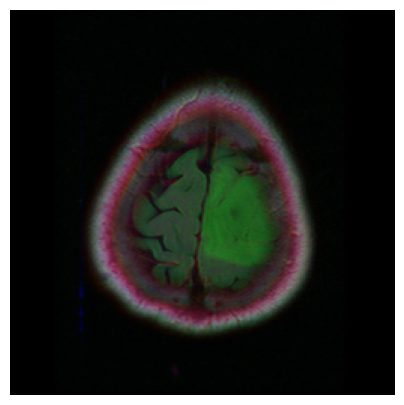

In [3]:
counter = 1
fig = plt.figure(figsize=(5, 5))
for img in img_array:
    fig.add_subplot(len(paths_to_image), 1, counter)
    plt.imshow(img)
    plt.axis('off')
    counter+=1

# Model tested in the images

In [4]:
def map_labels(index):
    return classes[index]

prediction = model.predict(img_array)
max_index_prediction = np.argmax(prediction, axis = 1)
classes = ["No tumour", "Tumour"]
#classes = np.array(classes, dtype = 'U30')
pred_class = [map_labels(i) for i in max_index_prediction]

pred_class

1/1 [==============================] - 2s 2s/step


['Tumour']

# Shap explanation

In [5]:
import shap
shap.initjs()
explainers = []
masks = ['blur(64,64)']

## 15 mutants

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


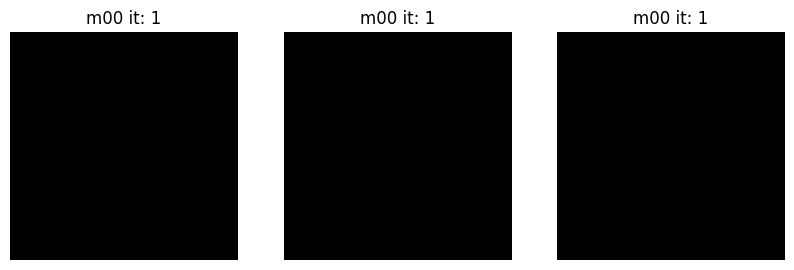

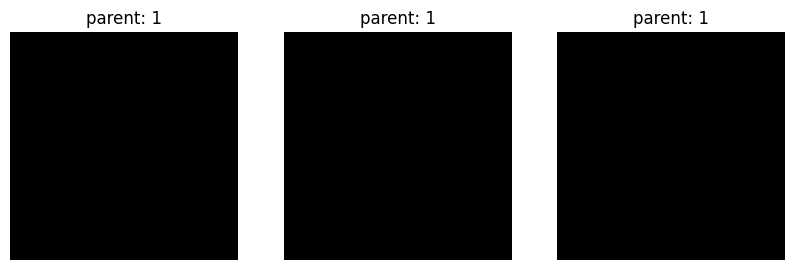

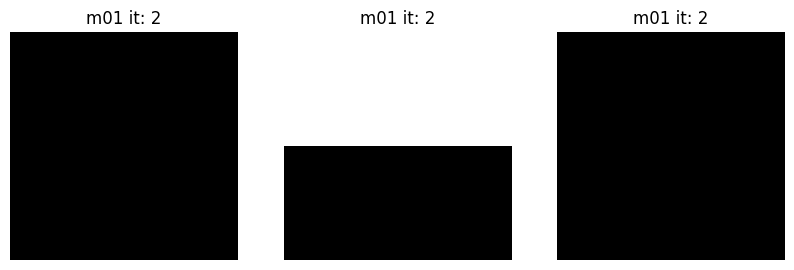

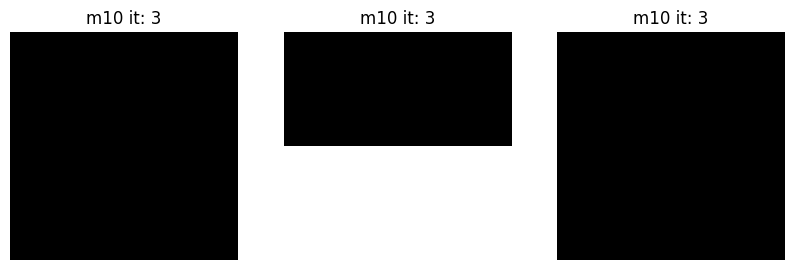

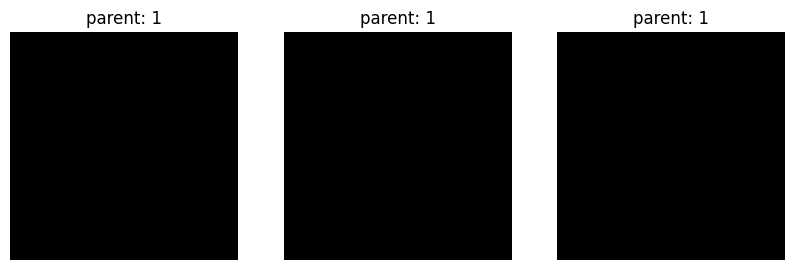

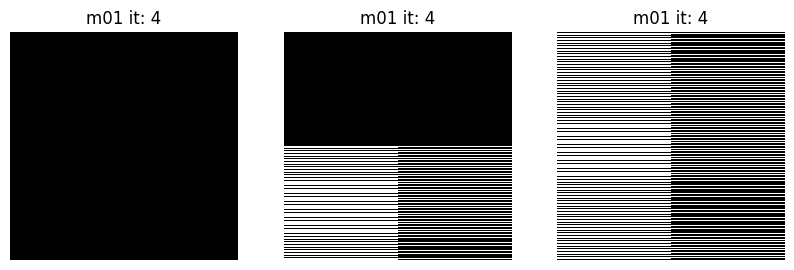

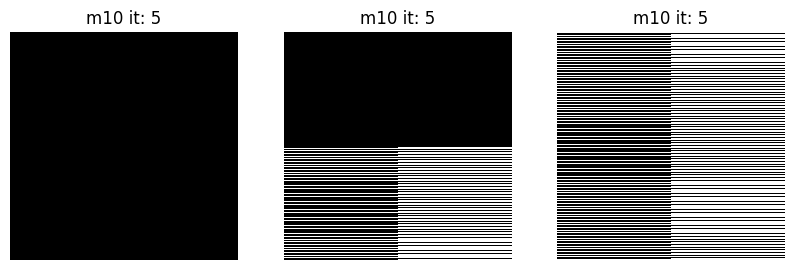

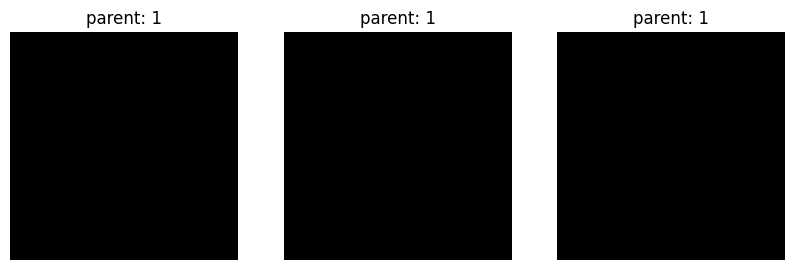

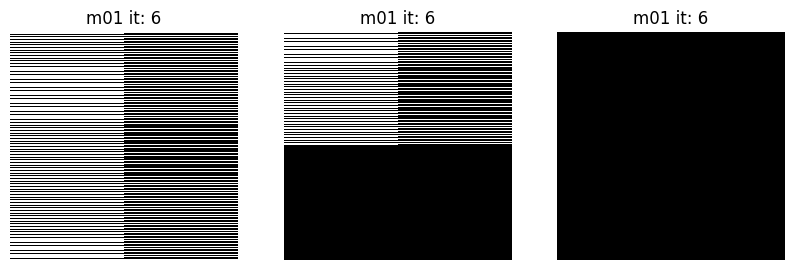

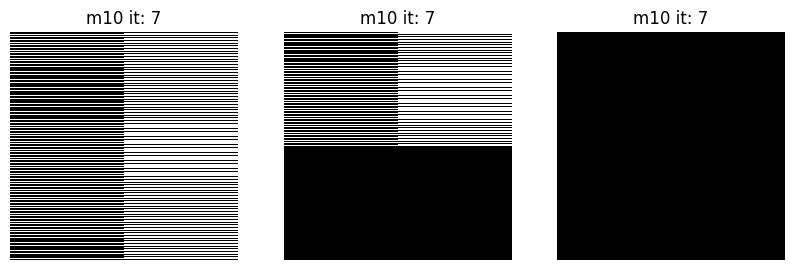

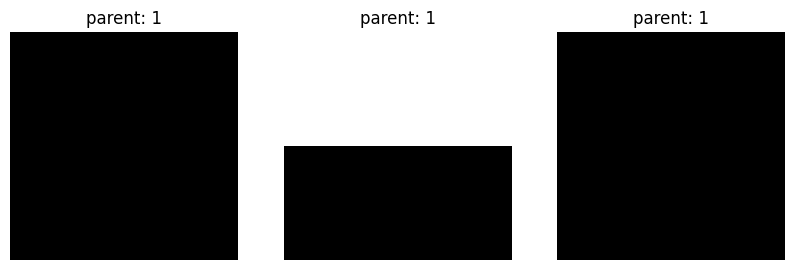

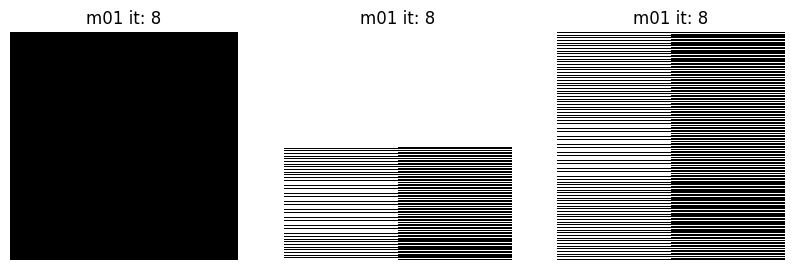

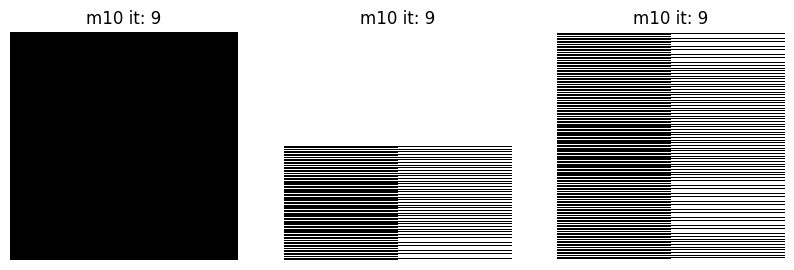

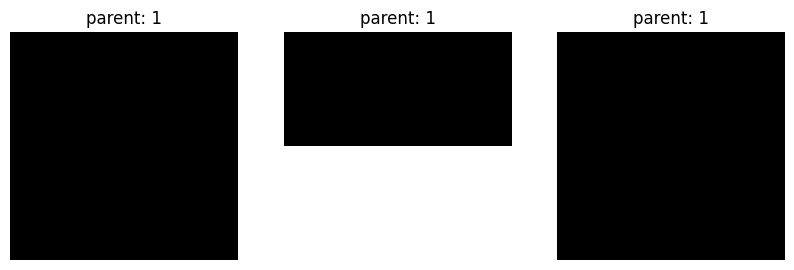

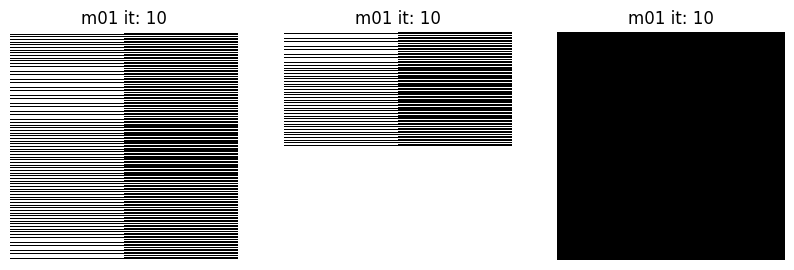

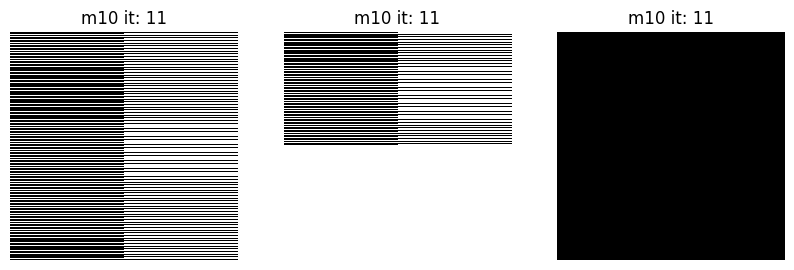

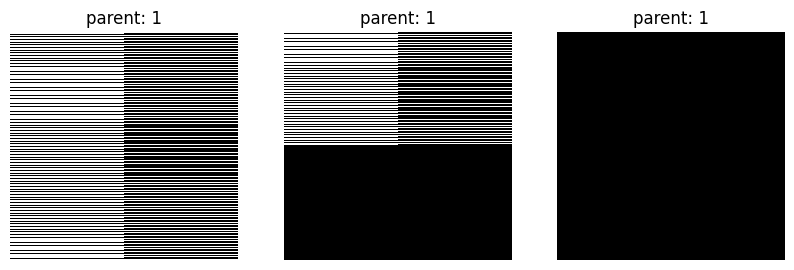

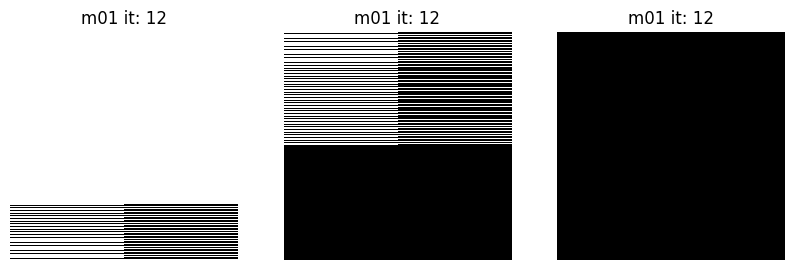

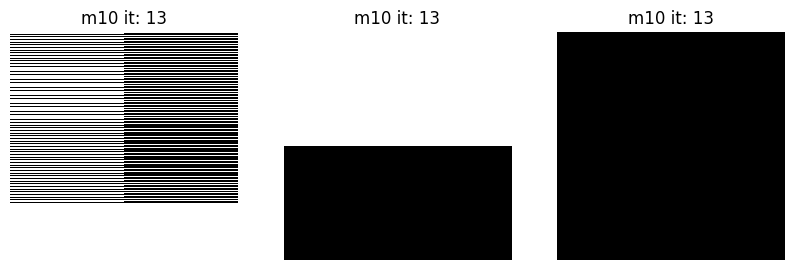

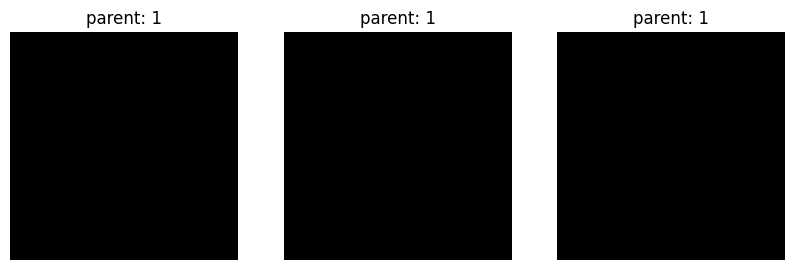

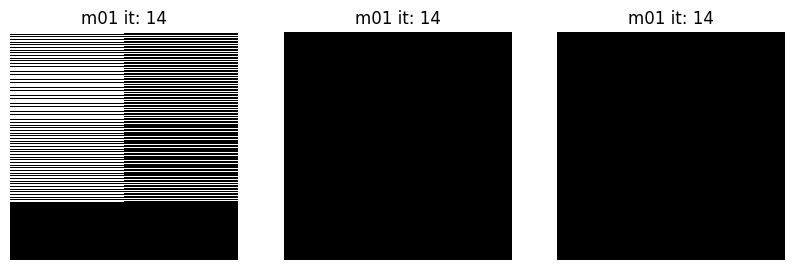

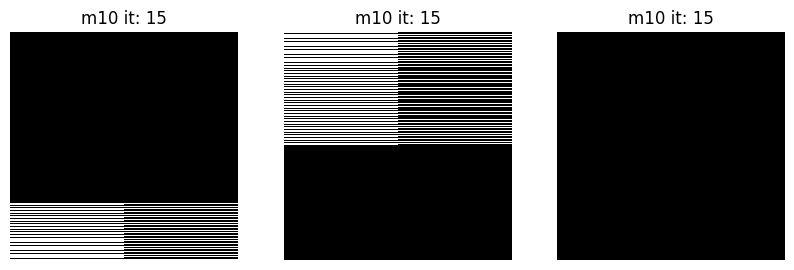

In [7]:
shap_values = {}
for mask in masks:
    shap_values_array= []
    masker = shap.maskers.Image(mask, shape=img_array[0].shape) 
    explainer=_explainer.Explainer(model, masker, output_names=classes, seed = 520)
    for img in img_array:
        shap_values_array.append(explainer(np.expand_dims(img, axis = 0), max_evals = 15, batch_size = 100, outputs=shap.Explanation.argsort.flip[:1]))
    shap_values[mask] = shap_values_array

blur(64,64)


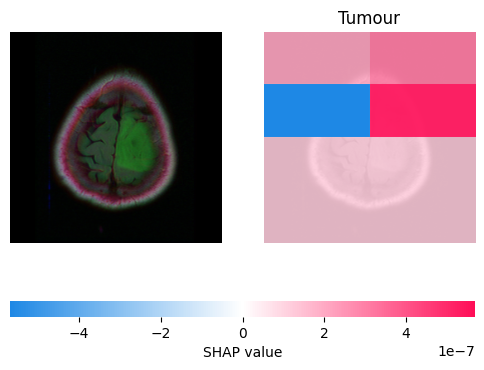

In [8]:
for mask in masks:
    print(mask)
    for shap_value in shap_values[mask]:
        shap.image_plot(shap_value)

## 1000 mutants

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


  0%|          | 0/999 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [03:39, 219.09s/it]                                                                  


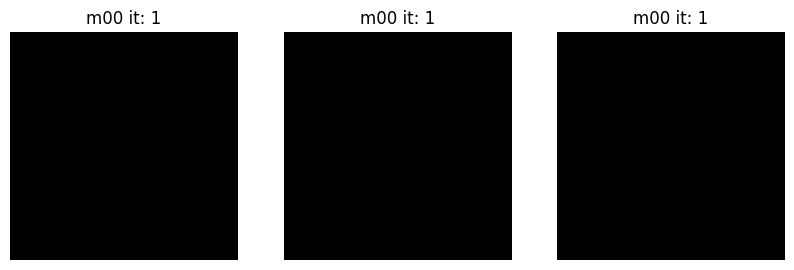

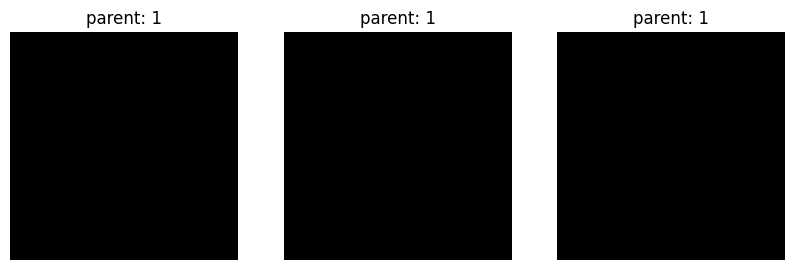

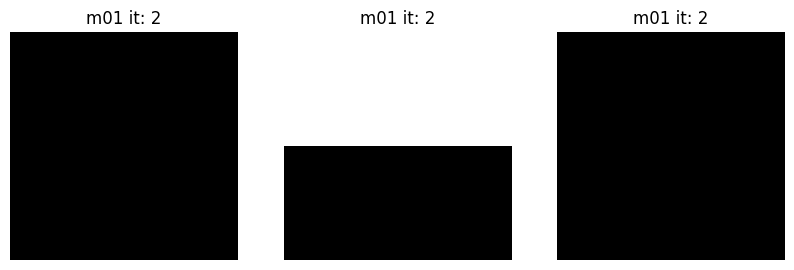

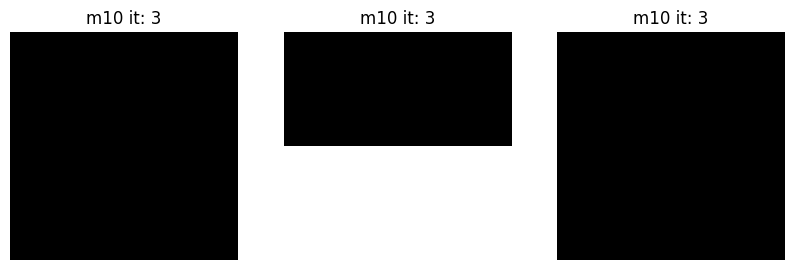

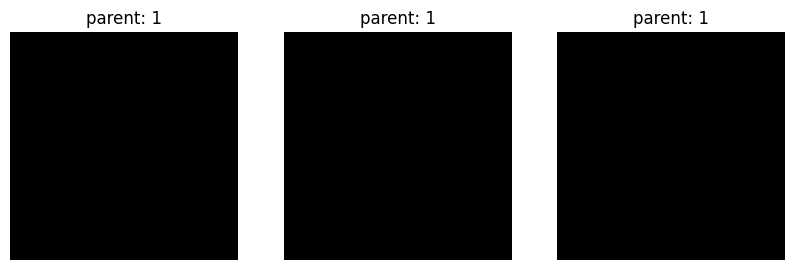

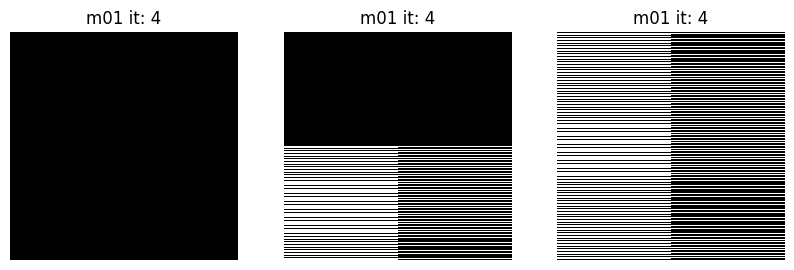

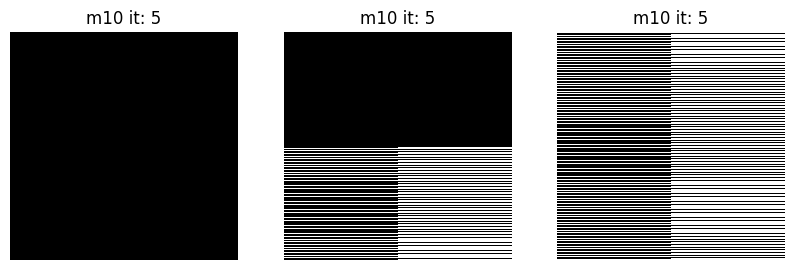

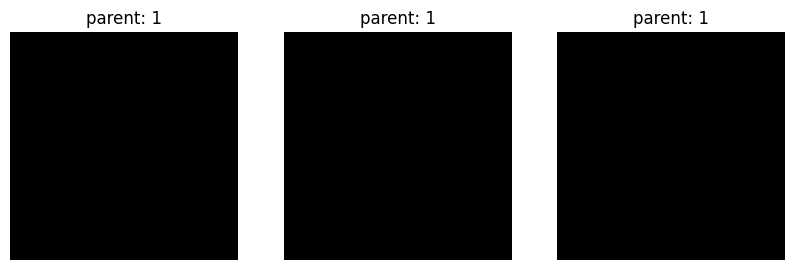

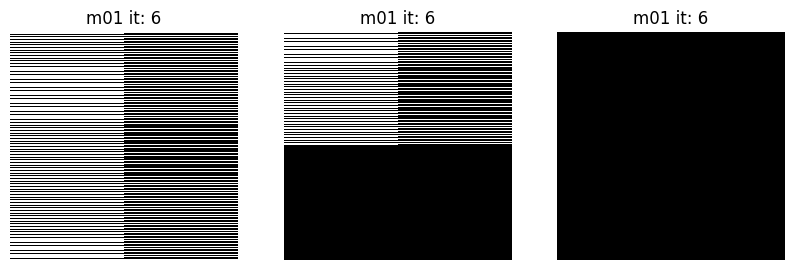

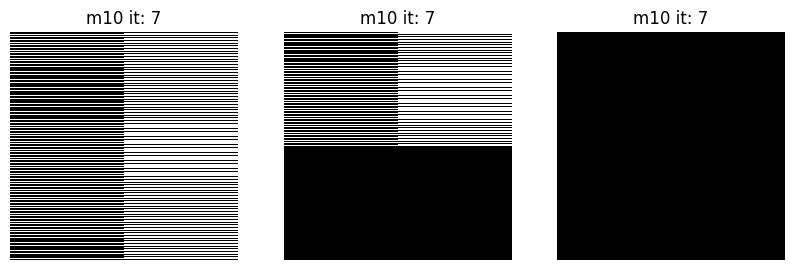

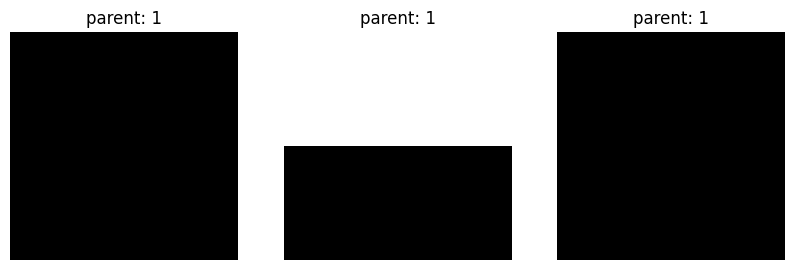

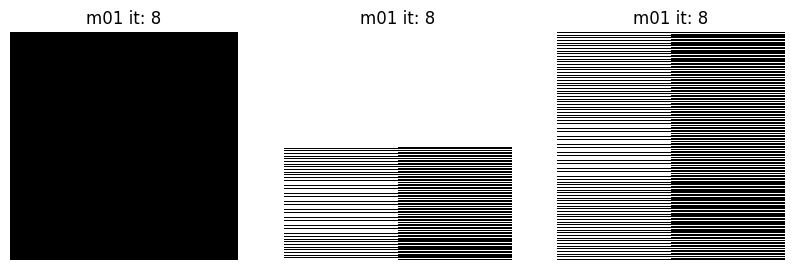

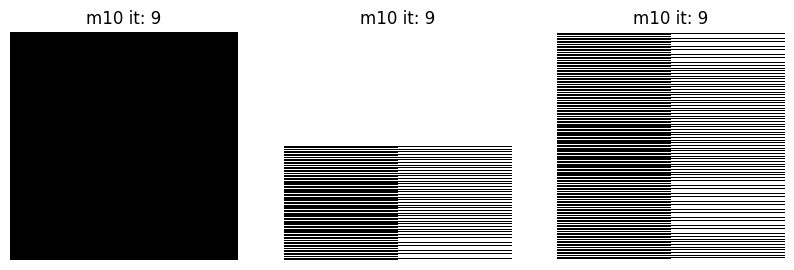

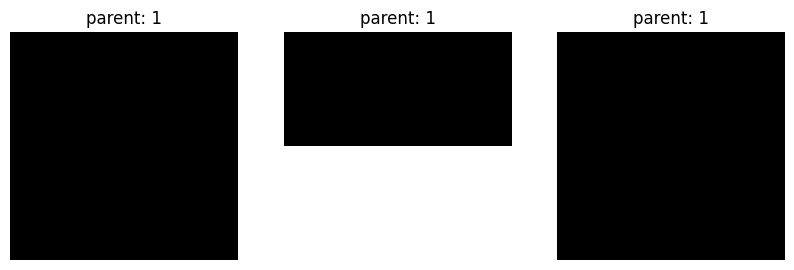

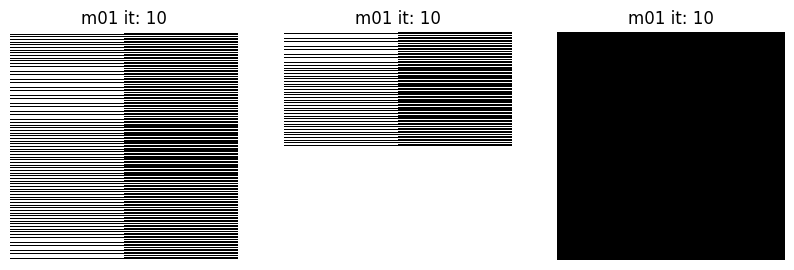

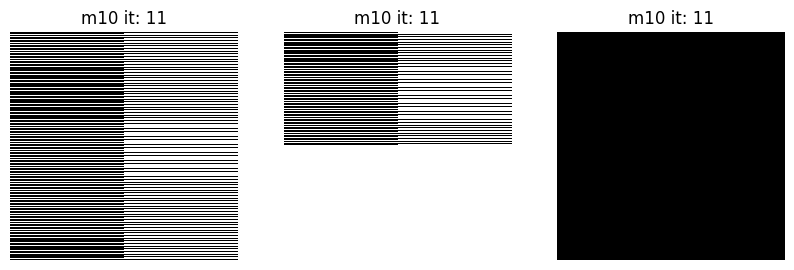

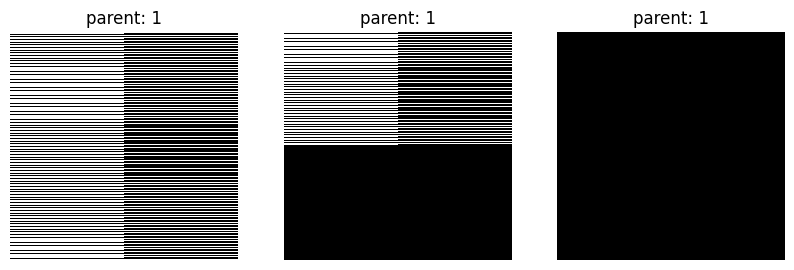

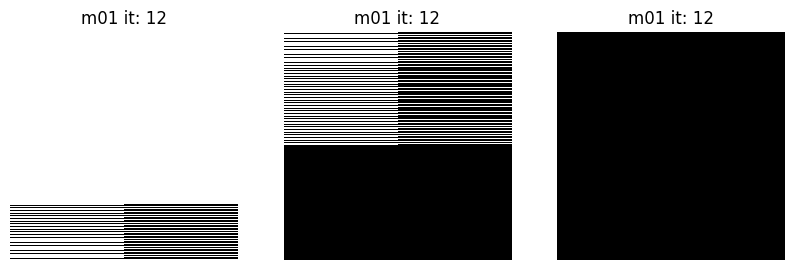

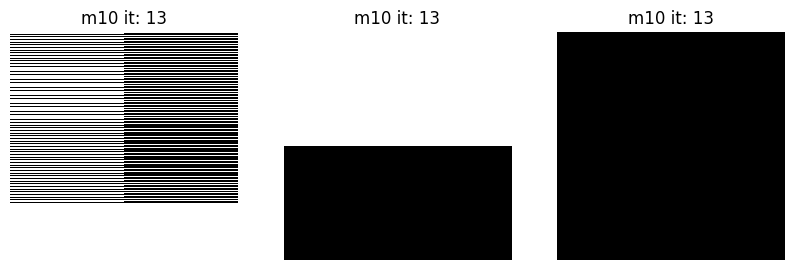

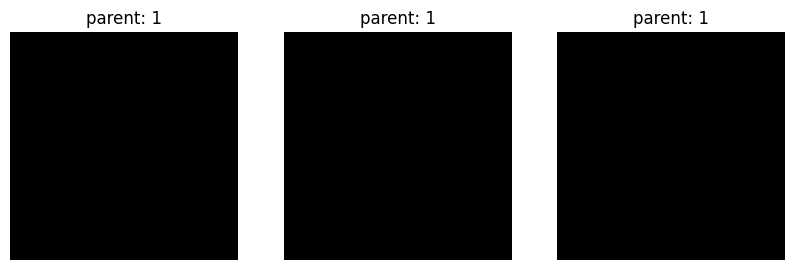

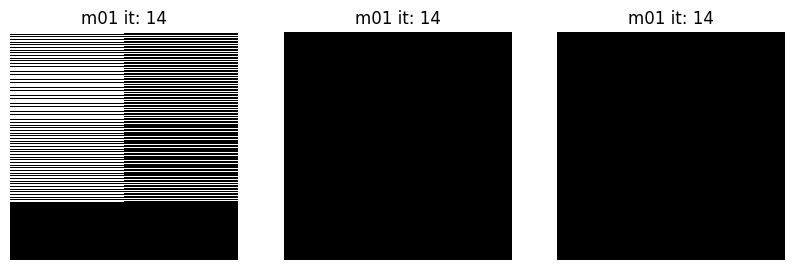

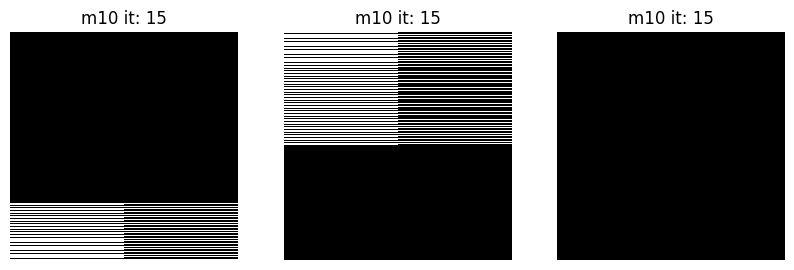

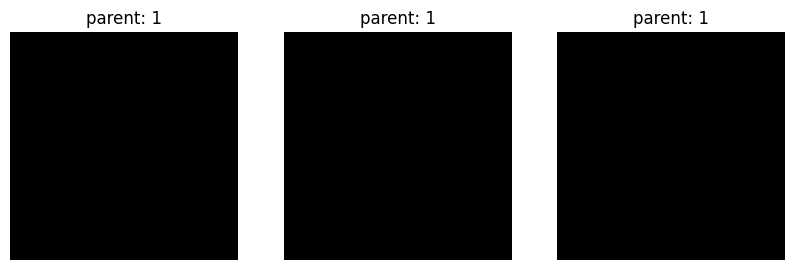

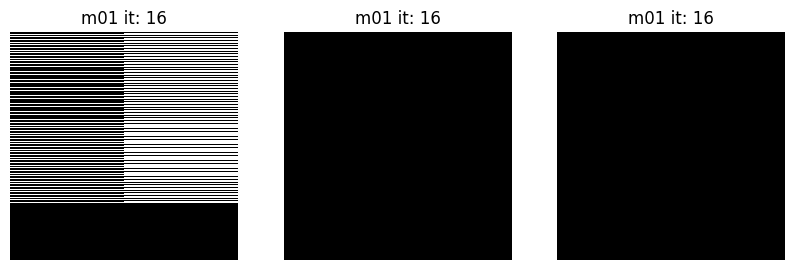

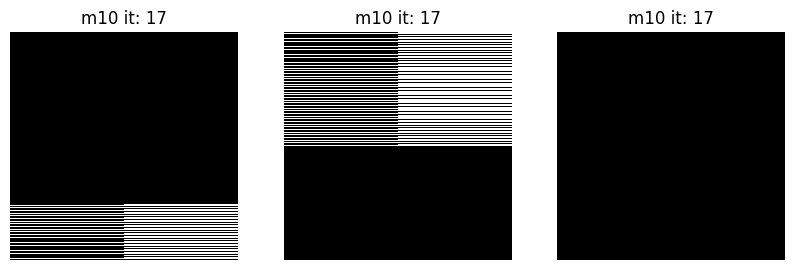

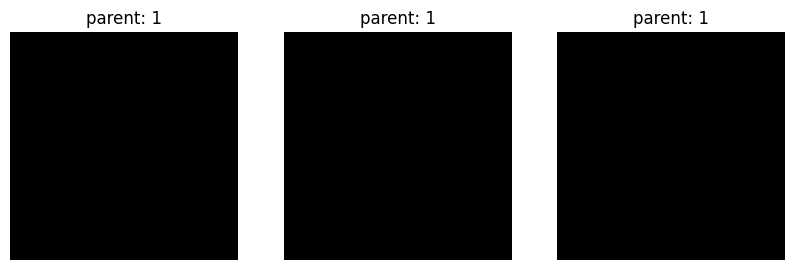

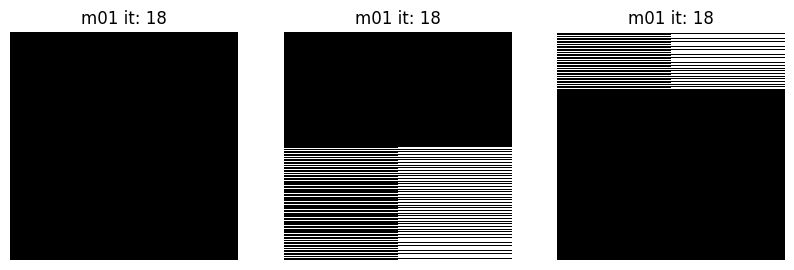

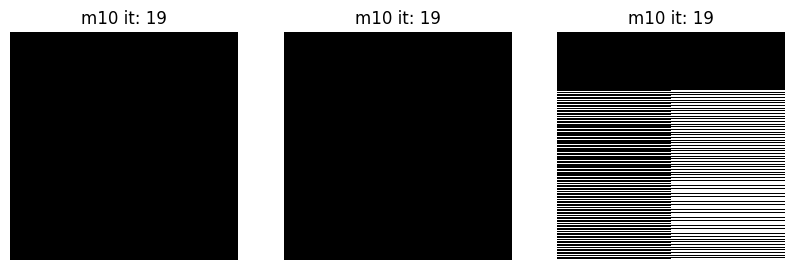

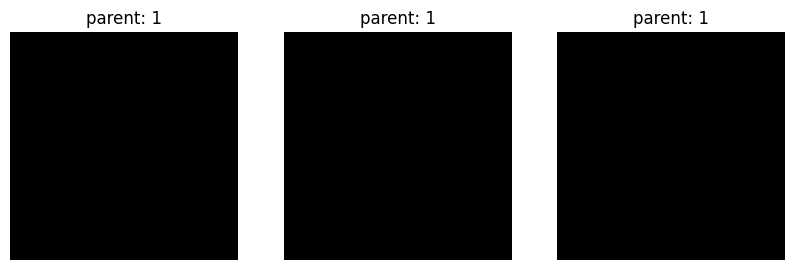

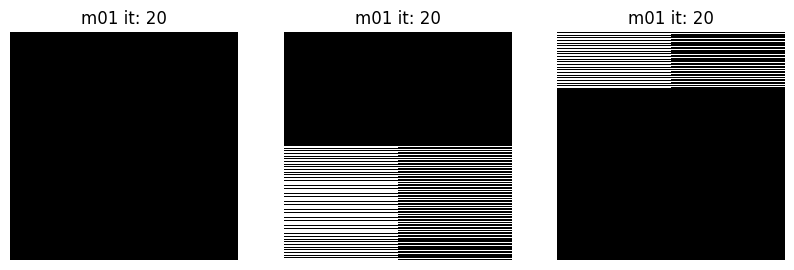

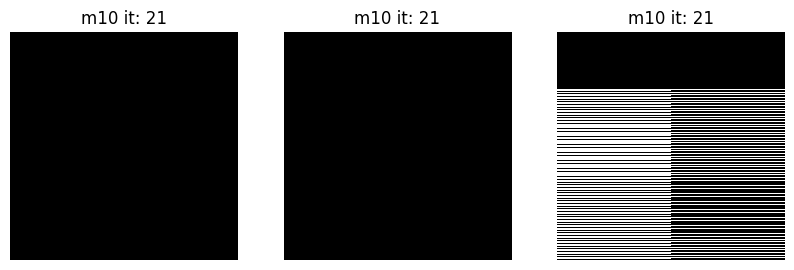

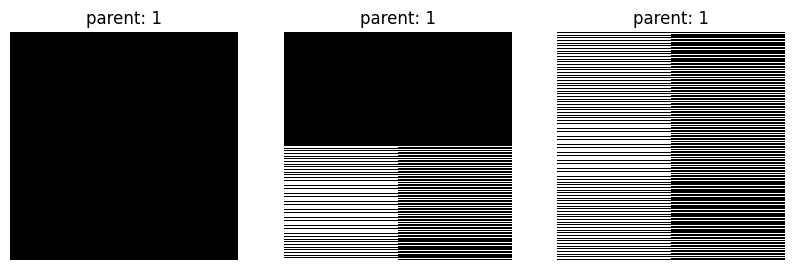

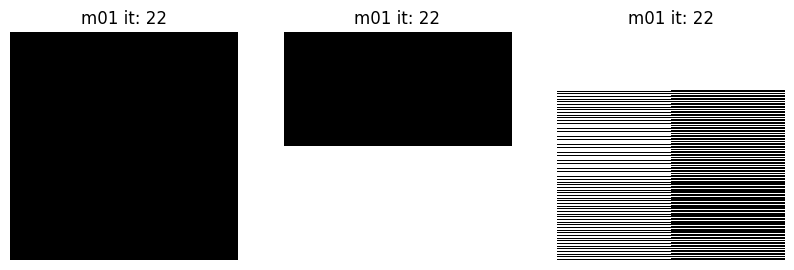

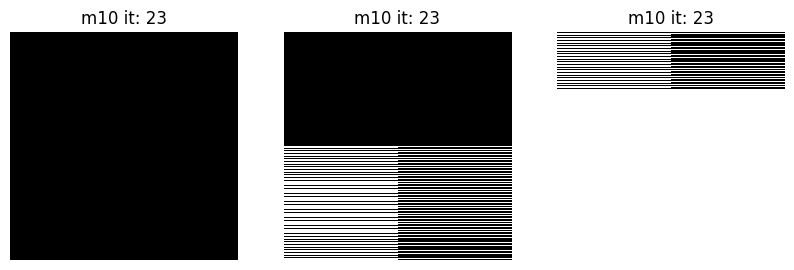

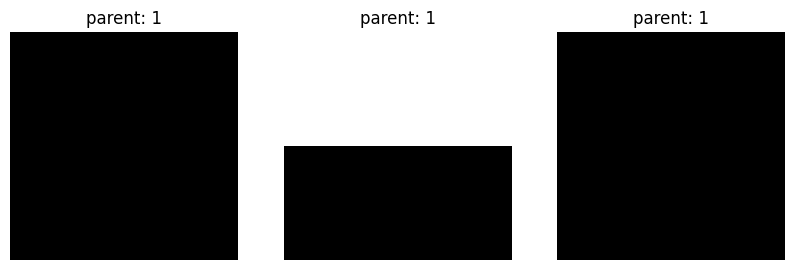

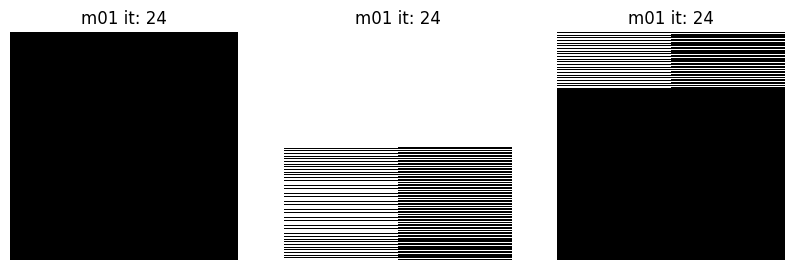

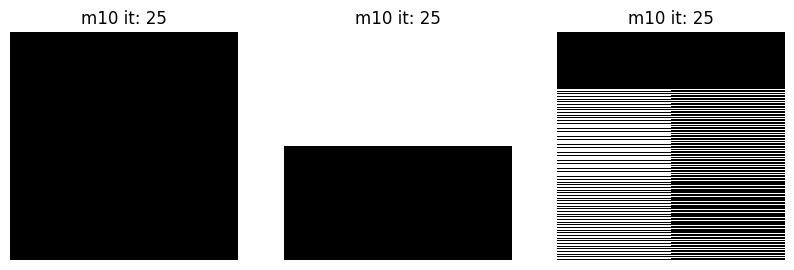

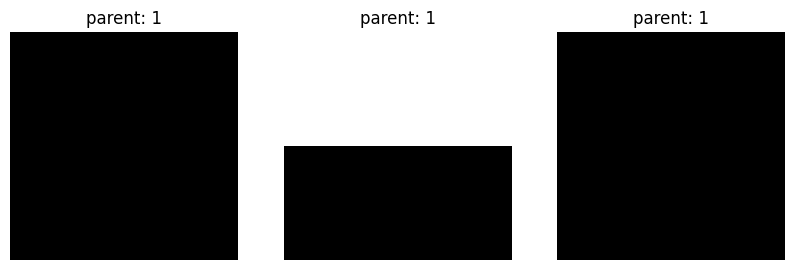

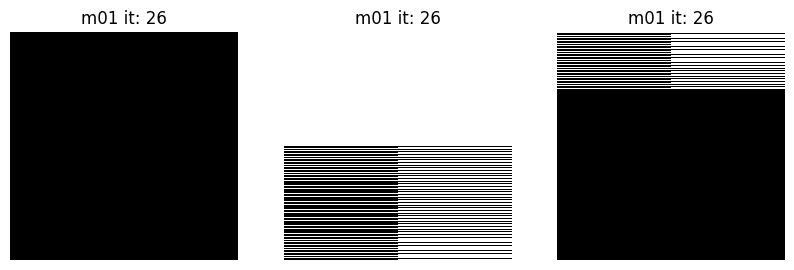

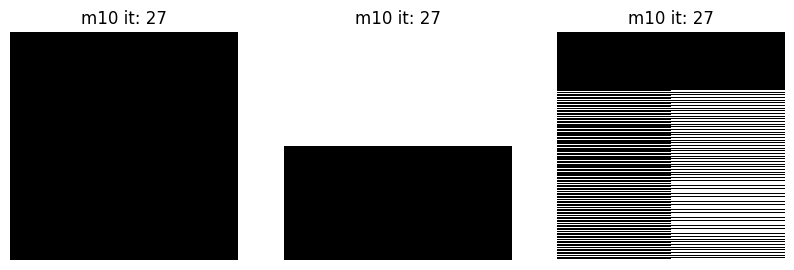

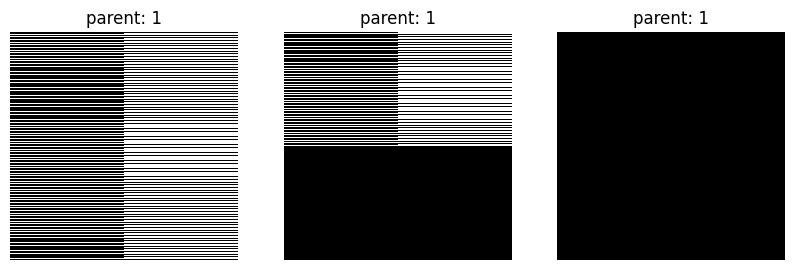

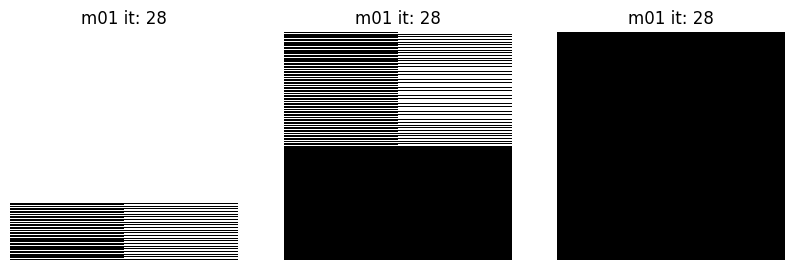

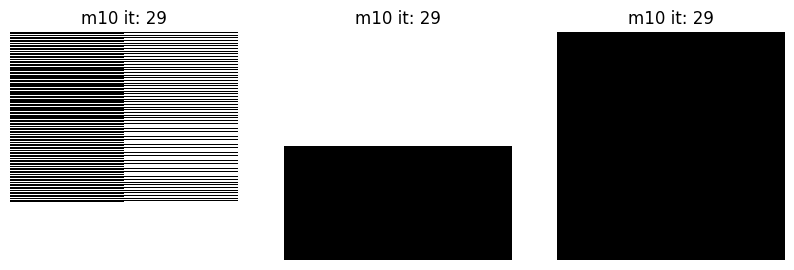

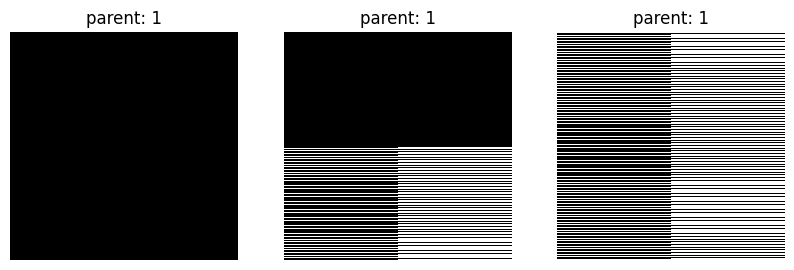

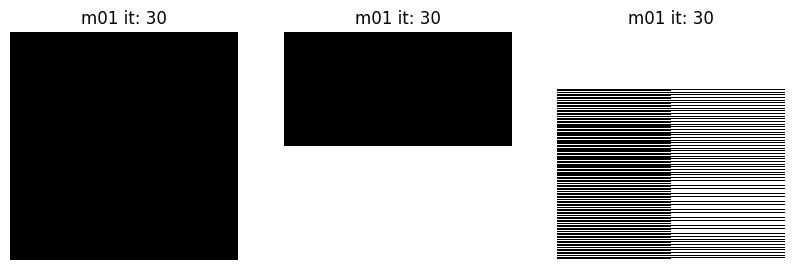

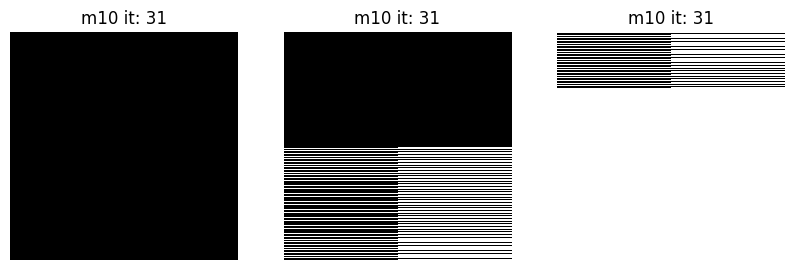

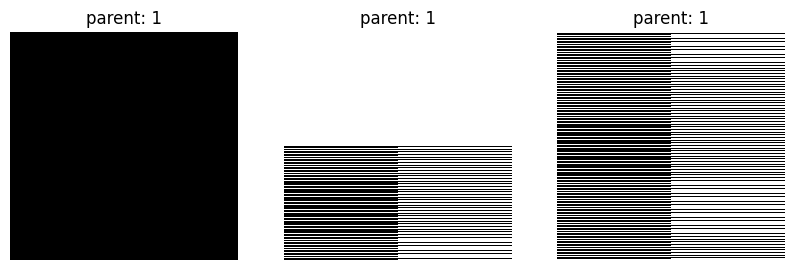

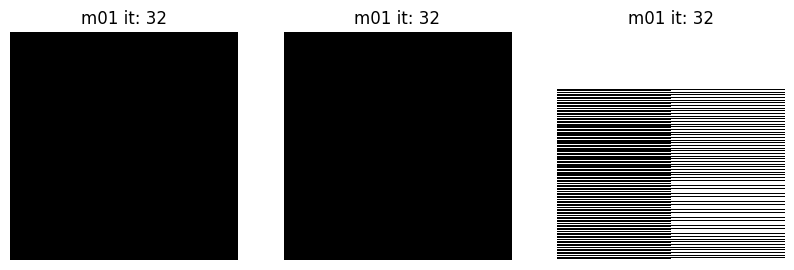

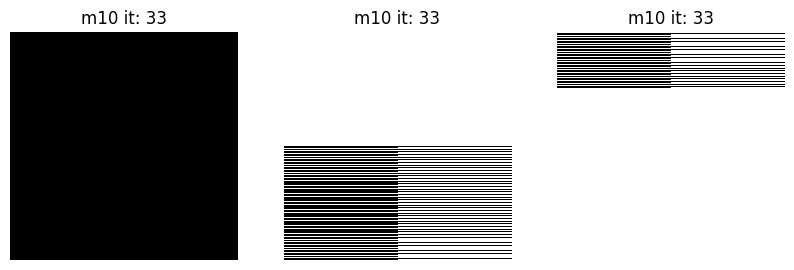

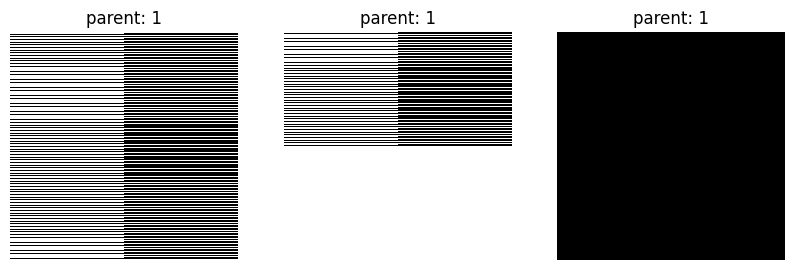

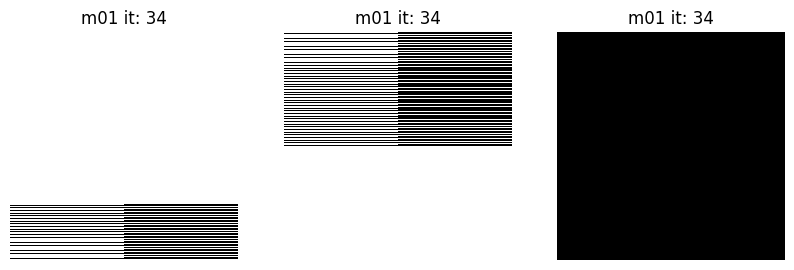

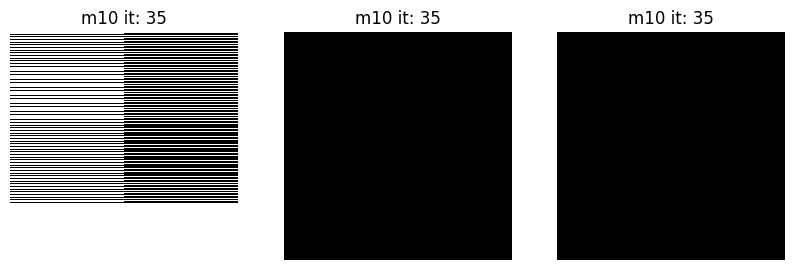

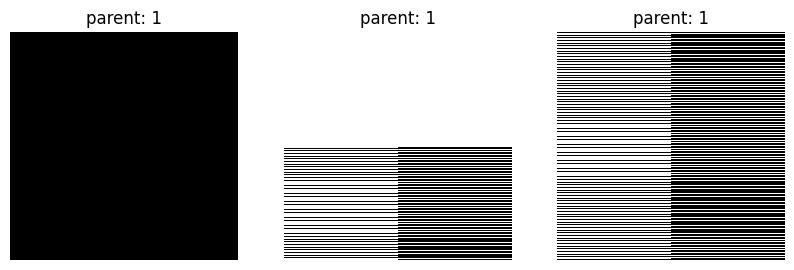

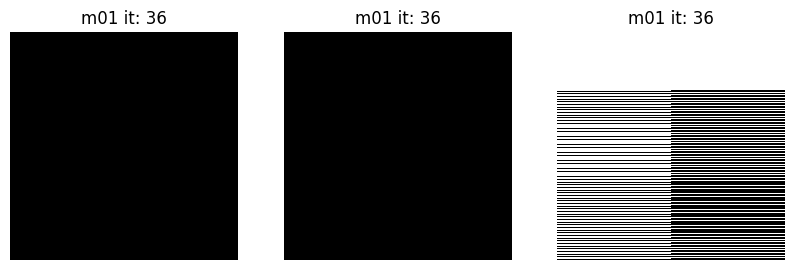

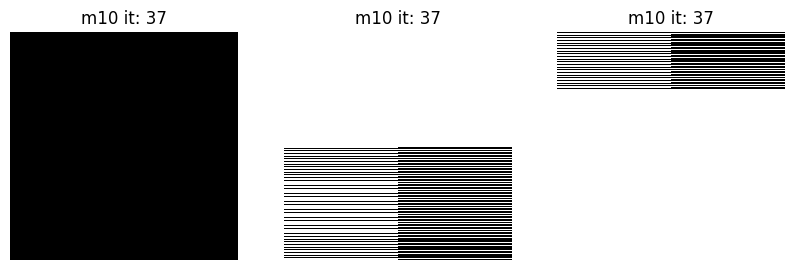

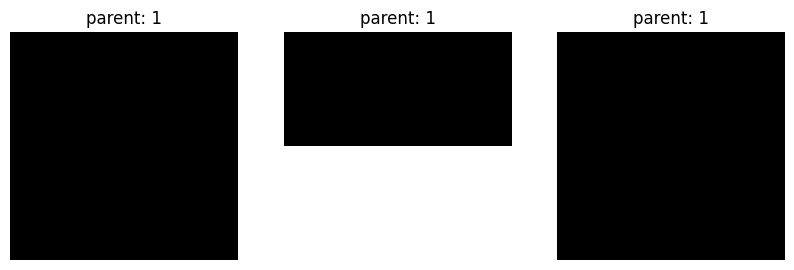

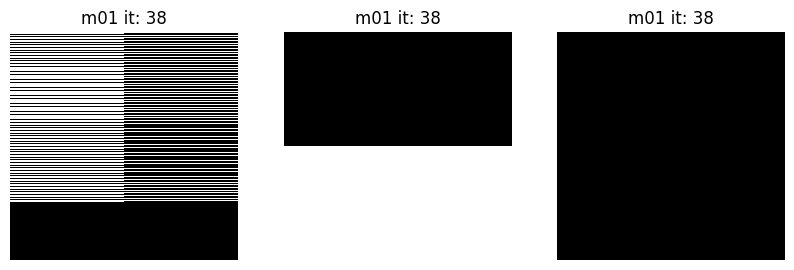

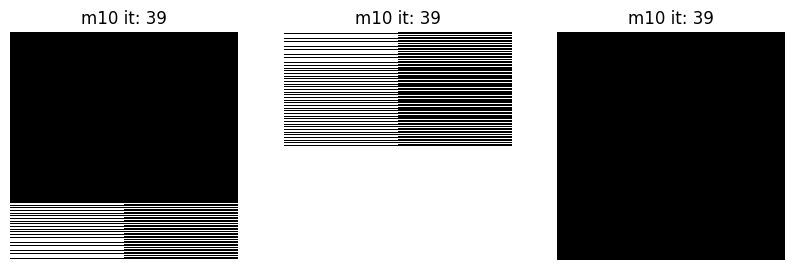

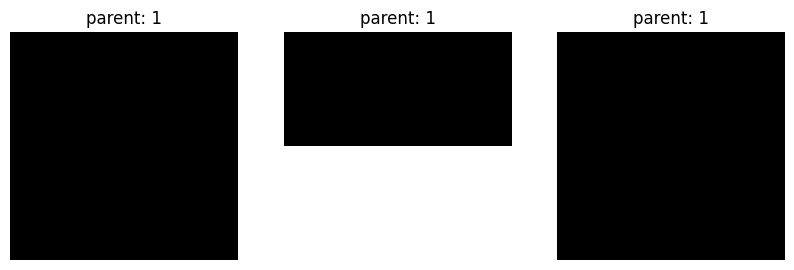

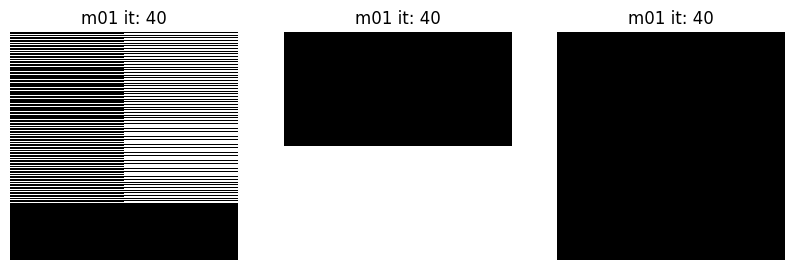

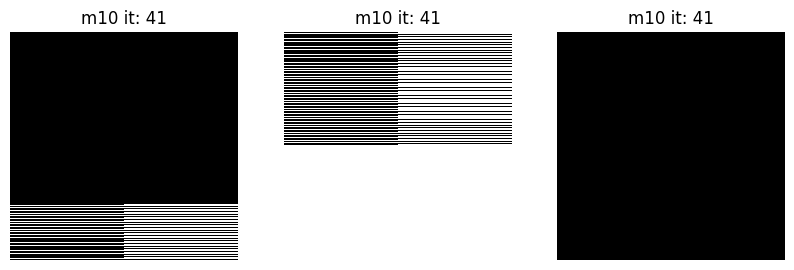

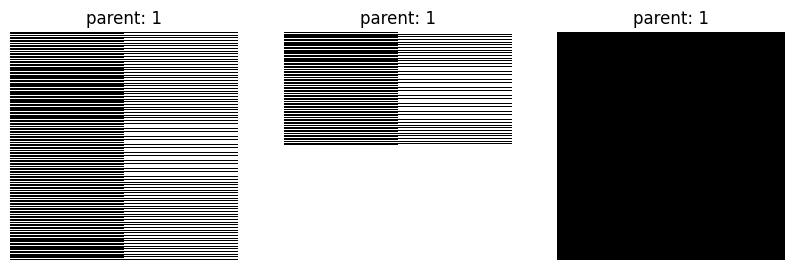

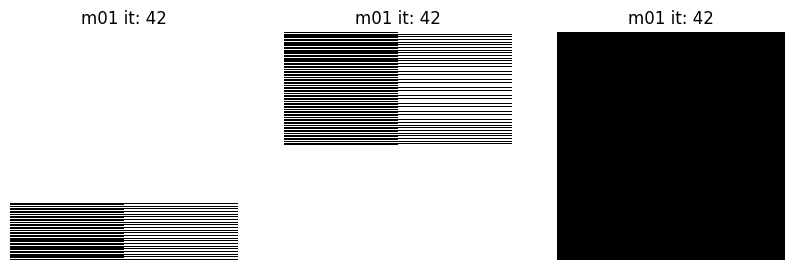

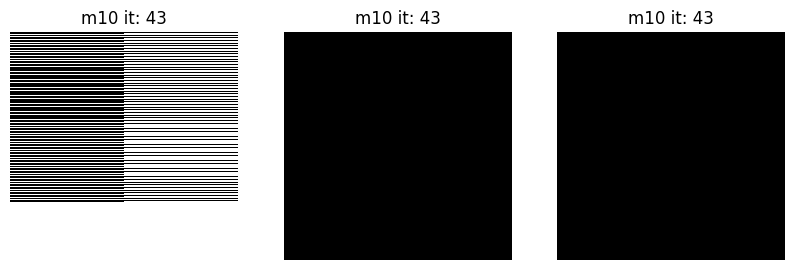

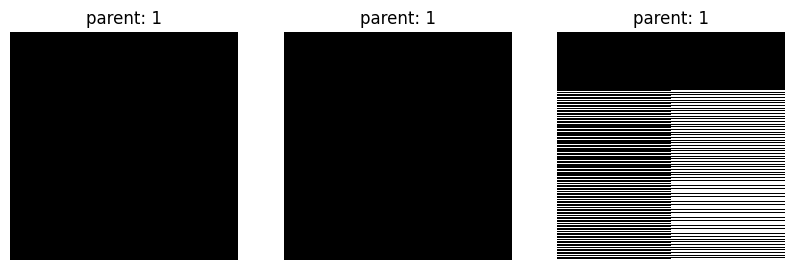

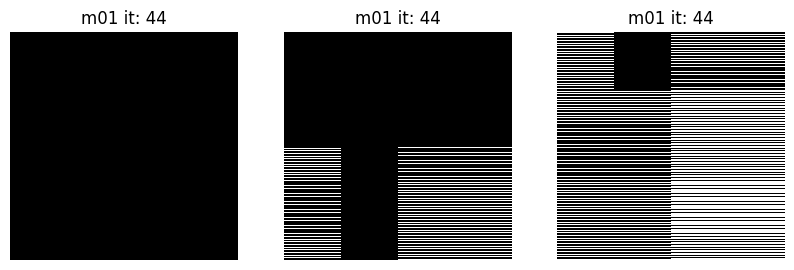

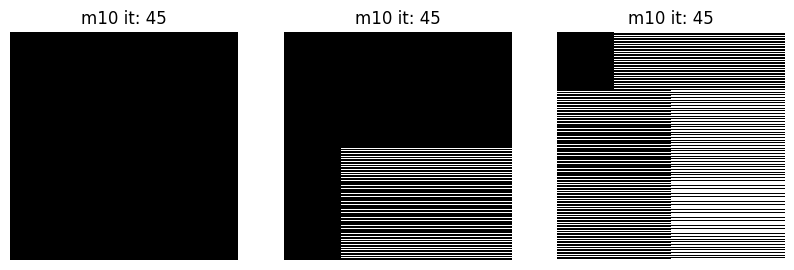

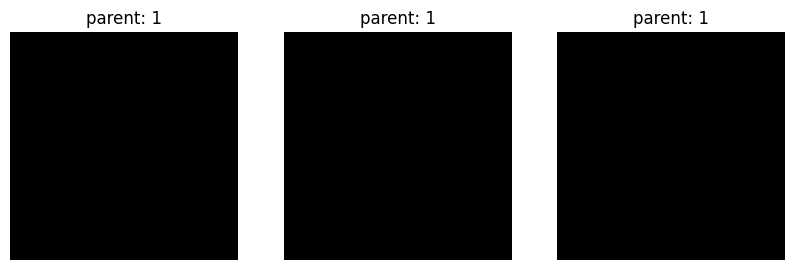

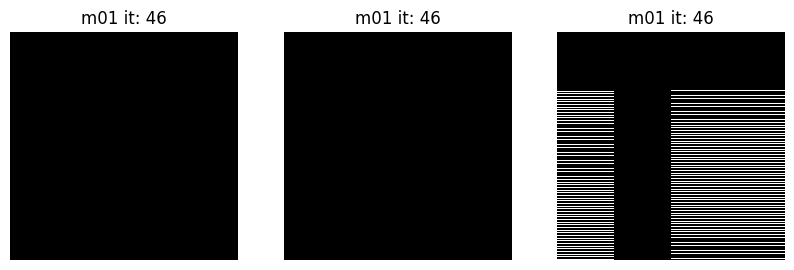

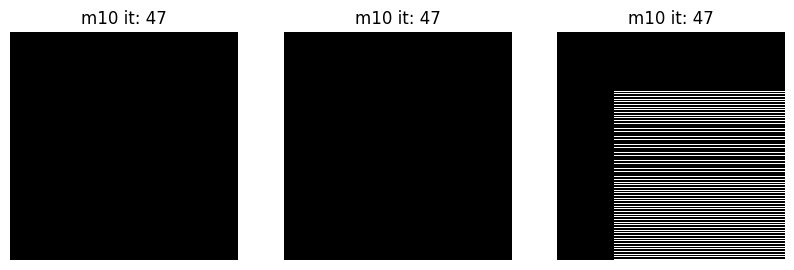

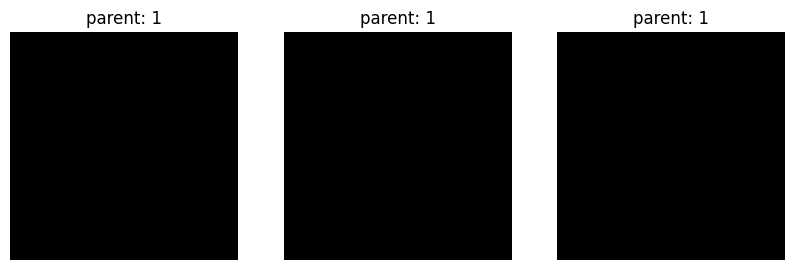

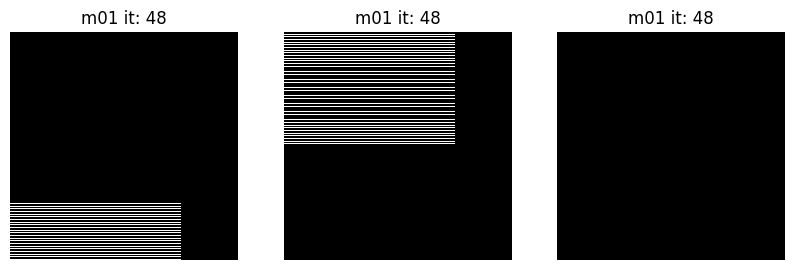

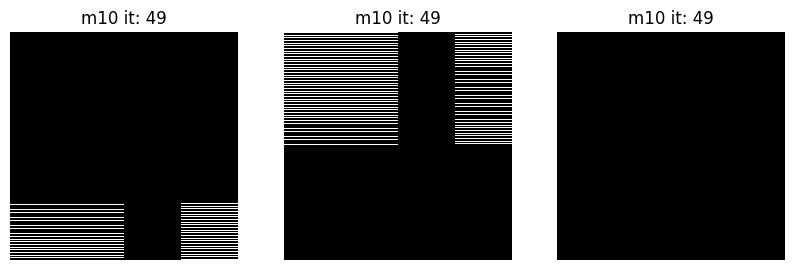

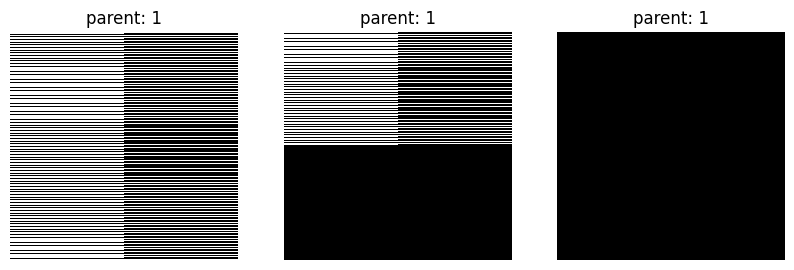

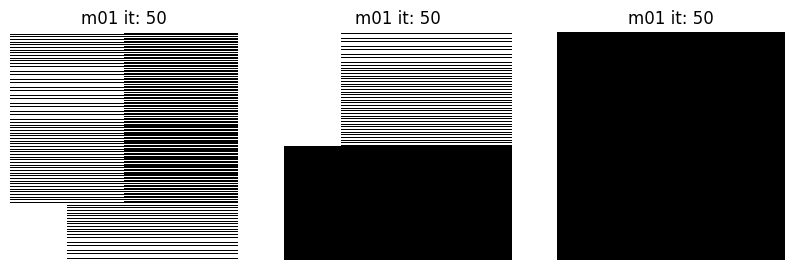

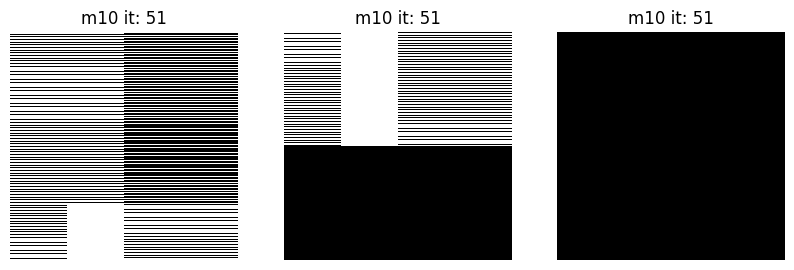

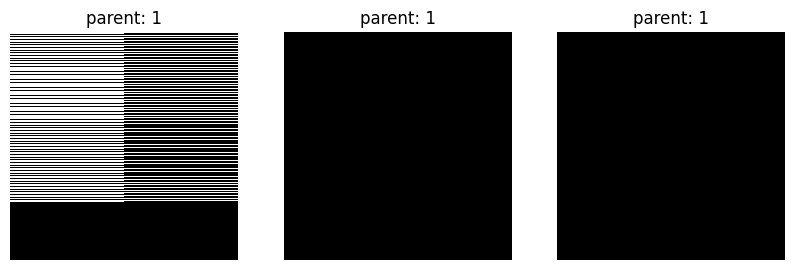

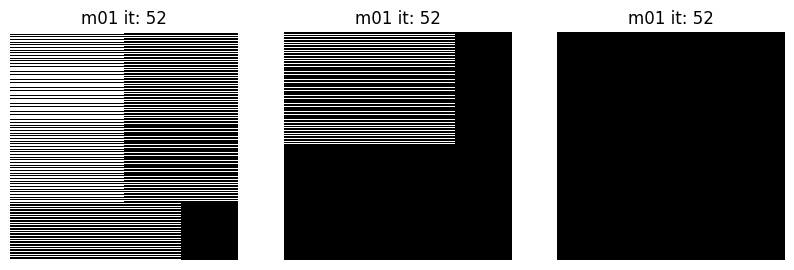

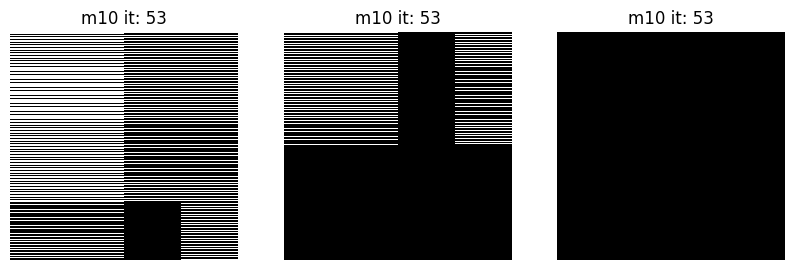

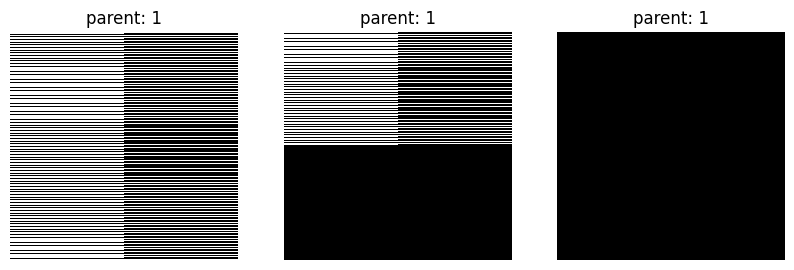

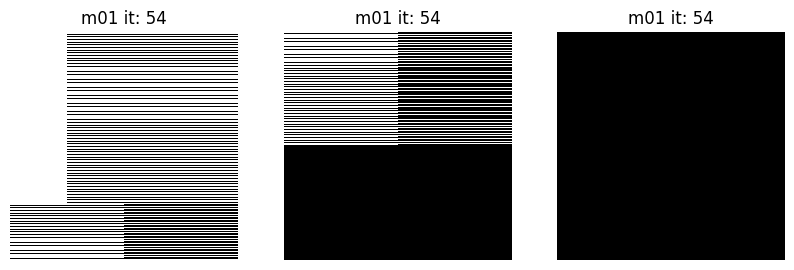

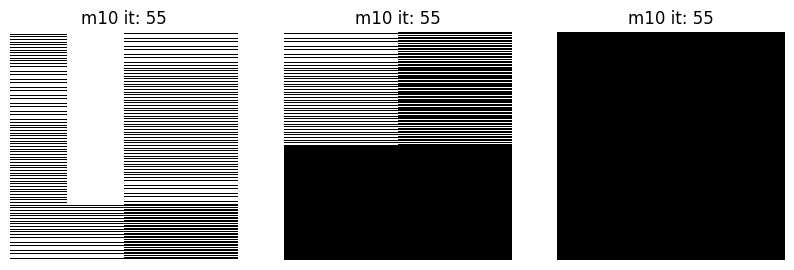

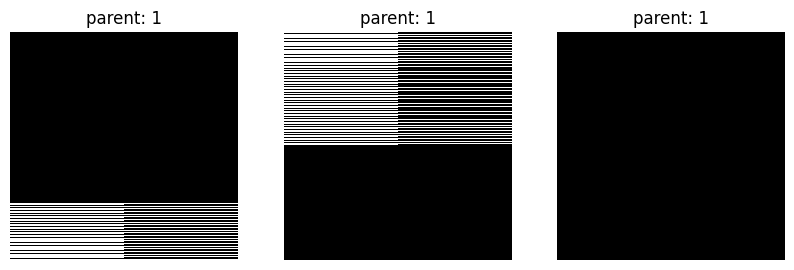

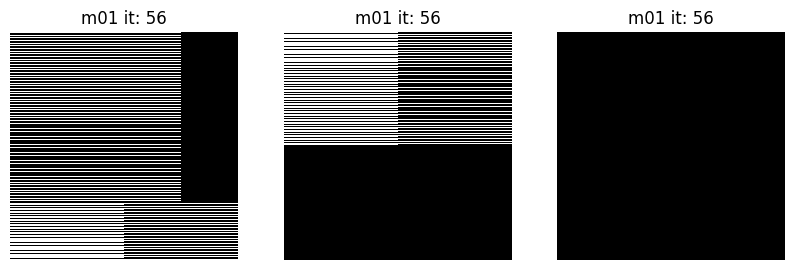

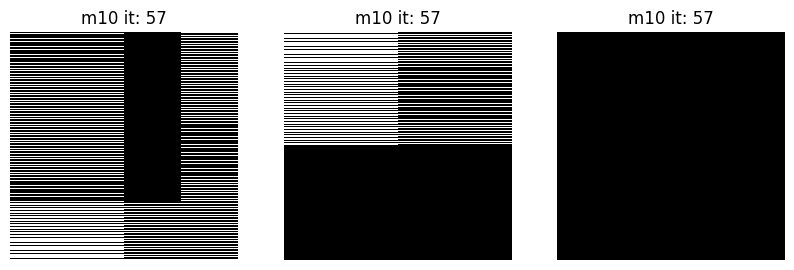

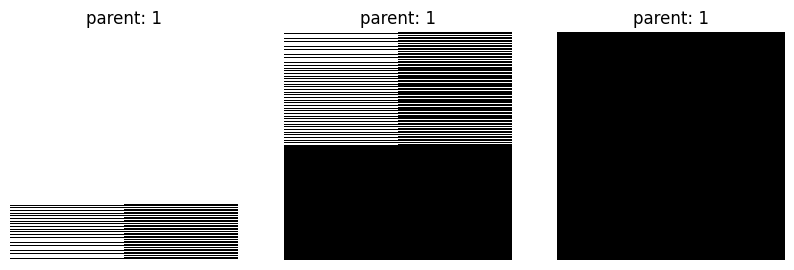

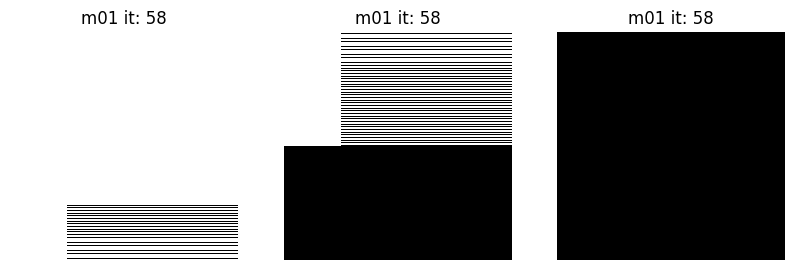

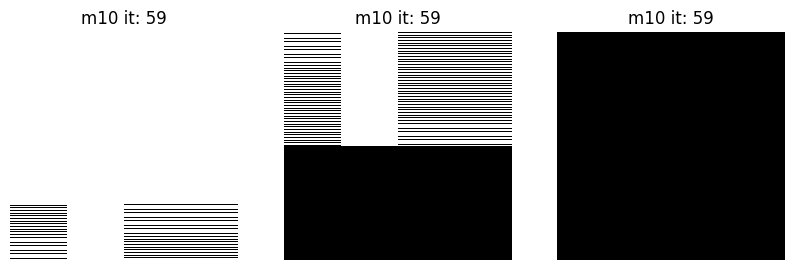

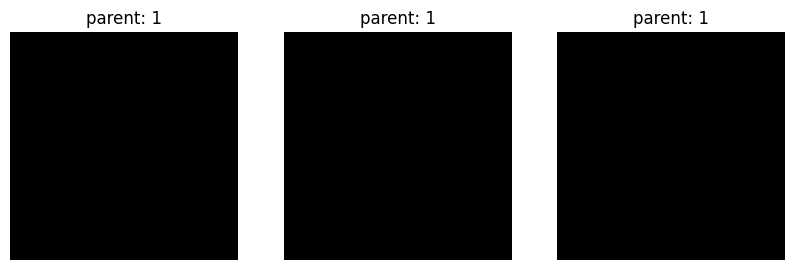

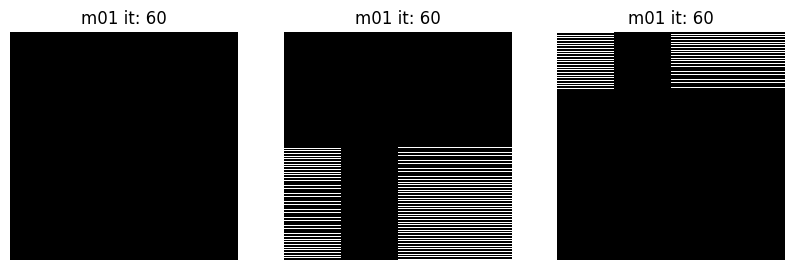

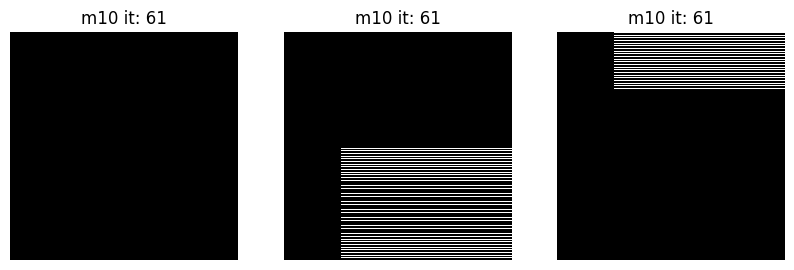

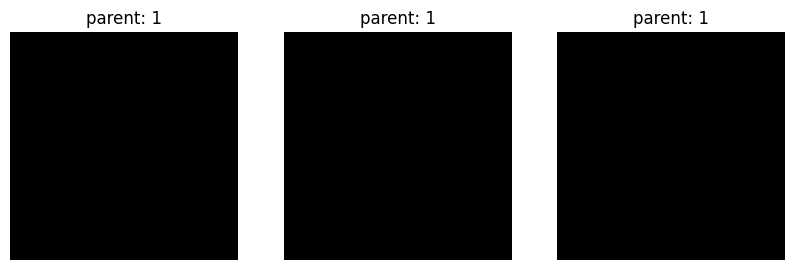

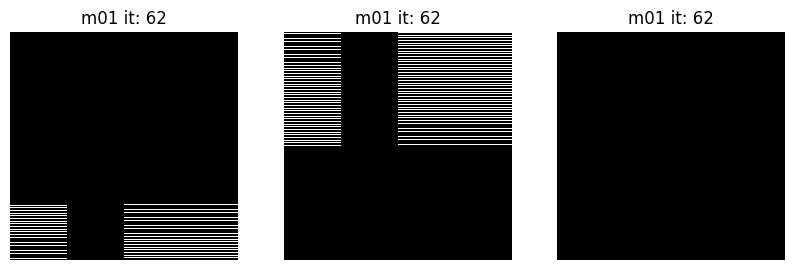

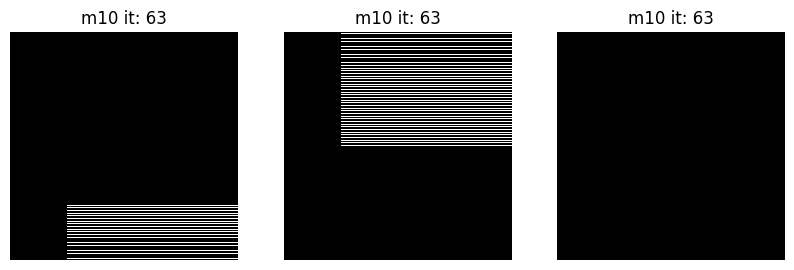

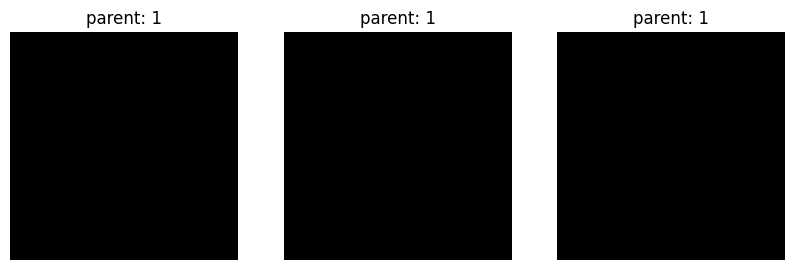

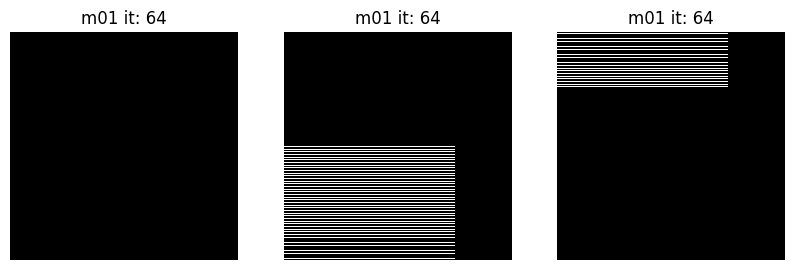

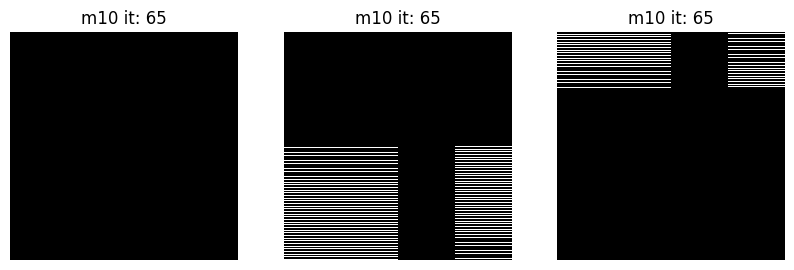

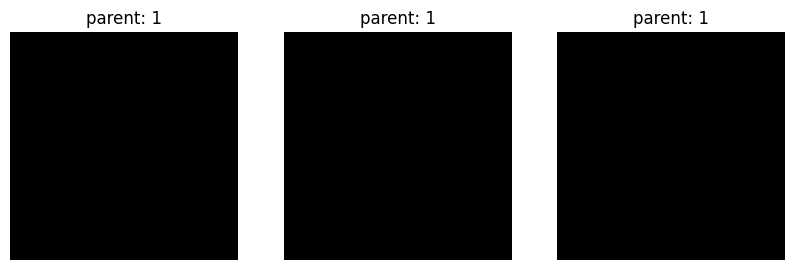

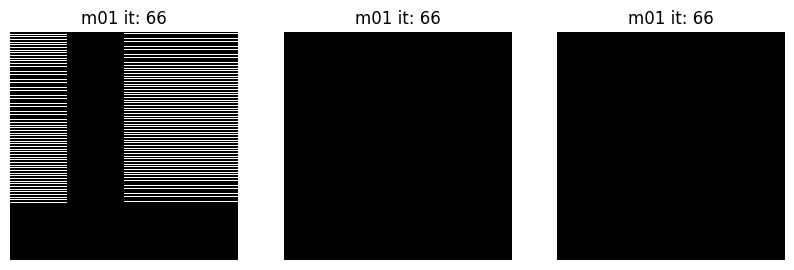

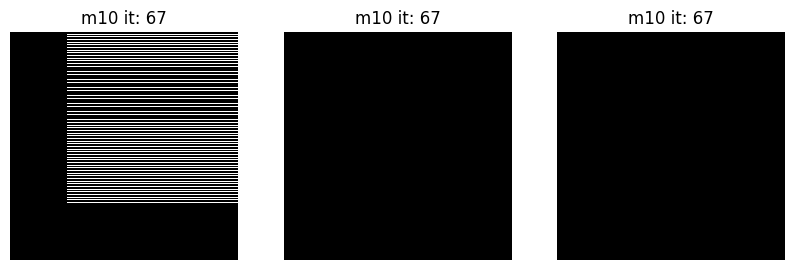

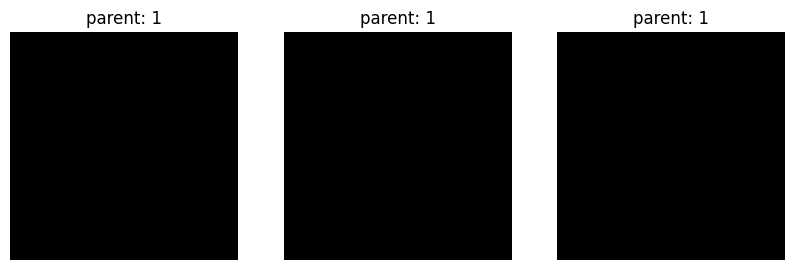

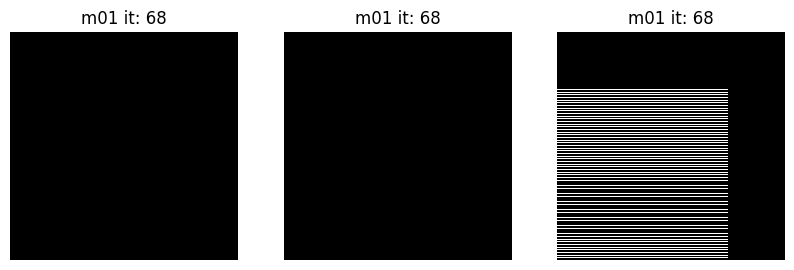

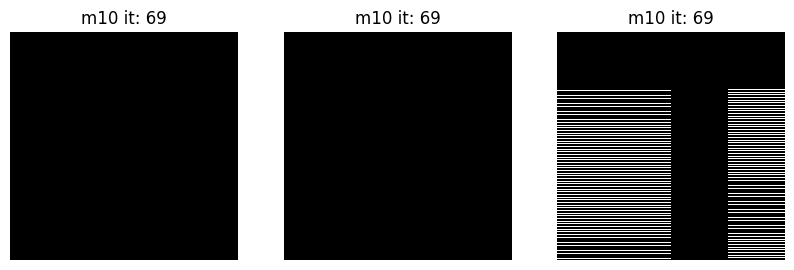

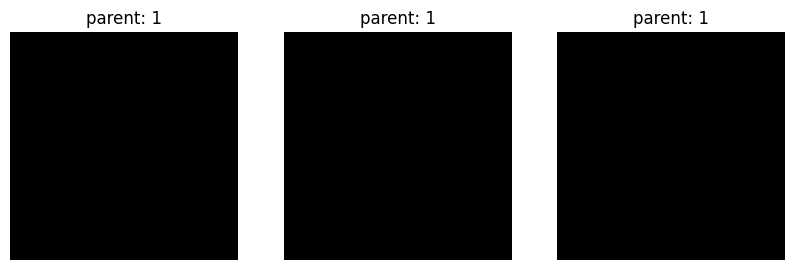

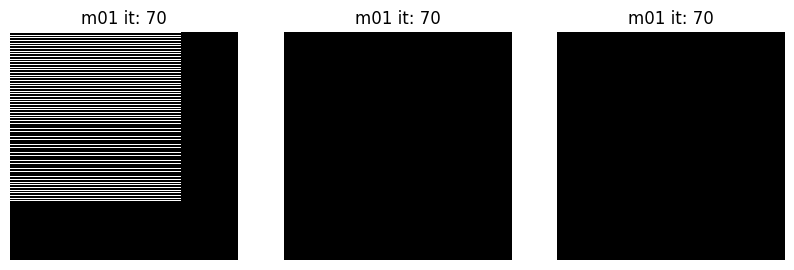

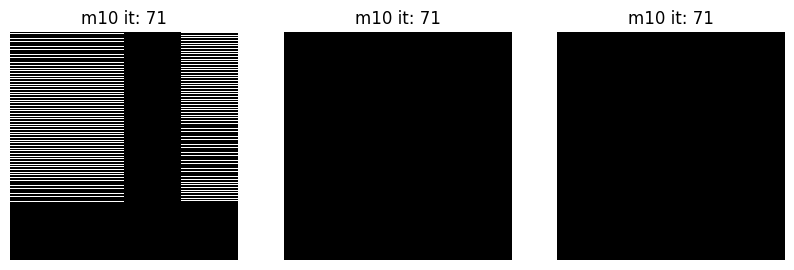

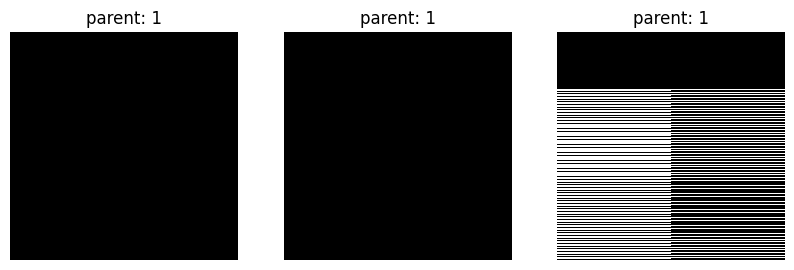

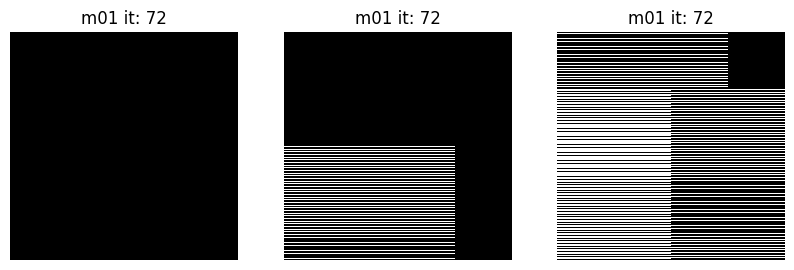

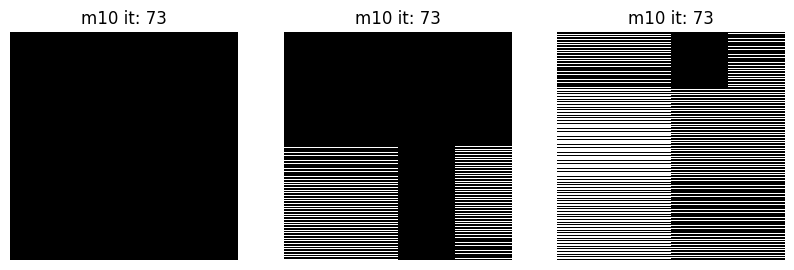

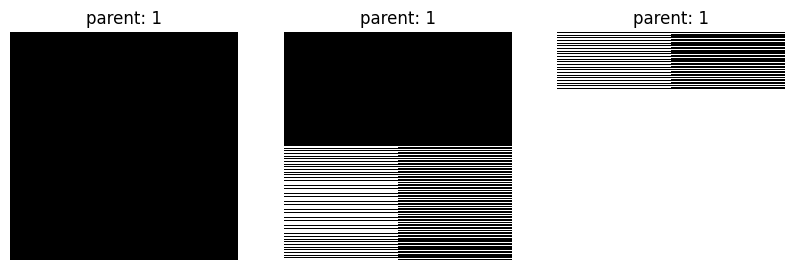

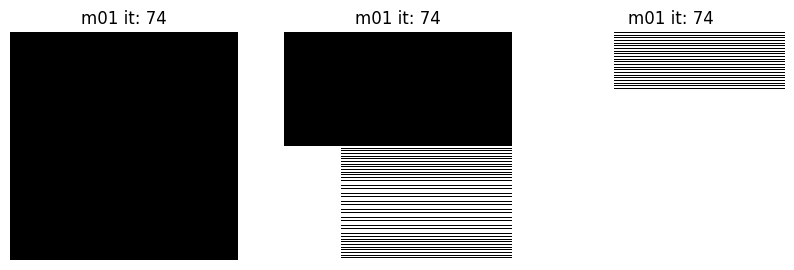

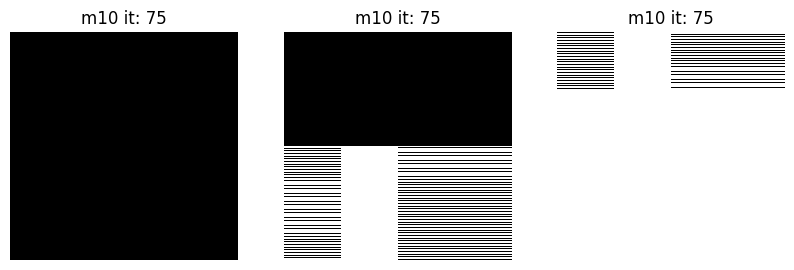

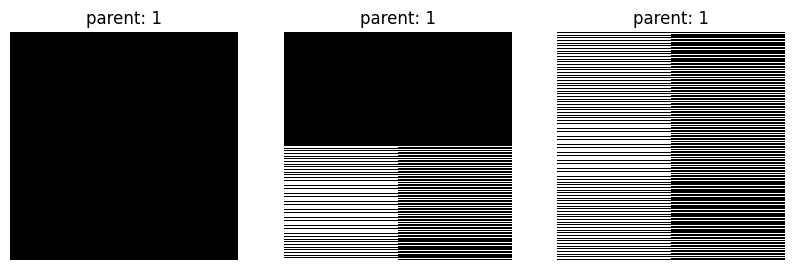

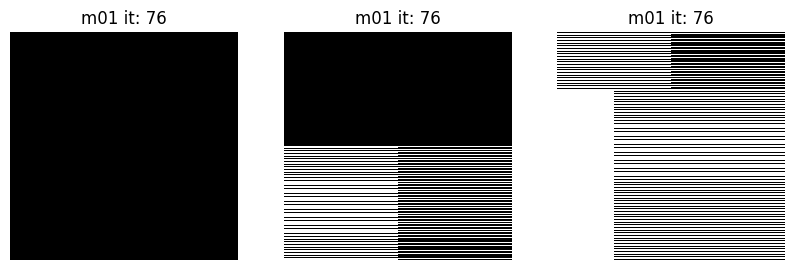

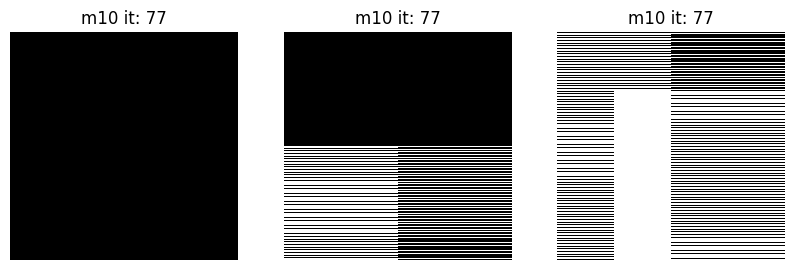

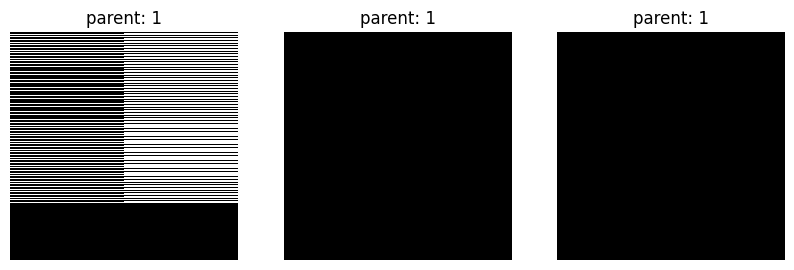

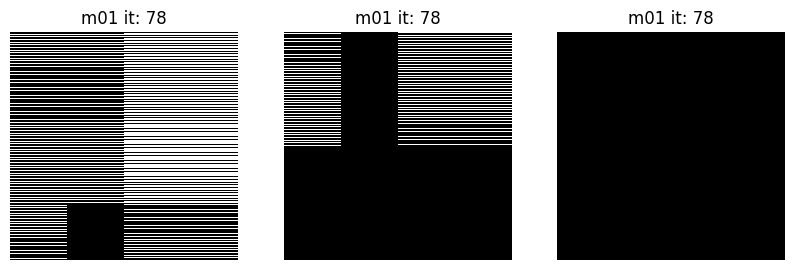

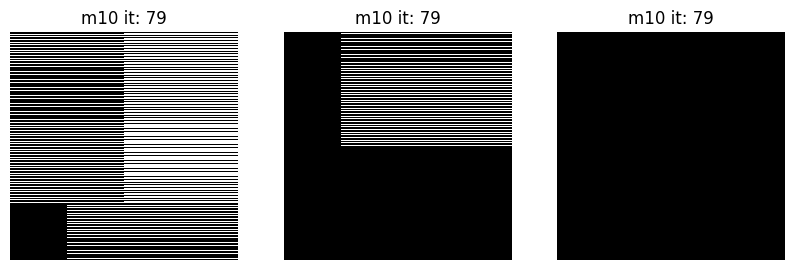

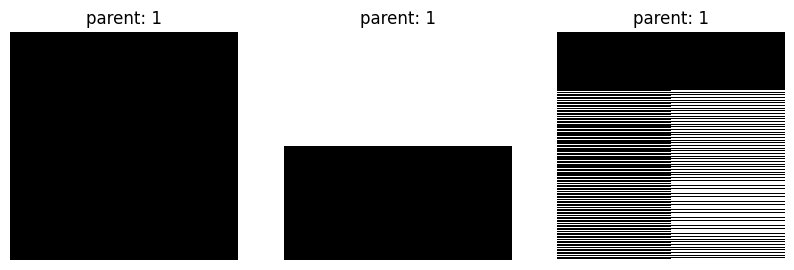

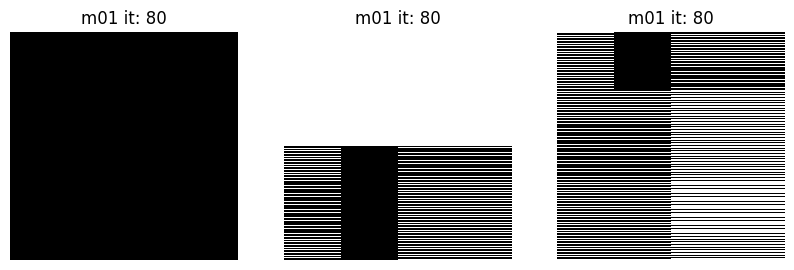

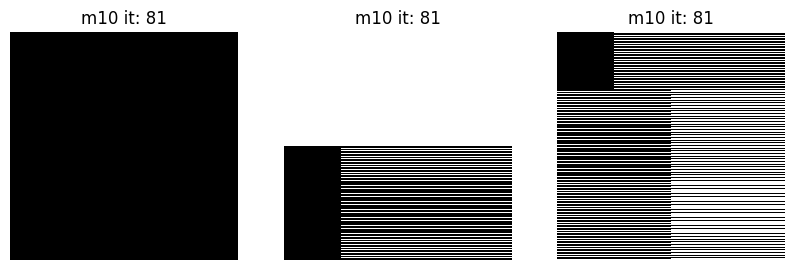

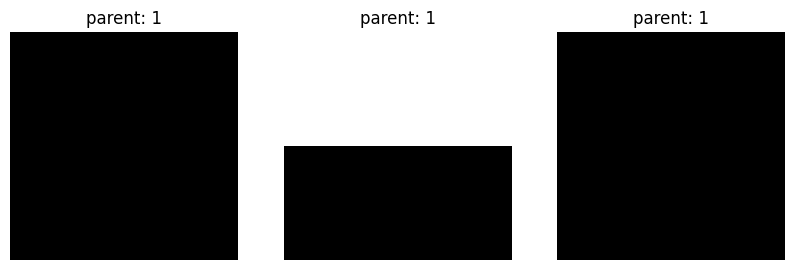

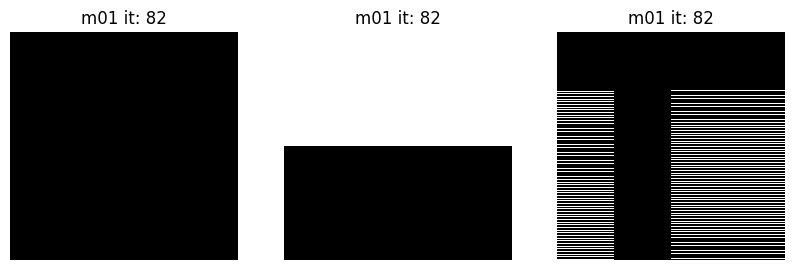

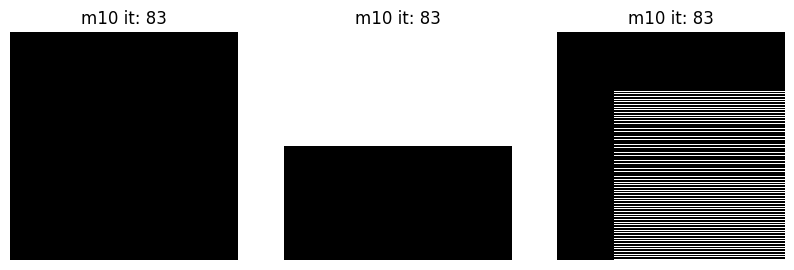

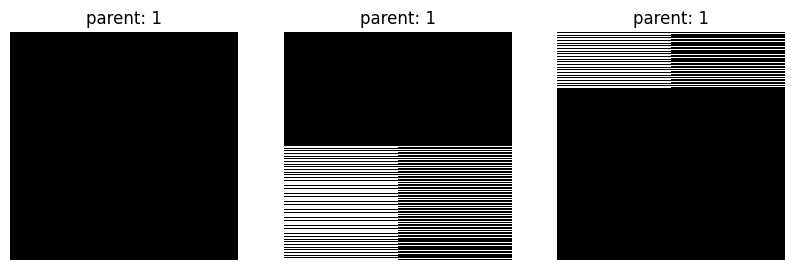

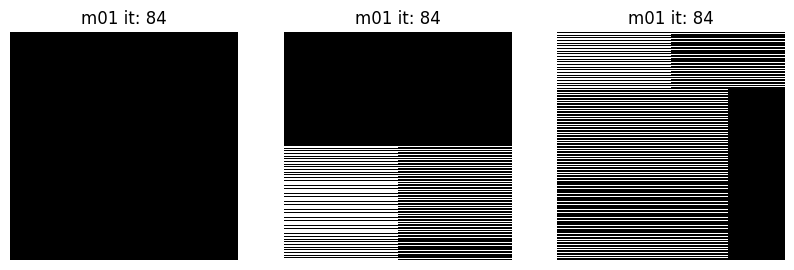

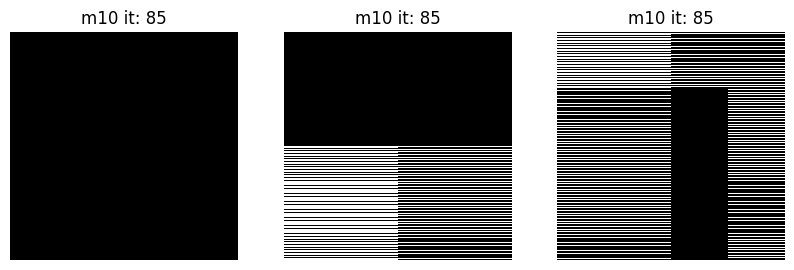

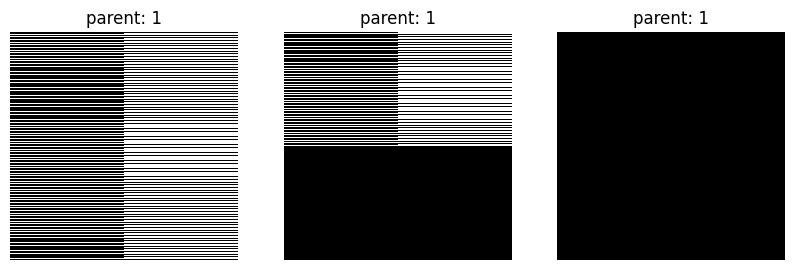

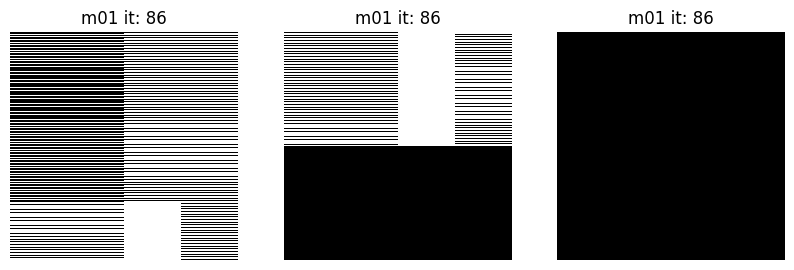

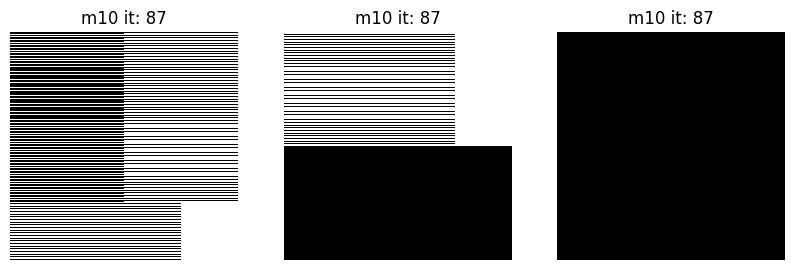

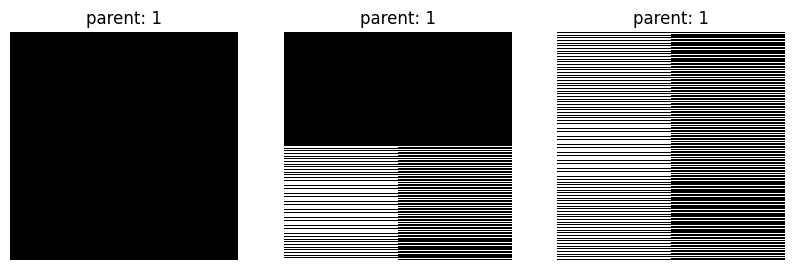

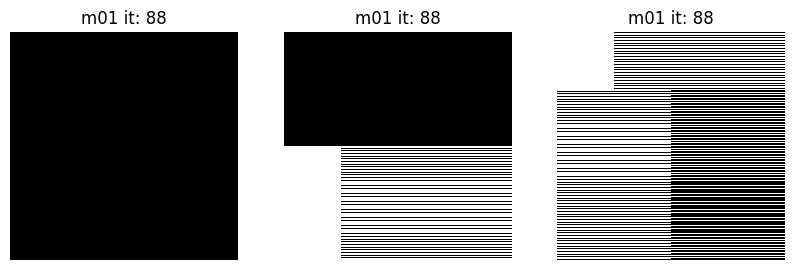

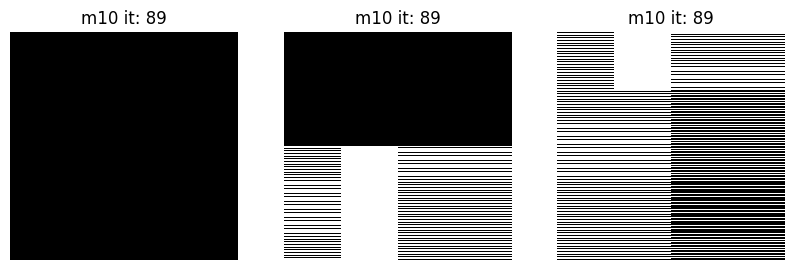

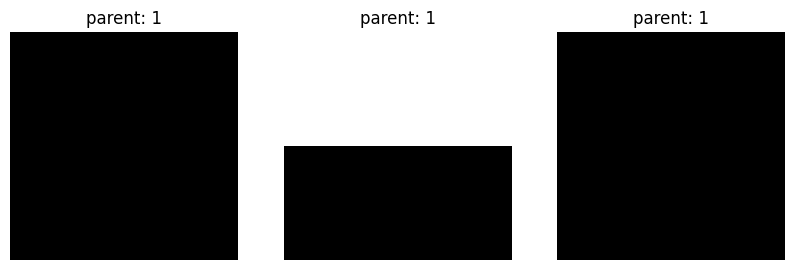

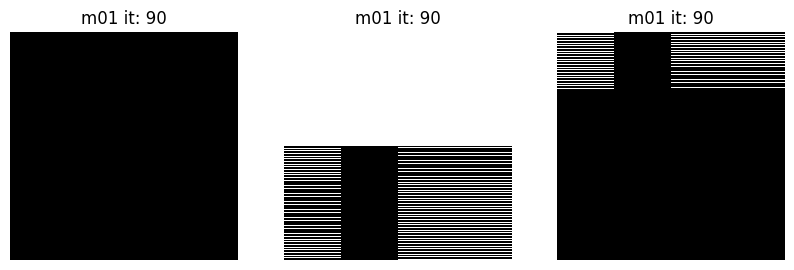

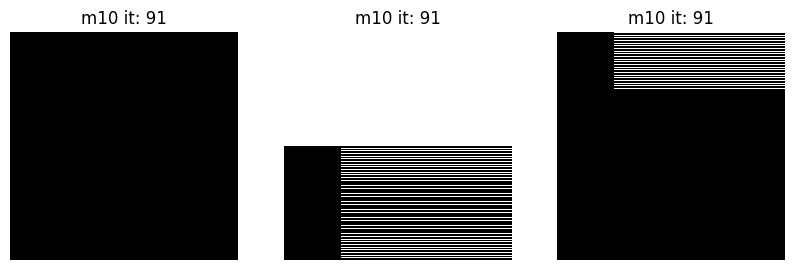

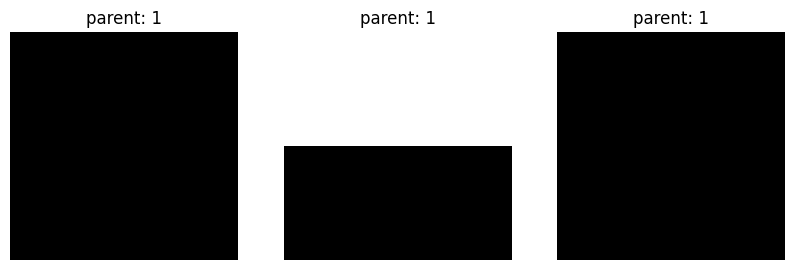

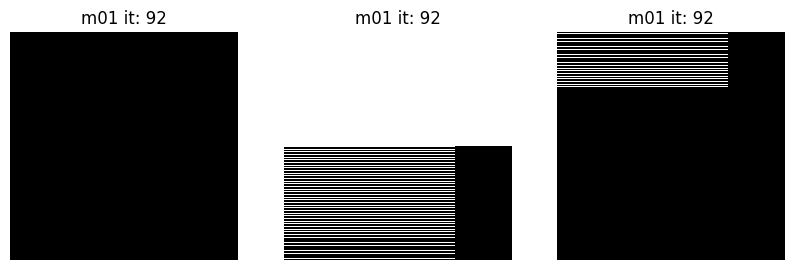

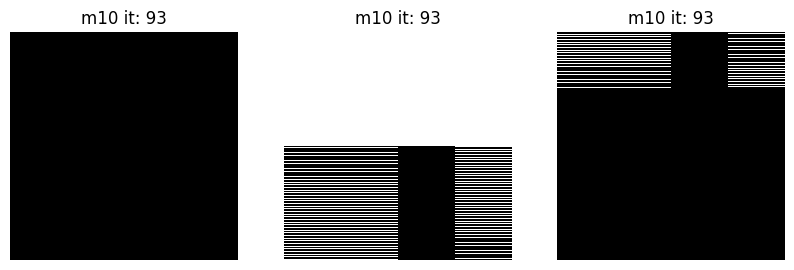

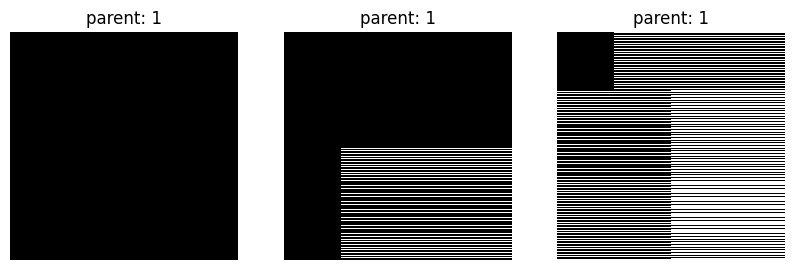

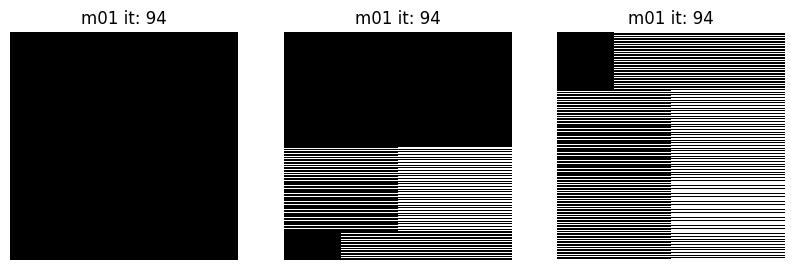

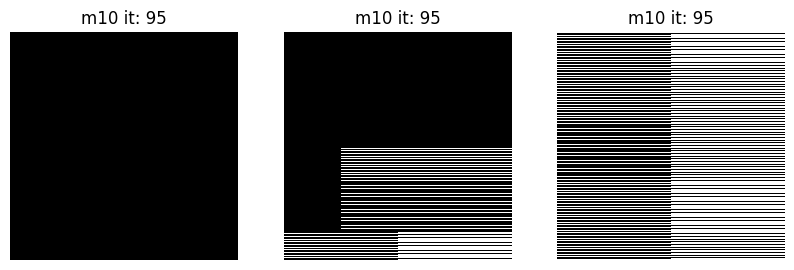

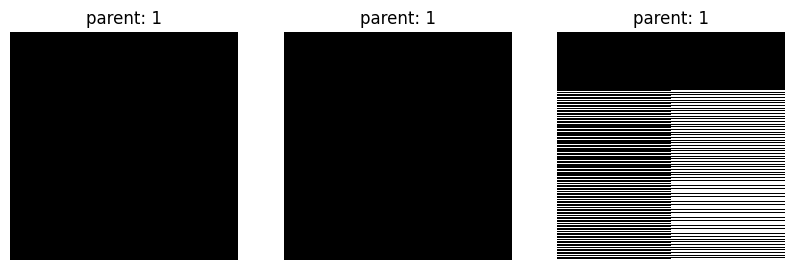

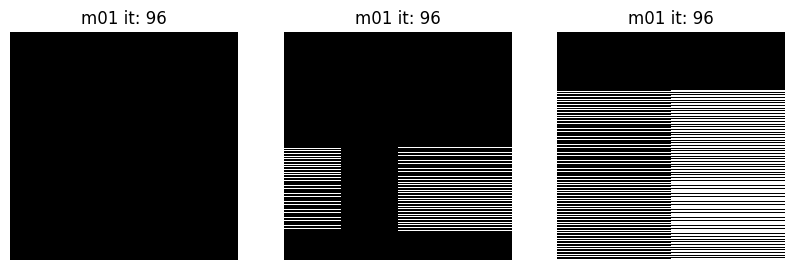

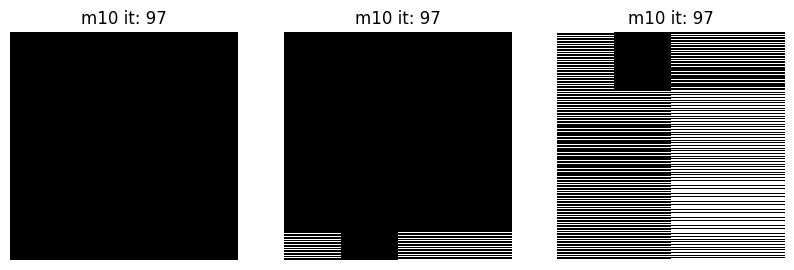

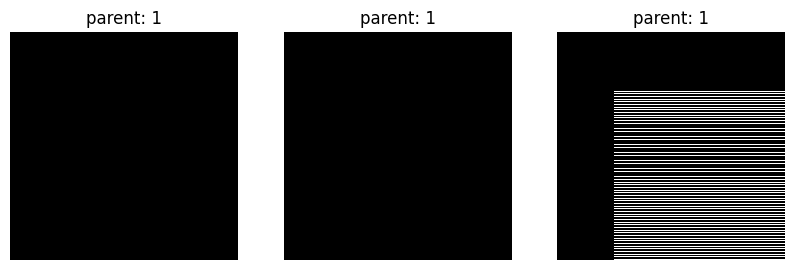

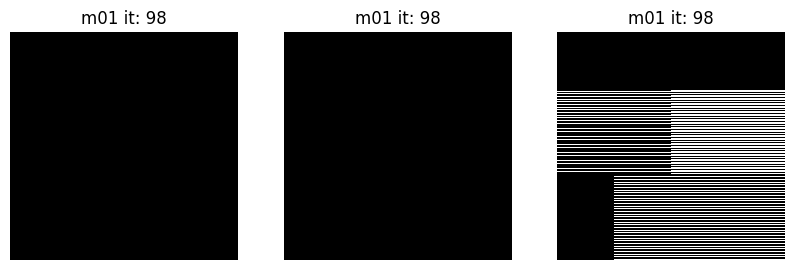

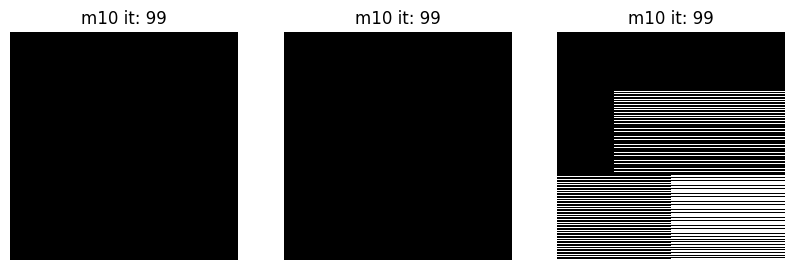

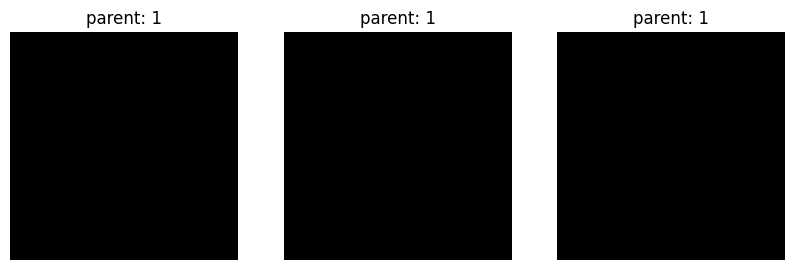

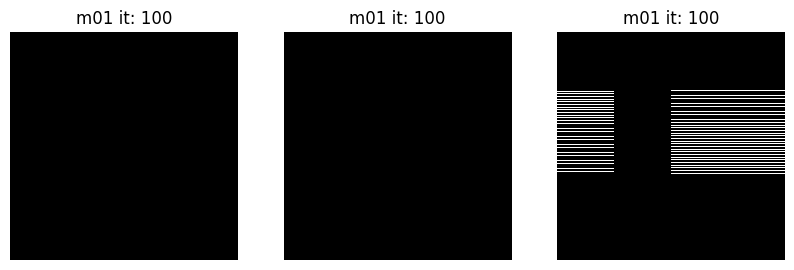

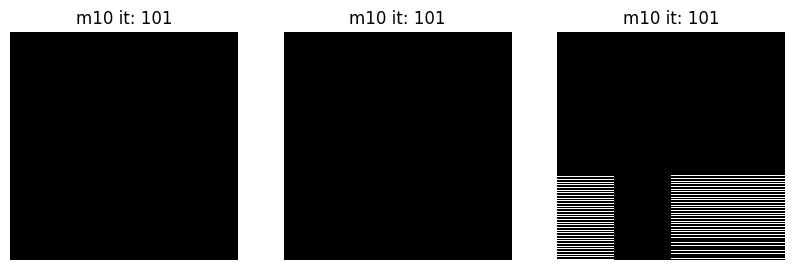

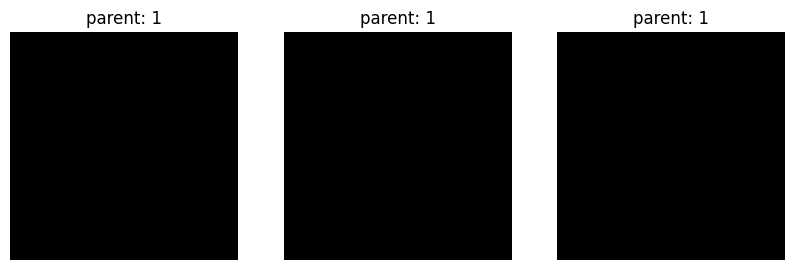

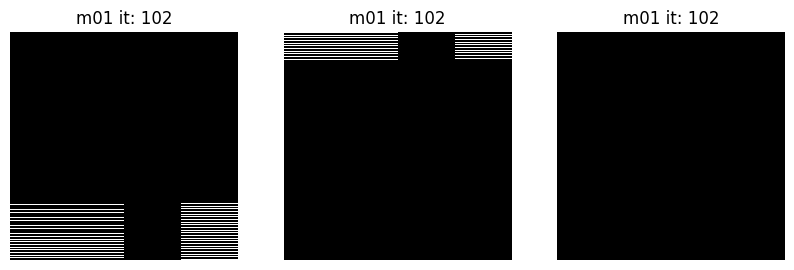

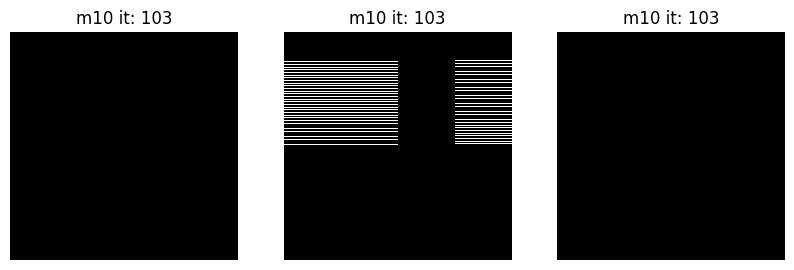

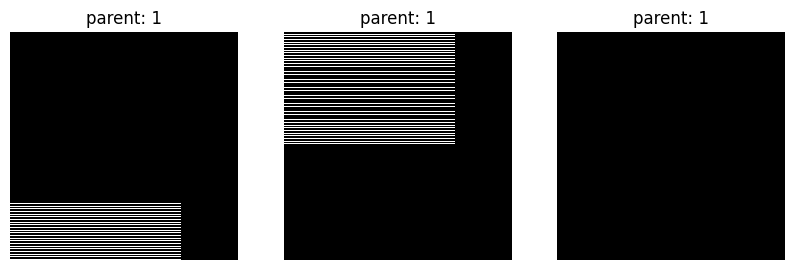

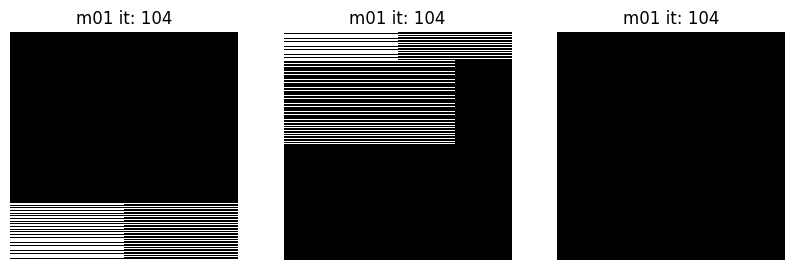

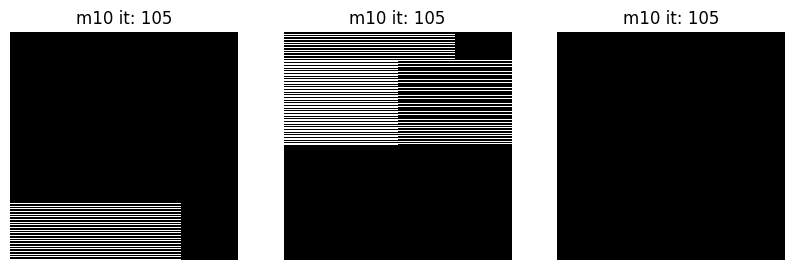

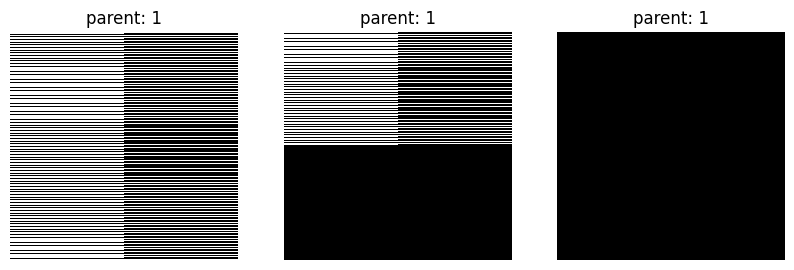

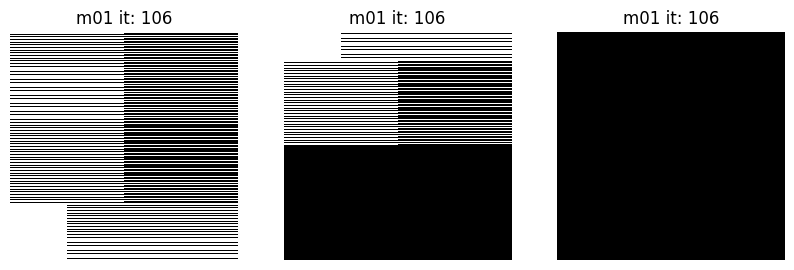

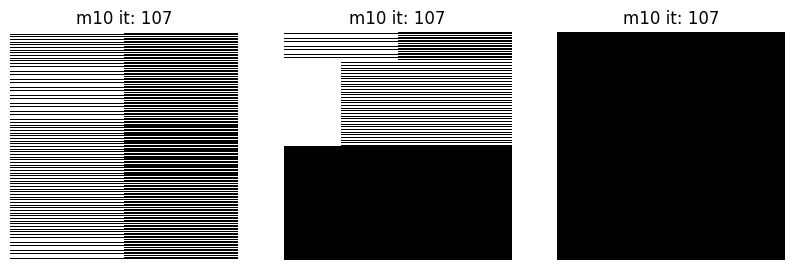

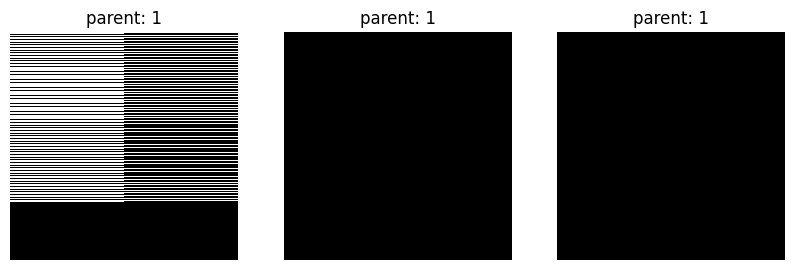

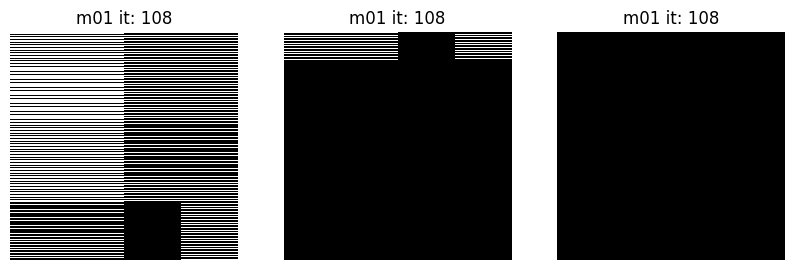

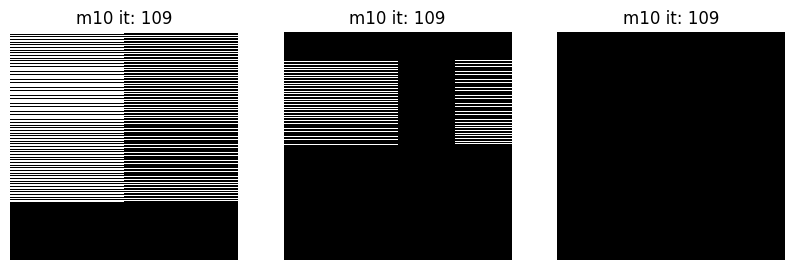

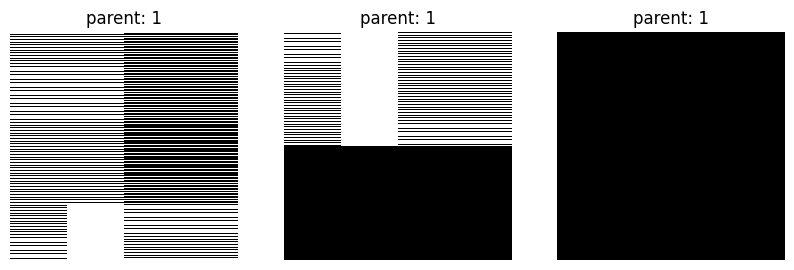

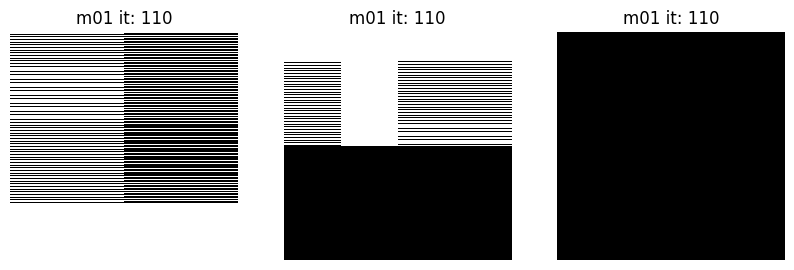

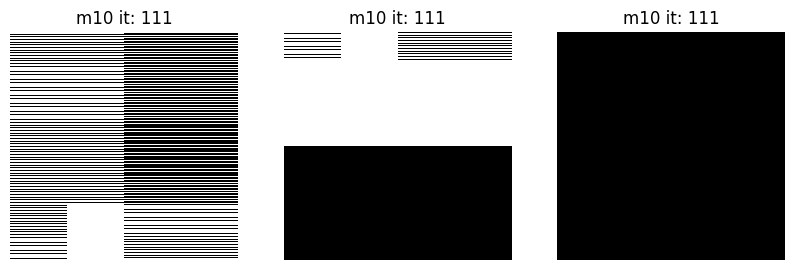

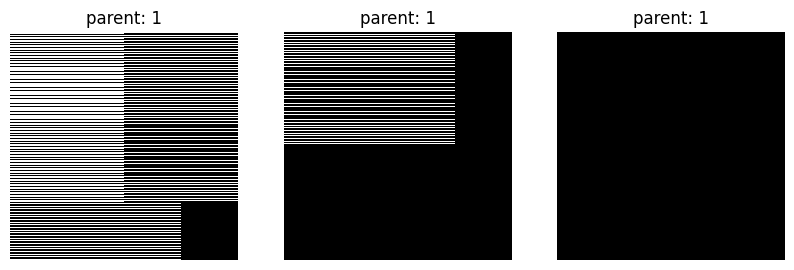

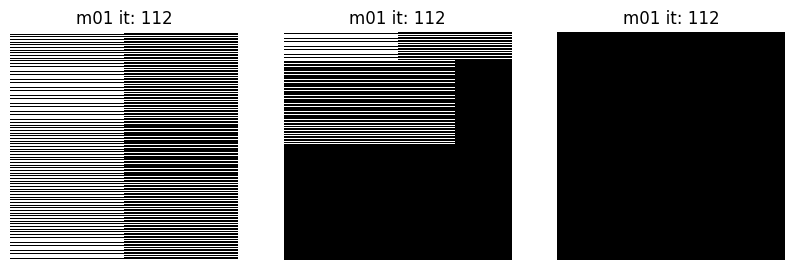

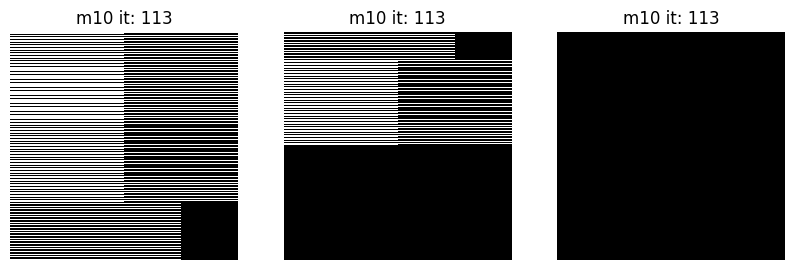

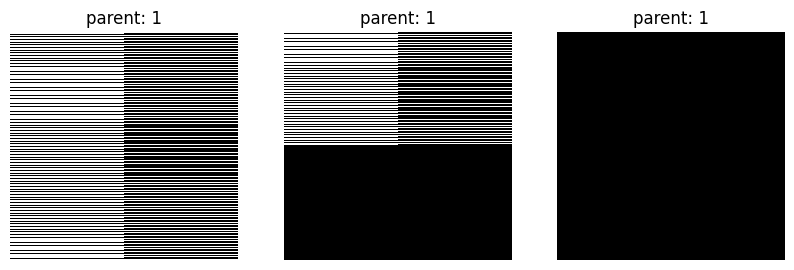

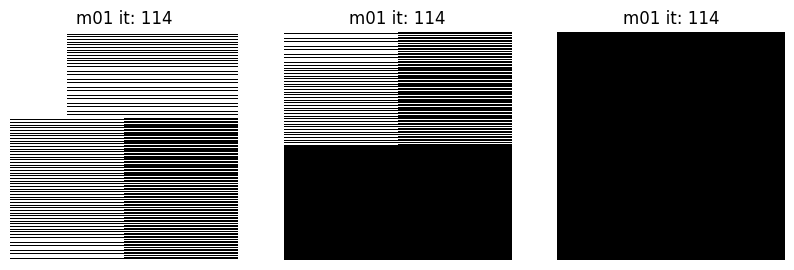

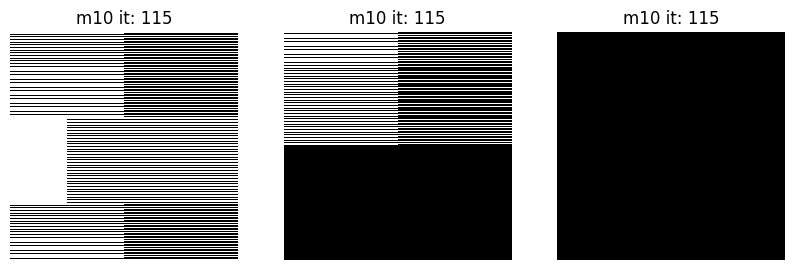

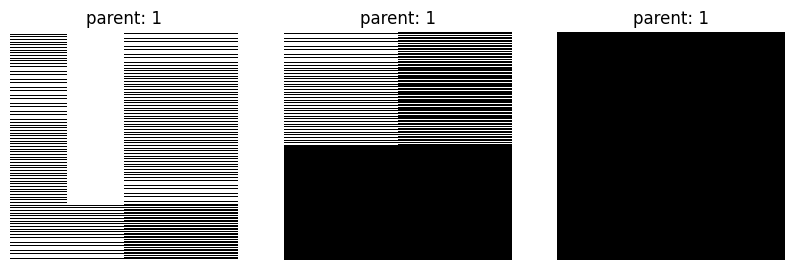

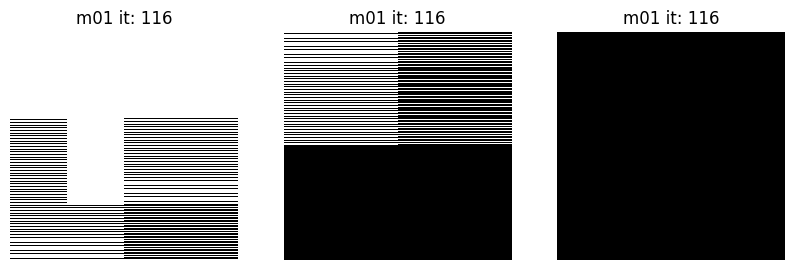

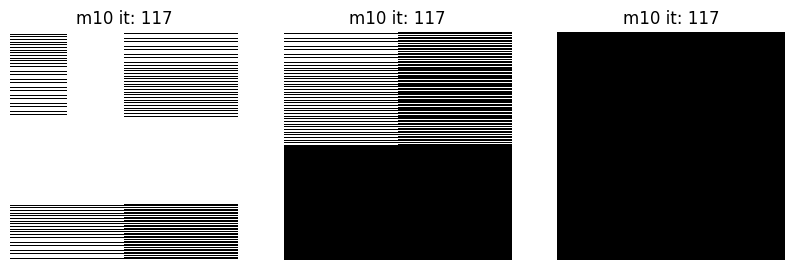

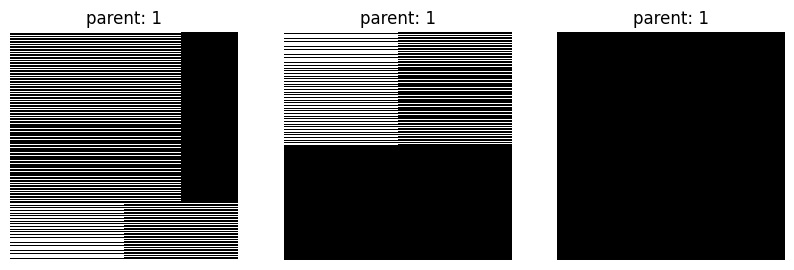

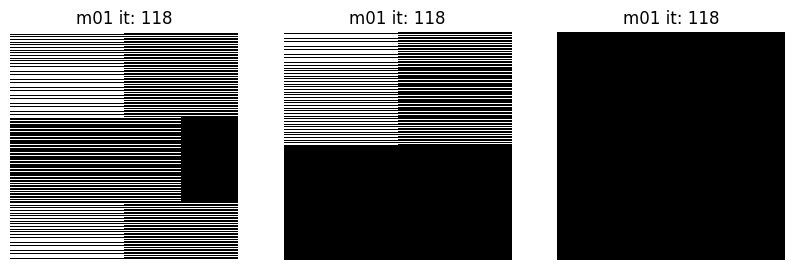

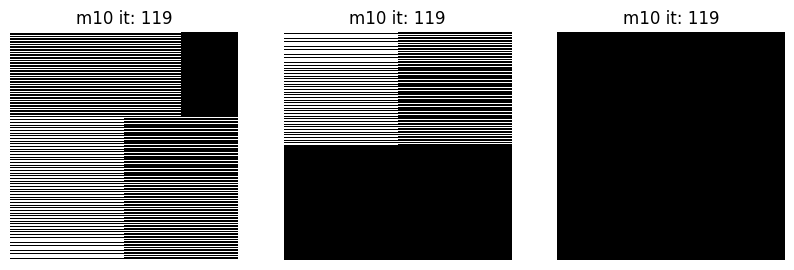

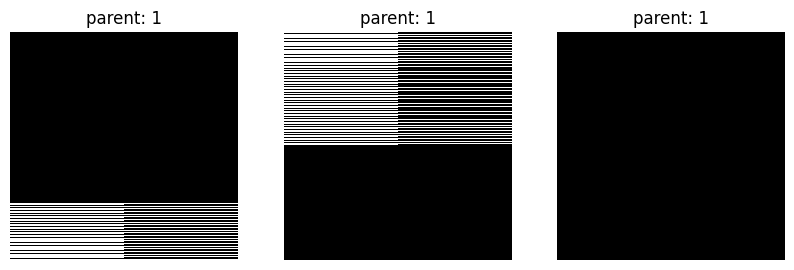

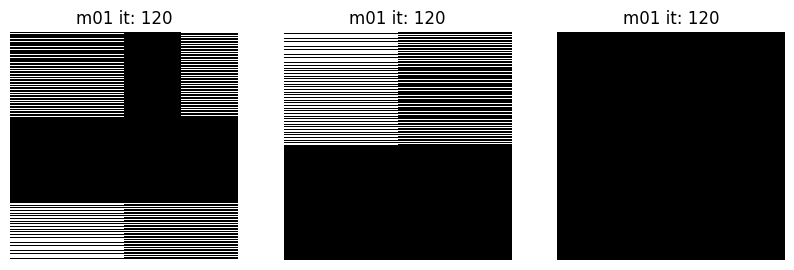

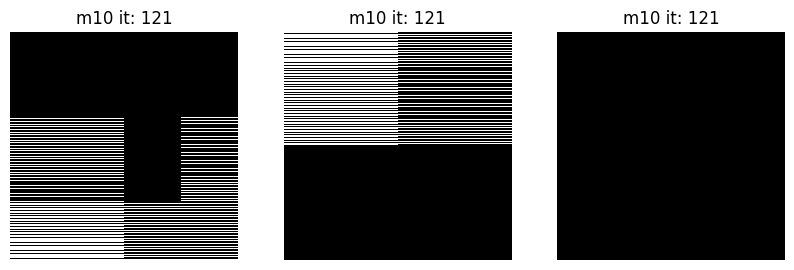

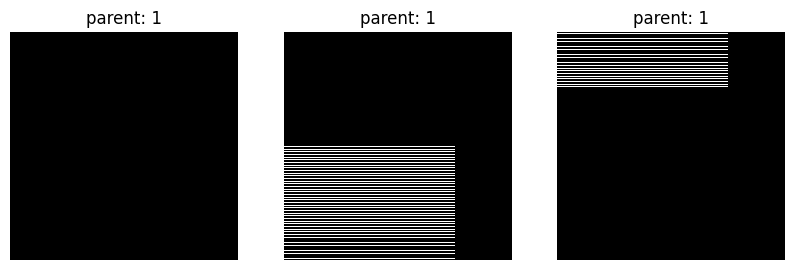

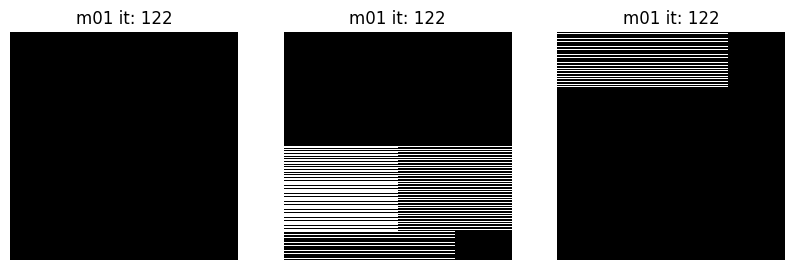

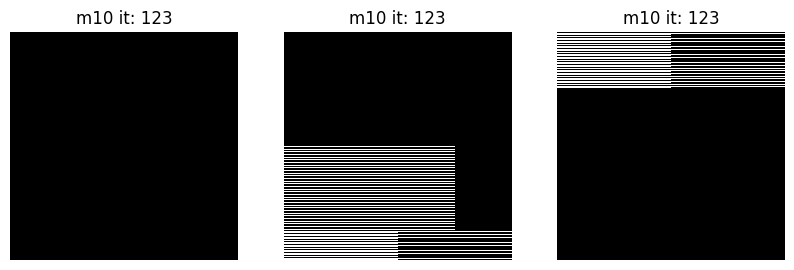

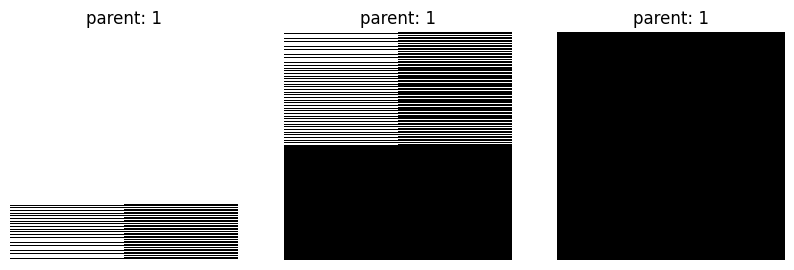

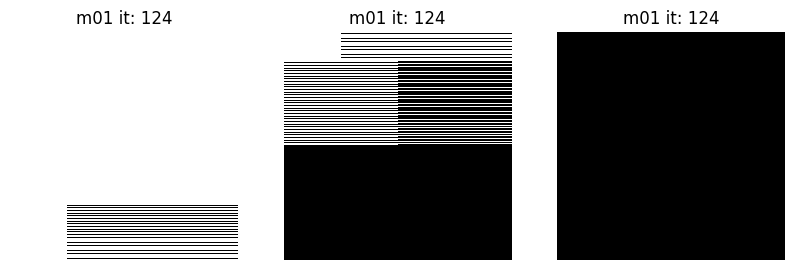

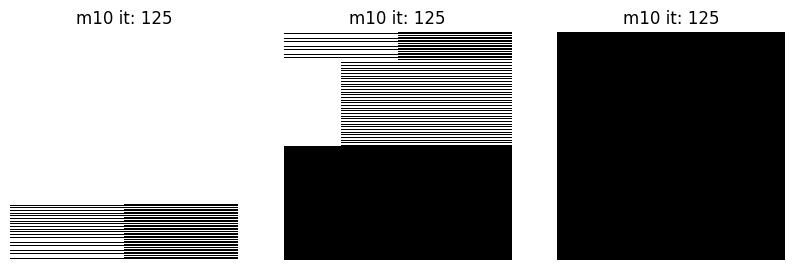

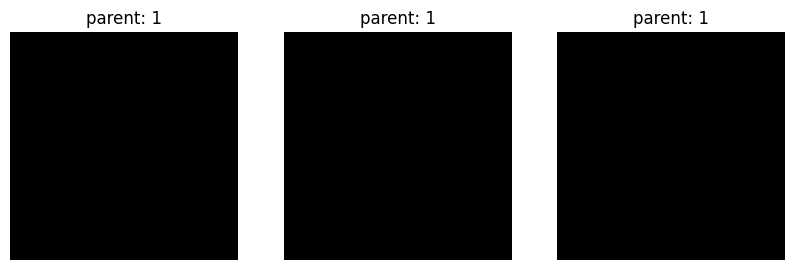

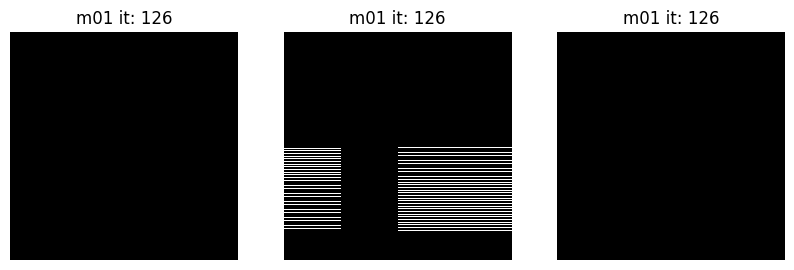

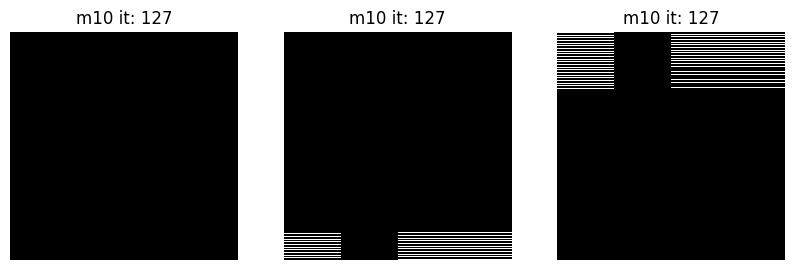

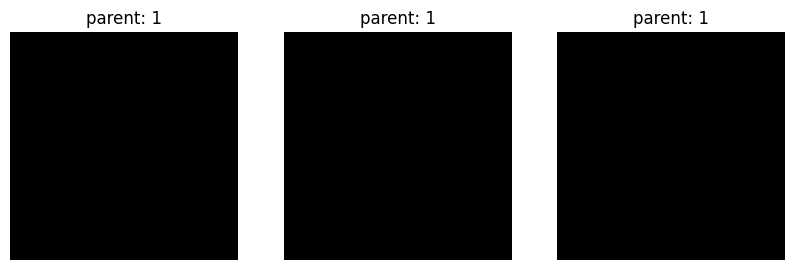

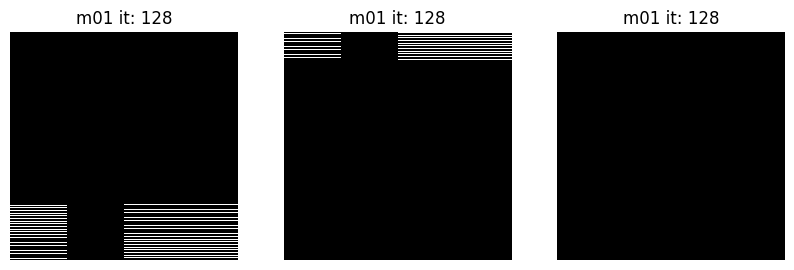

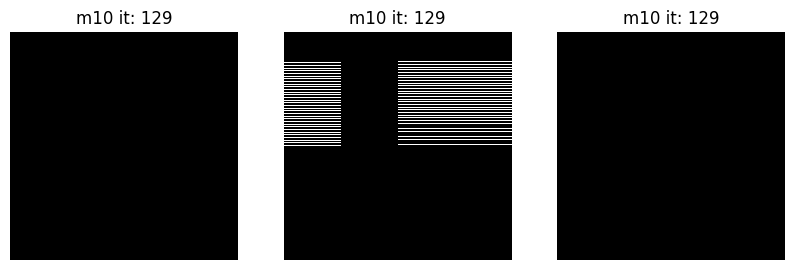

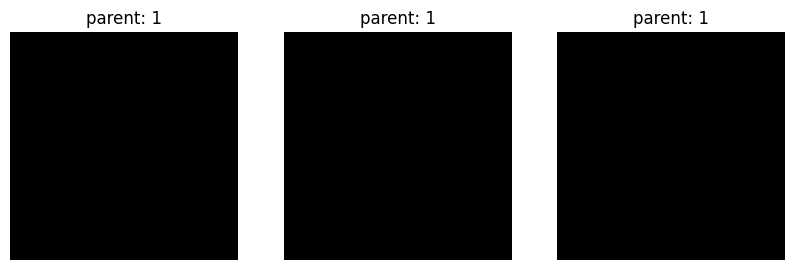

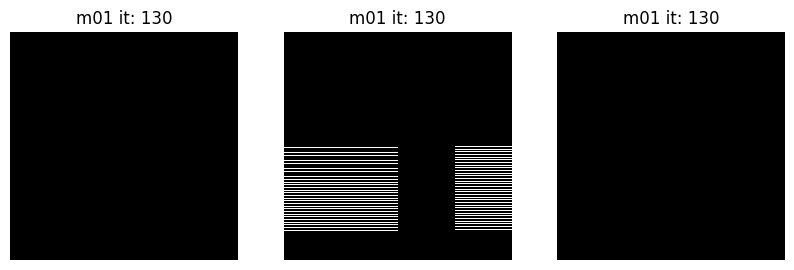

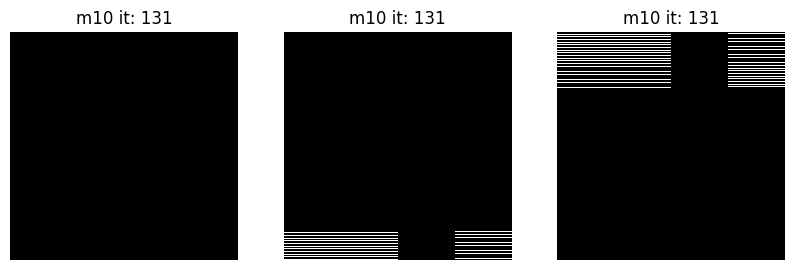

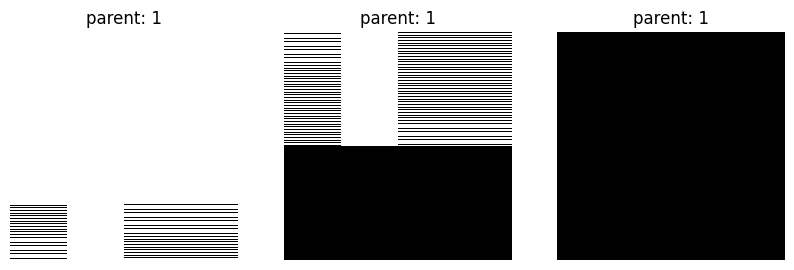

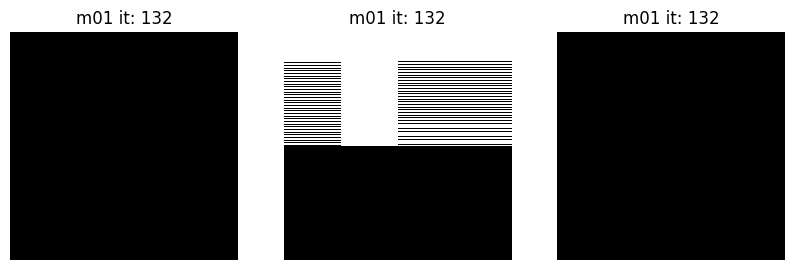

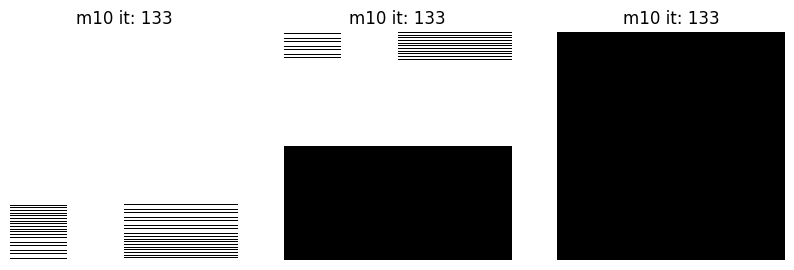

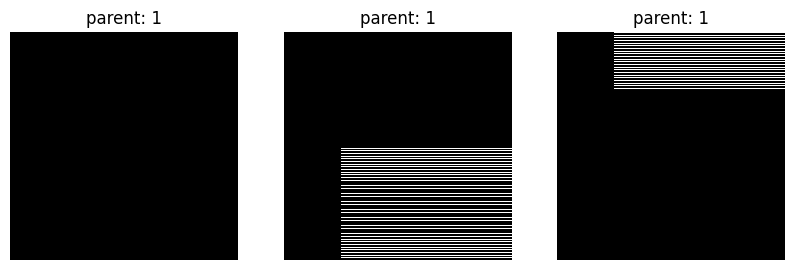

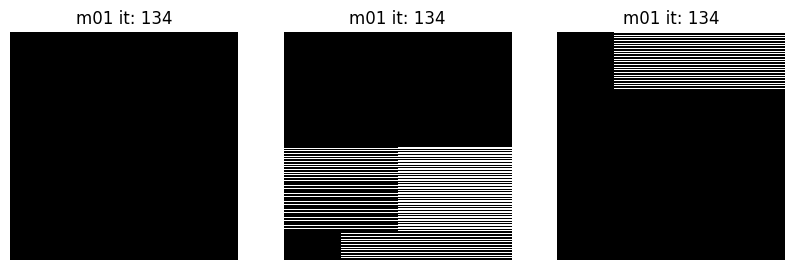

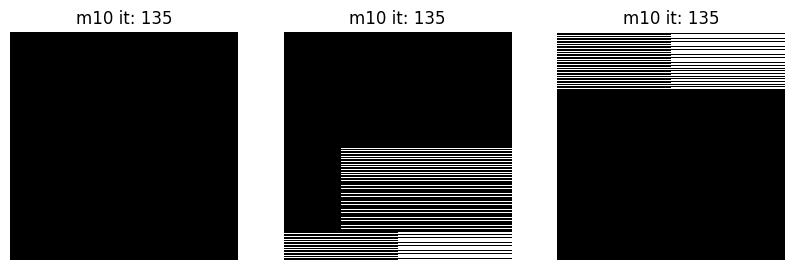

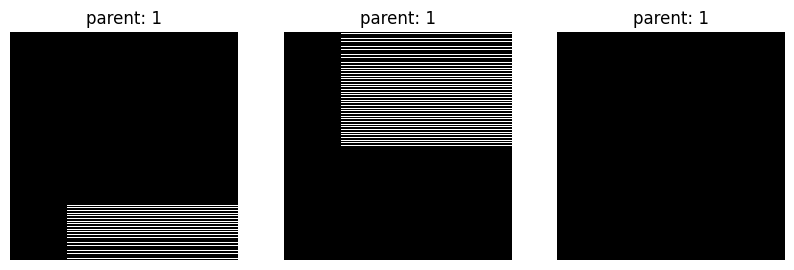

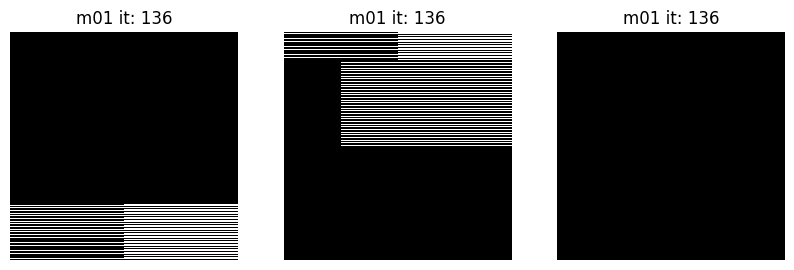

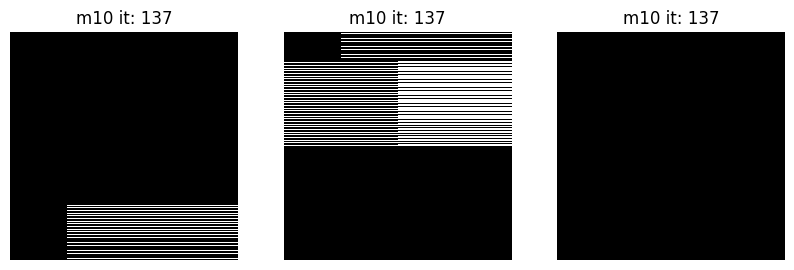

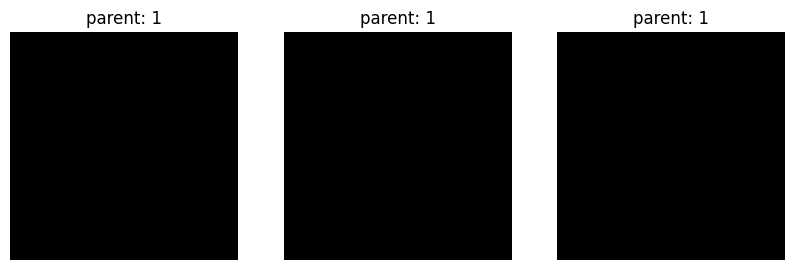

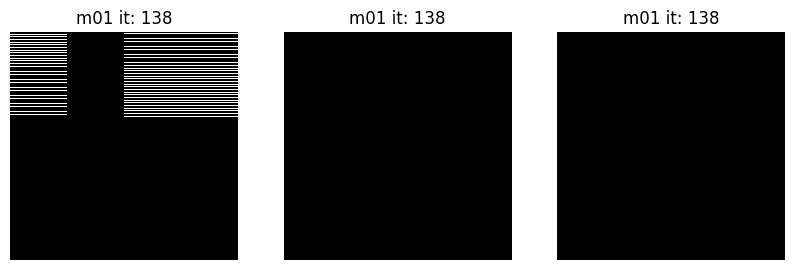

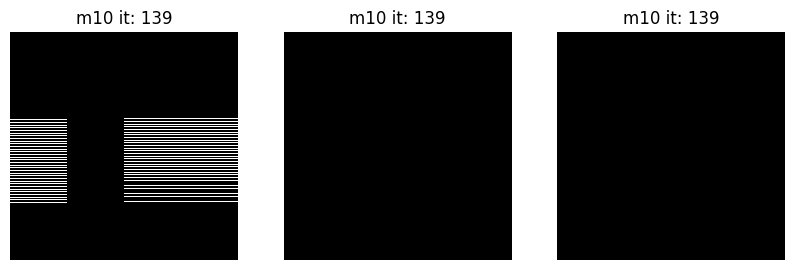

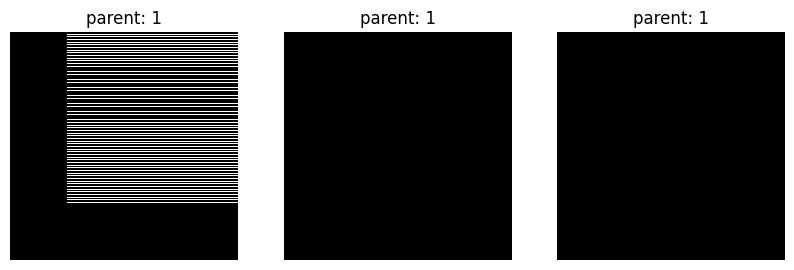

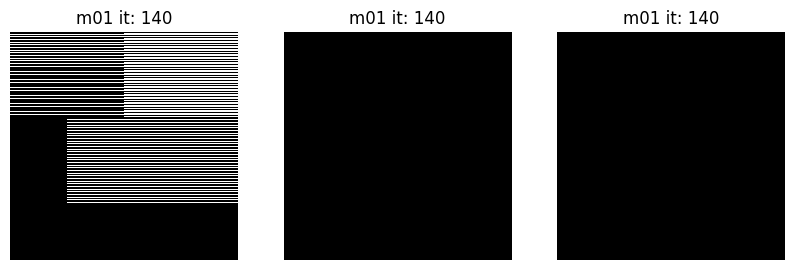

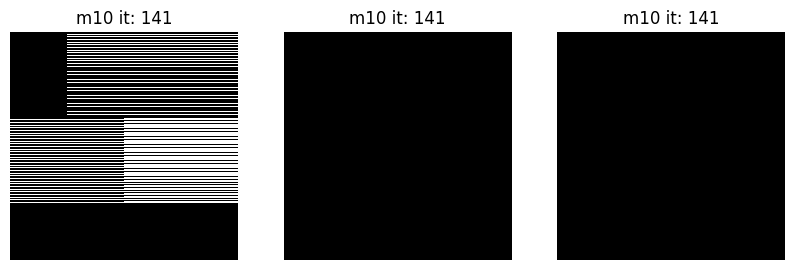

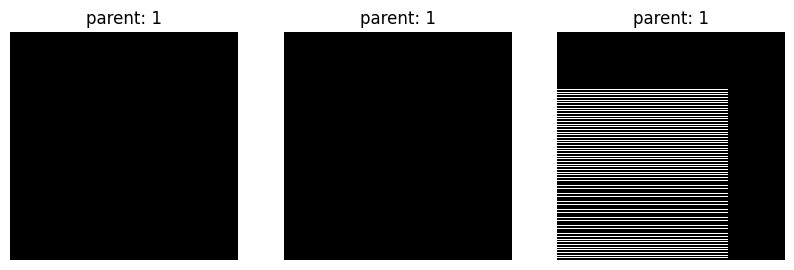

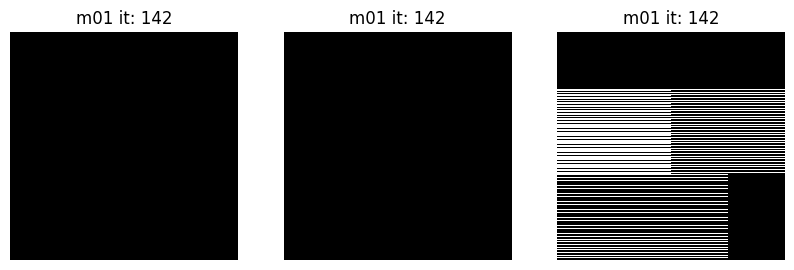

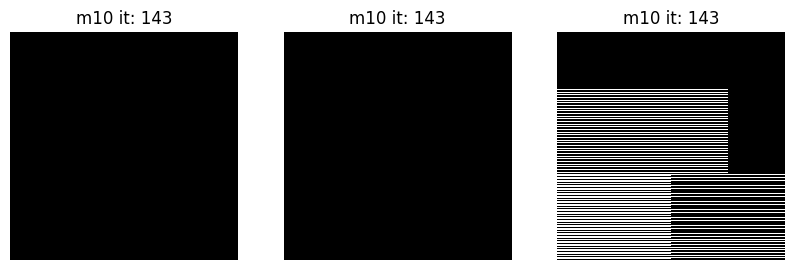

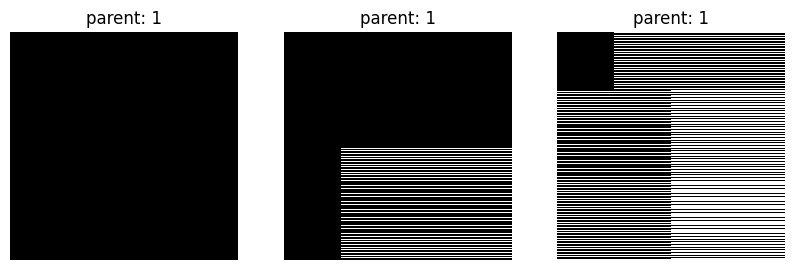

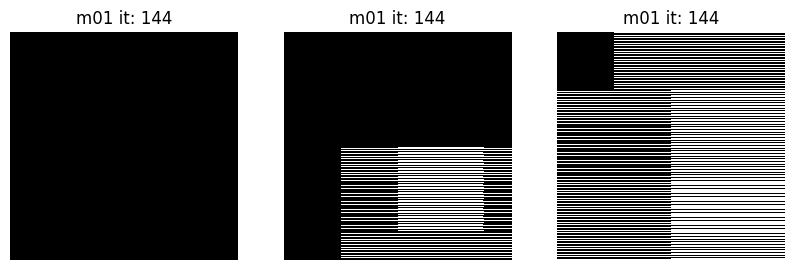

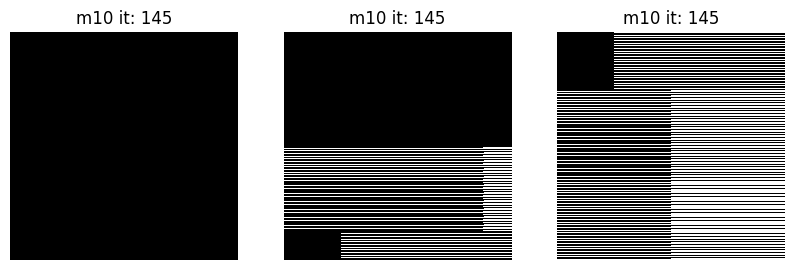

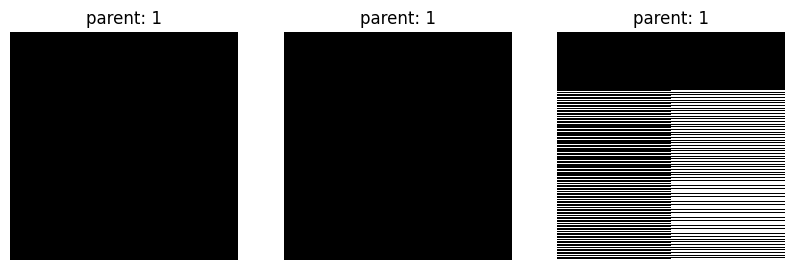

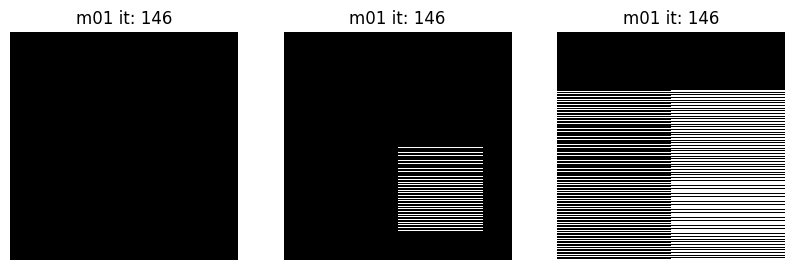

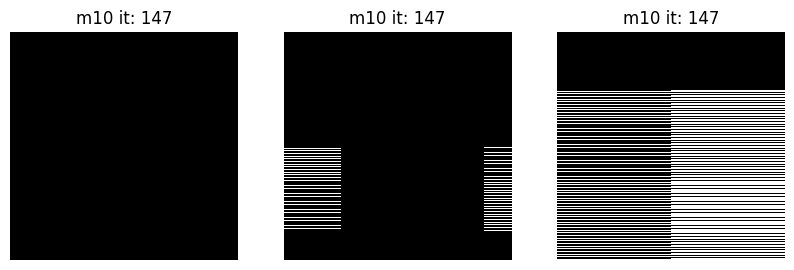

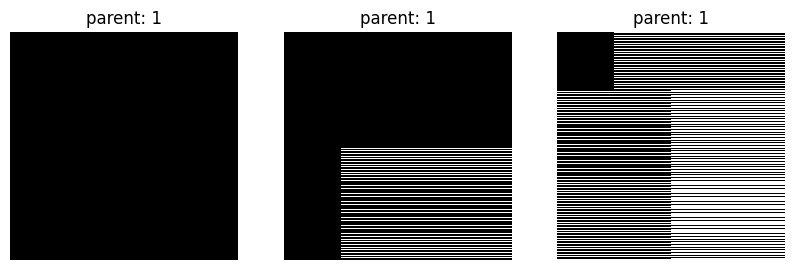

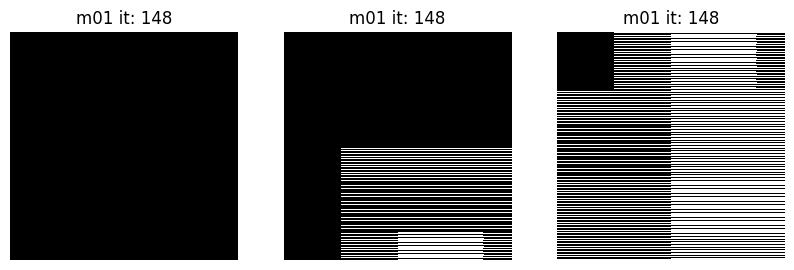

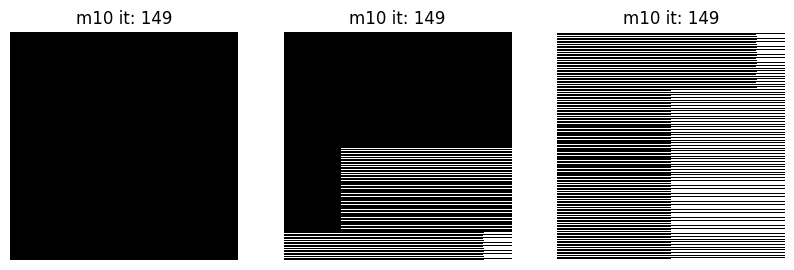

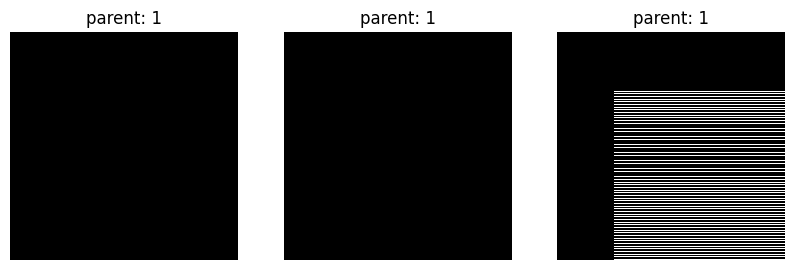

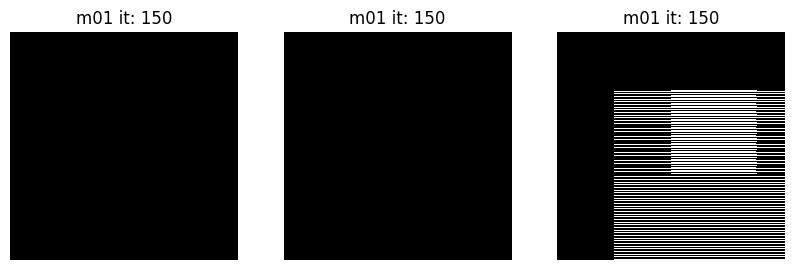

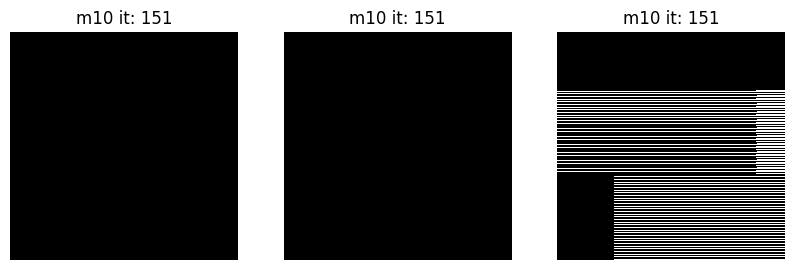

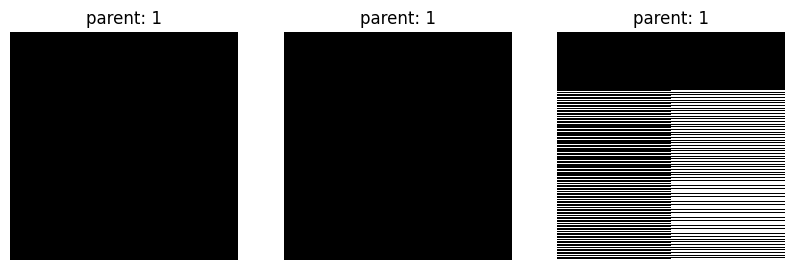

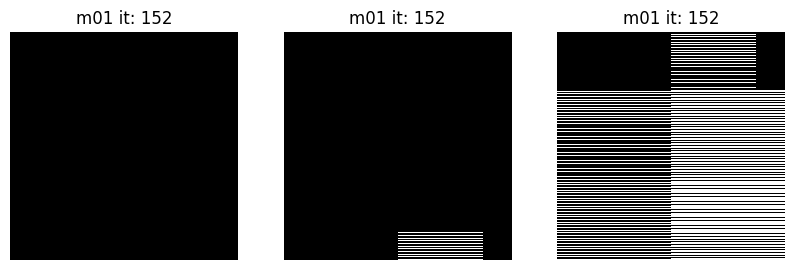

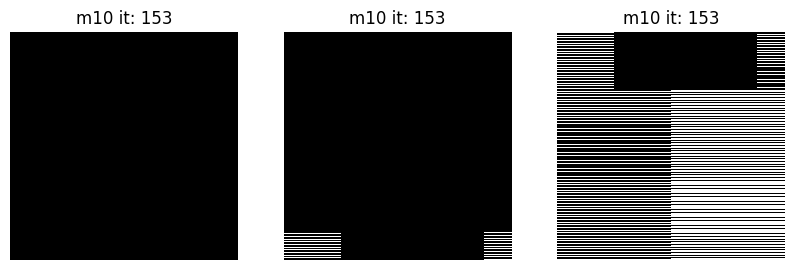

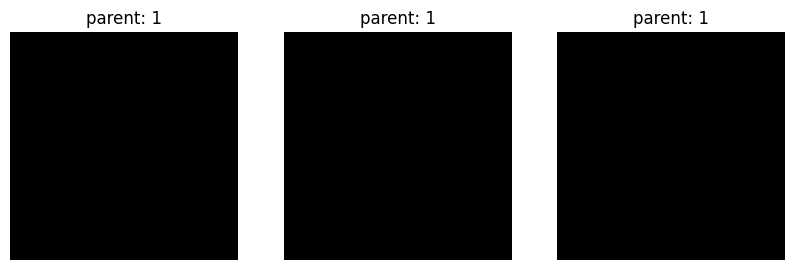

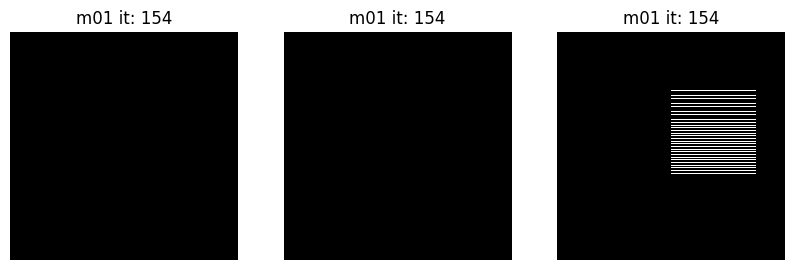

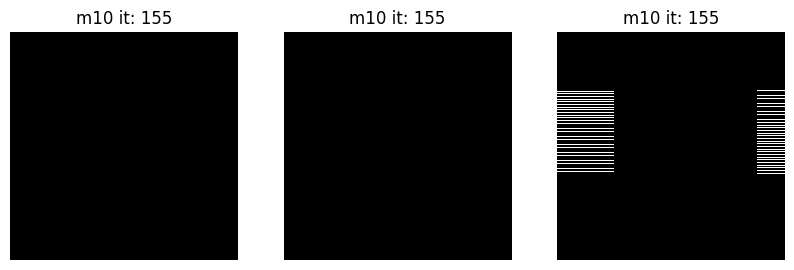

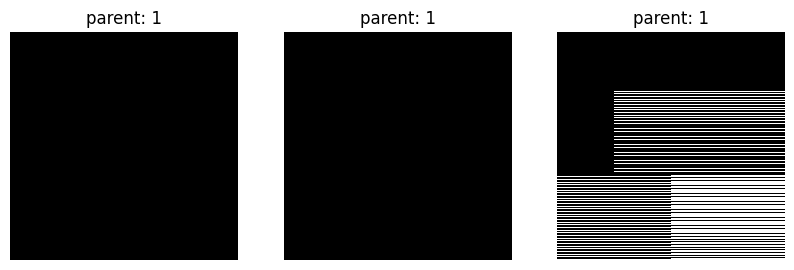

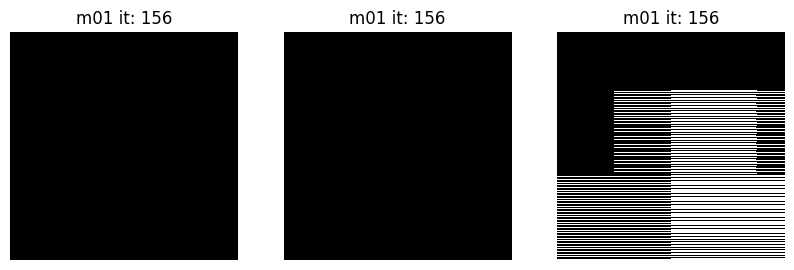

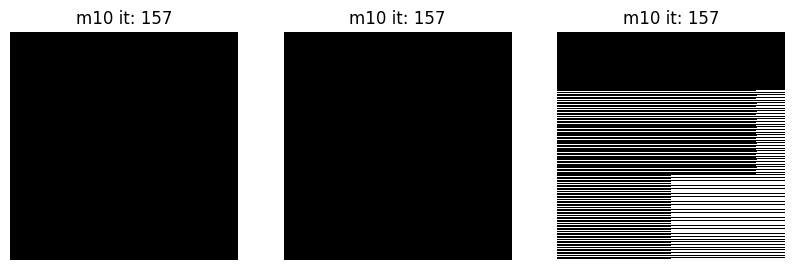

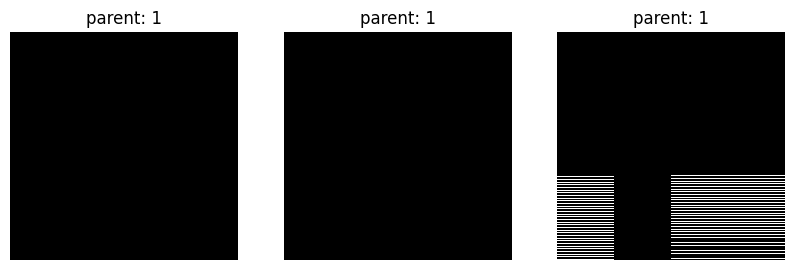

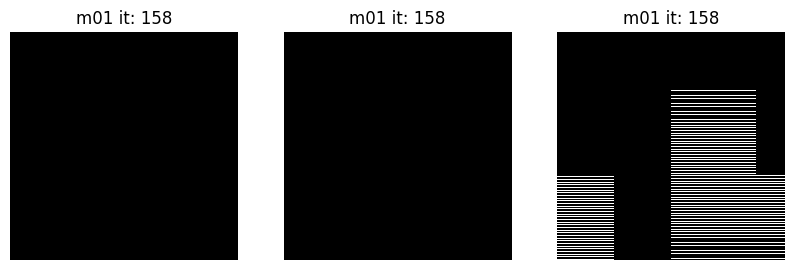

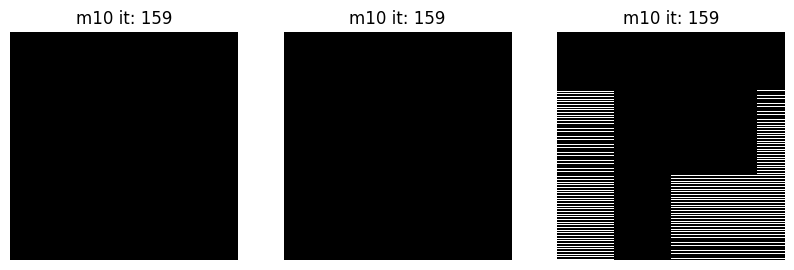

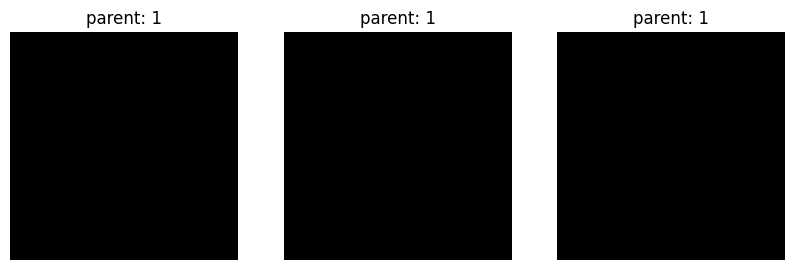

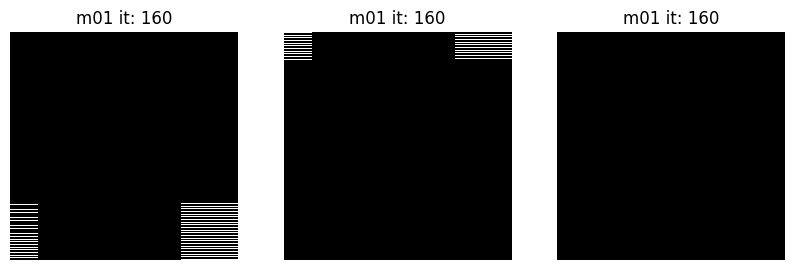

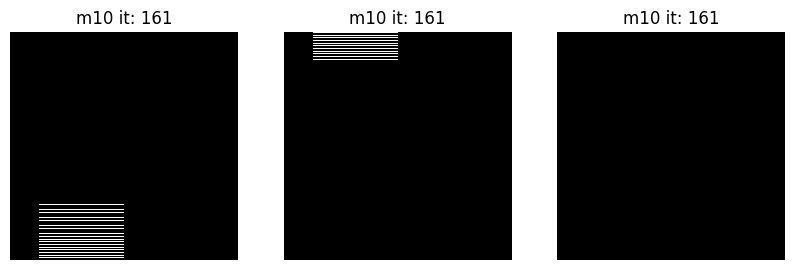

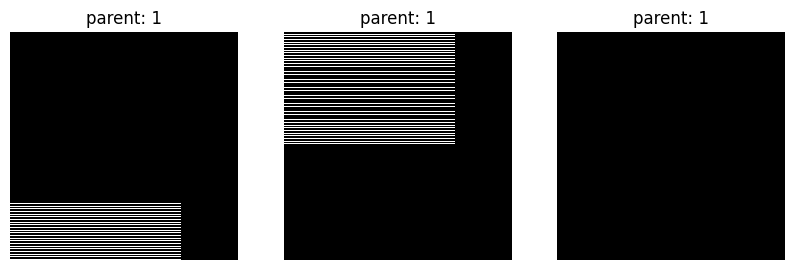

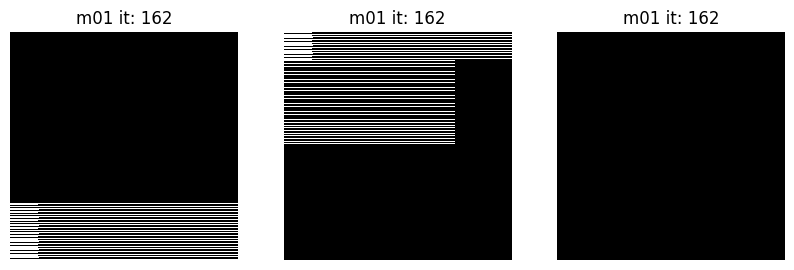

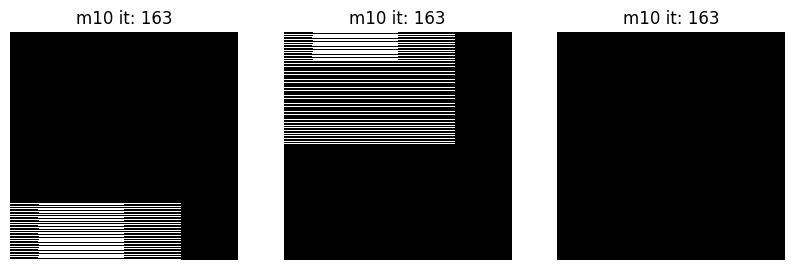

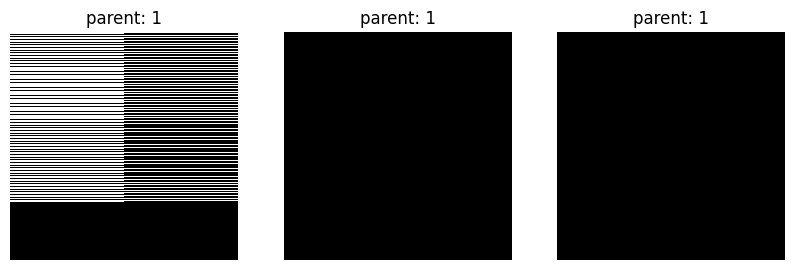

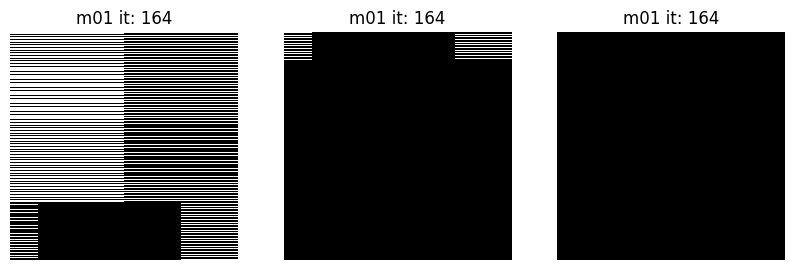

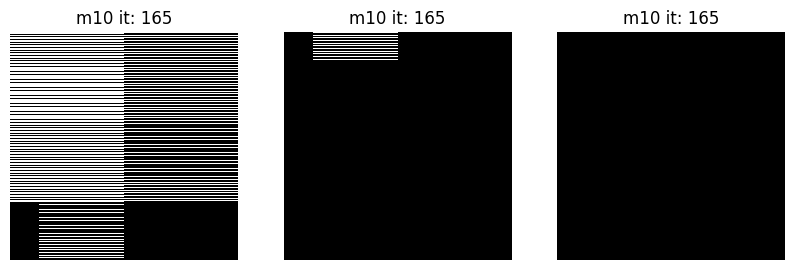

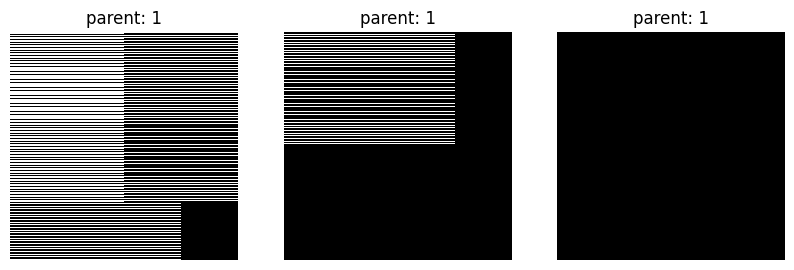

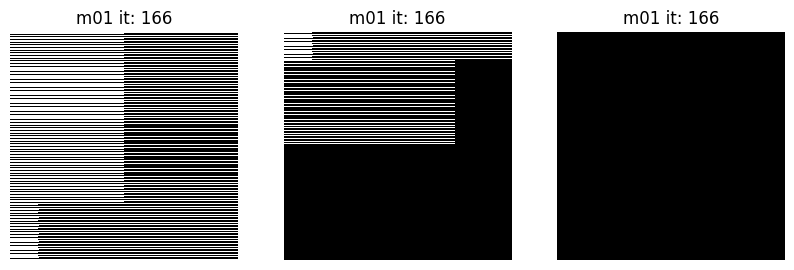

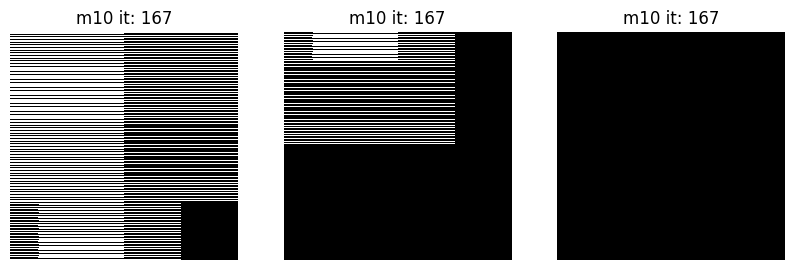

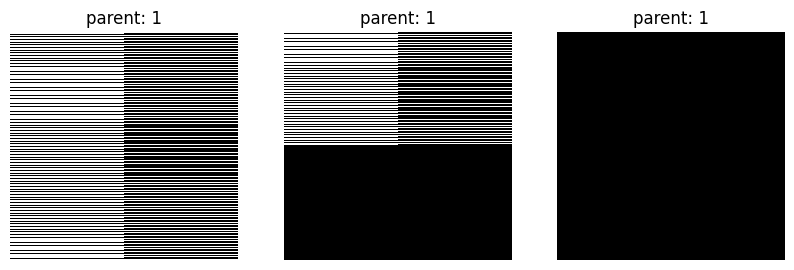

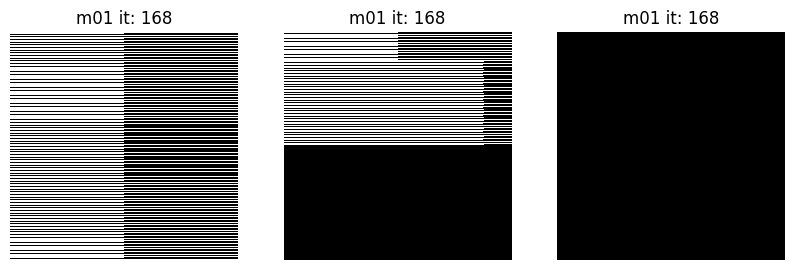

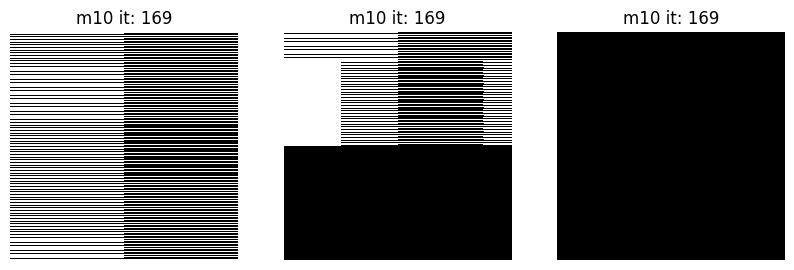

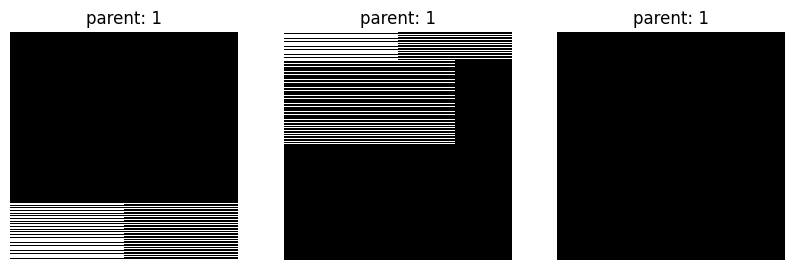

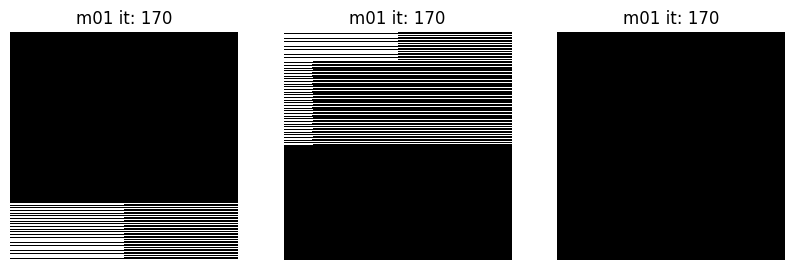

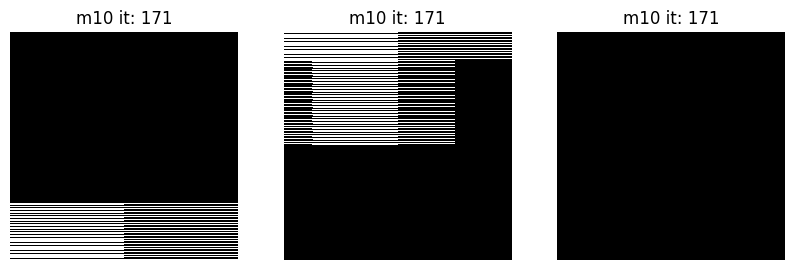

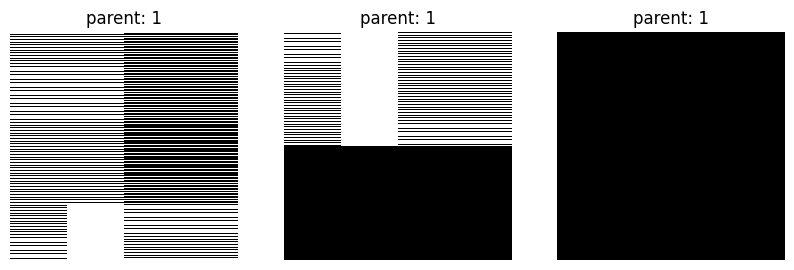

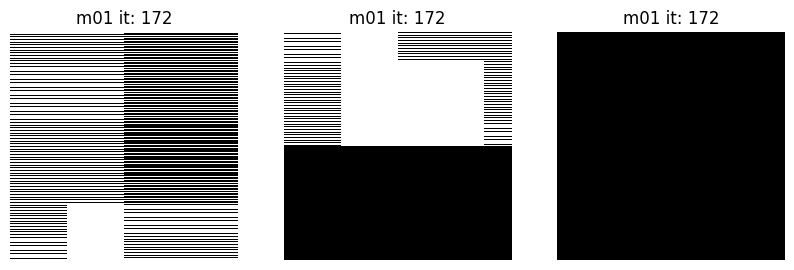

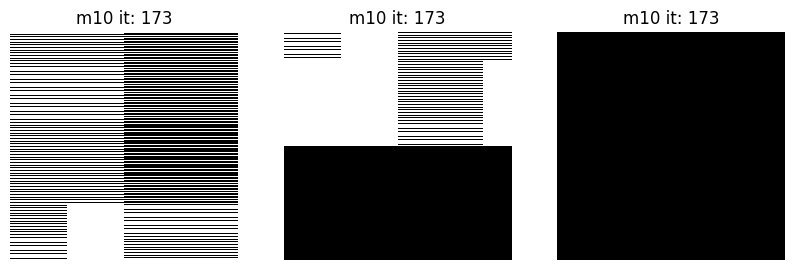

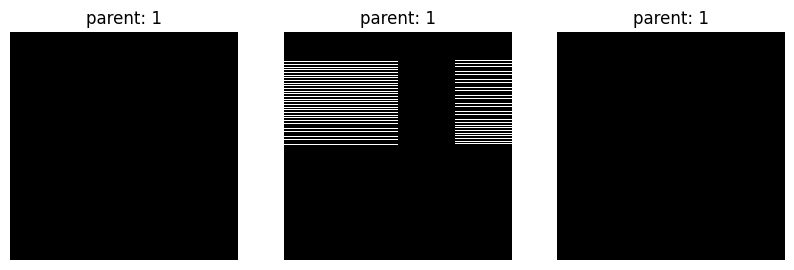

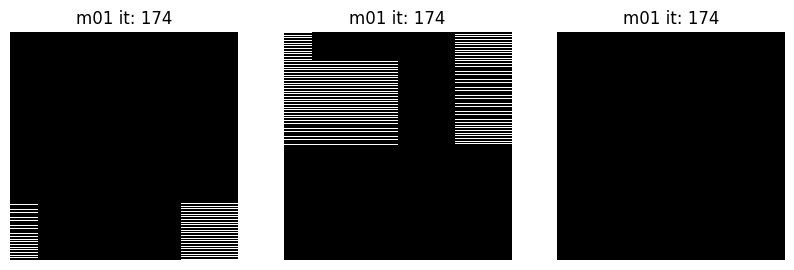

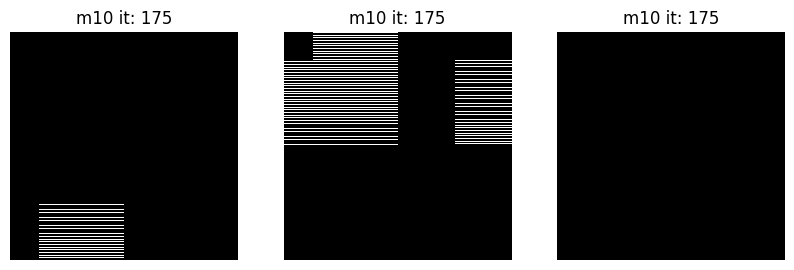

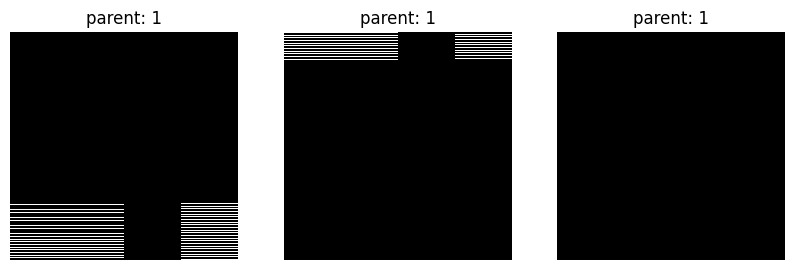

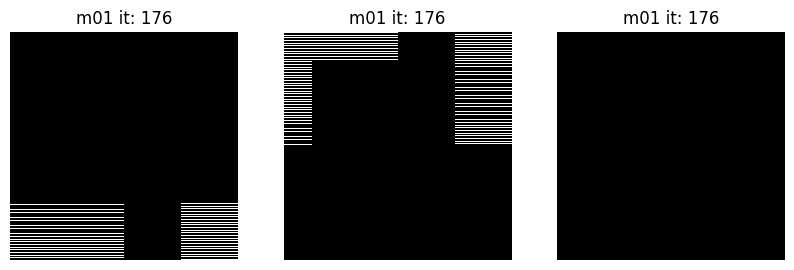

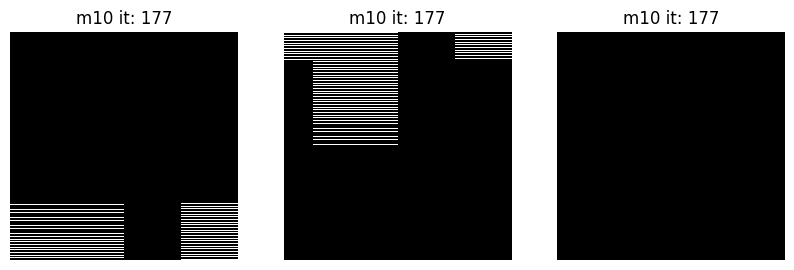

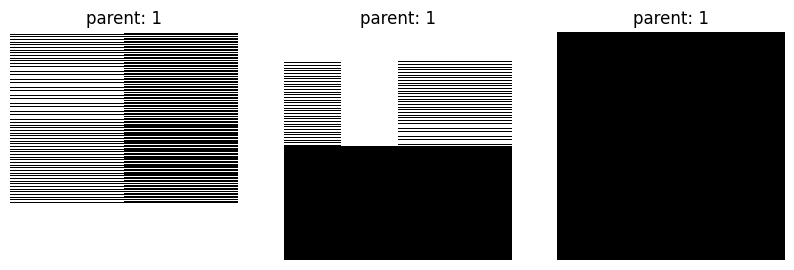

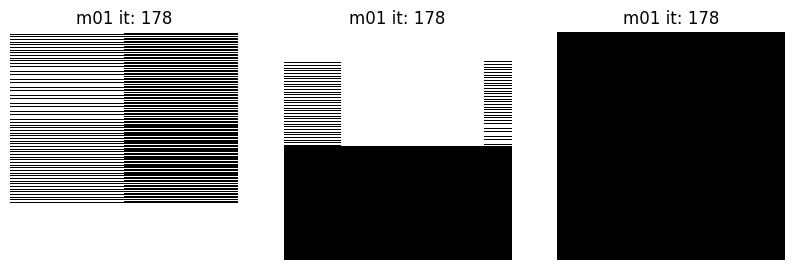

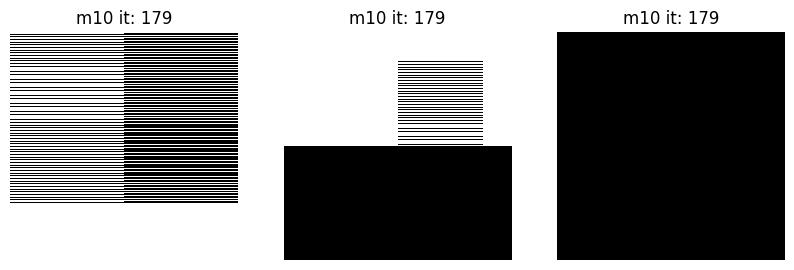

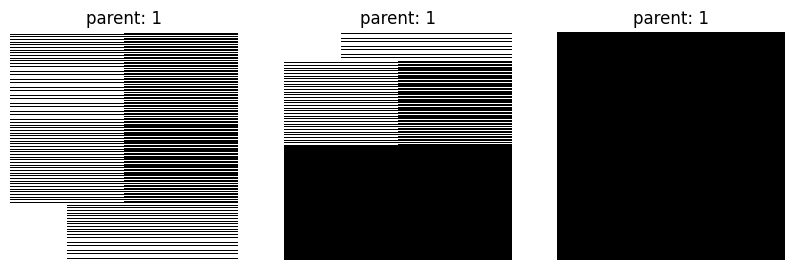

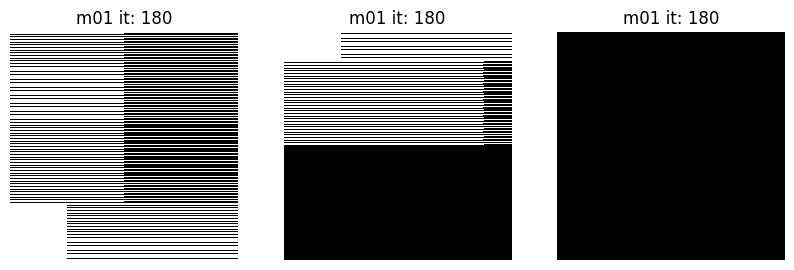

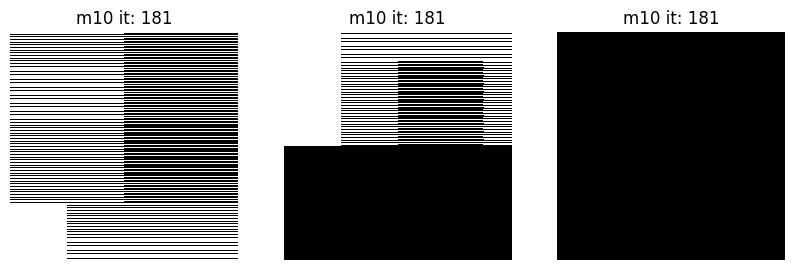

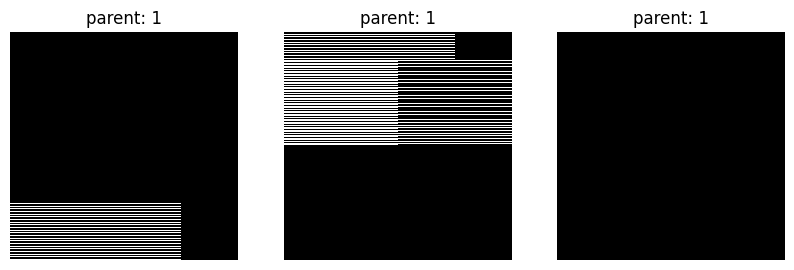

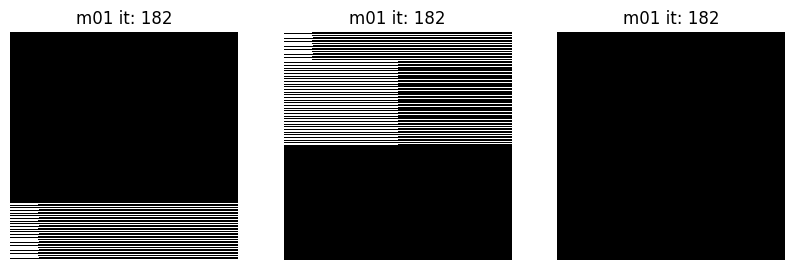

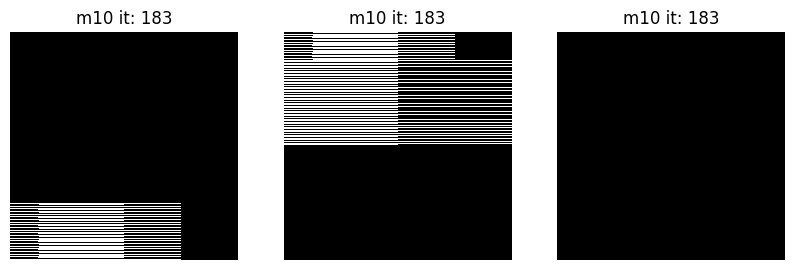

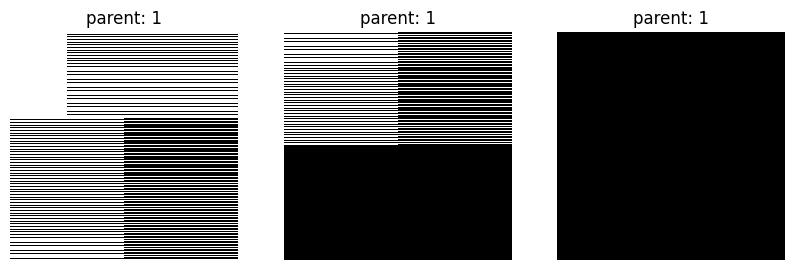

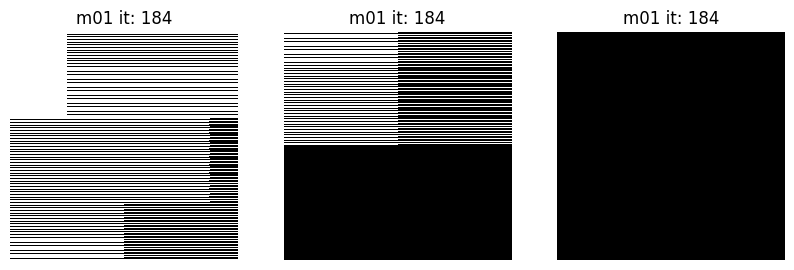

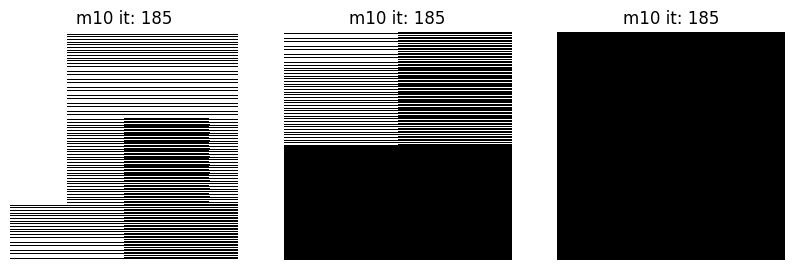

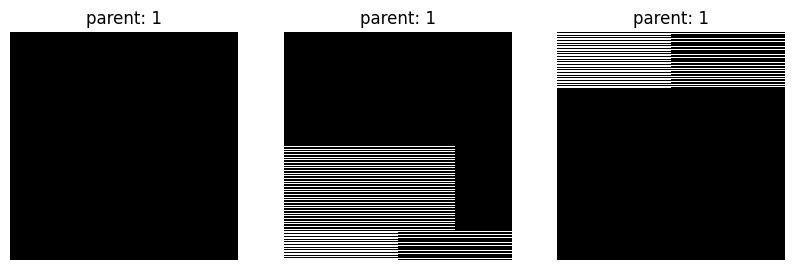

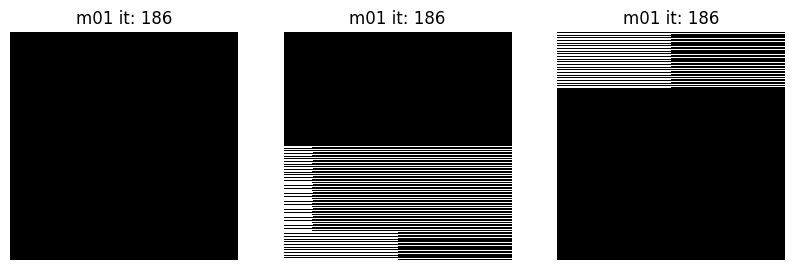

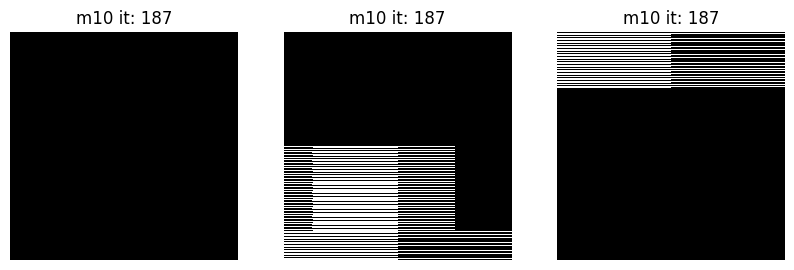

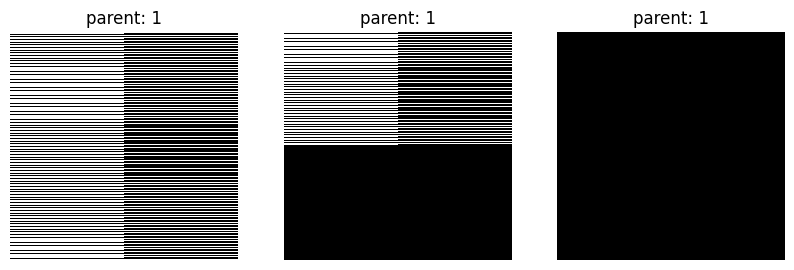

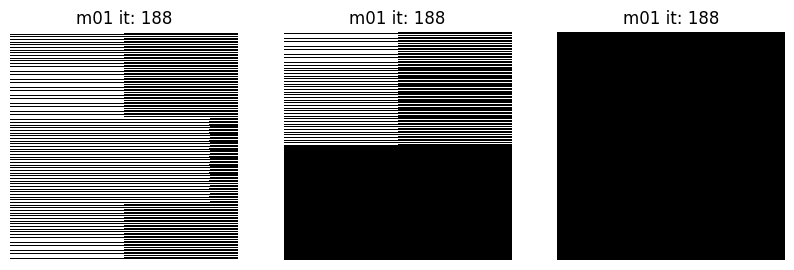

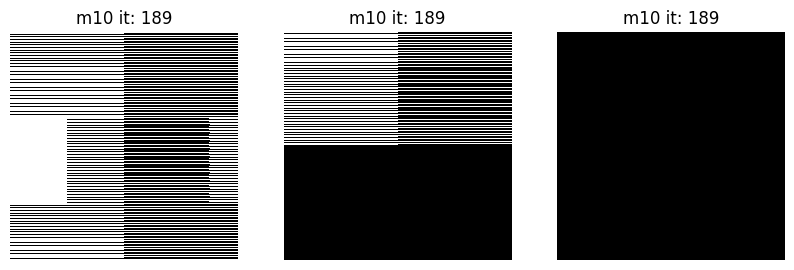

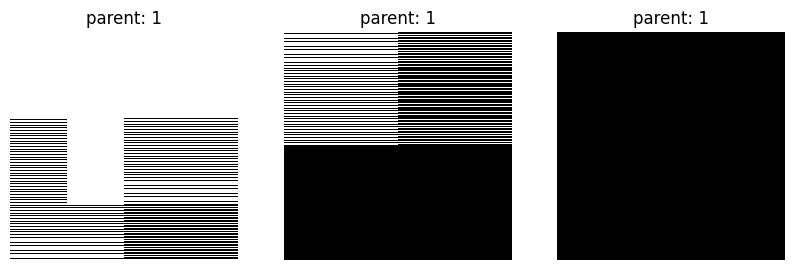

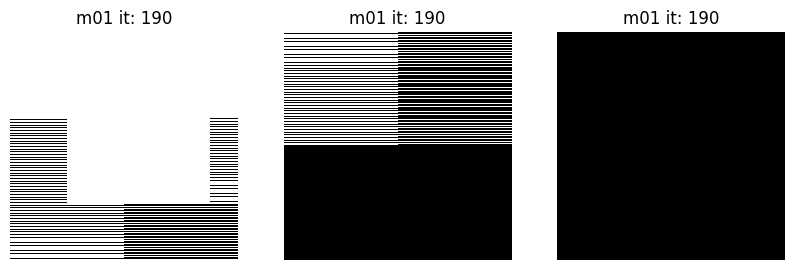

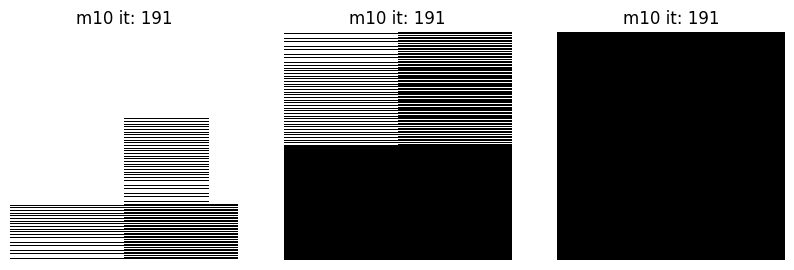

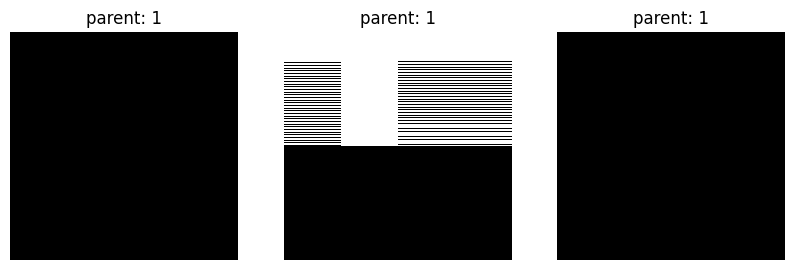

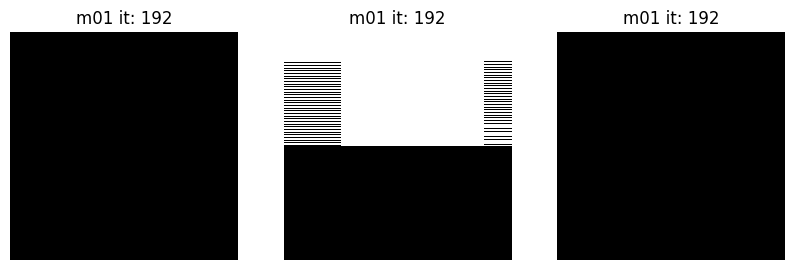

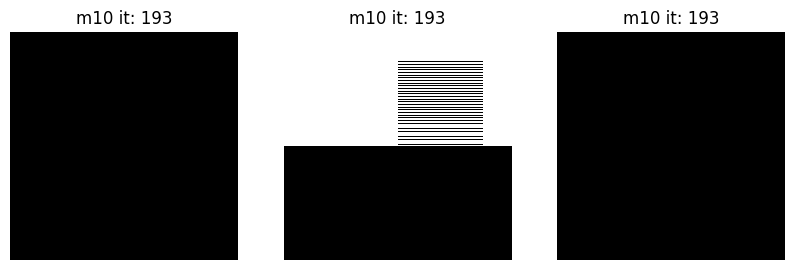

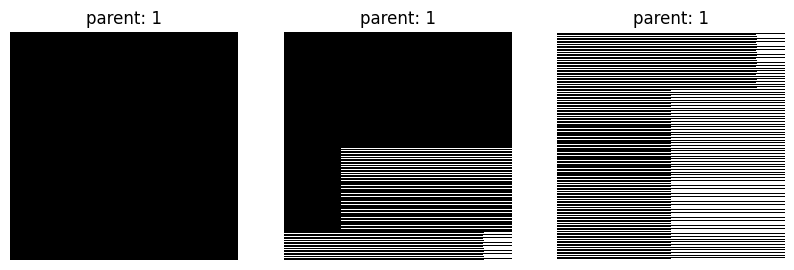

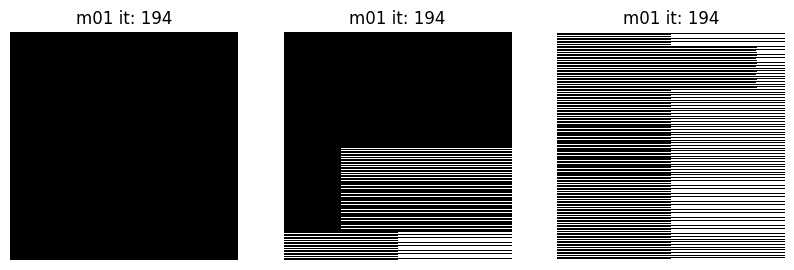

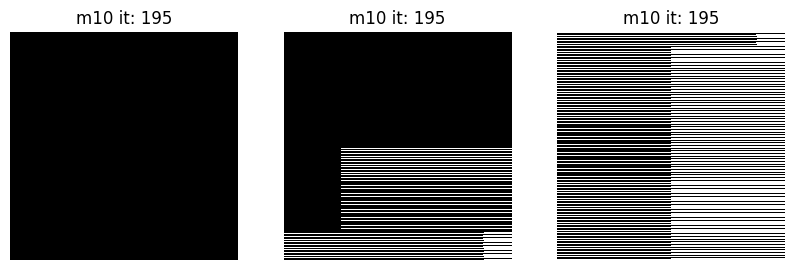

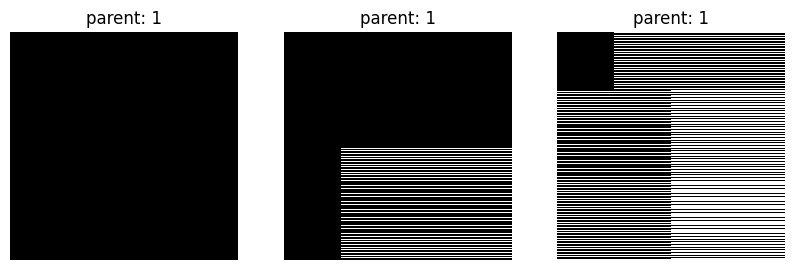

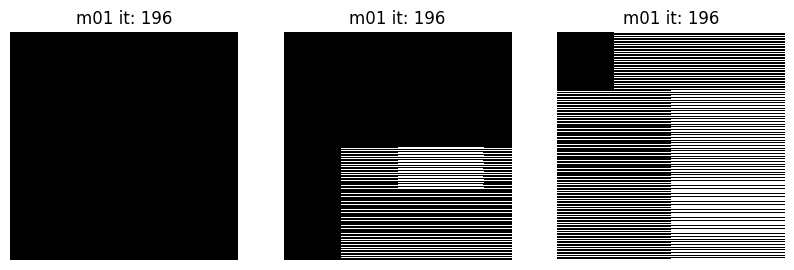

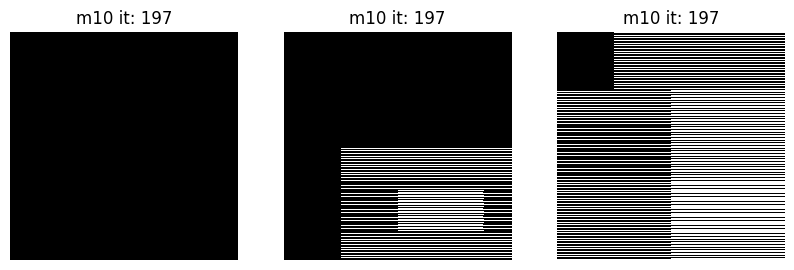

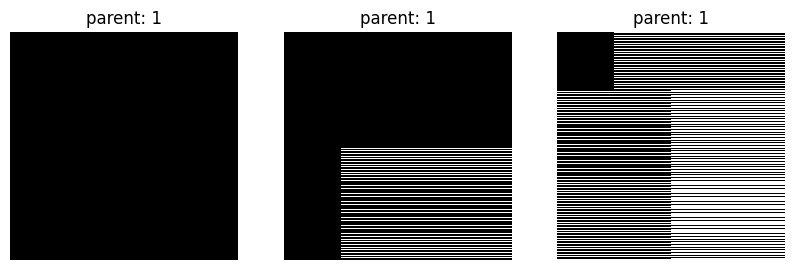

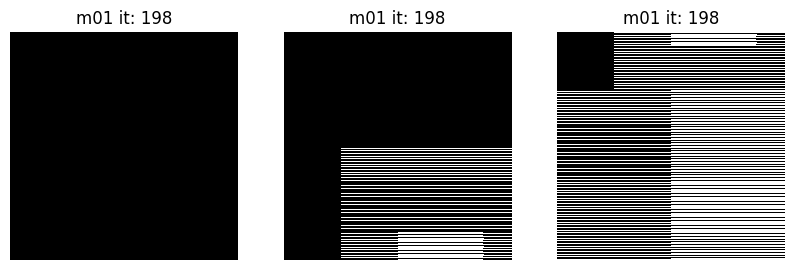

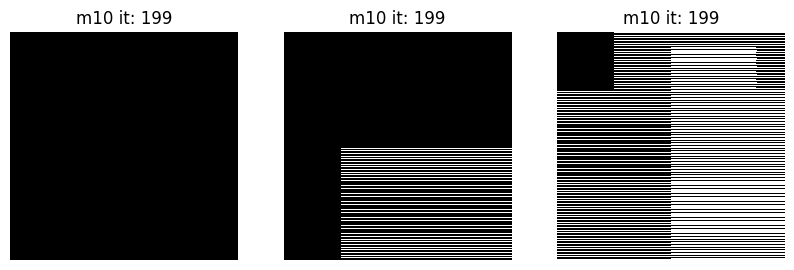

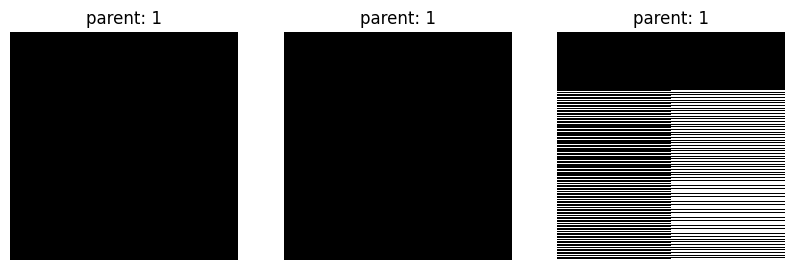

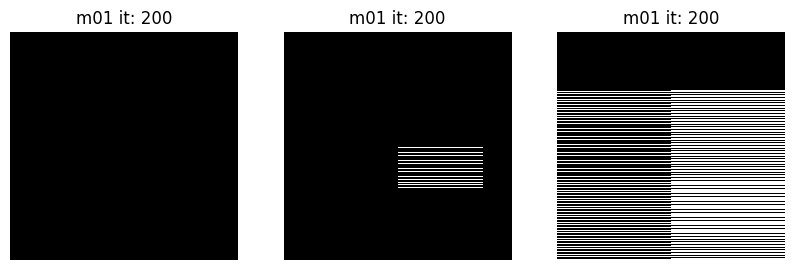

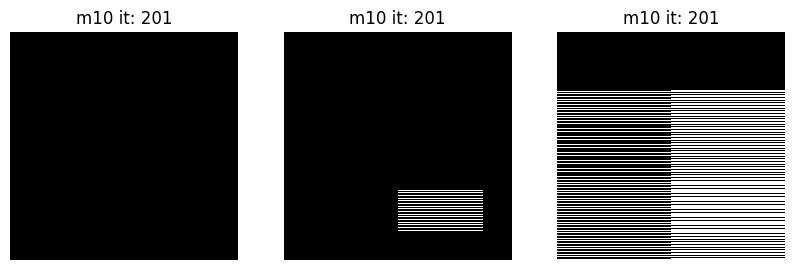

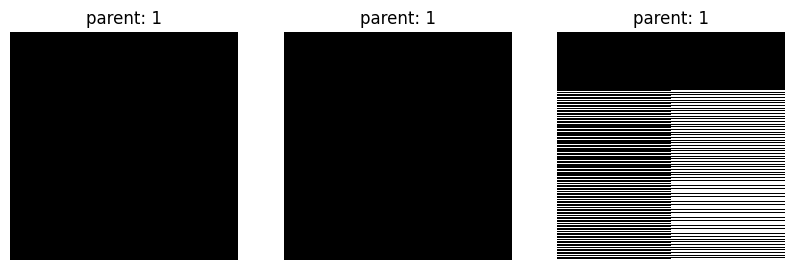

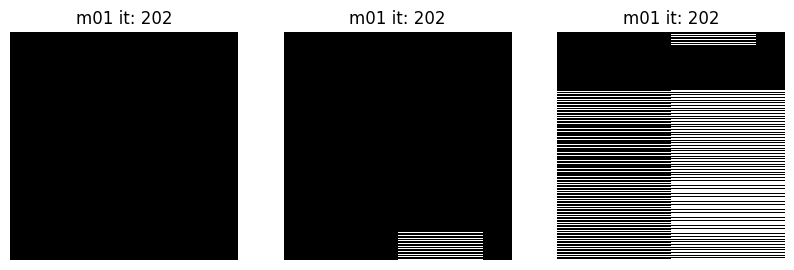

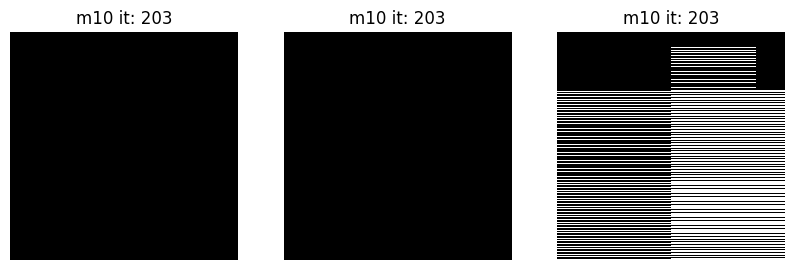

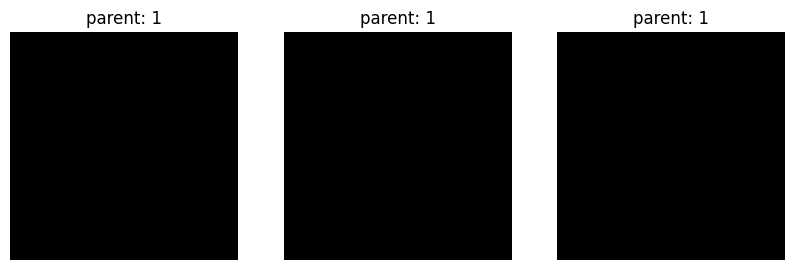

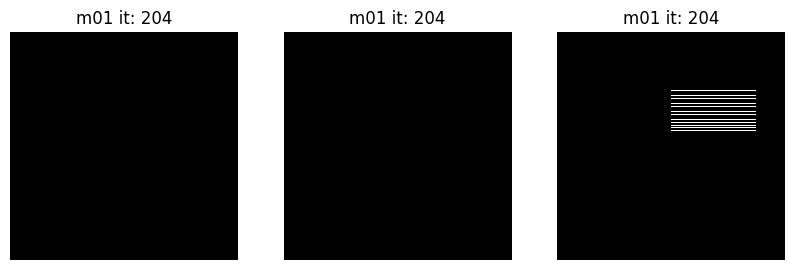

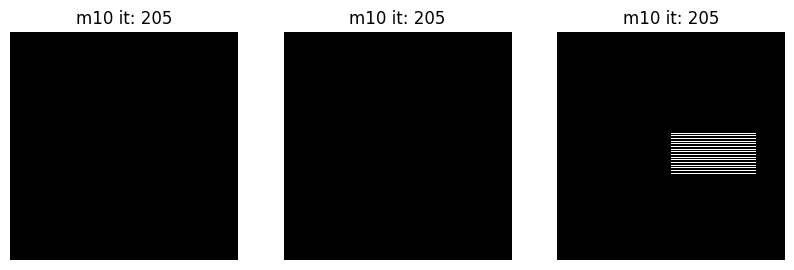

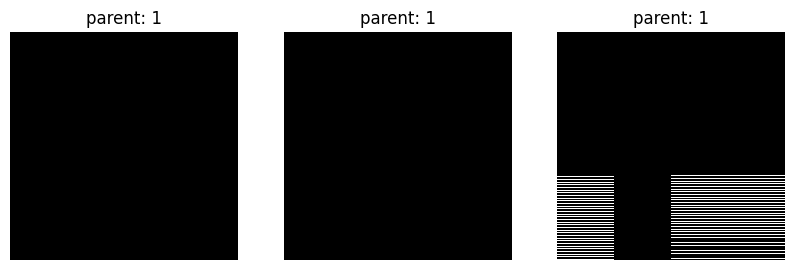

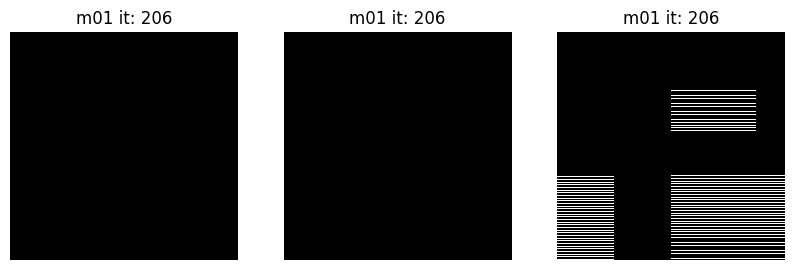

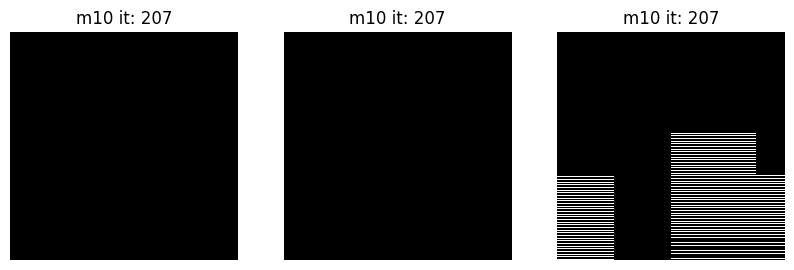

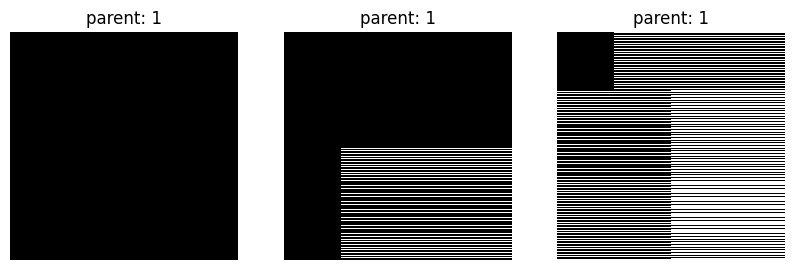

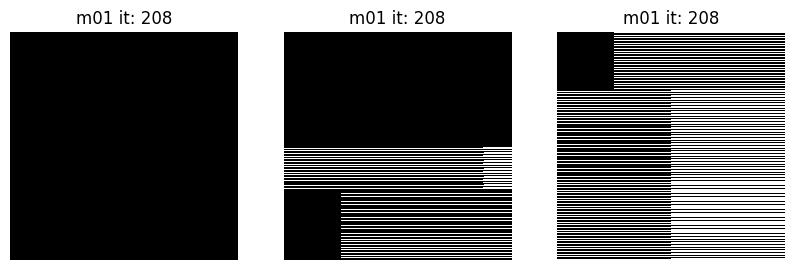

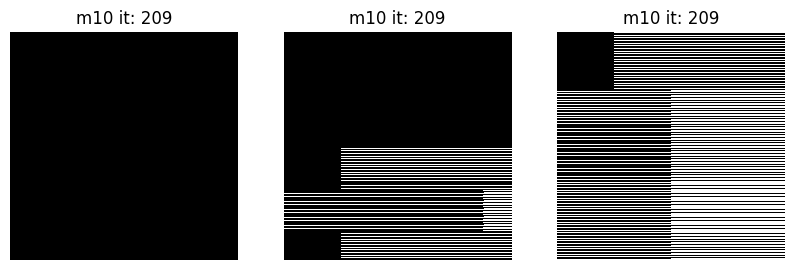

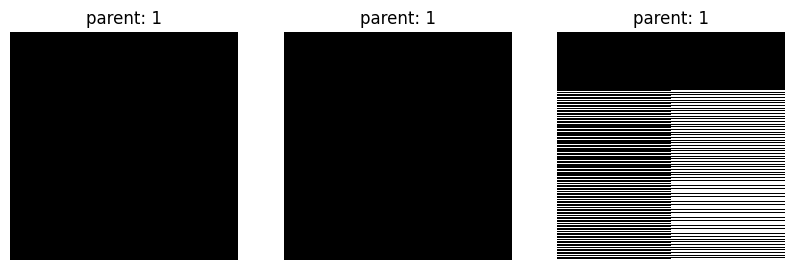

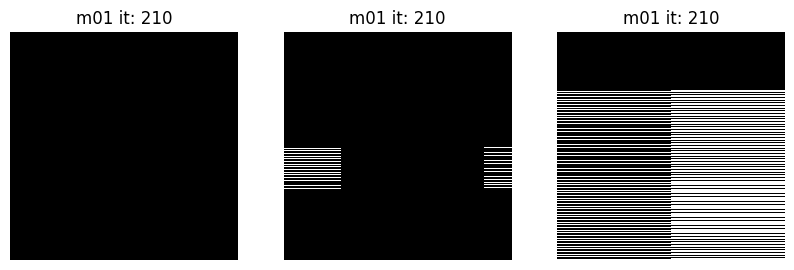

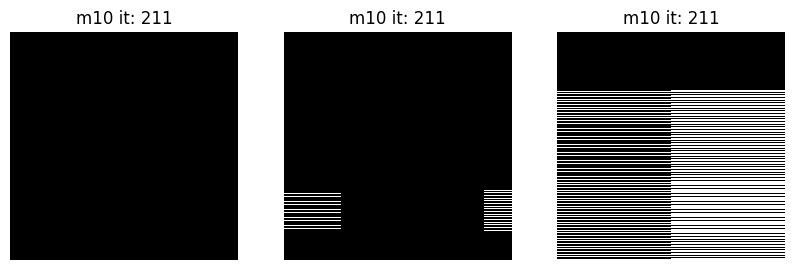

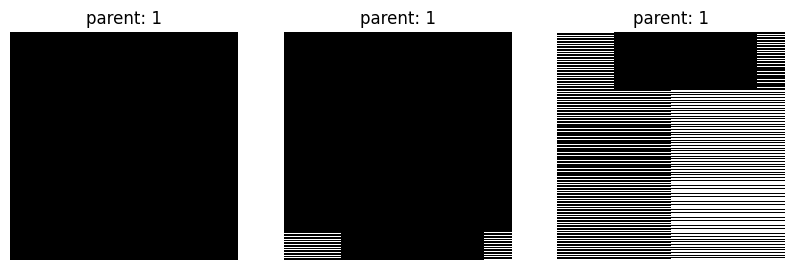

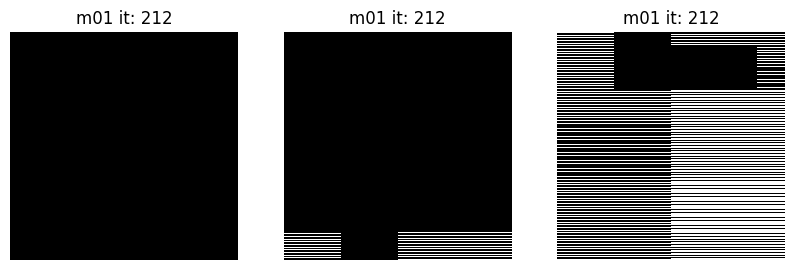

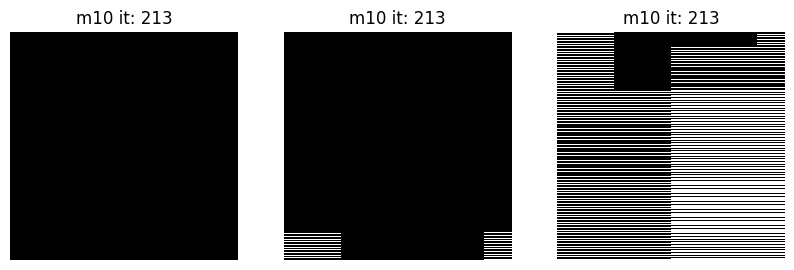

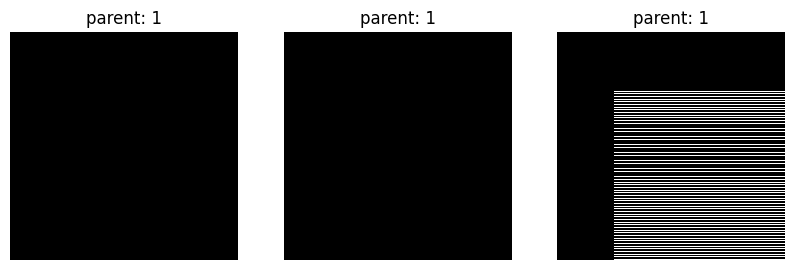

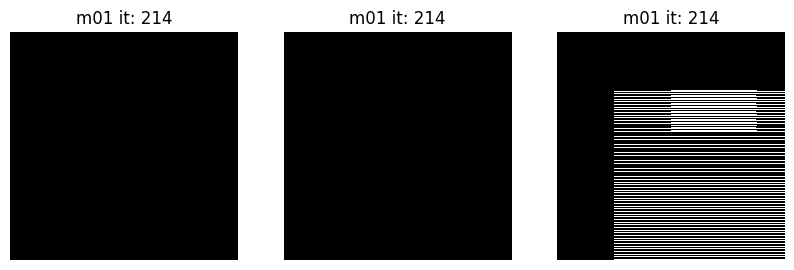

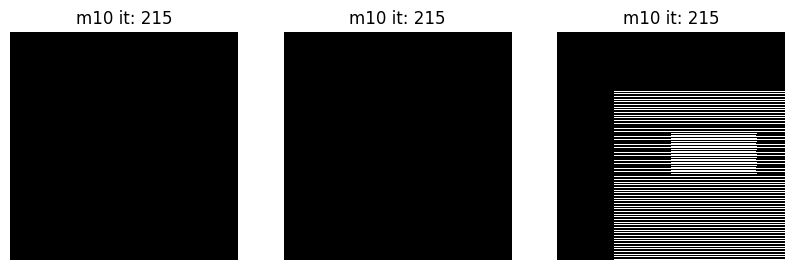

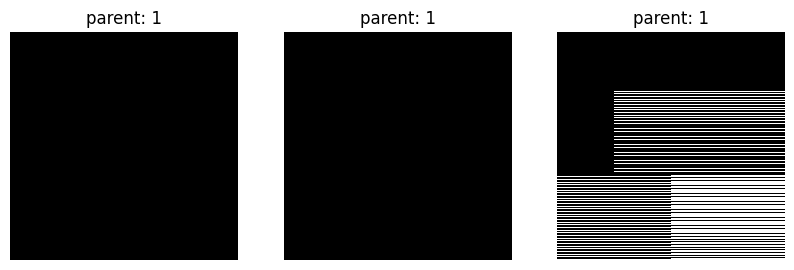

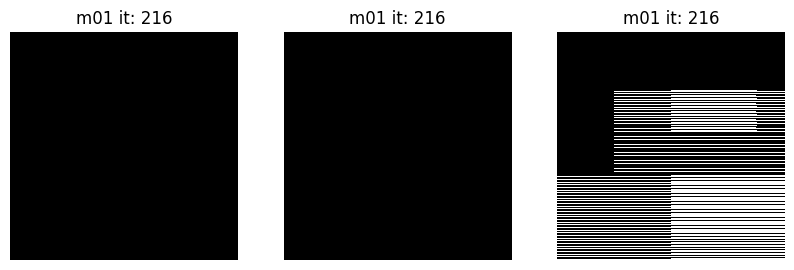

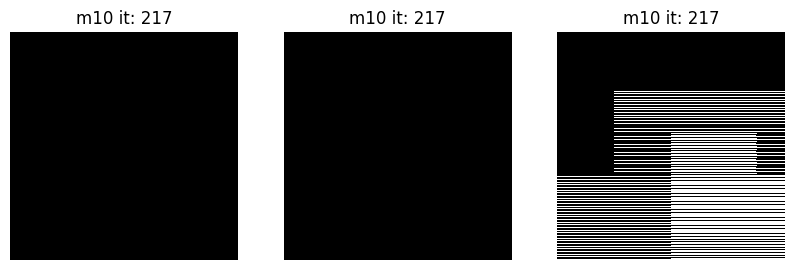

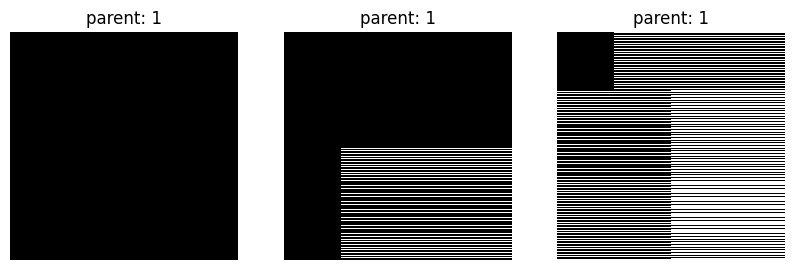

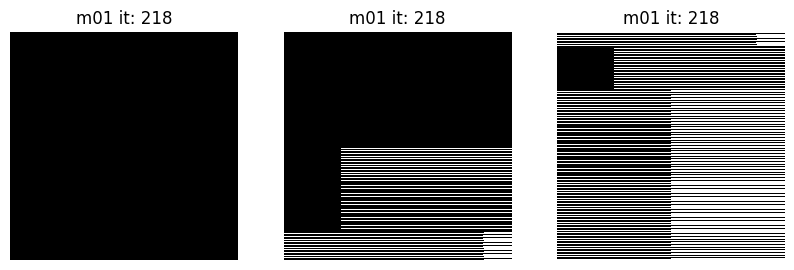

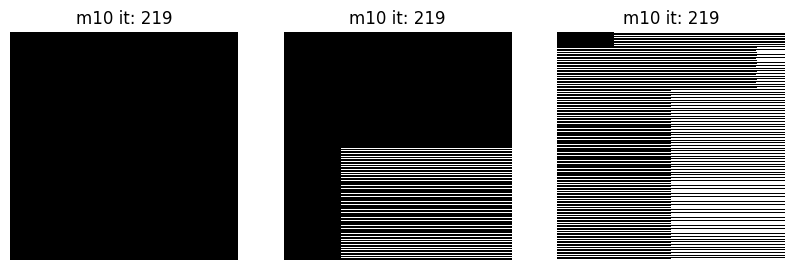

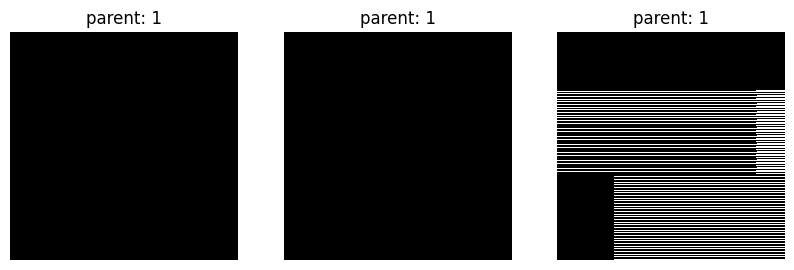

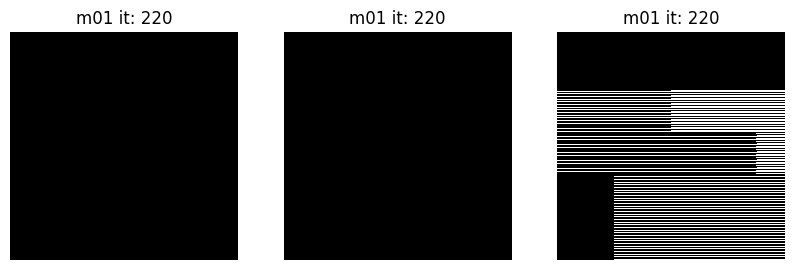

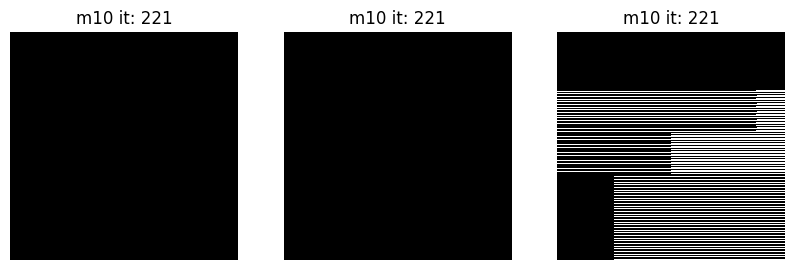

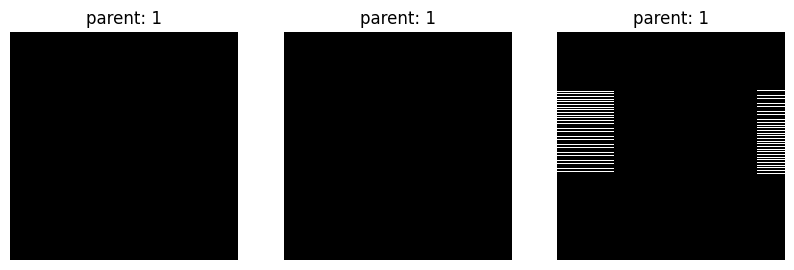

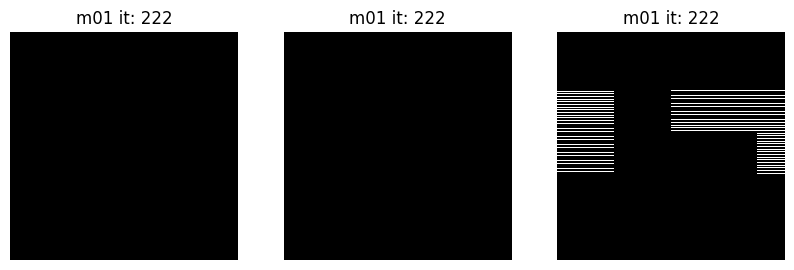

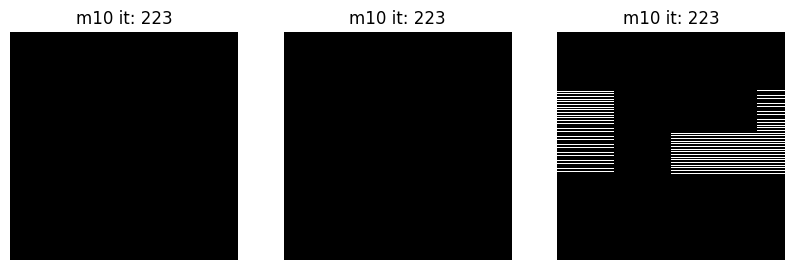

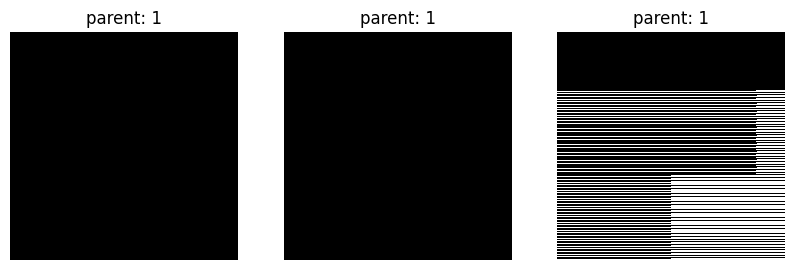

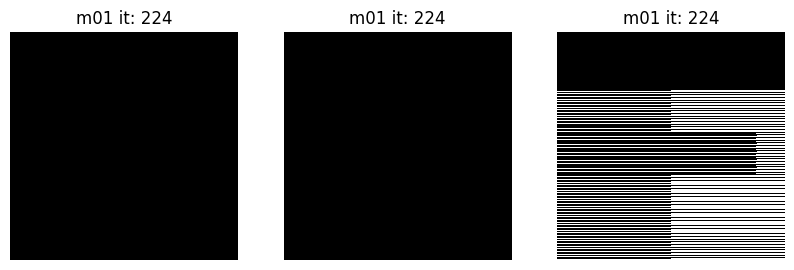

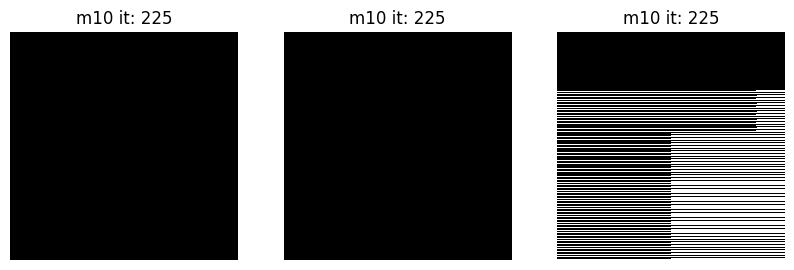

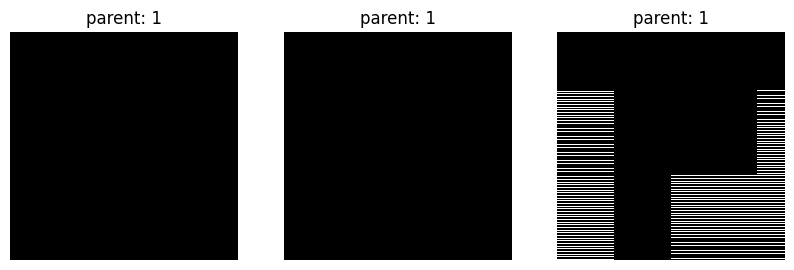

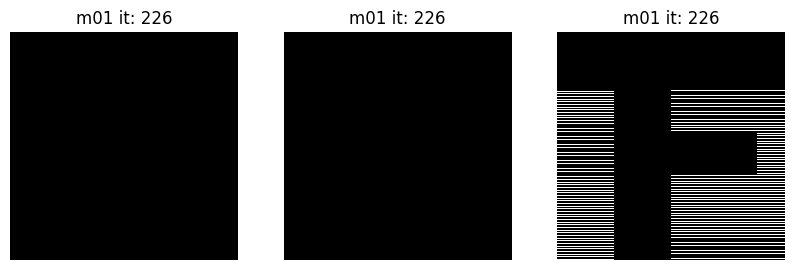

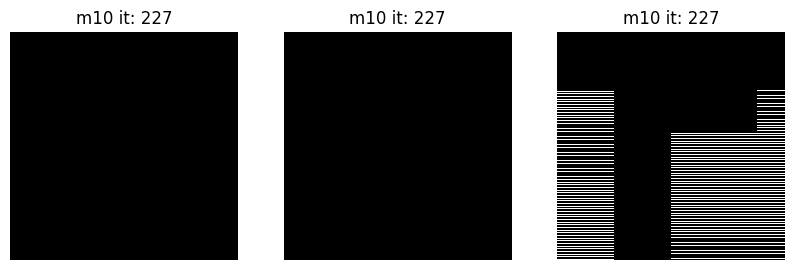

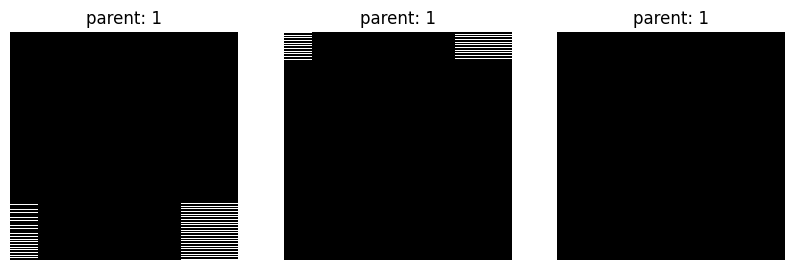

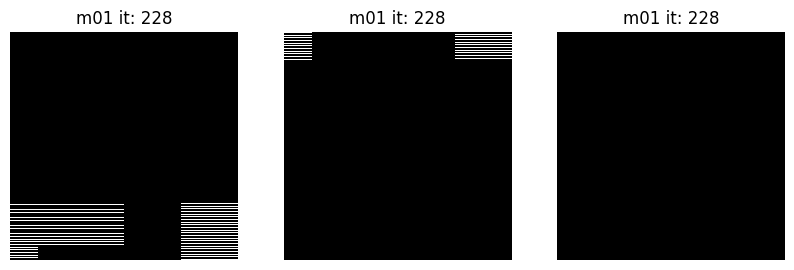

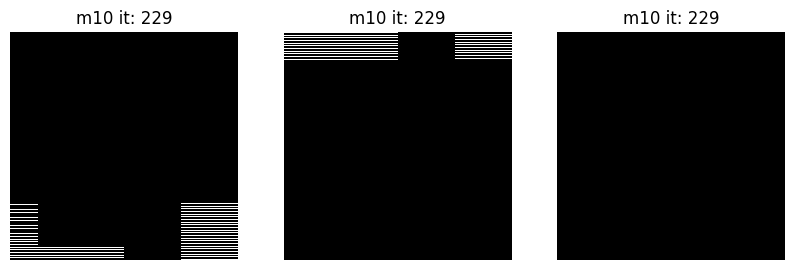

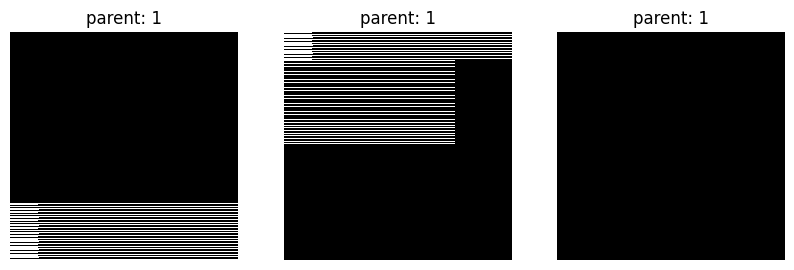

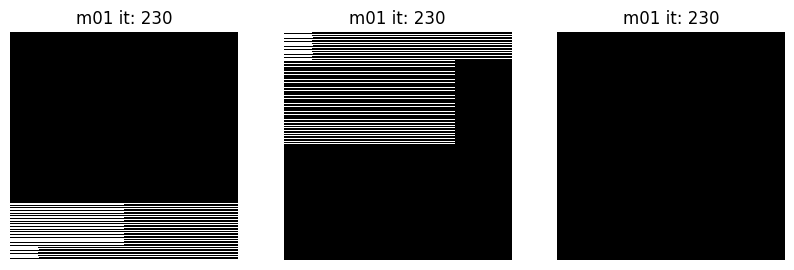

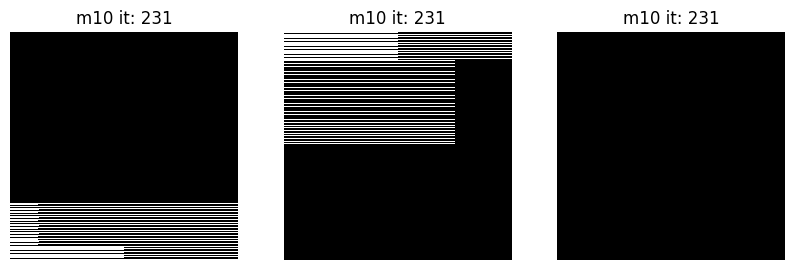

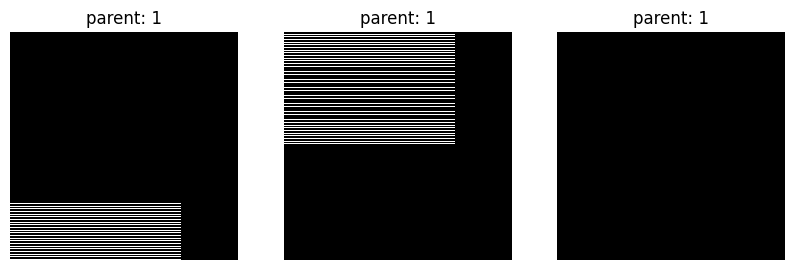

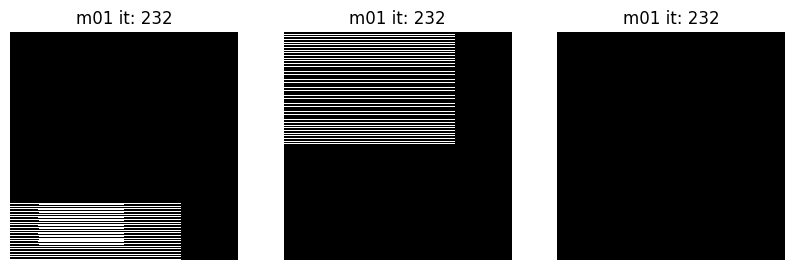

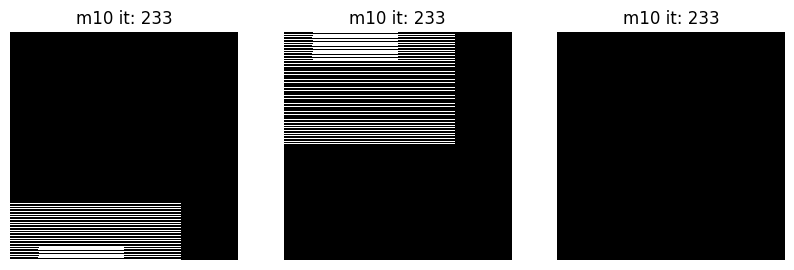

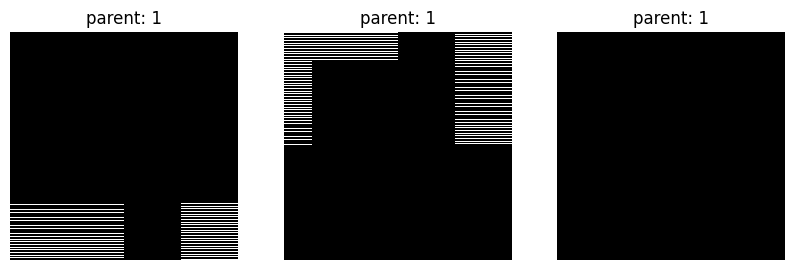

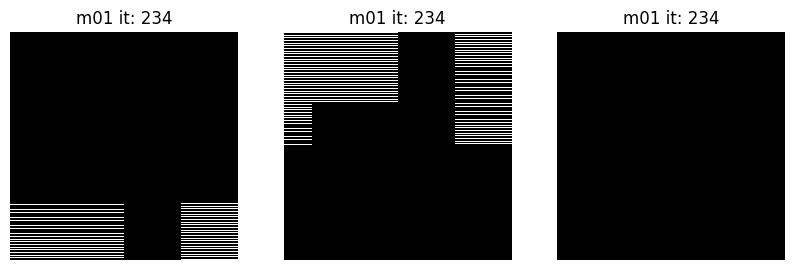

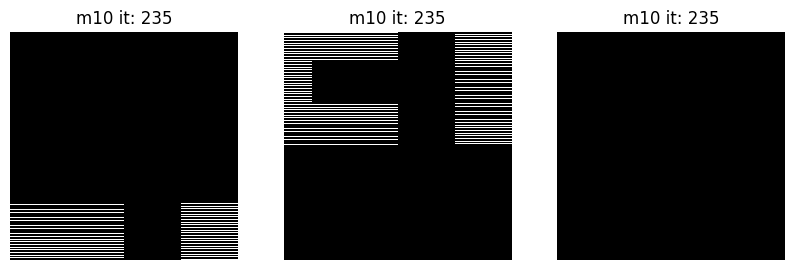

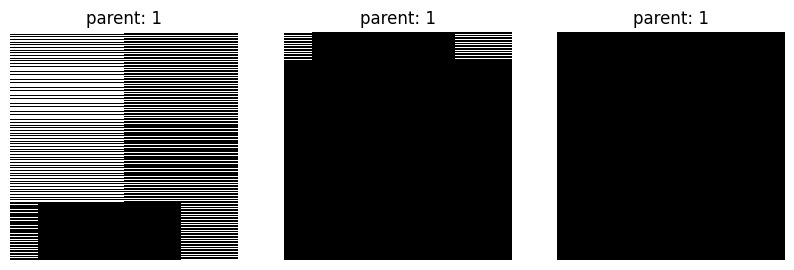

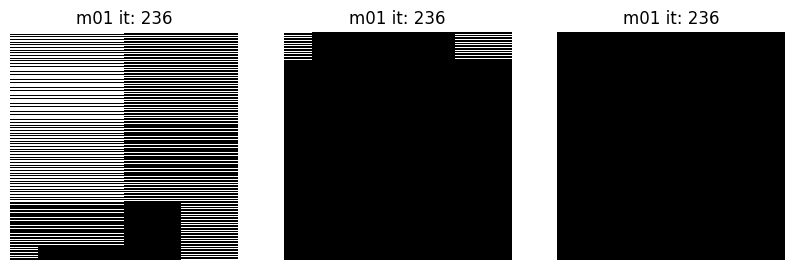

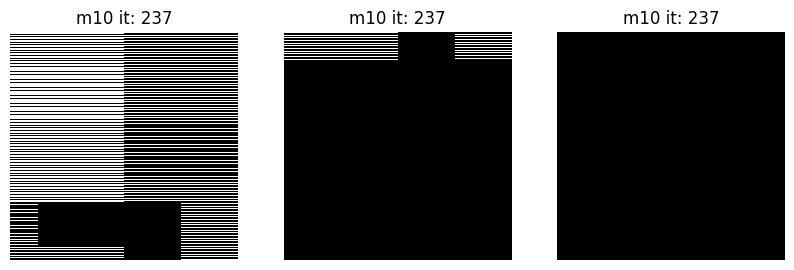

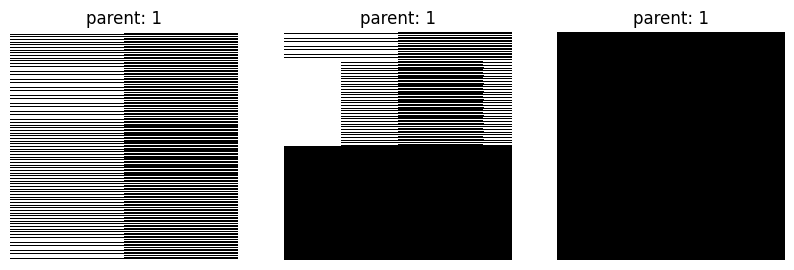

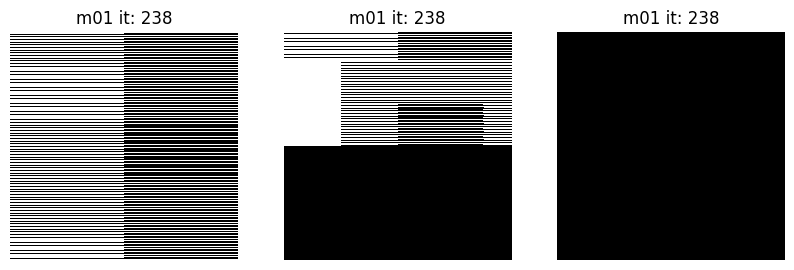

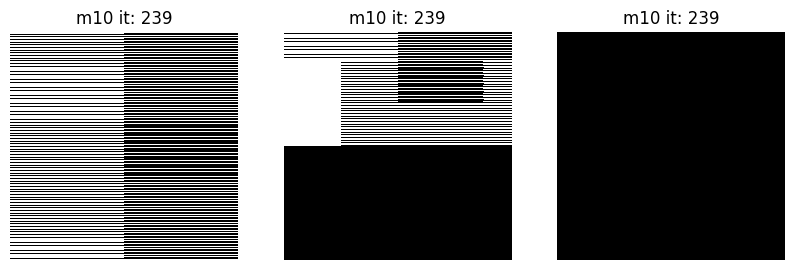

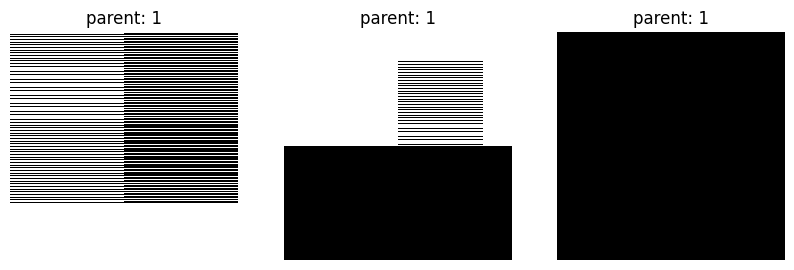

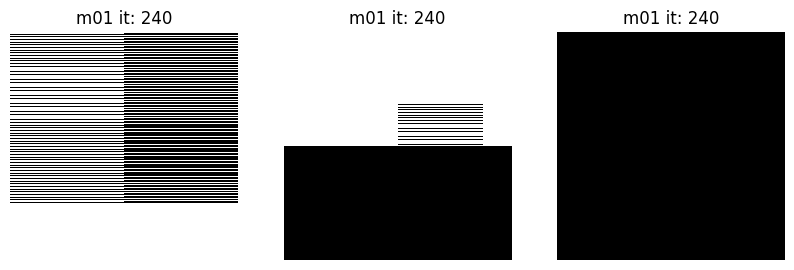

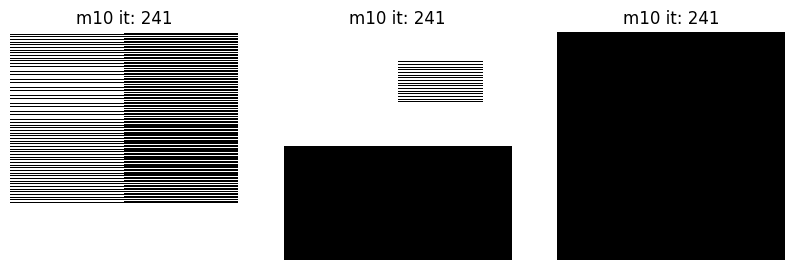

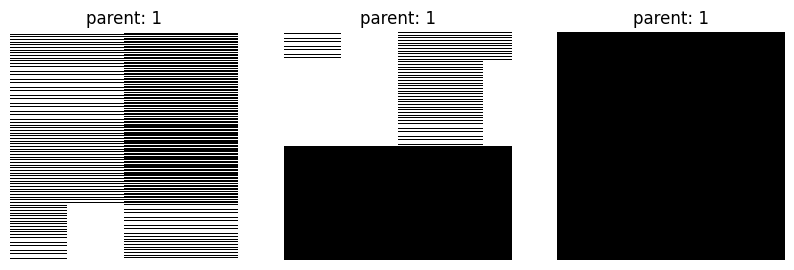

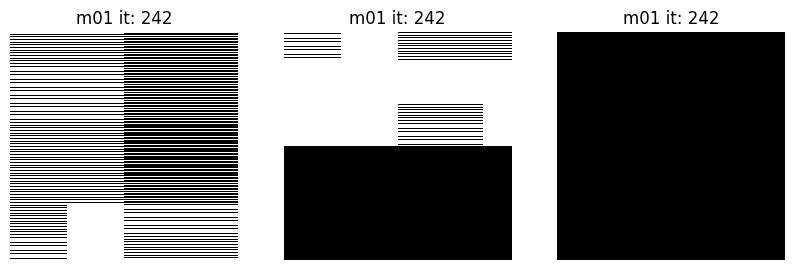

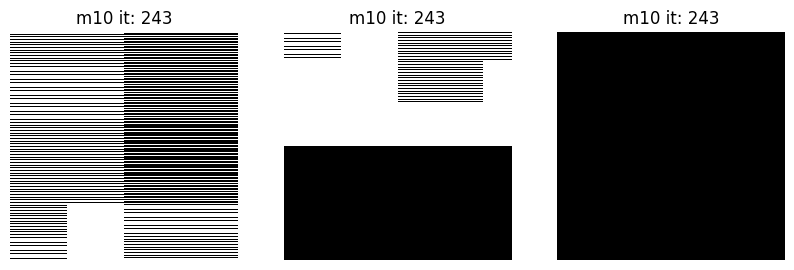

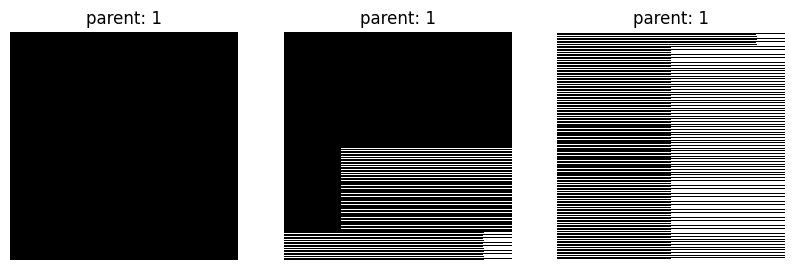

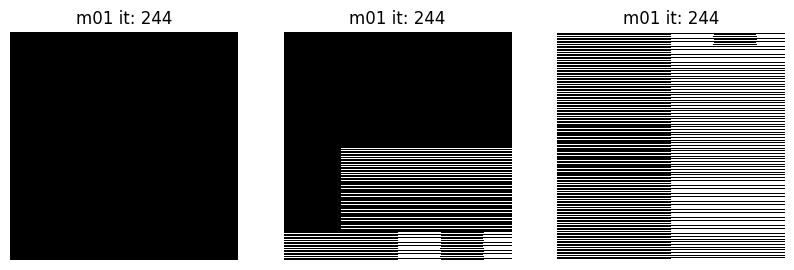

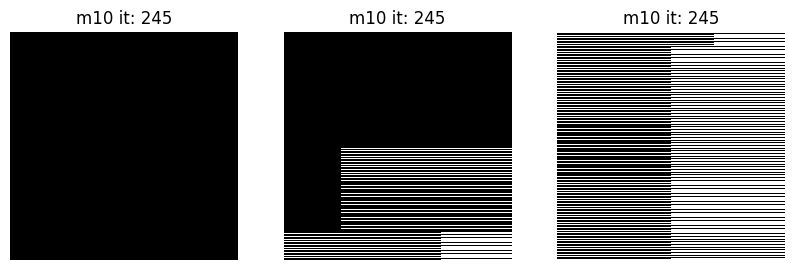

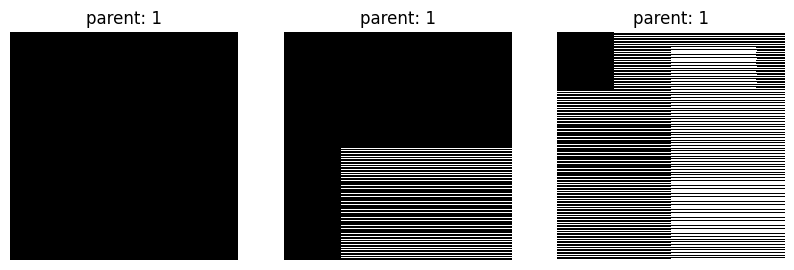

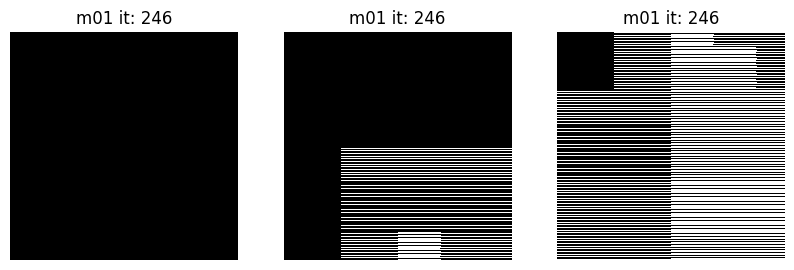

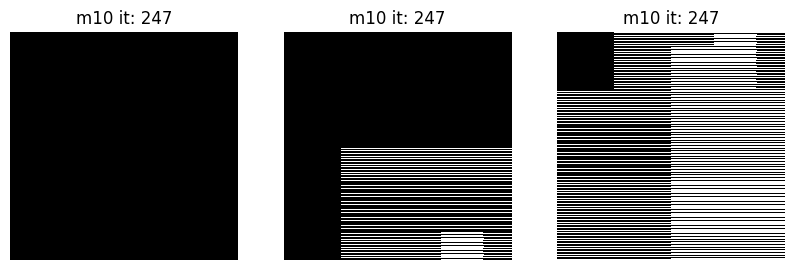

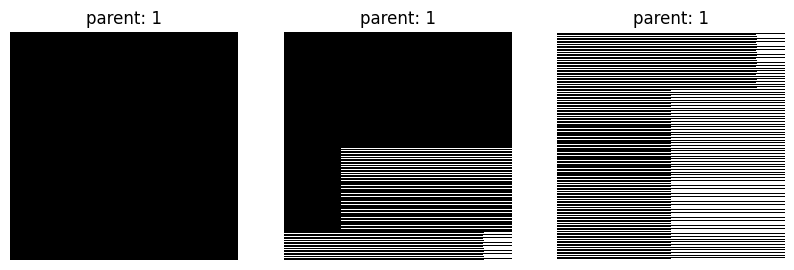

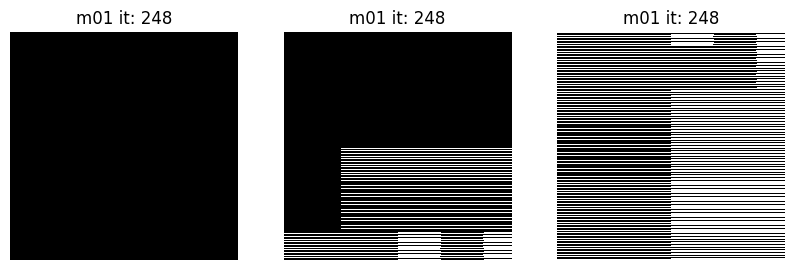

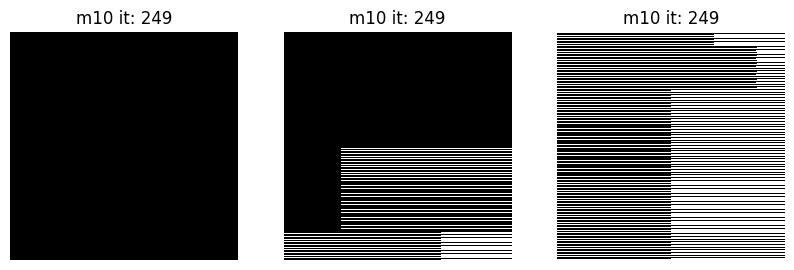

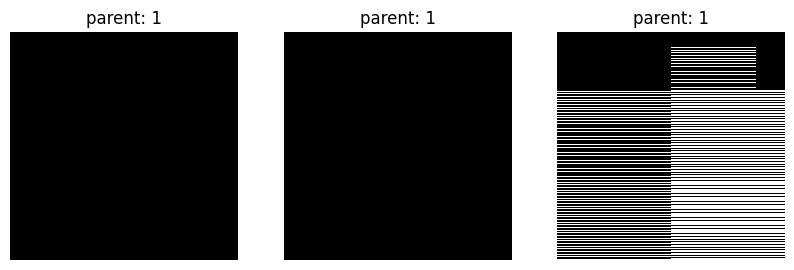

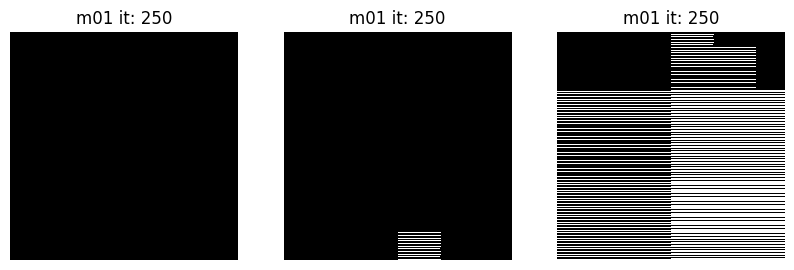

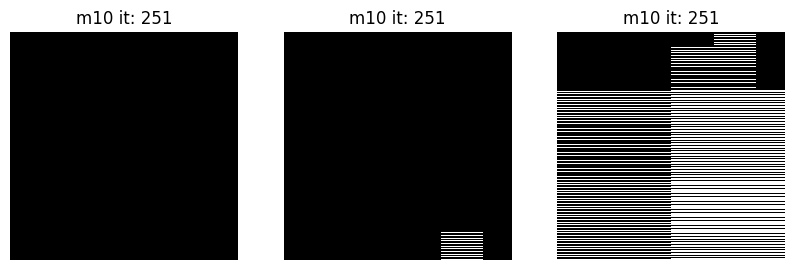

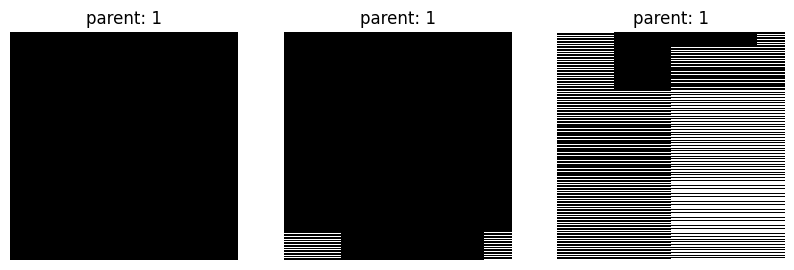

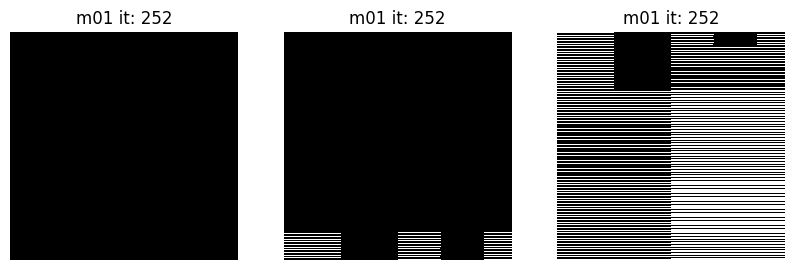

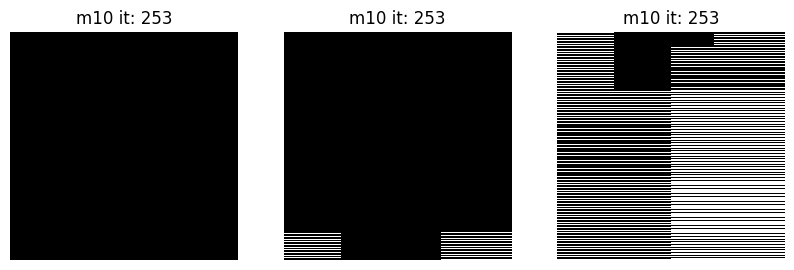

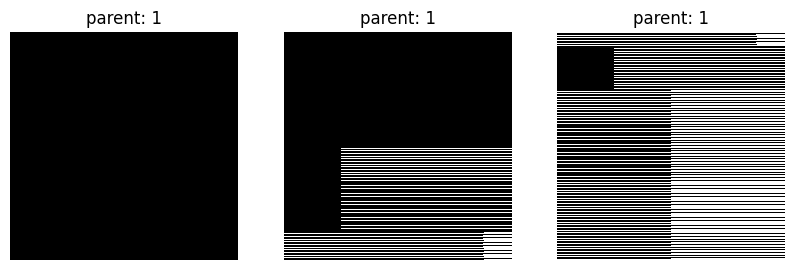

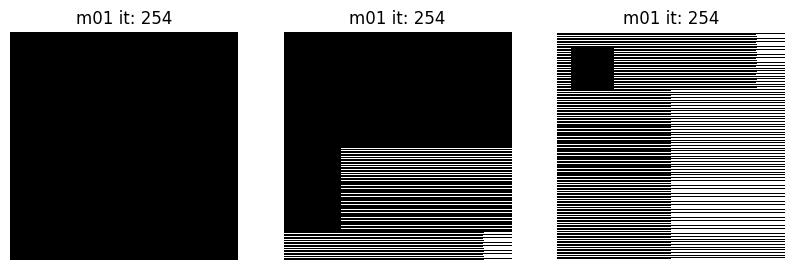

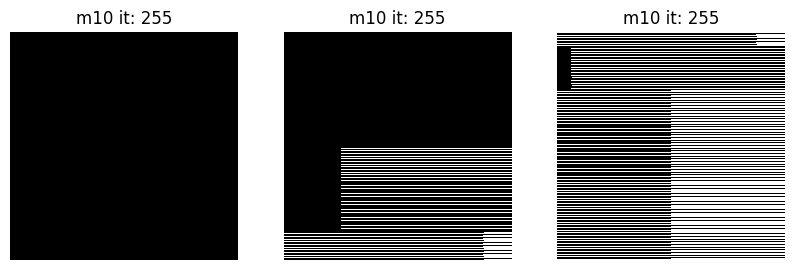

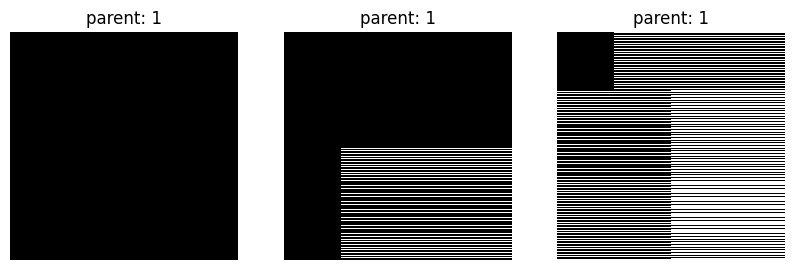

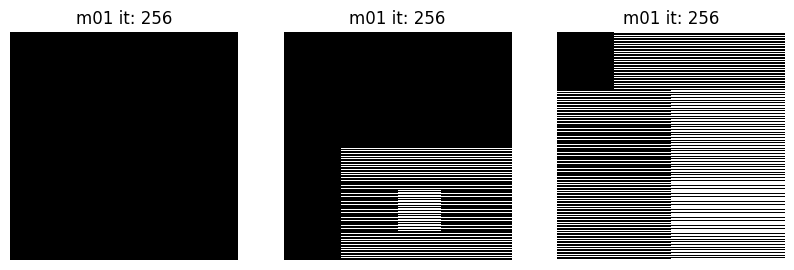

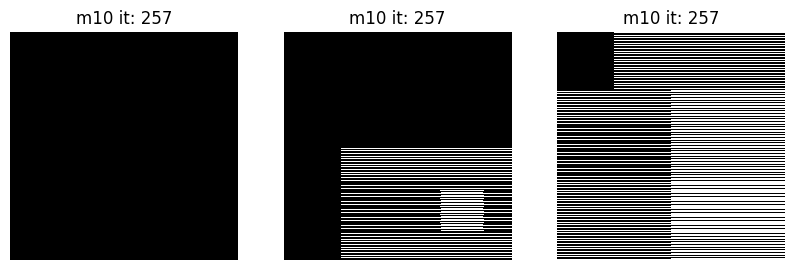

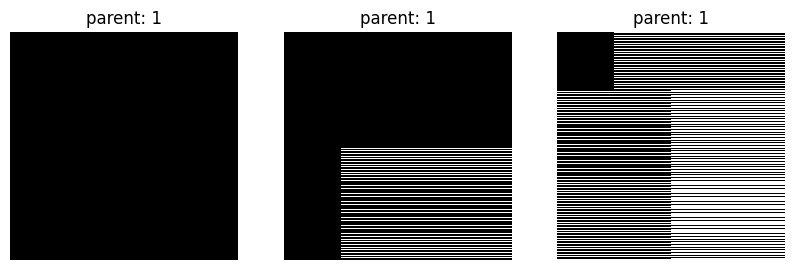

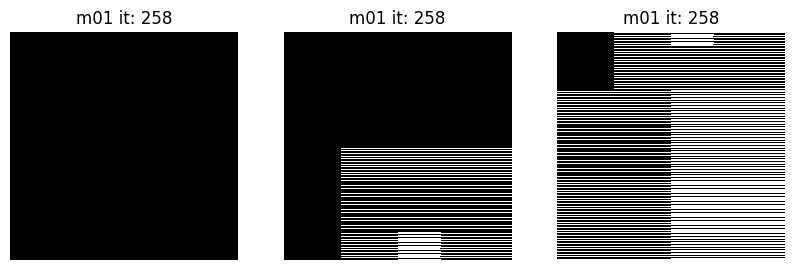

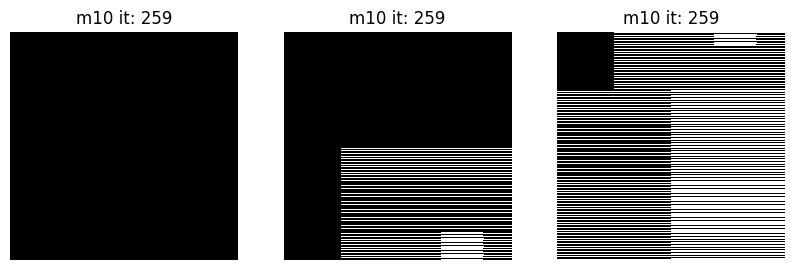

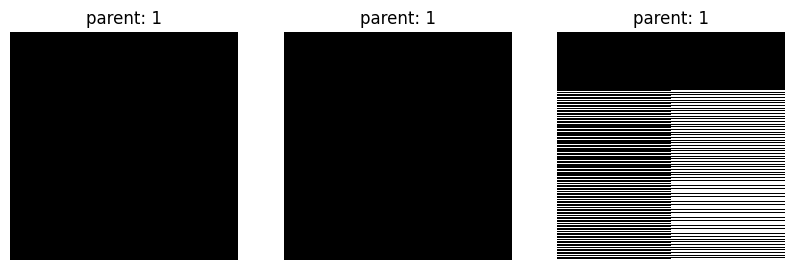

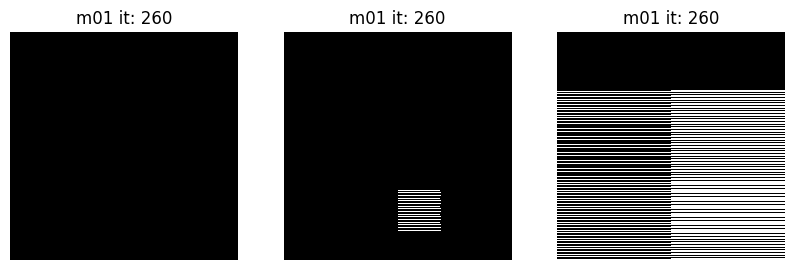

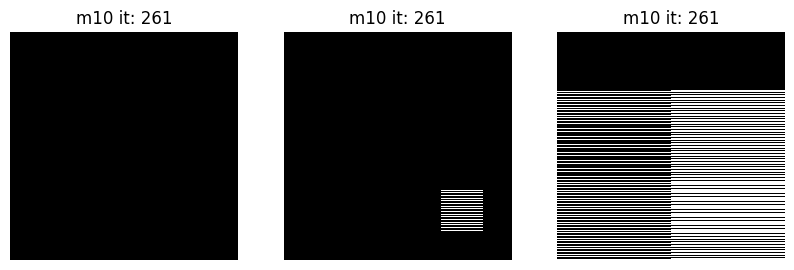

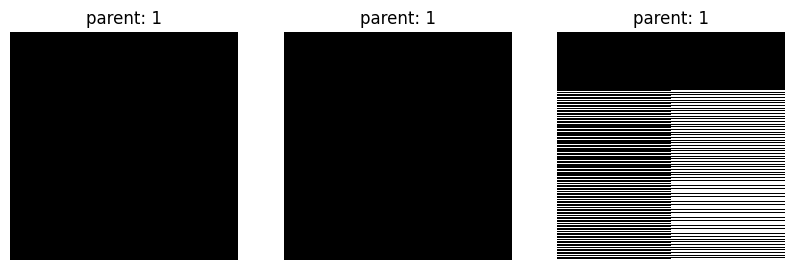

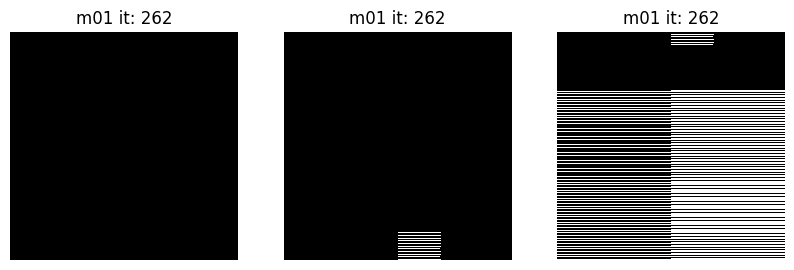

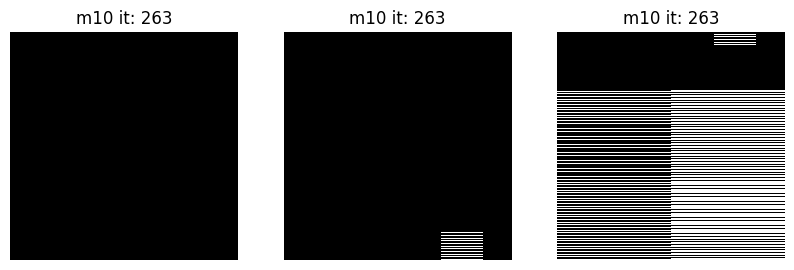

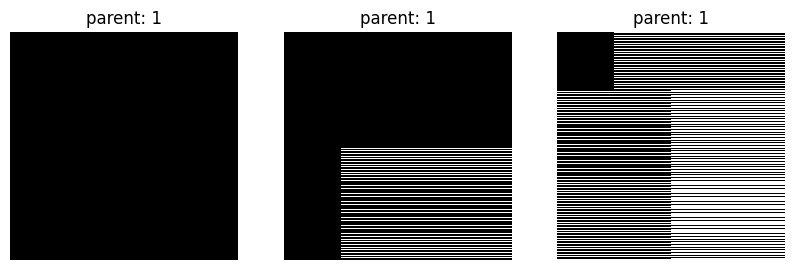

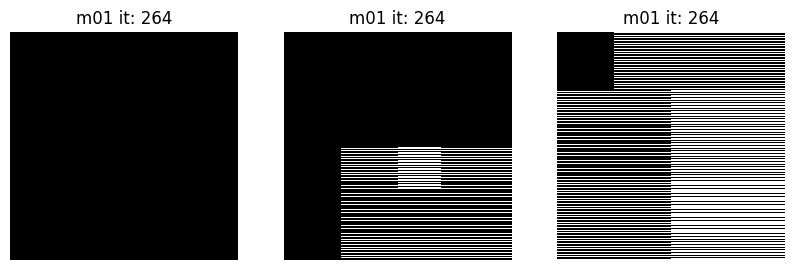

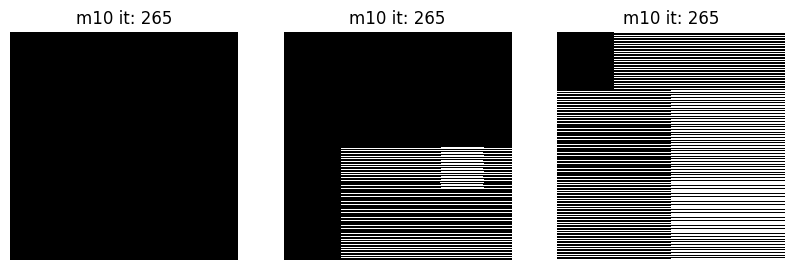

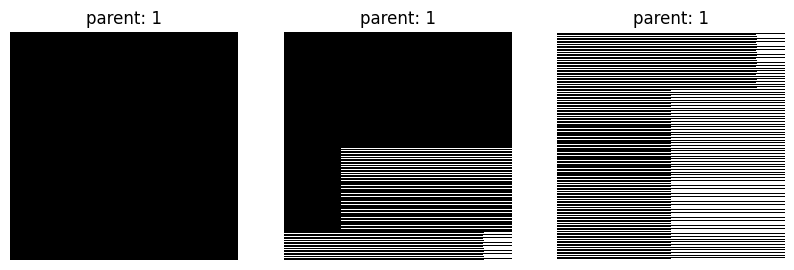

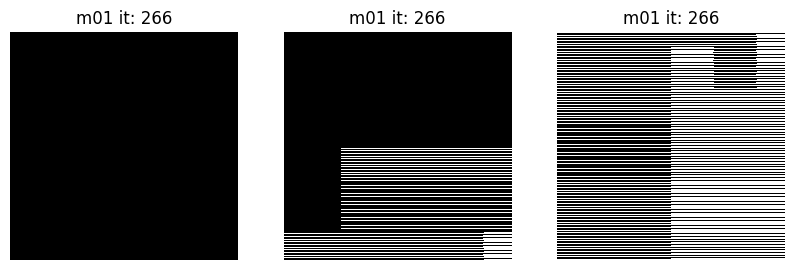

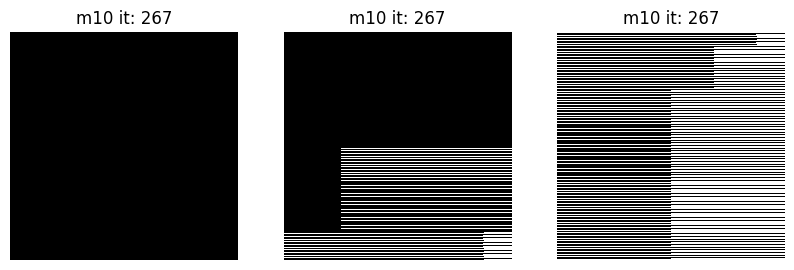

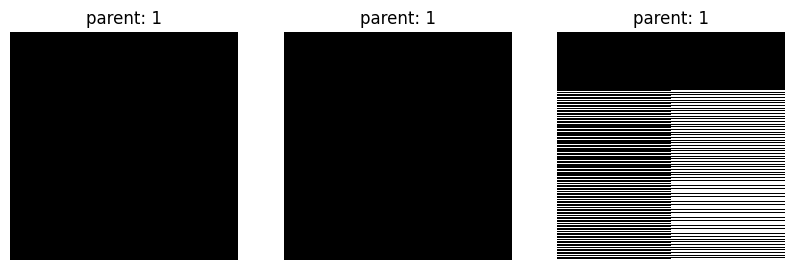

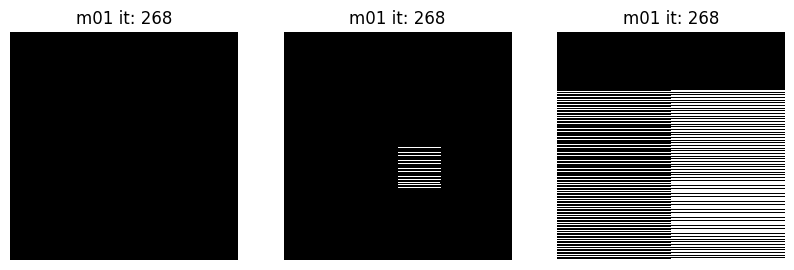

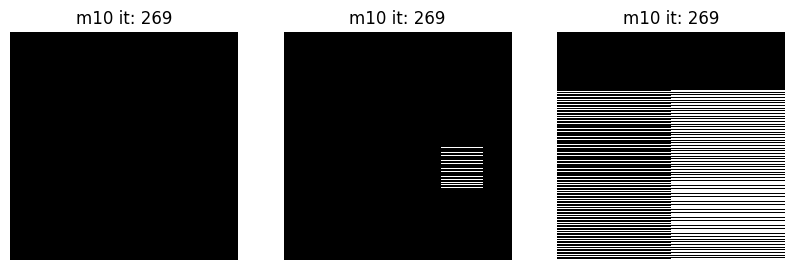

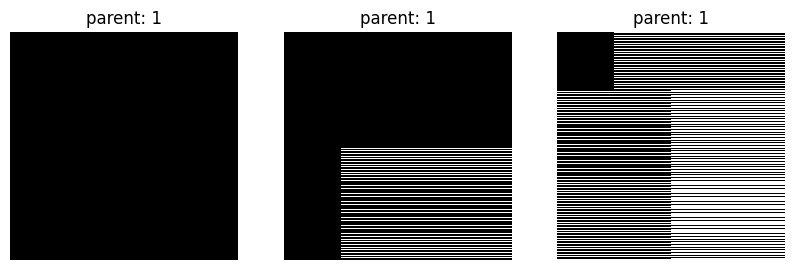

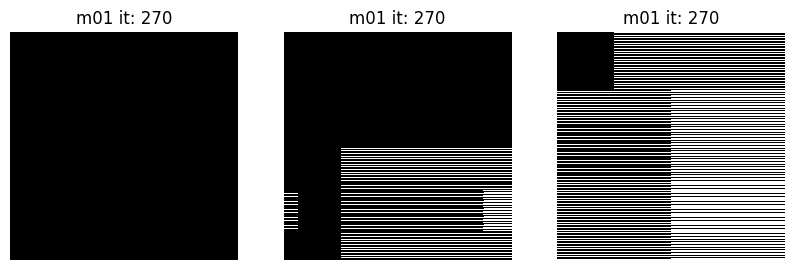

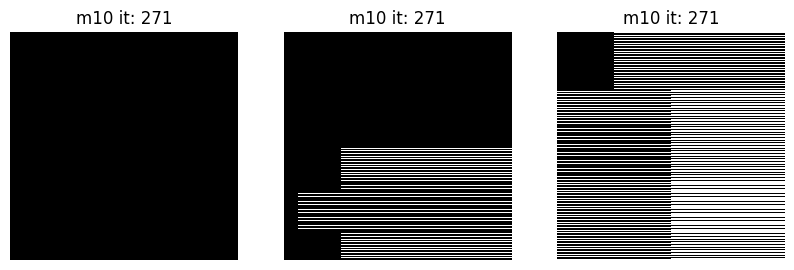

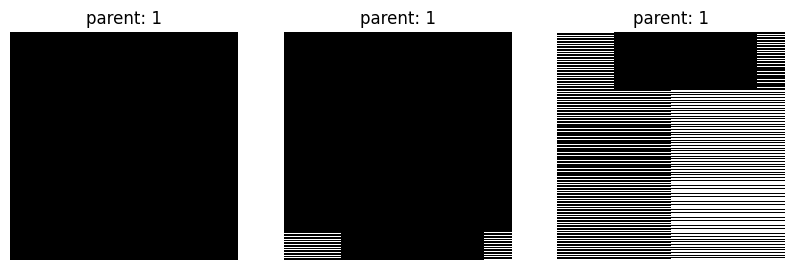

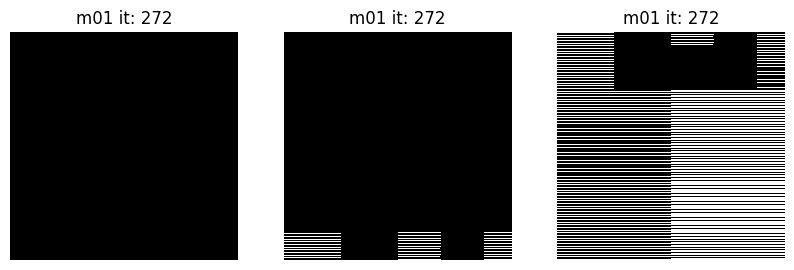

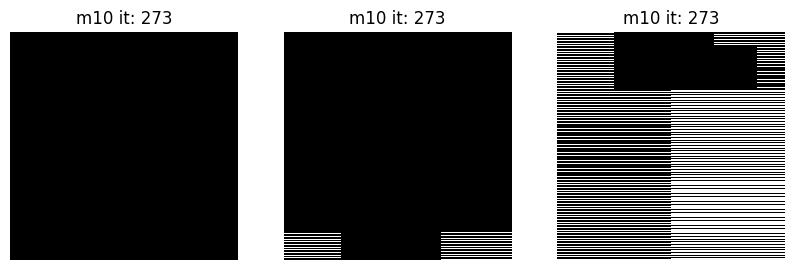

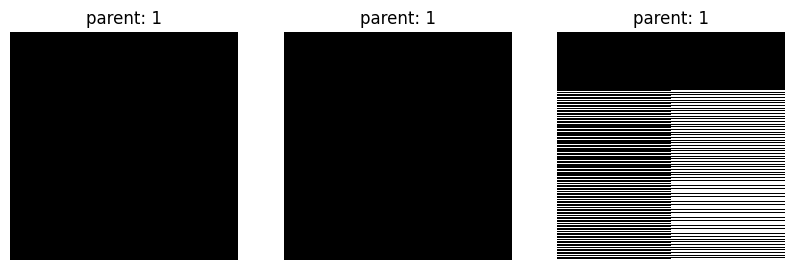

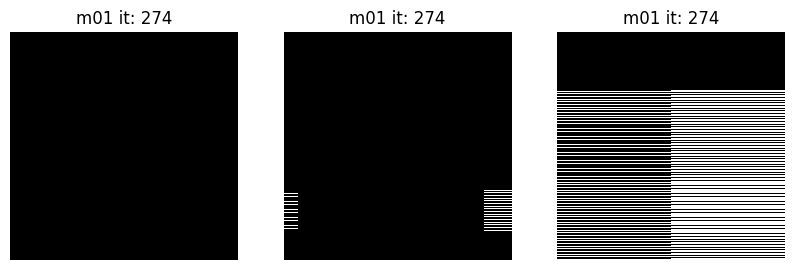

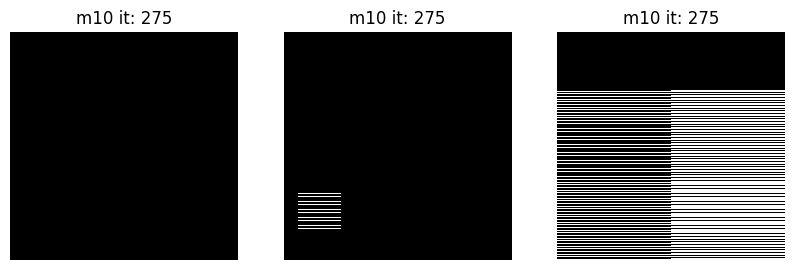

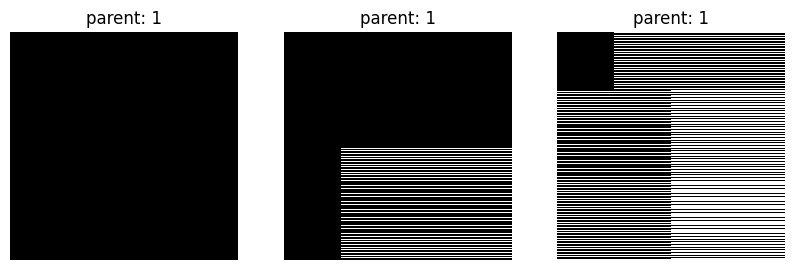

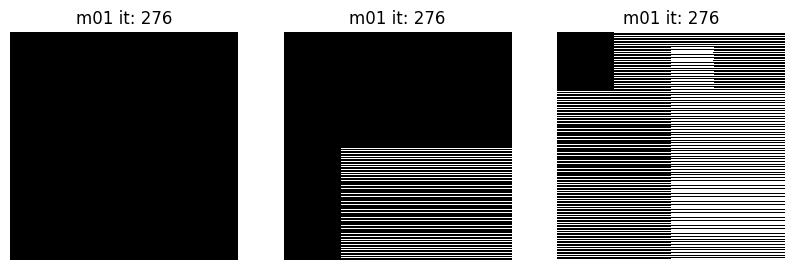

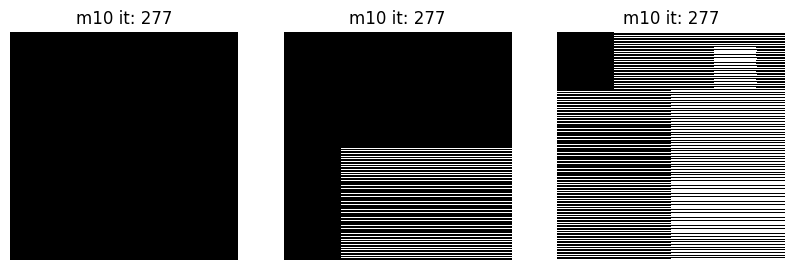

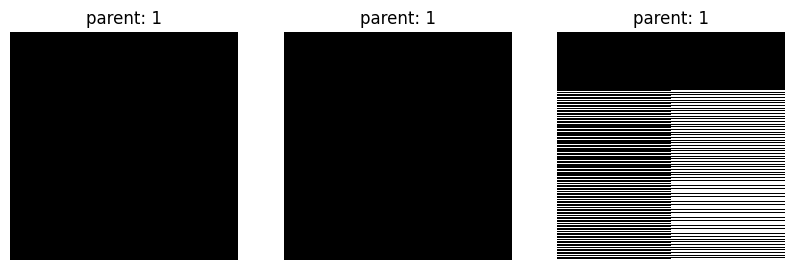

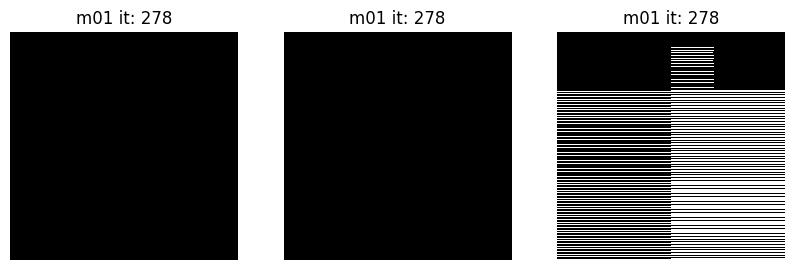

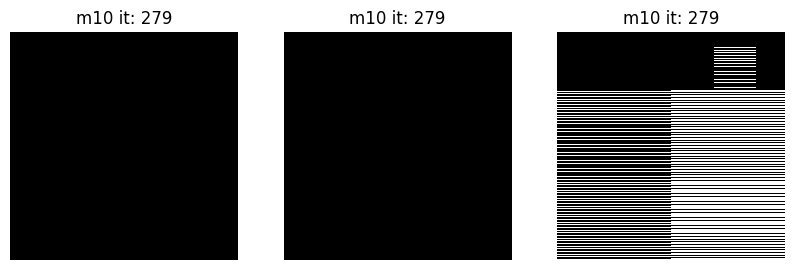

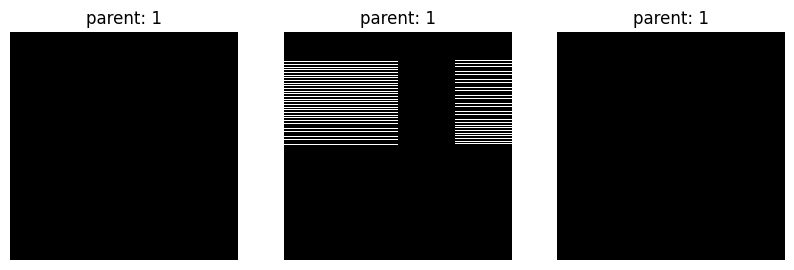

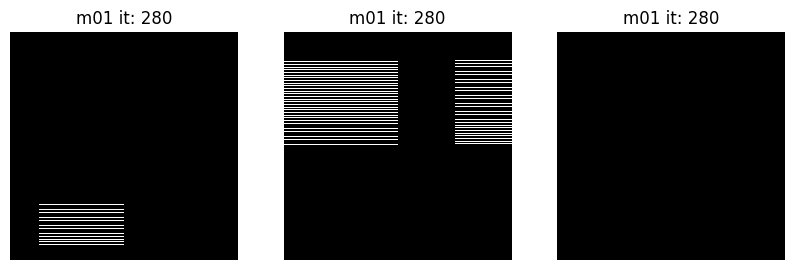

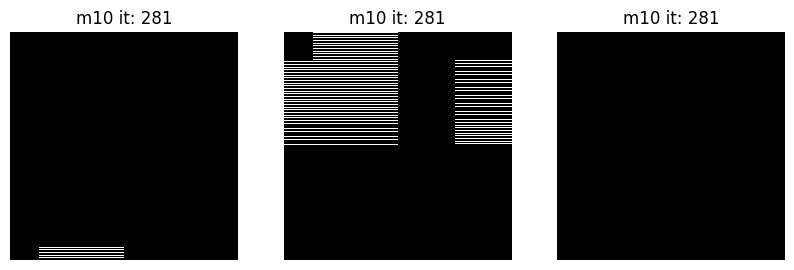

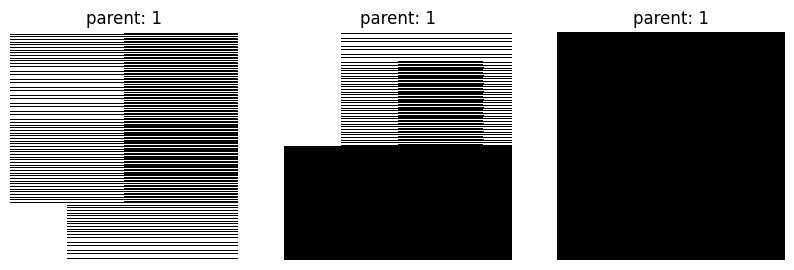

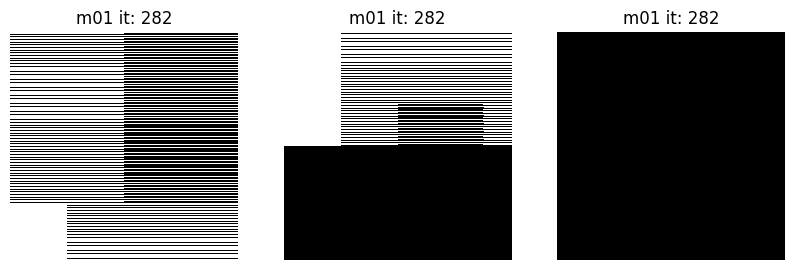

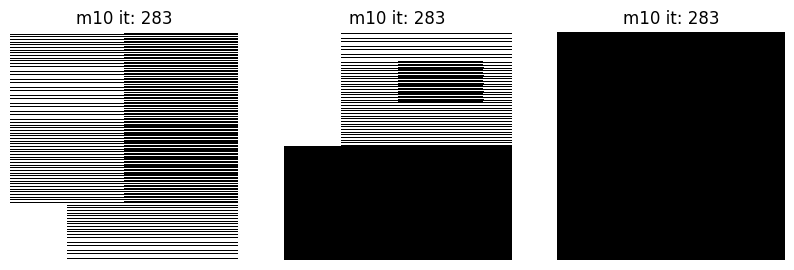

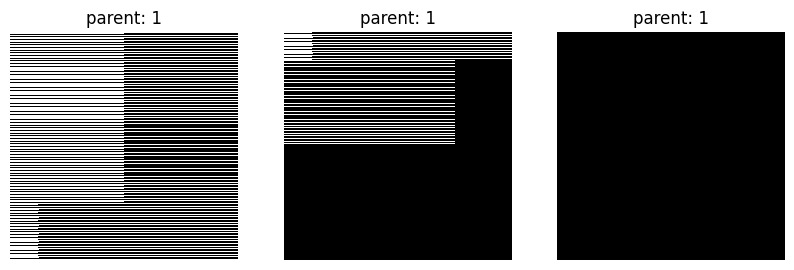

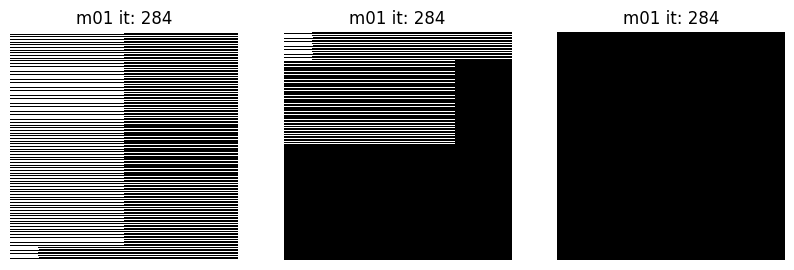

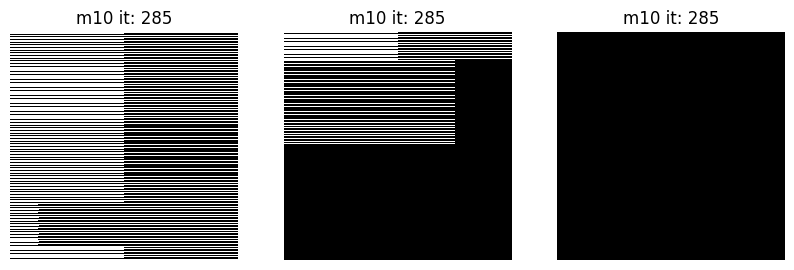

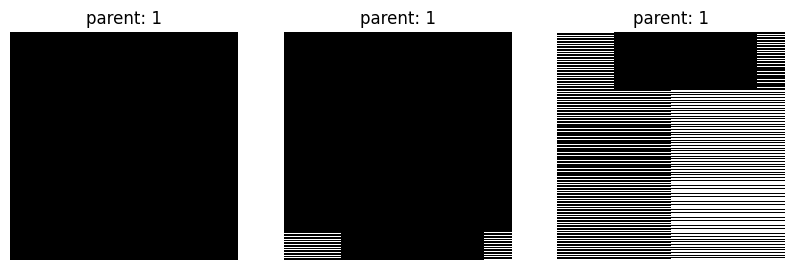

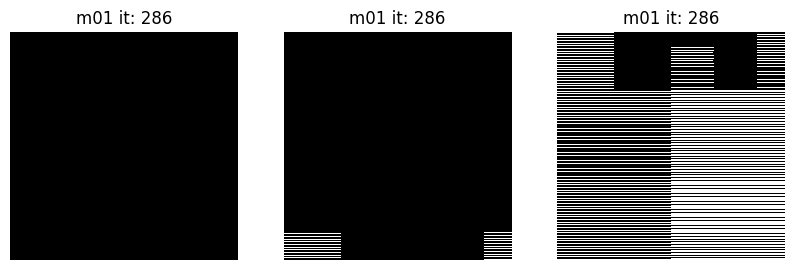

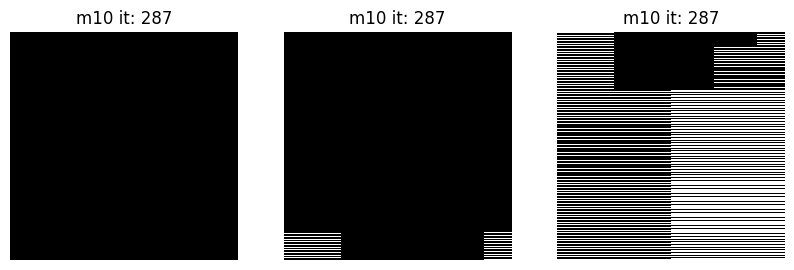

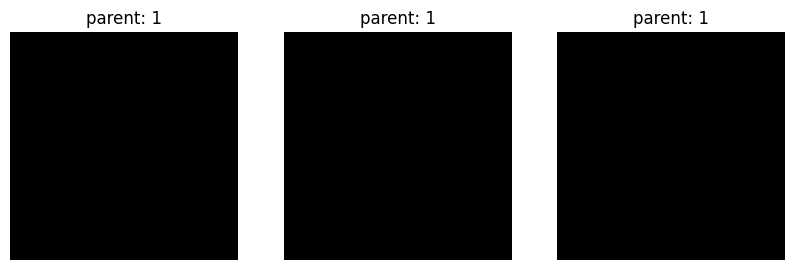

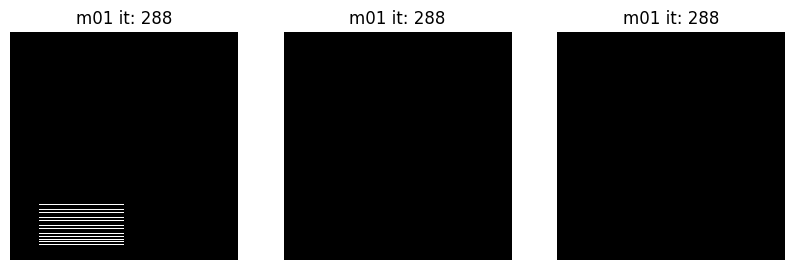

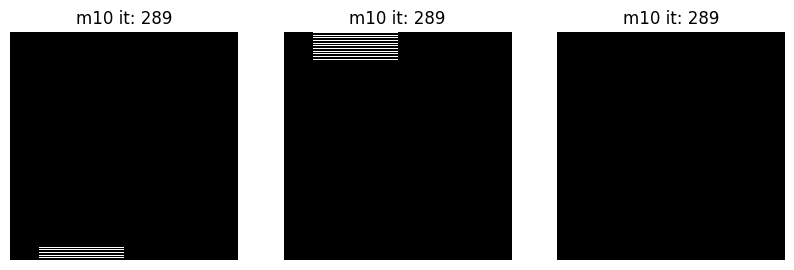

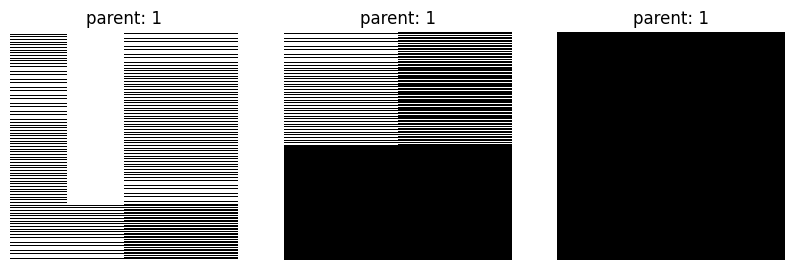

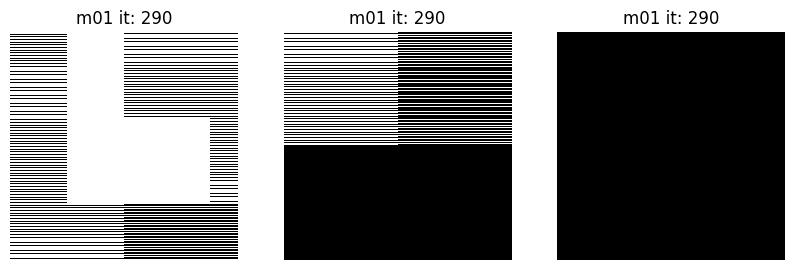

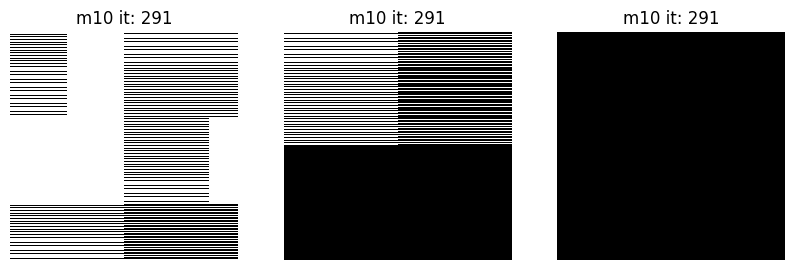

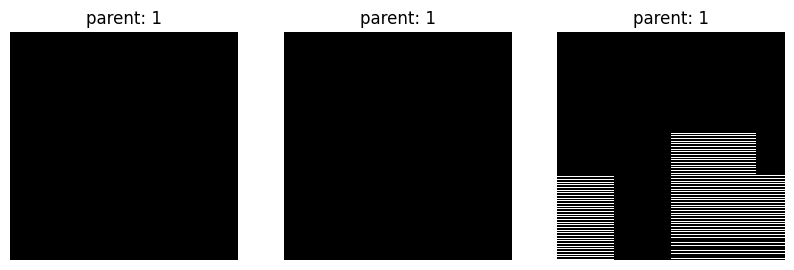

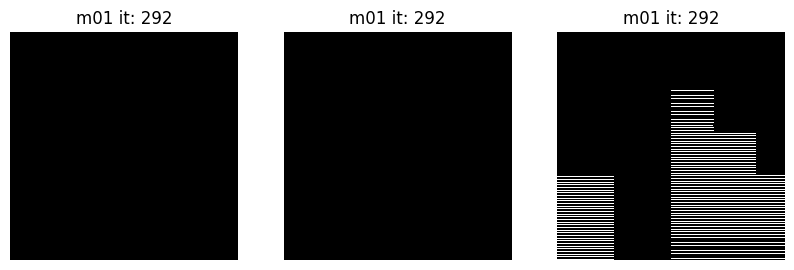

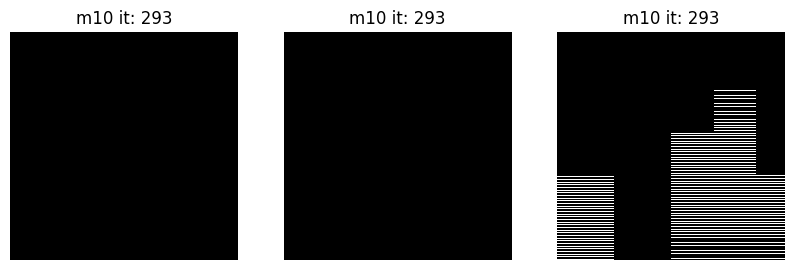

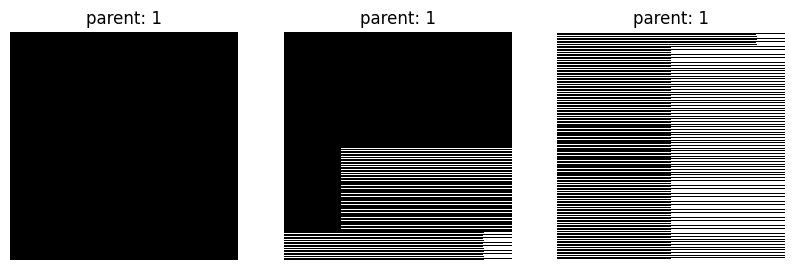

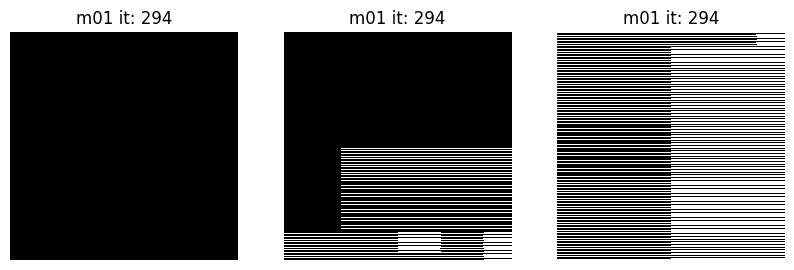

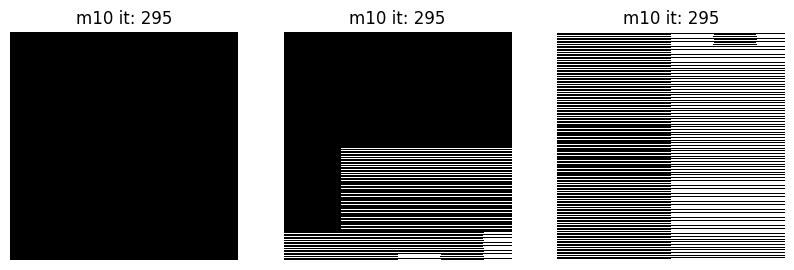

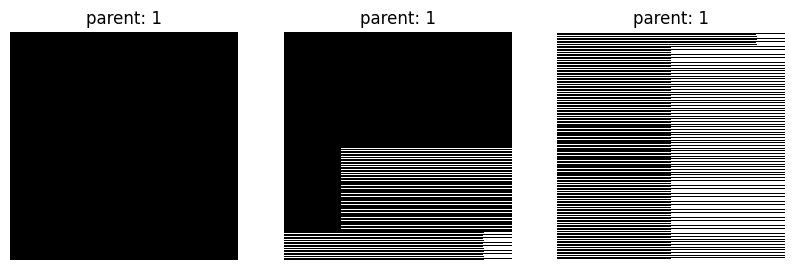

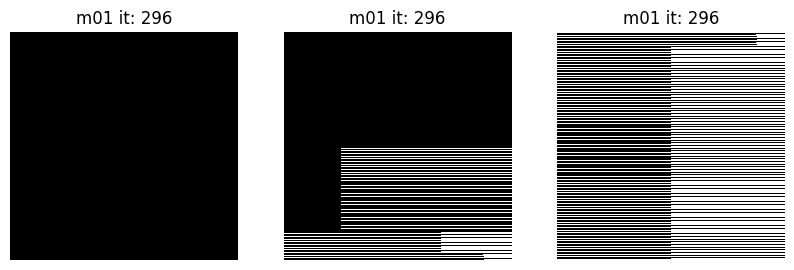

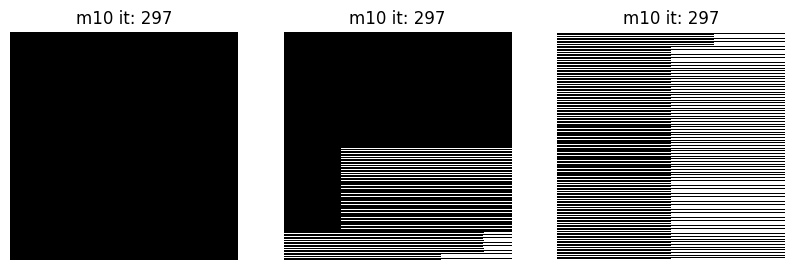

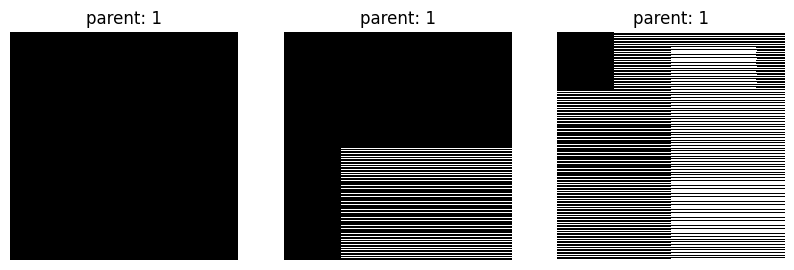

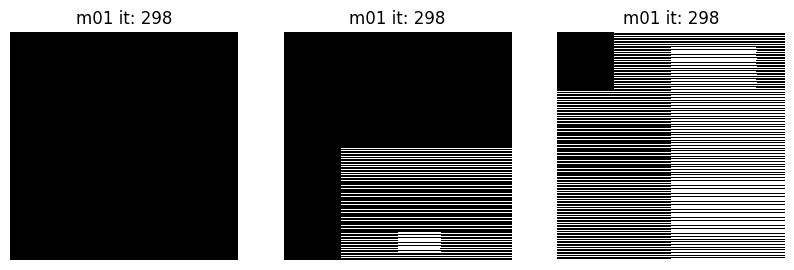

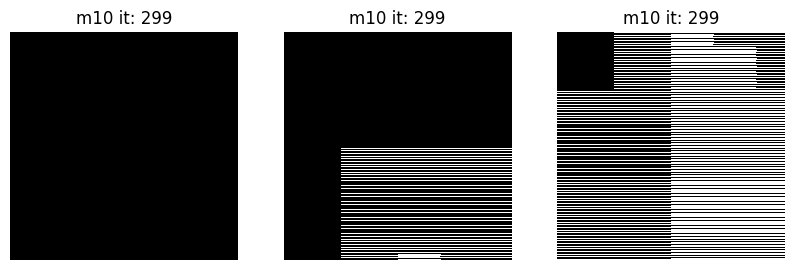

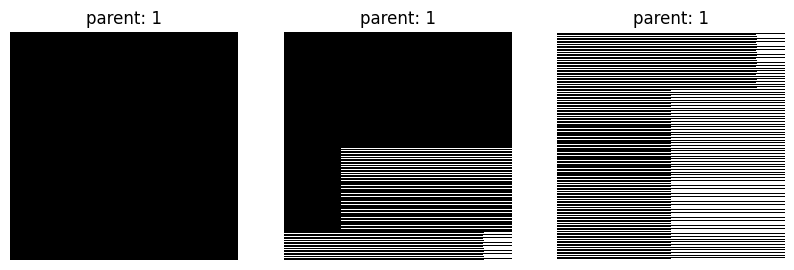

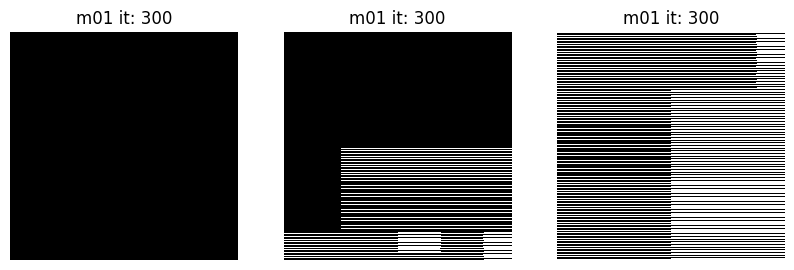

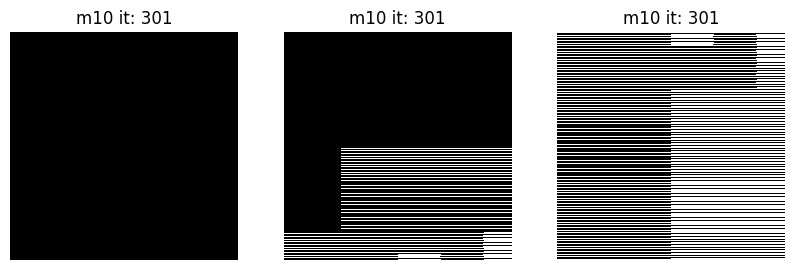

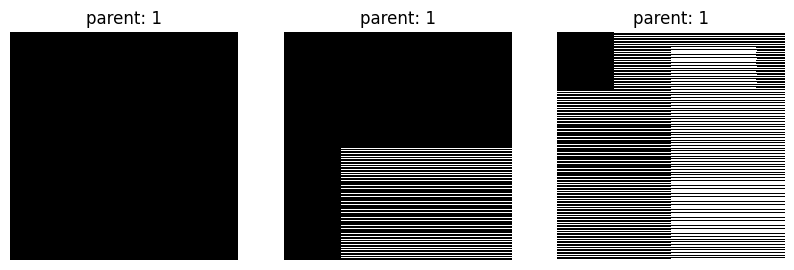

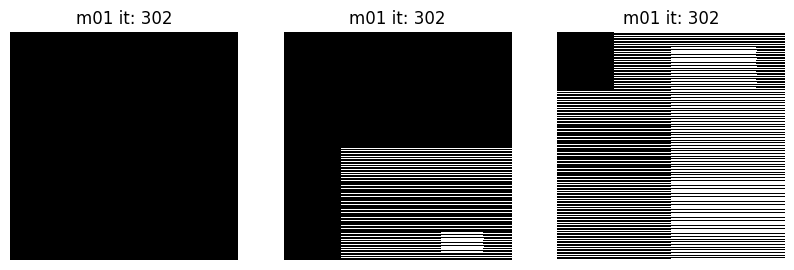

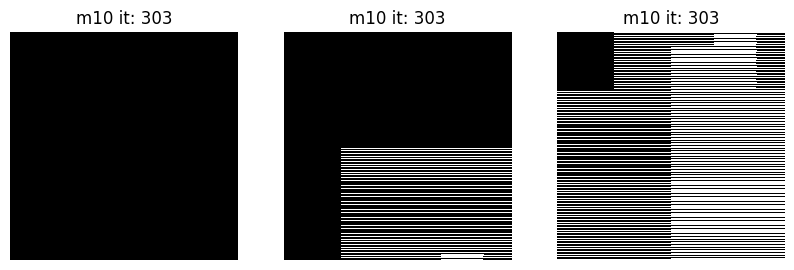

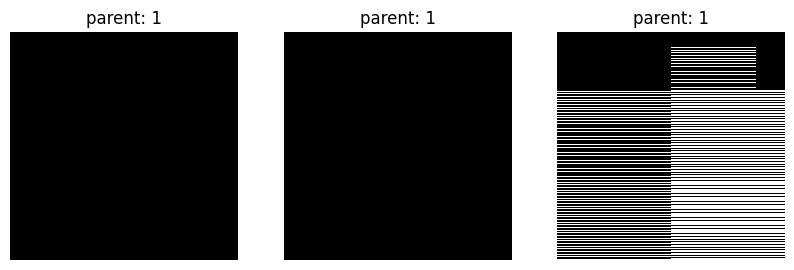

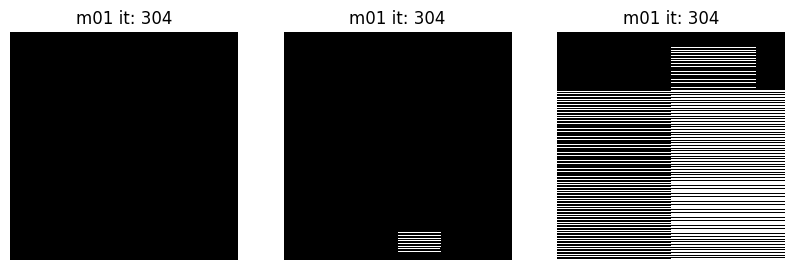

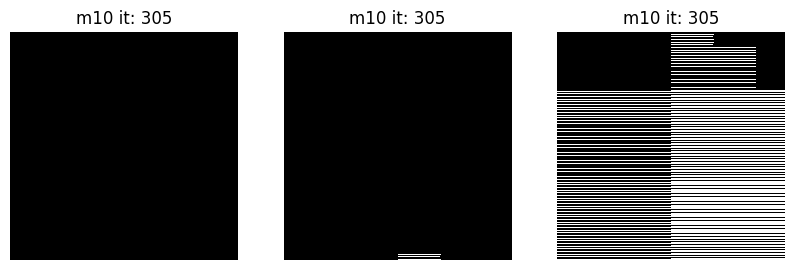

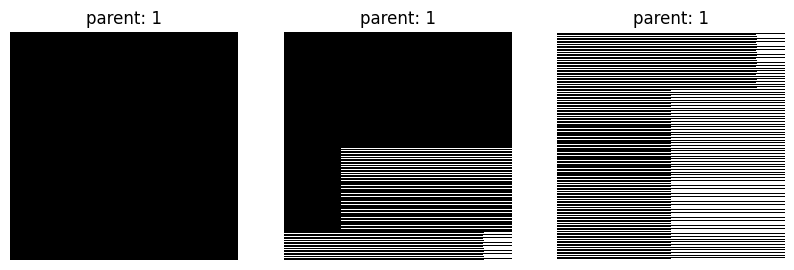

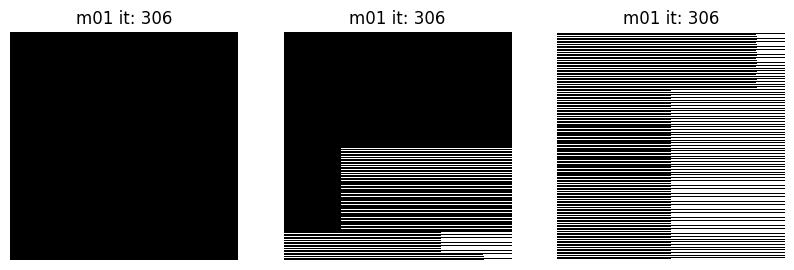

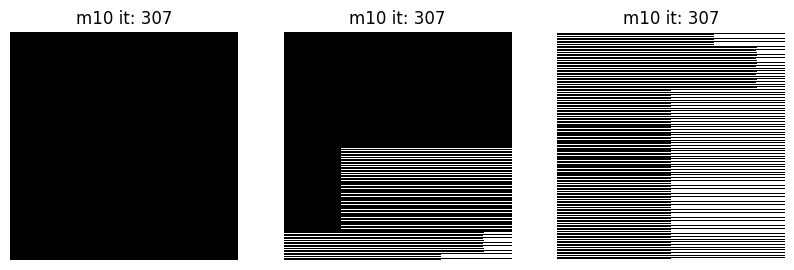

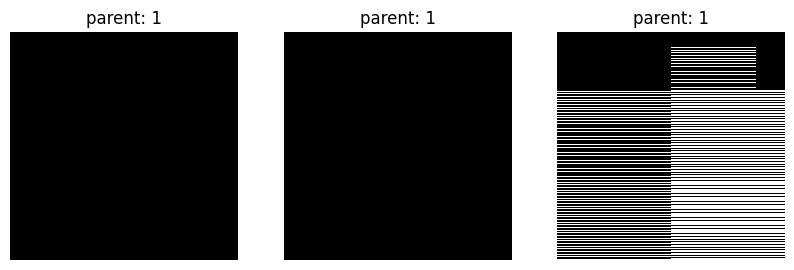

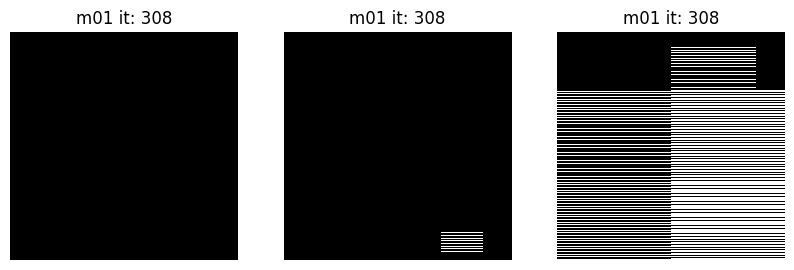

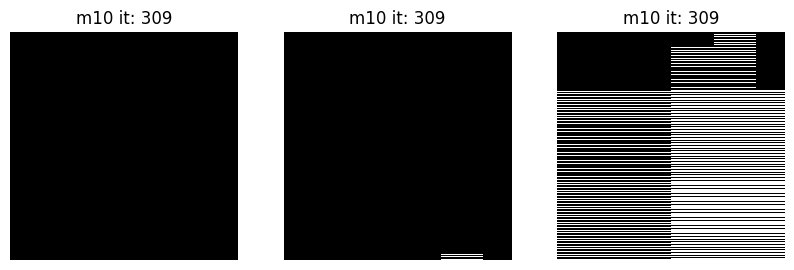

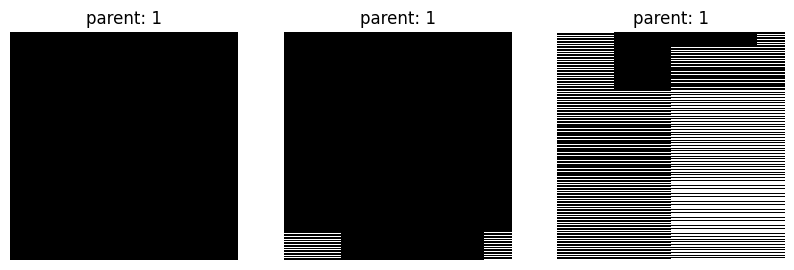

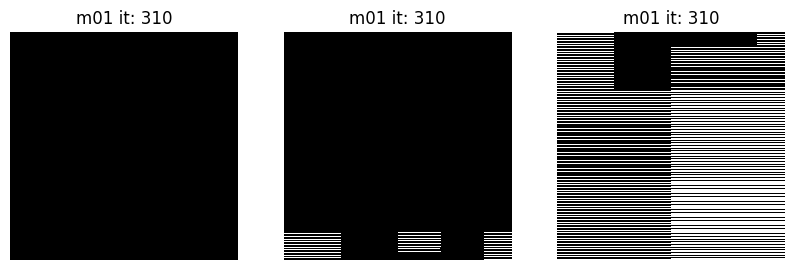

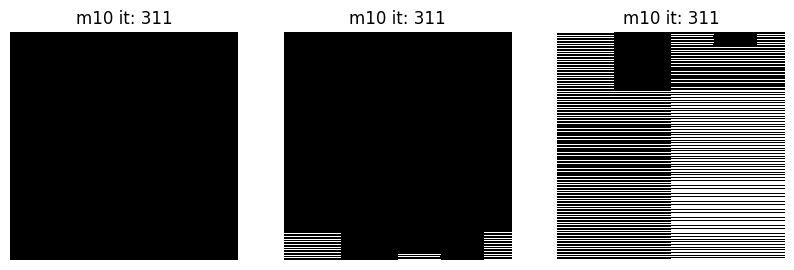

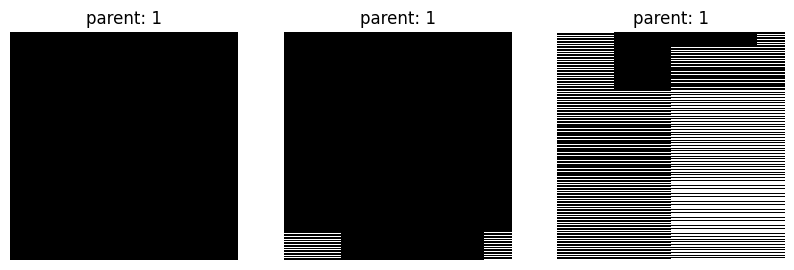

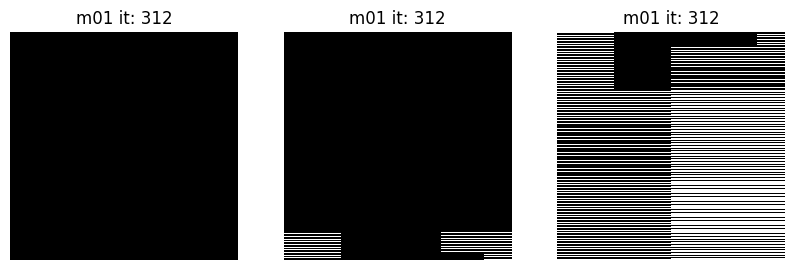

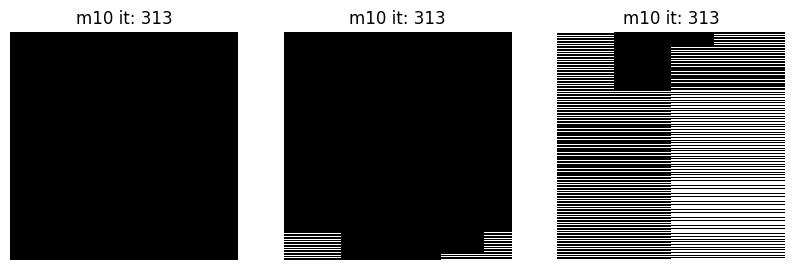

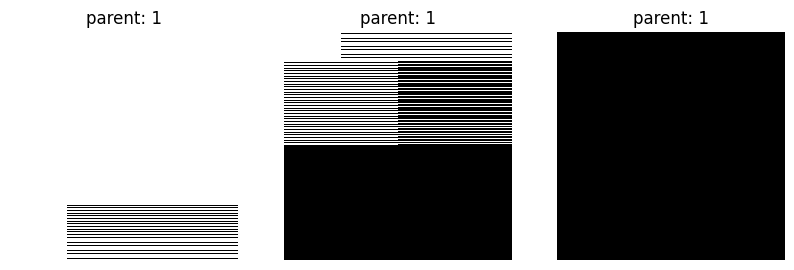

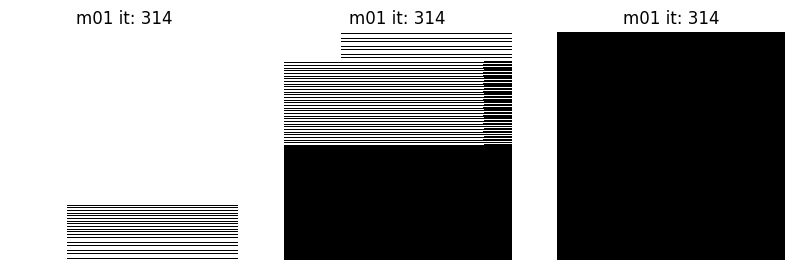

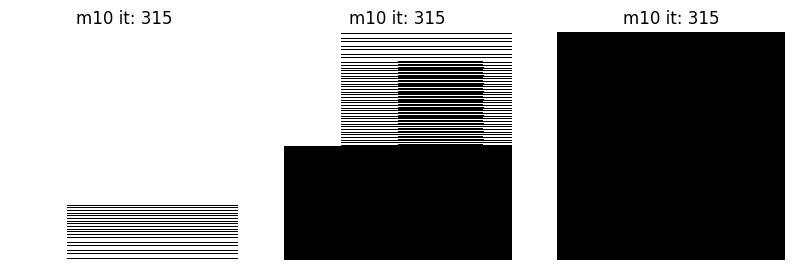

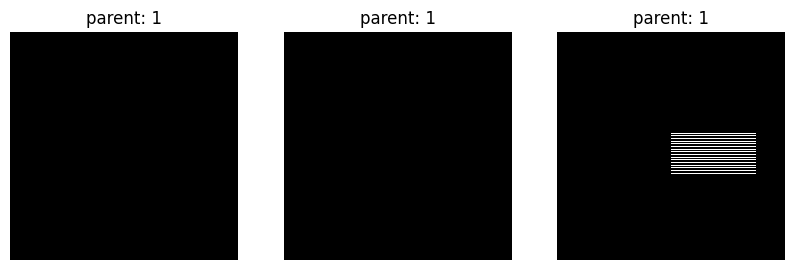

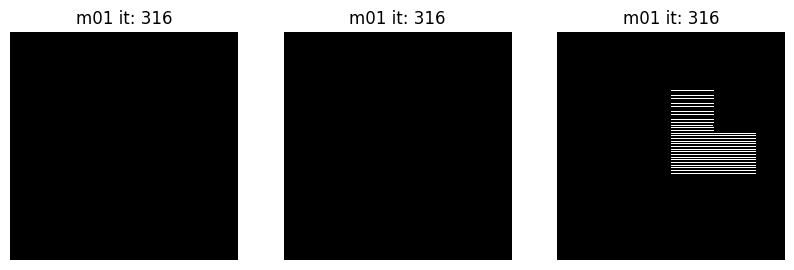

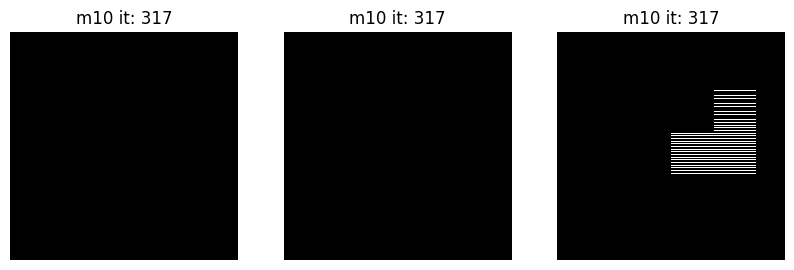

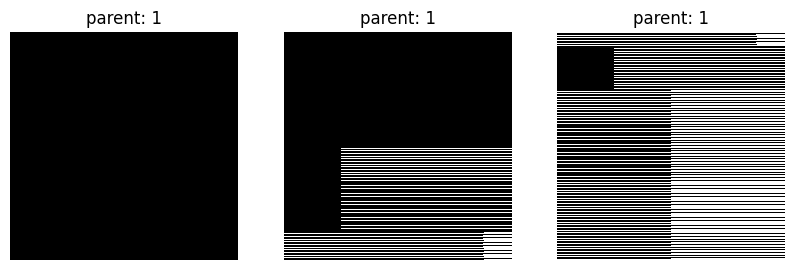

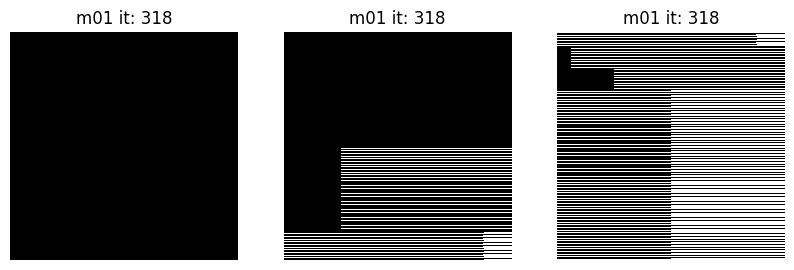

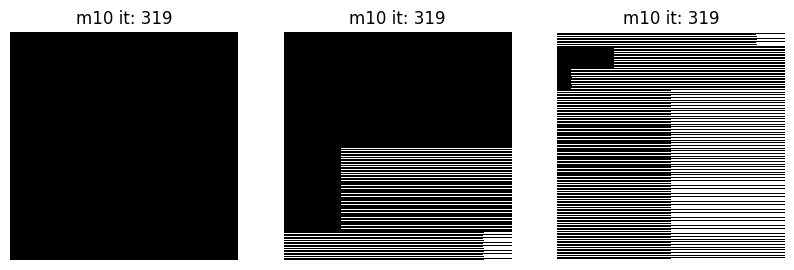

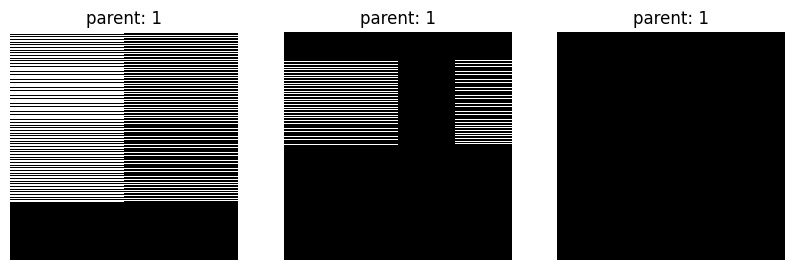

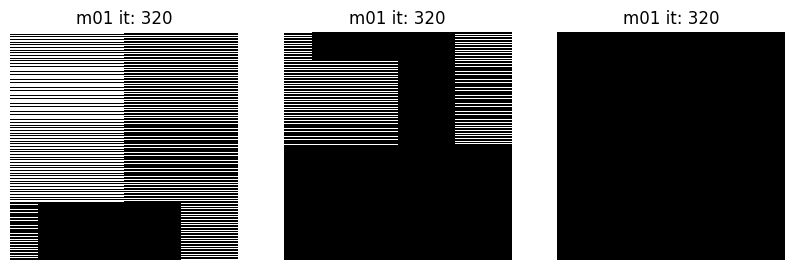

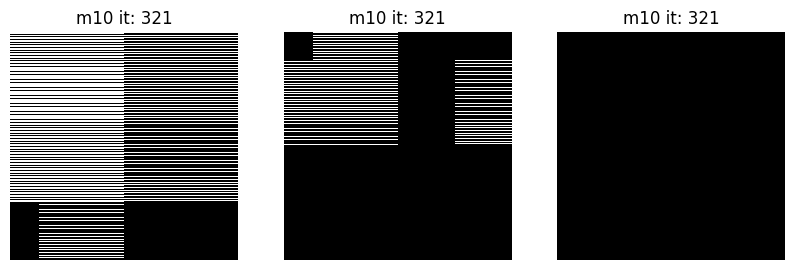

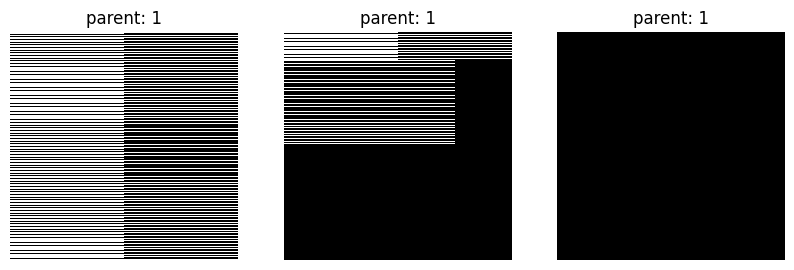

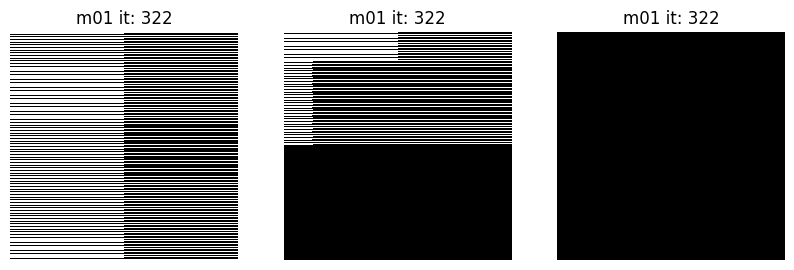

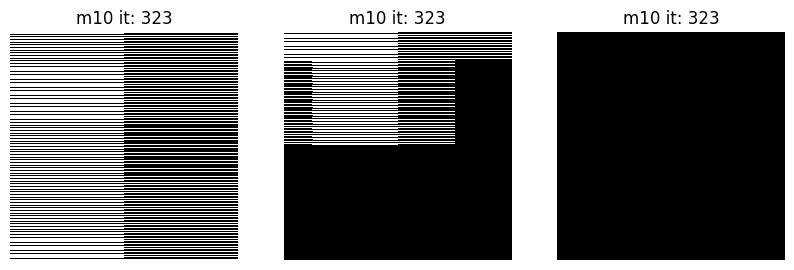

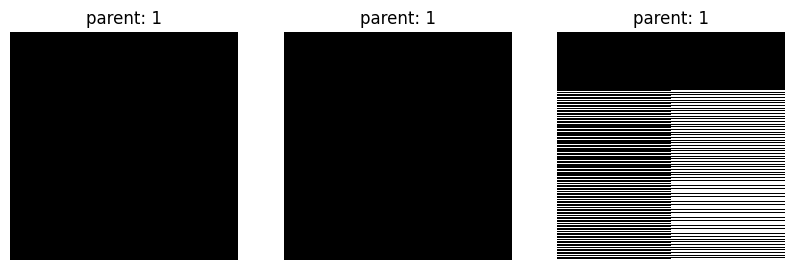

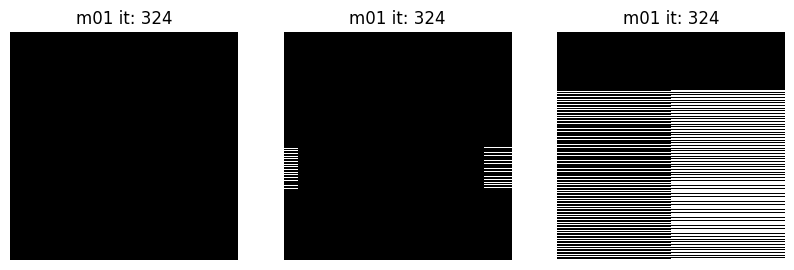

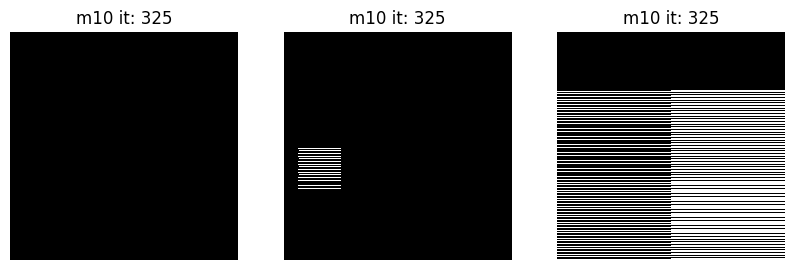

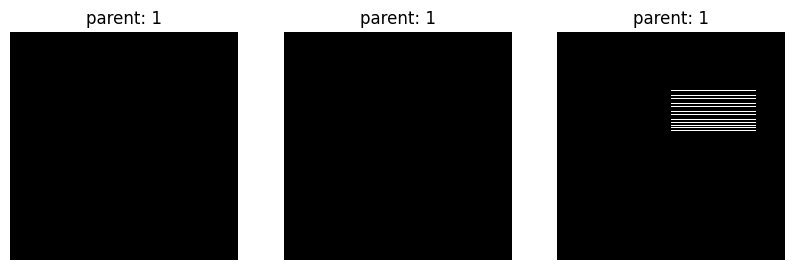

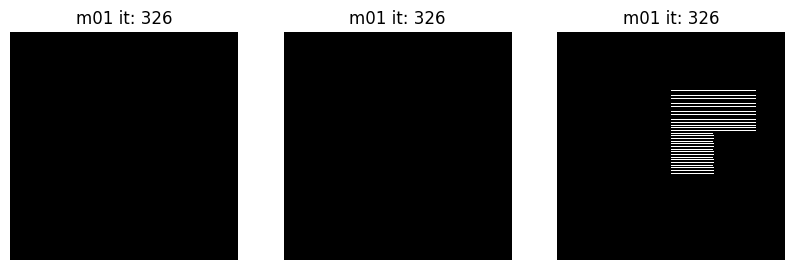

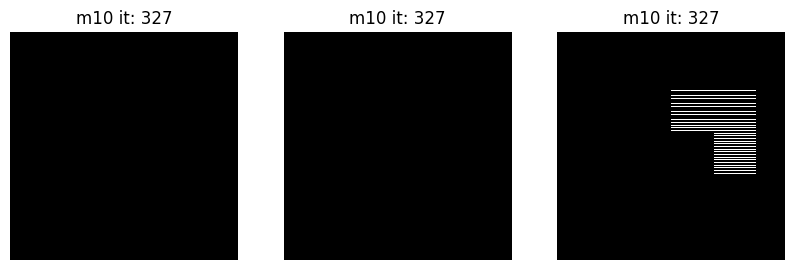

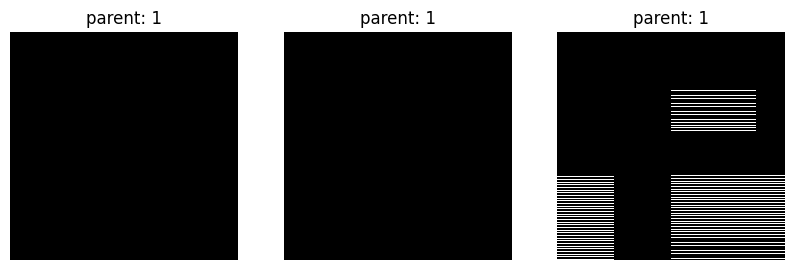

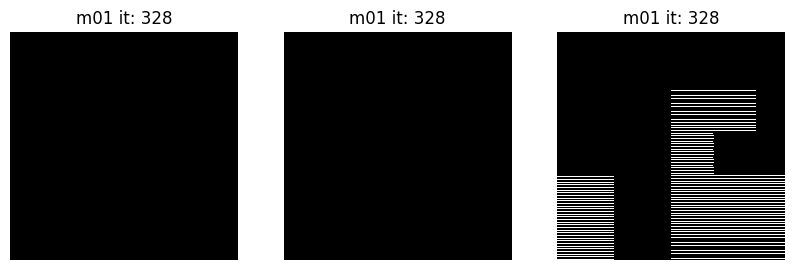

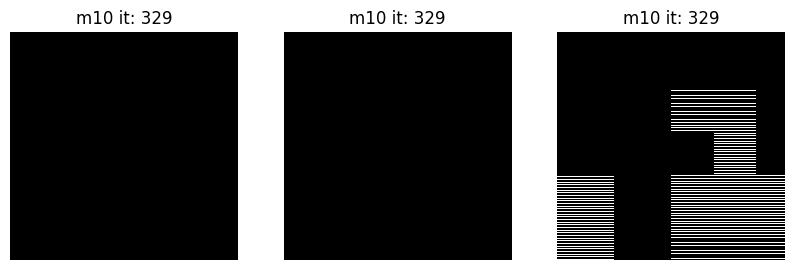

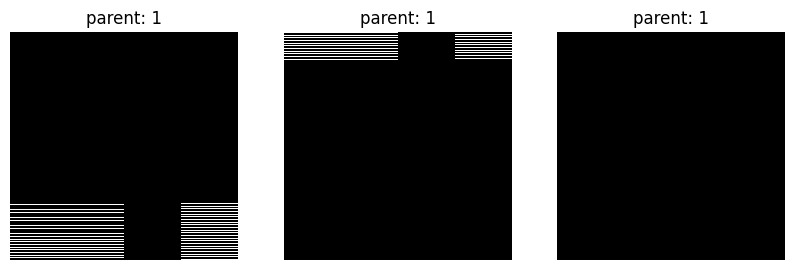

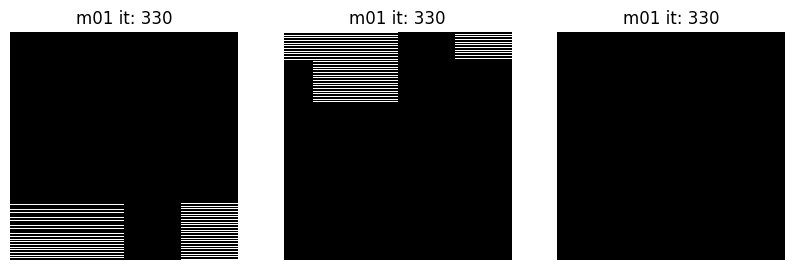

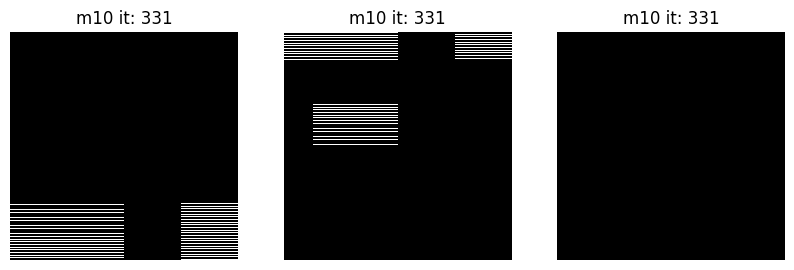

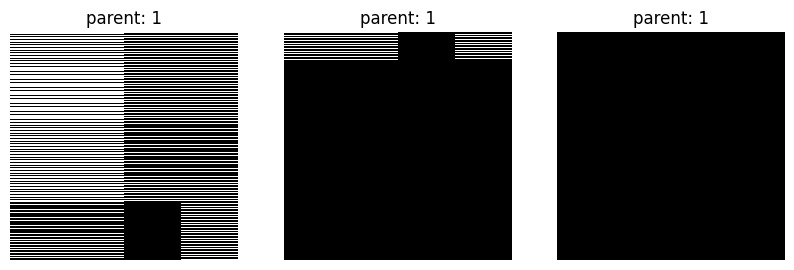

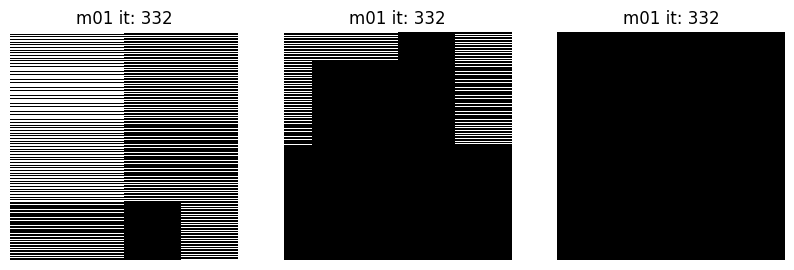

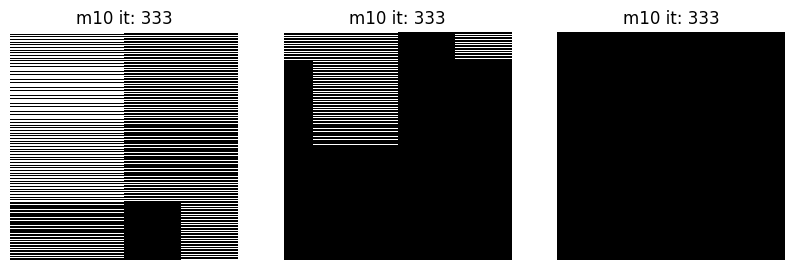

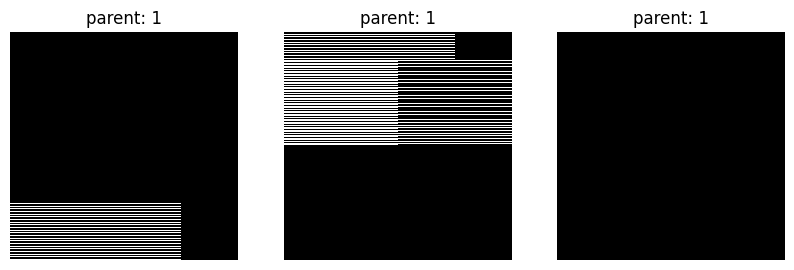

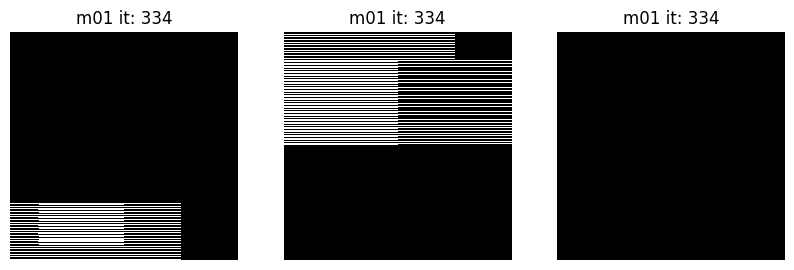

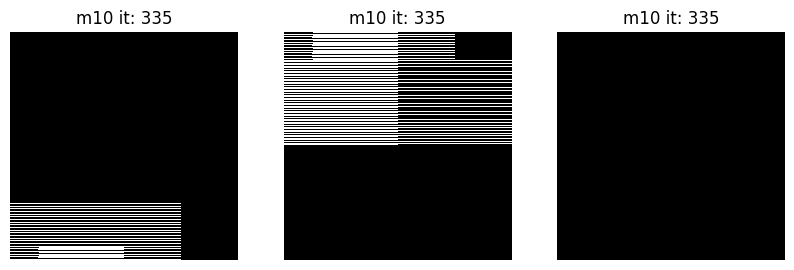

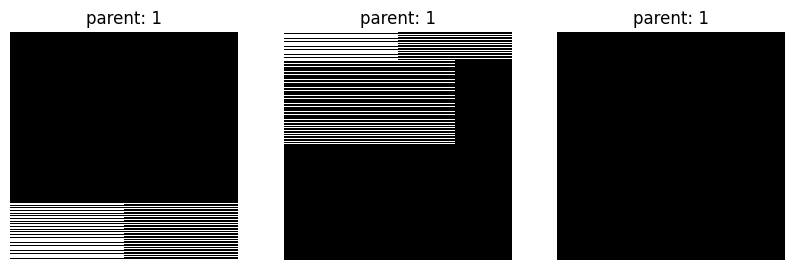

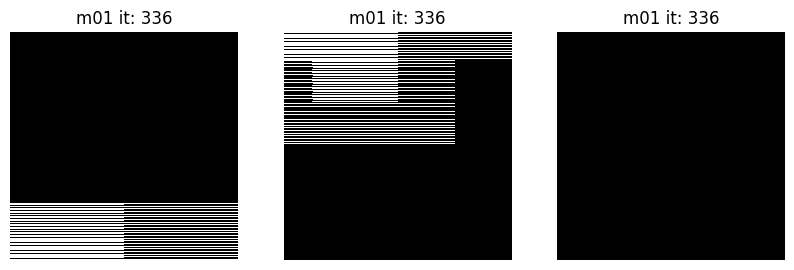

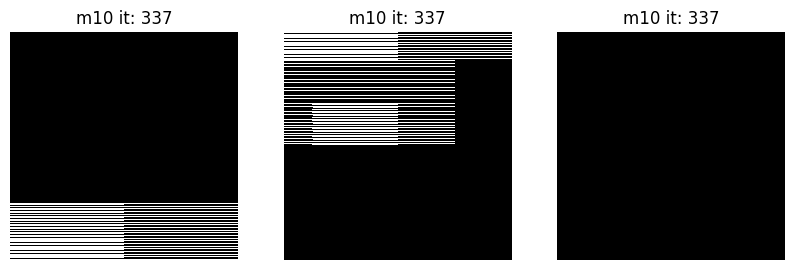

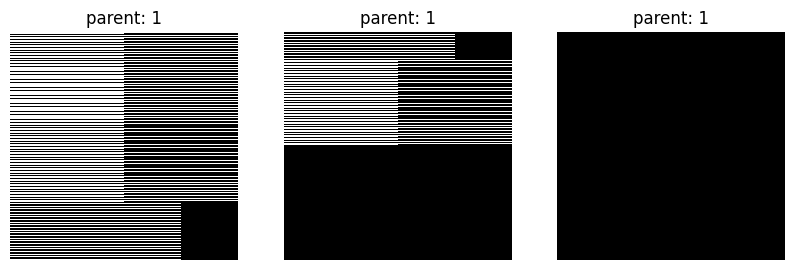

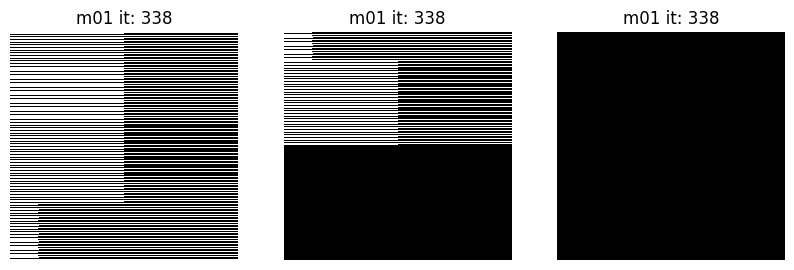

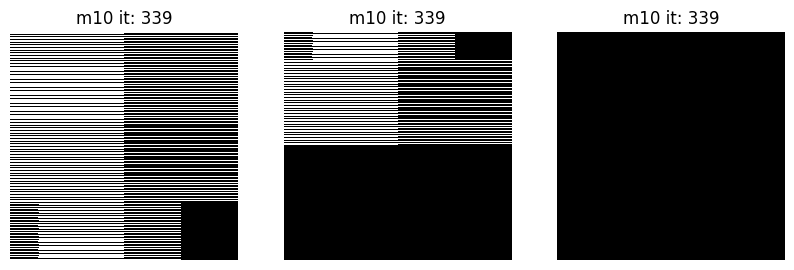

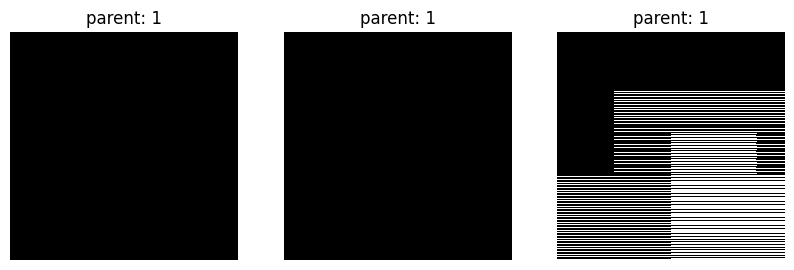

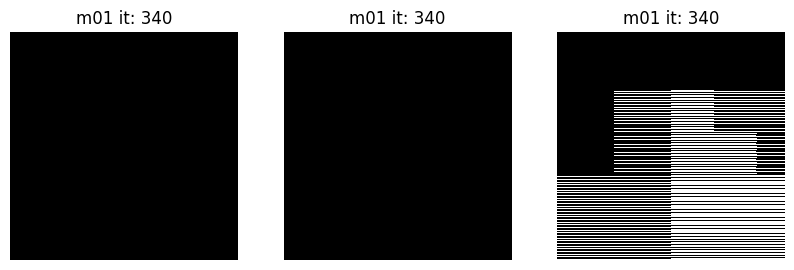

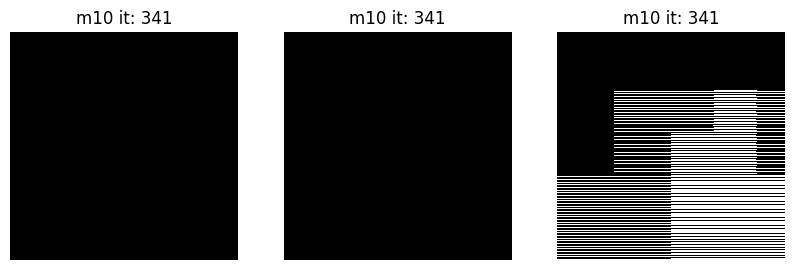

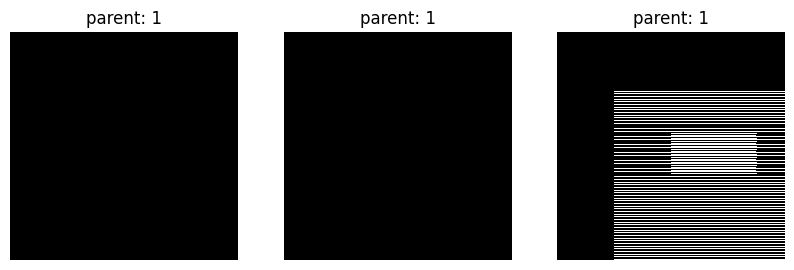

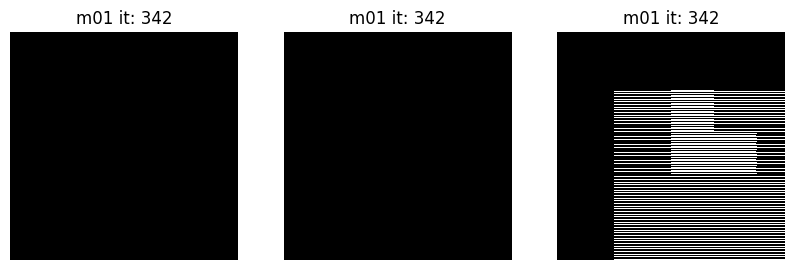

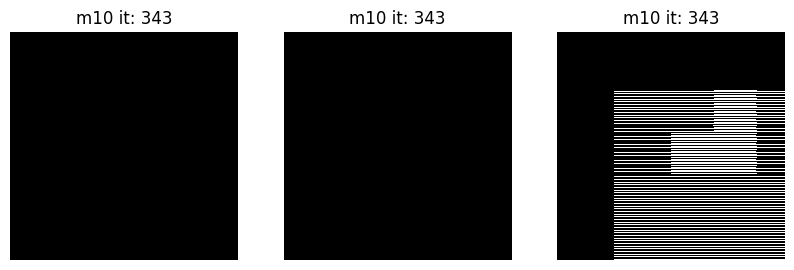

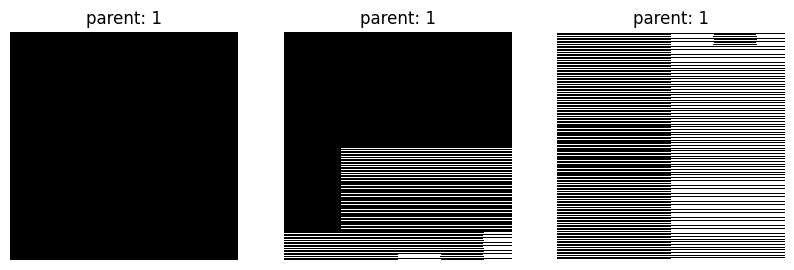

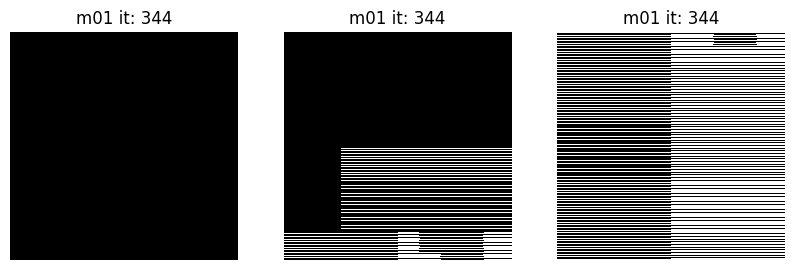

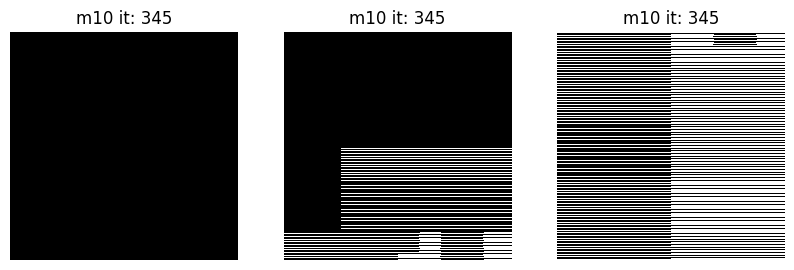

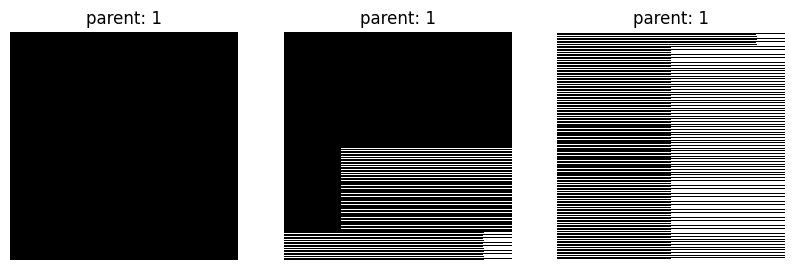

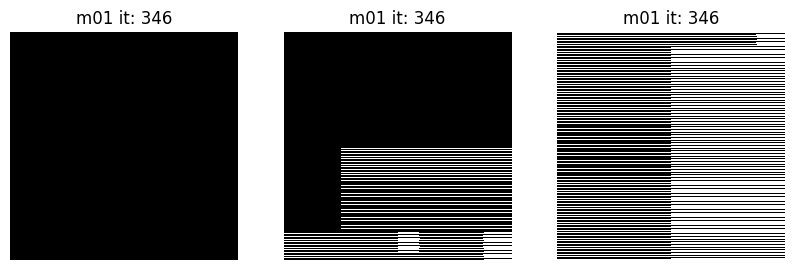

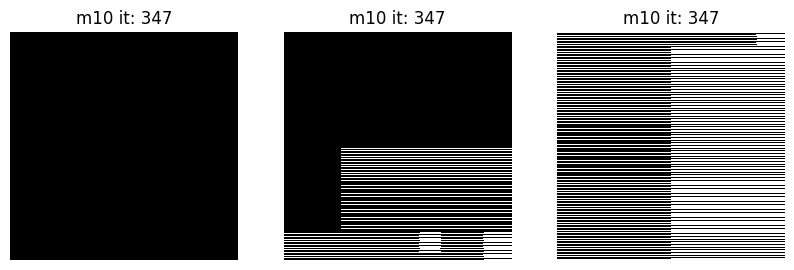

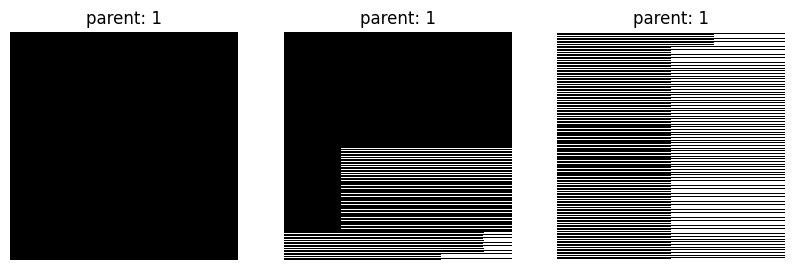

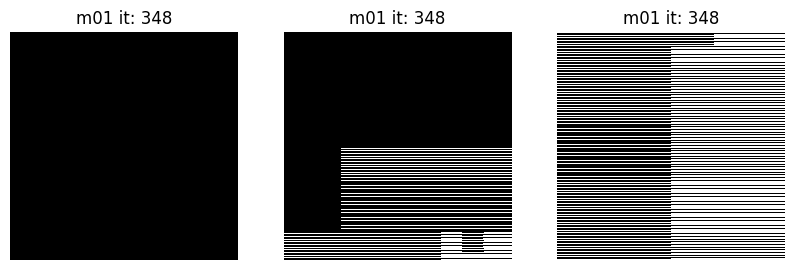

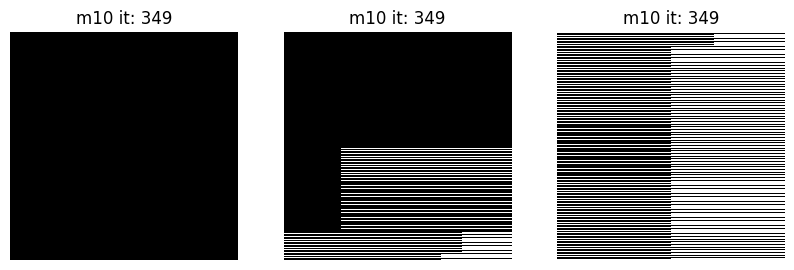

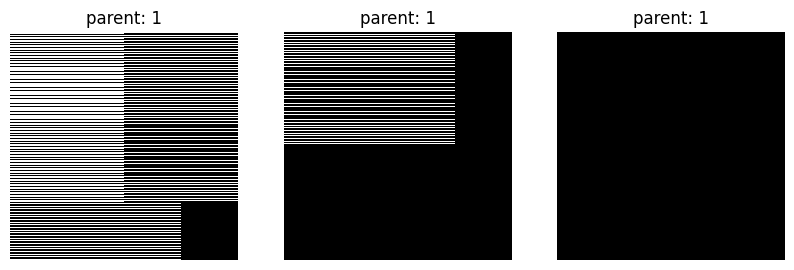

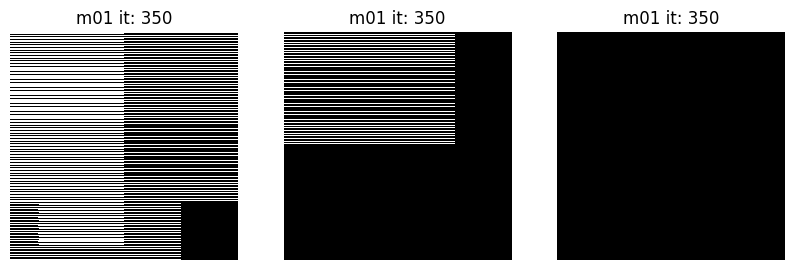

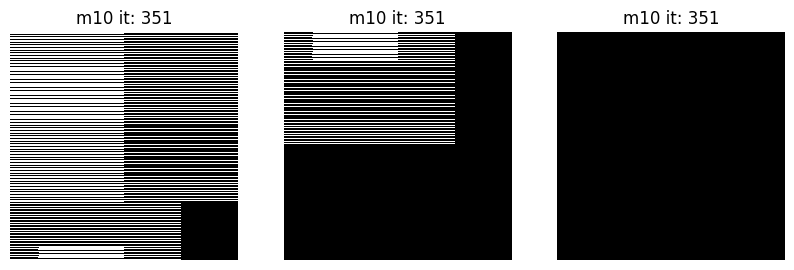

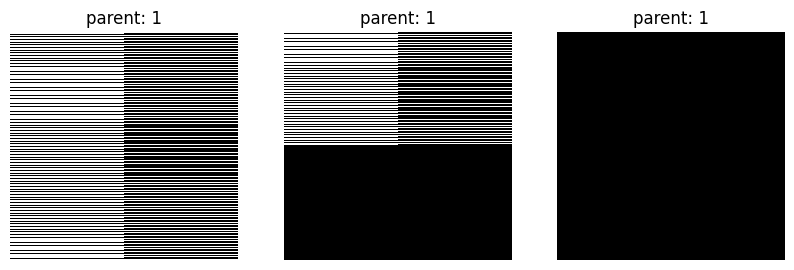

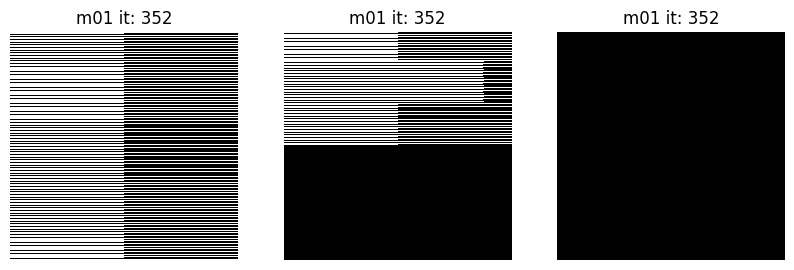

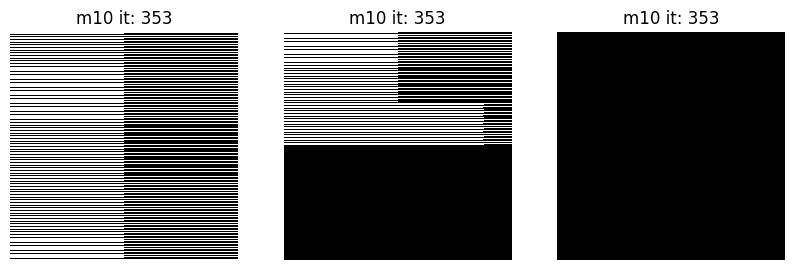

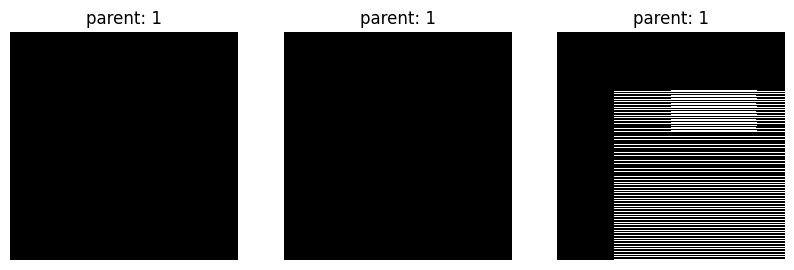

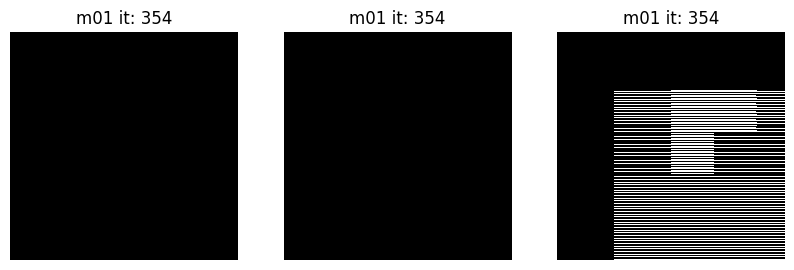

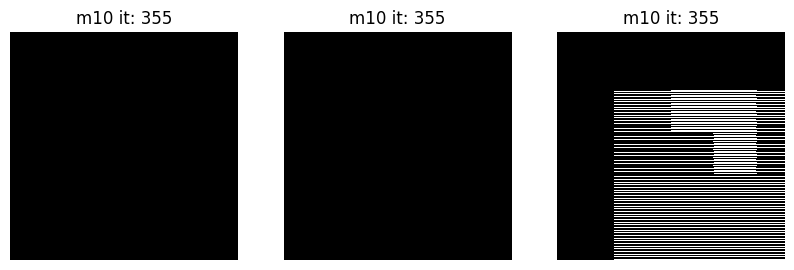

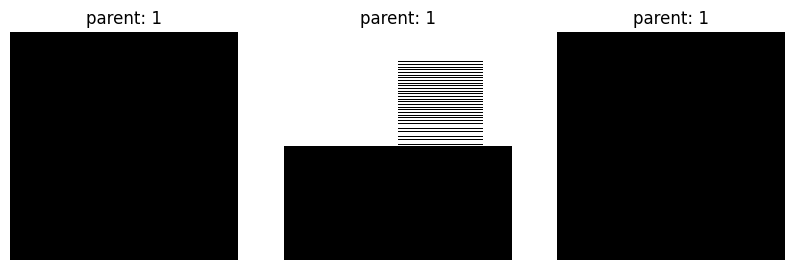

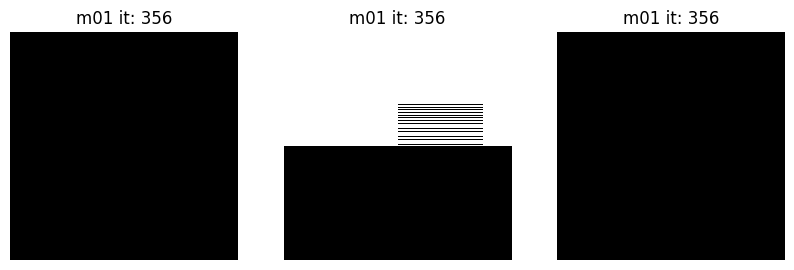

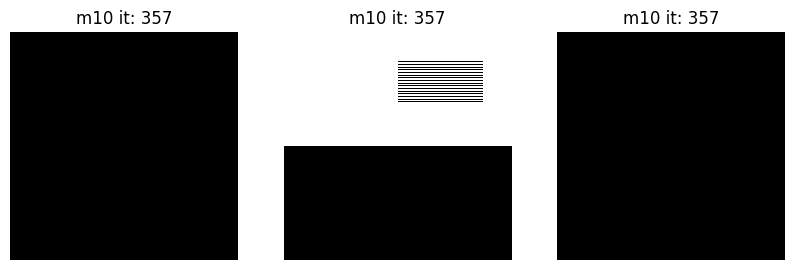

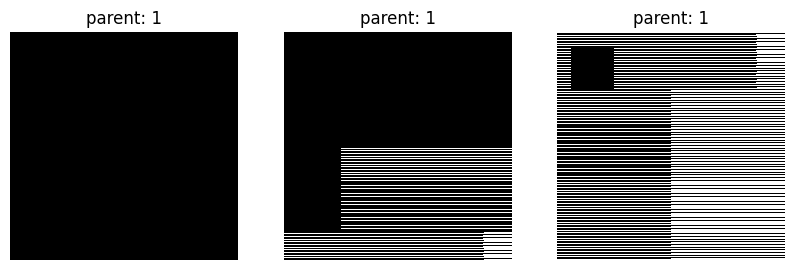

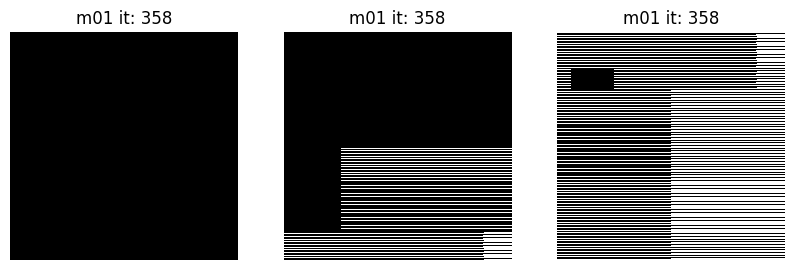

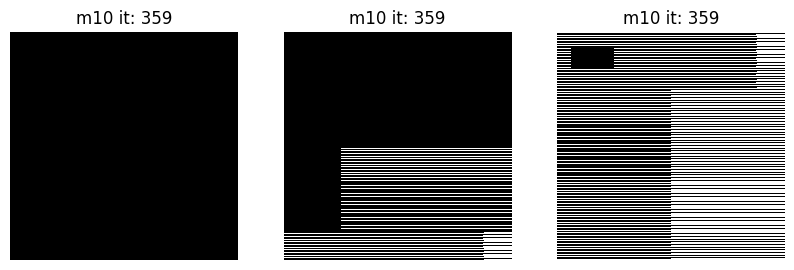

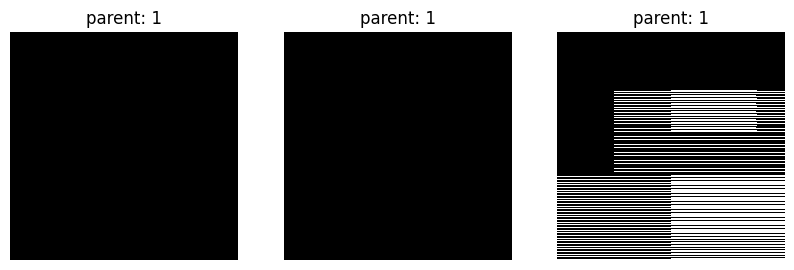

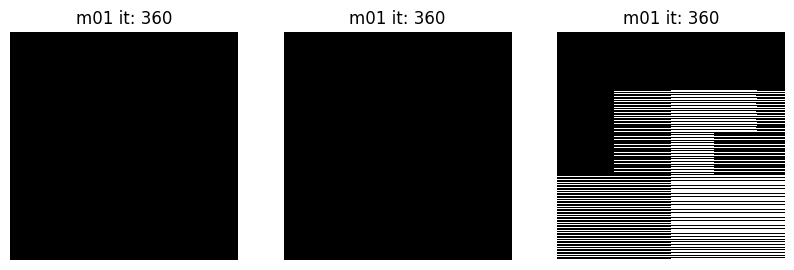

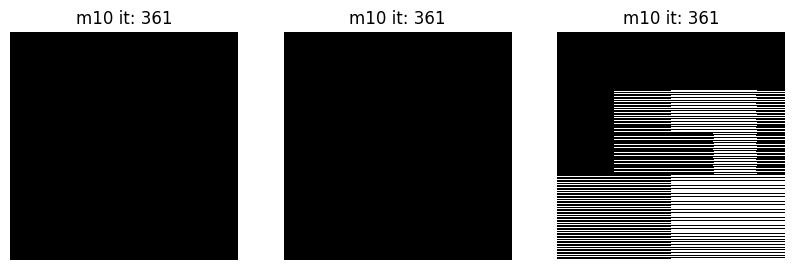

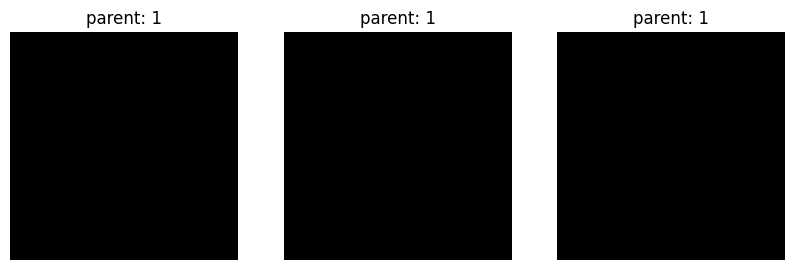

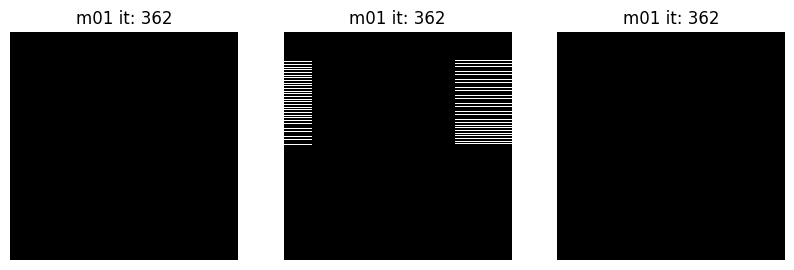

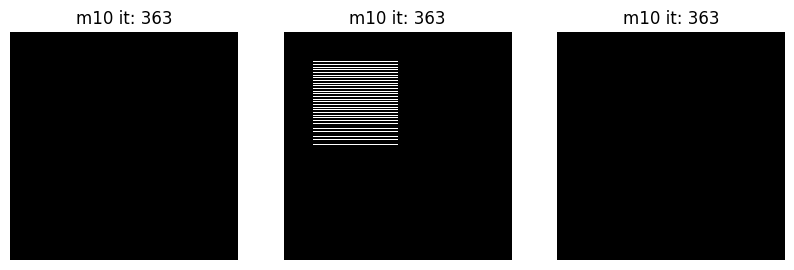

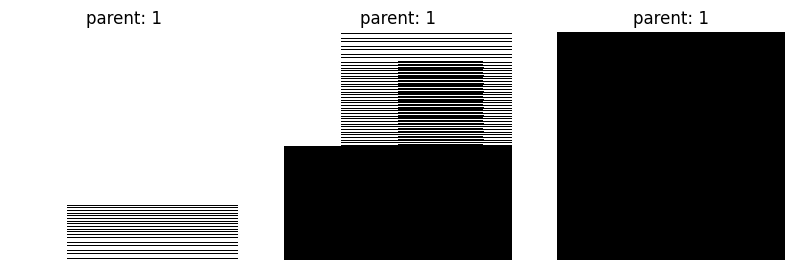

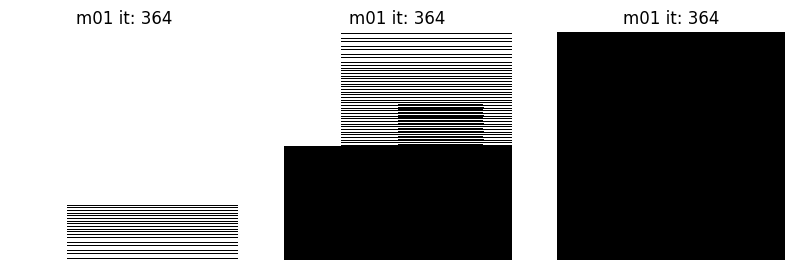

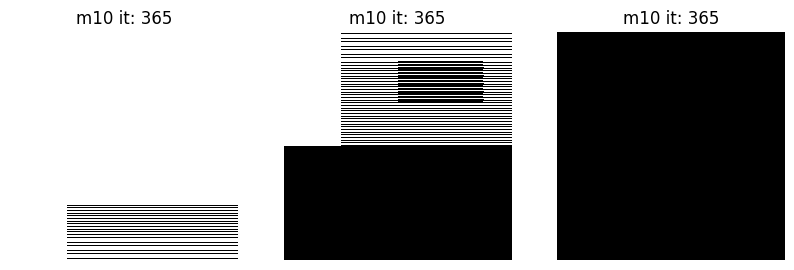

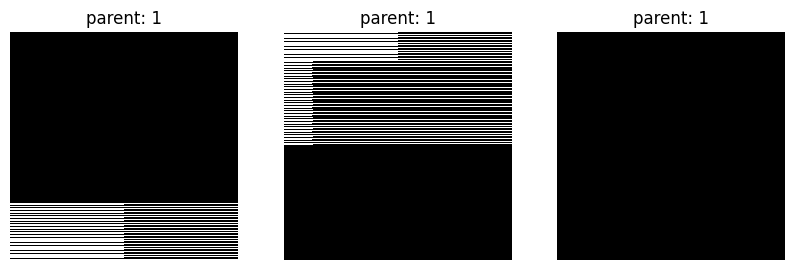

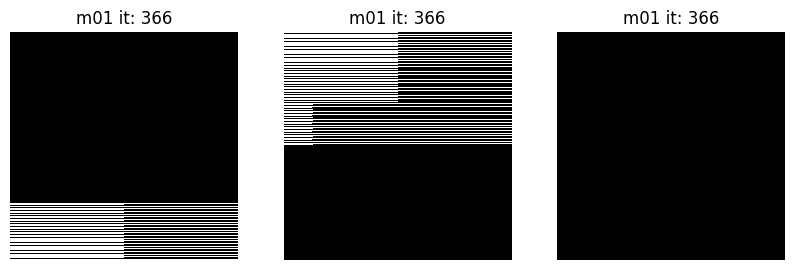

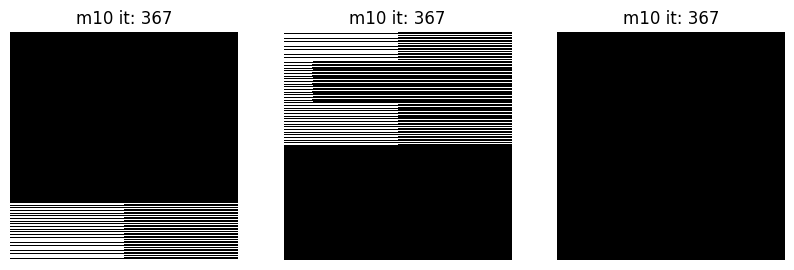

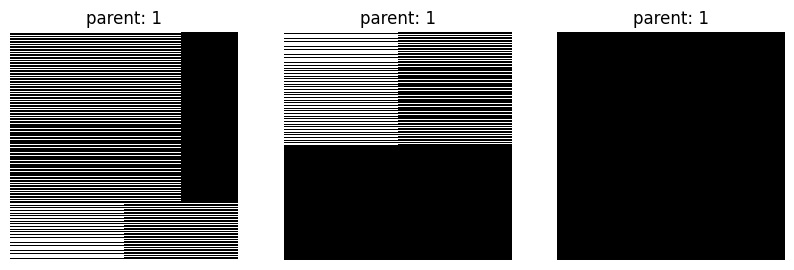

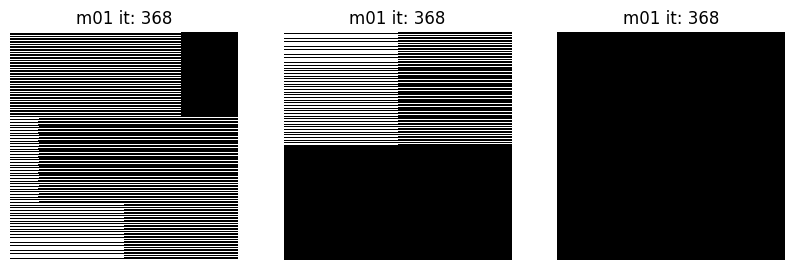

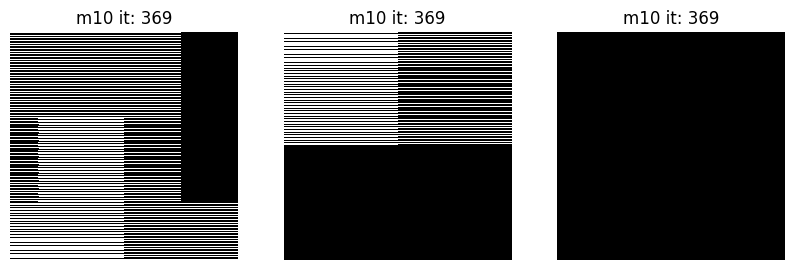

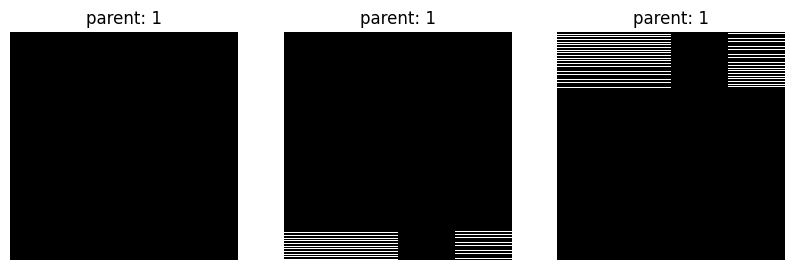

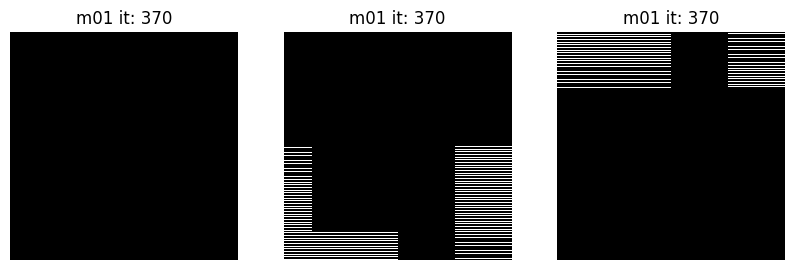

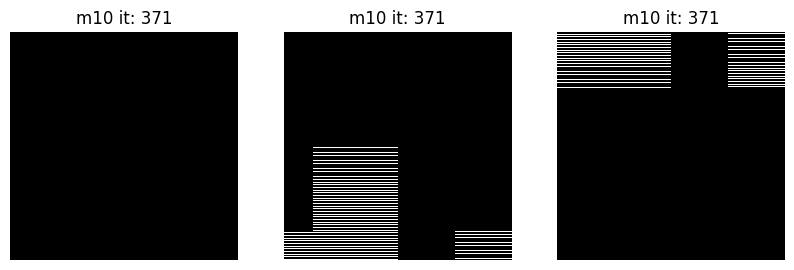

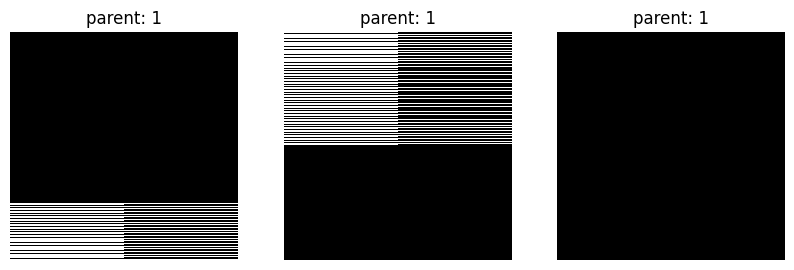

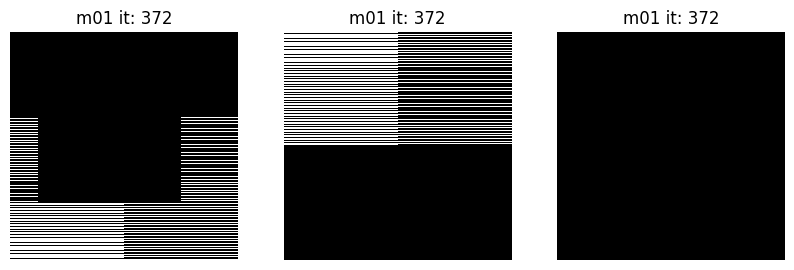

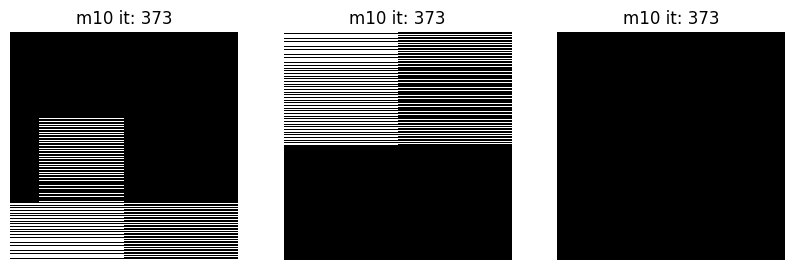

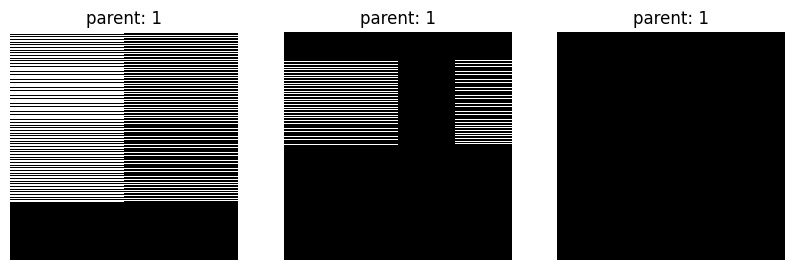

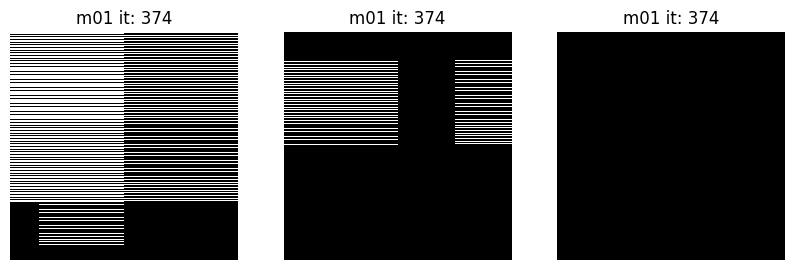

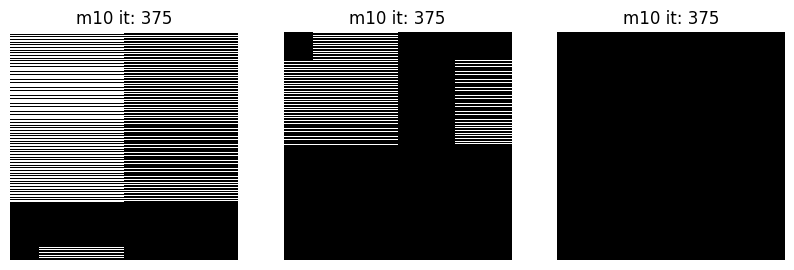

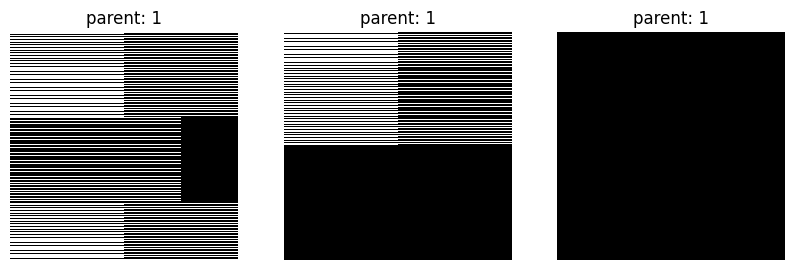

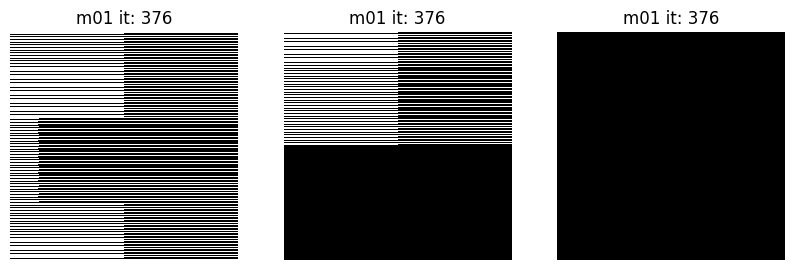

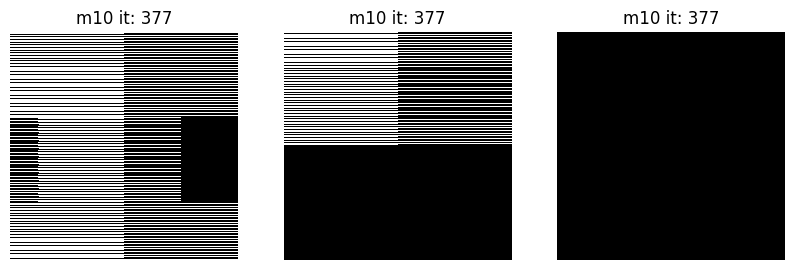

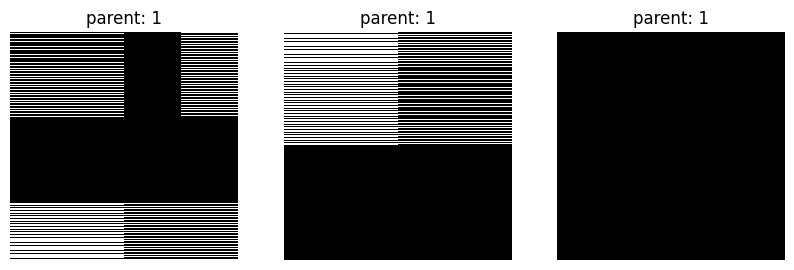

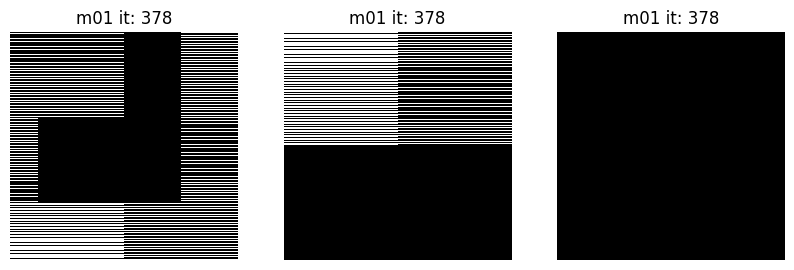

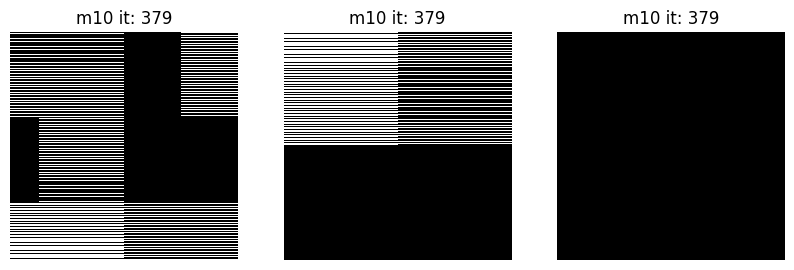

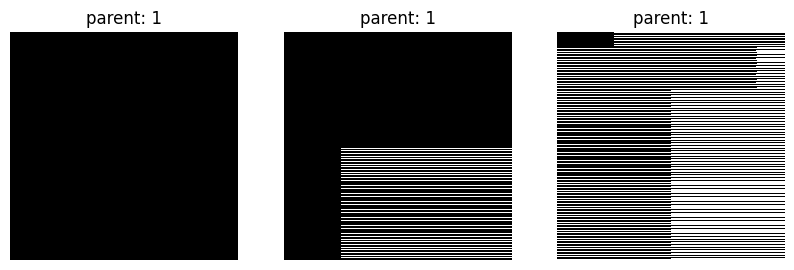

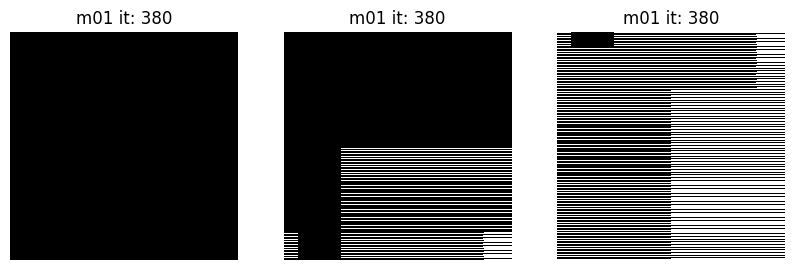

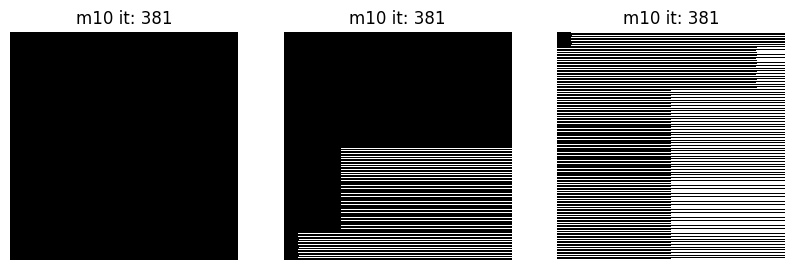

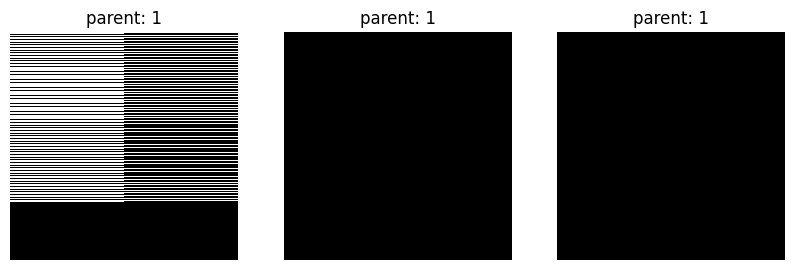

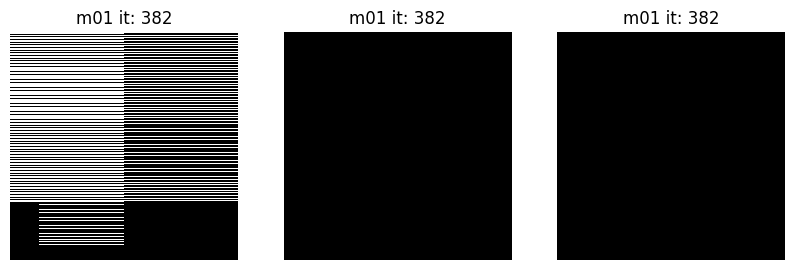

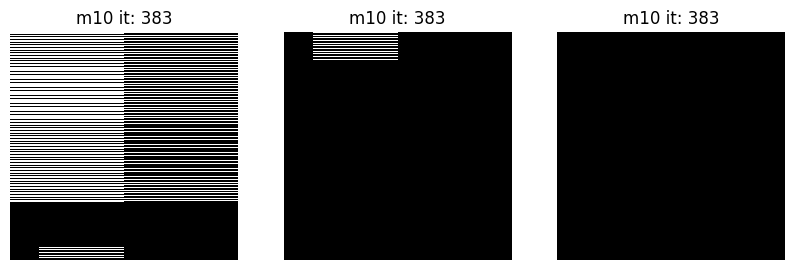

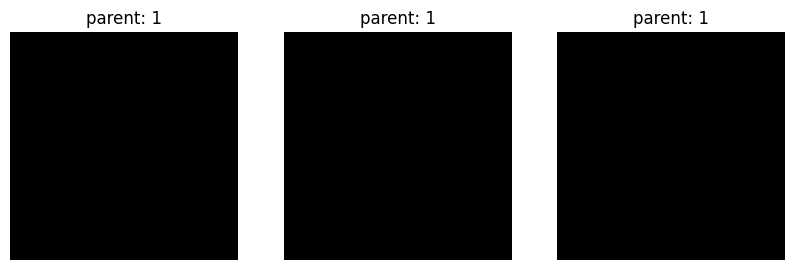

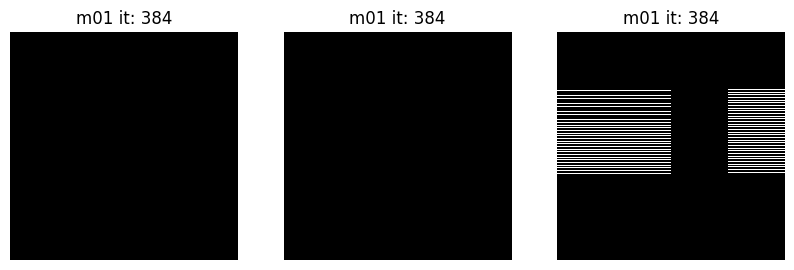

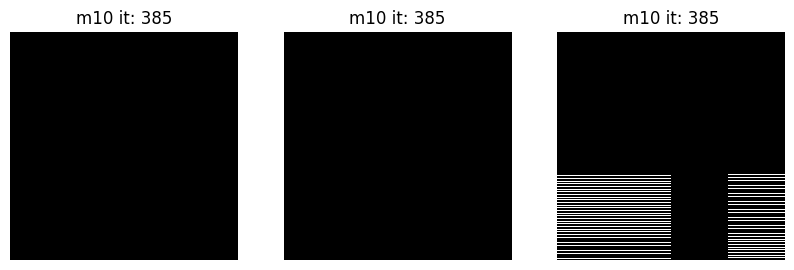

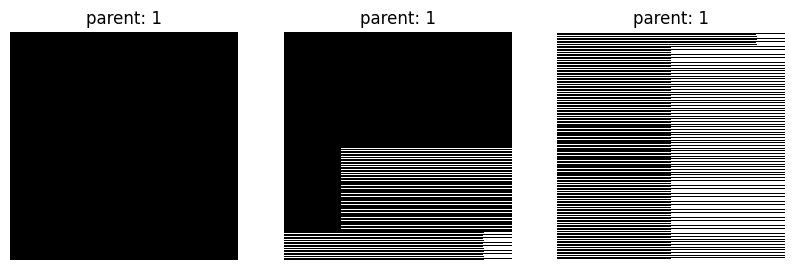

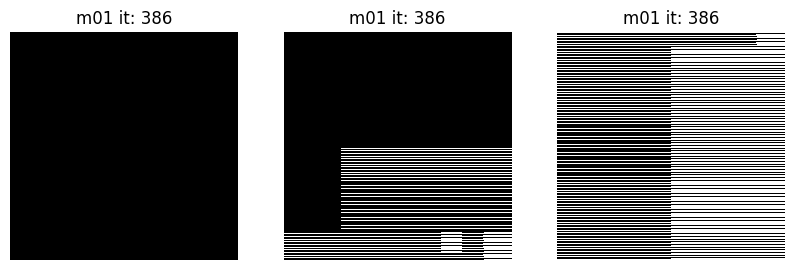

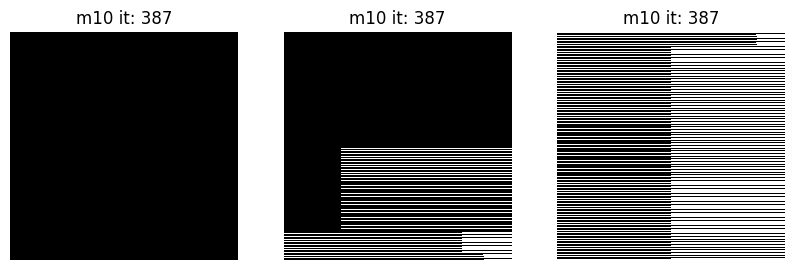

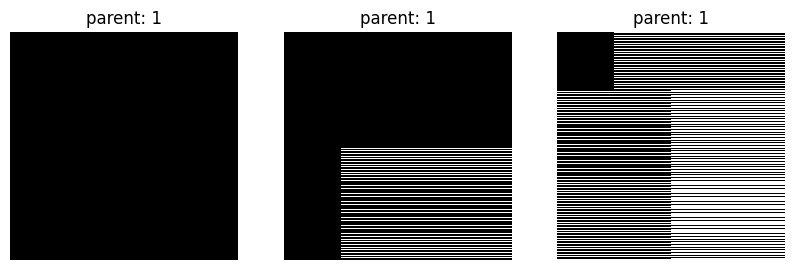

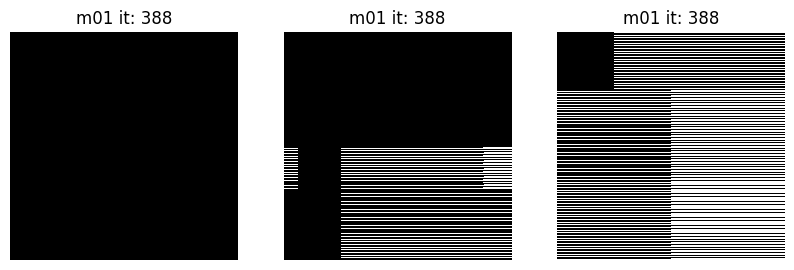

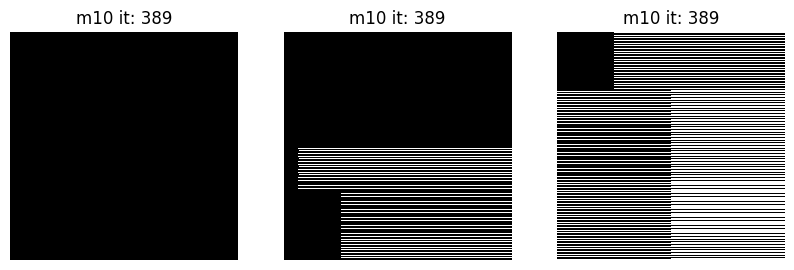

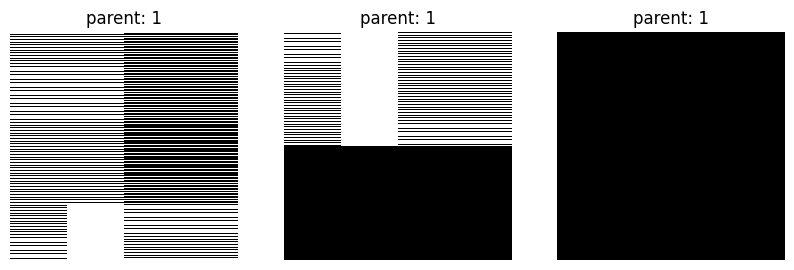

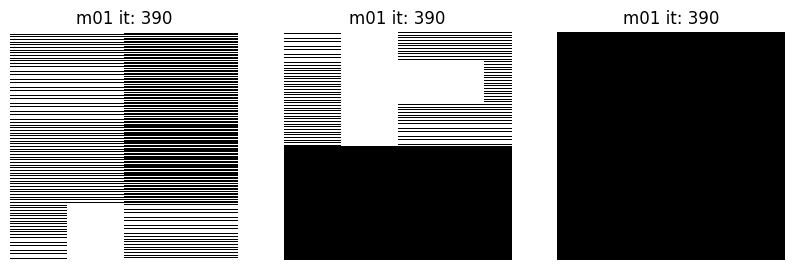

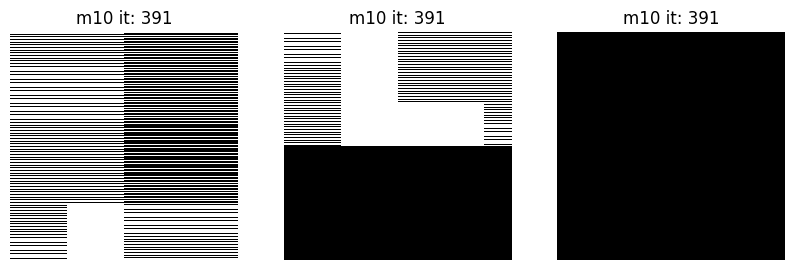

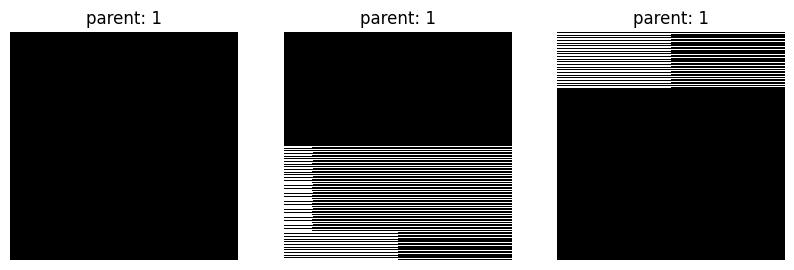

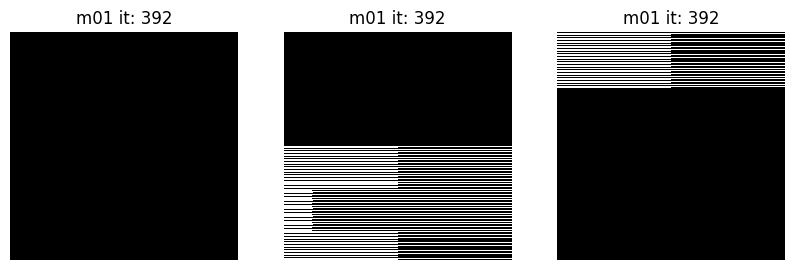

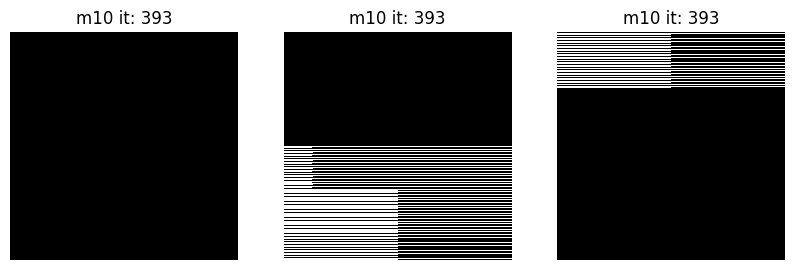

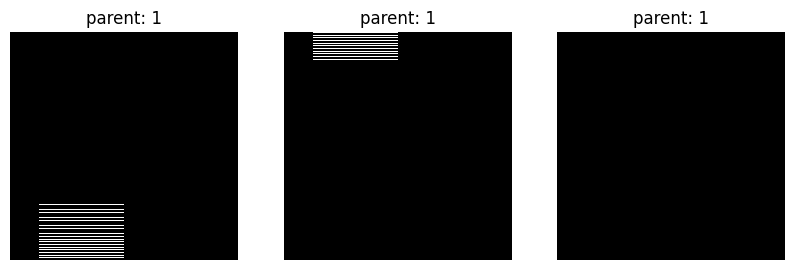

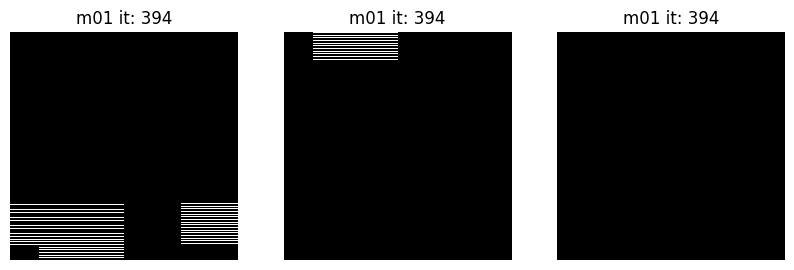

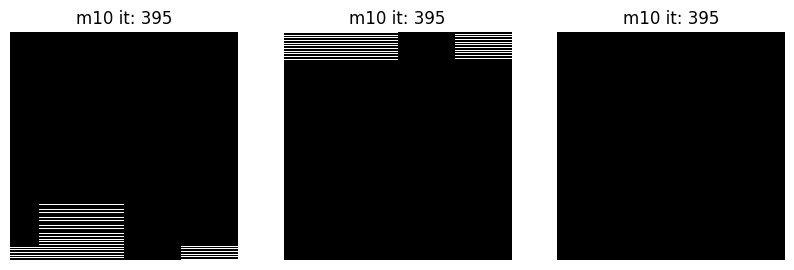

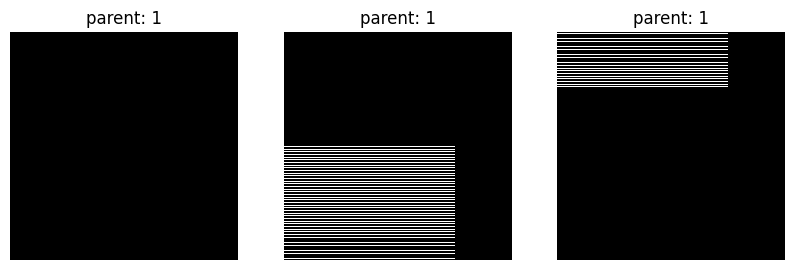

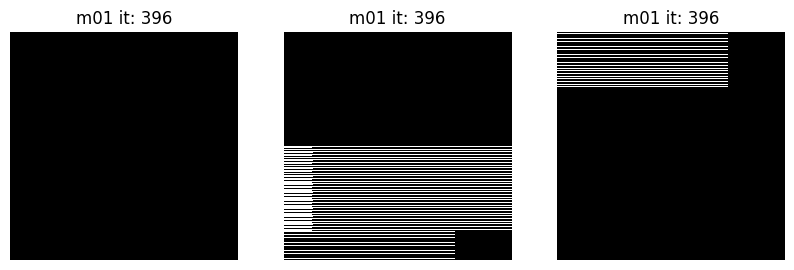

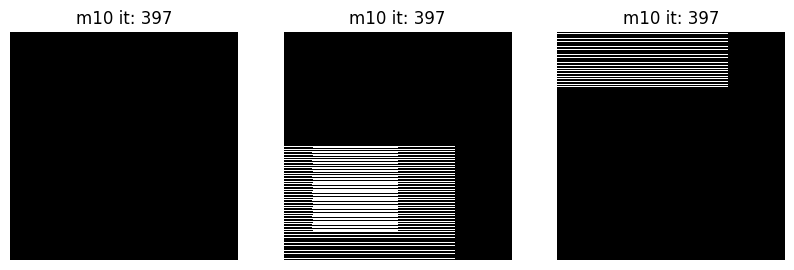

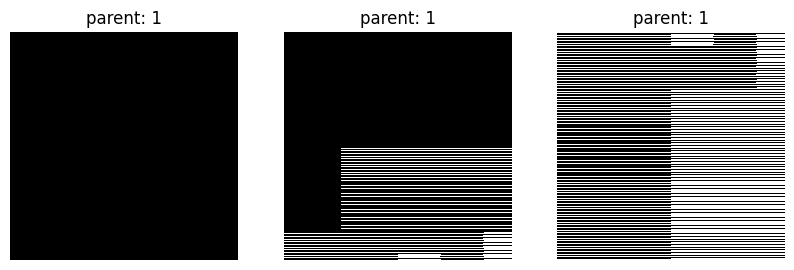

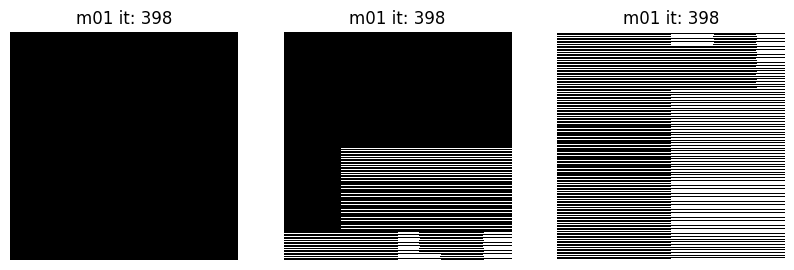

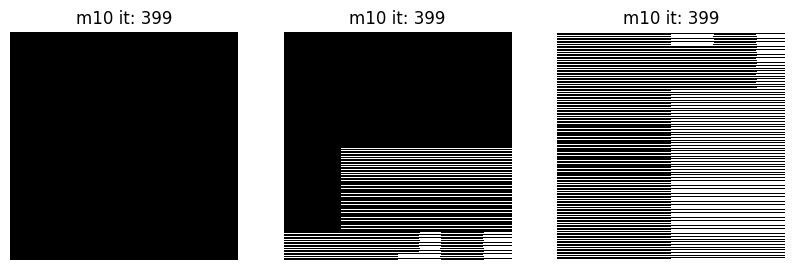

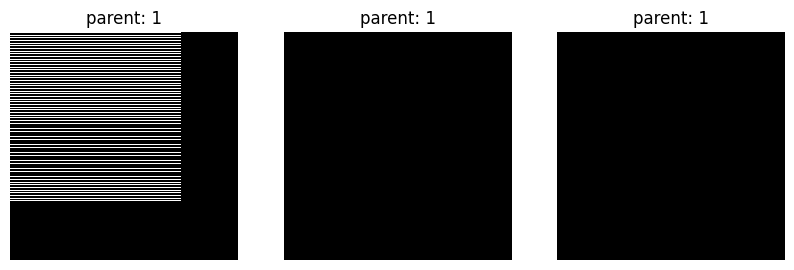

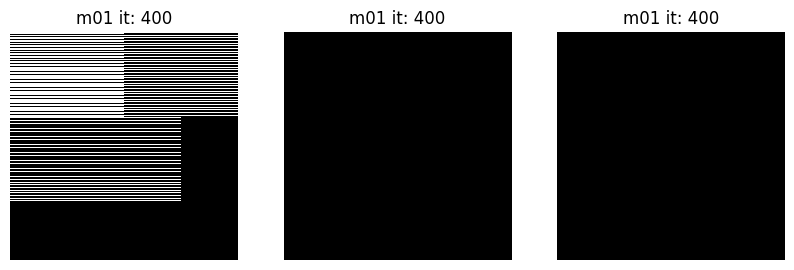

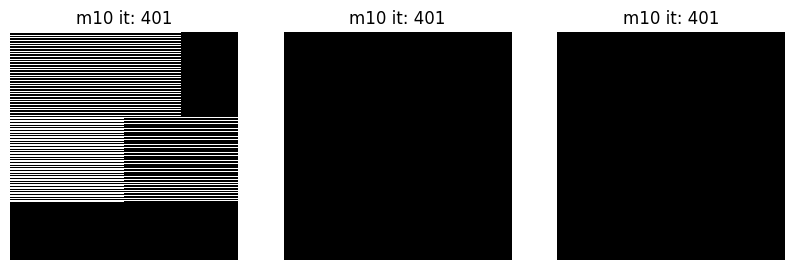

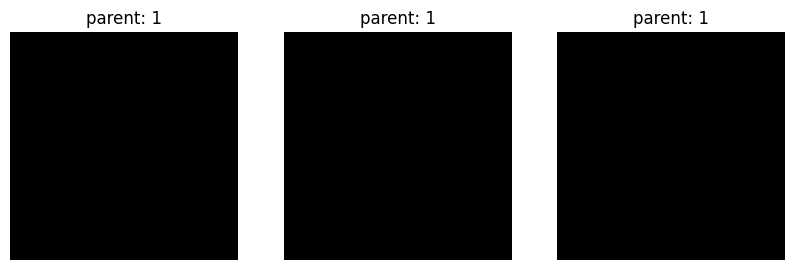

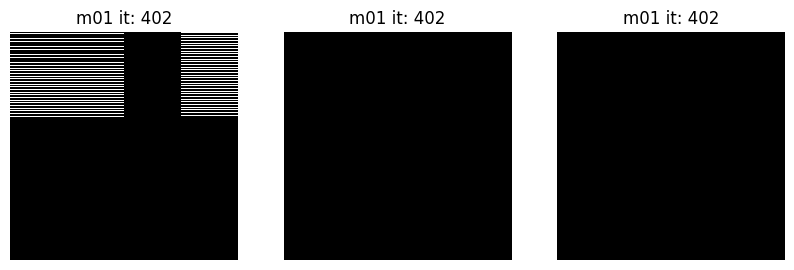

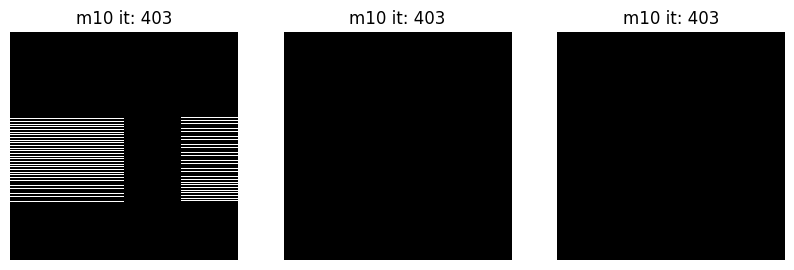

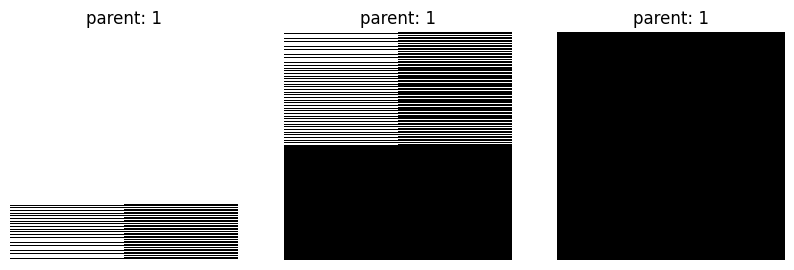

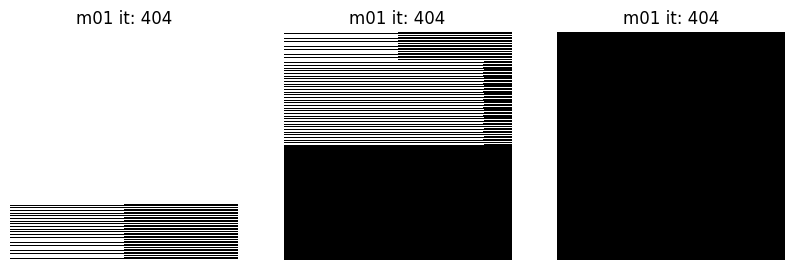

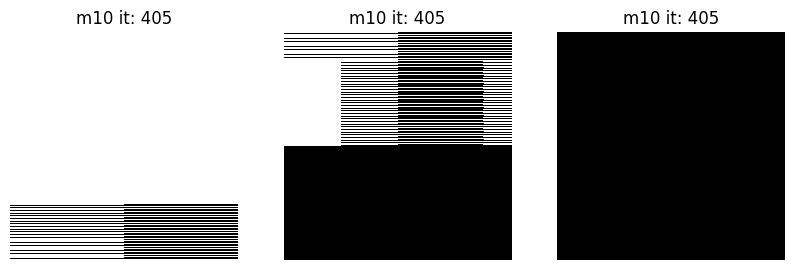

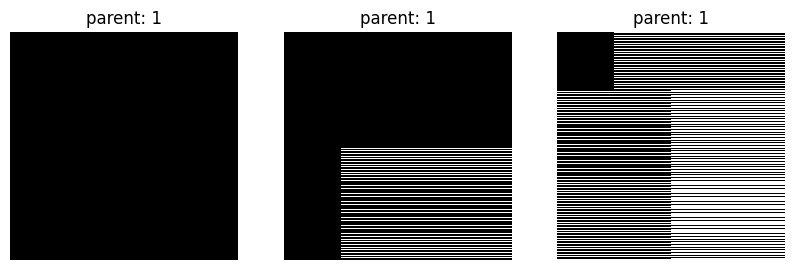

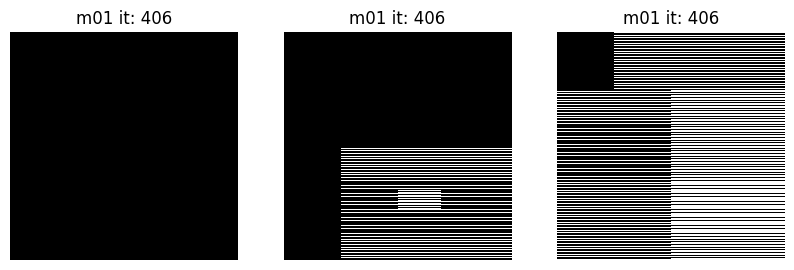

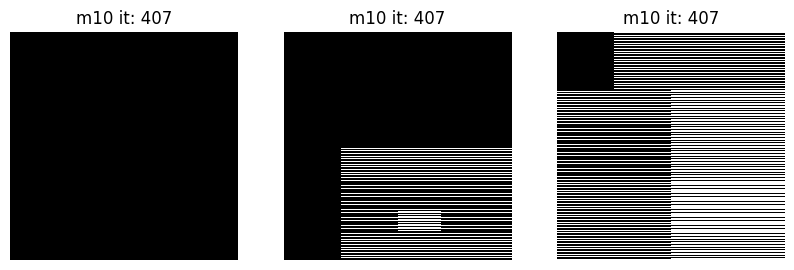

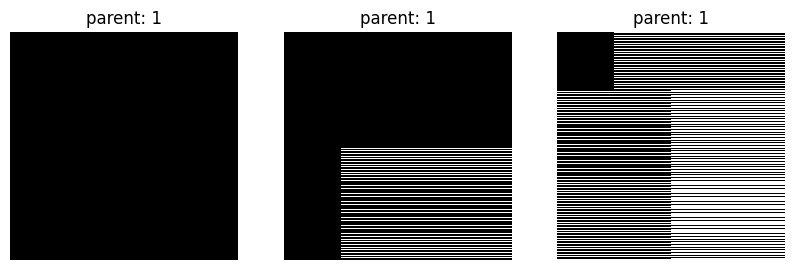

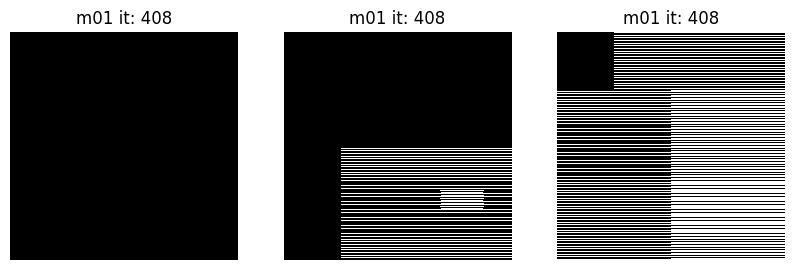

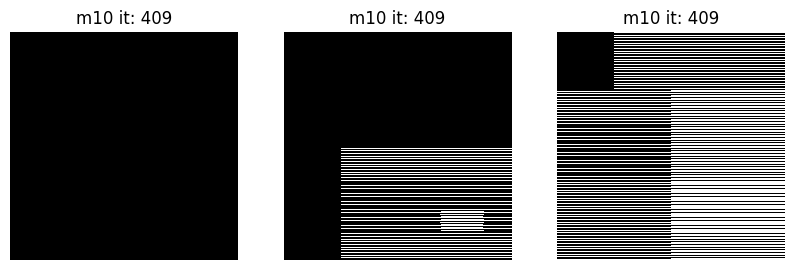

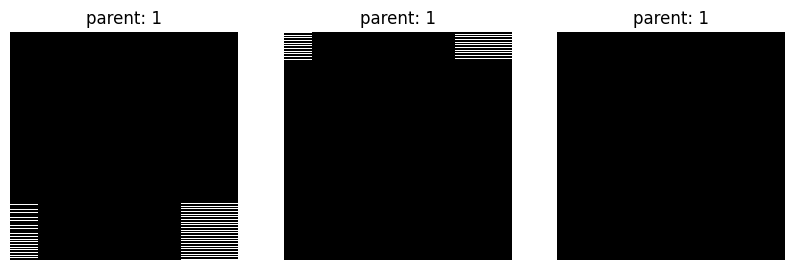

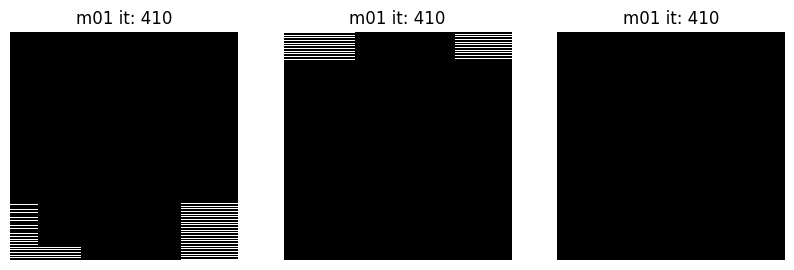

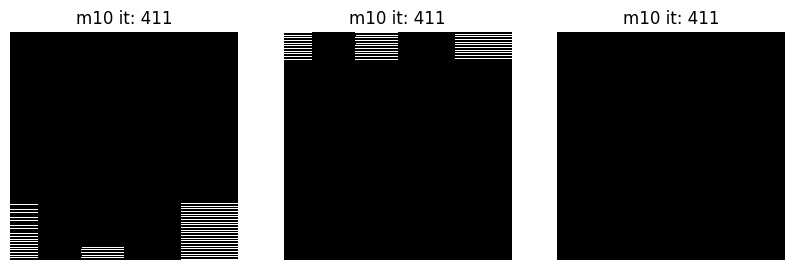

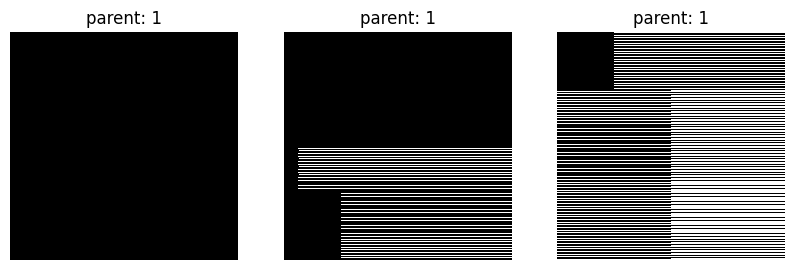

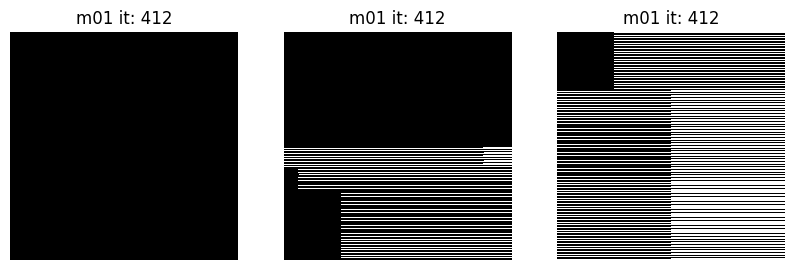

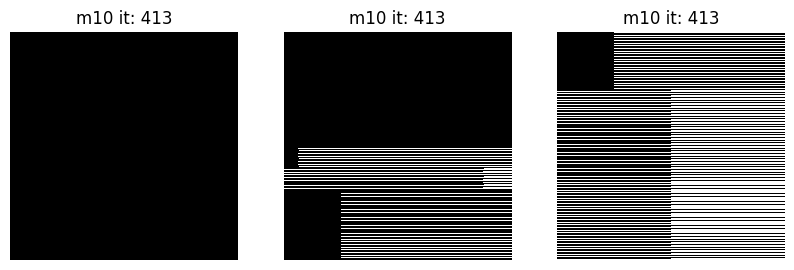

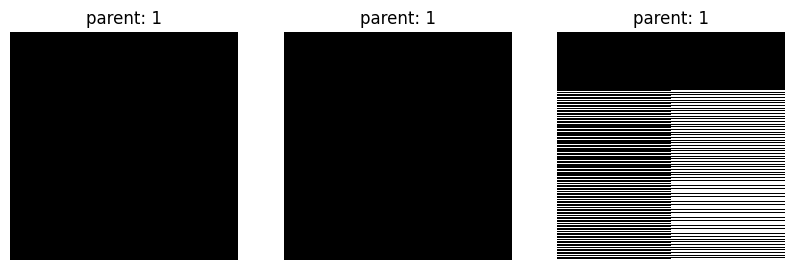

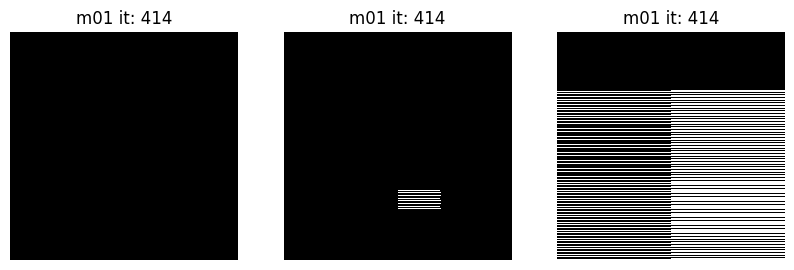

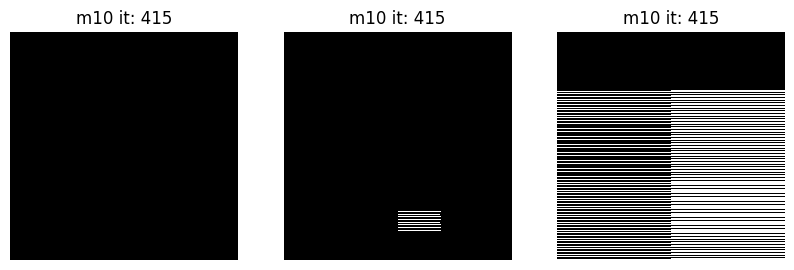

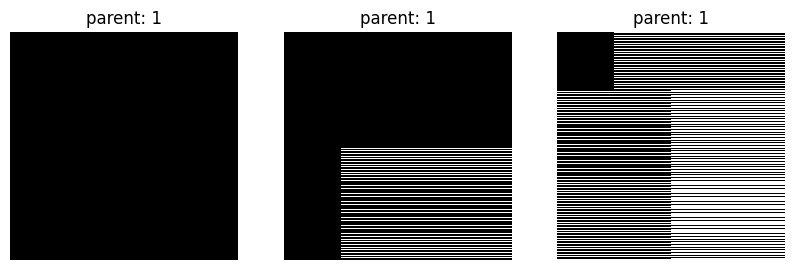

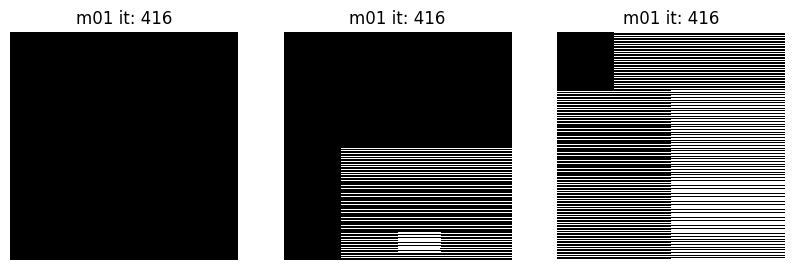

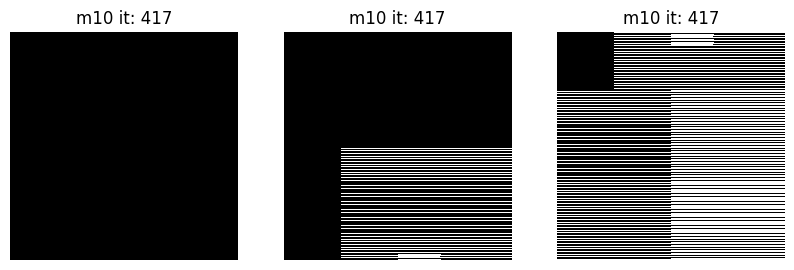

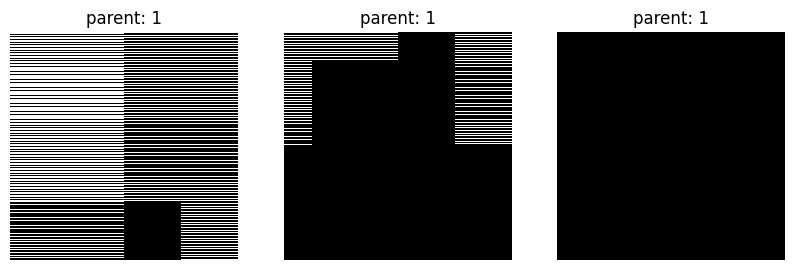

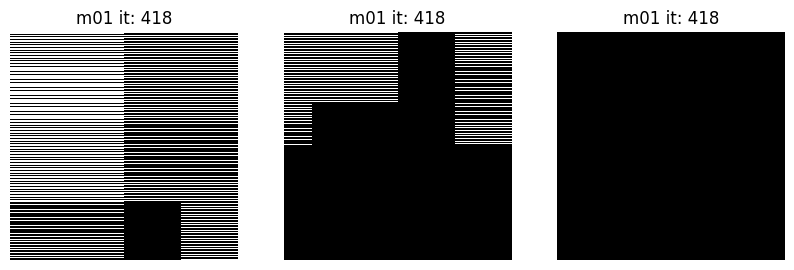

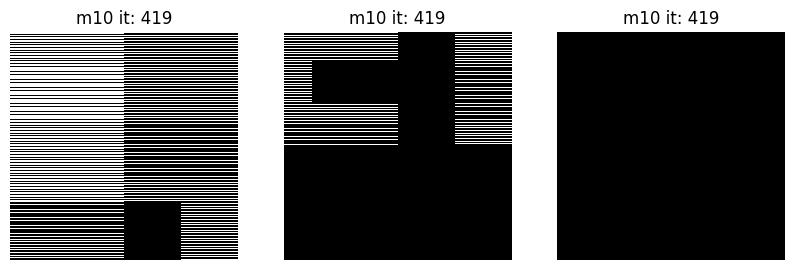

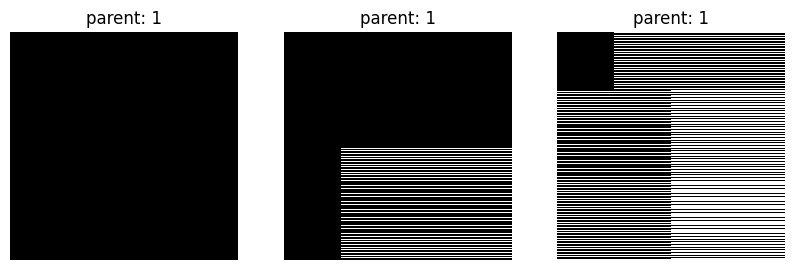

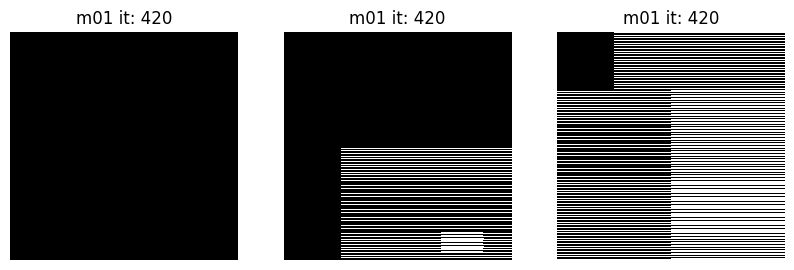

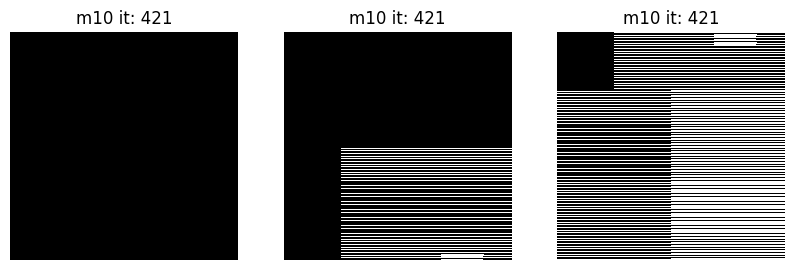

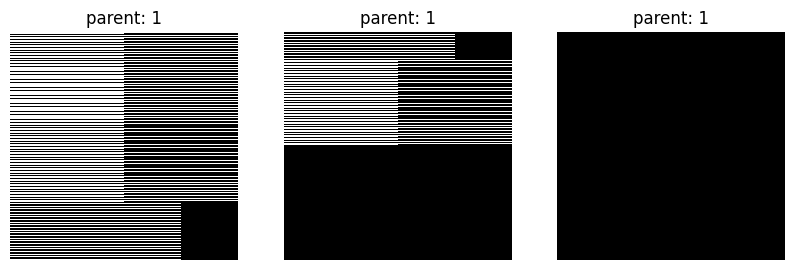

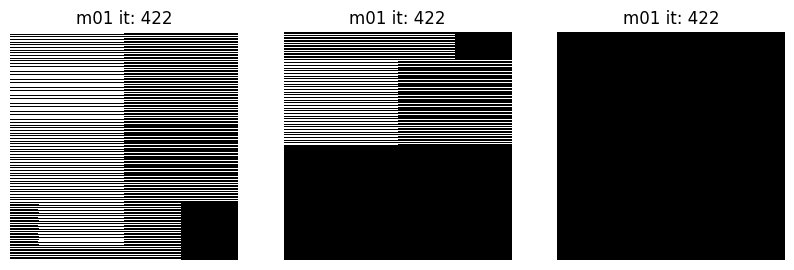

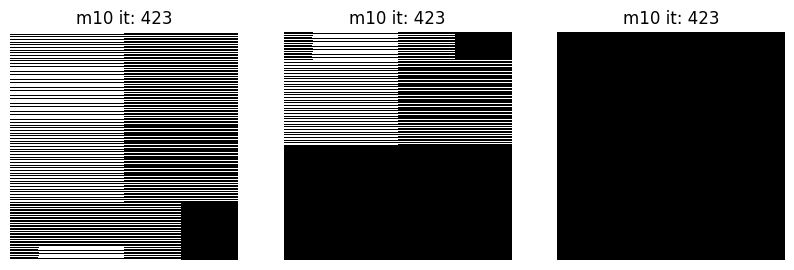

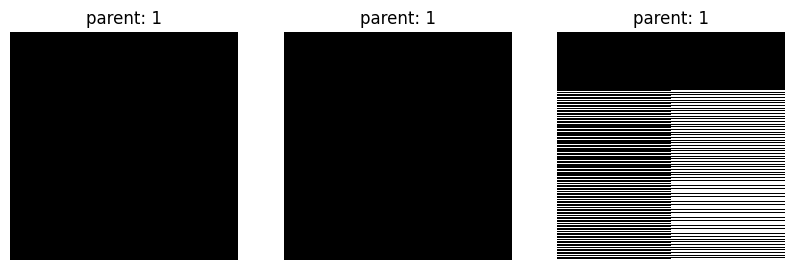

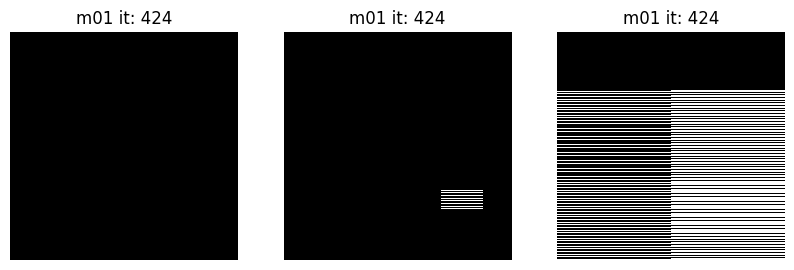

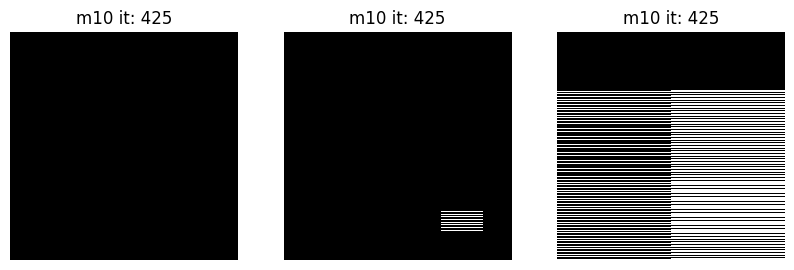

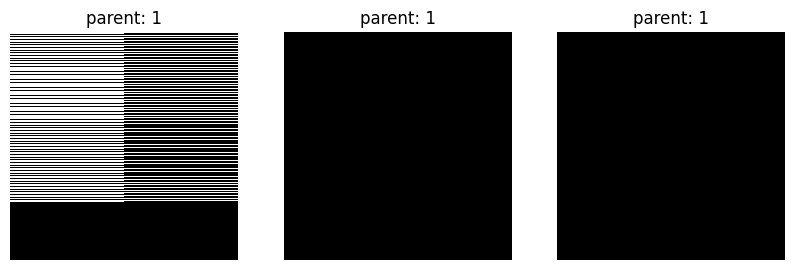

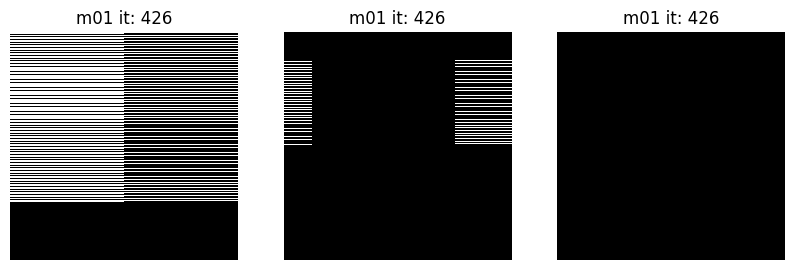

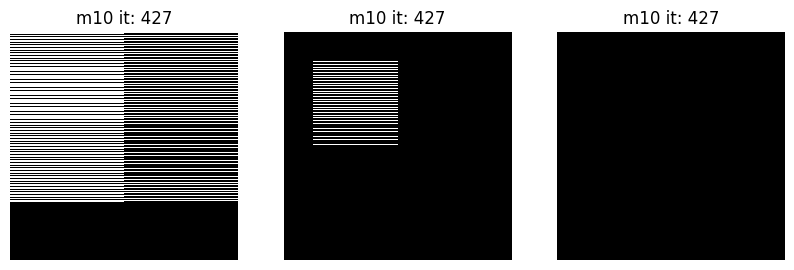

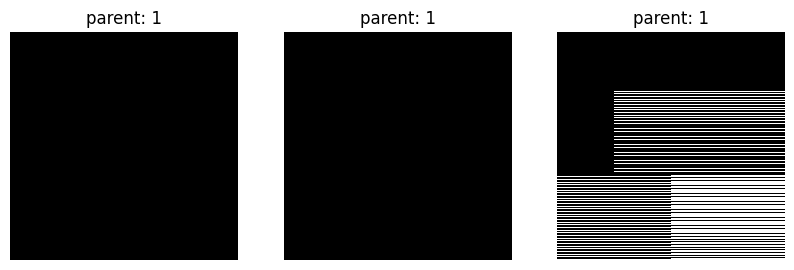

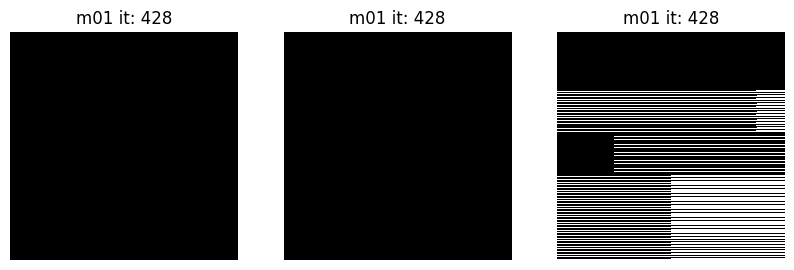

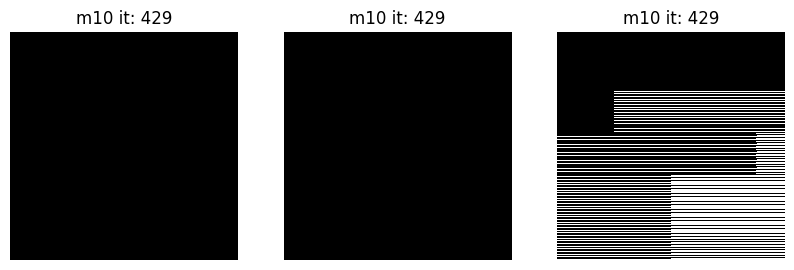

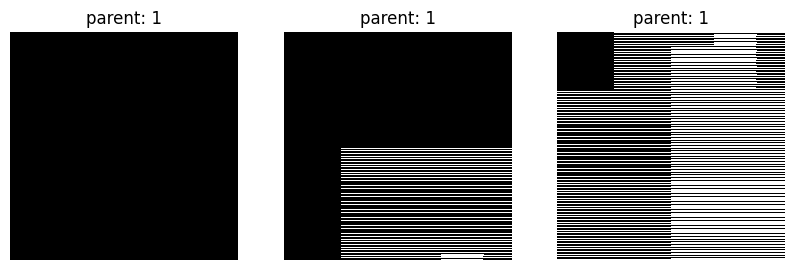

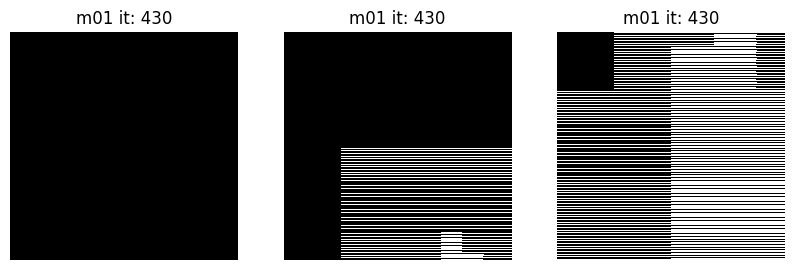

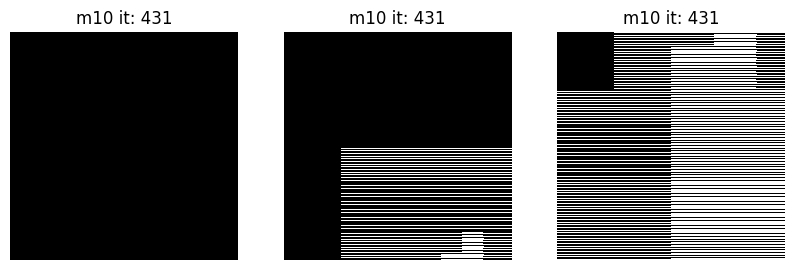

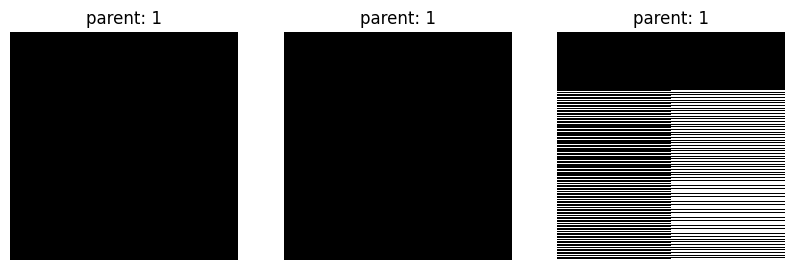

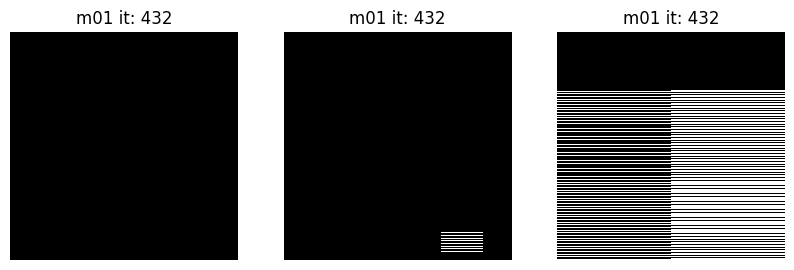

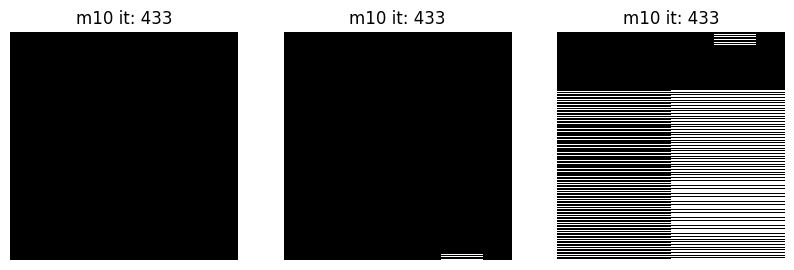

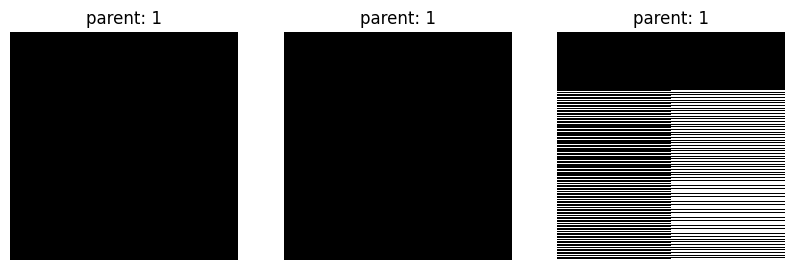

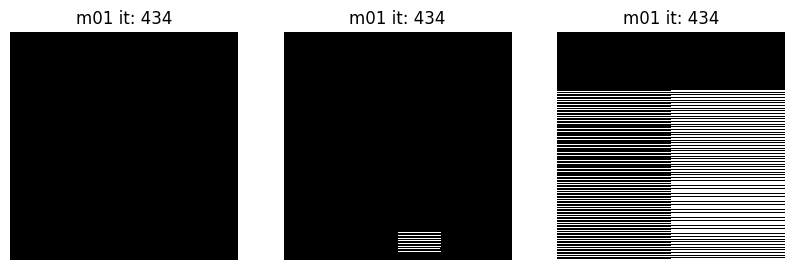

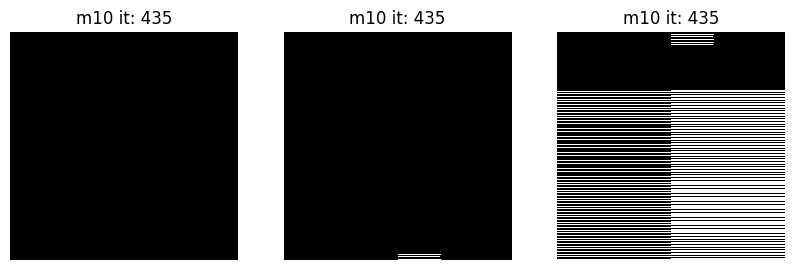

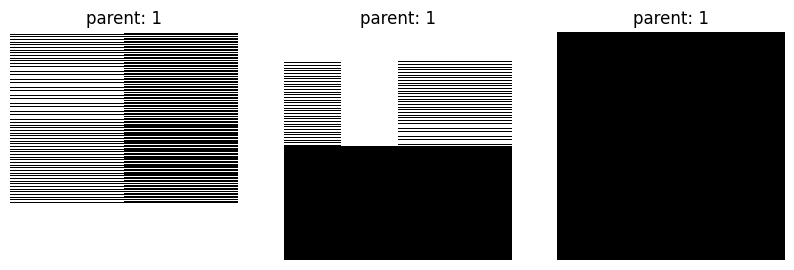

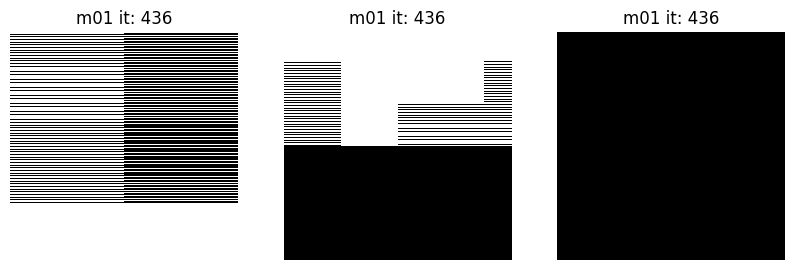

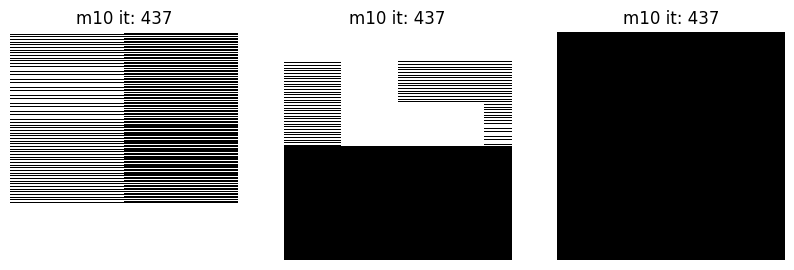

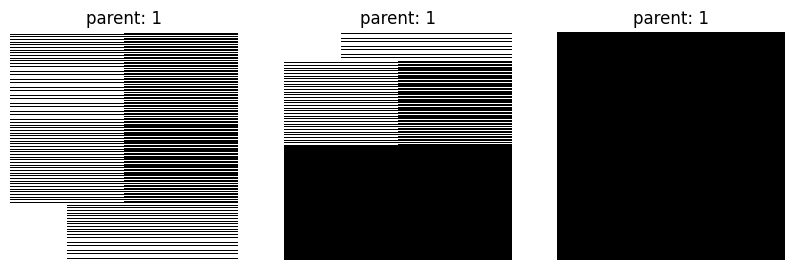

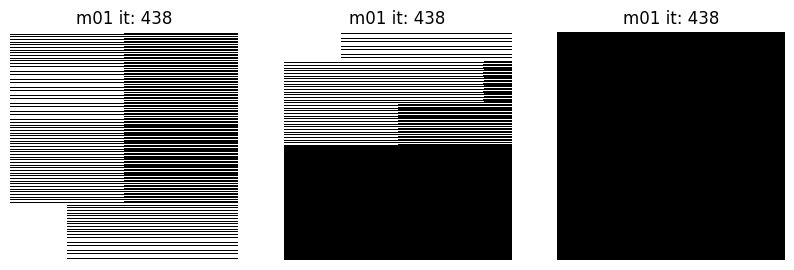

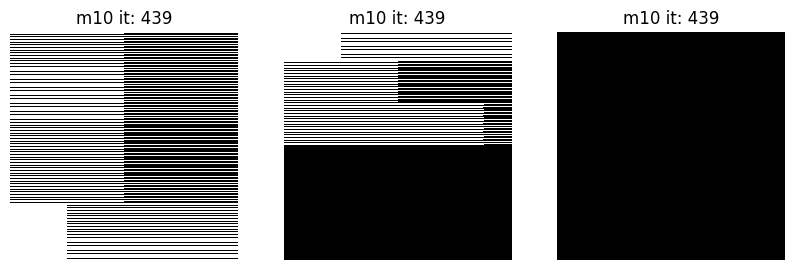

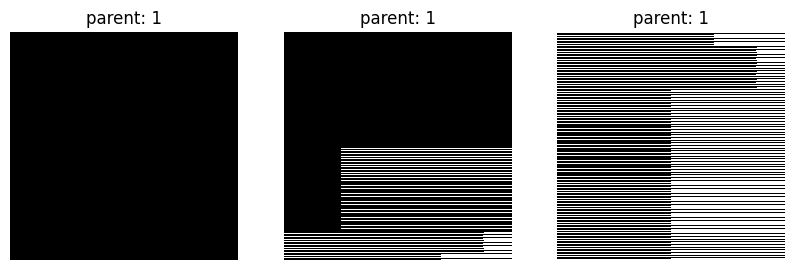

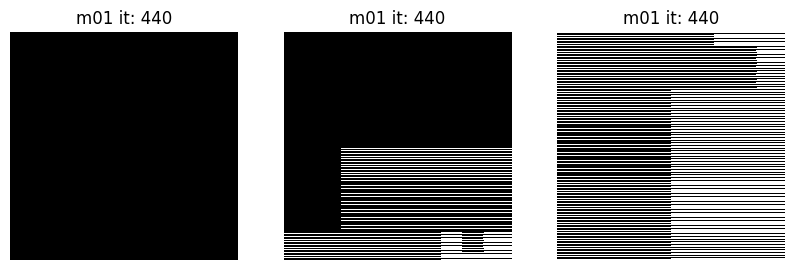

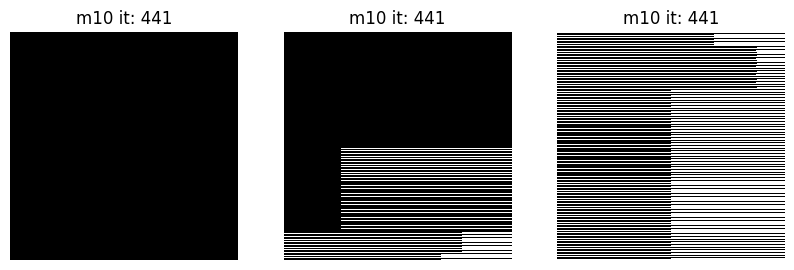

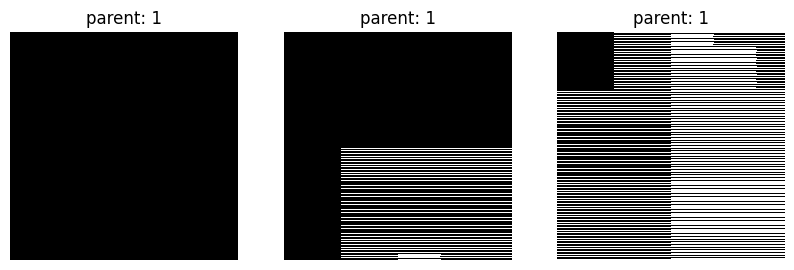

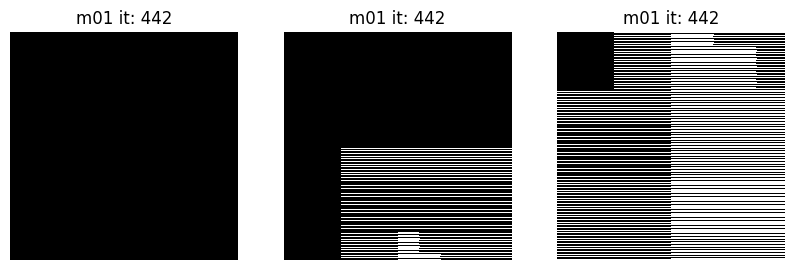

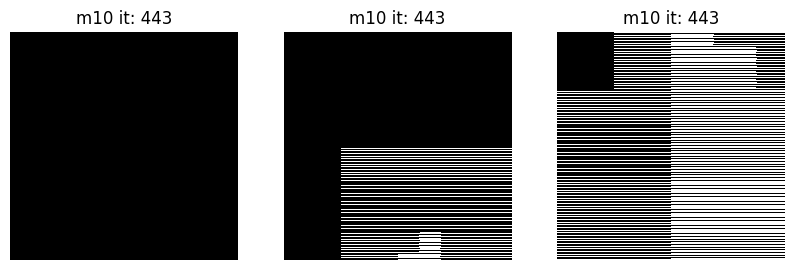

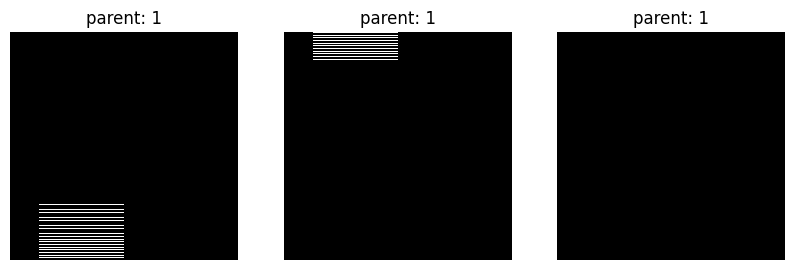

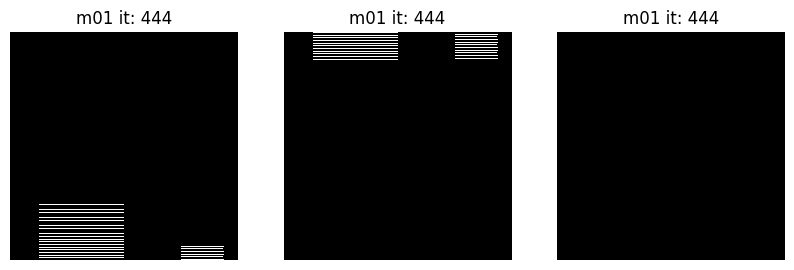

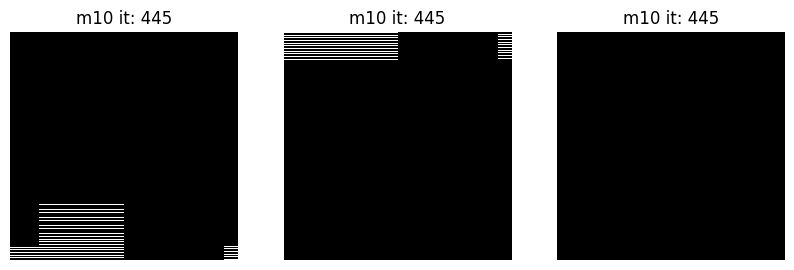

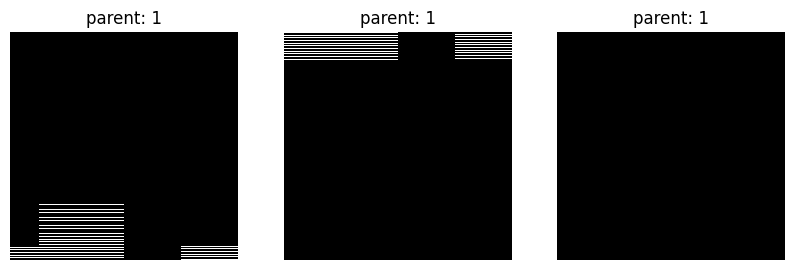

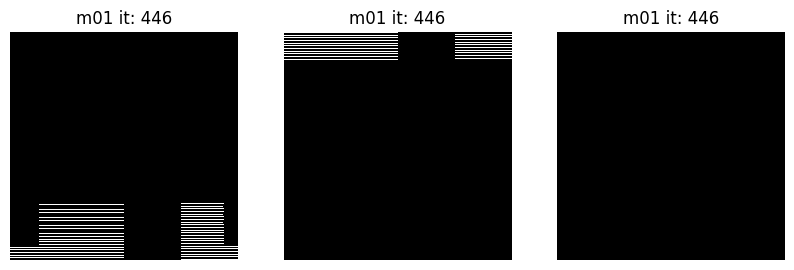

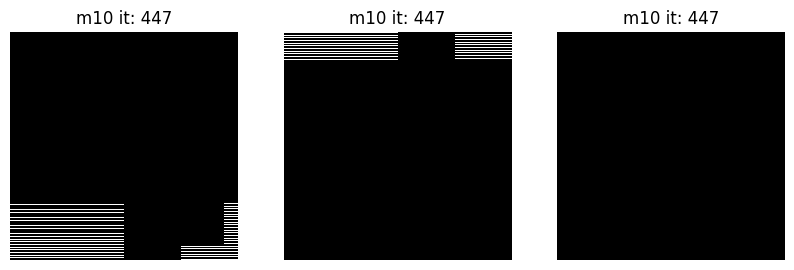

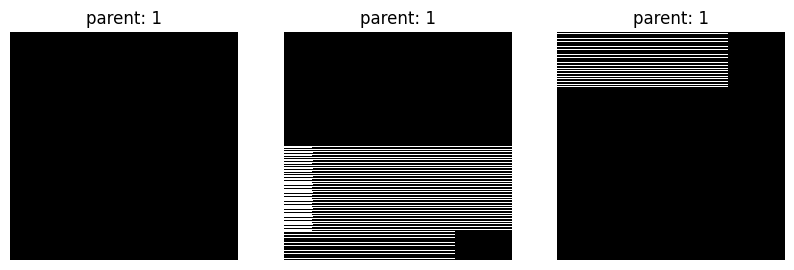

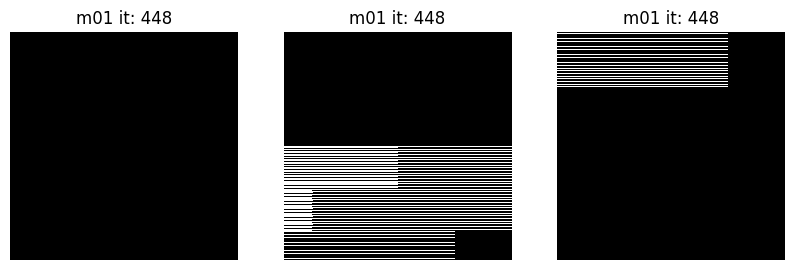

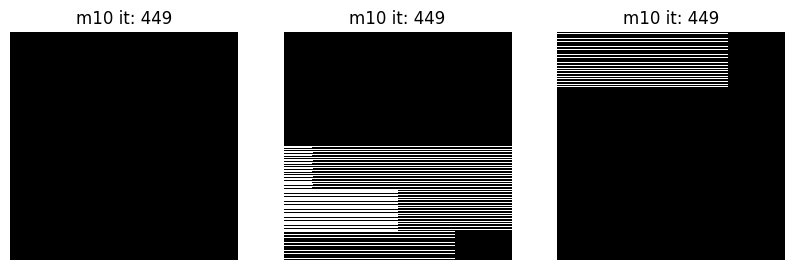

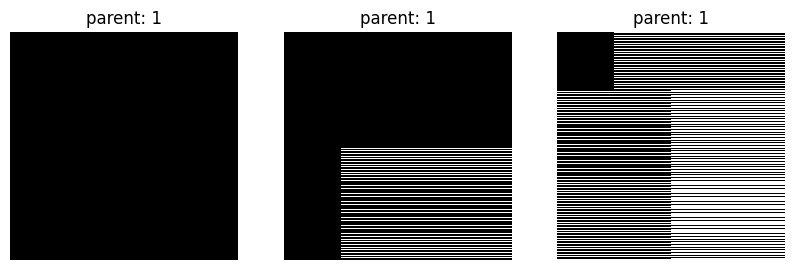

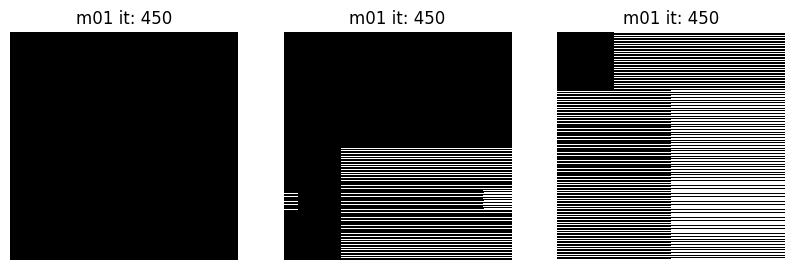

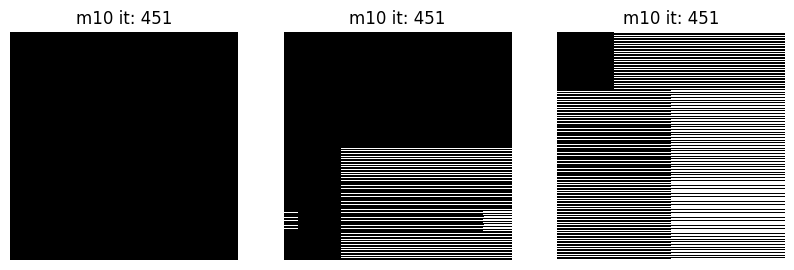

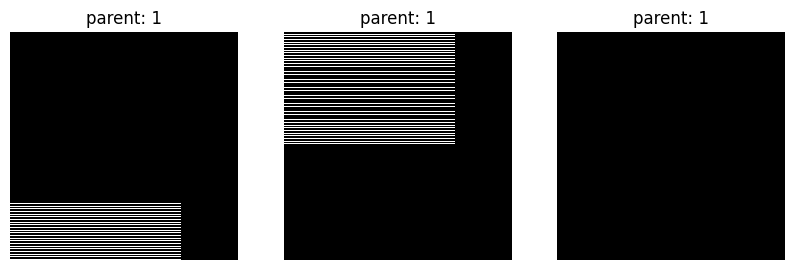

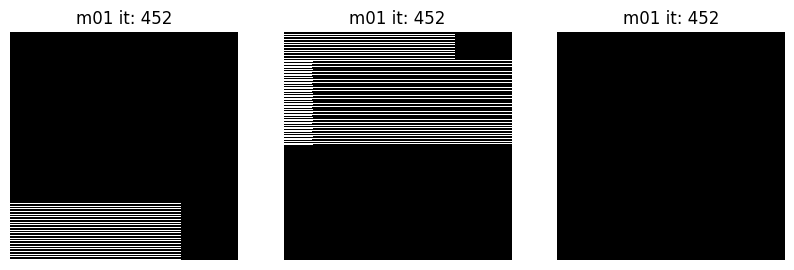

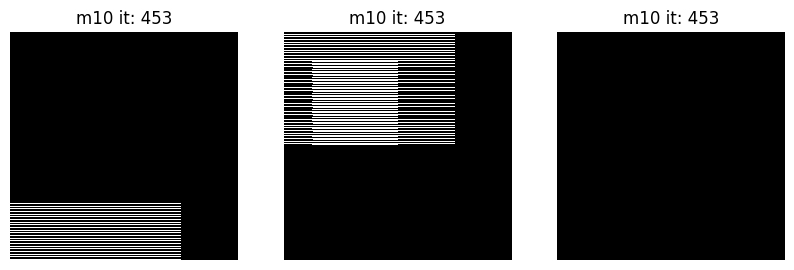

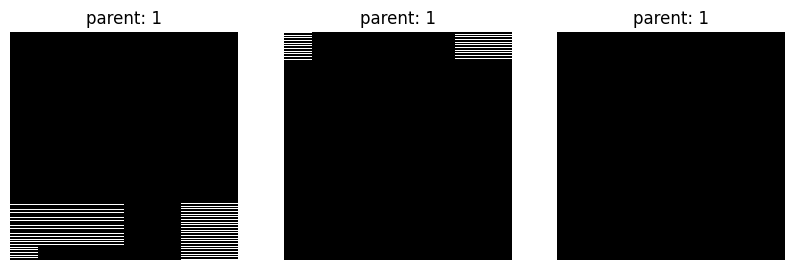

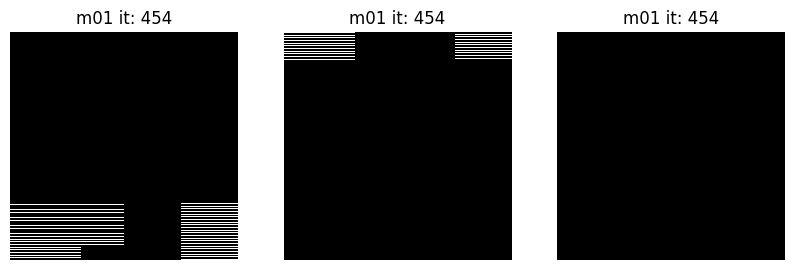

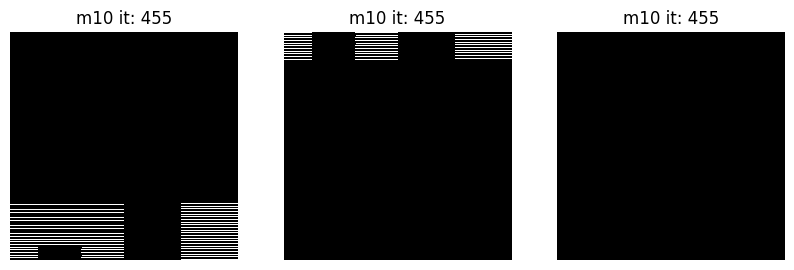

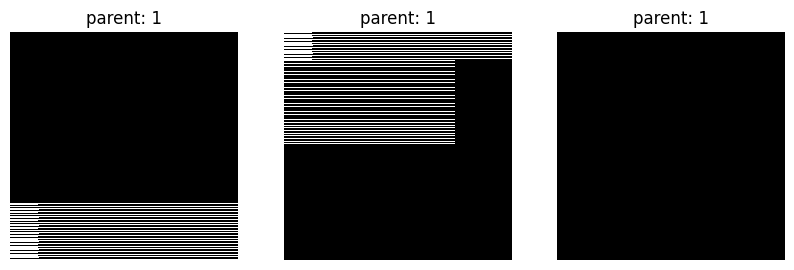

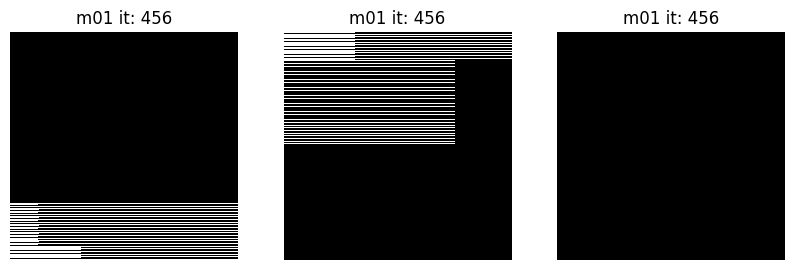

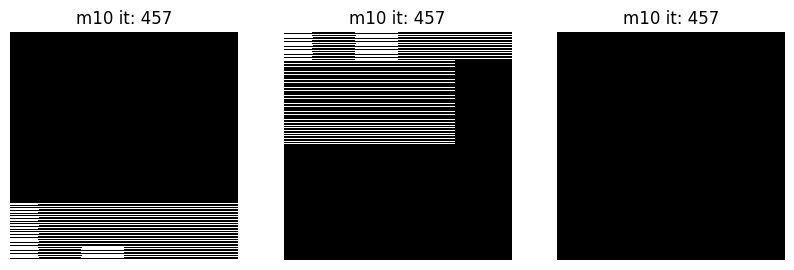

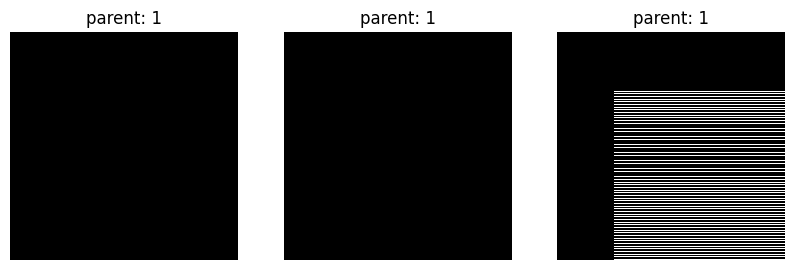

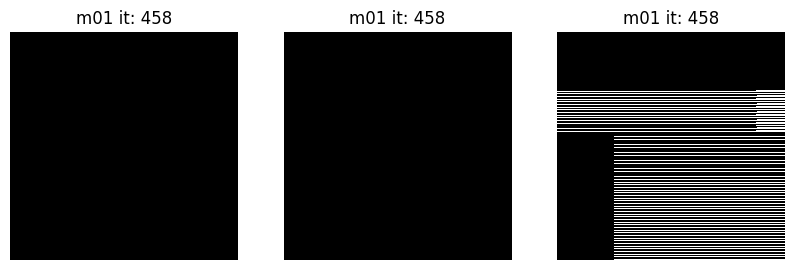

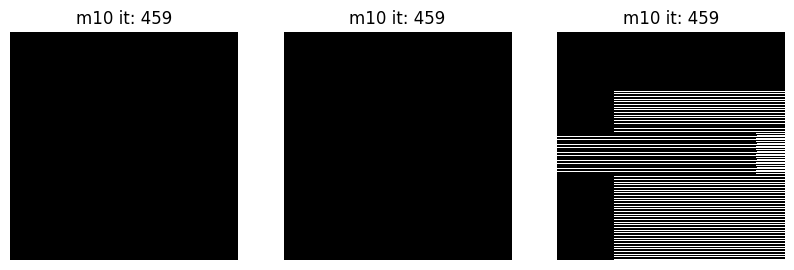

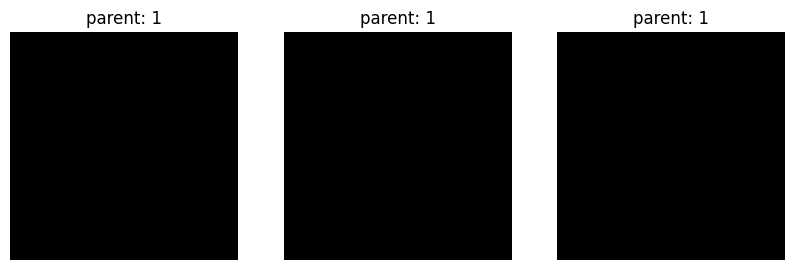

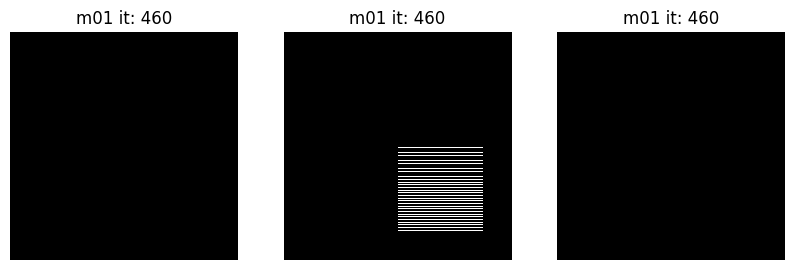

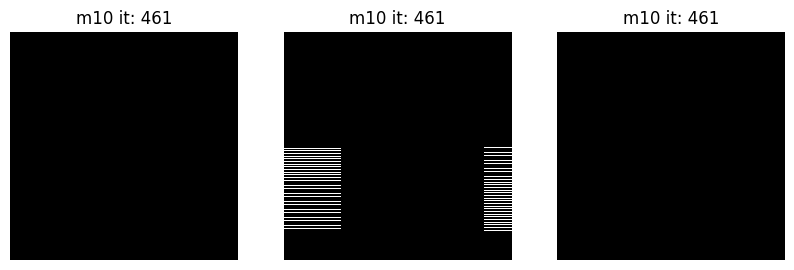

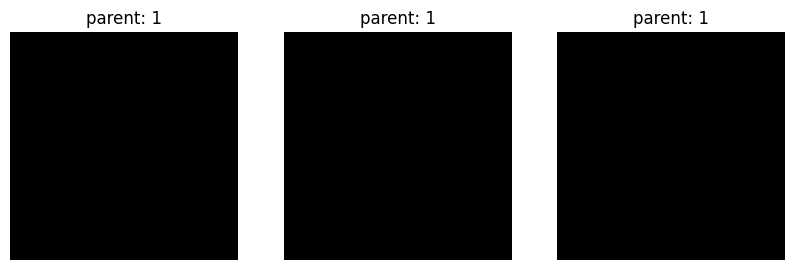

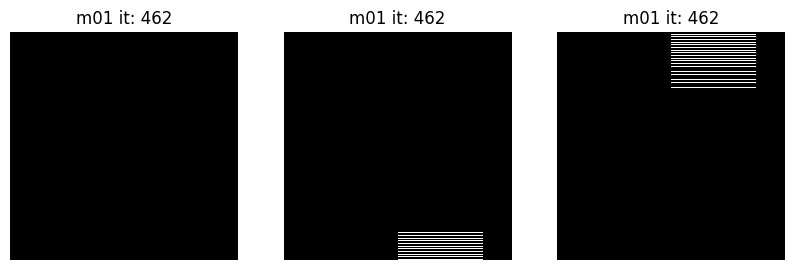

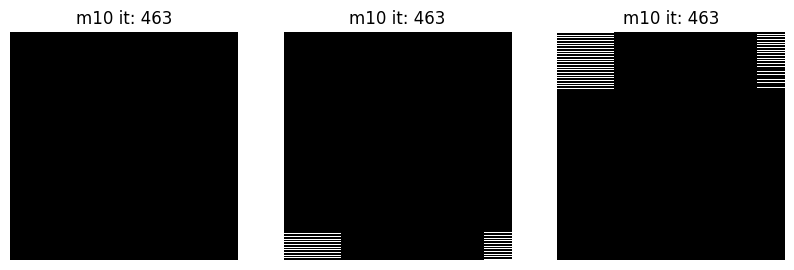

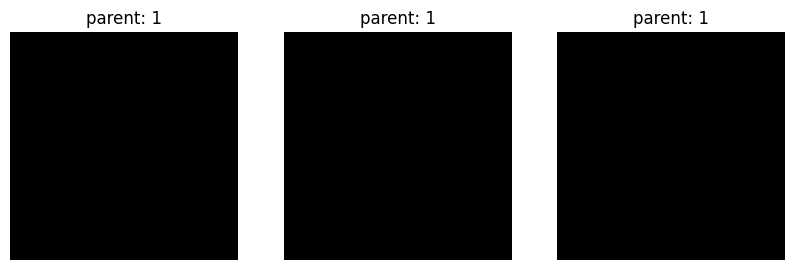

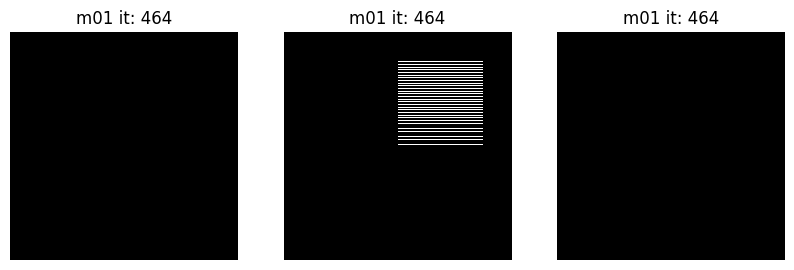

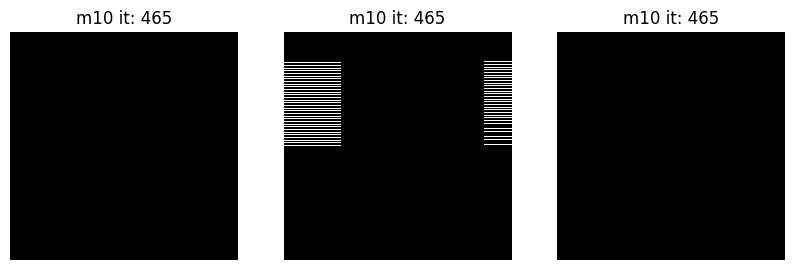

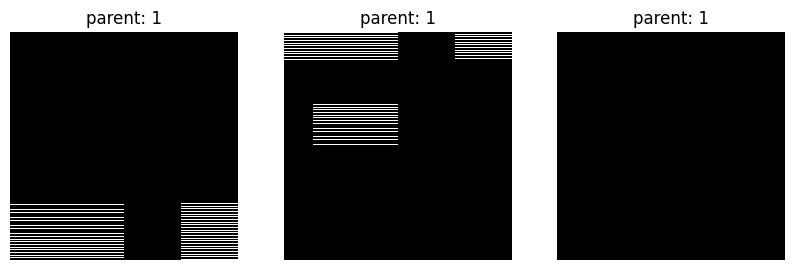

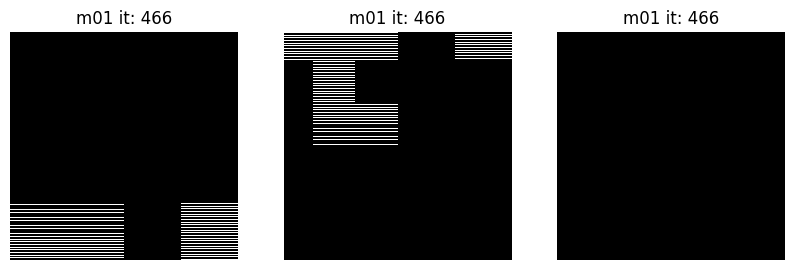

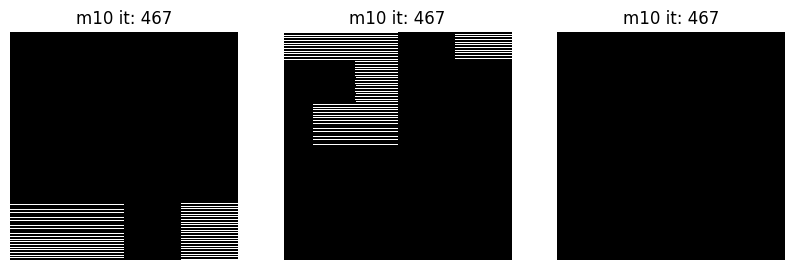

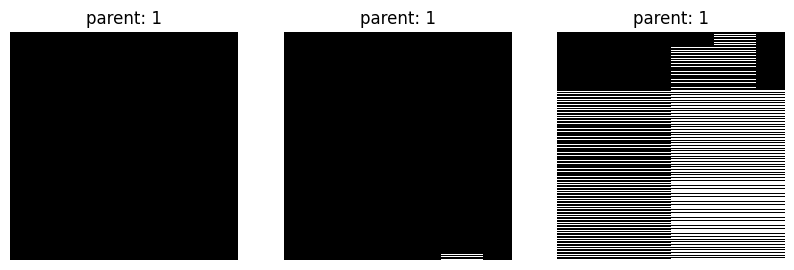

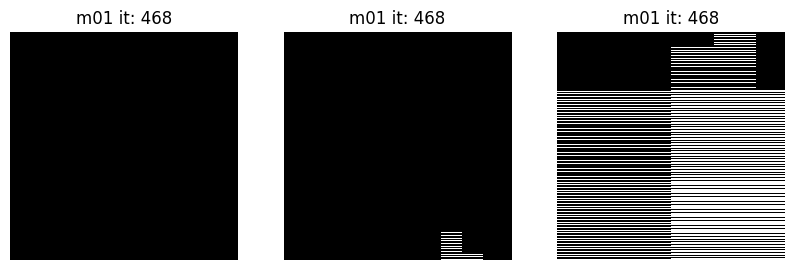

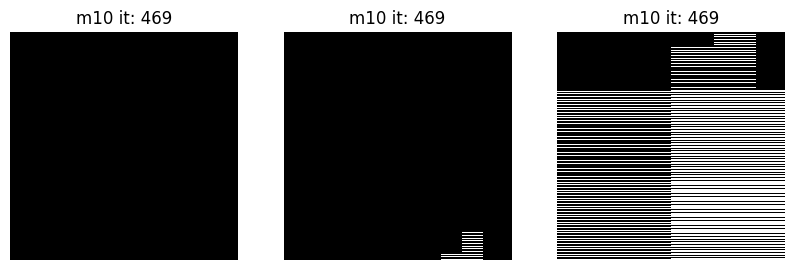

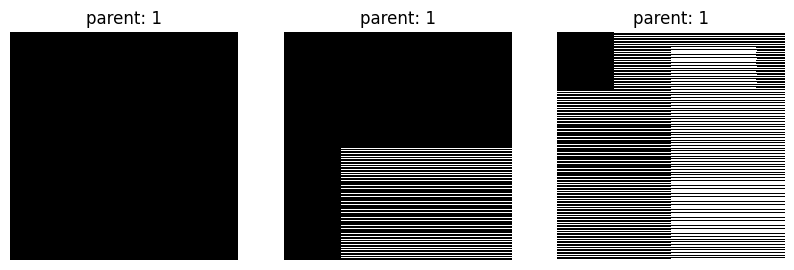

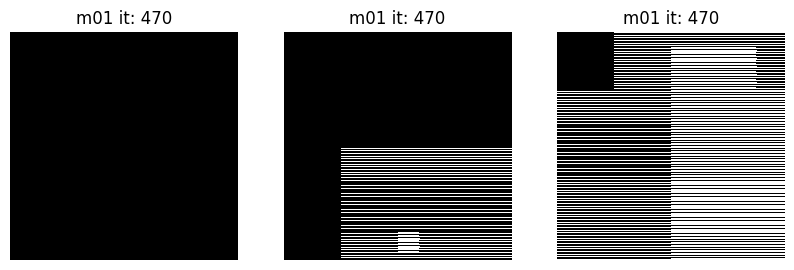

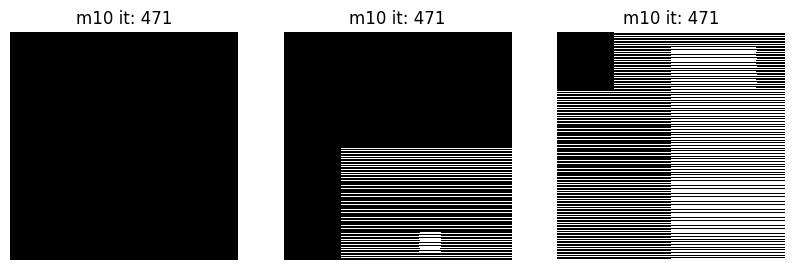

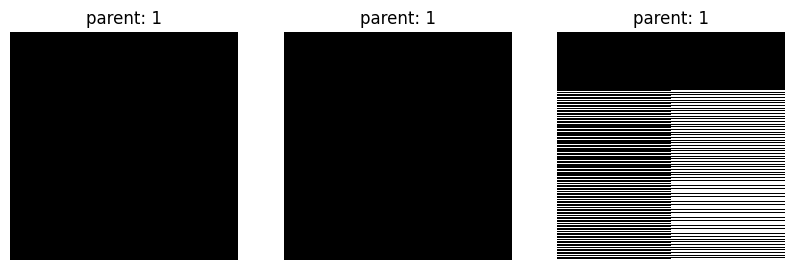

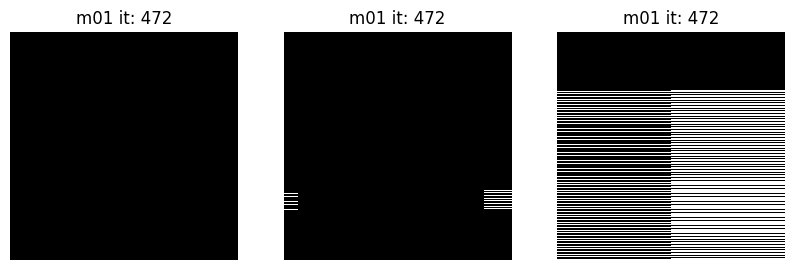

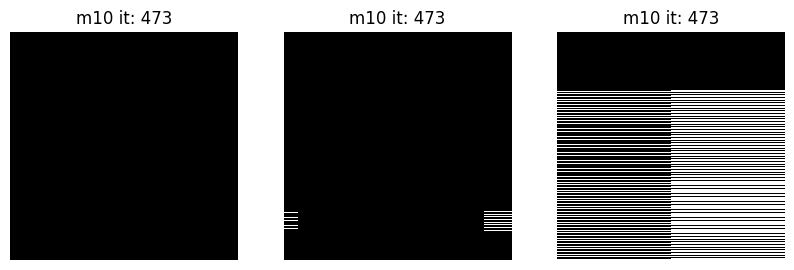

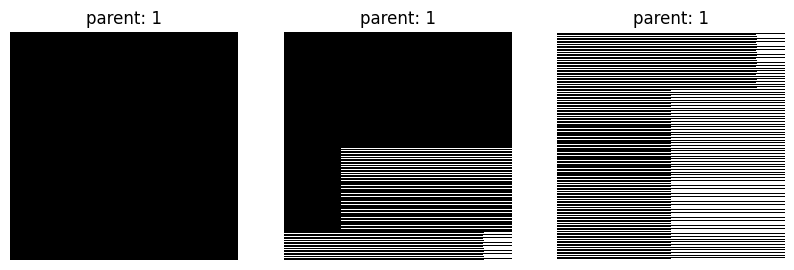

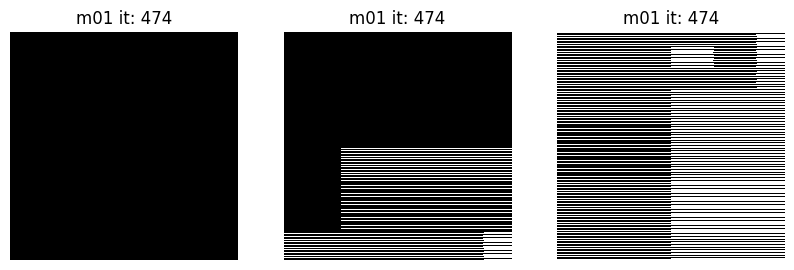

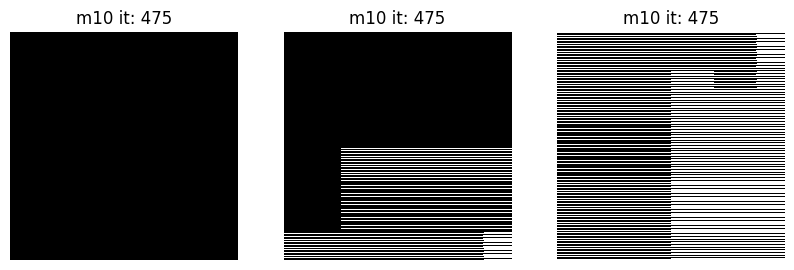

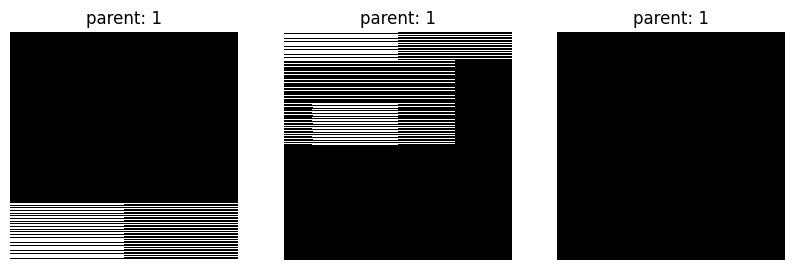

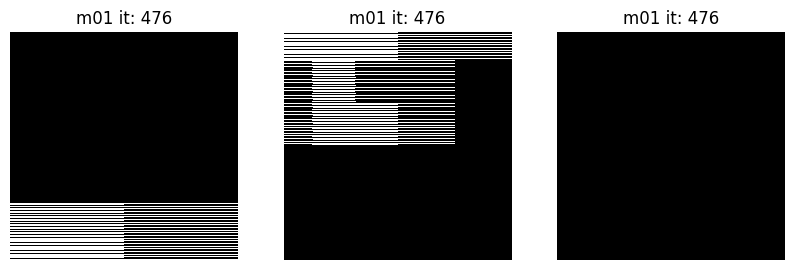

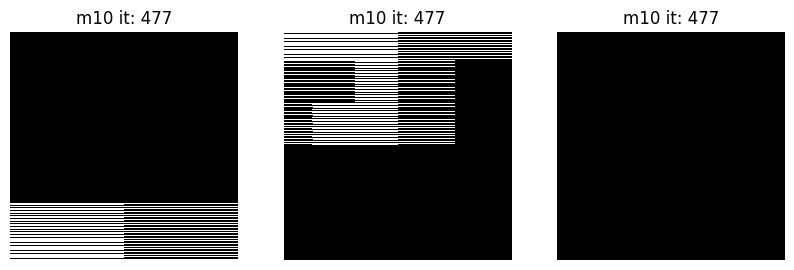

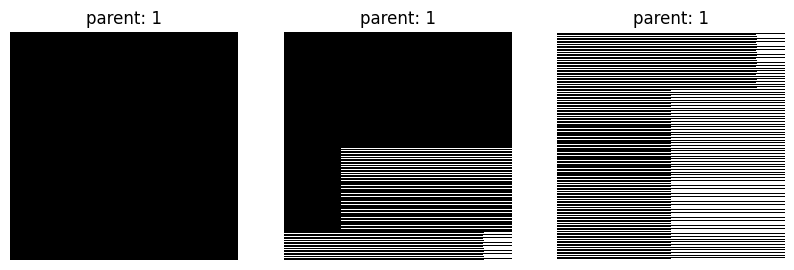

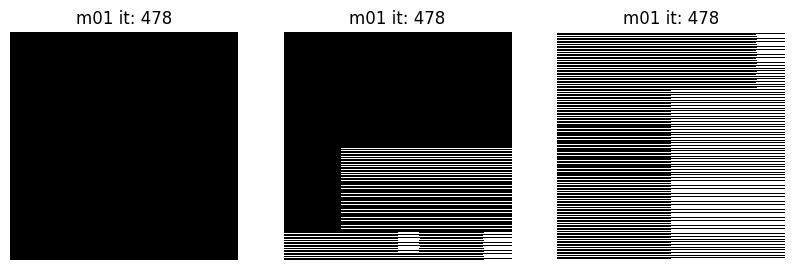

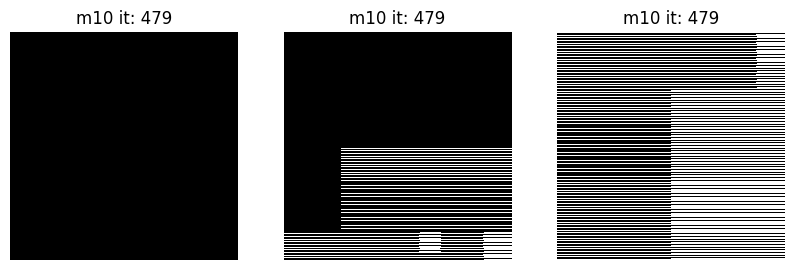

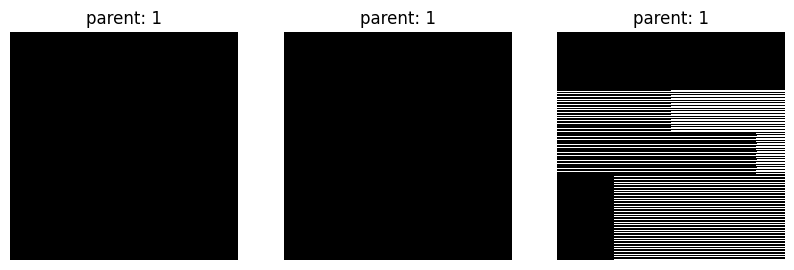

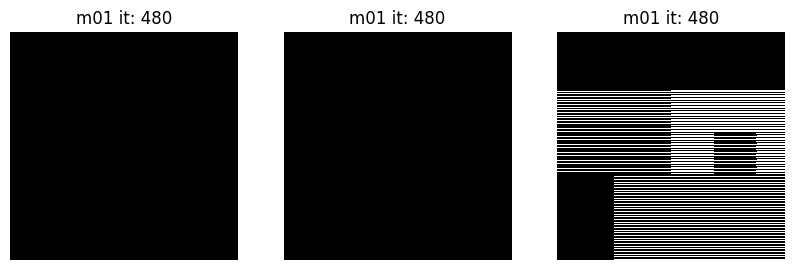

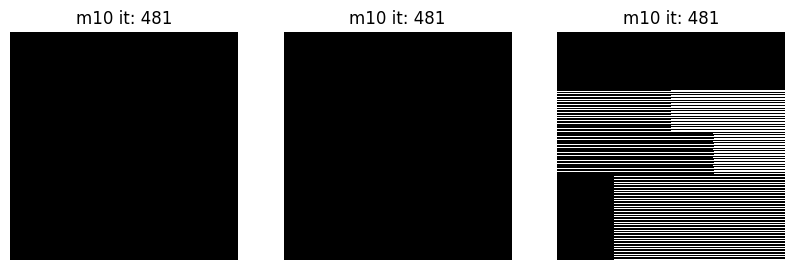

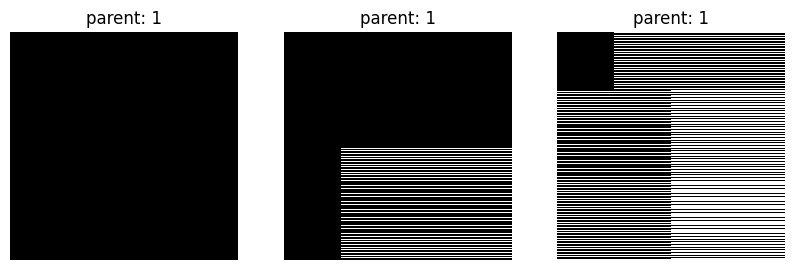

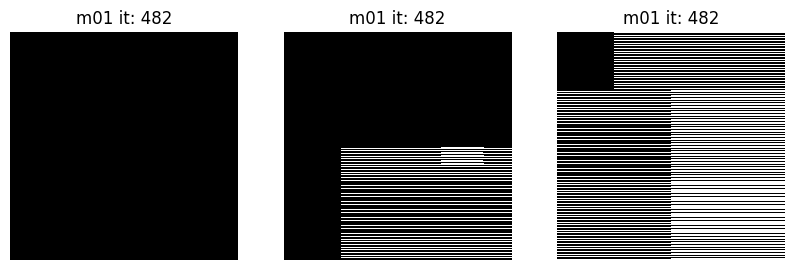

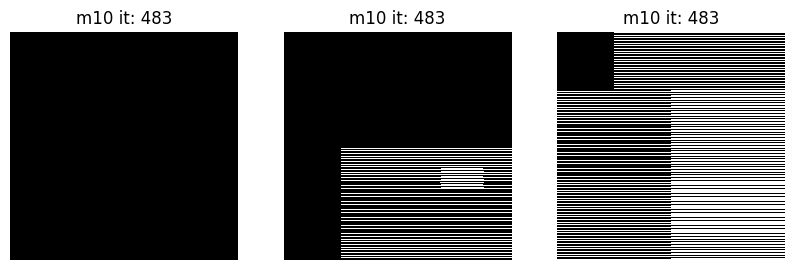

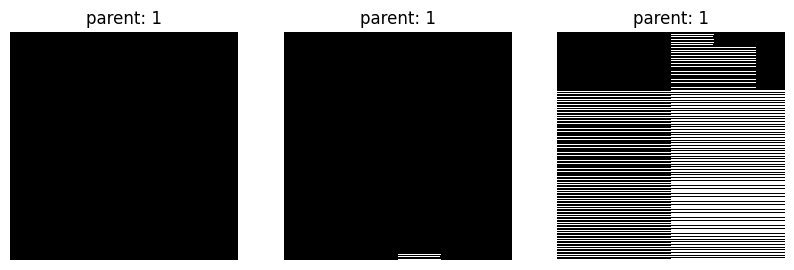

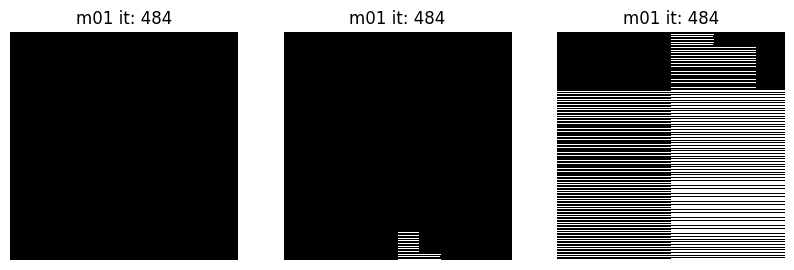

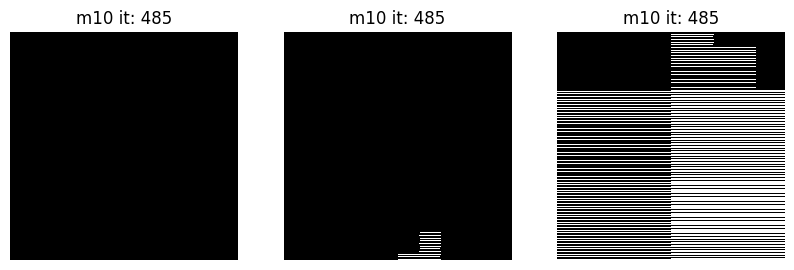

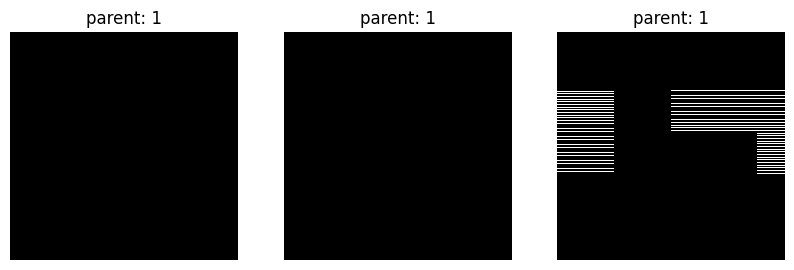

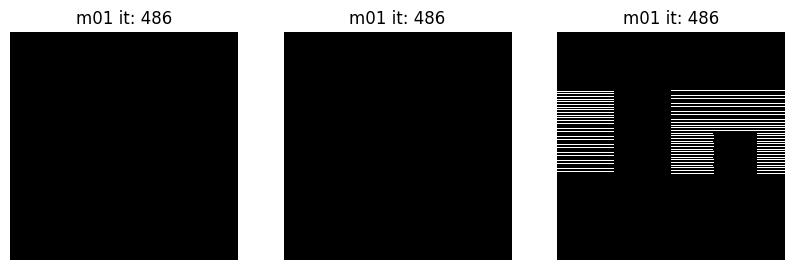

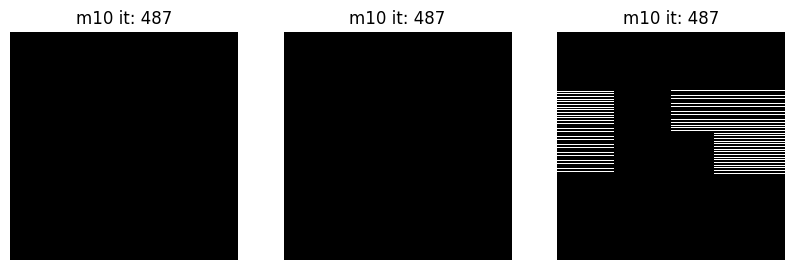

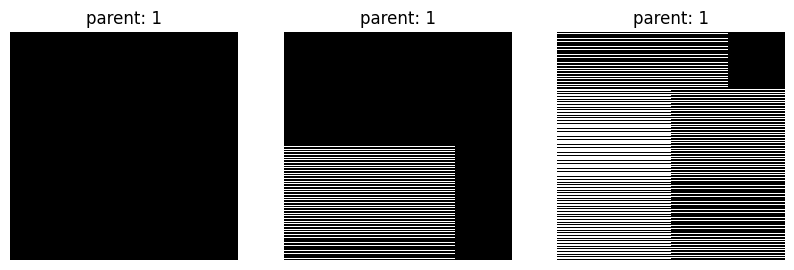

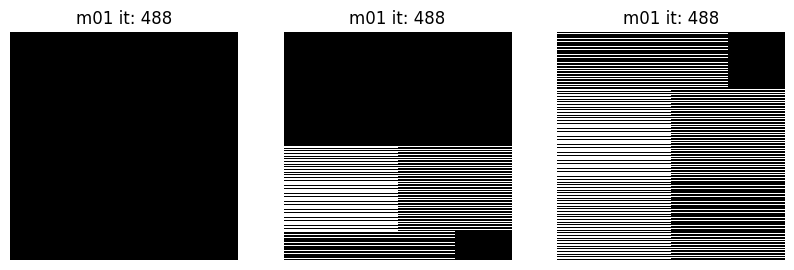

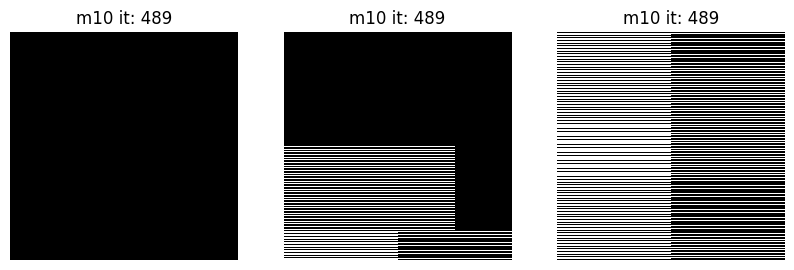

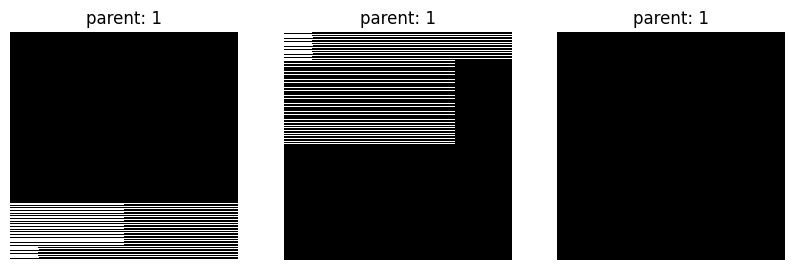

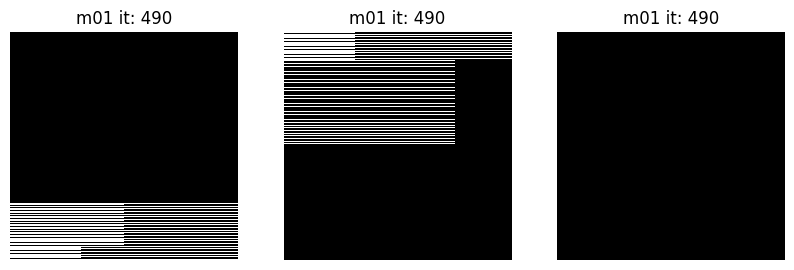

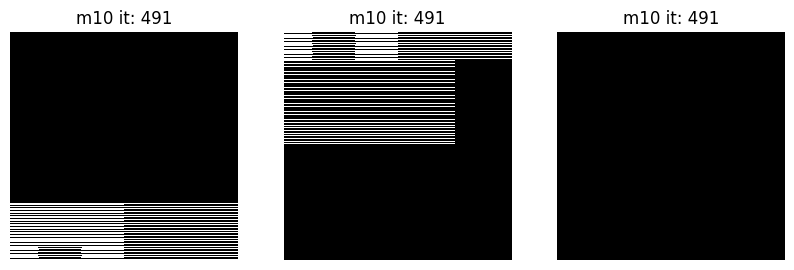

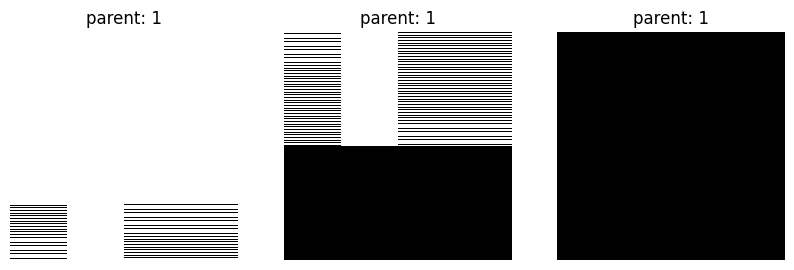

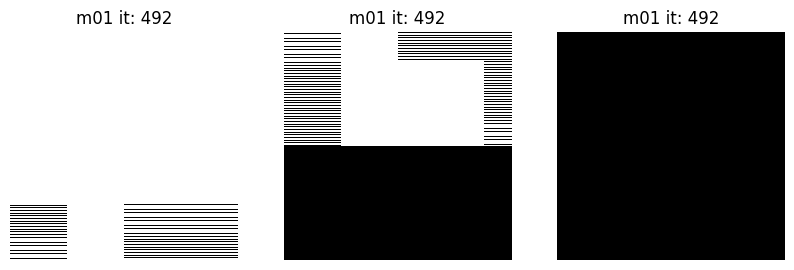

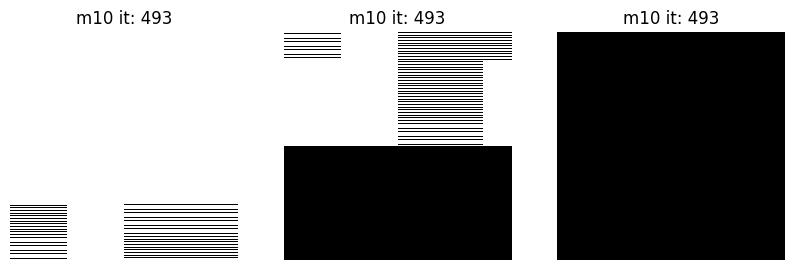

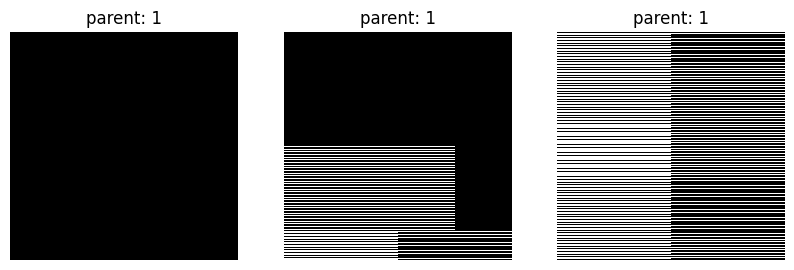

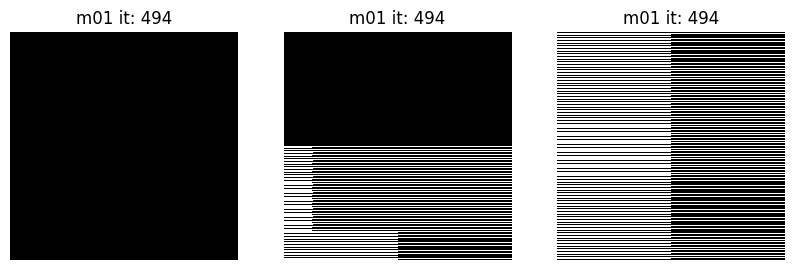

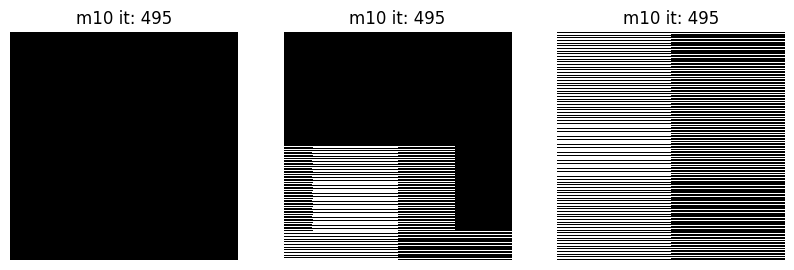

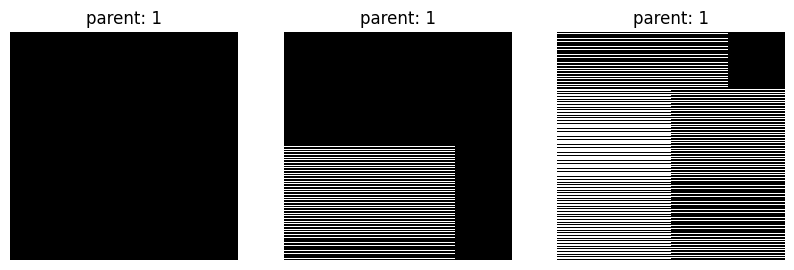

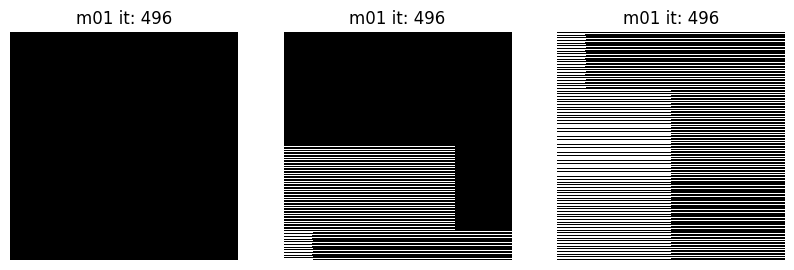

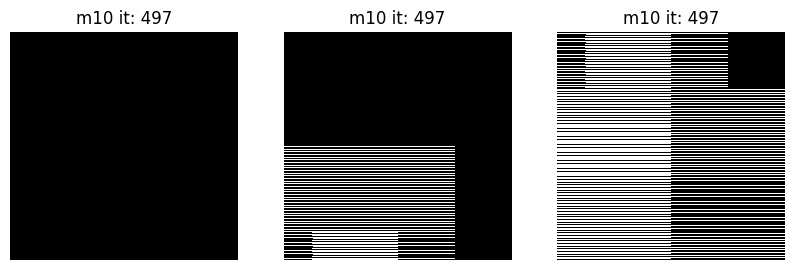

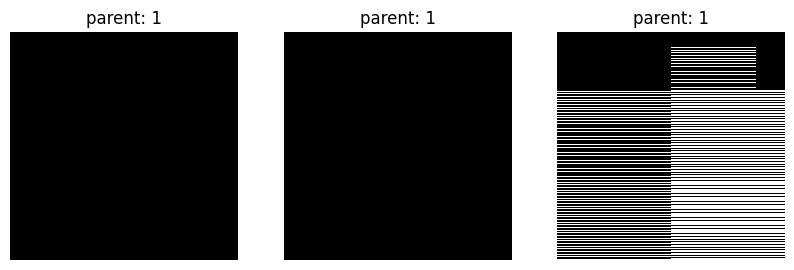

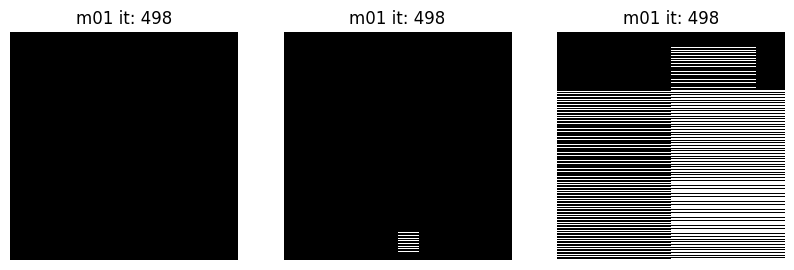

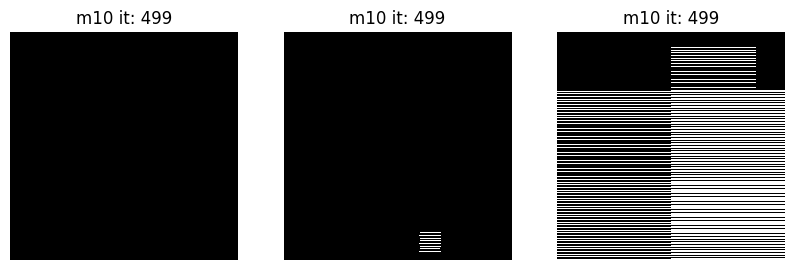

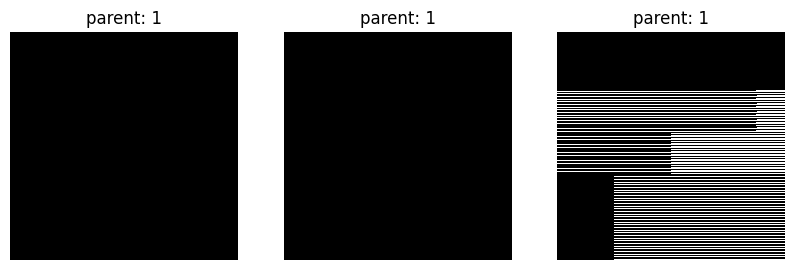

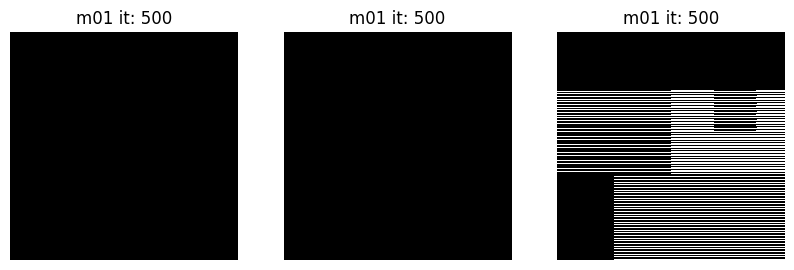

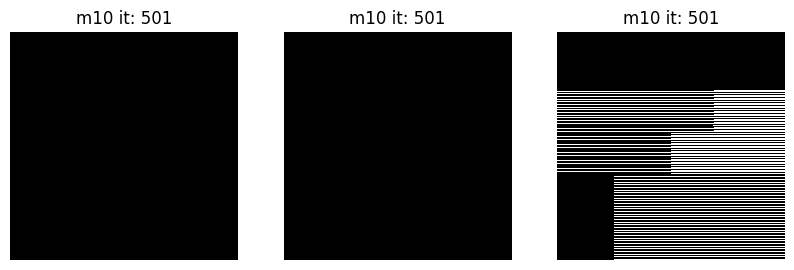

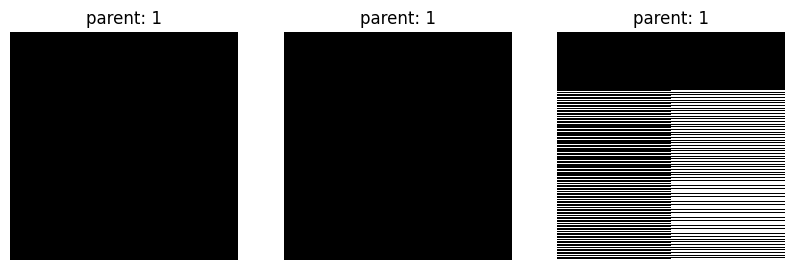

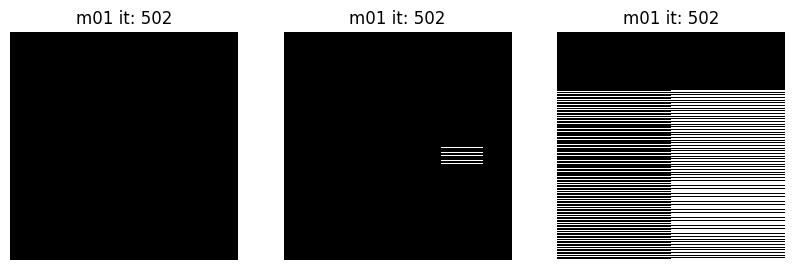

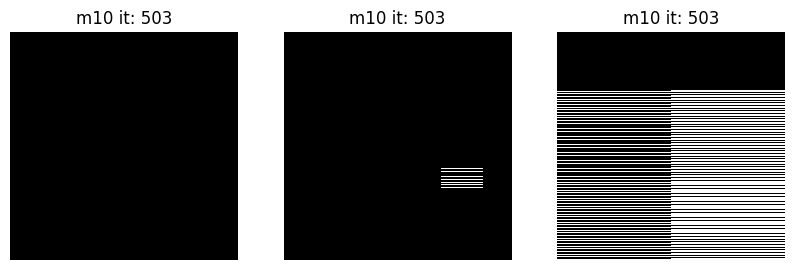

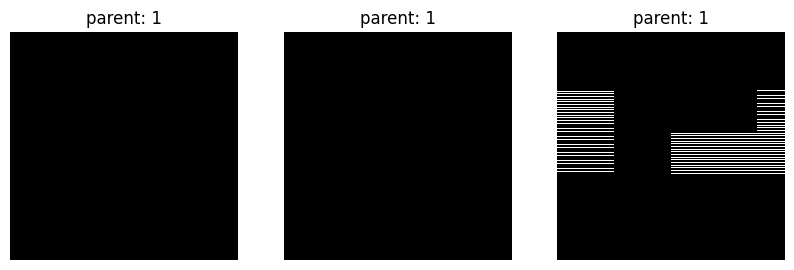

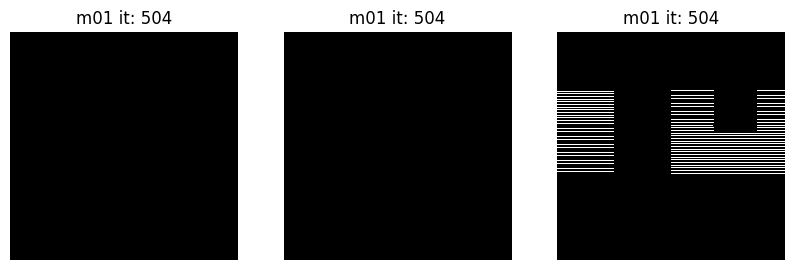

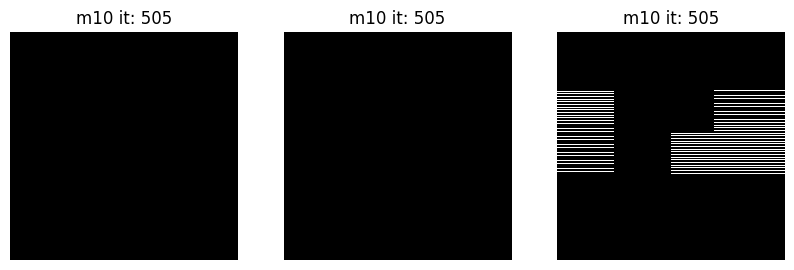

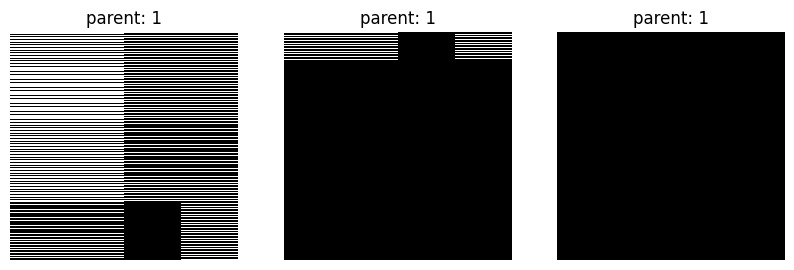

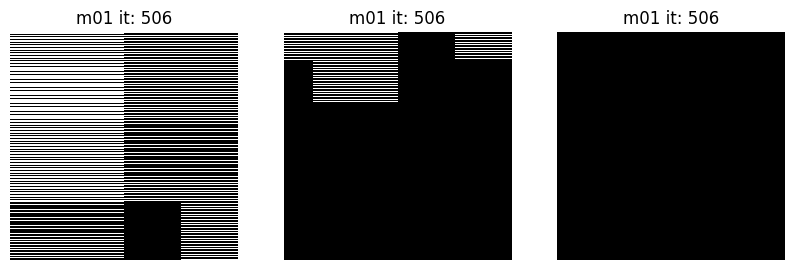

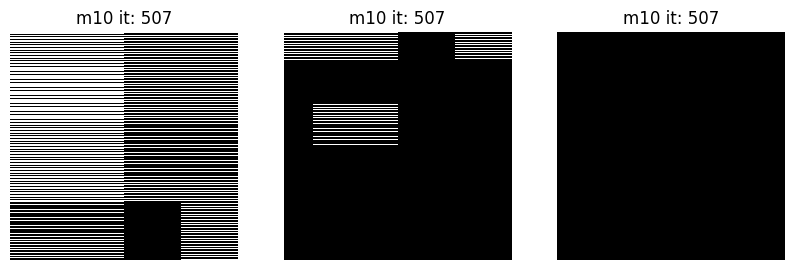

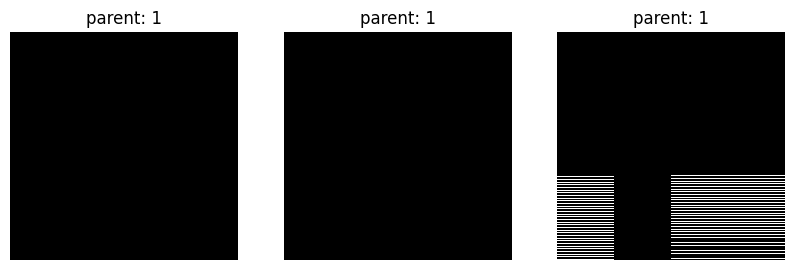

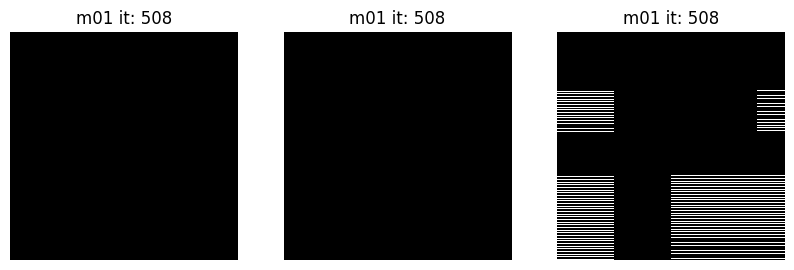

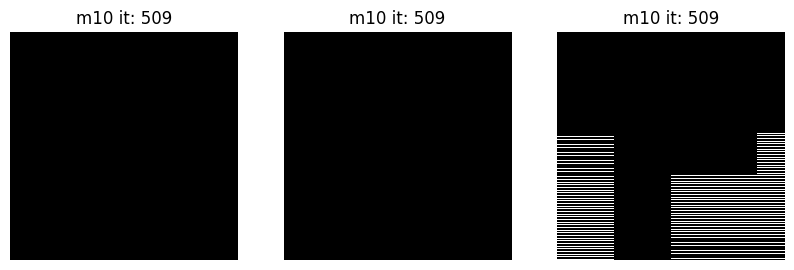

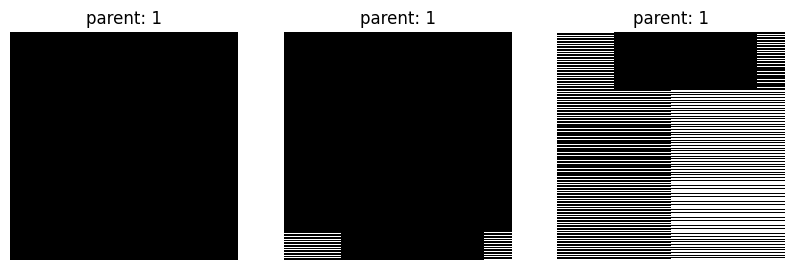

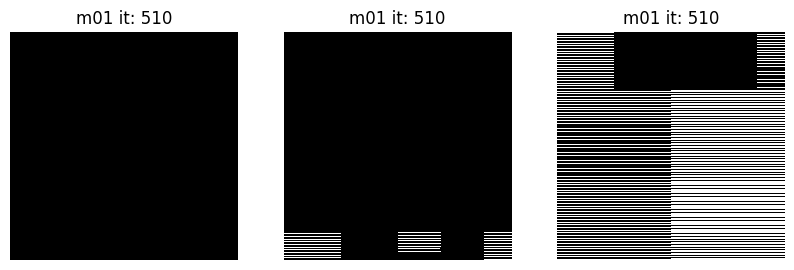

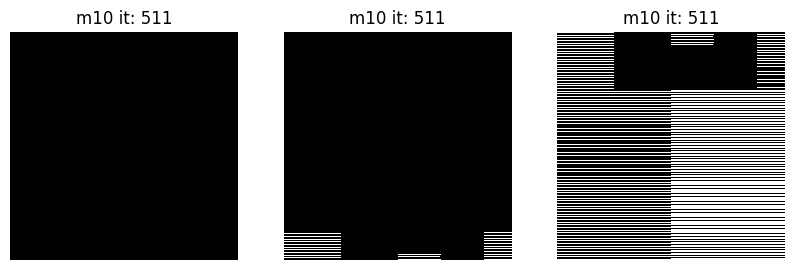

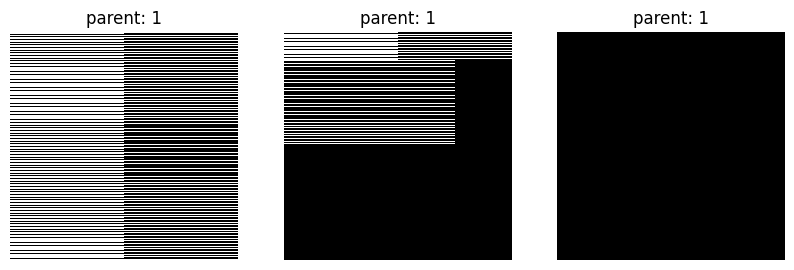

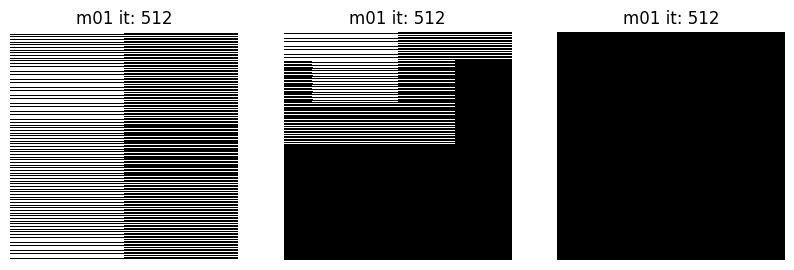

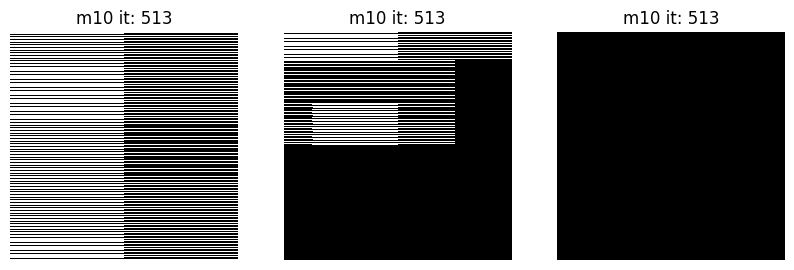

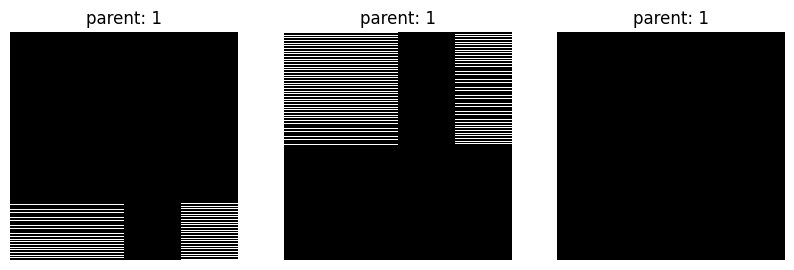

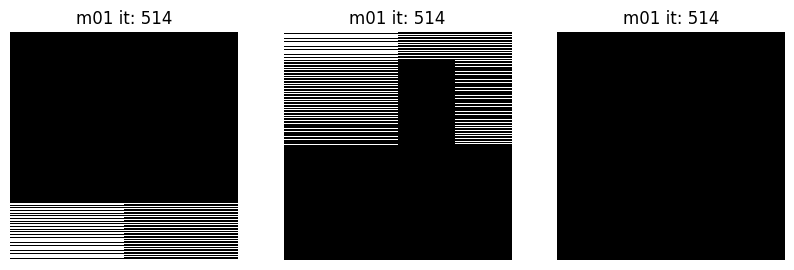

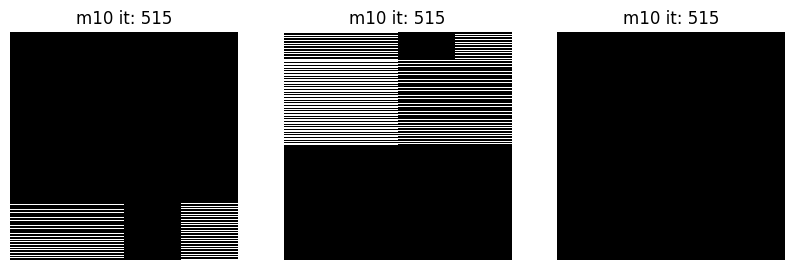

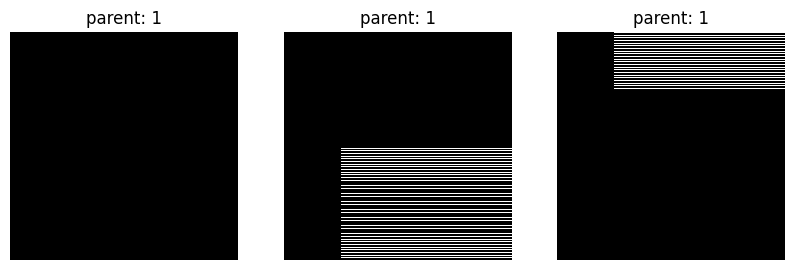

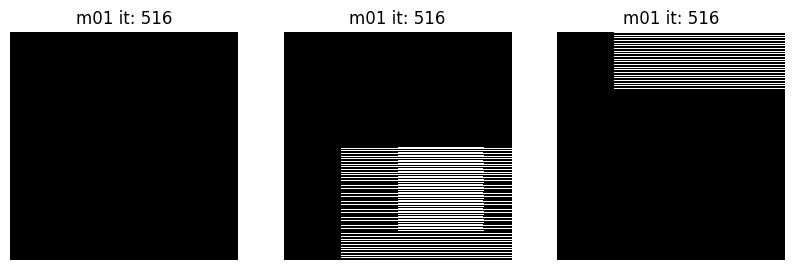

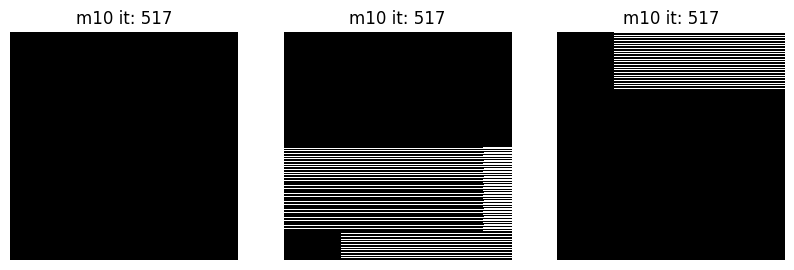

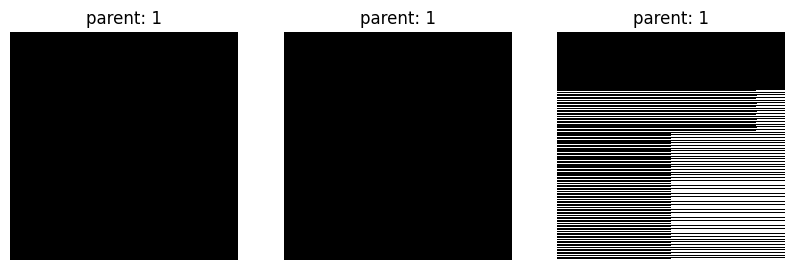

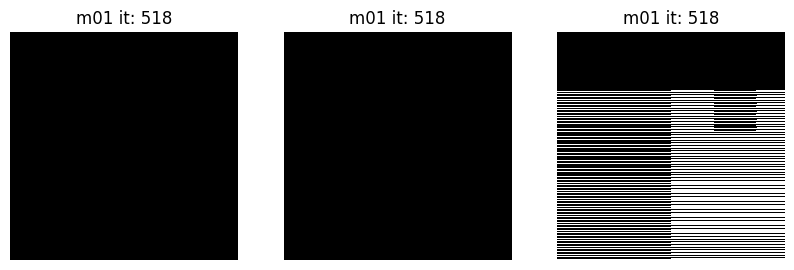

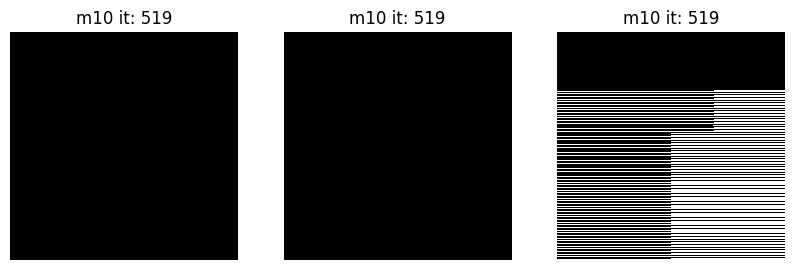

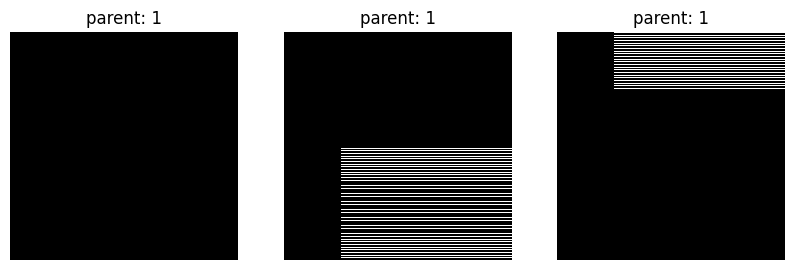

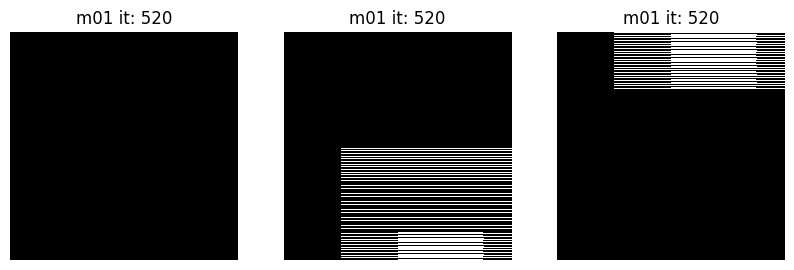

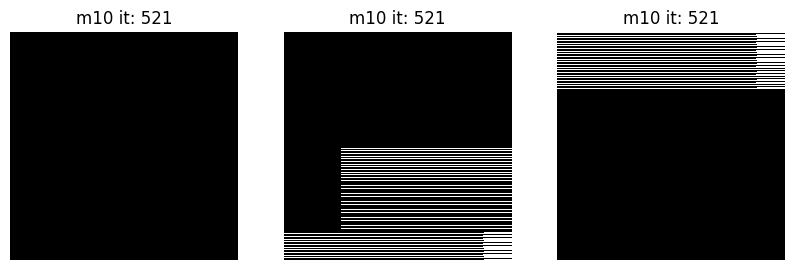

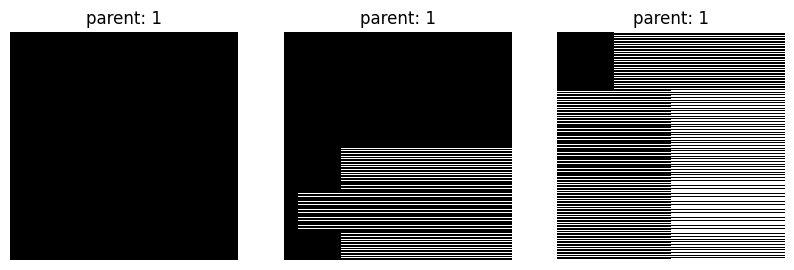

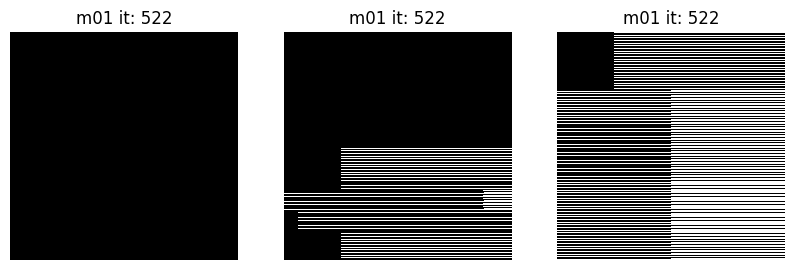

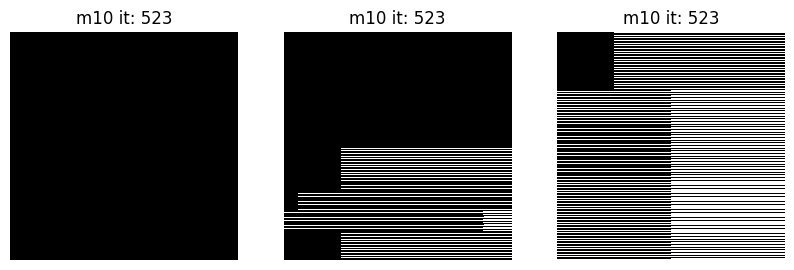

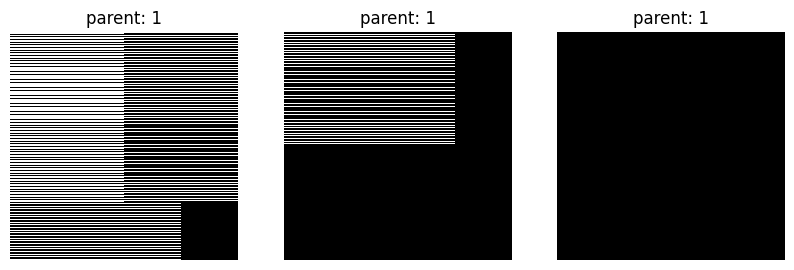

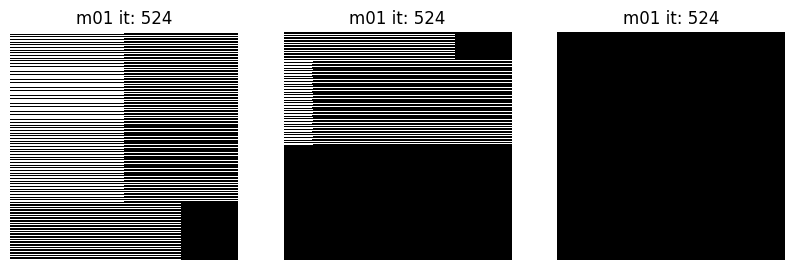

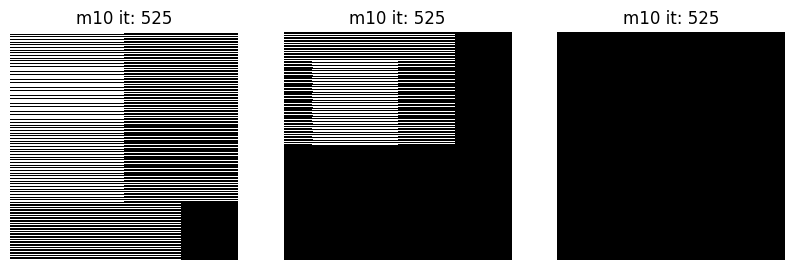

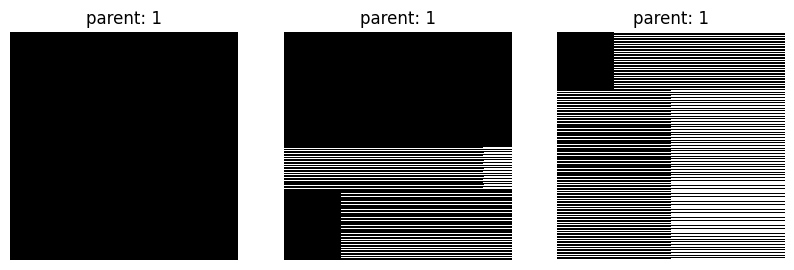

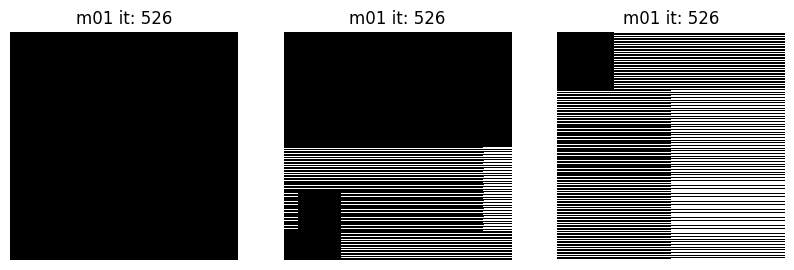

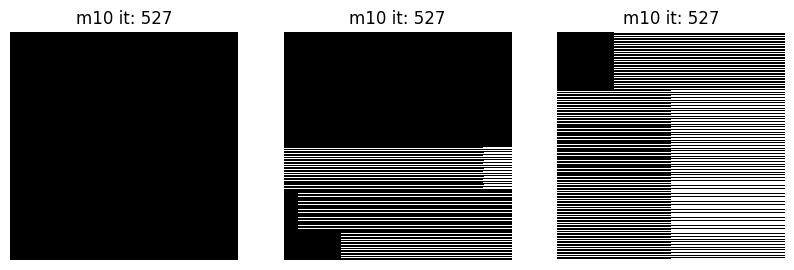

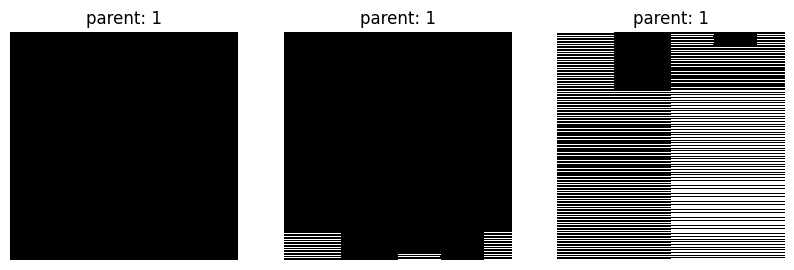

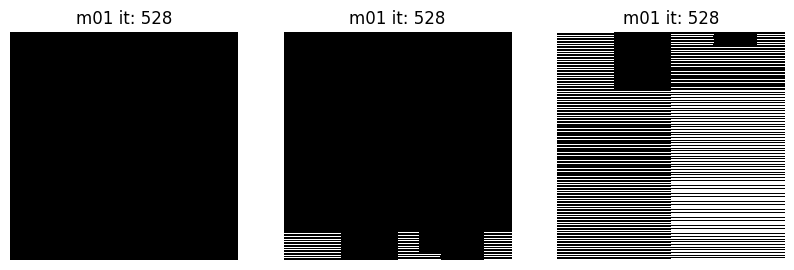

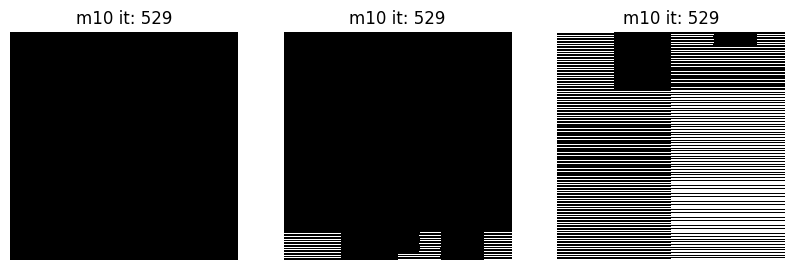

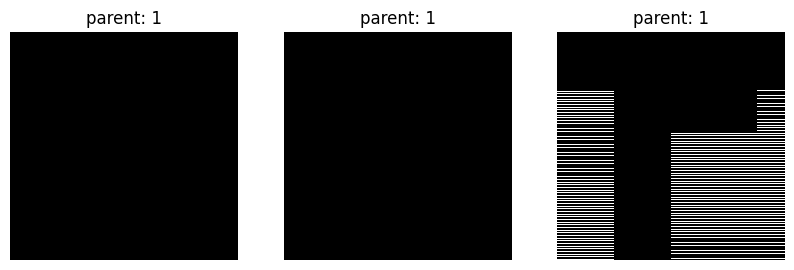

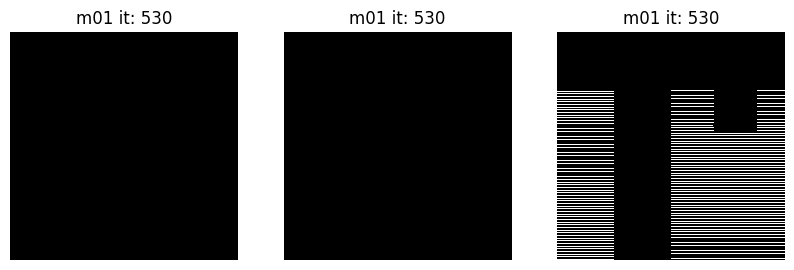

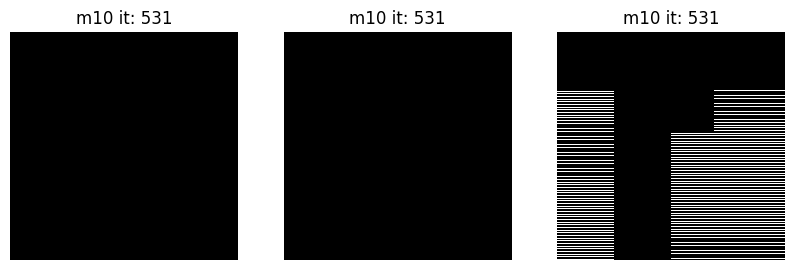

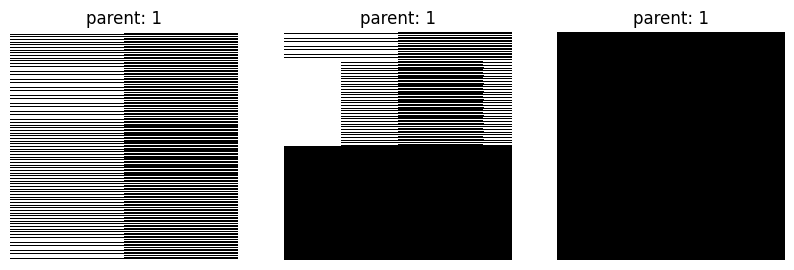

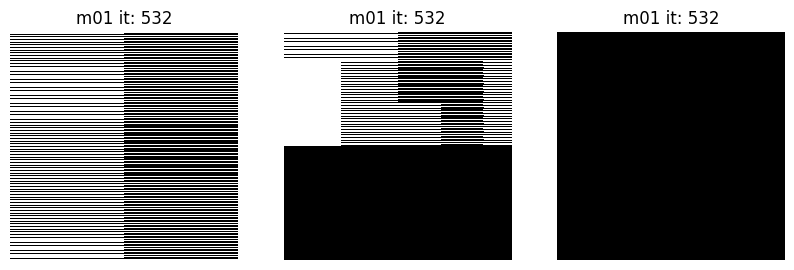

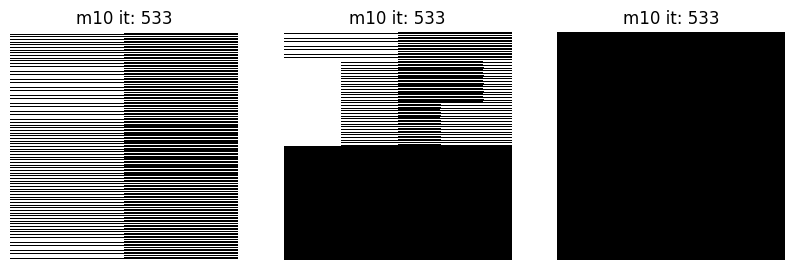

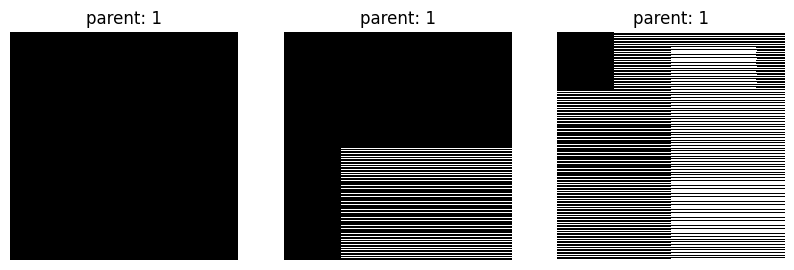

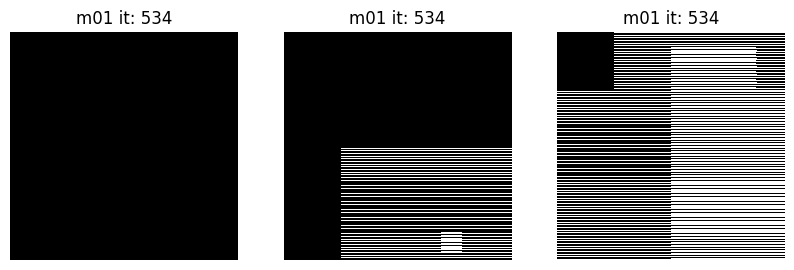

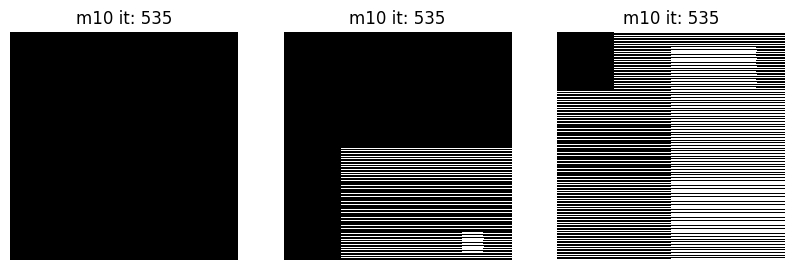

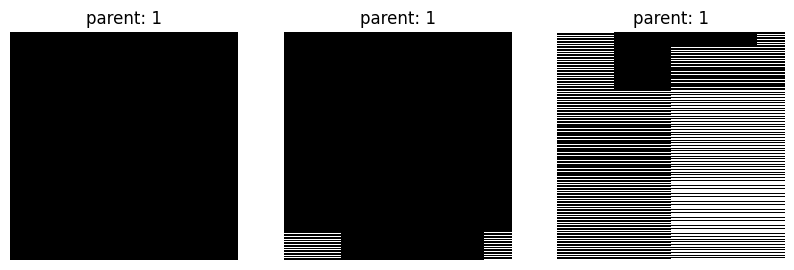

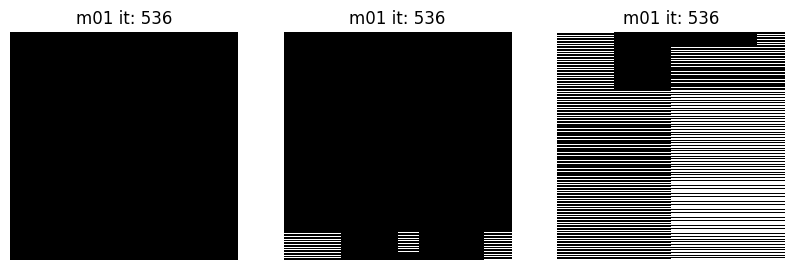

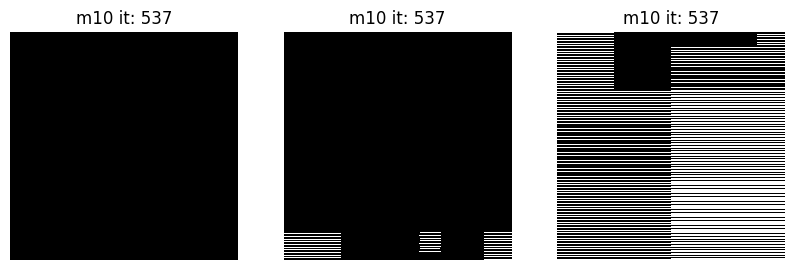

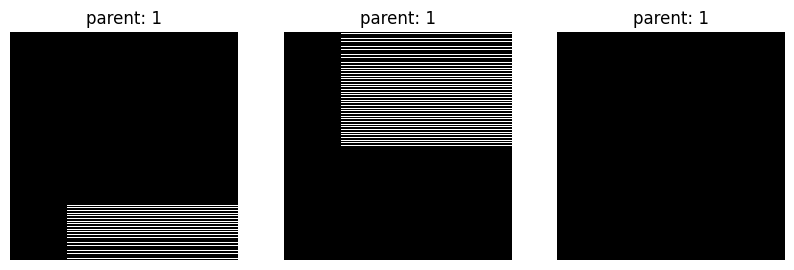

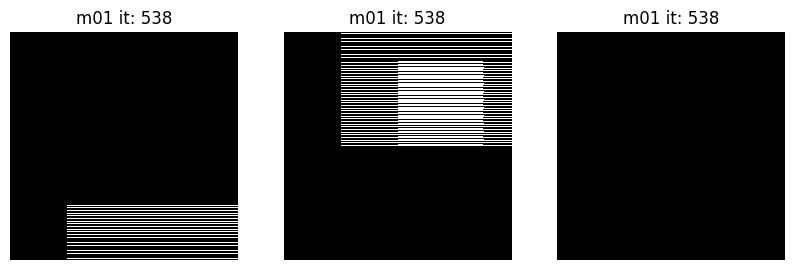

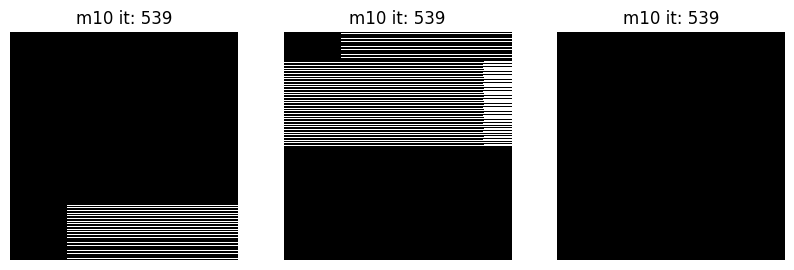

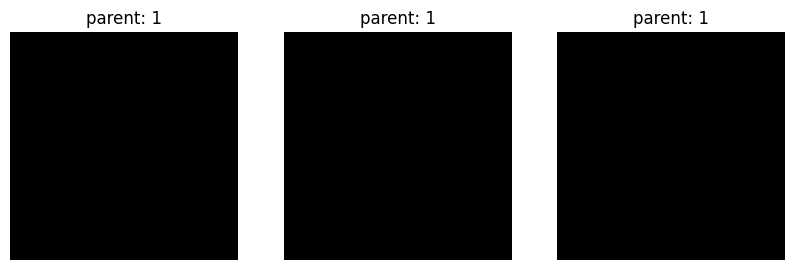

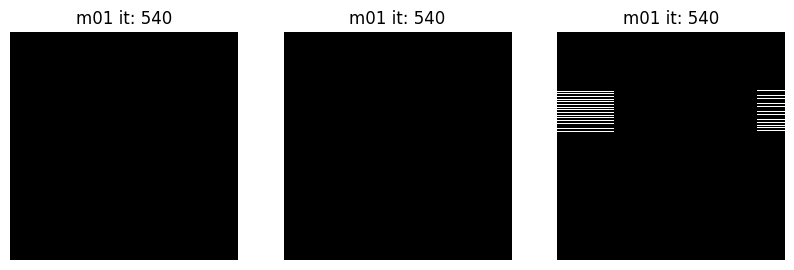

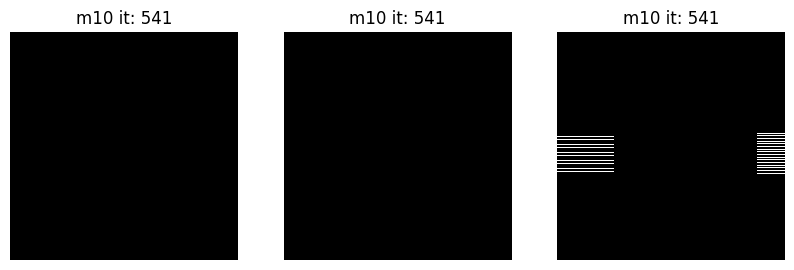

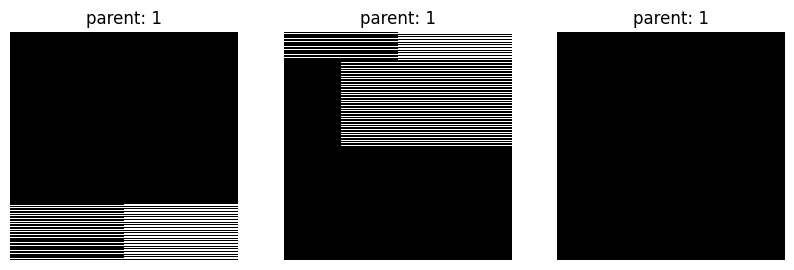

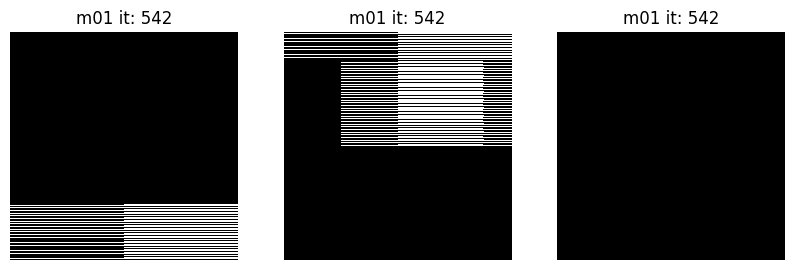

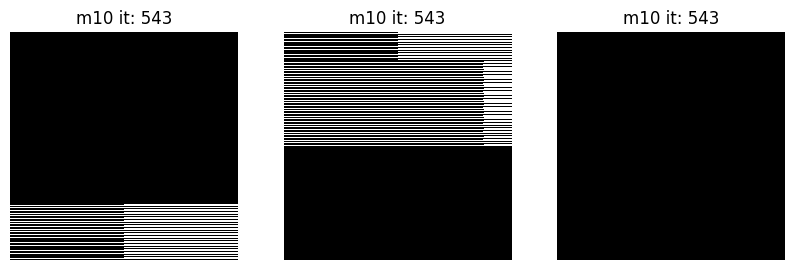

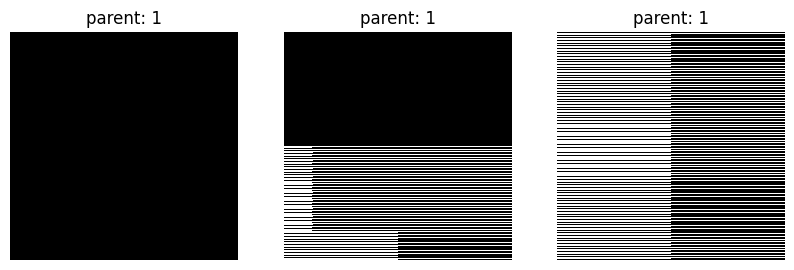

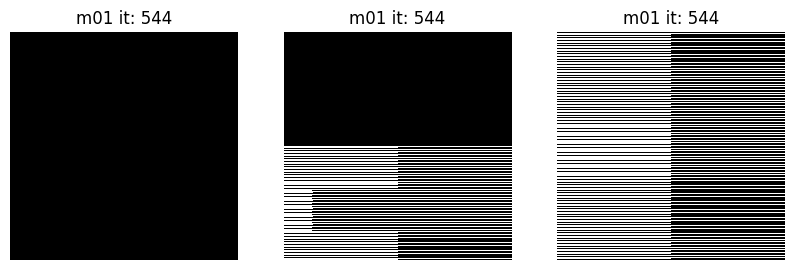

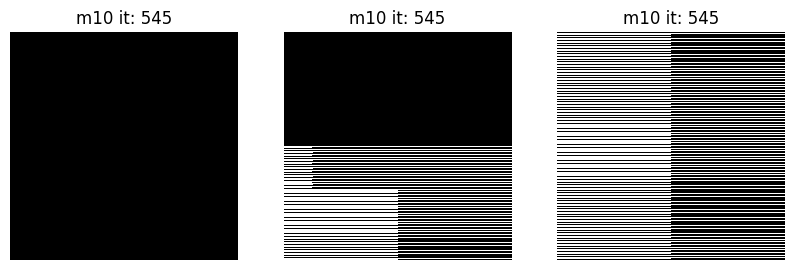

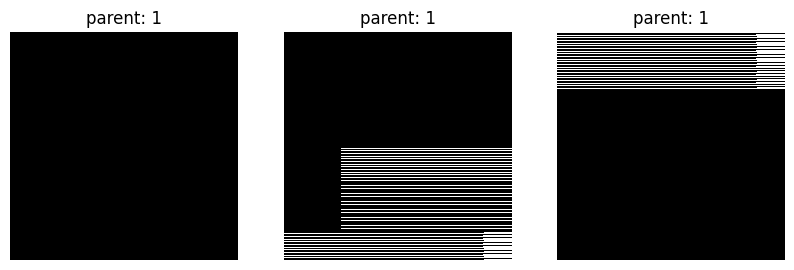

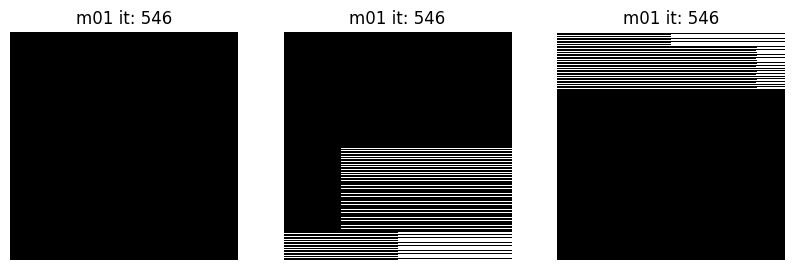

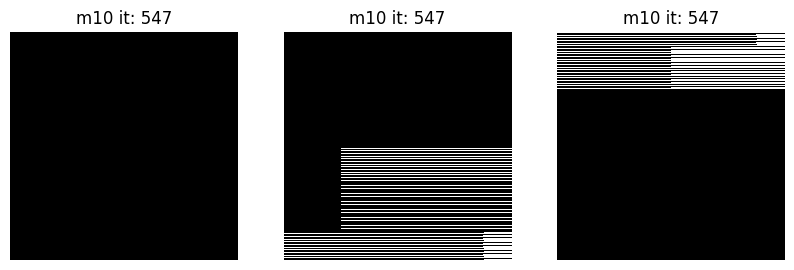

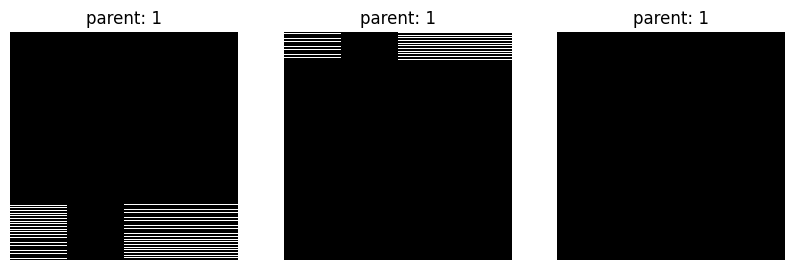

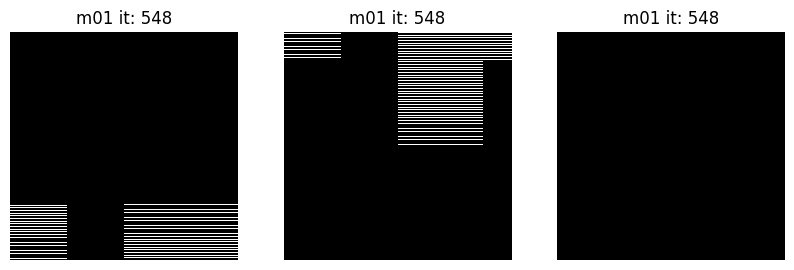

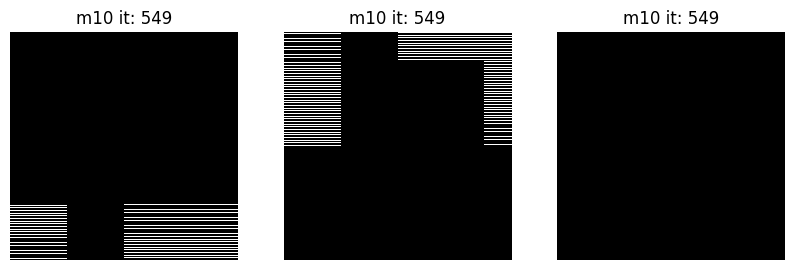

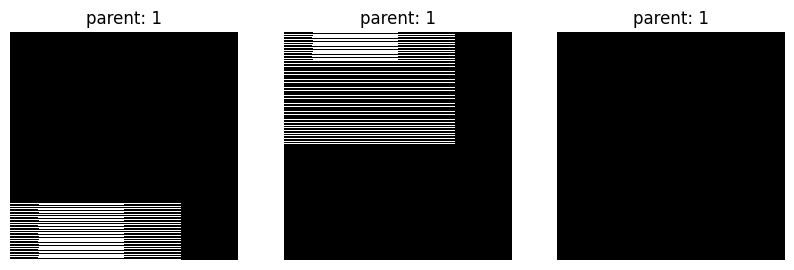

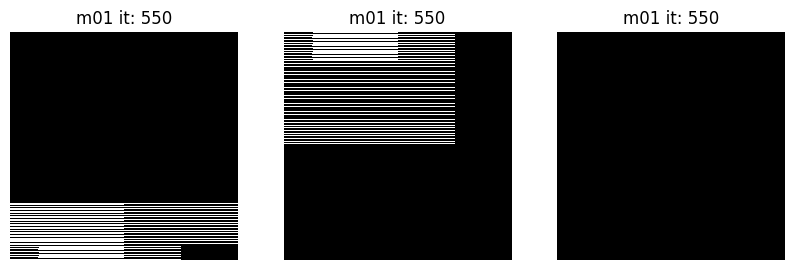

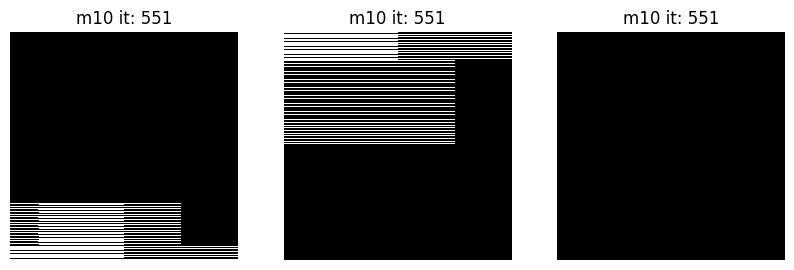

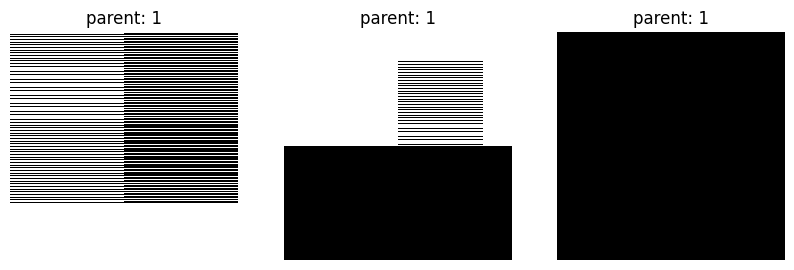

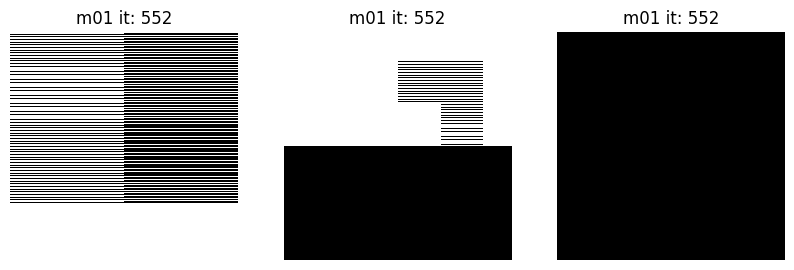

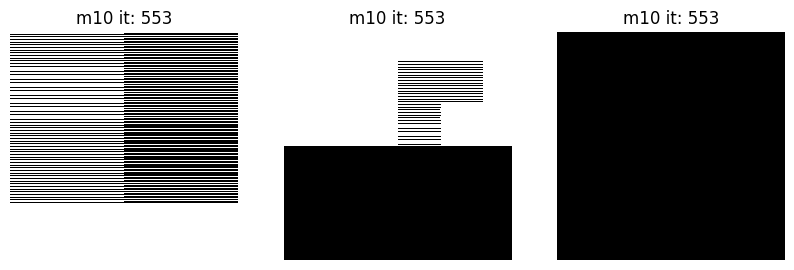

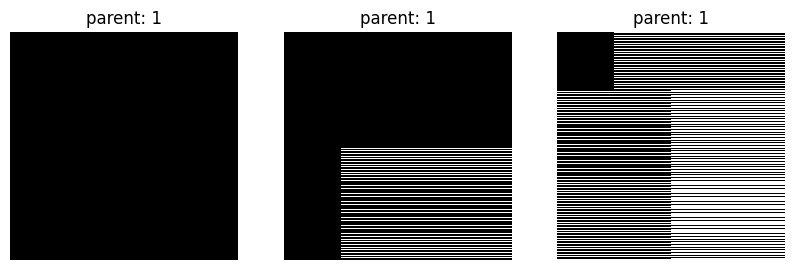

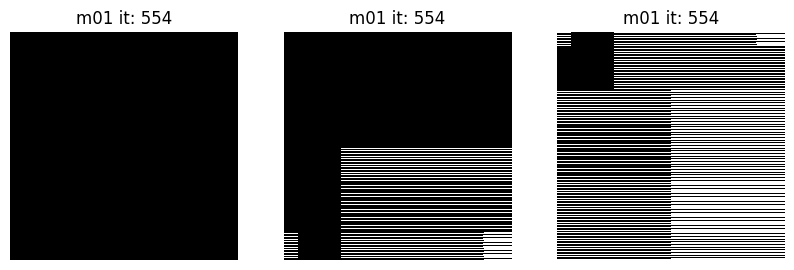

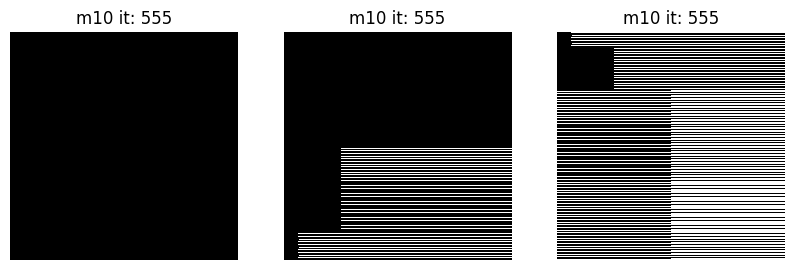

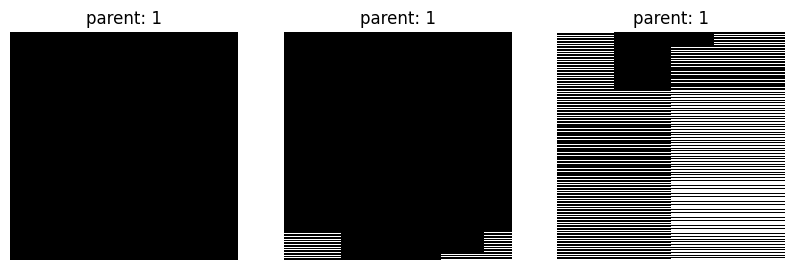

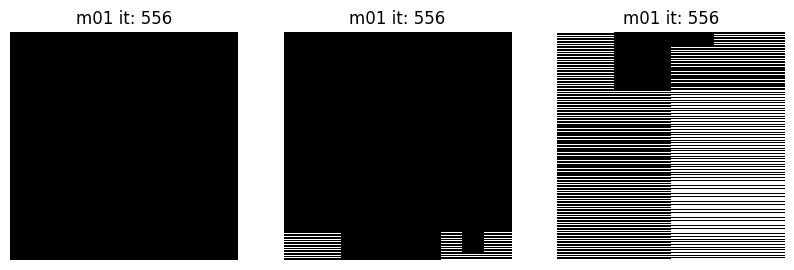

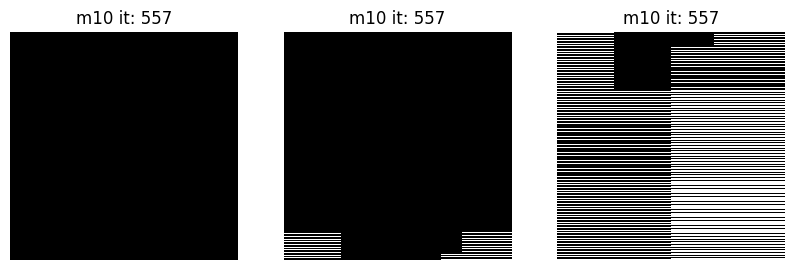

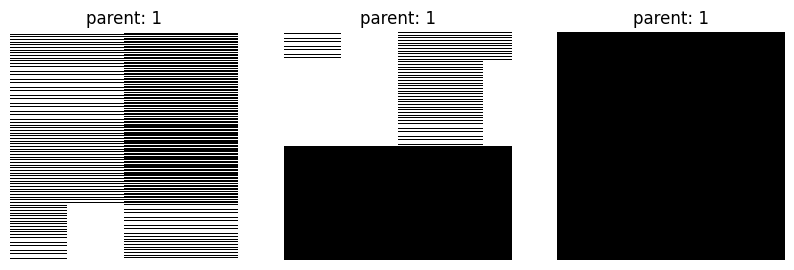

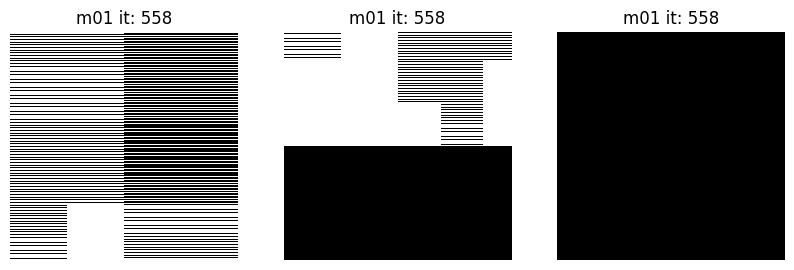

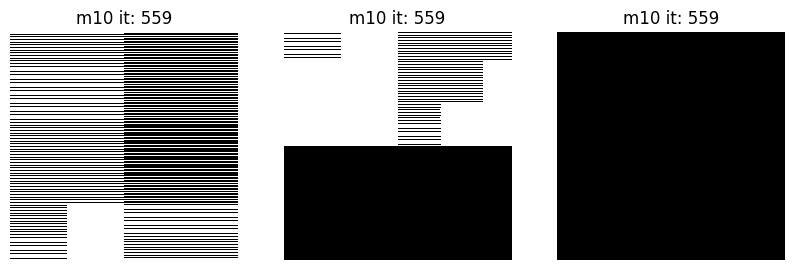

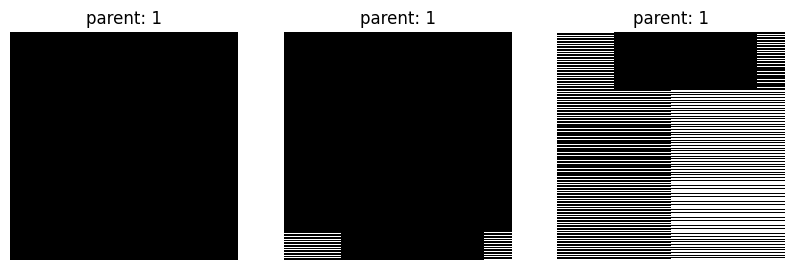

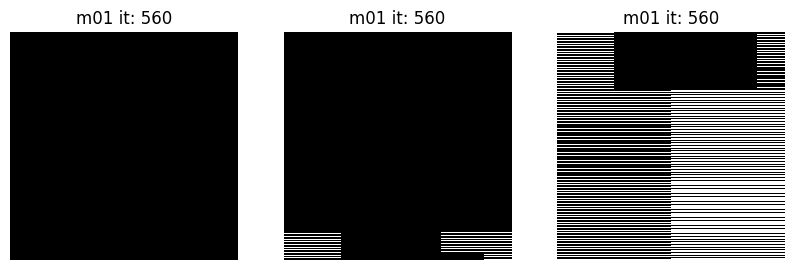

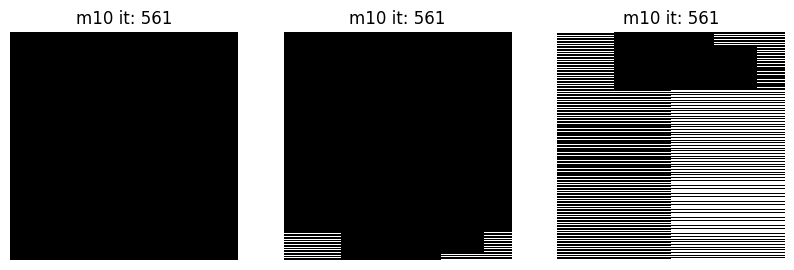

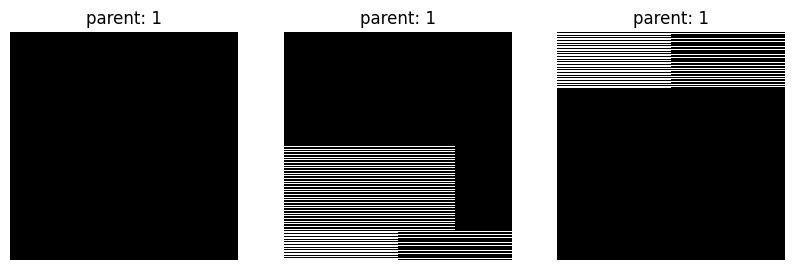

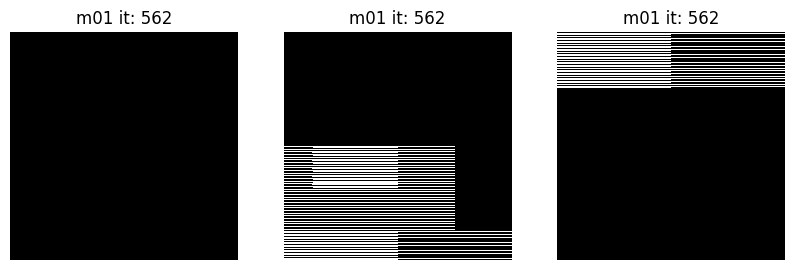

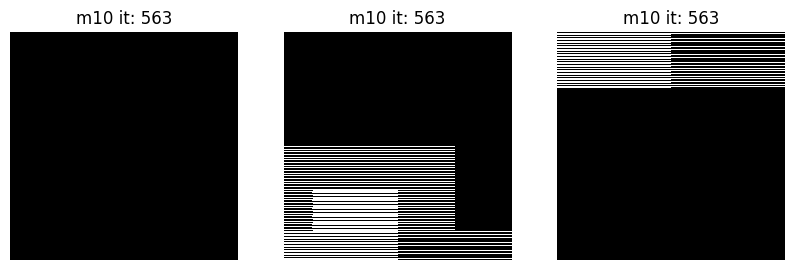

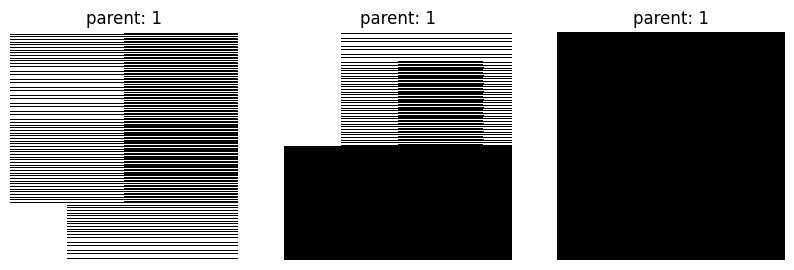

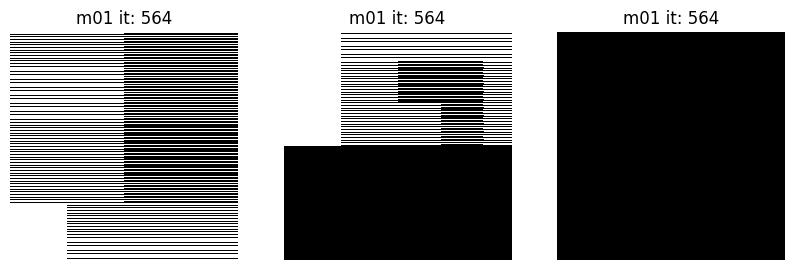

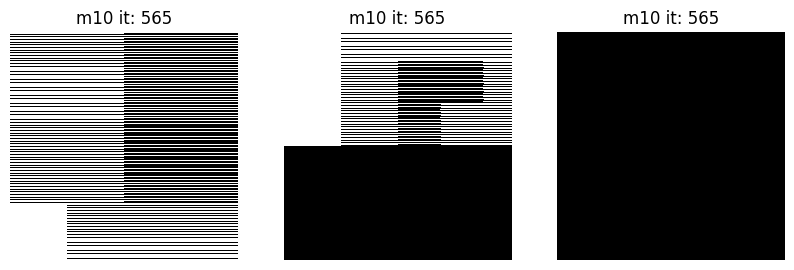

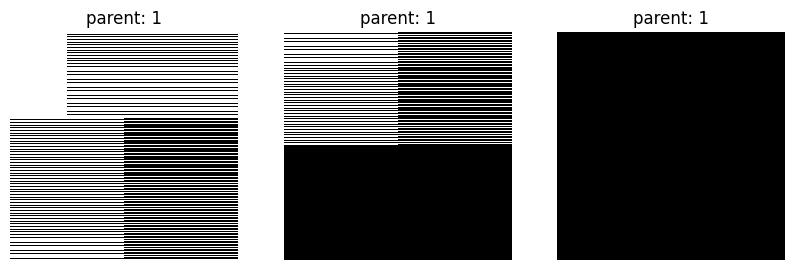

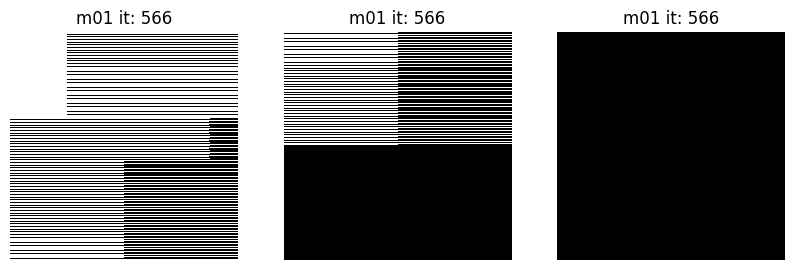

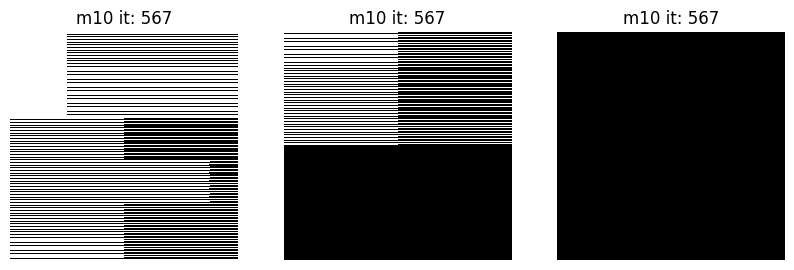

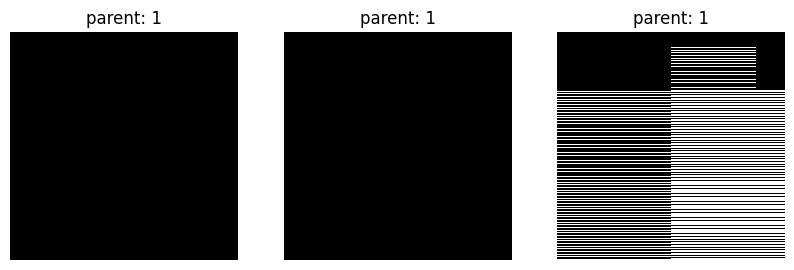

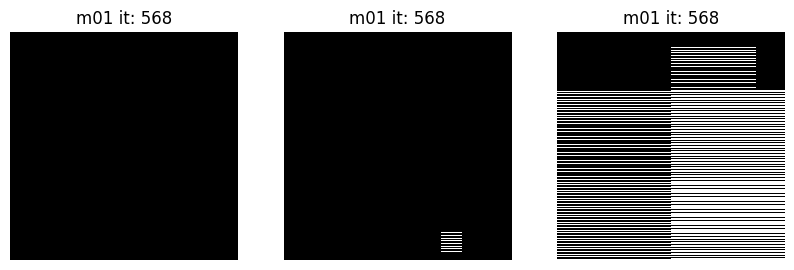

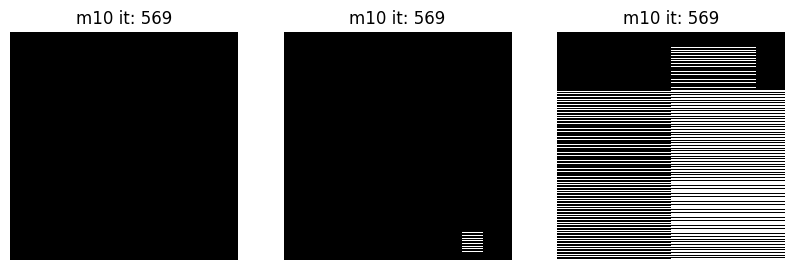

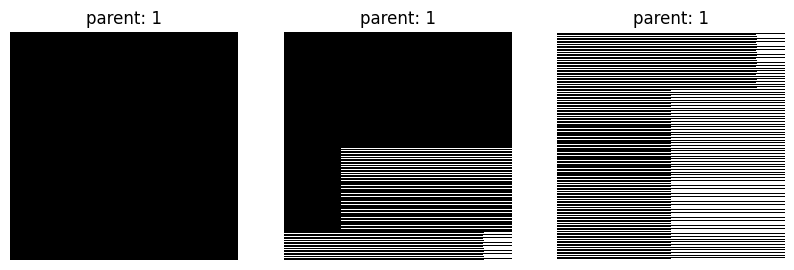

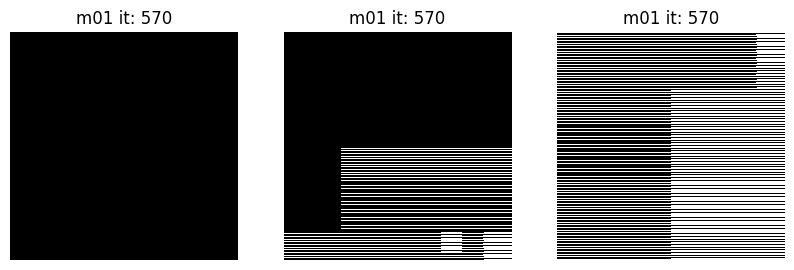

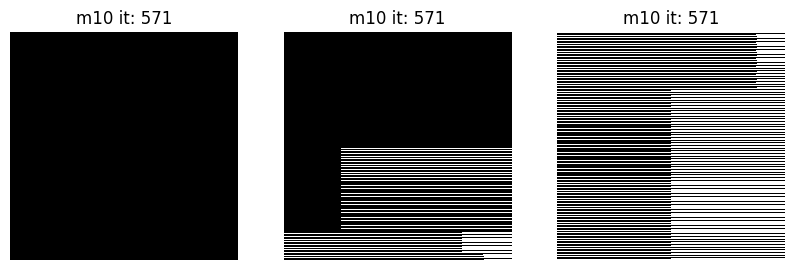

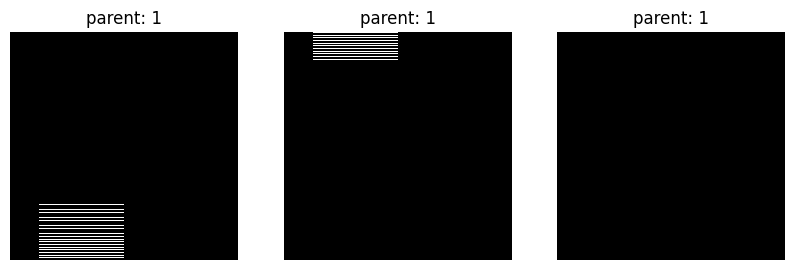

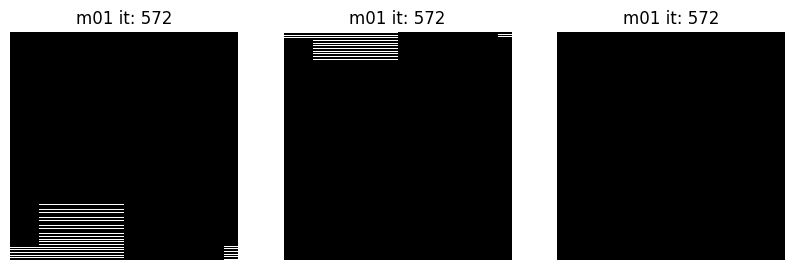

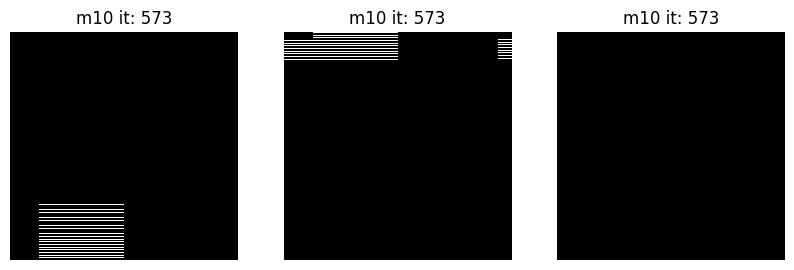

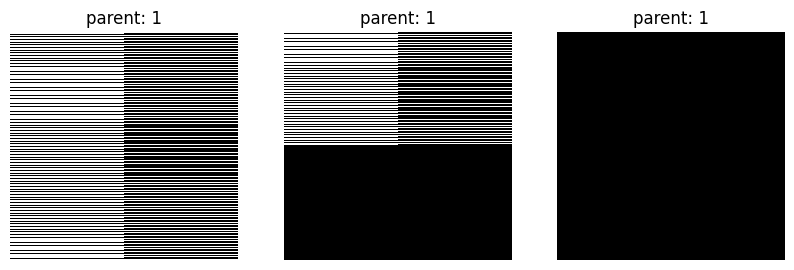

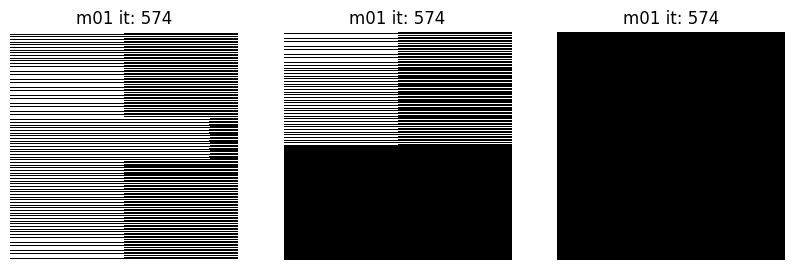

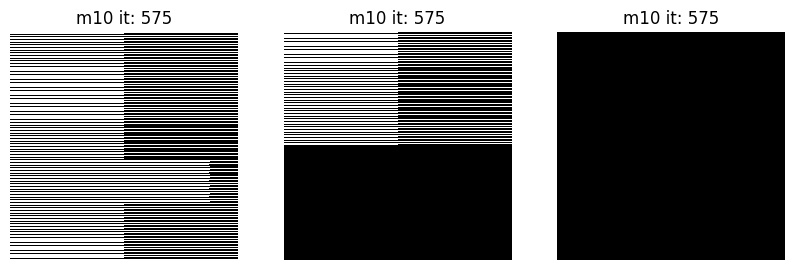

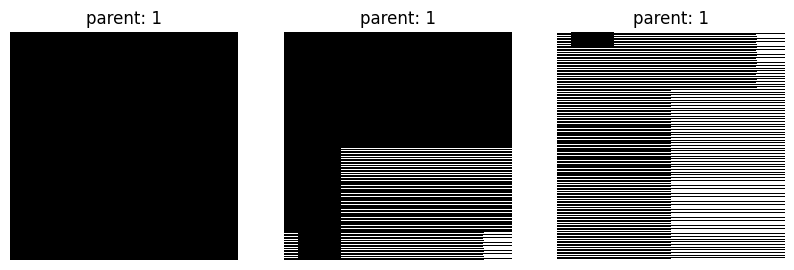

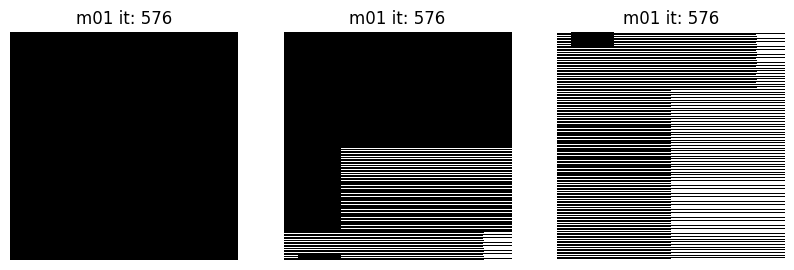

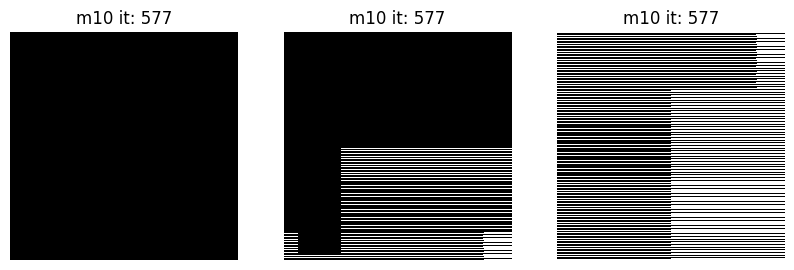

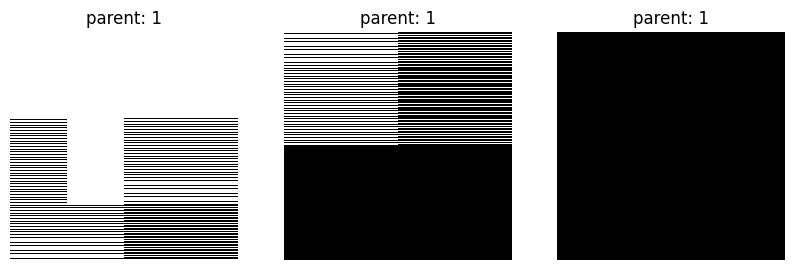

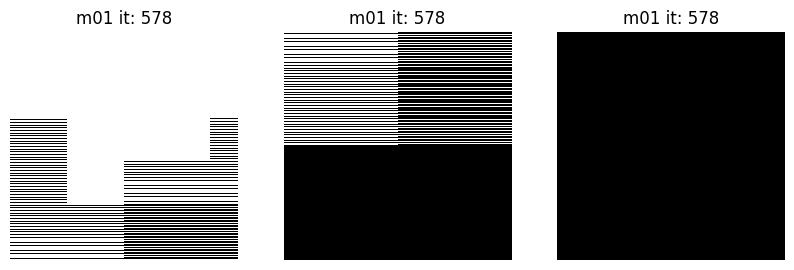

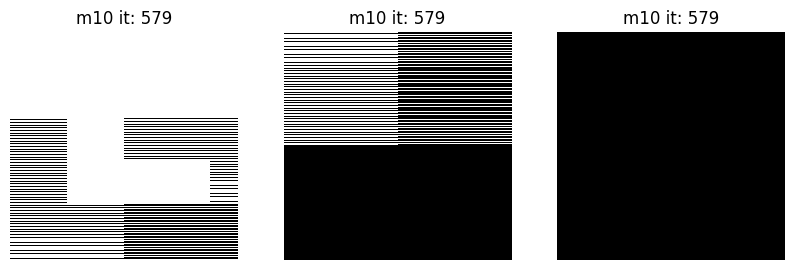

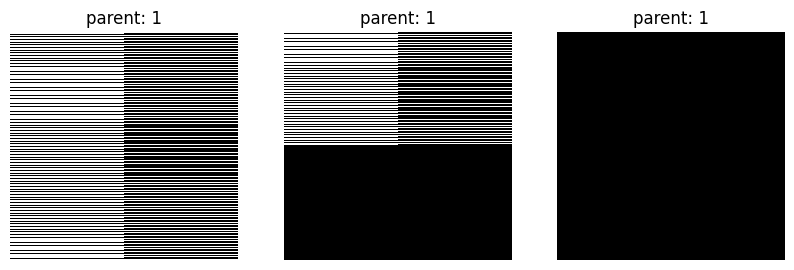

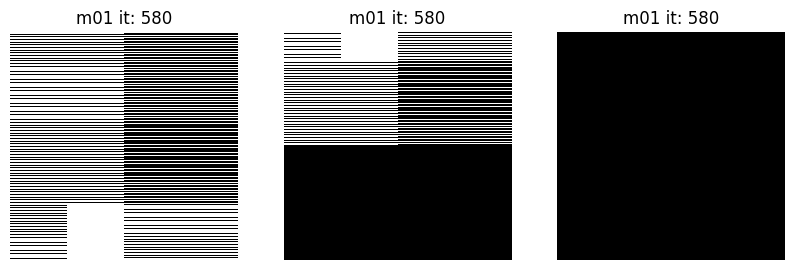

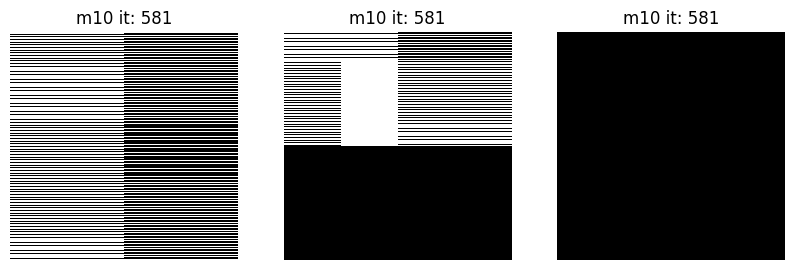

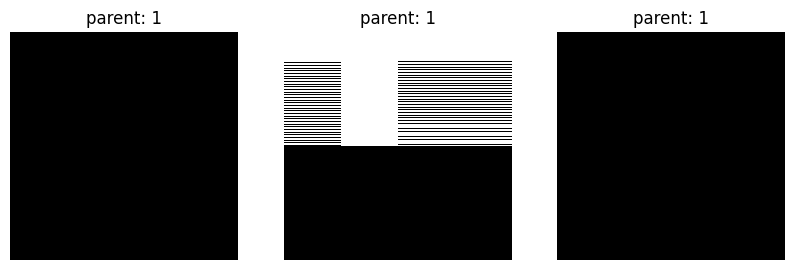

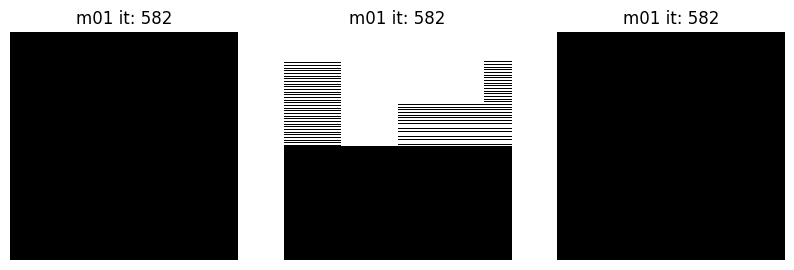

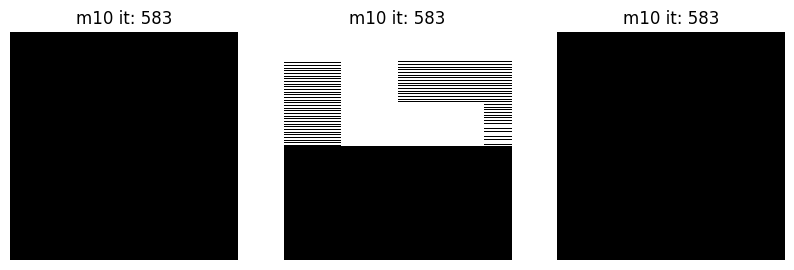

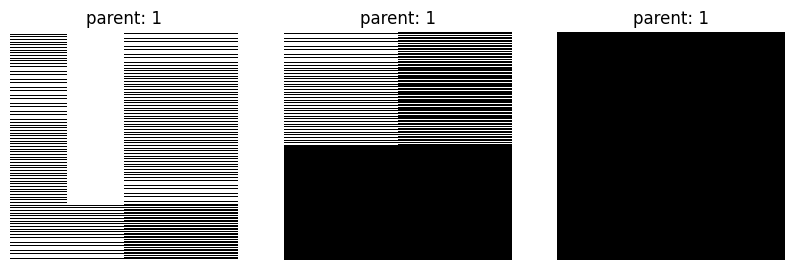

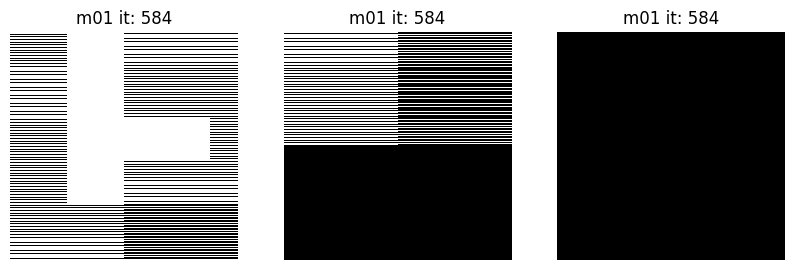

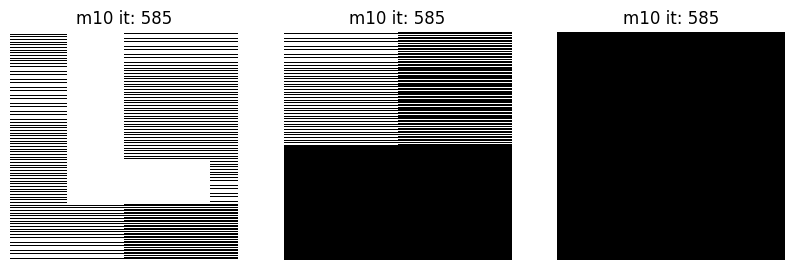

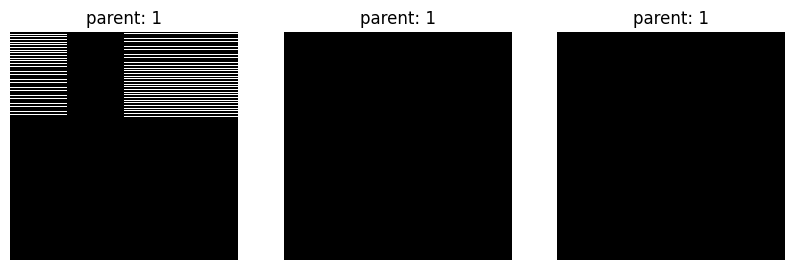

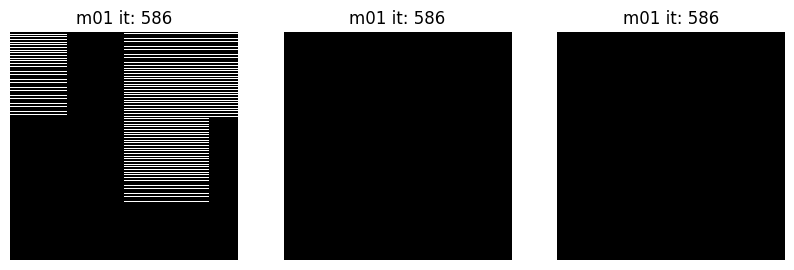

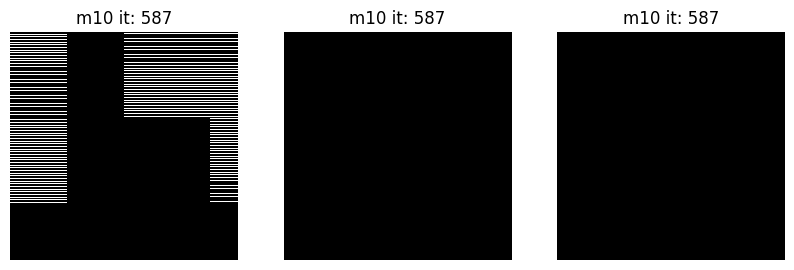

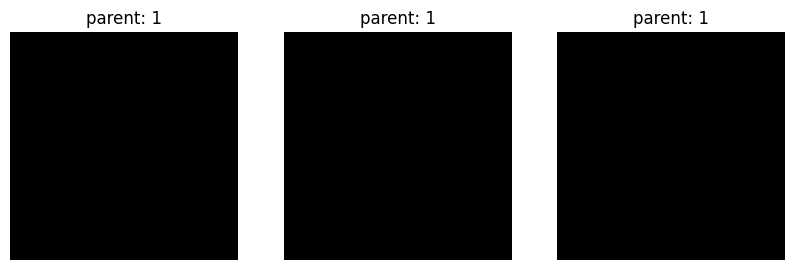

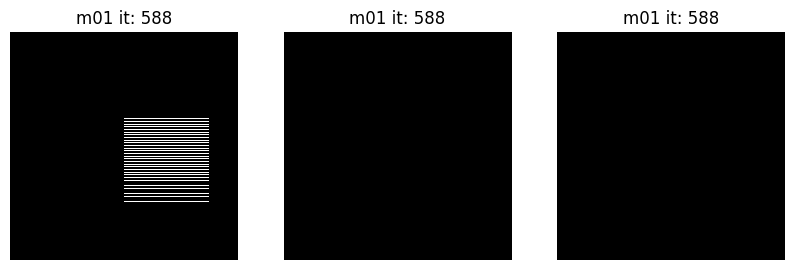

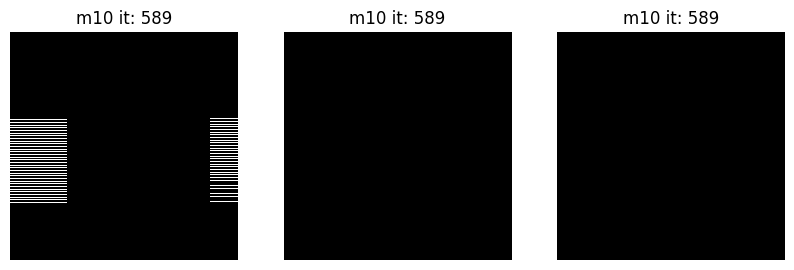

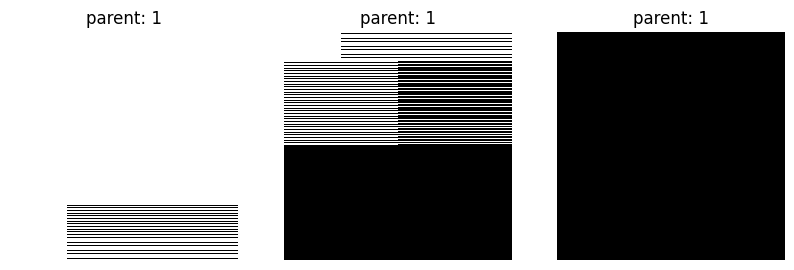

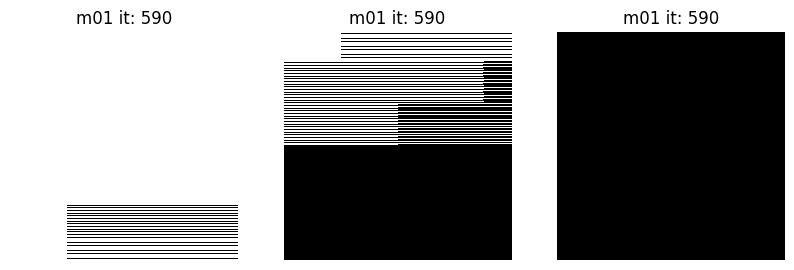

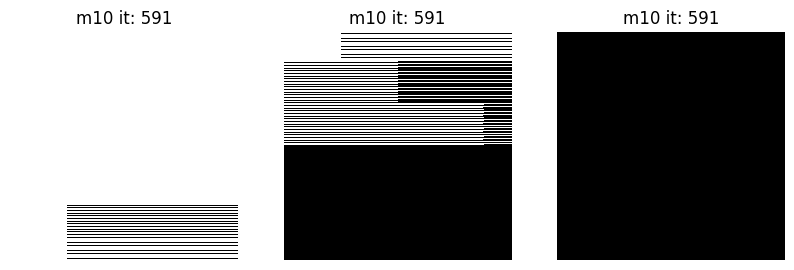

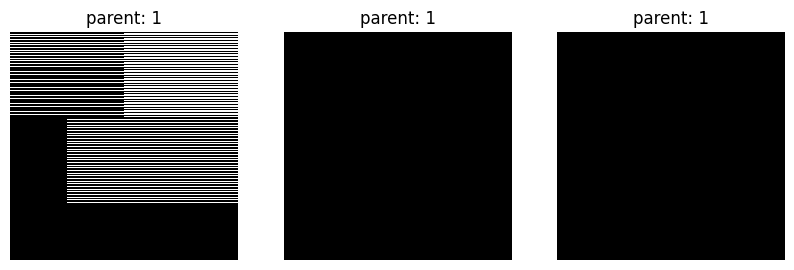

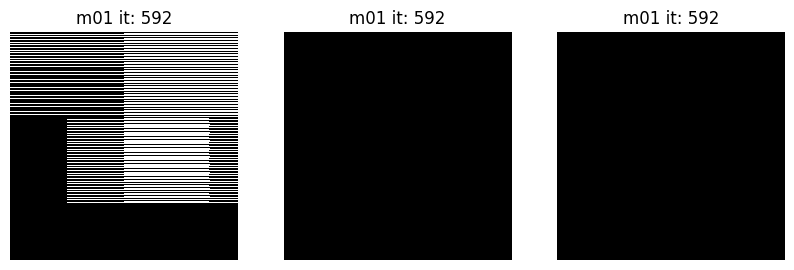

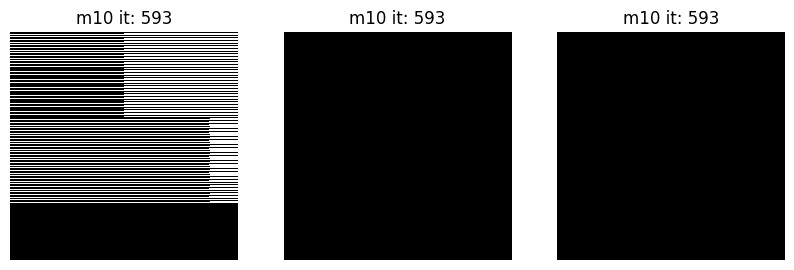

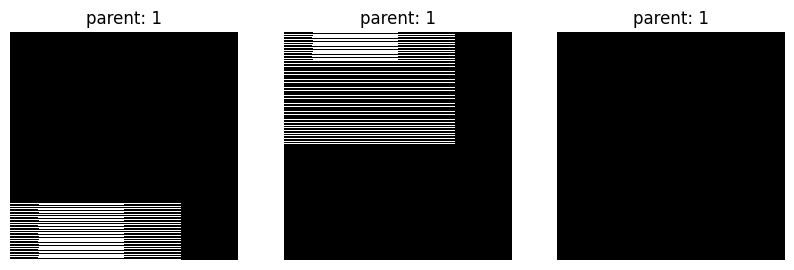

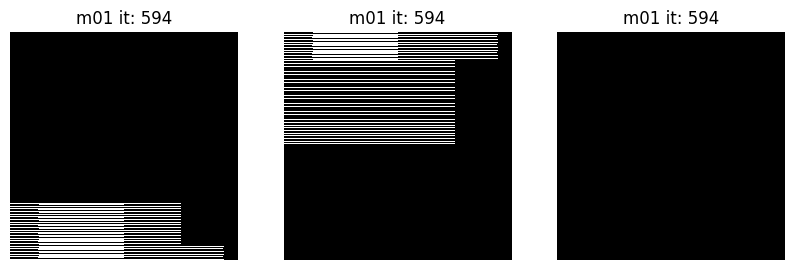

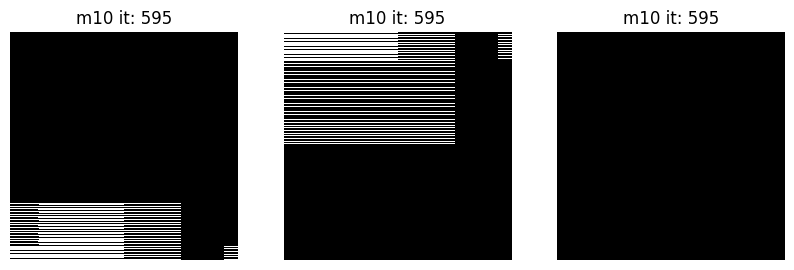

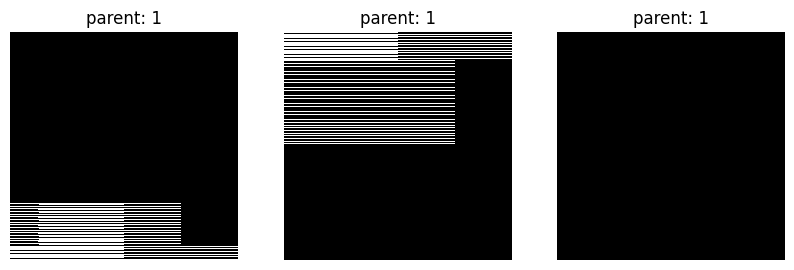

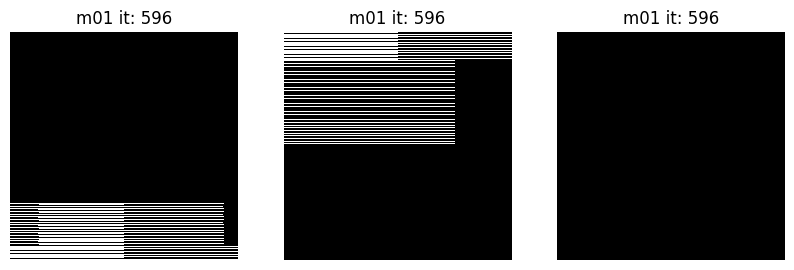

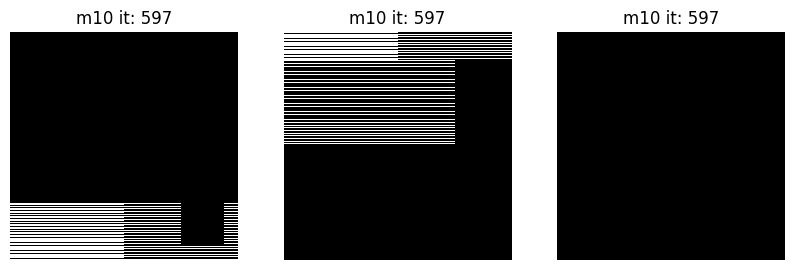

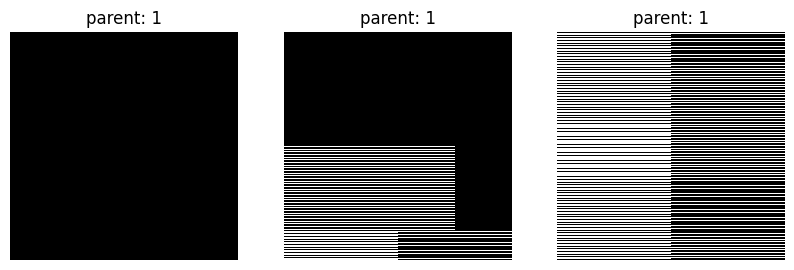

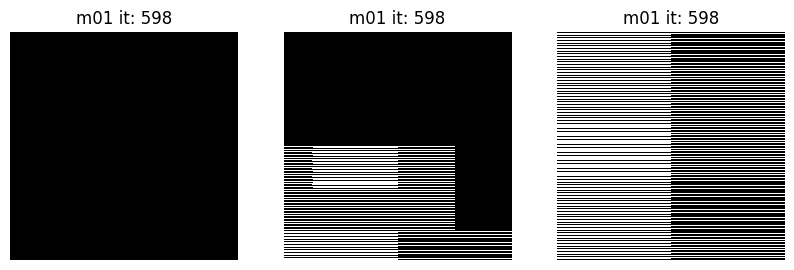

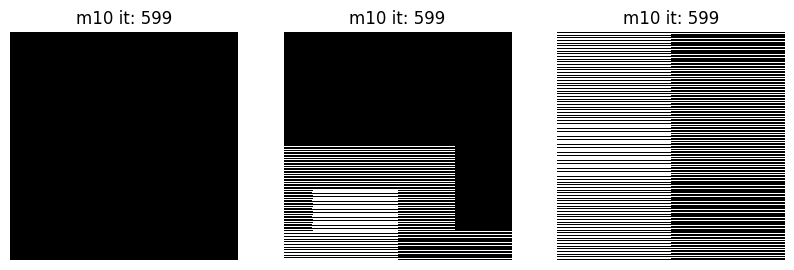

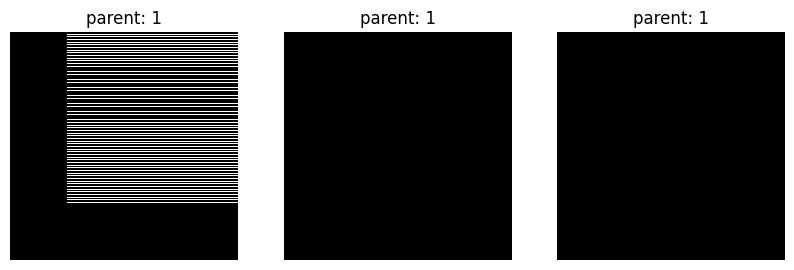

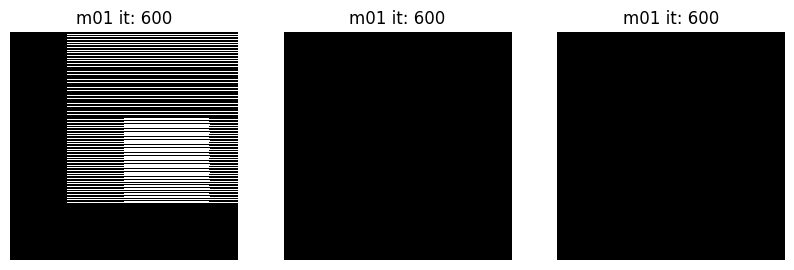

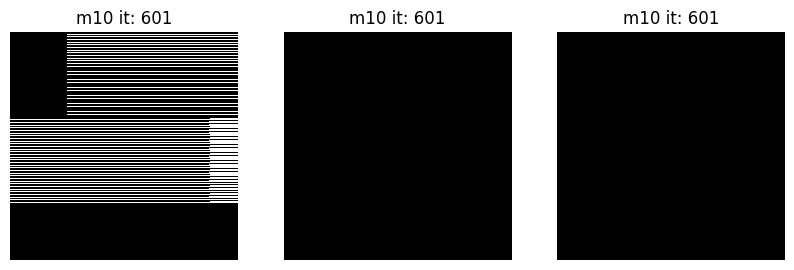

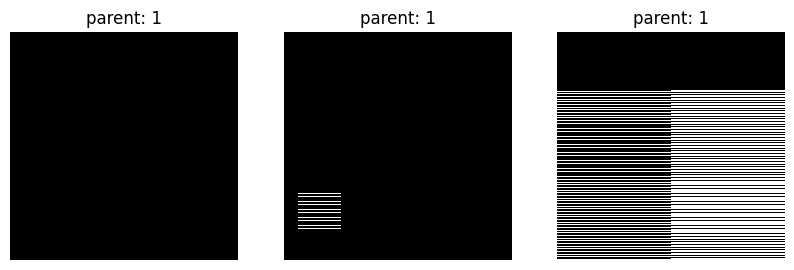

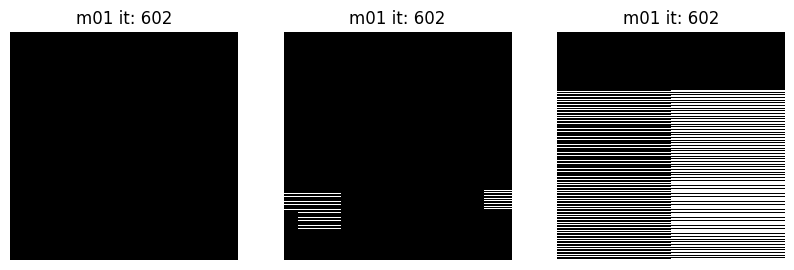

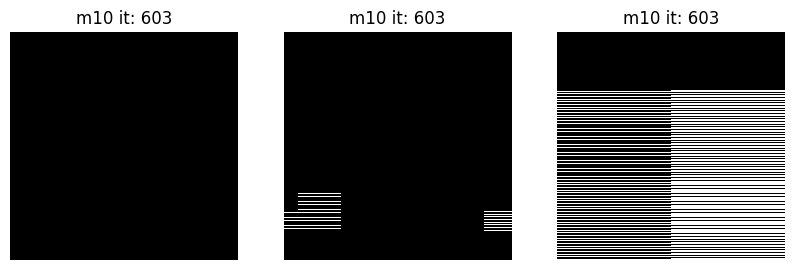

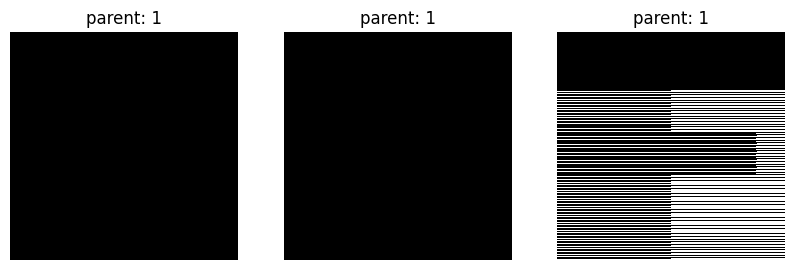

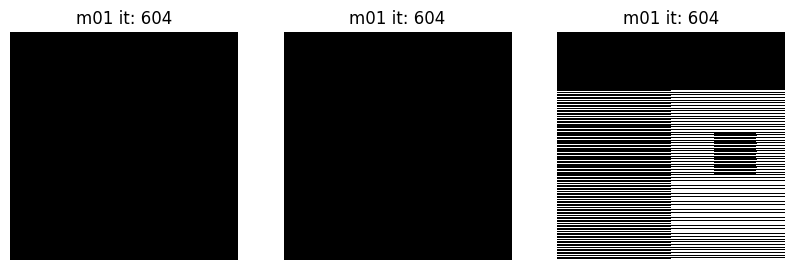

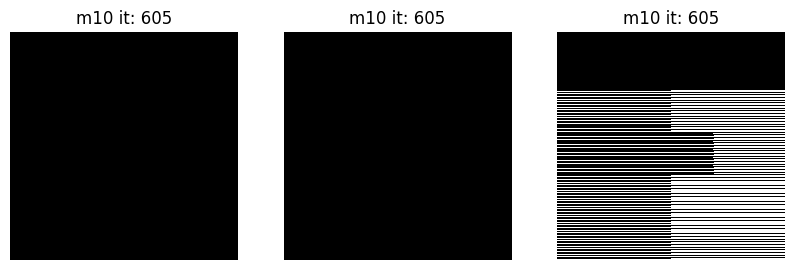

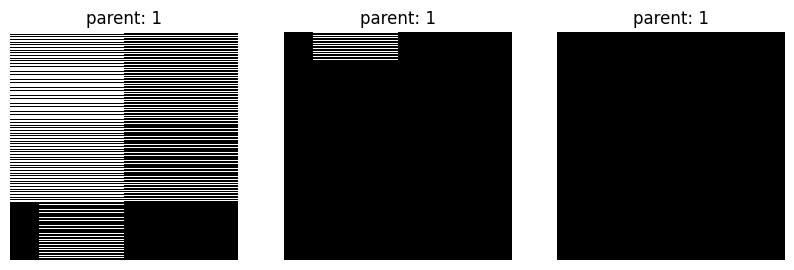

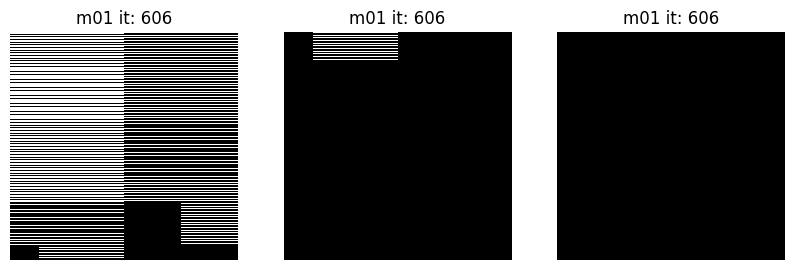

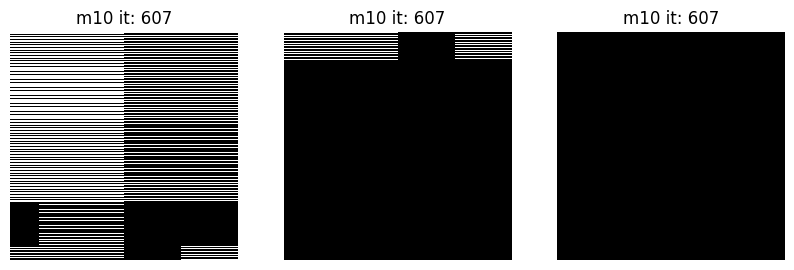

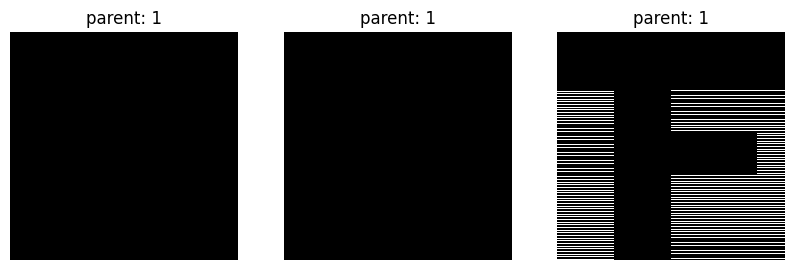

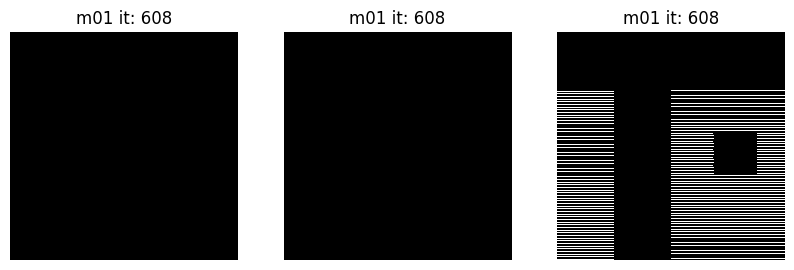

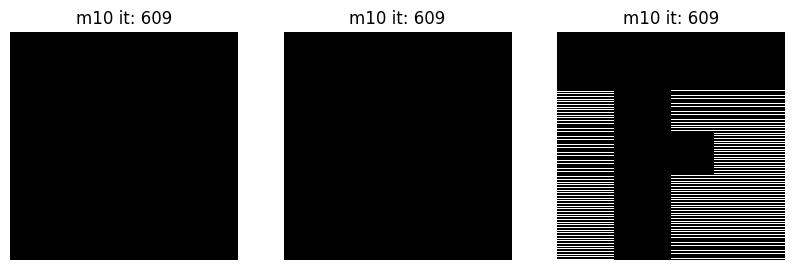

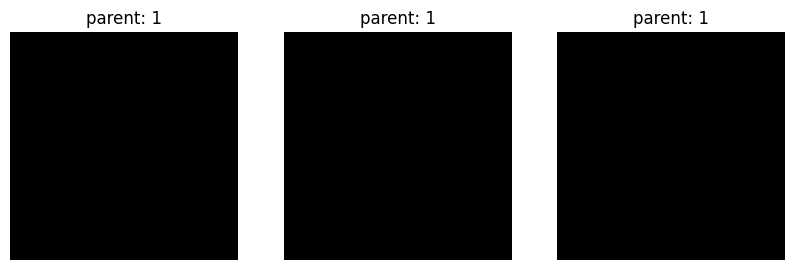

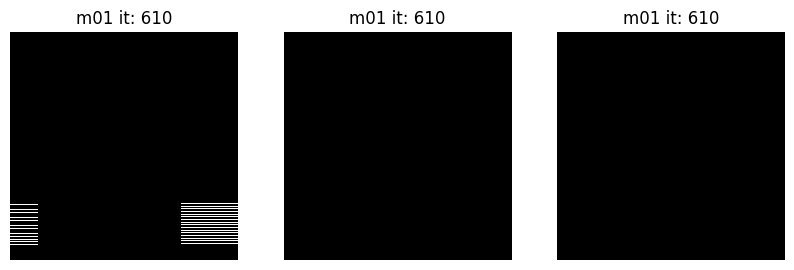

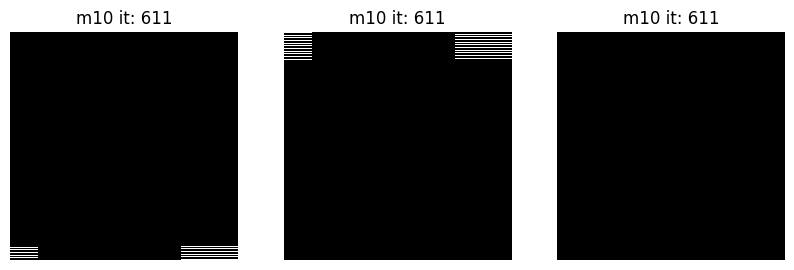

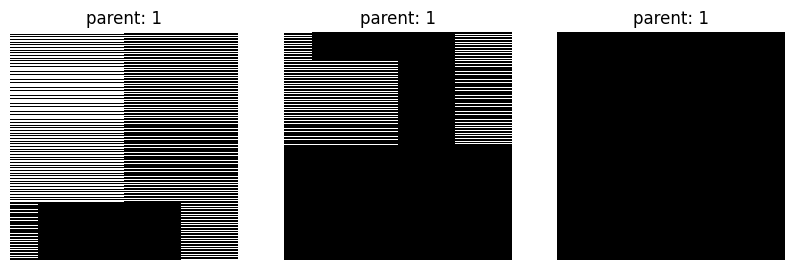

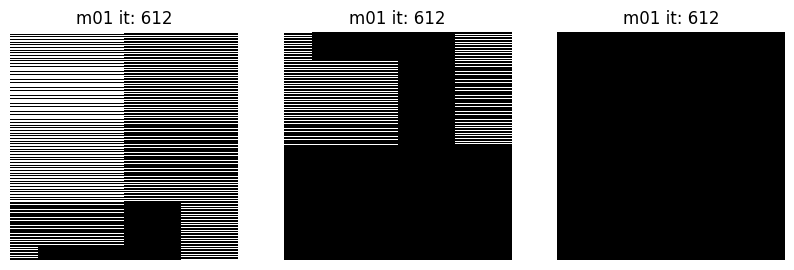

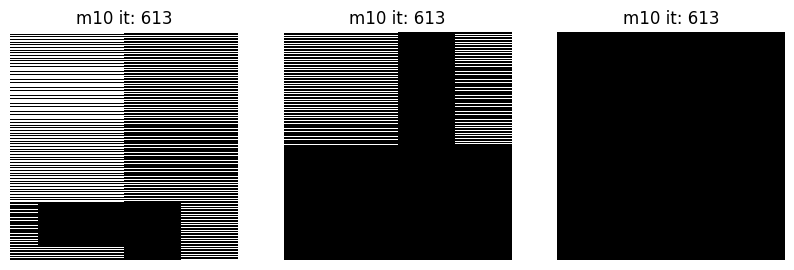

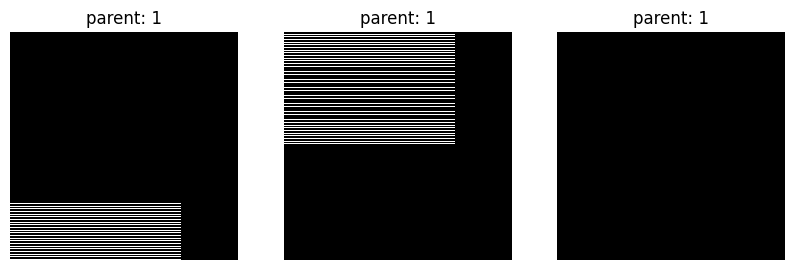

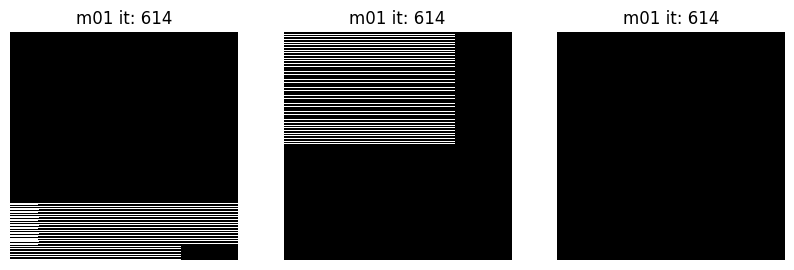

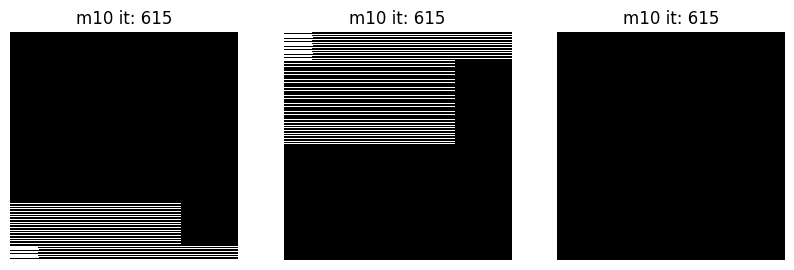

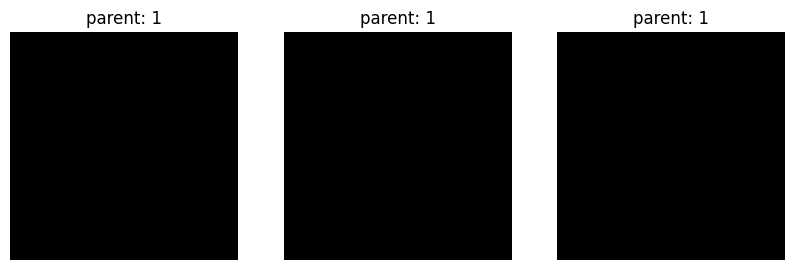

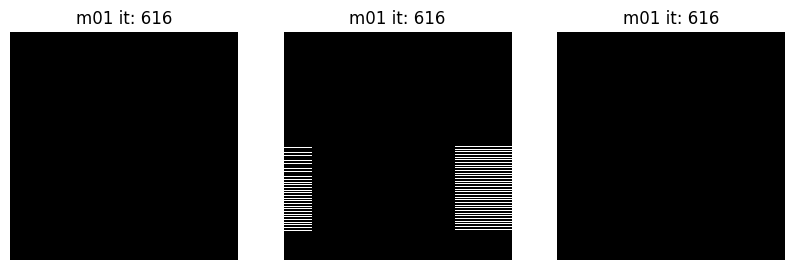

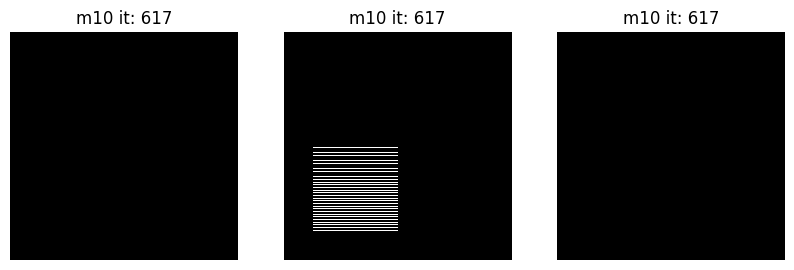

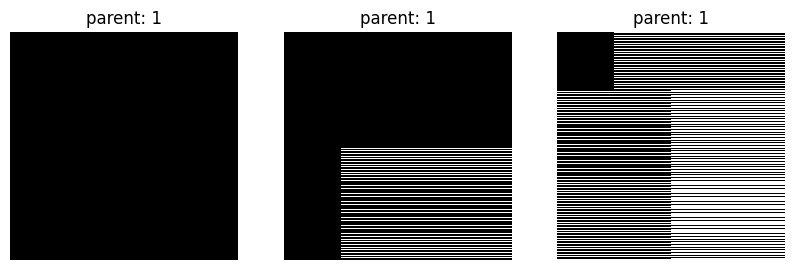

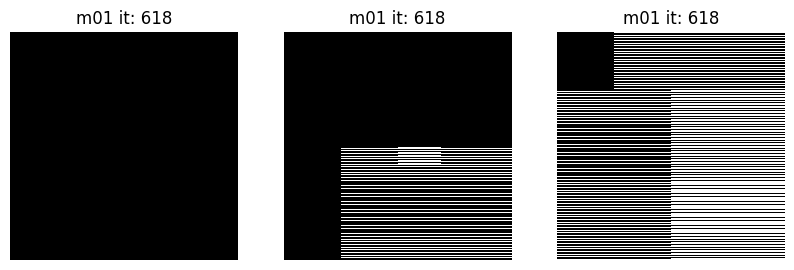

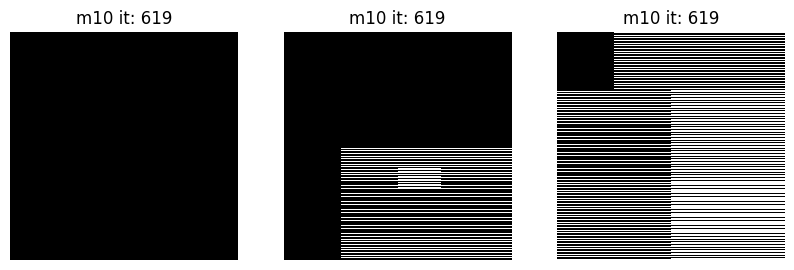

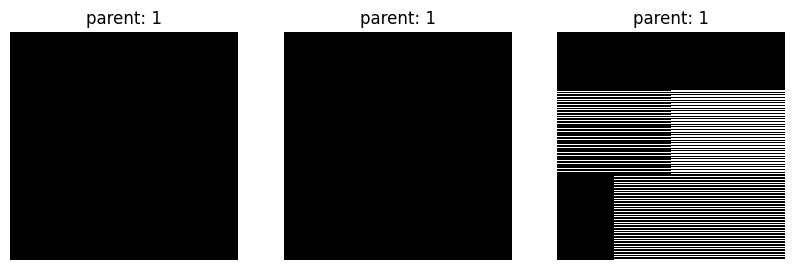

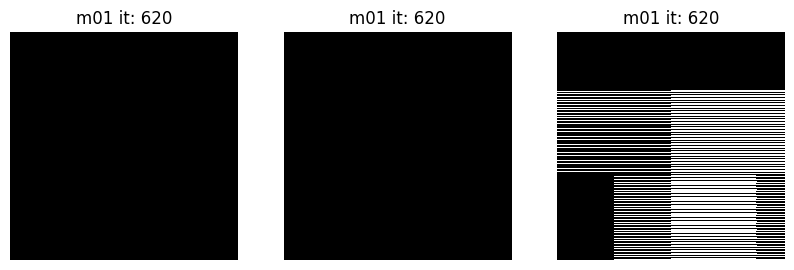

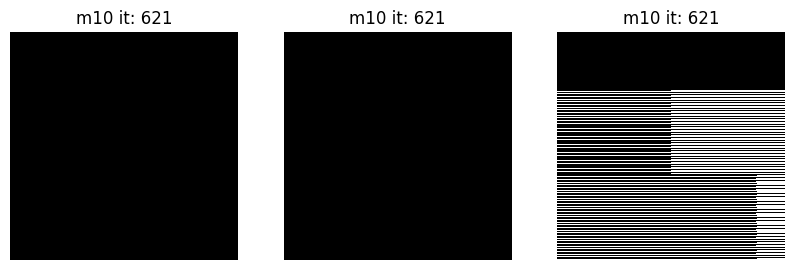

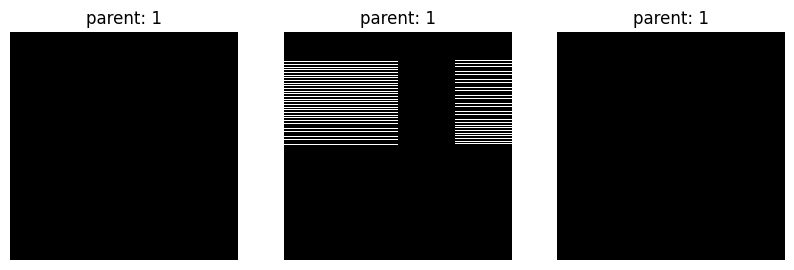

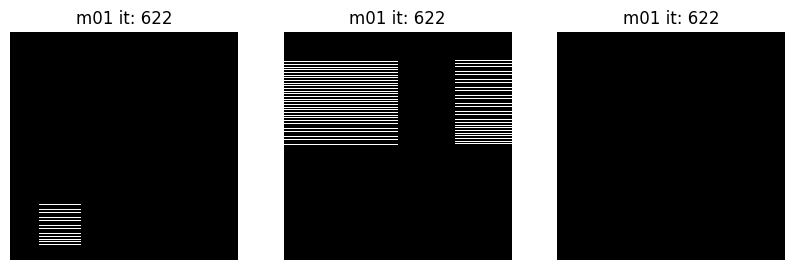

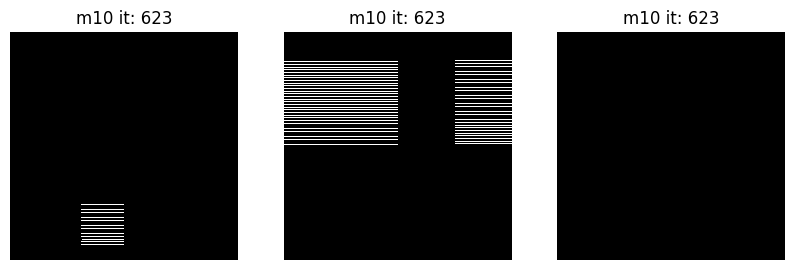

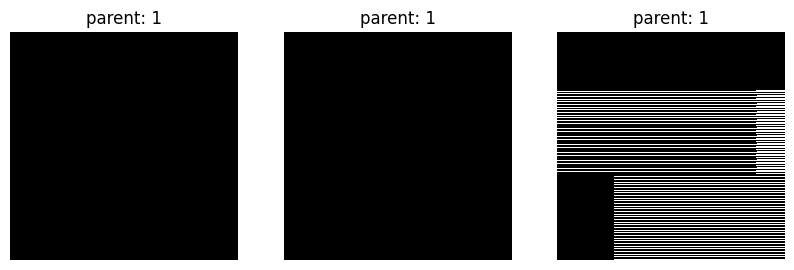

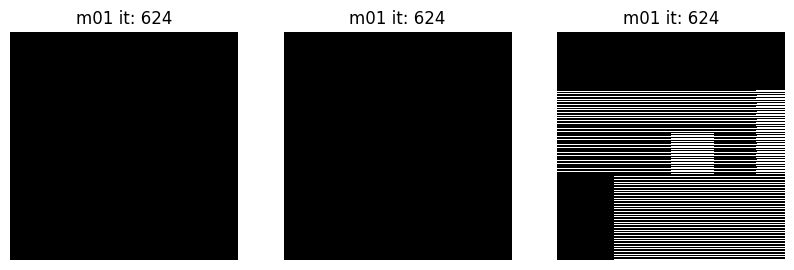

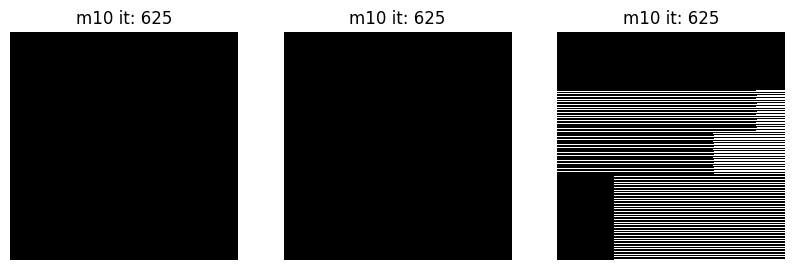

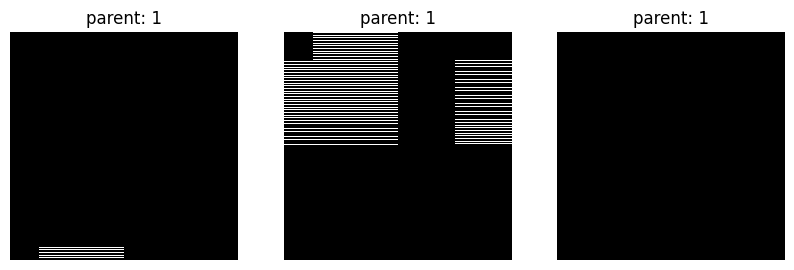

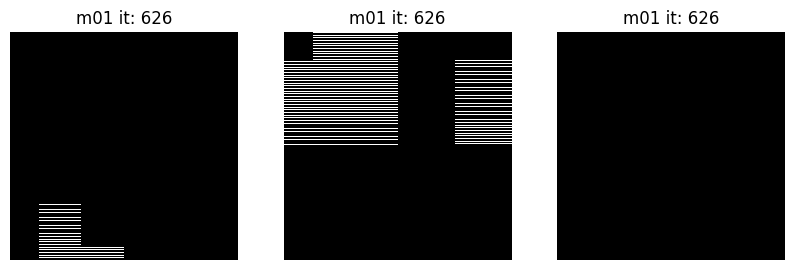

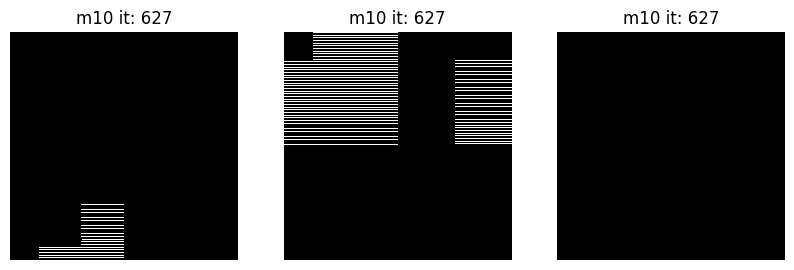

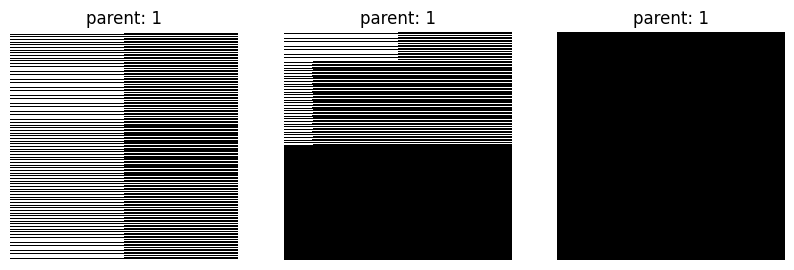

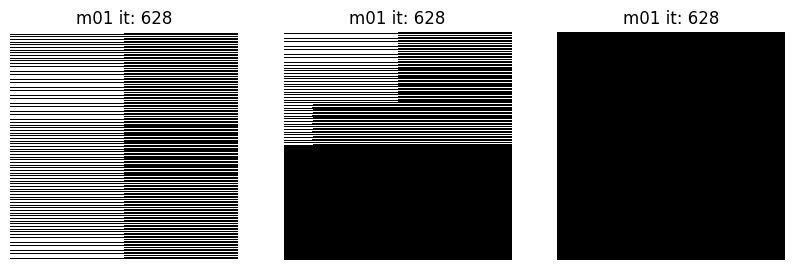

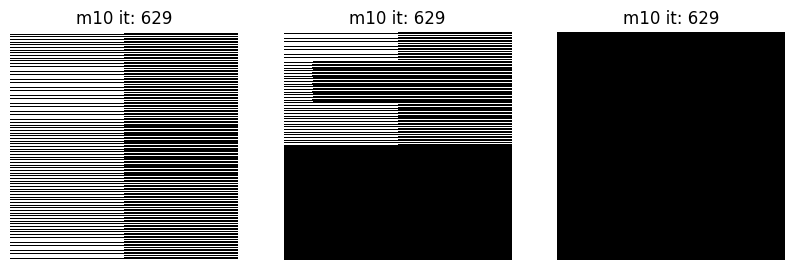

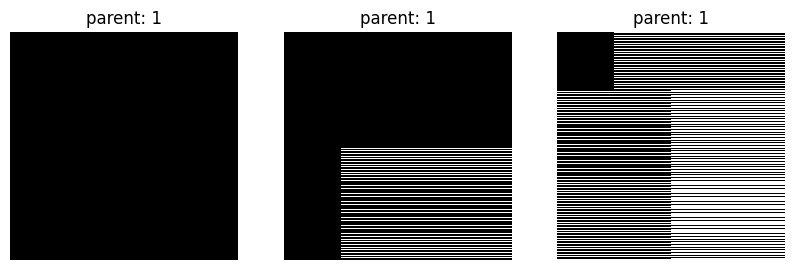

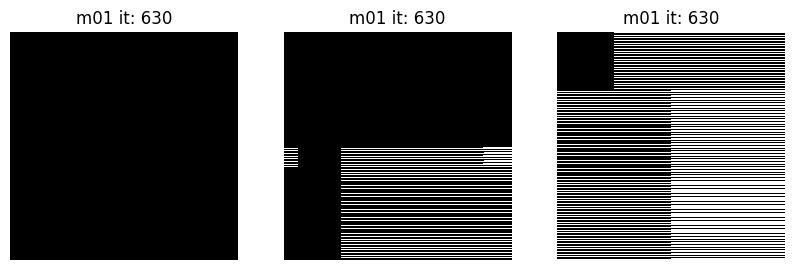

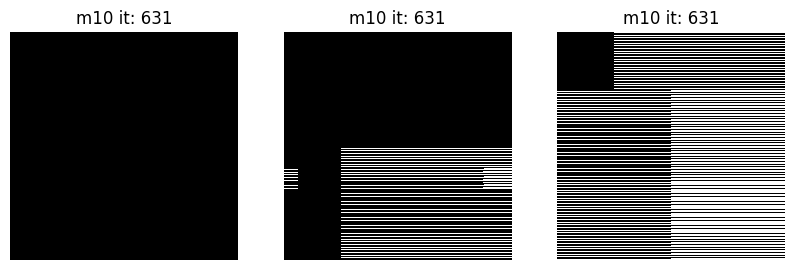

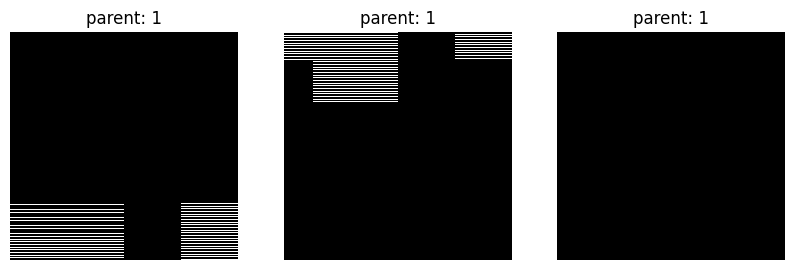

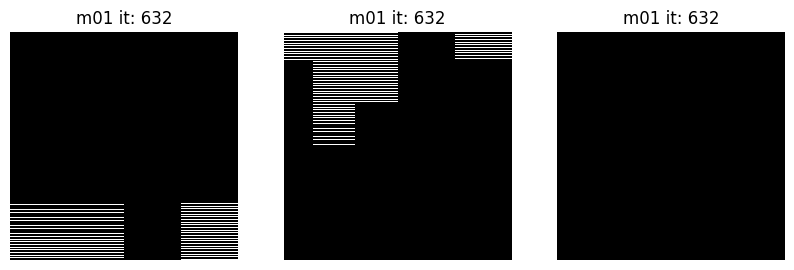

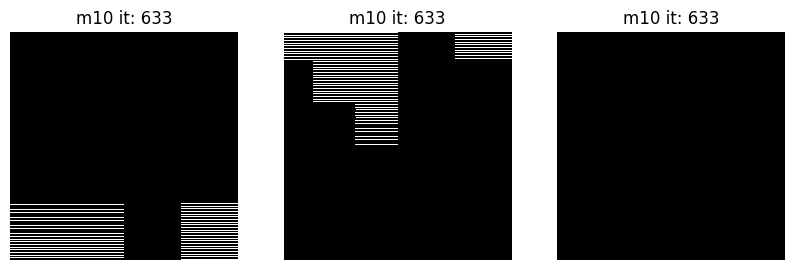

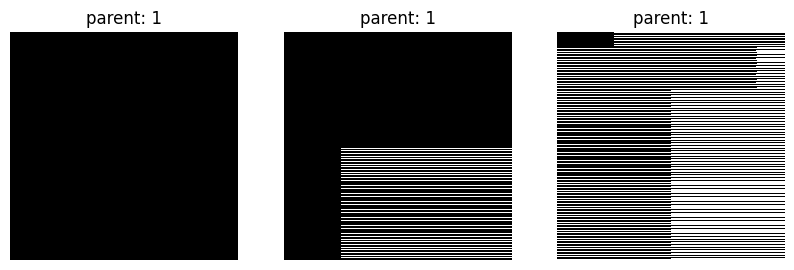

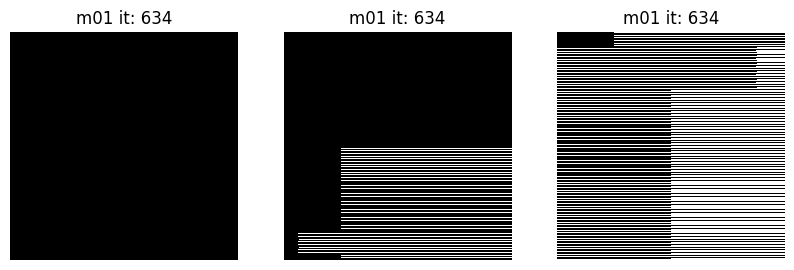

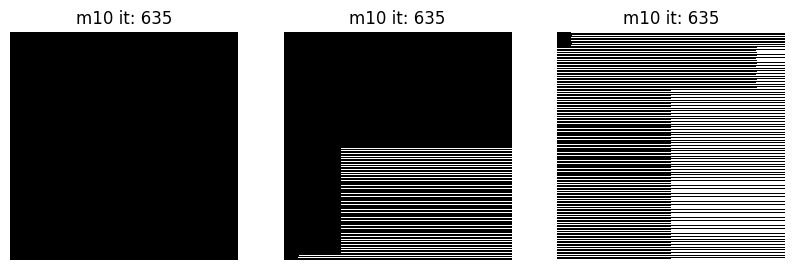

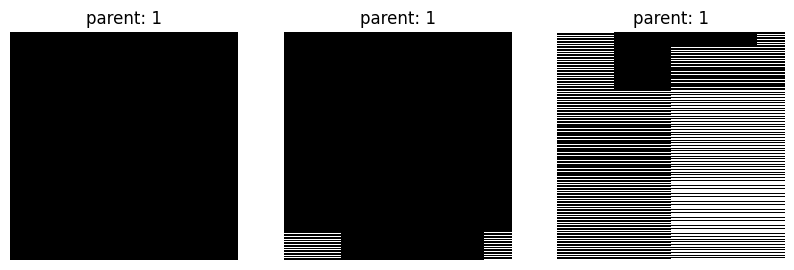

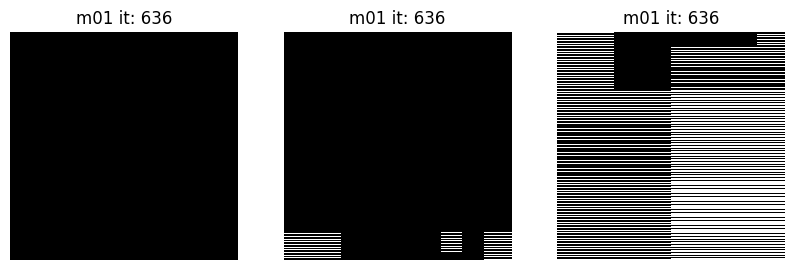

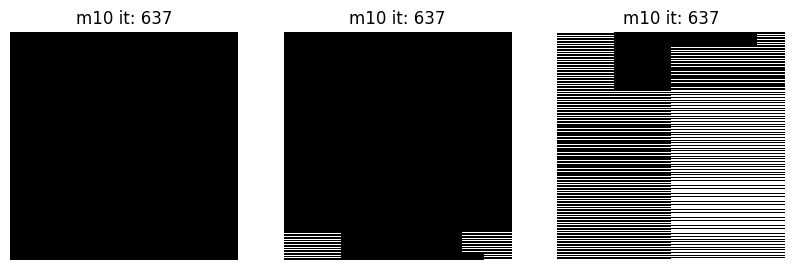

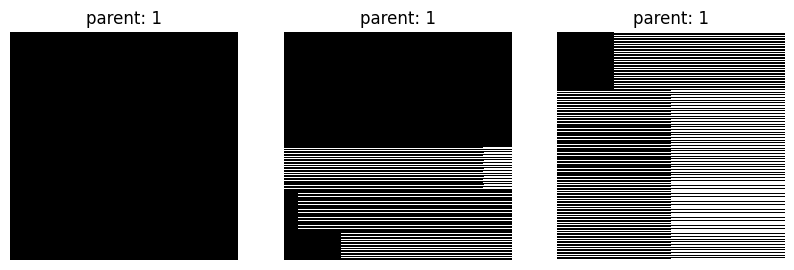

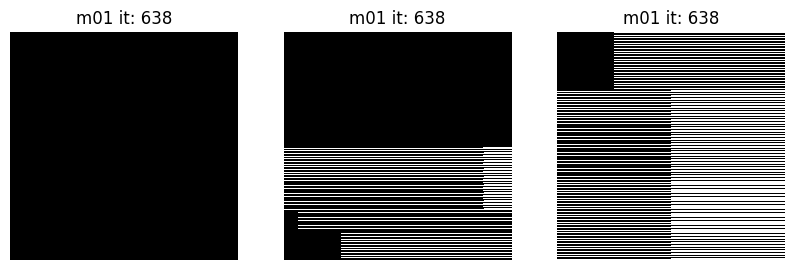

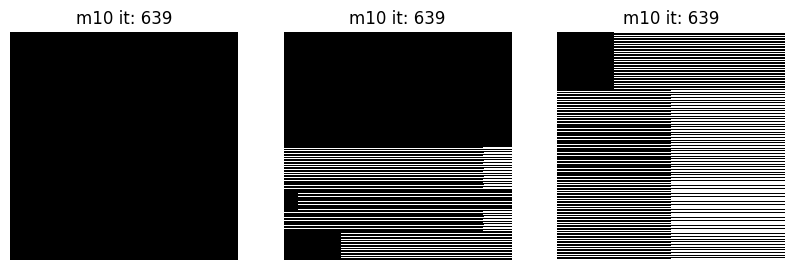

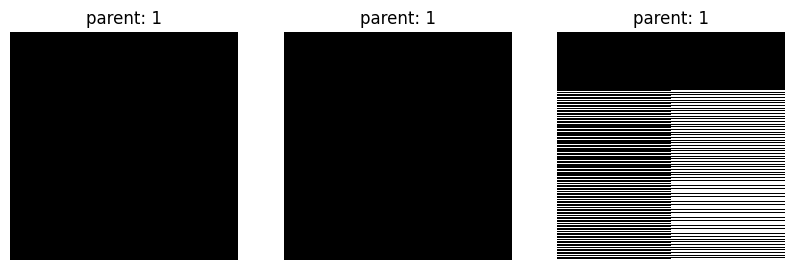

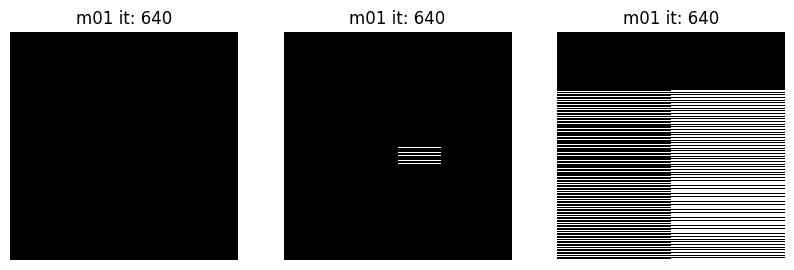

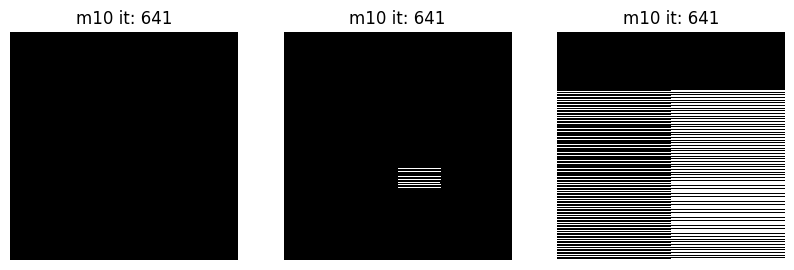

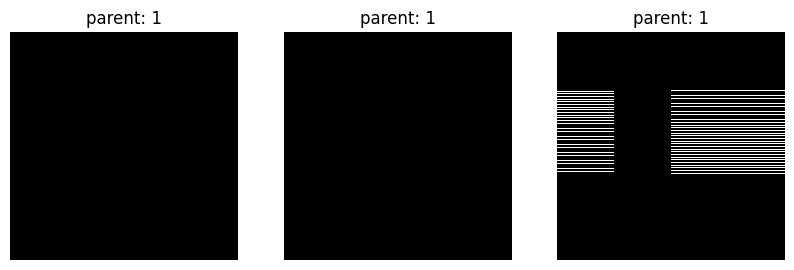

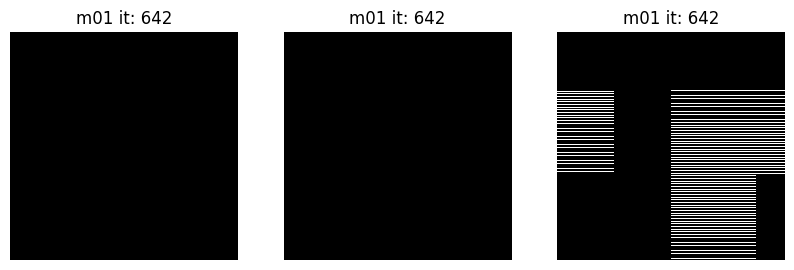

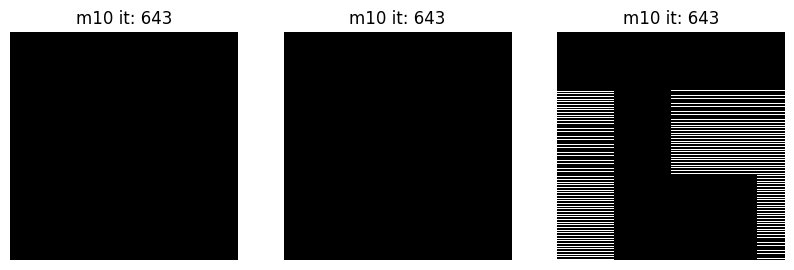

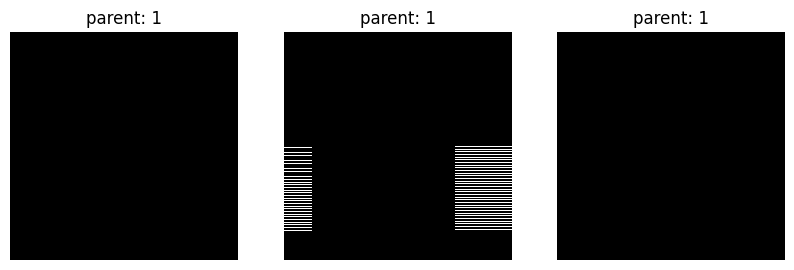

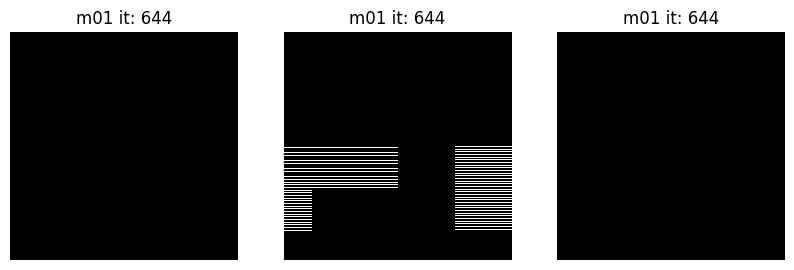

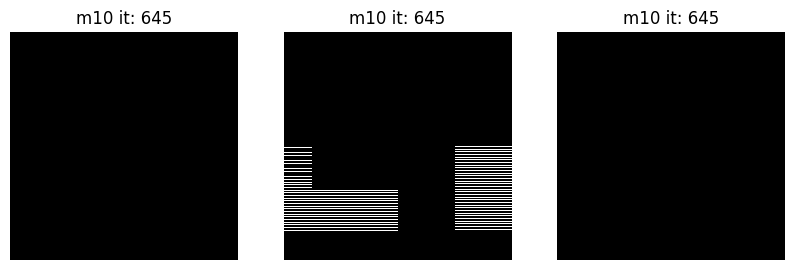

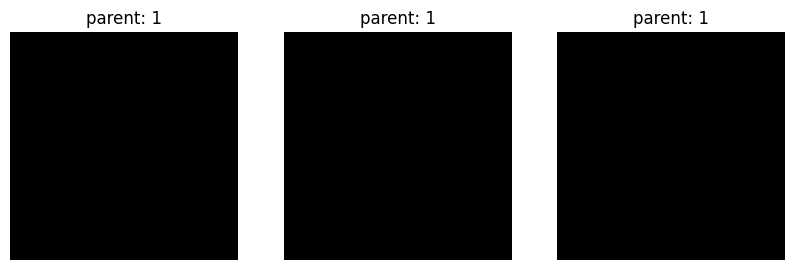

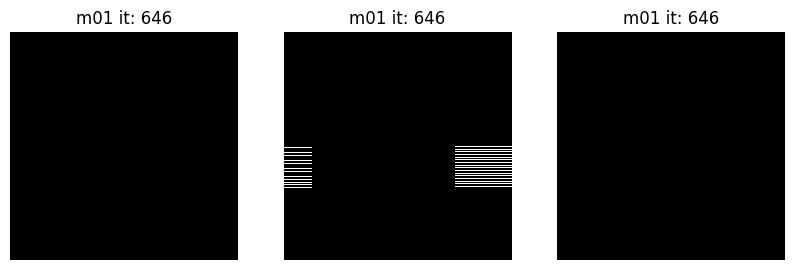

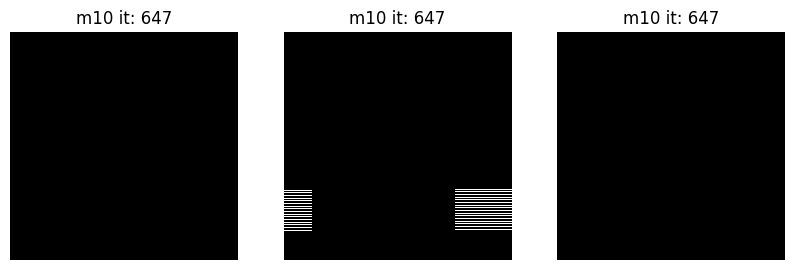

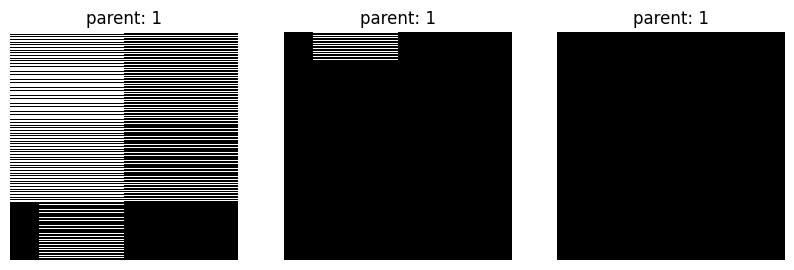

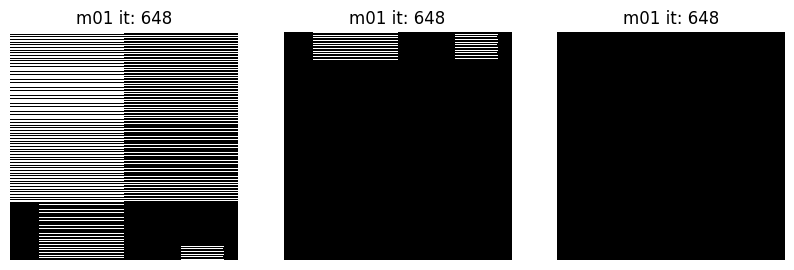

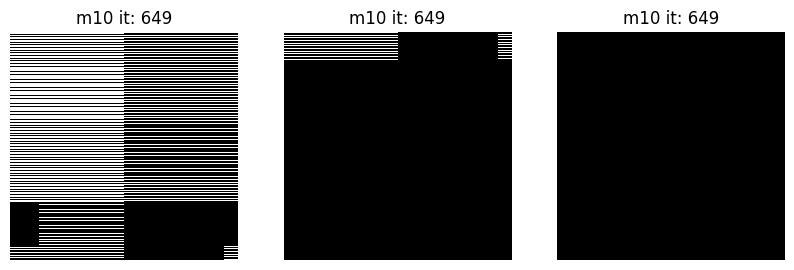

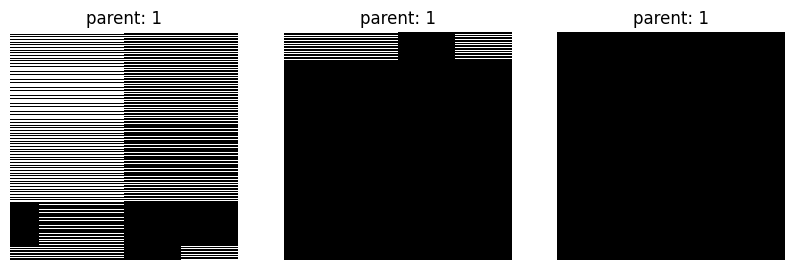

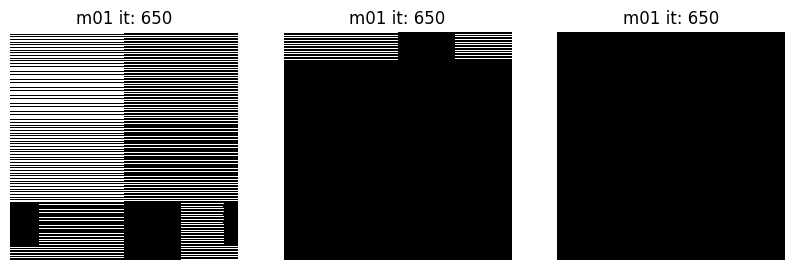

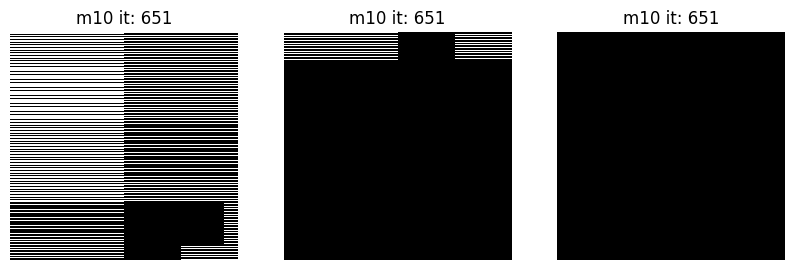

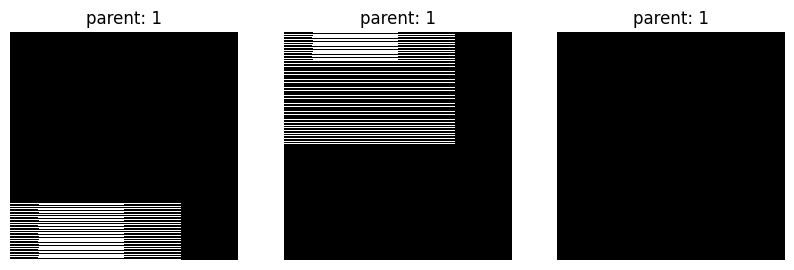

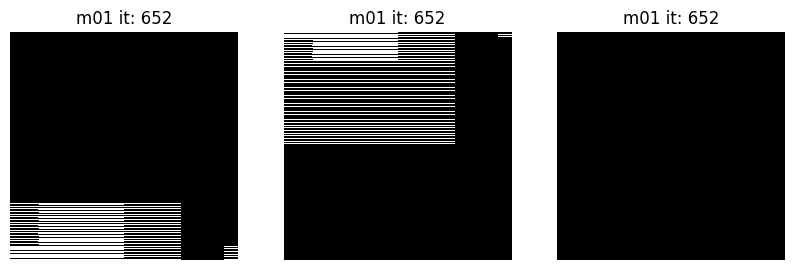

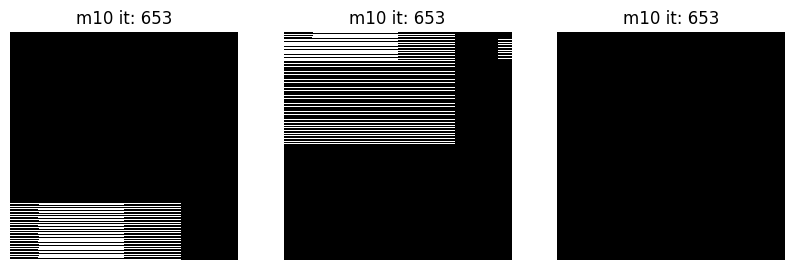

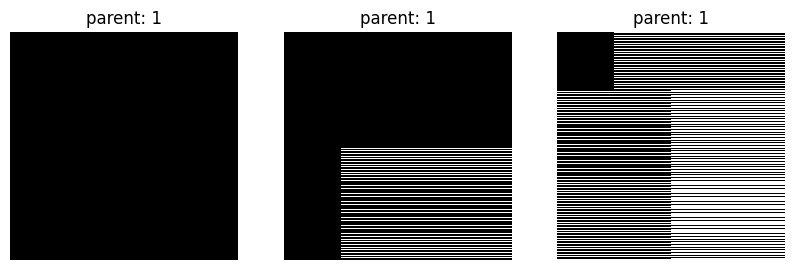

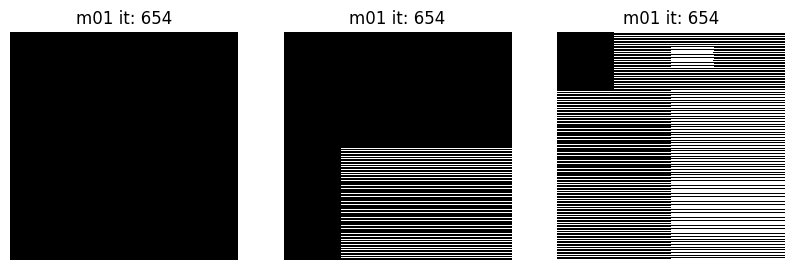

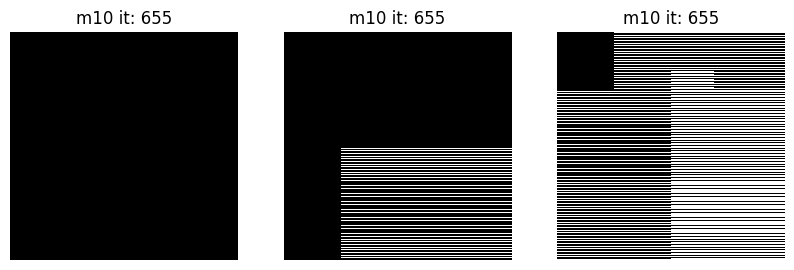

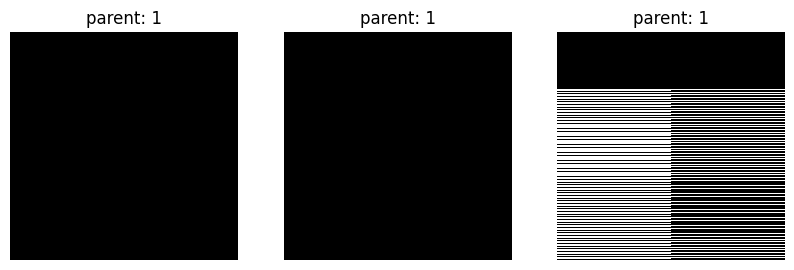

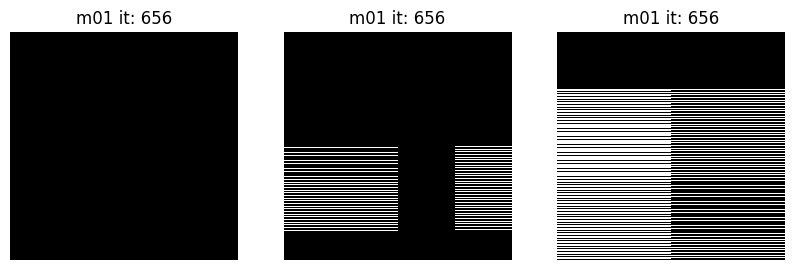

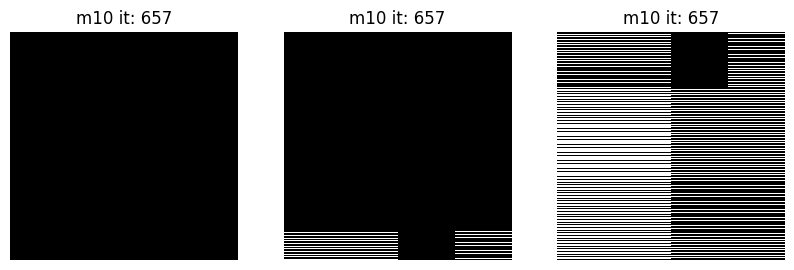

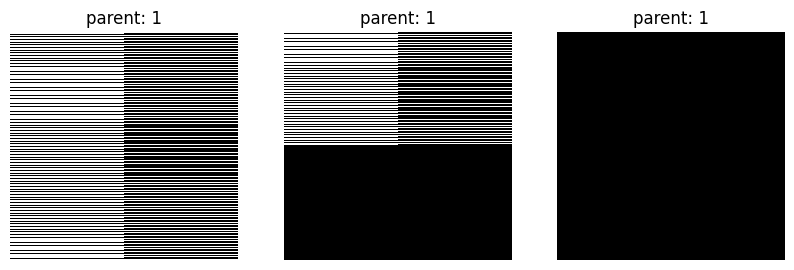

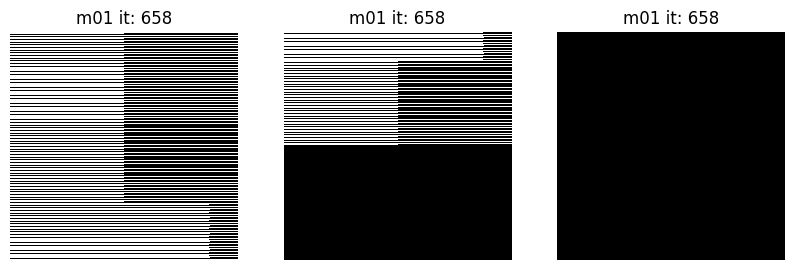

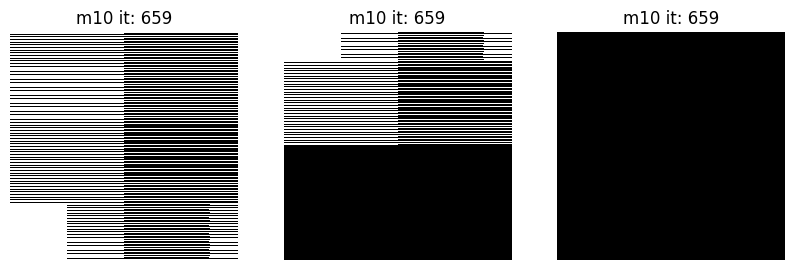

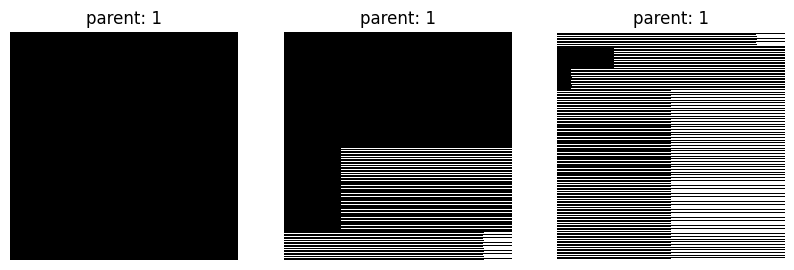

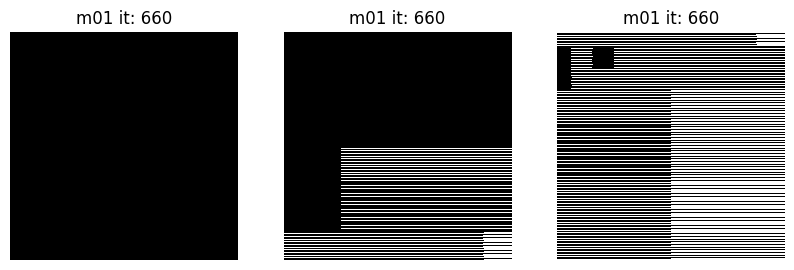

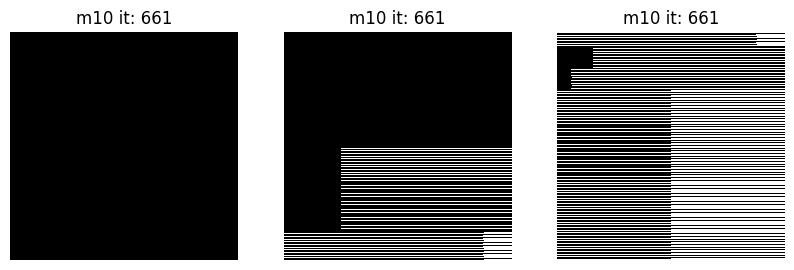

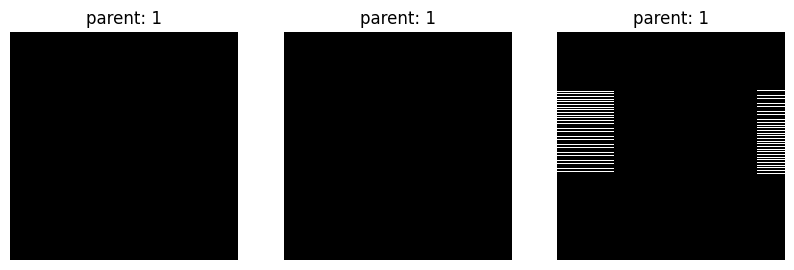

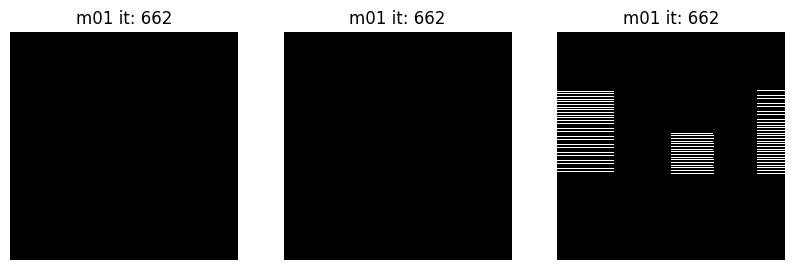

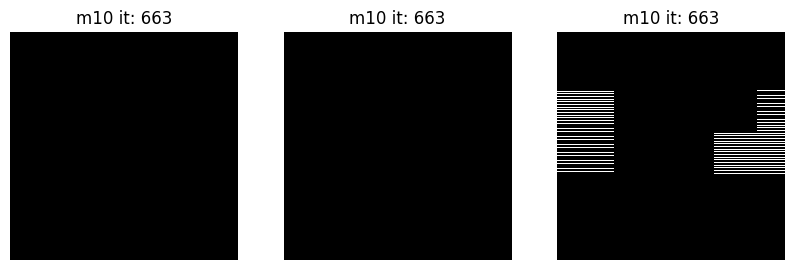

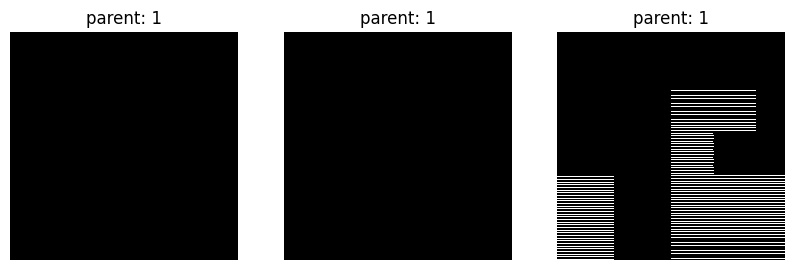

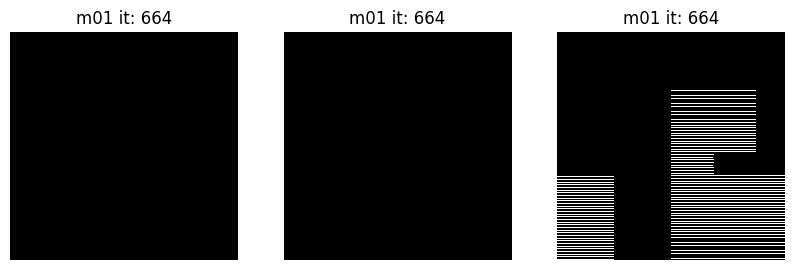

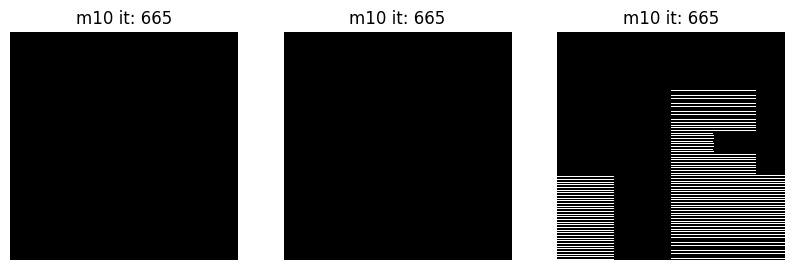

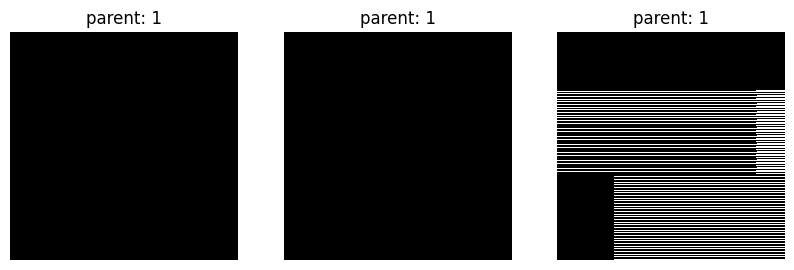

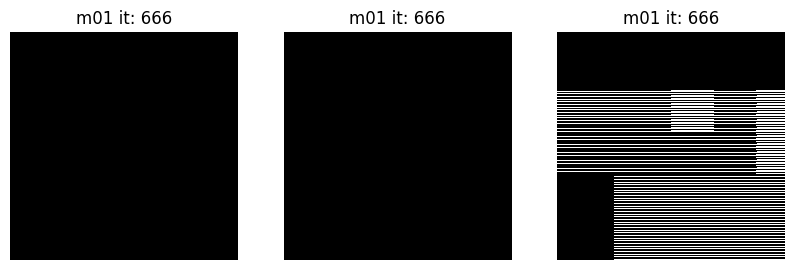

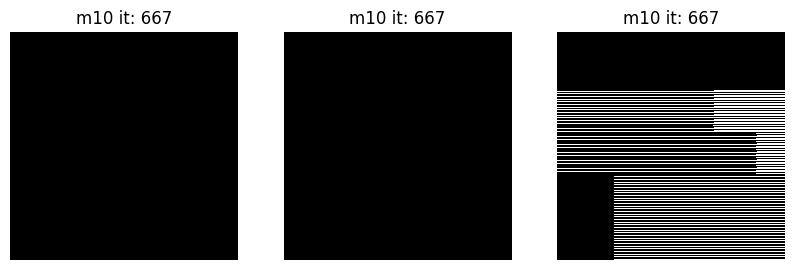

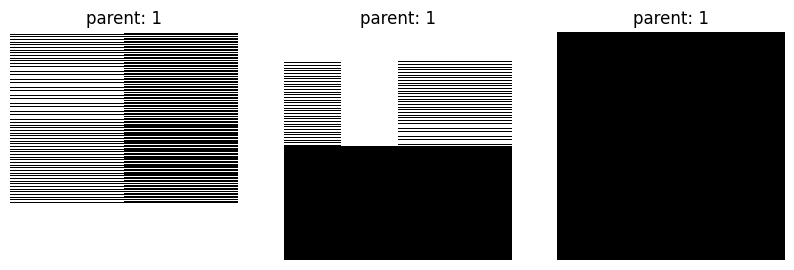

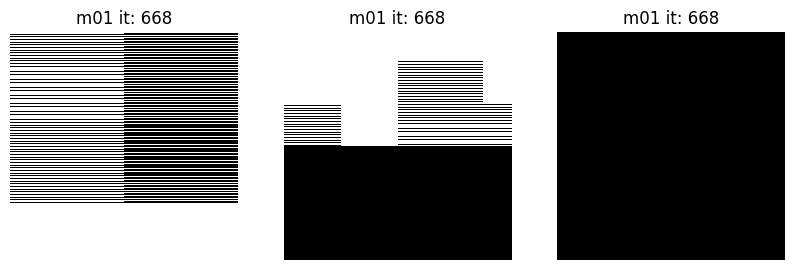

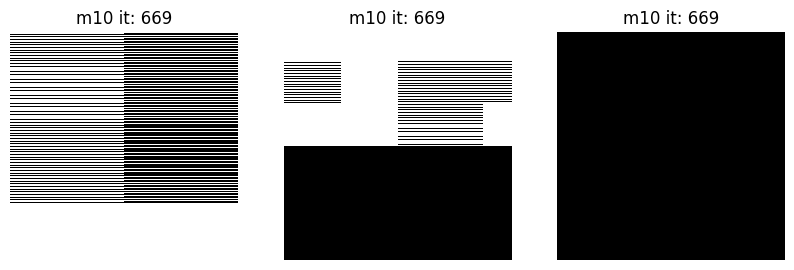

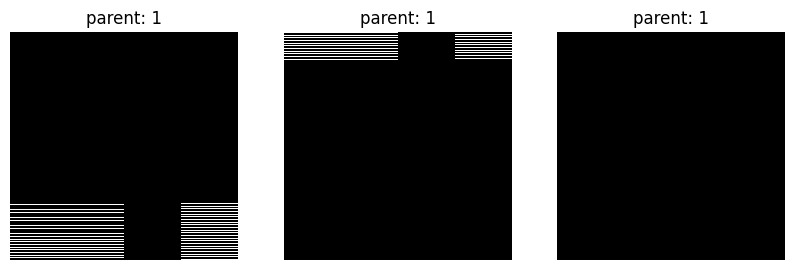

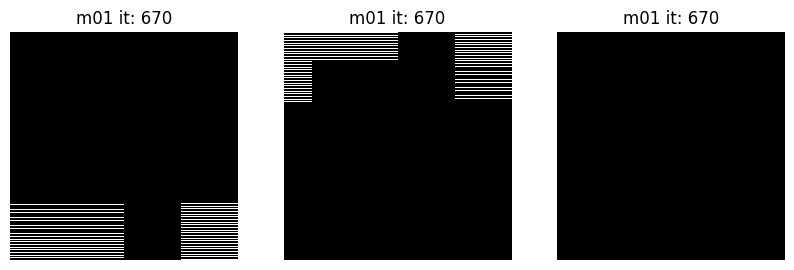

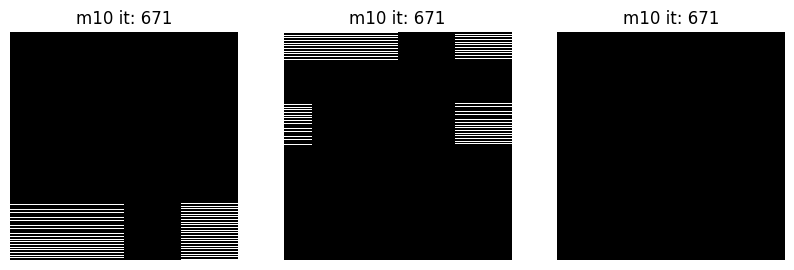

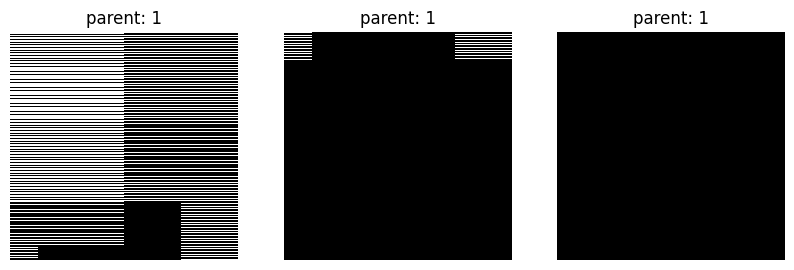

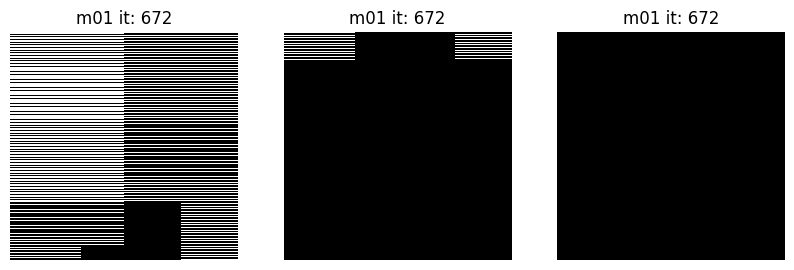

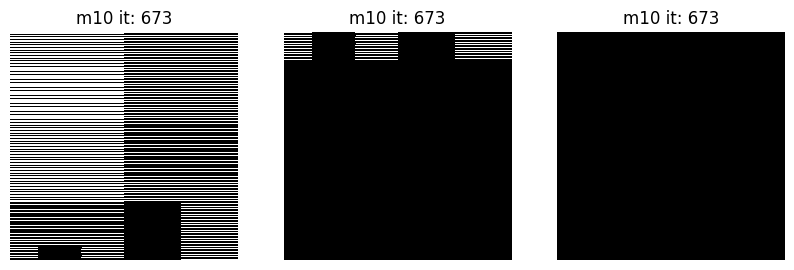

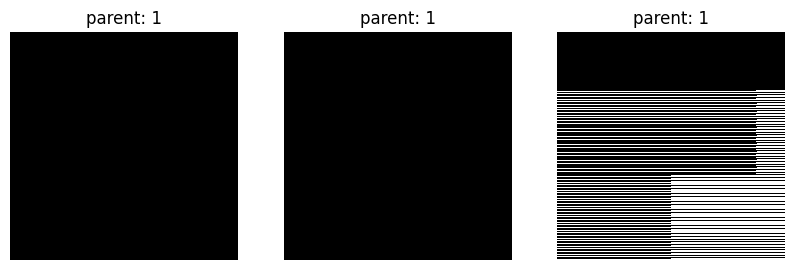

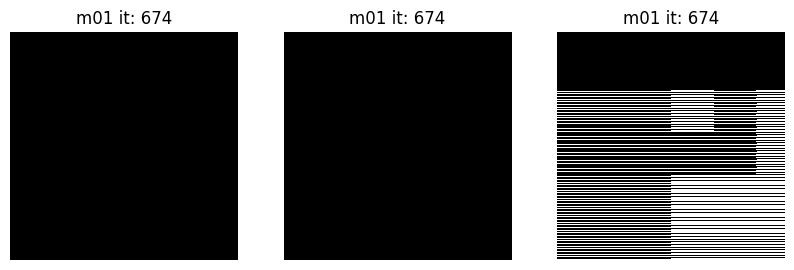

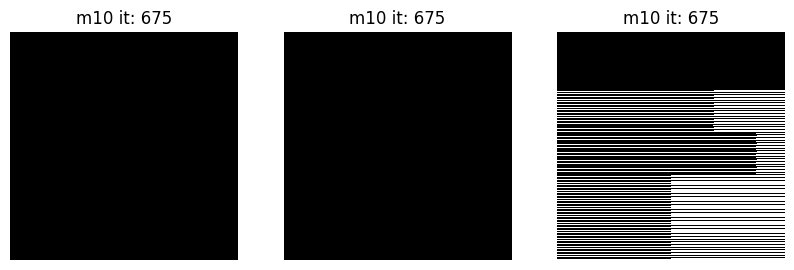

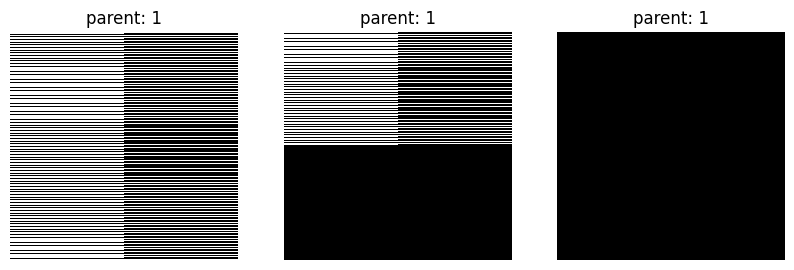

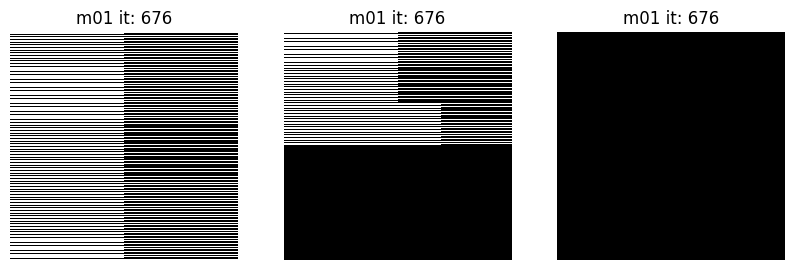

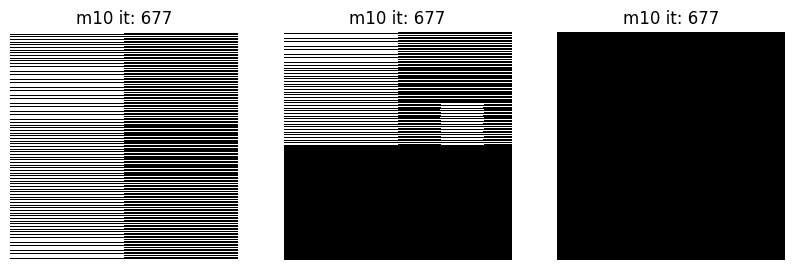

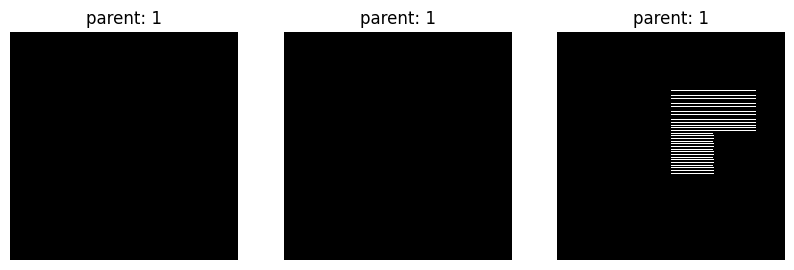

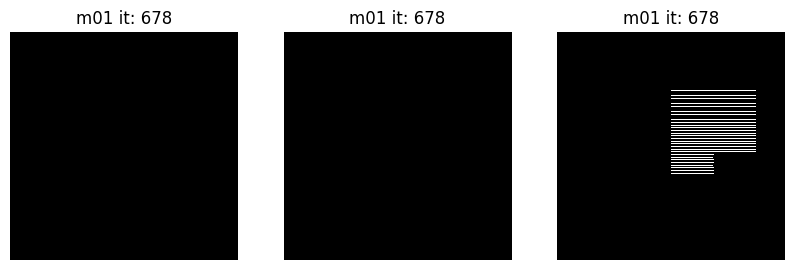

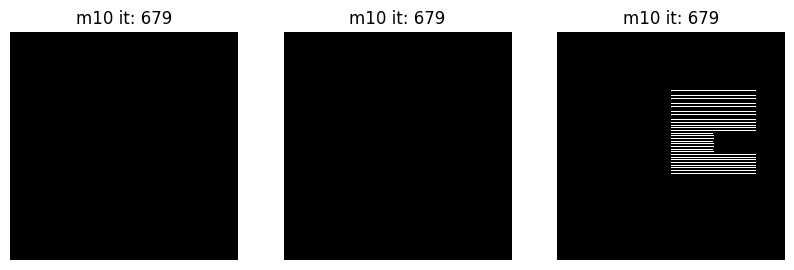

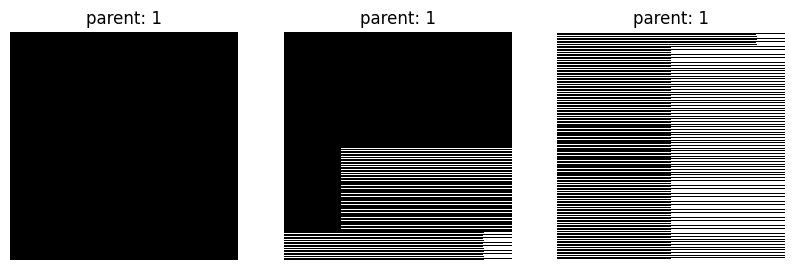

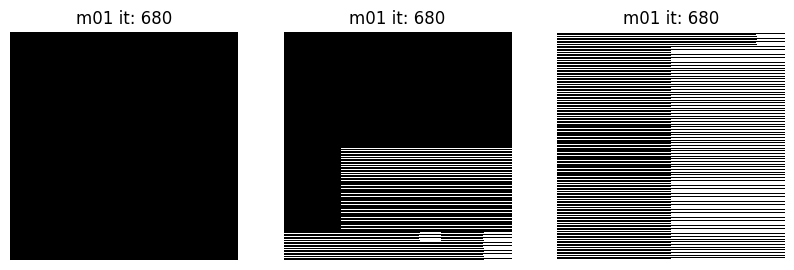

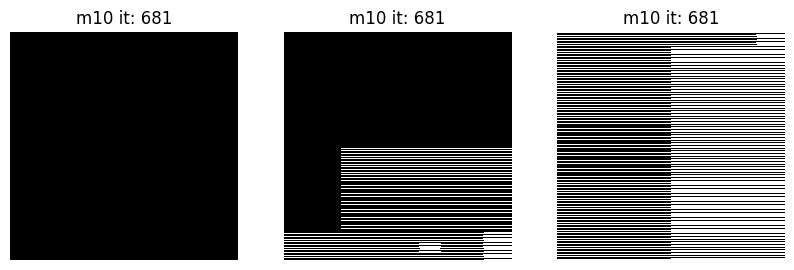

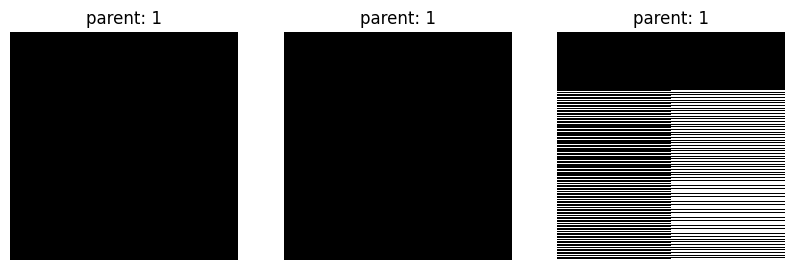

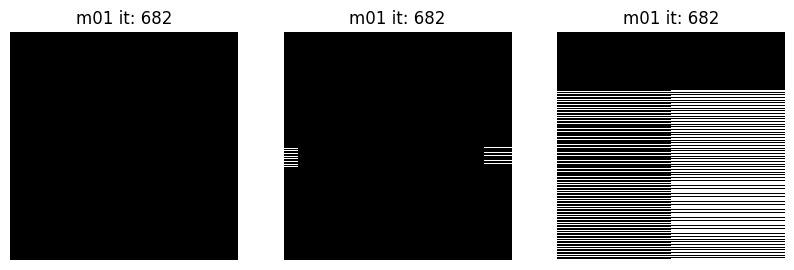

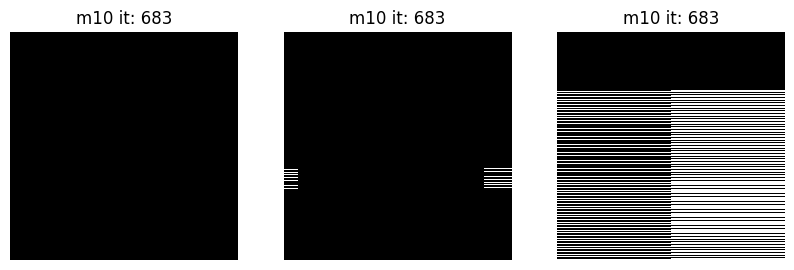

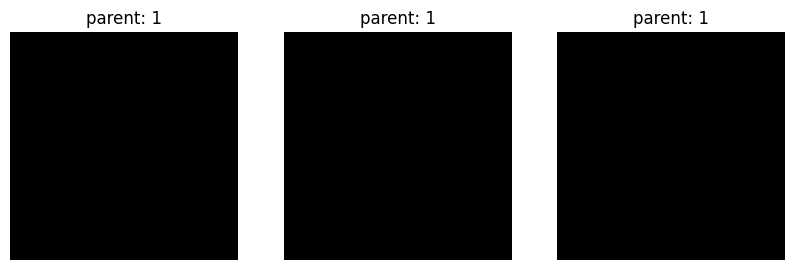

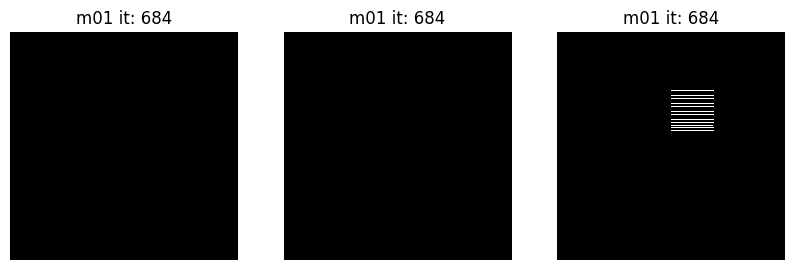

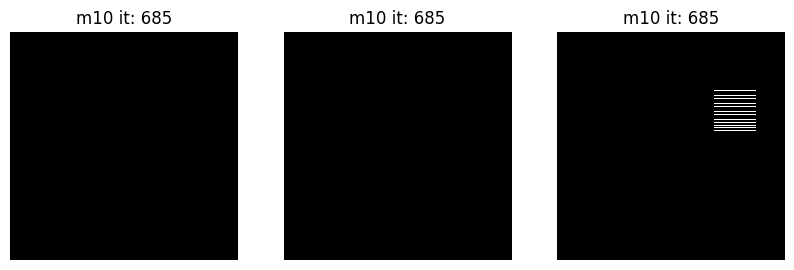

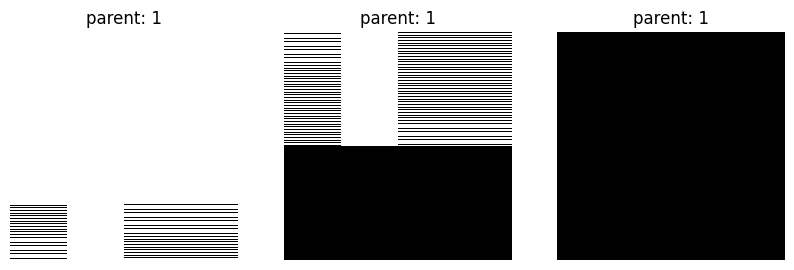

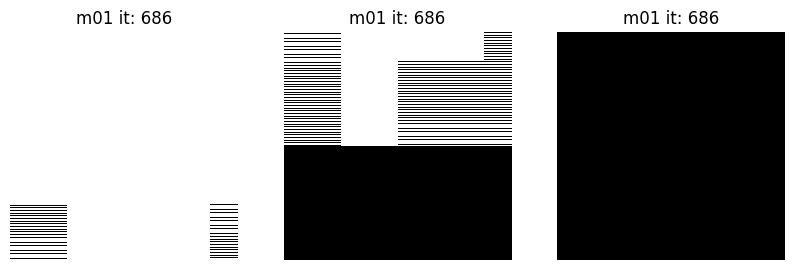

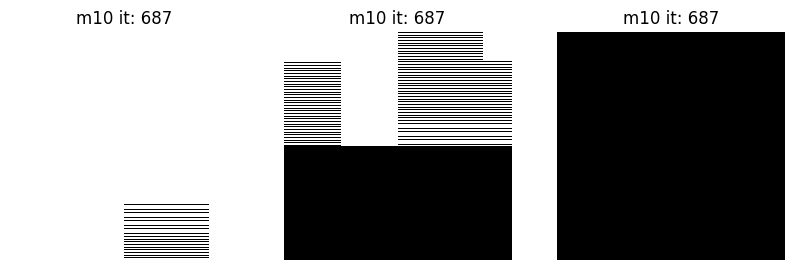

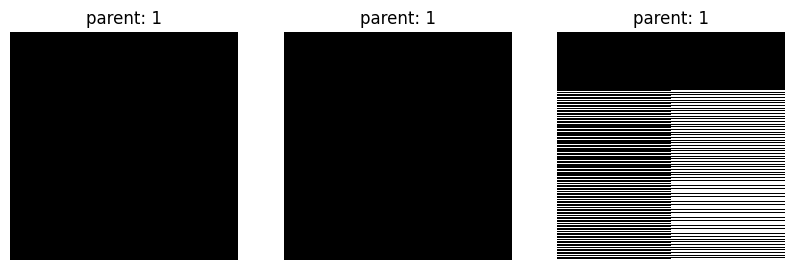

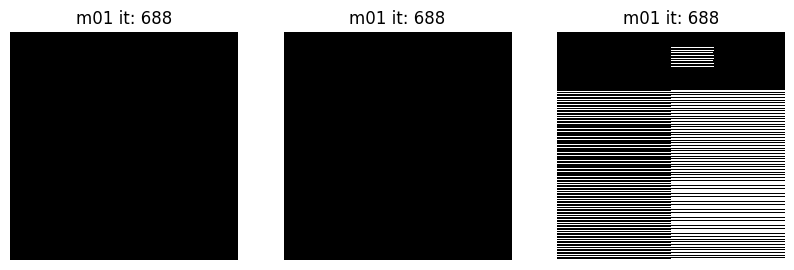

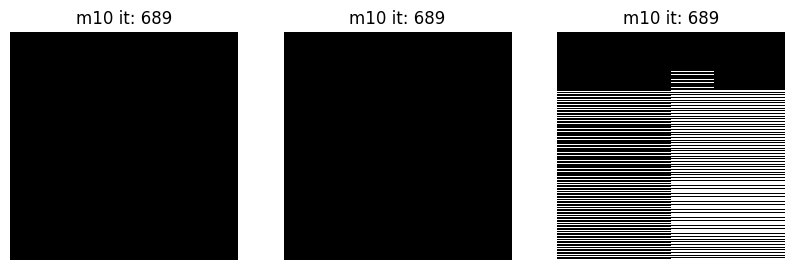

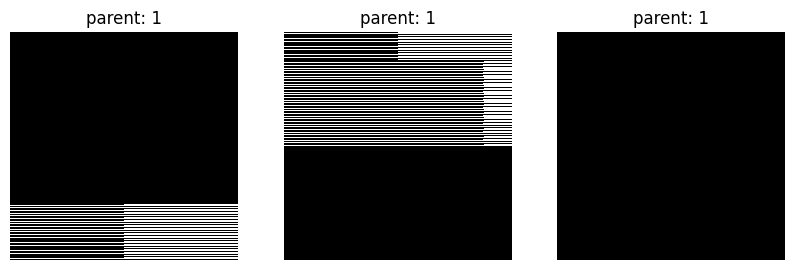

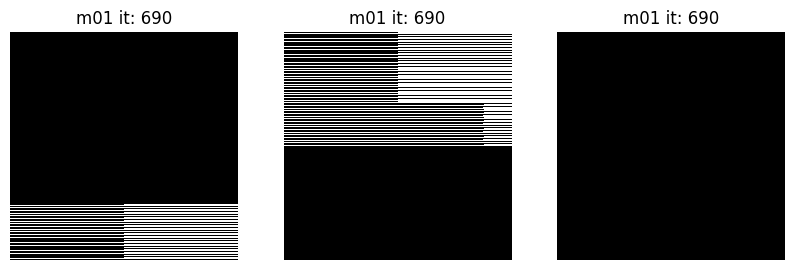

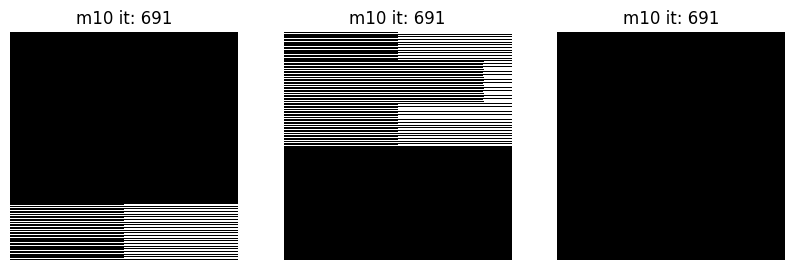

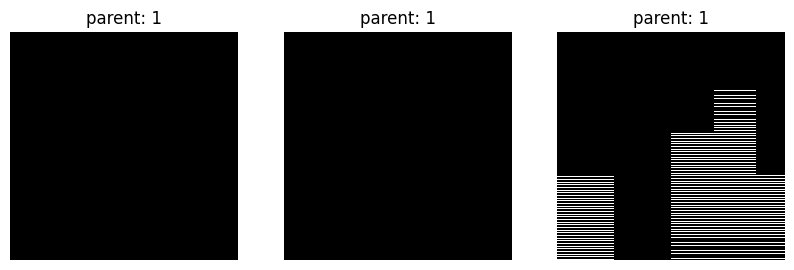

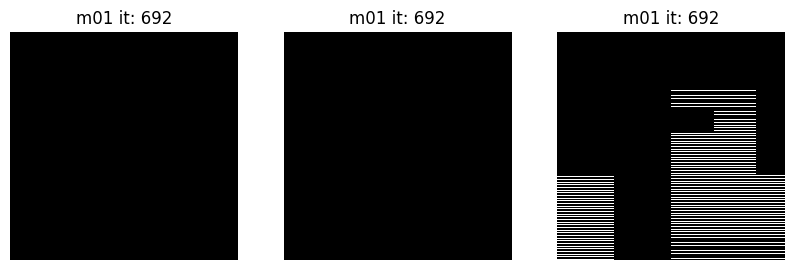

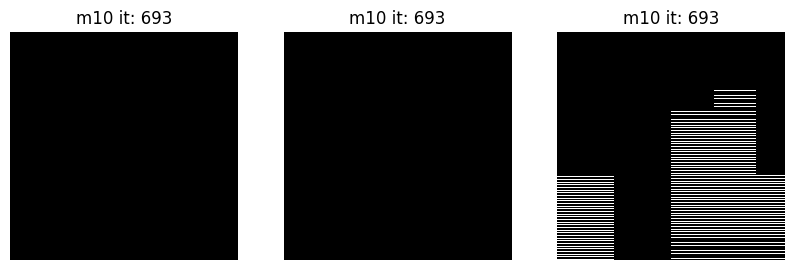

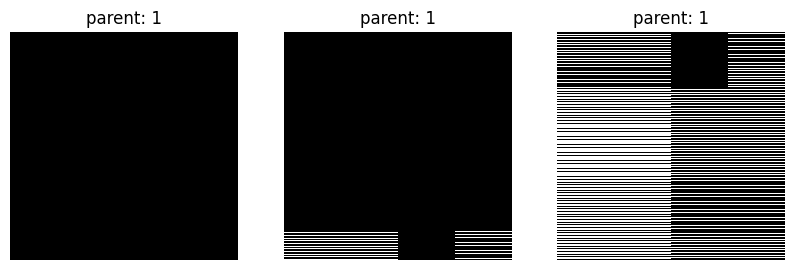

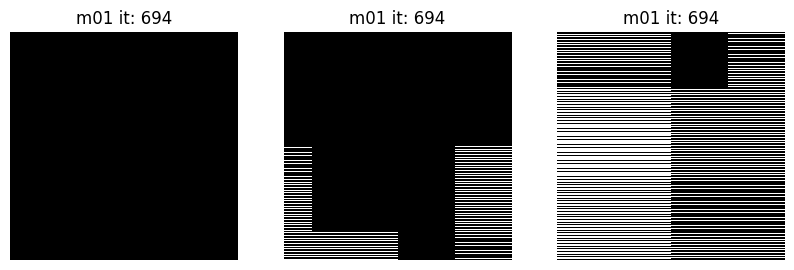

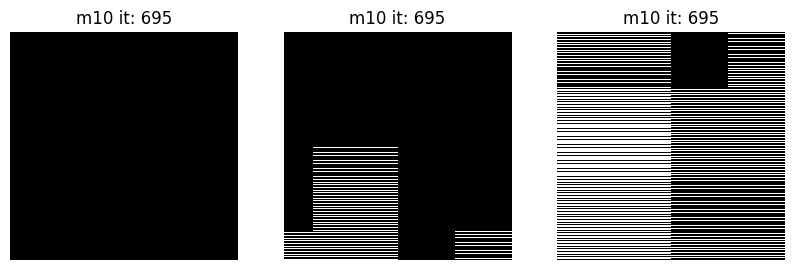

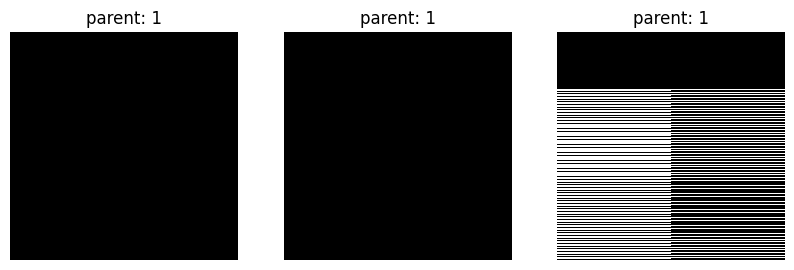

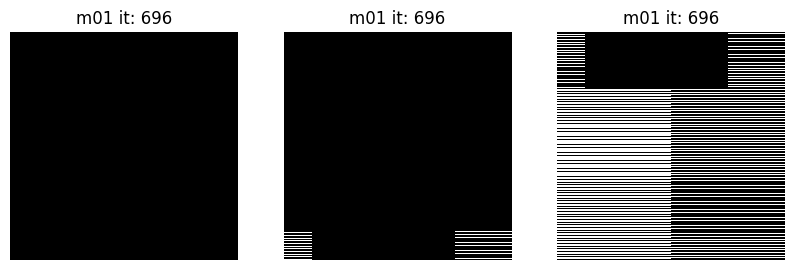

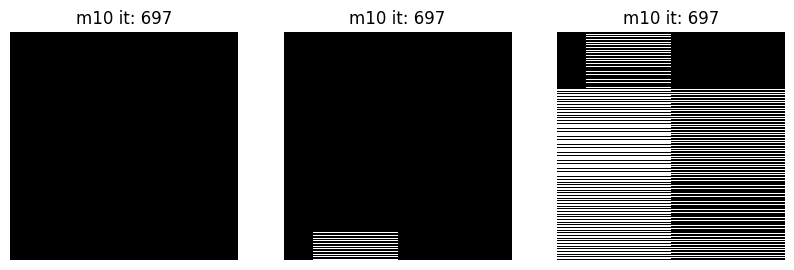

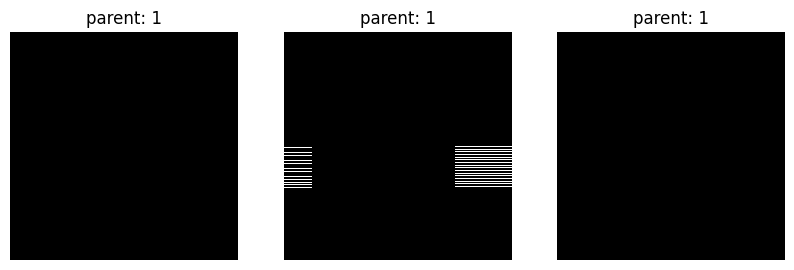

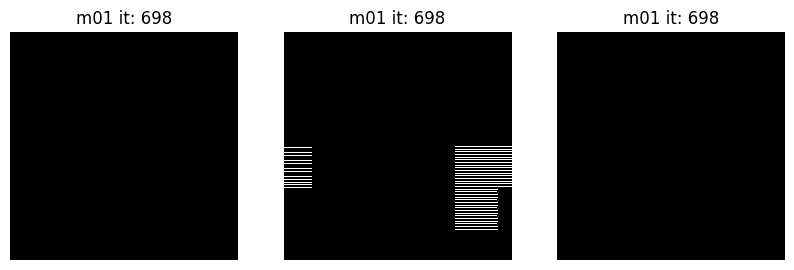

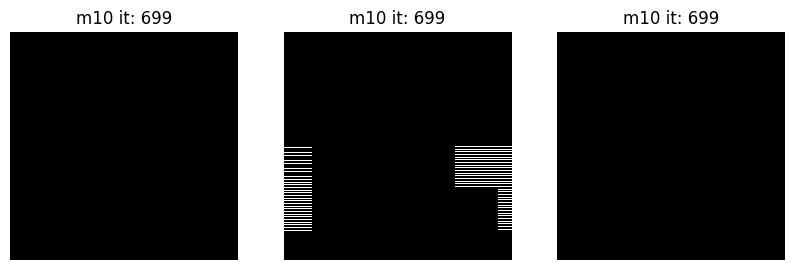

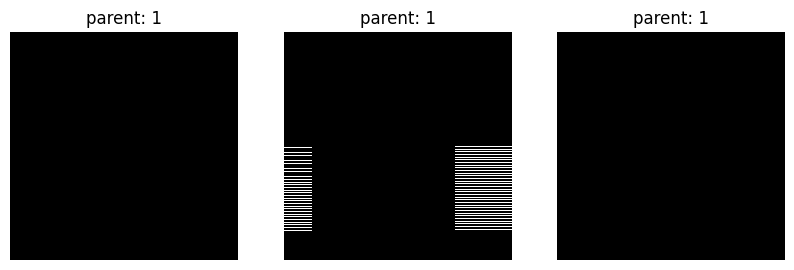

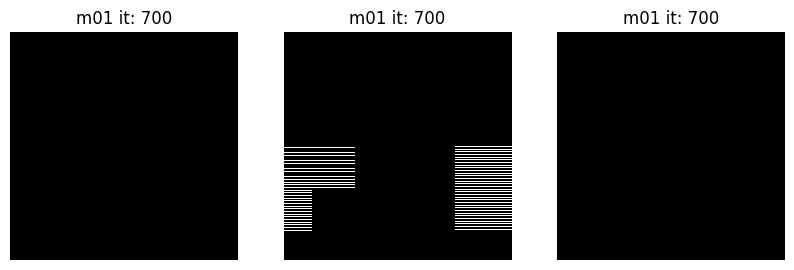

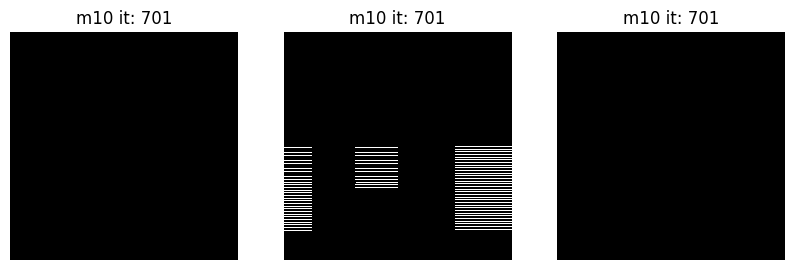

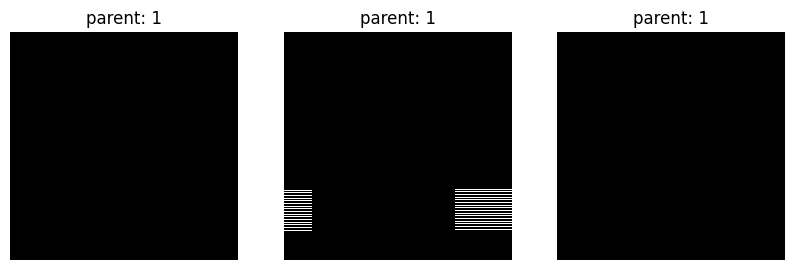

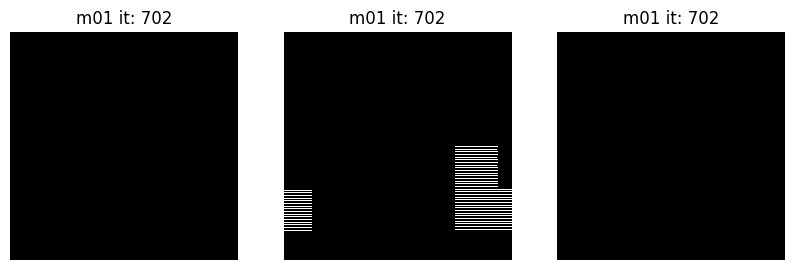

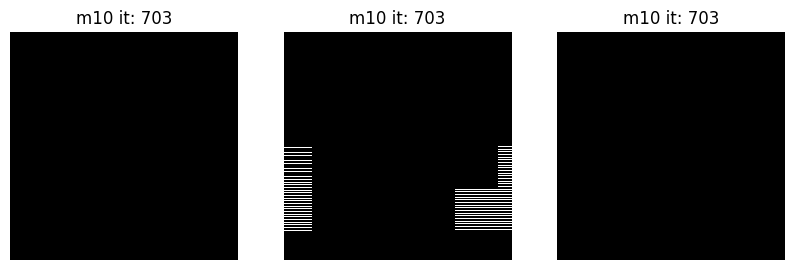

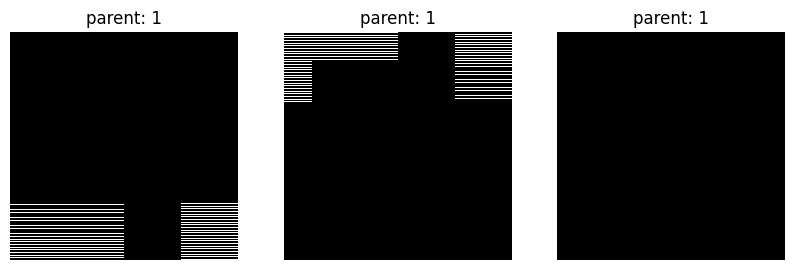

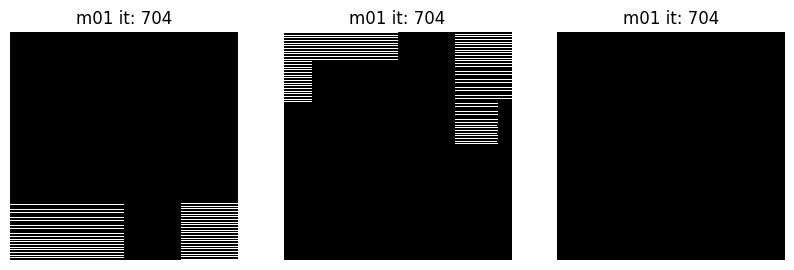

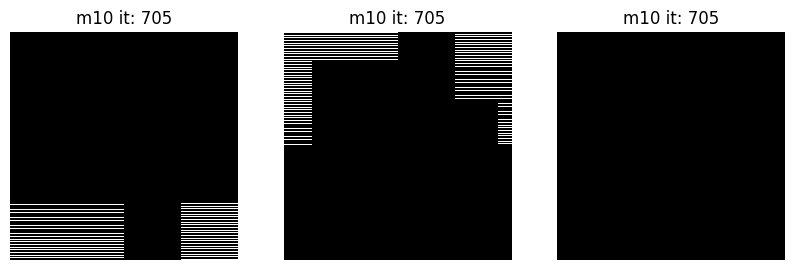

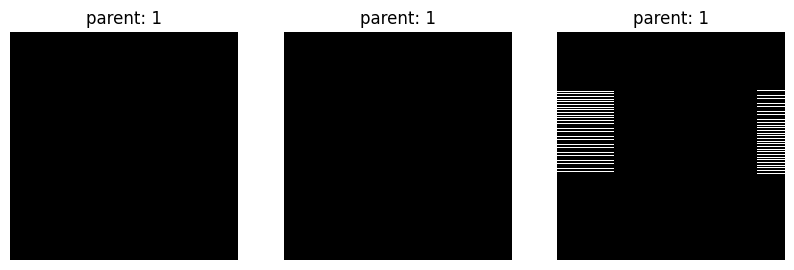

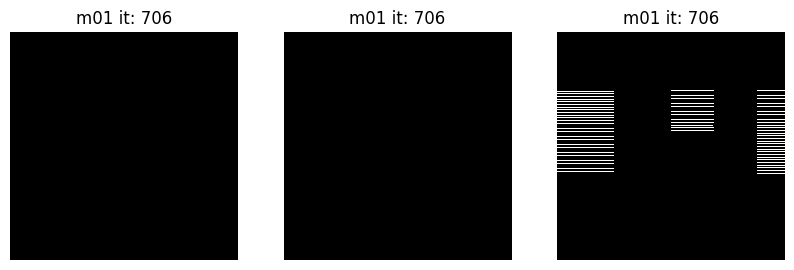

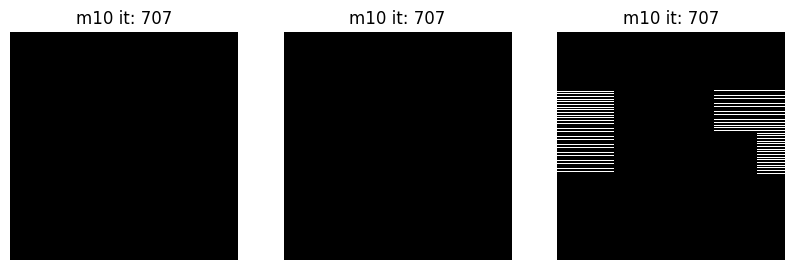

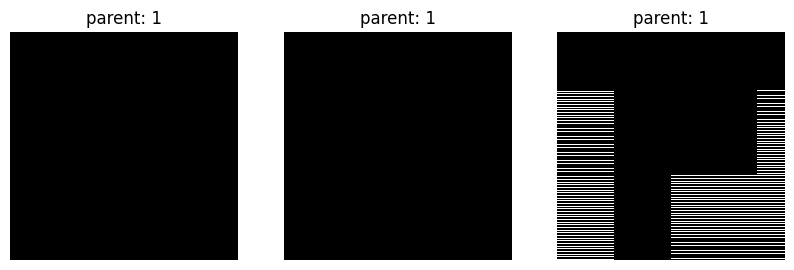

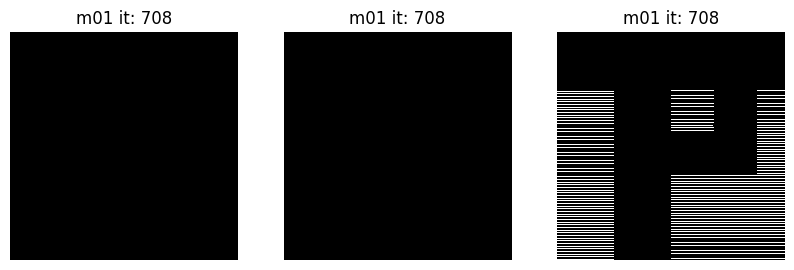

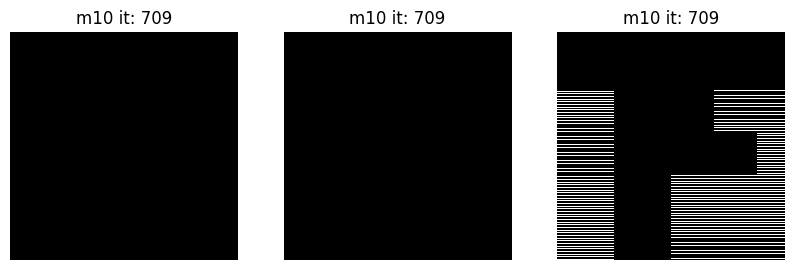

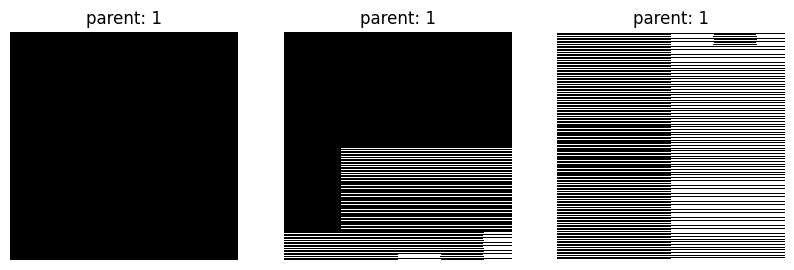

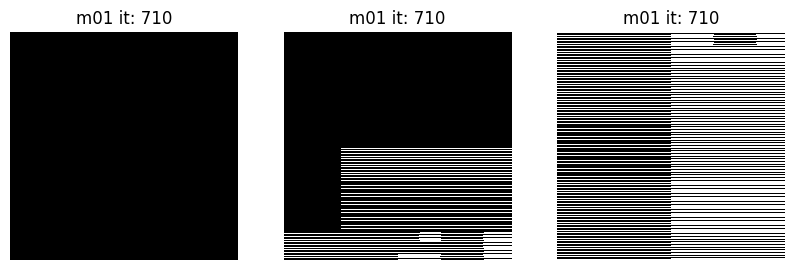

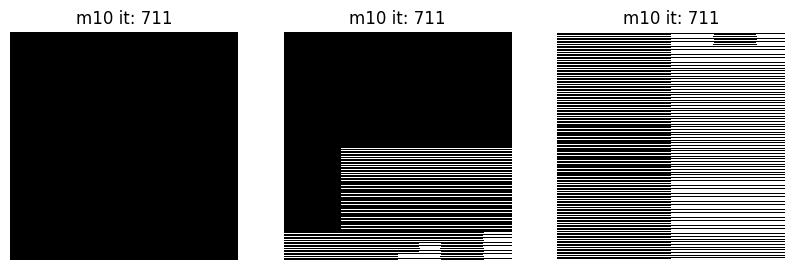

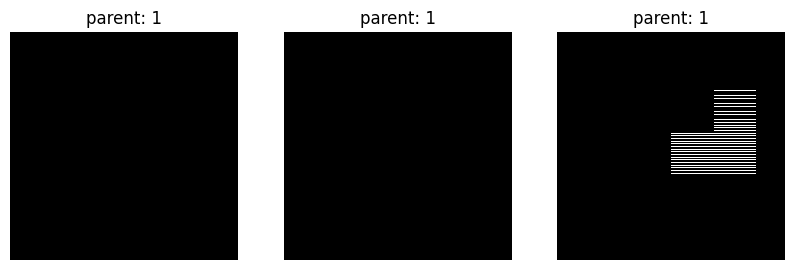

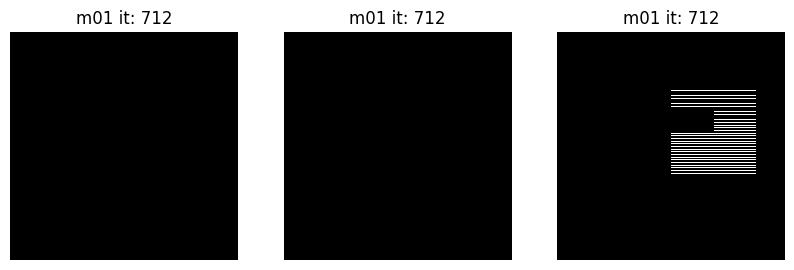

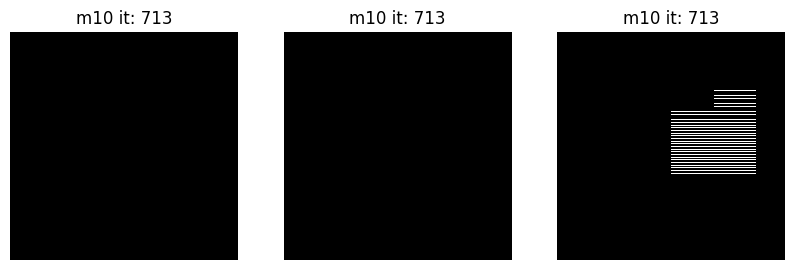

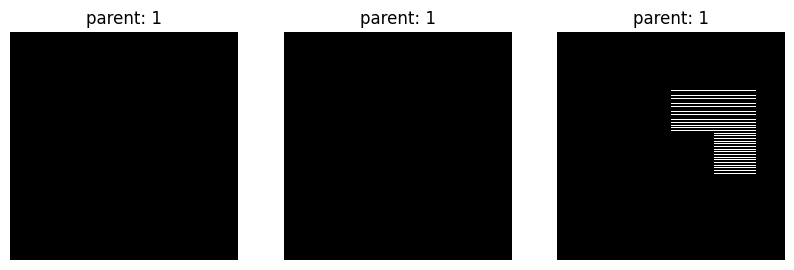

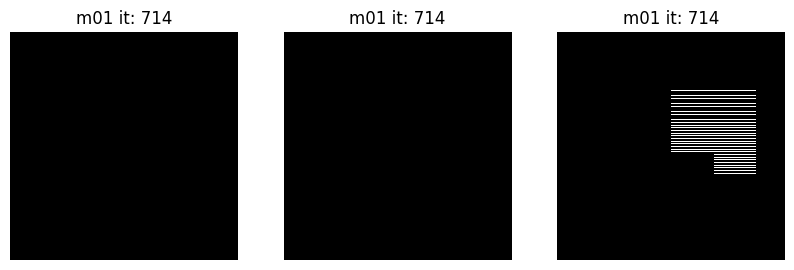

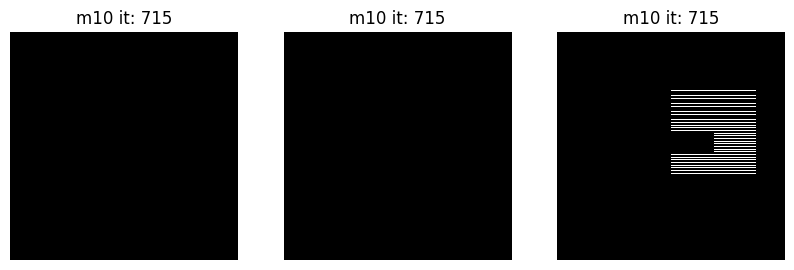

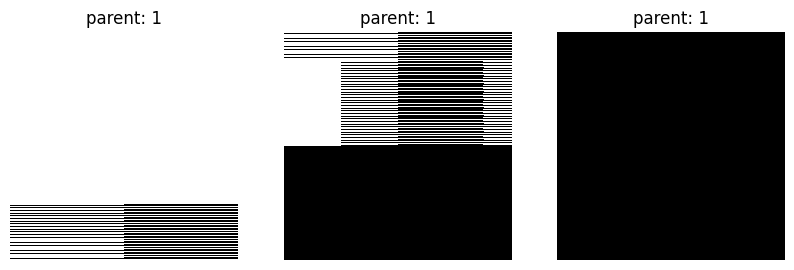

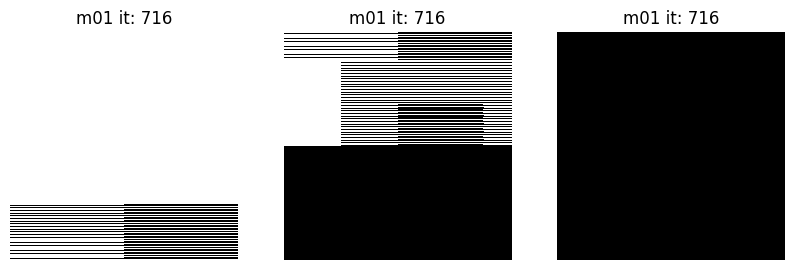

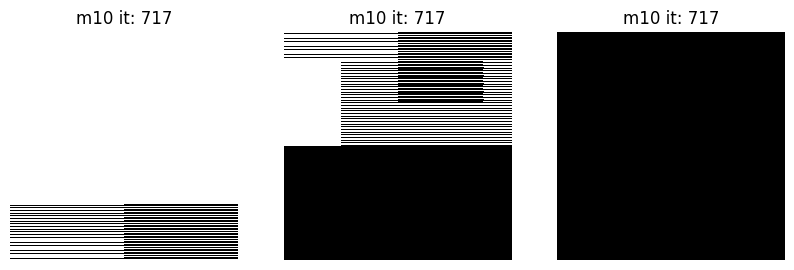

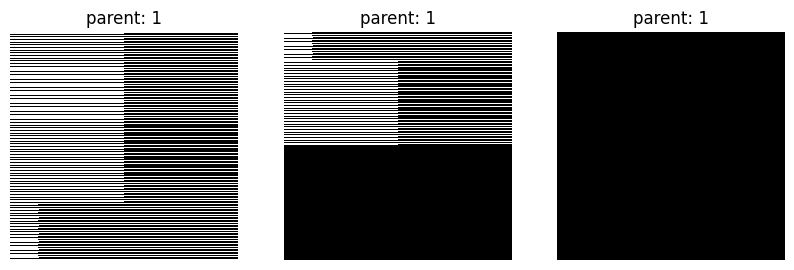

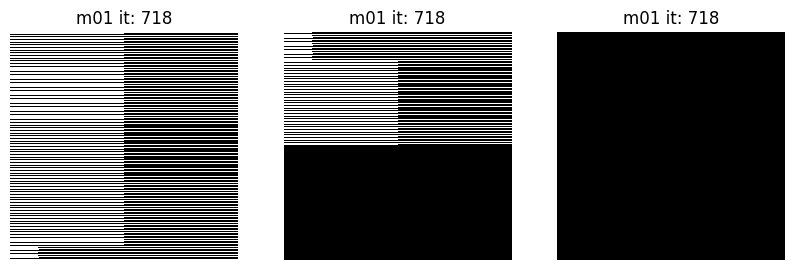

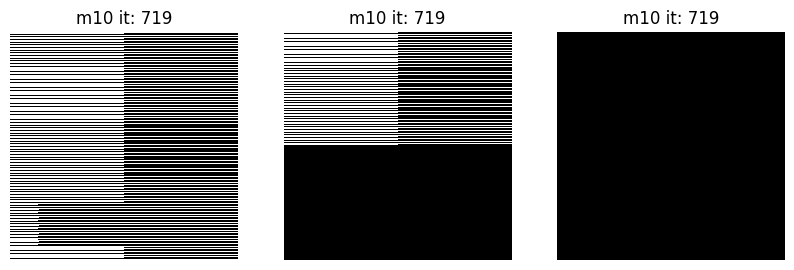

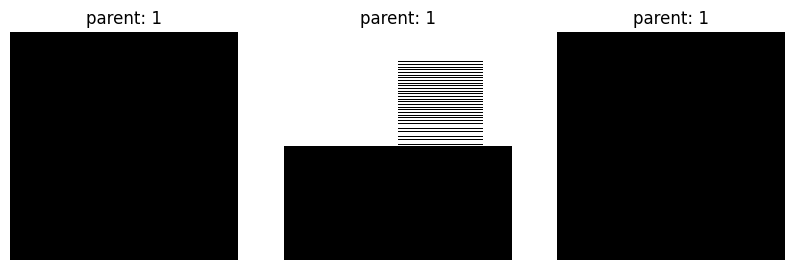

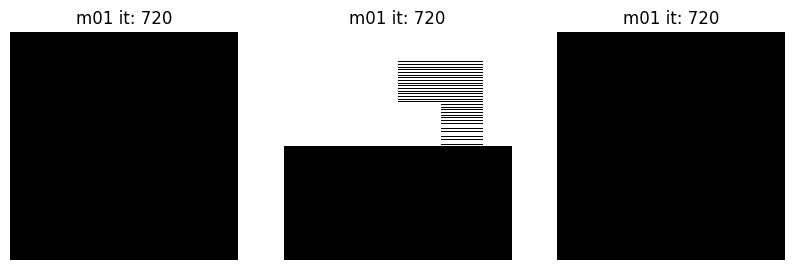

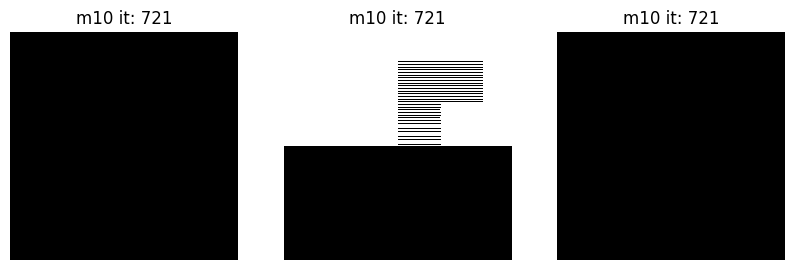

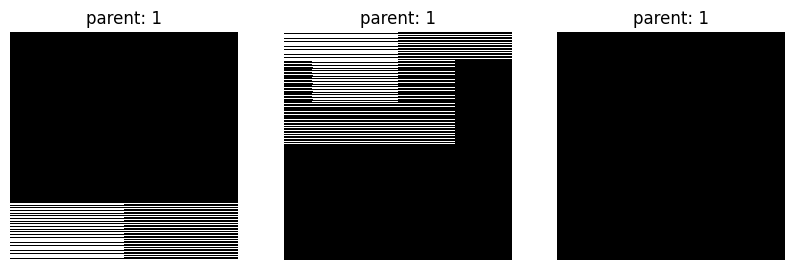

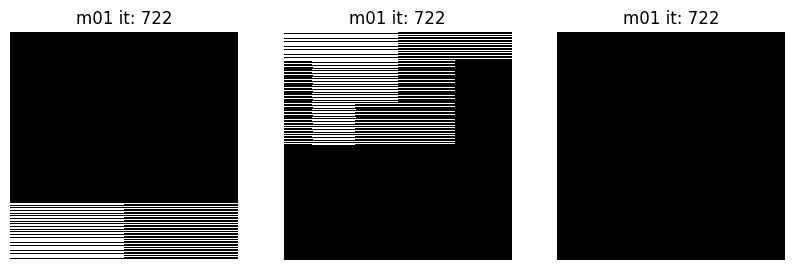

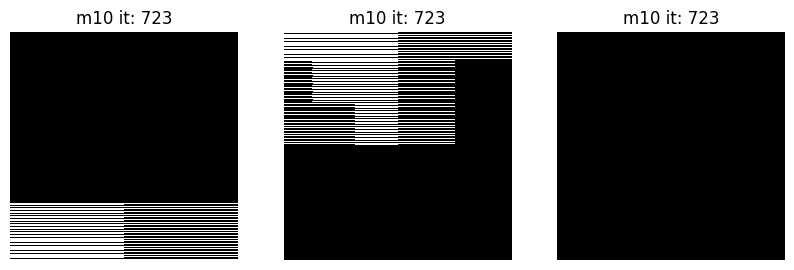

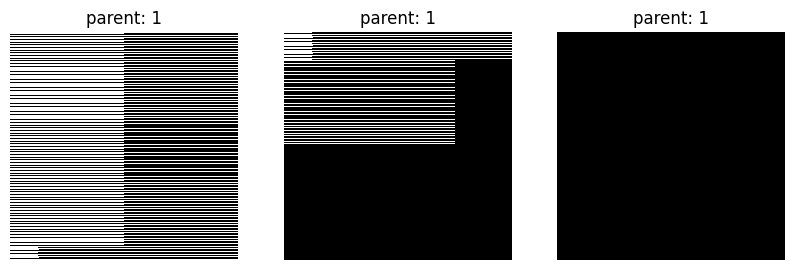

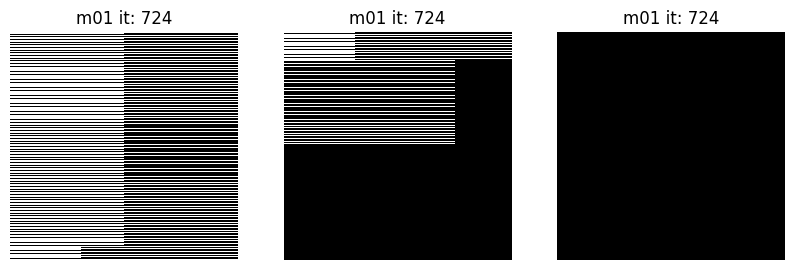

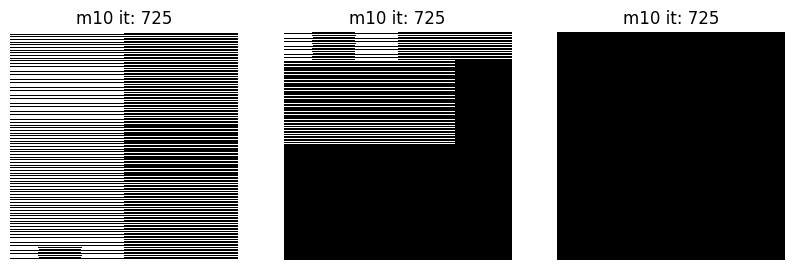

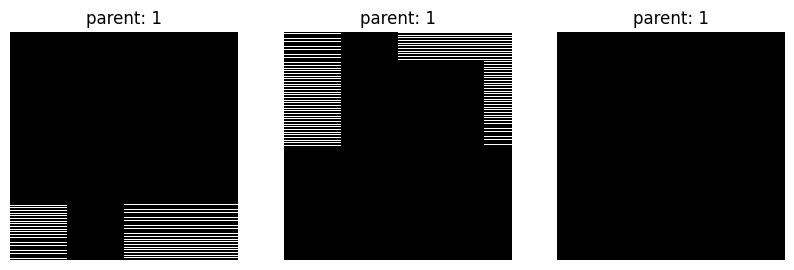

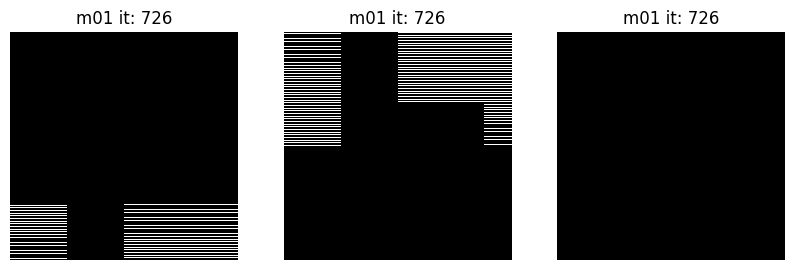

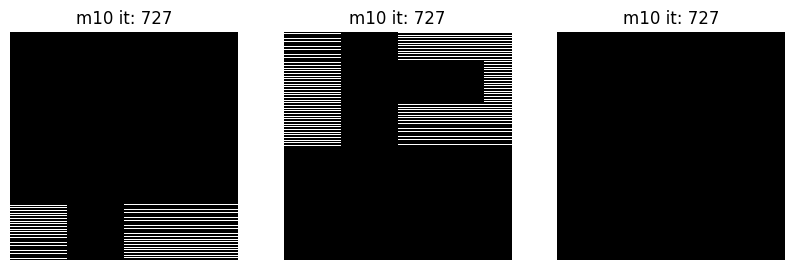

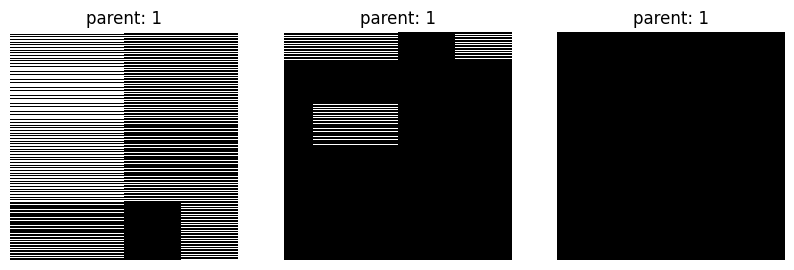

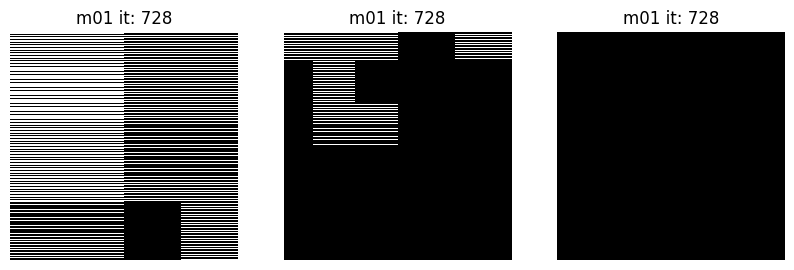

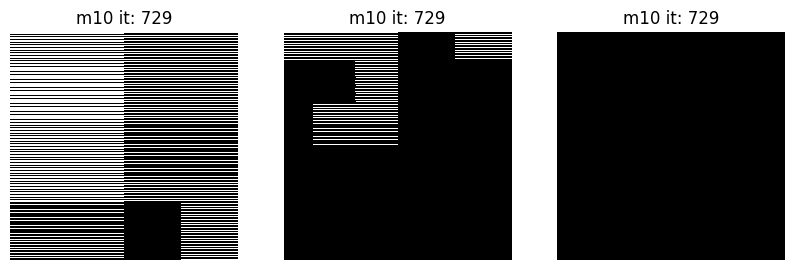

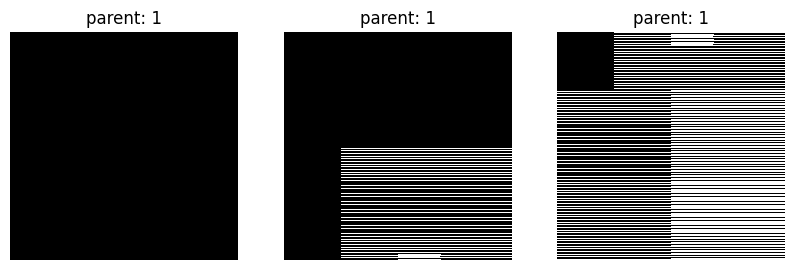

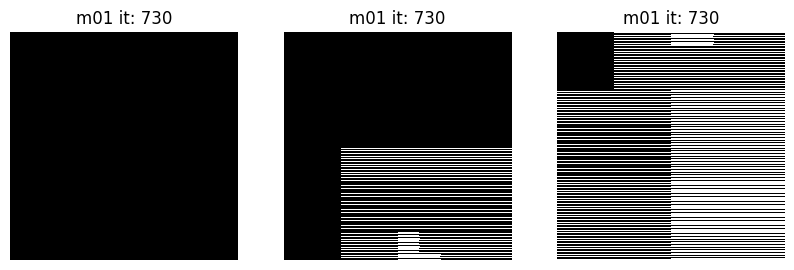

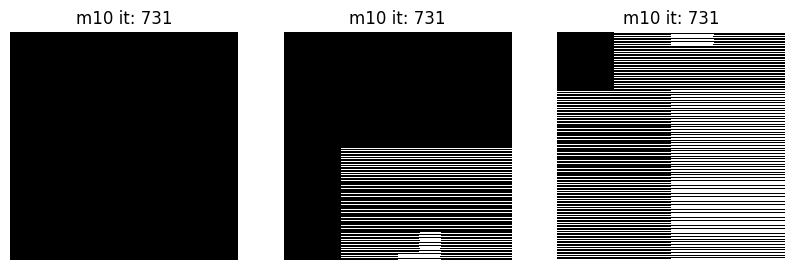

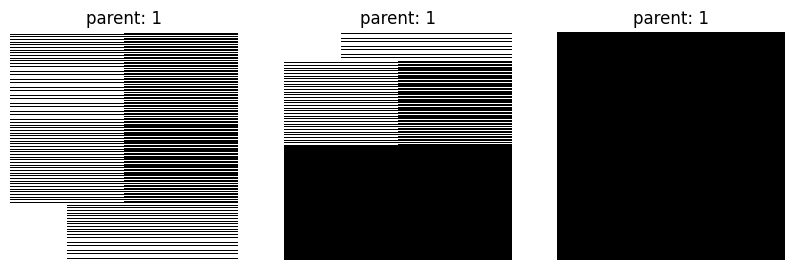

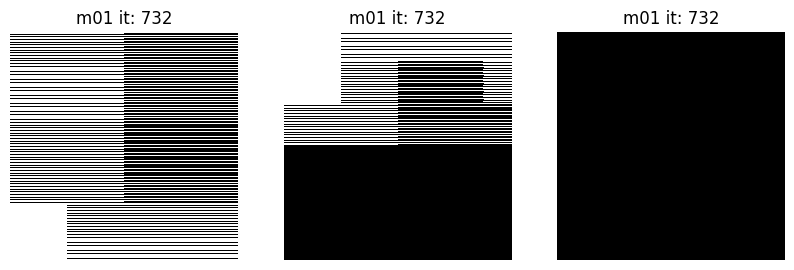

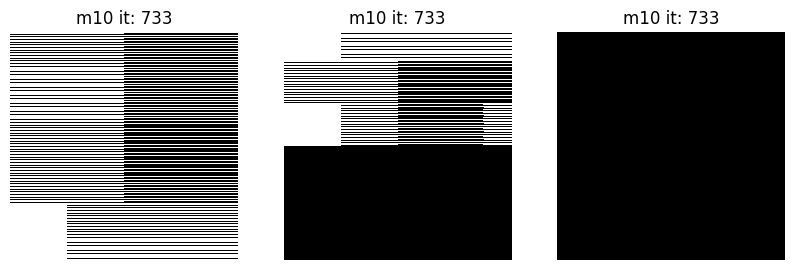

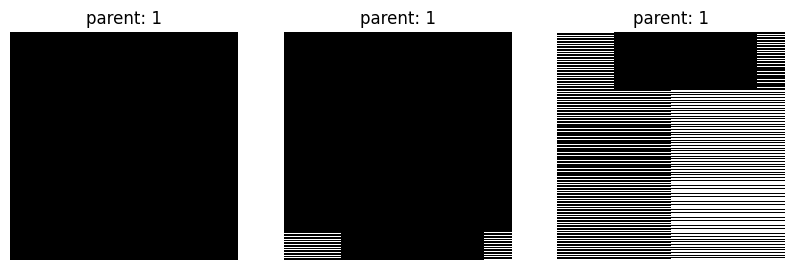

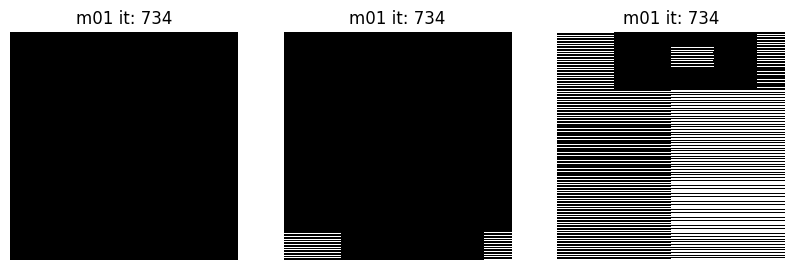

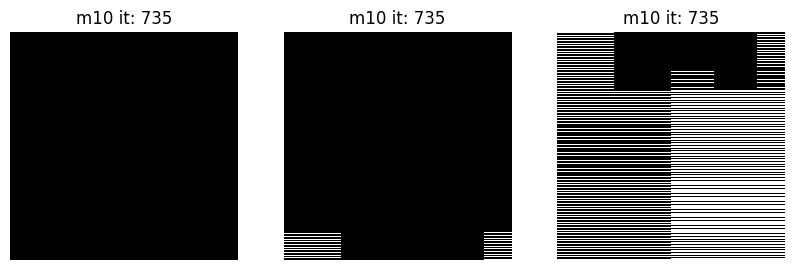

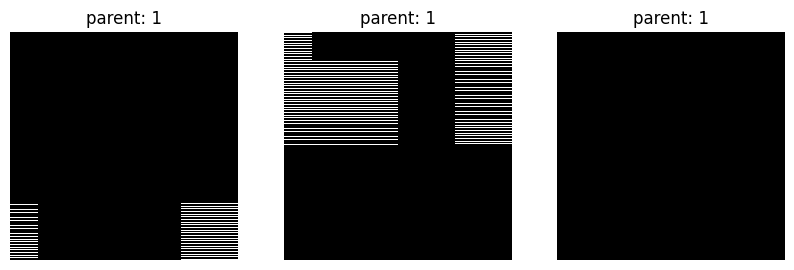

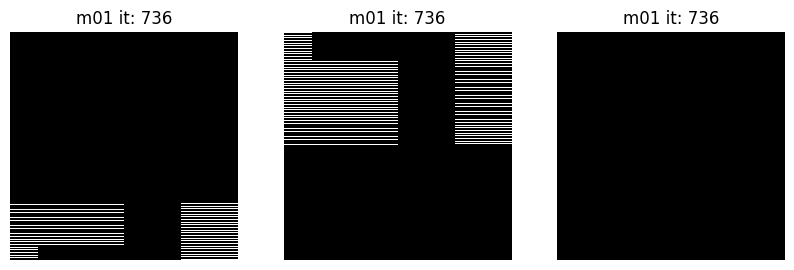

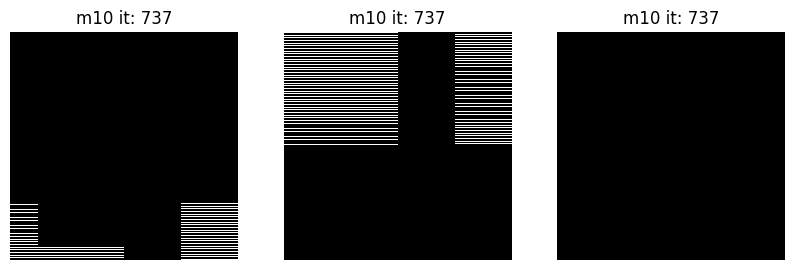

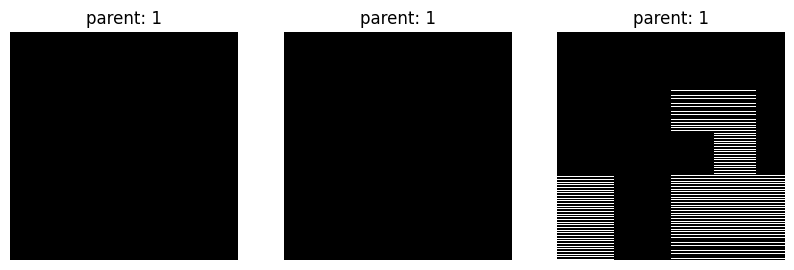

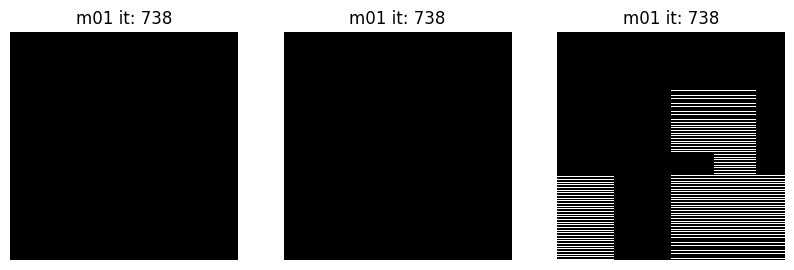

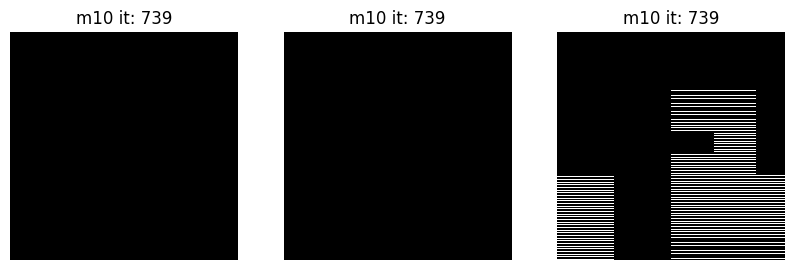

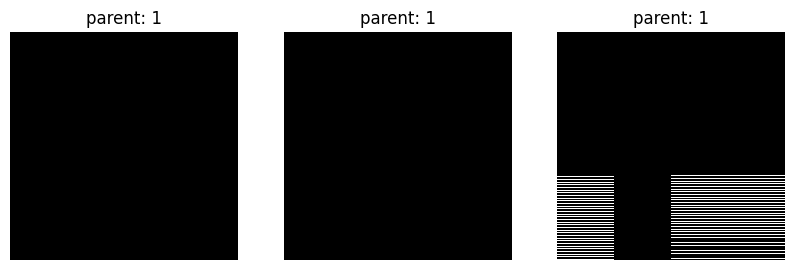

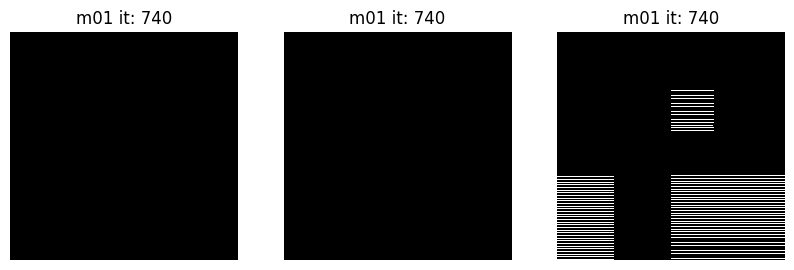

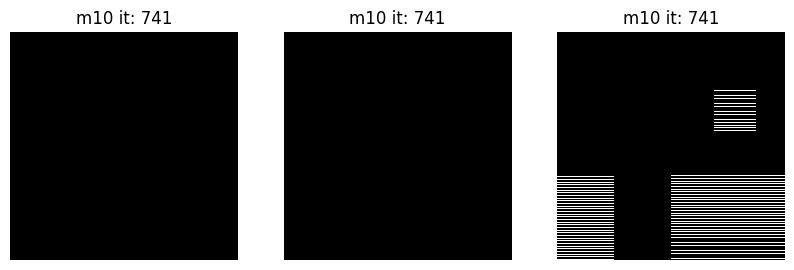

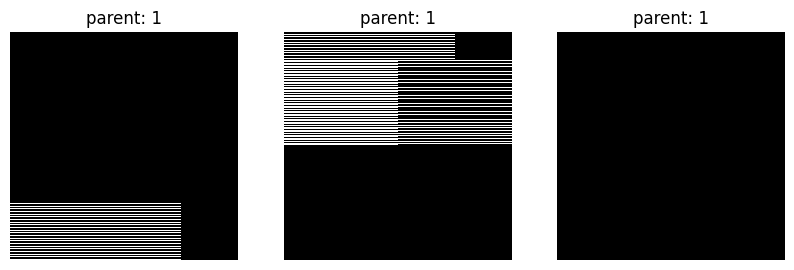

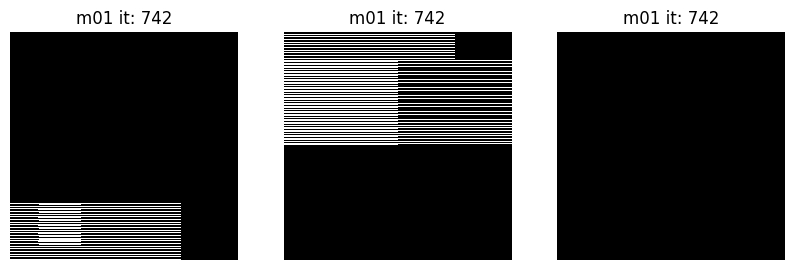

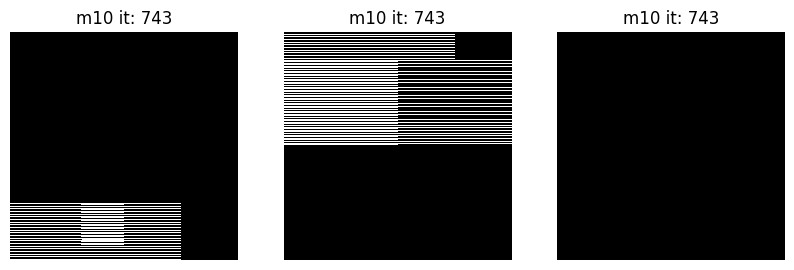

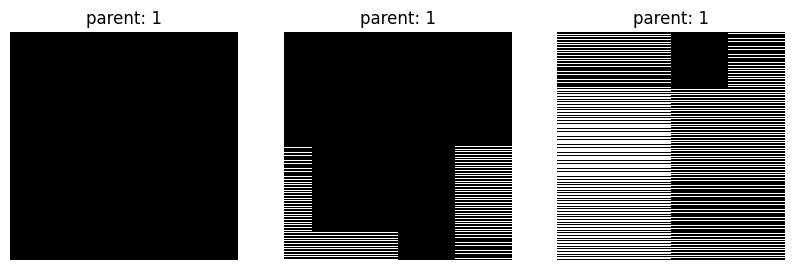

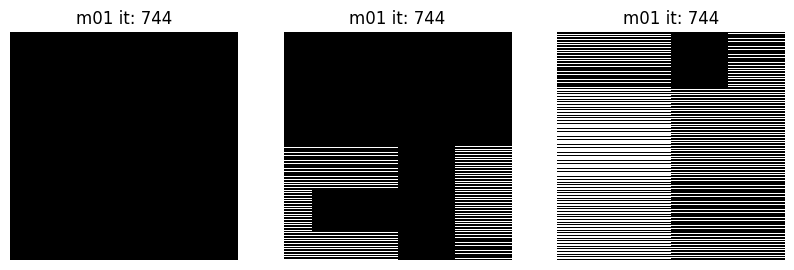

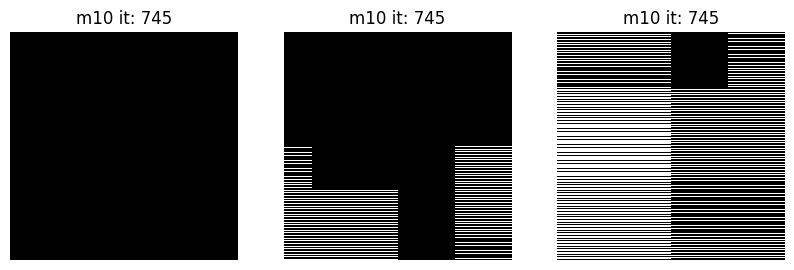

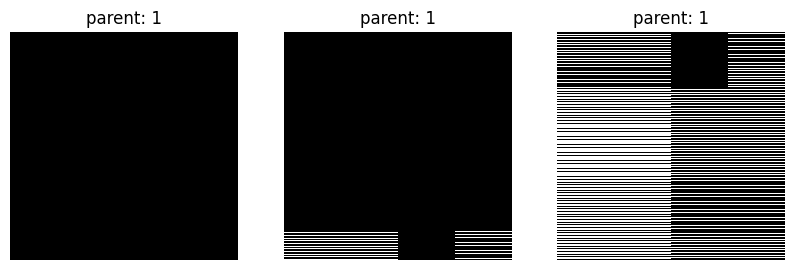

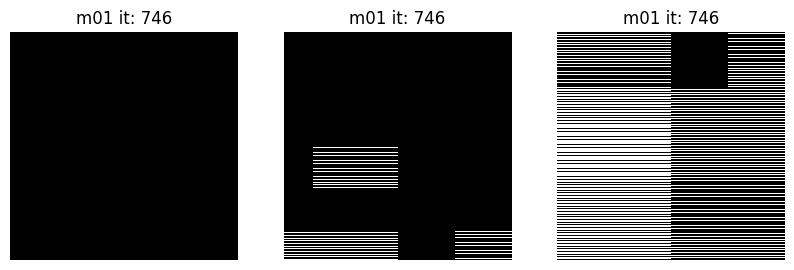

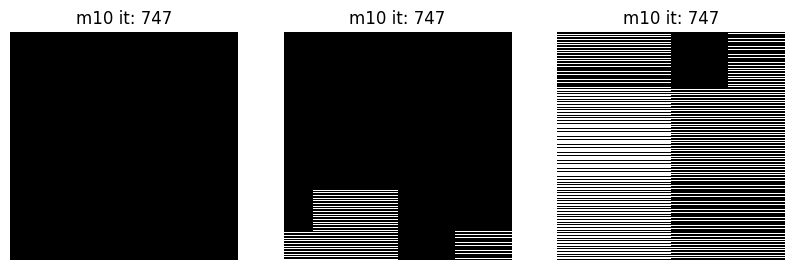

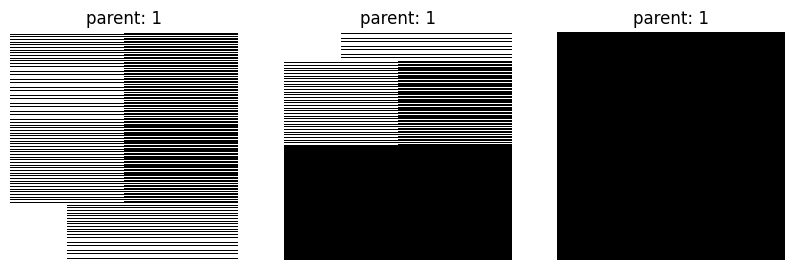

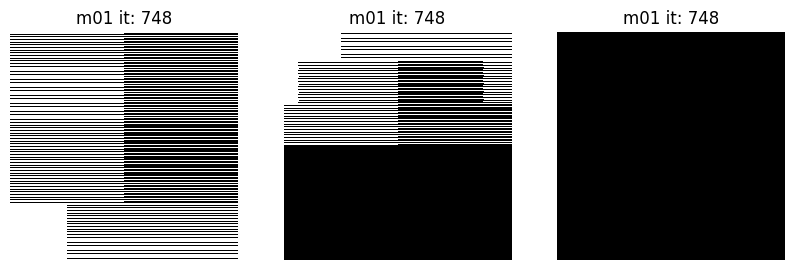

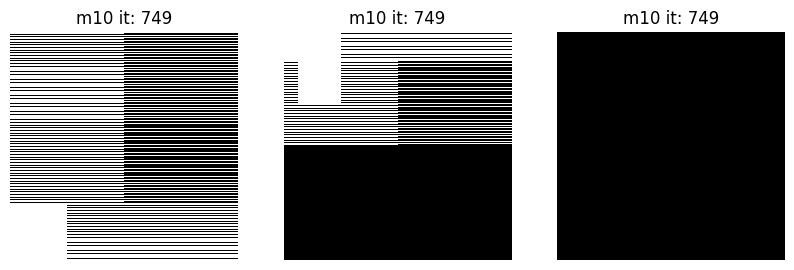

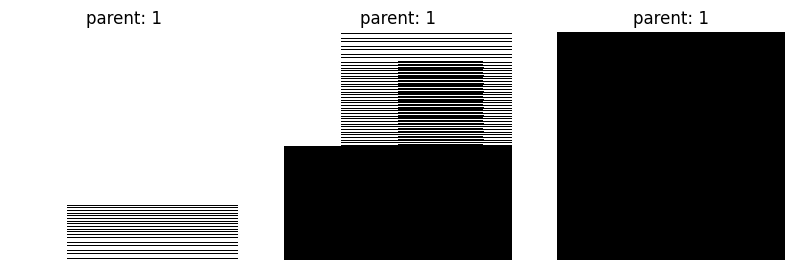

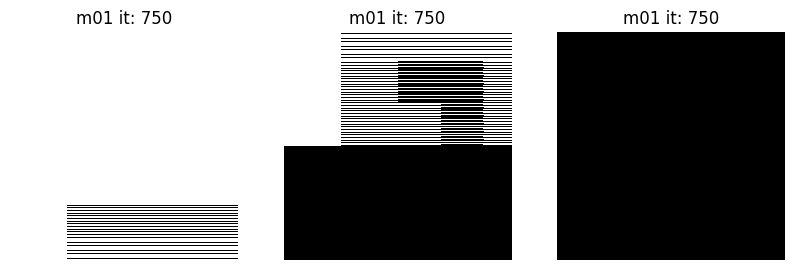

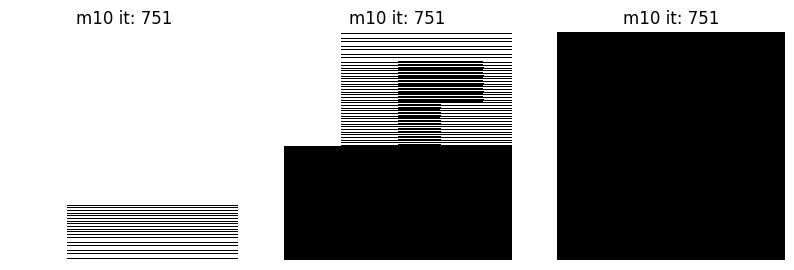

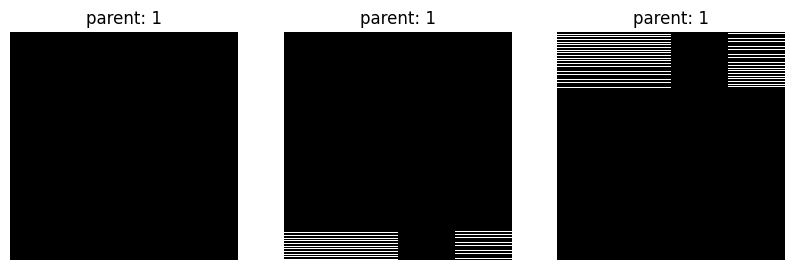

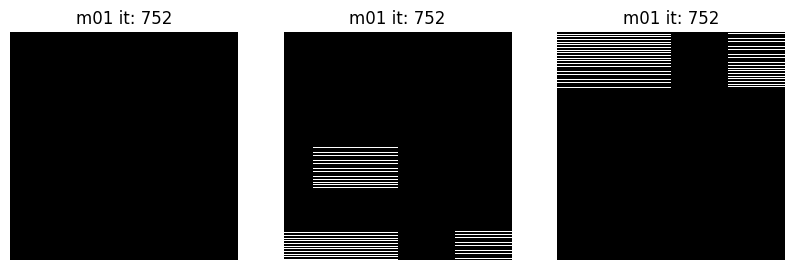

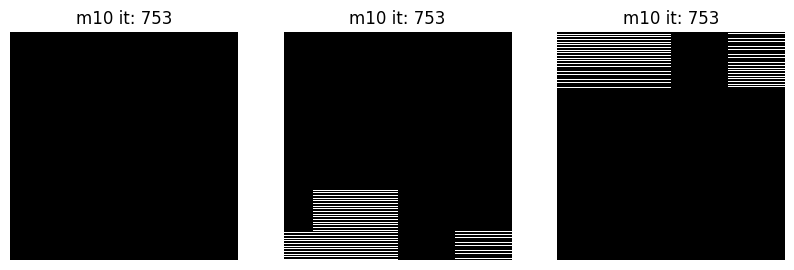

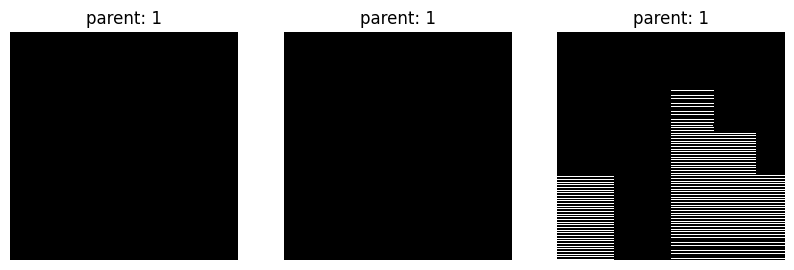

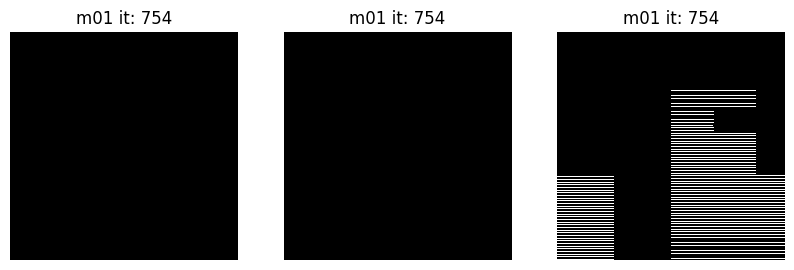

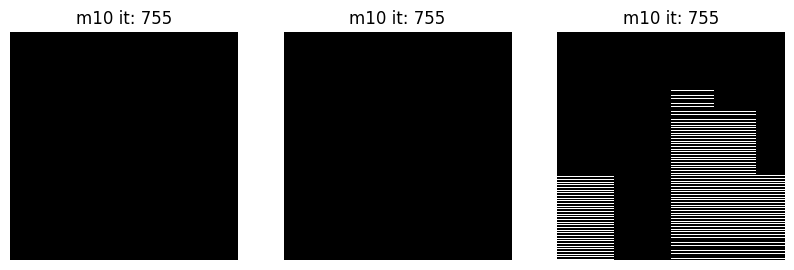

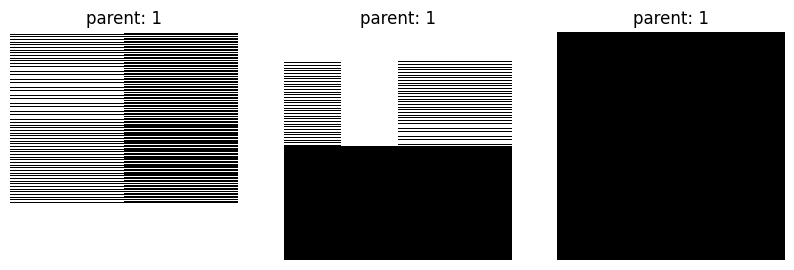

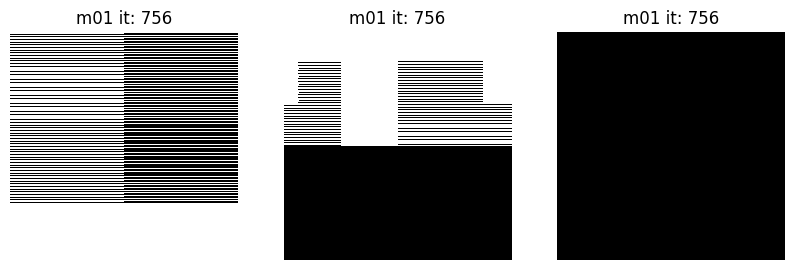

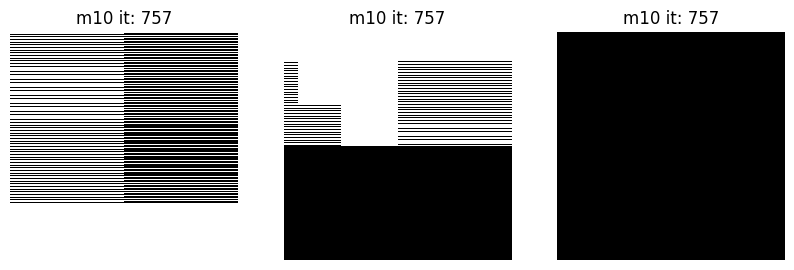

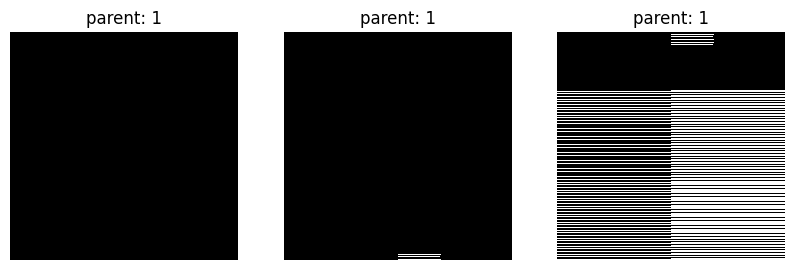

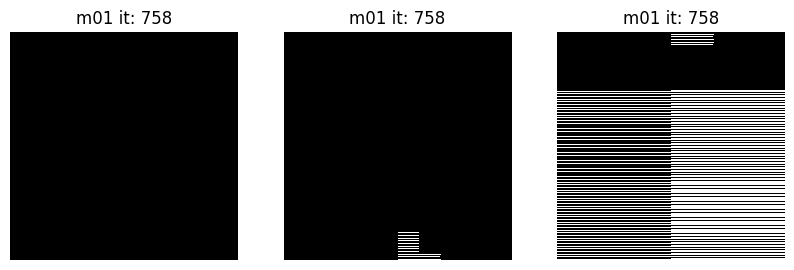

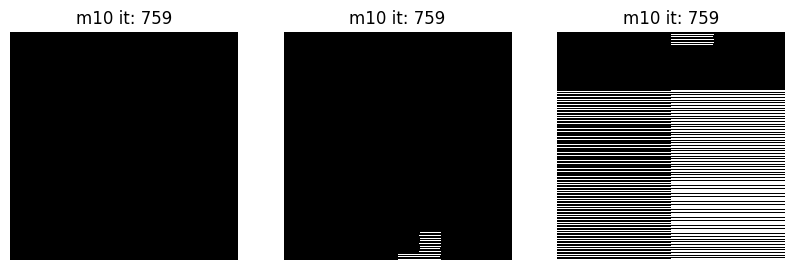

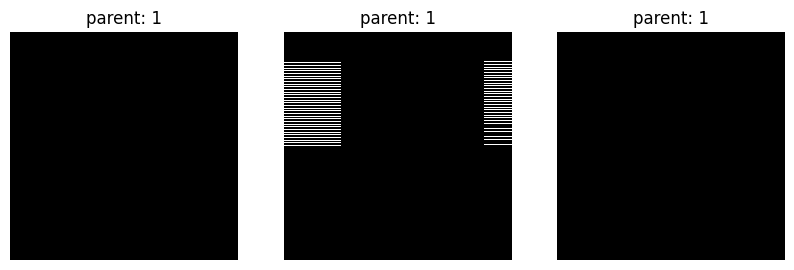

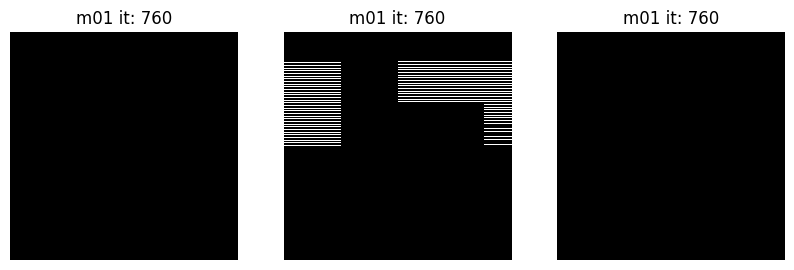

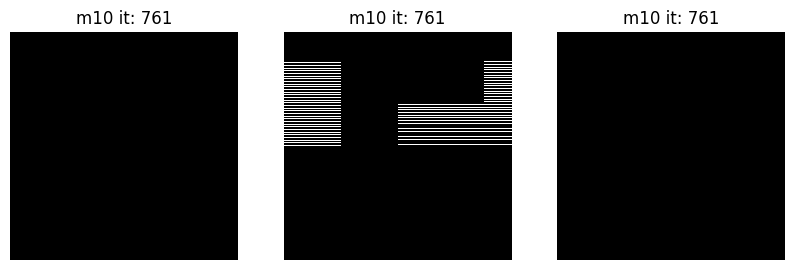

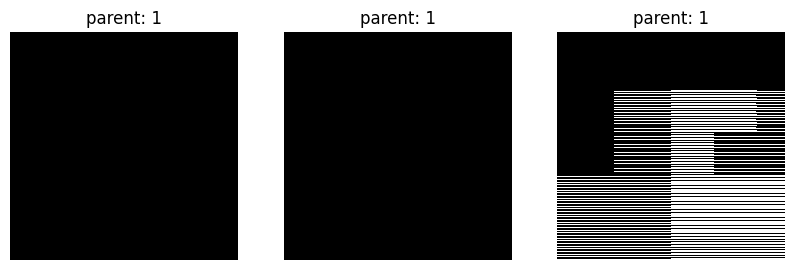

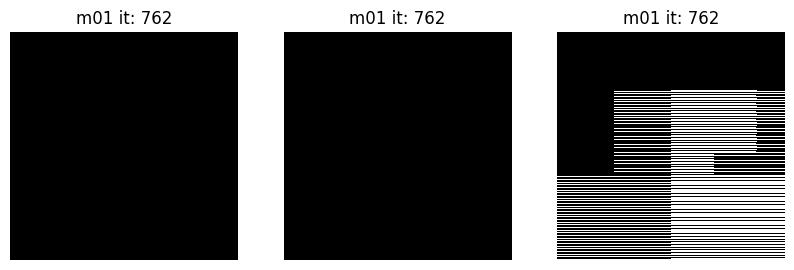

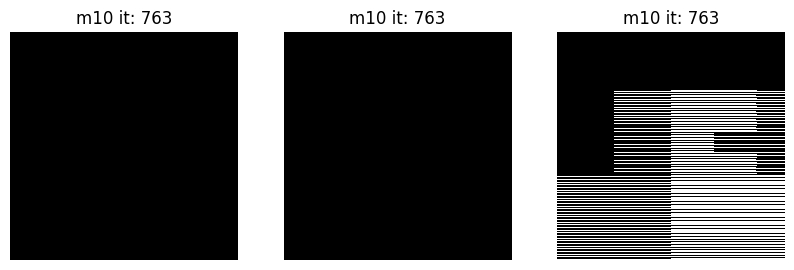

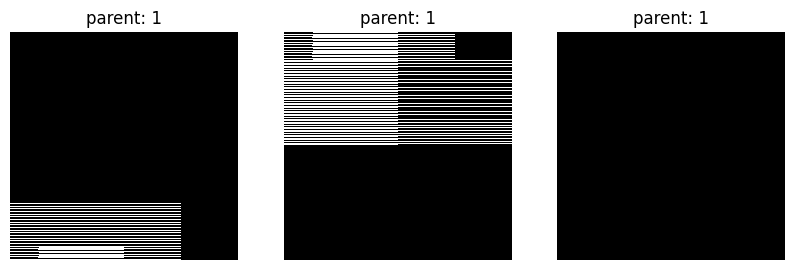

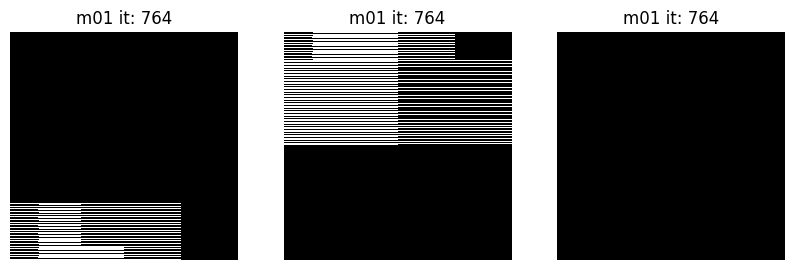

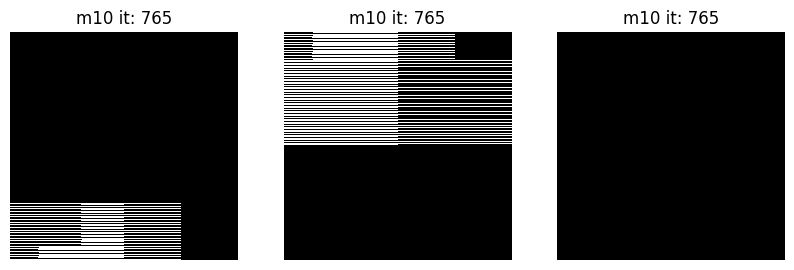

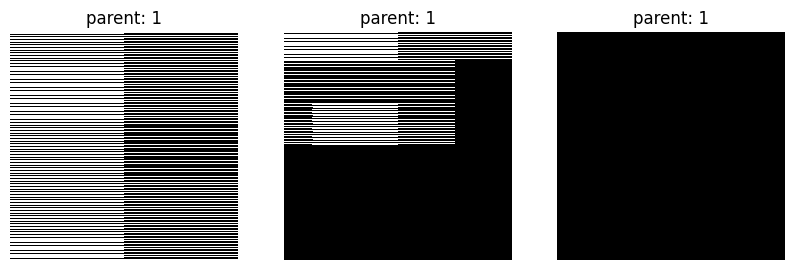

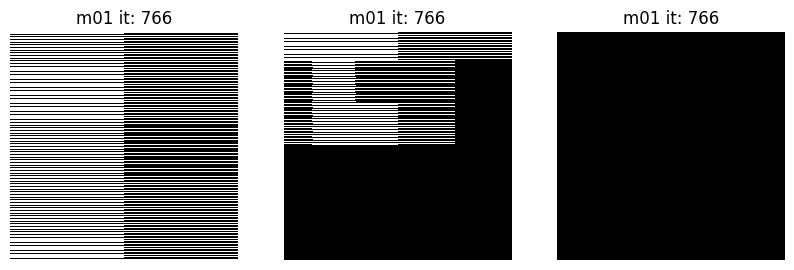

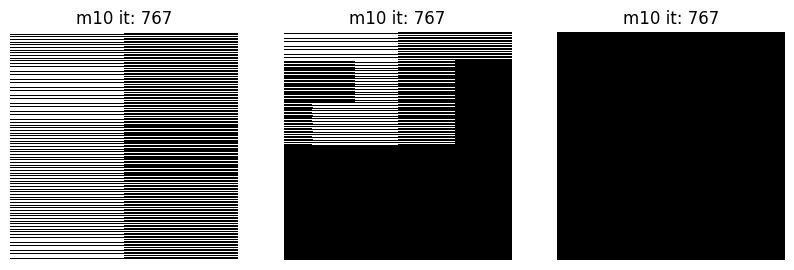

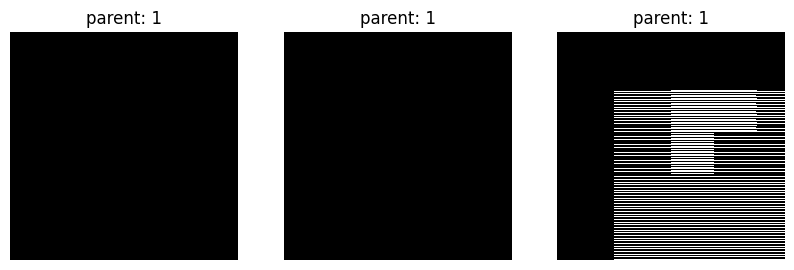

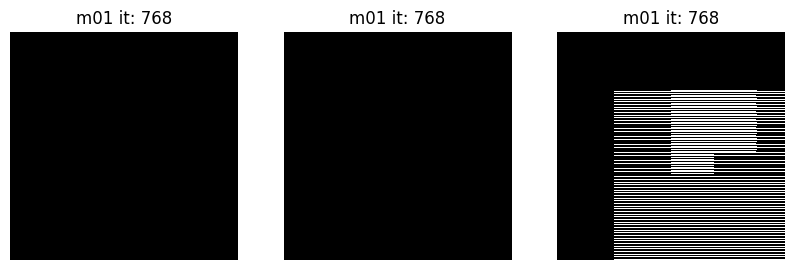

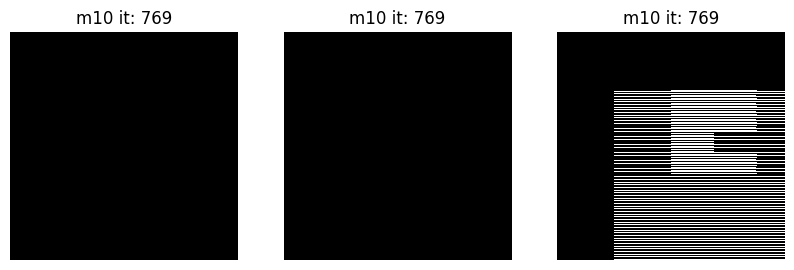

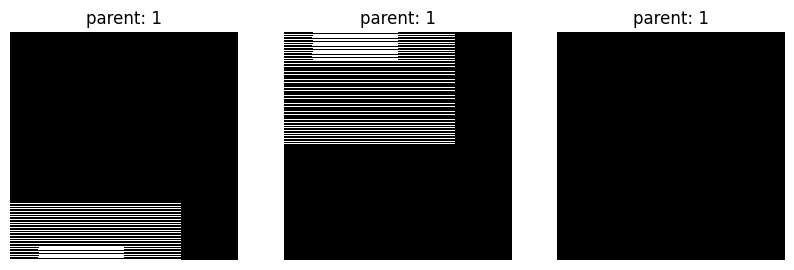

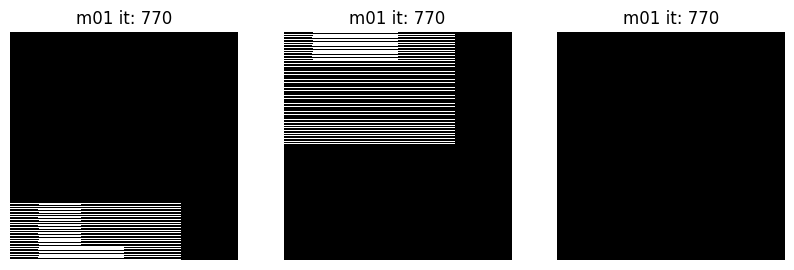

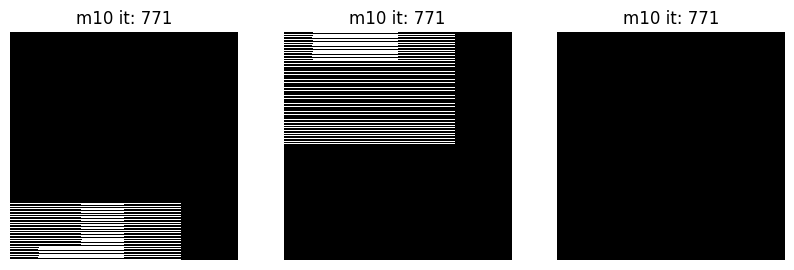

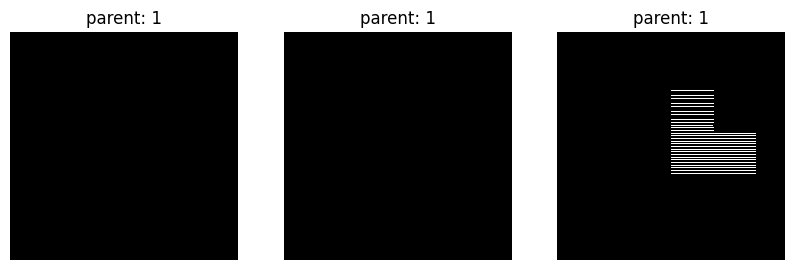

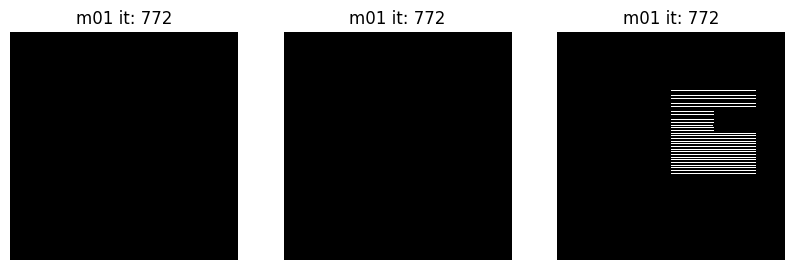

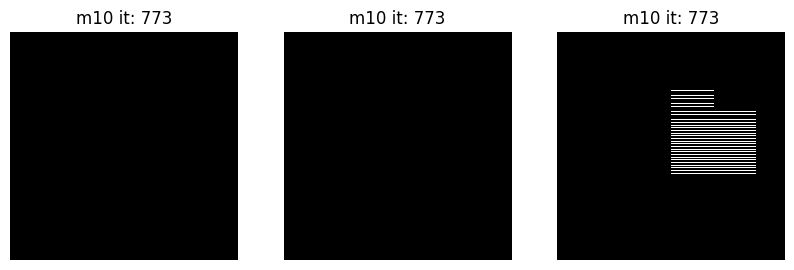

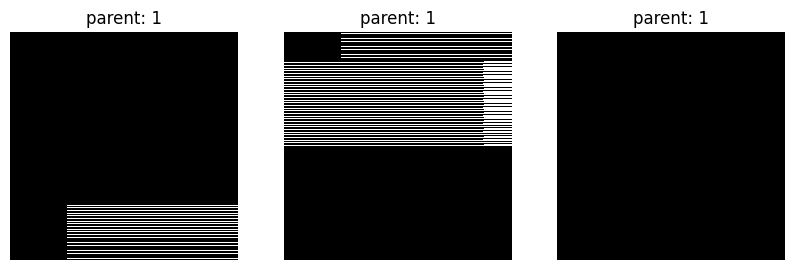

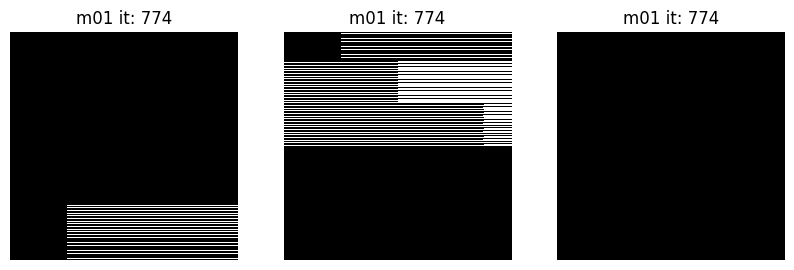

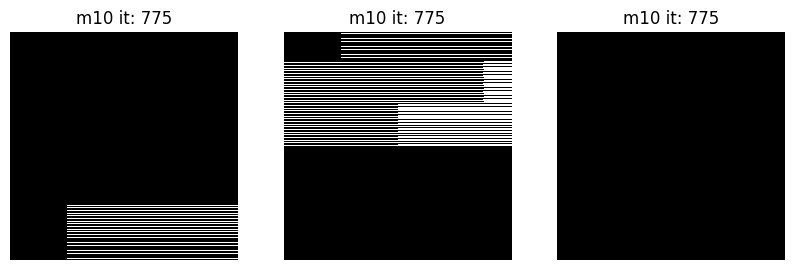

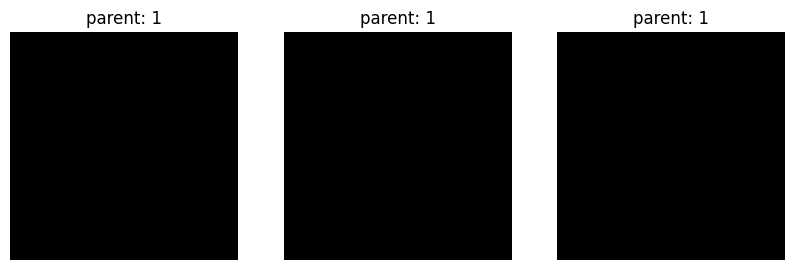

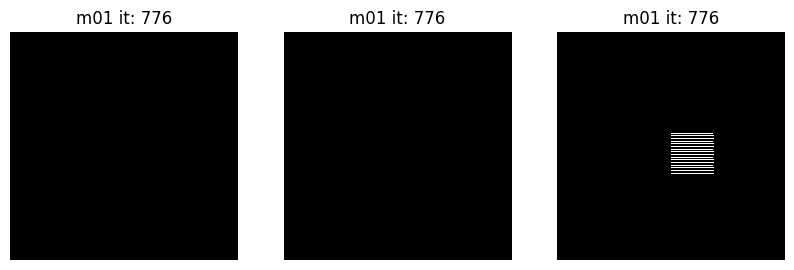

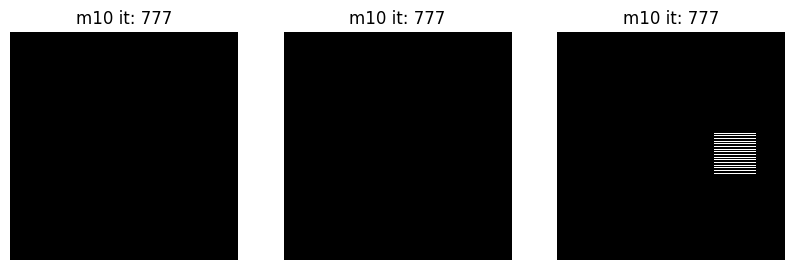

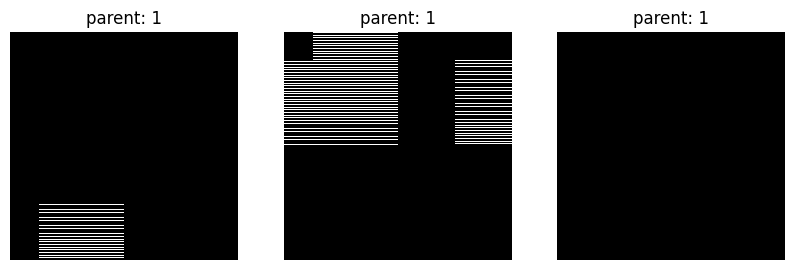

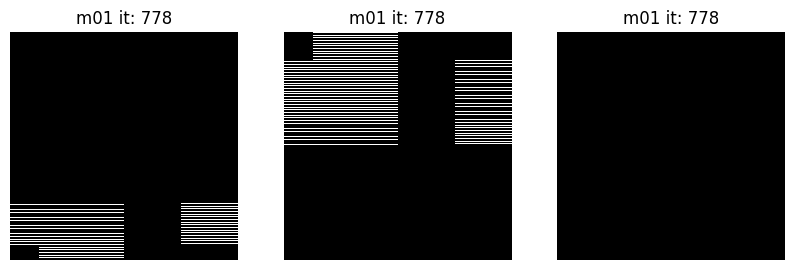

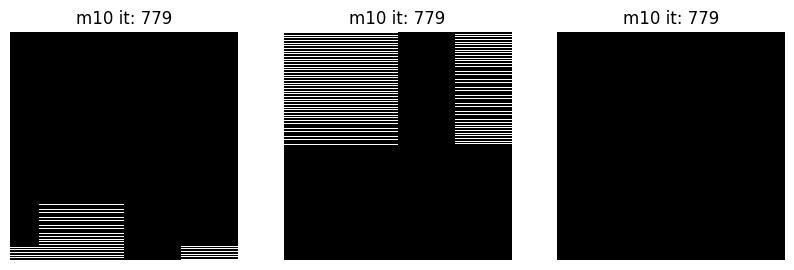

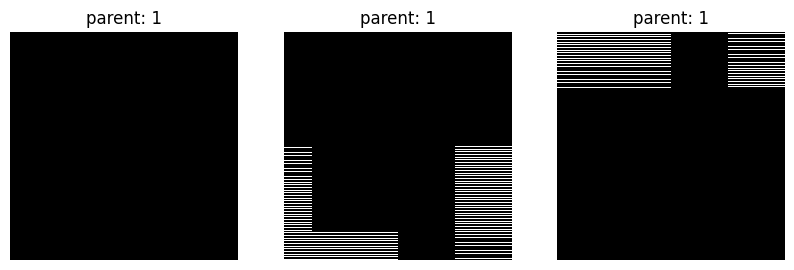

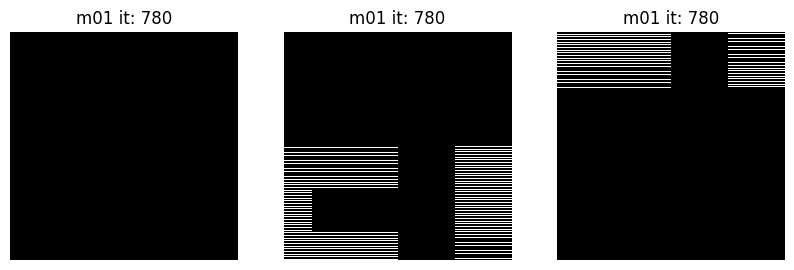

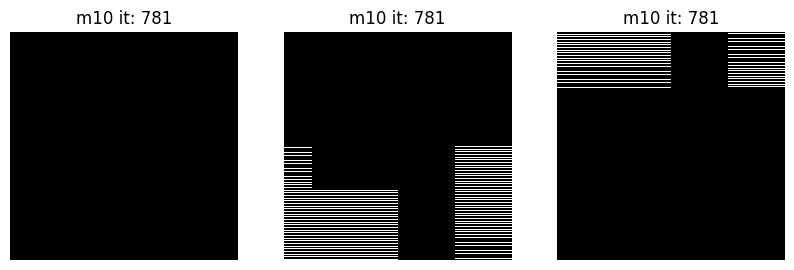

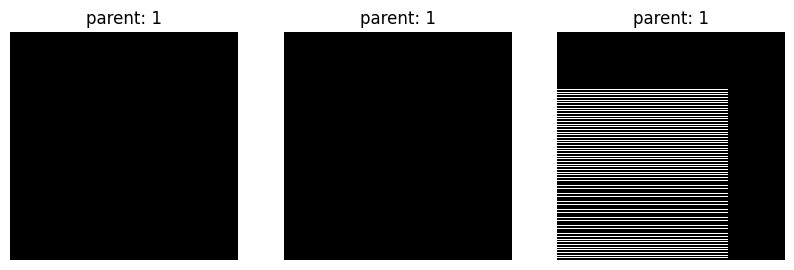

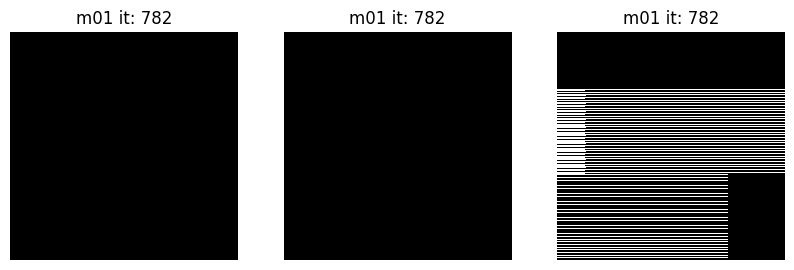

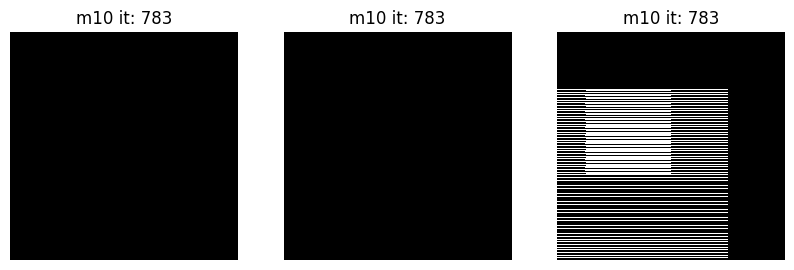

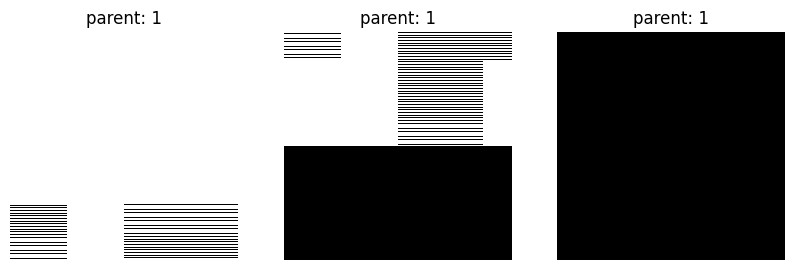

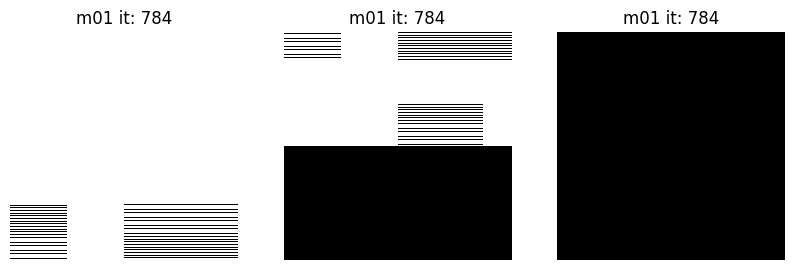

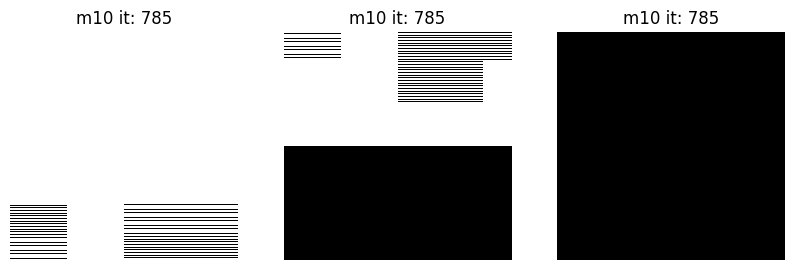

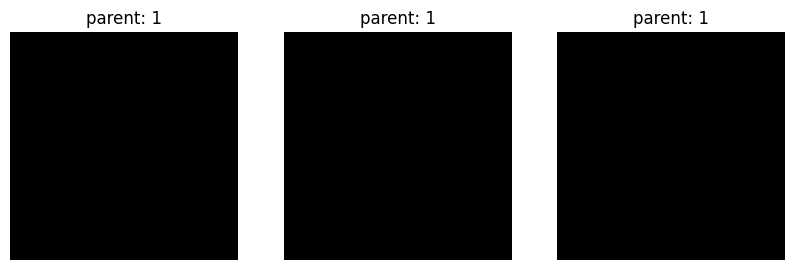

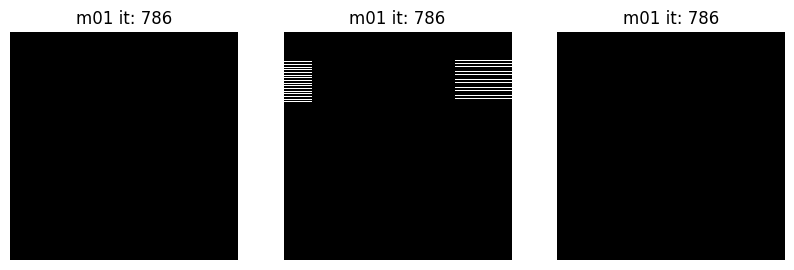

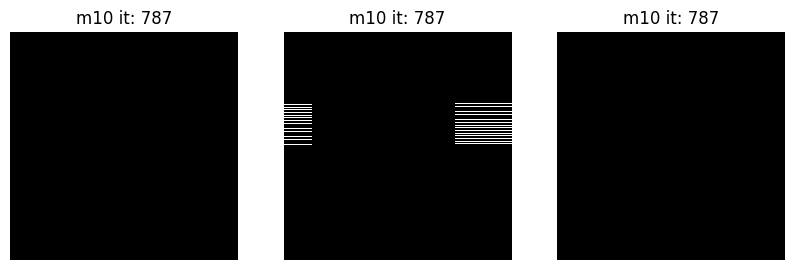

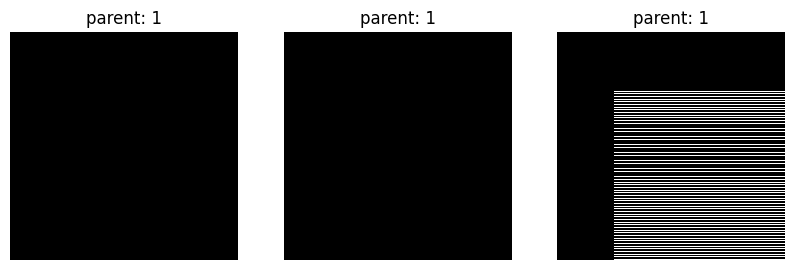

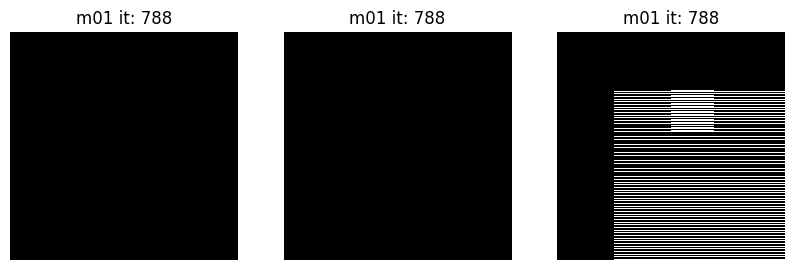

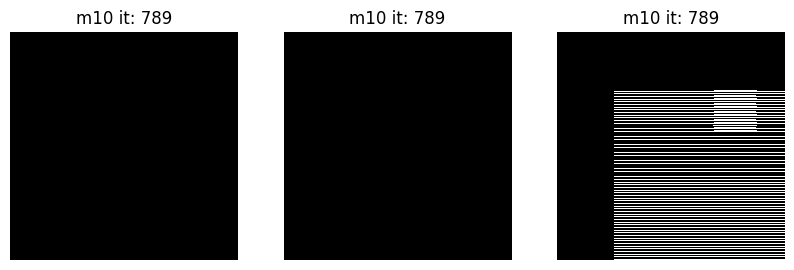

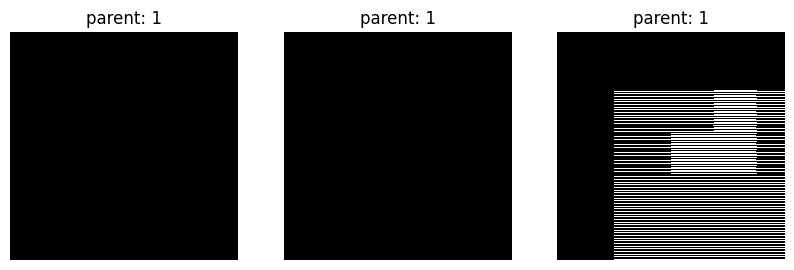

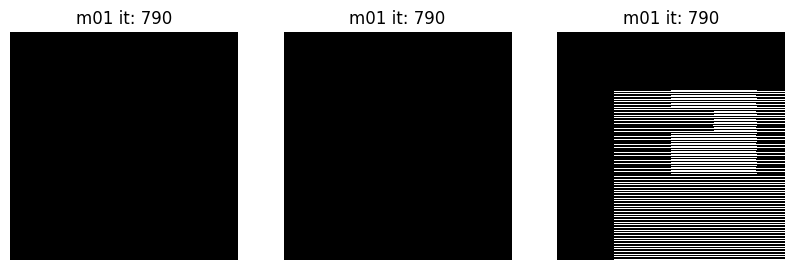

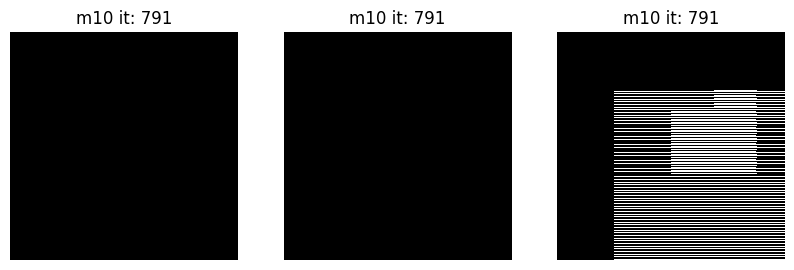

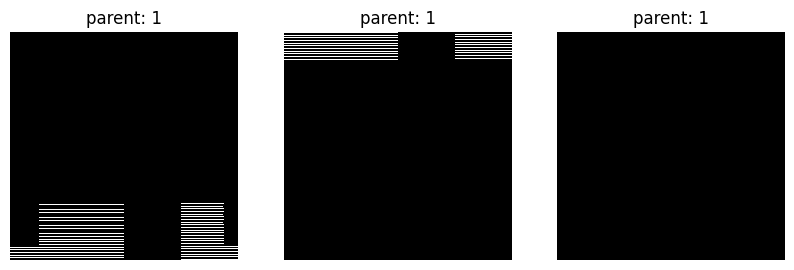

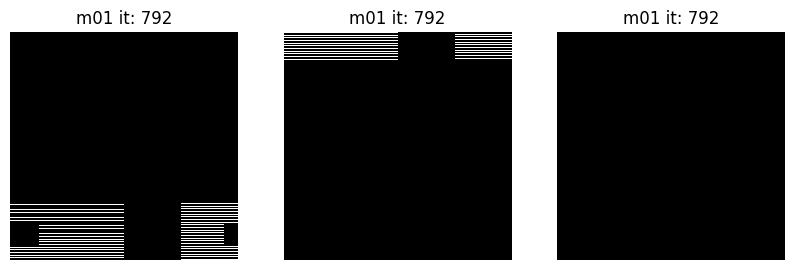

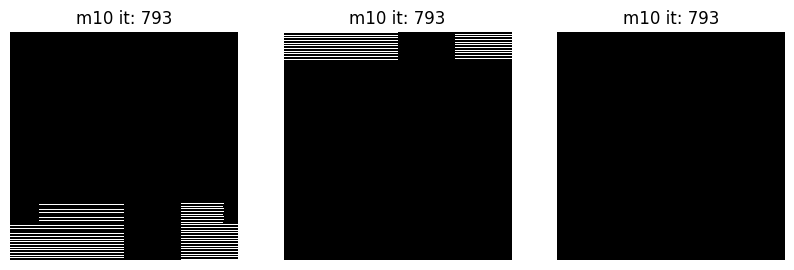

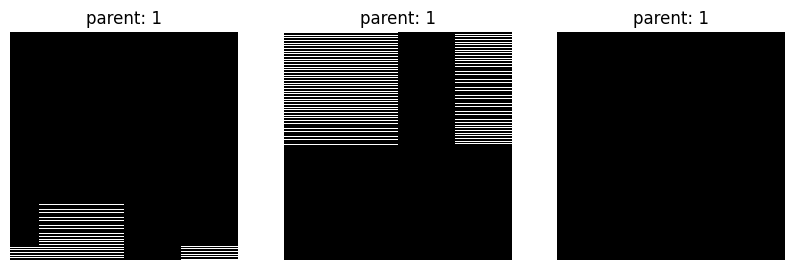

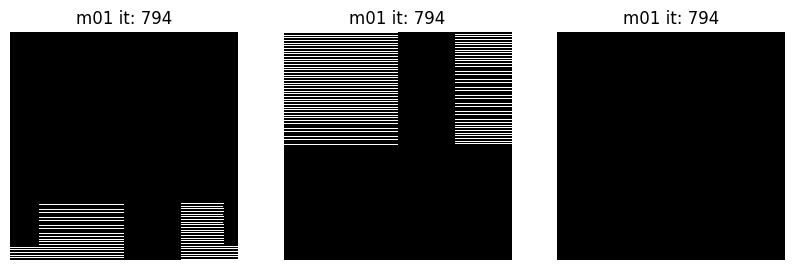

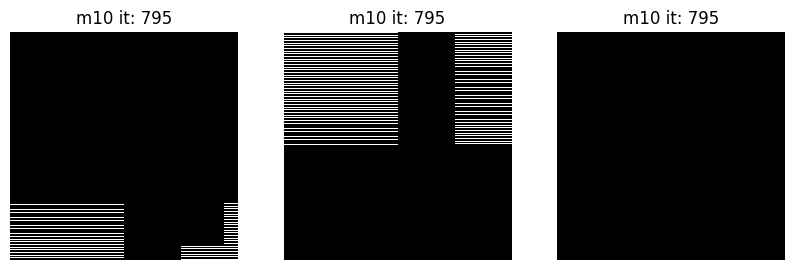

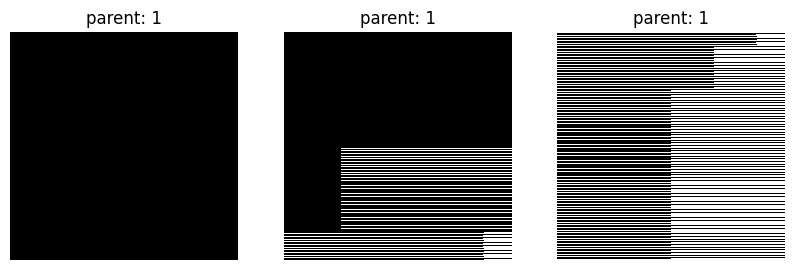

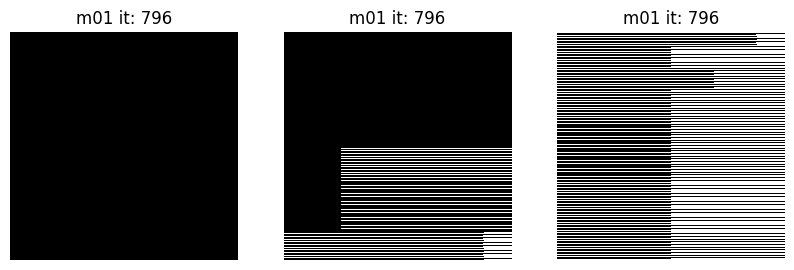

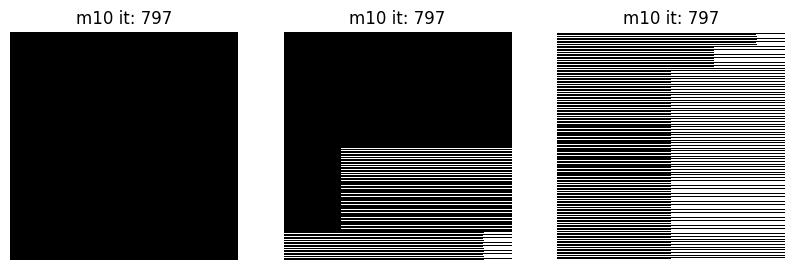

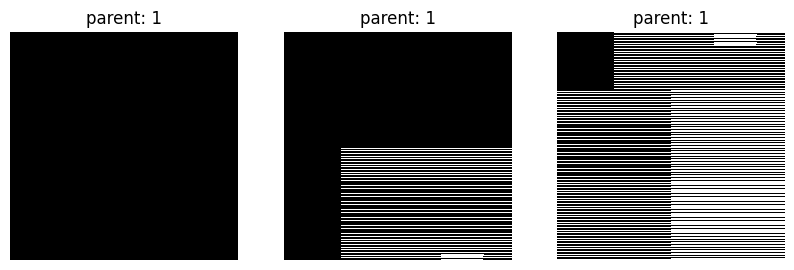

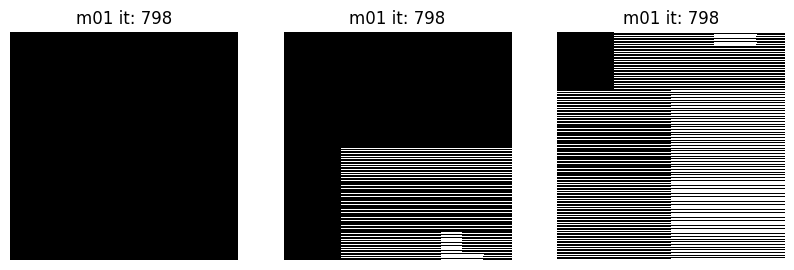

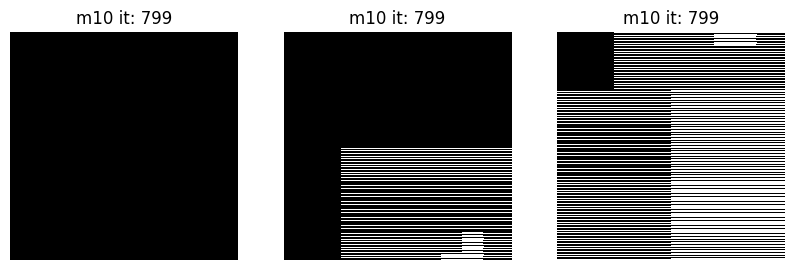

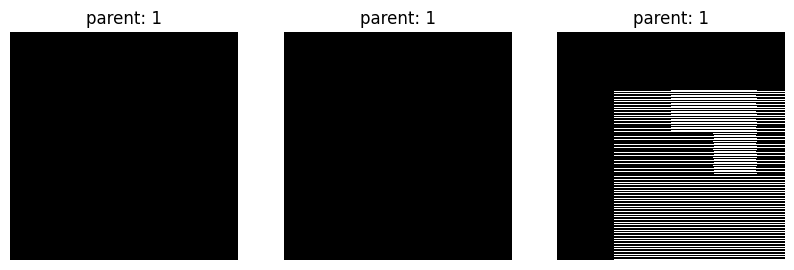

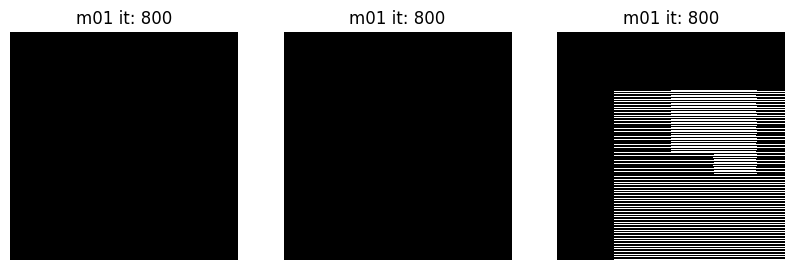

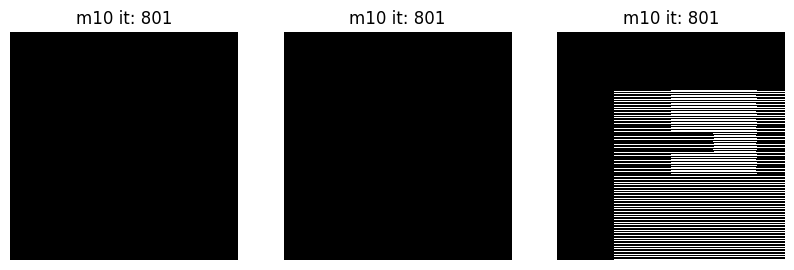

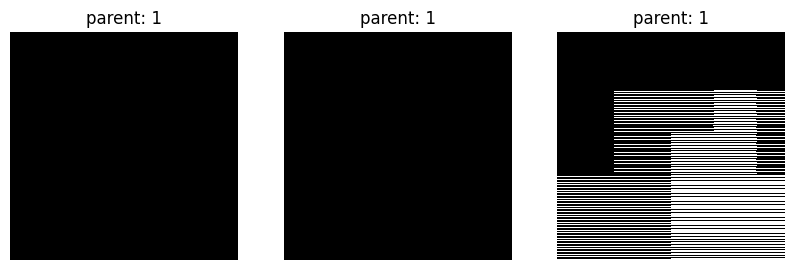

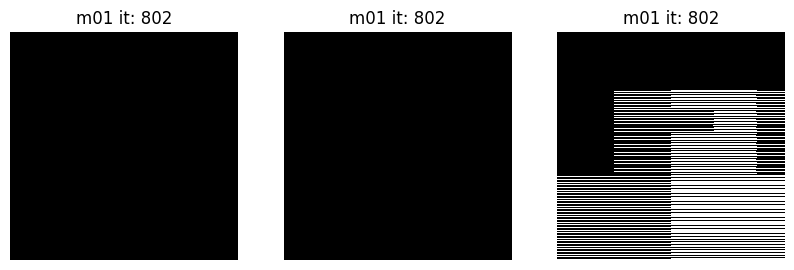

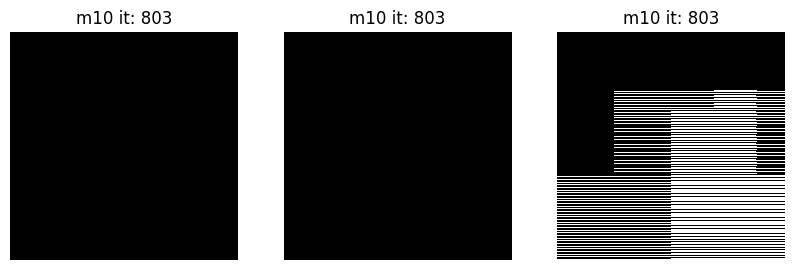

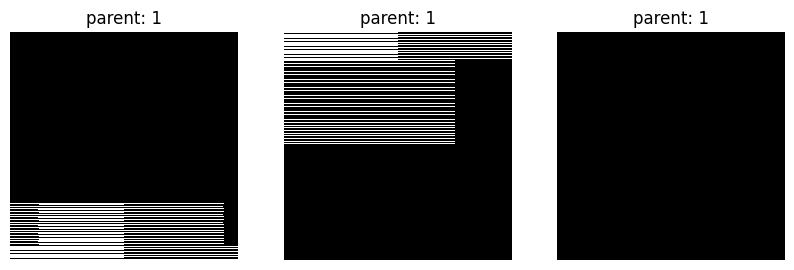

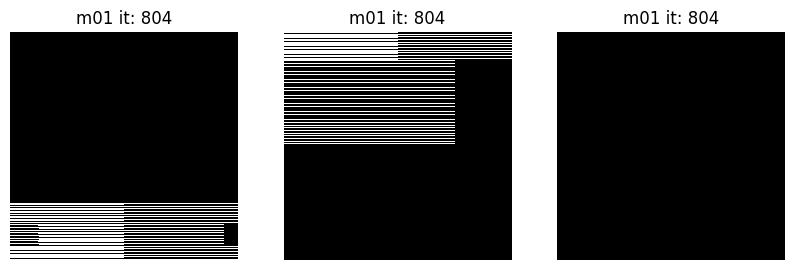

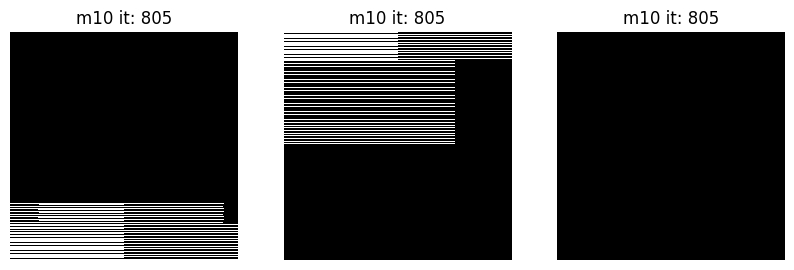

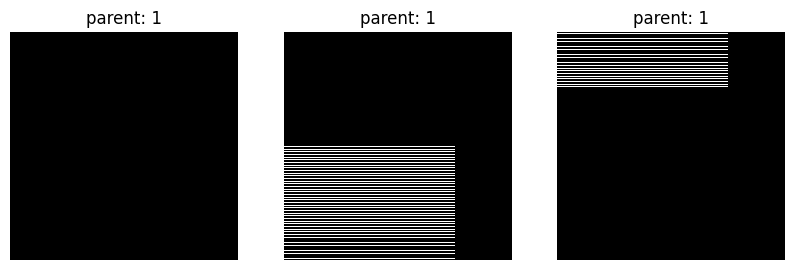

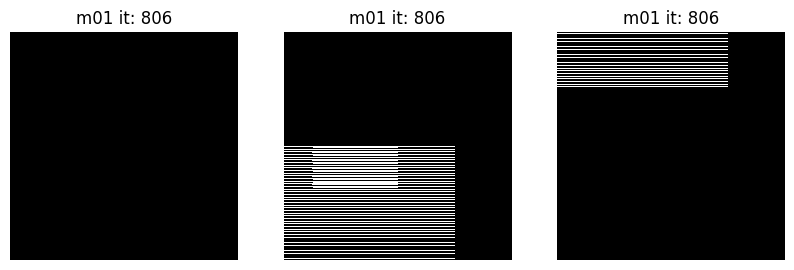

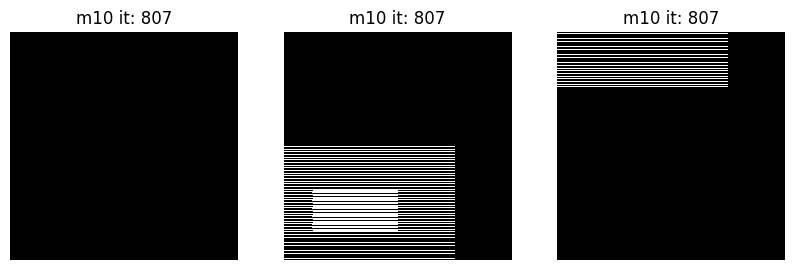

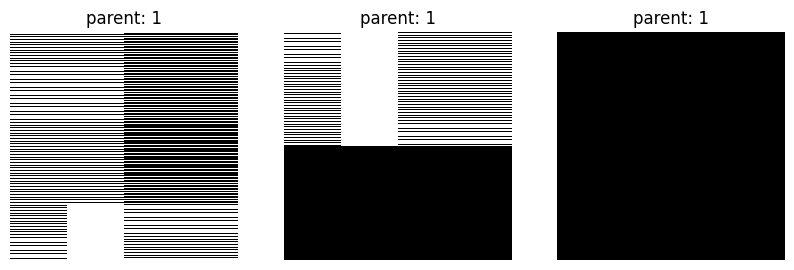

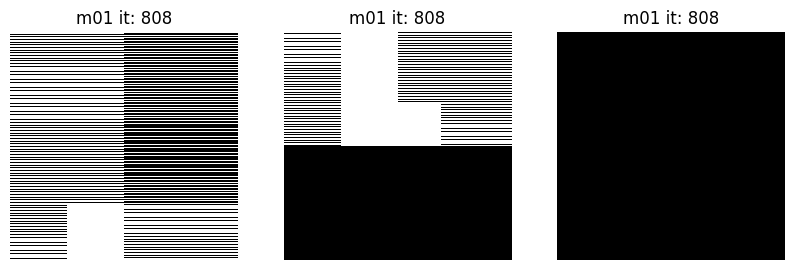

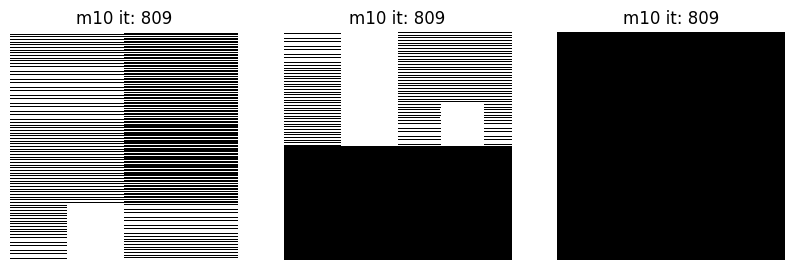

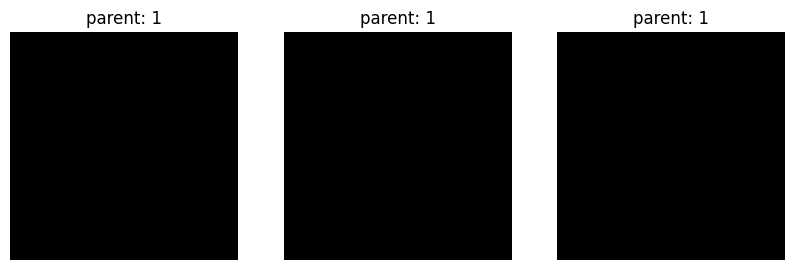

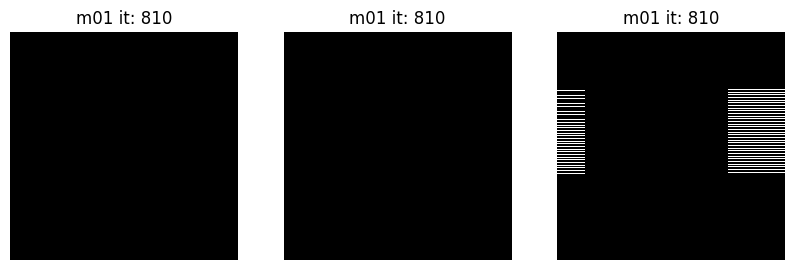

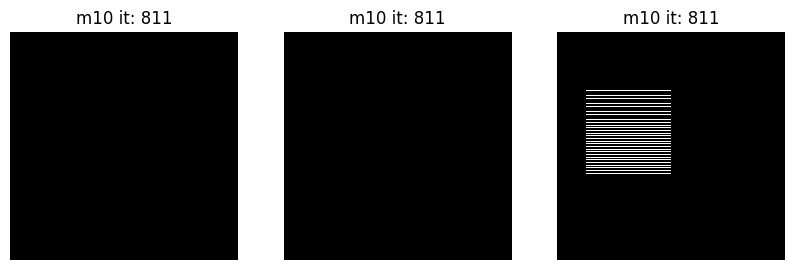

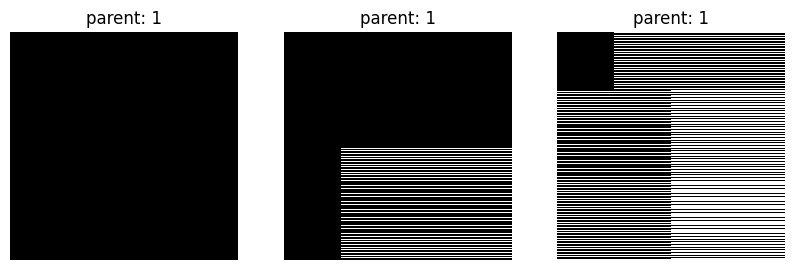

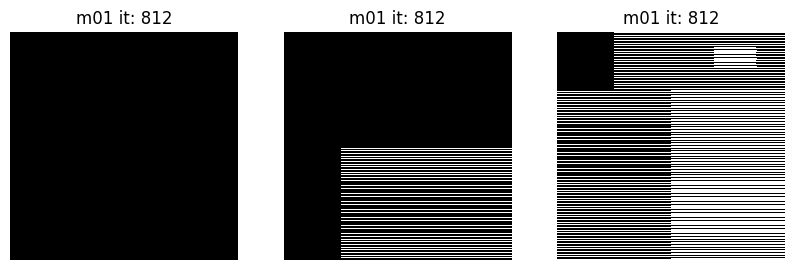

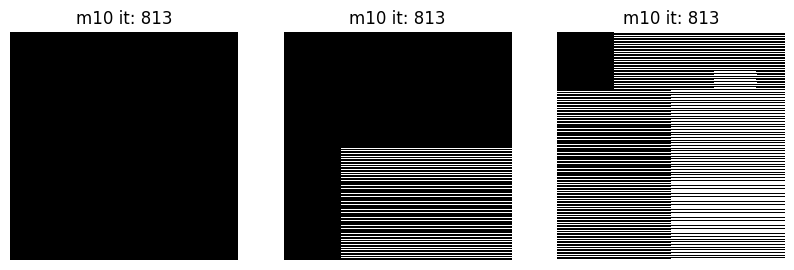

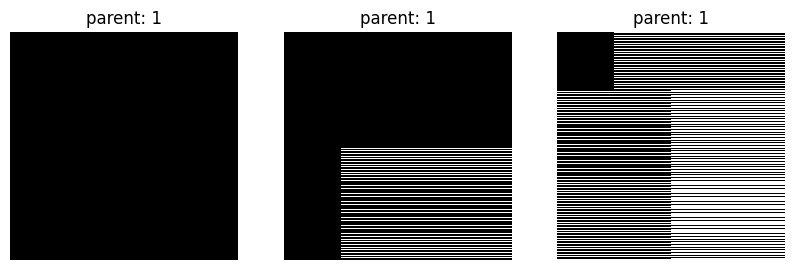

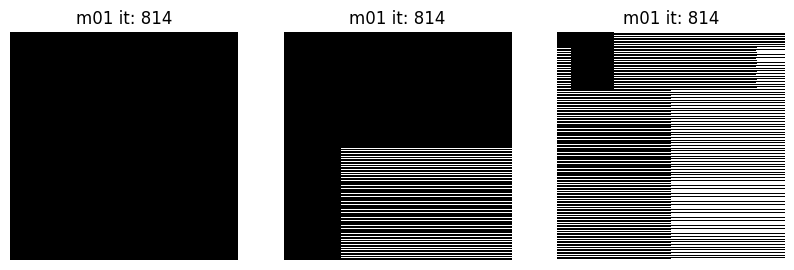

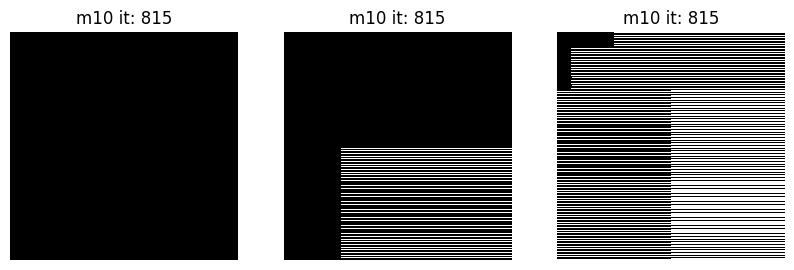

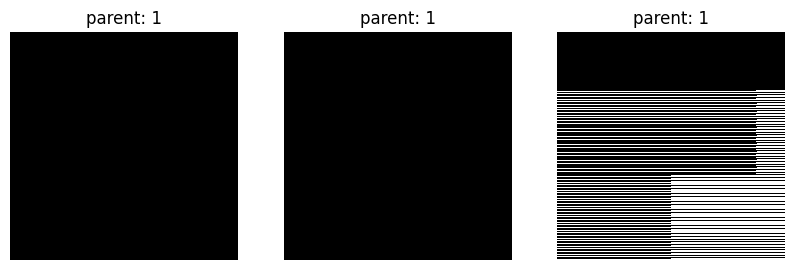

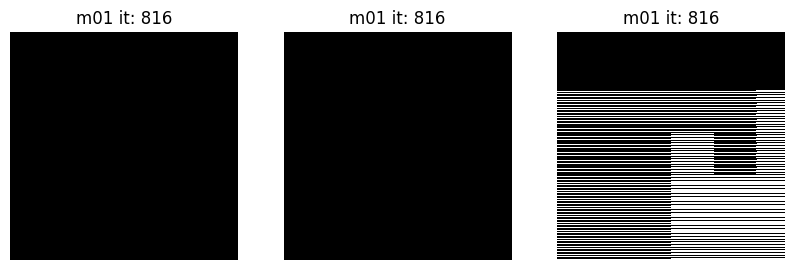

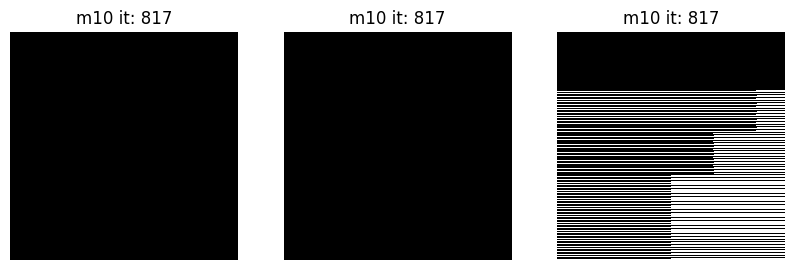

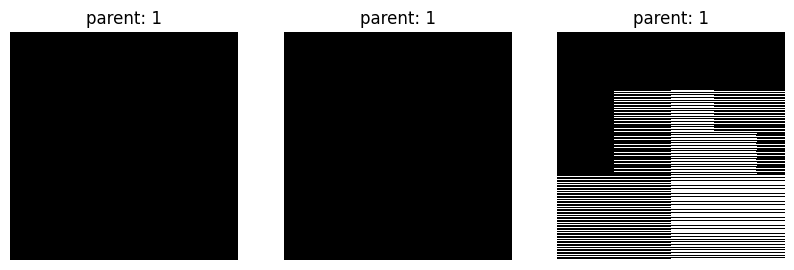

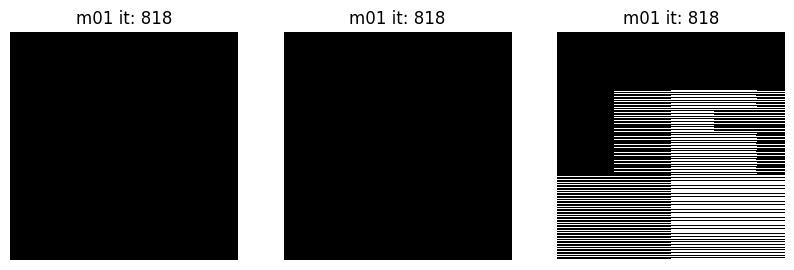

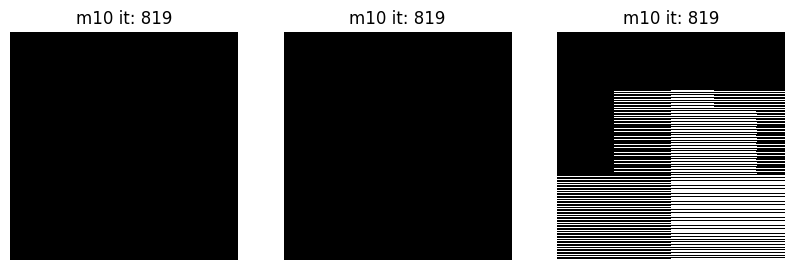

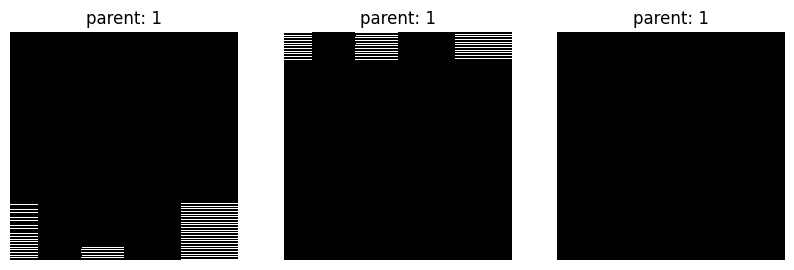

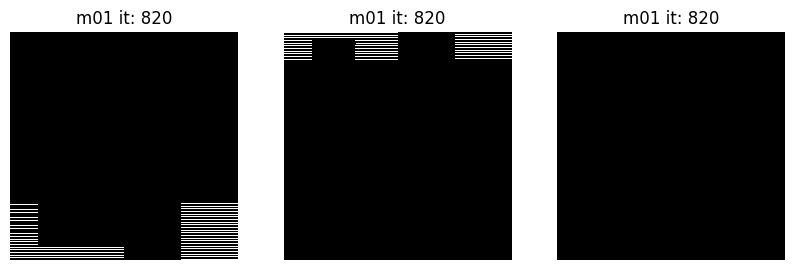

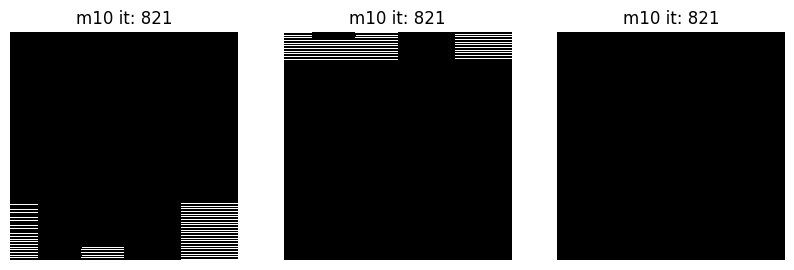

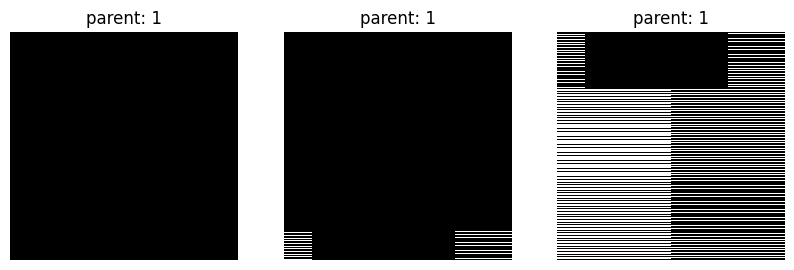

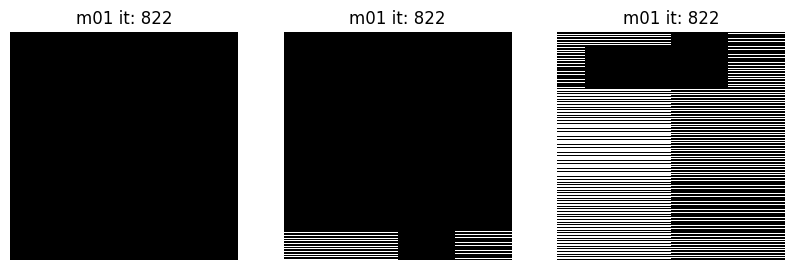

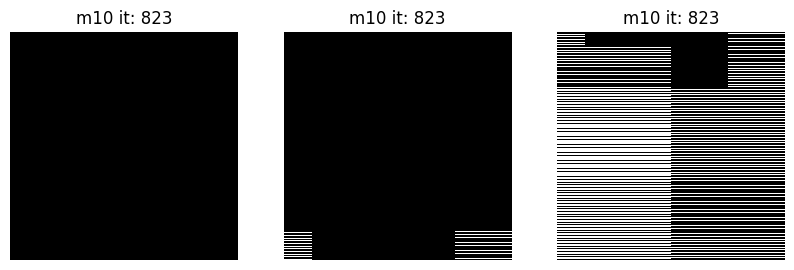

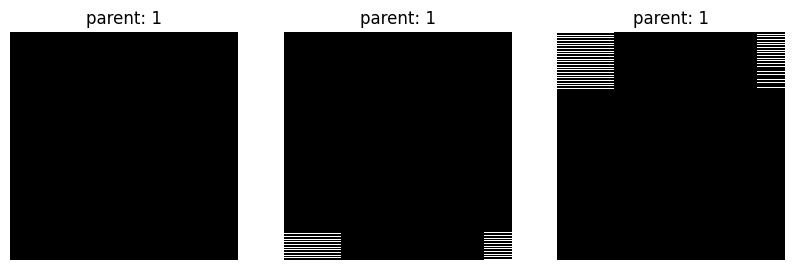

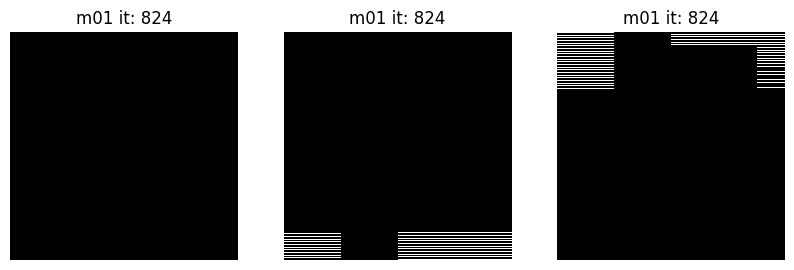

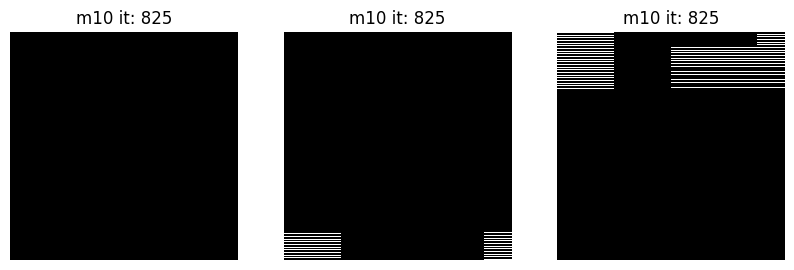

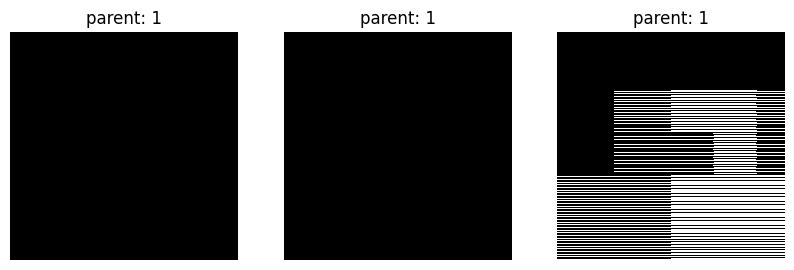

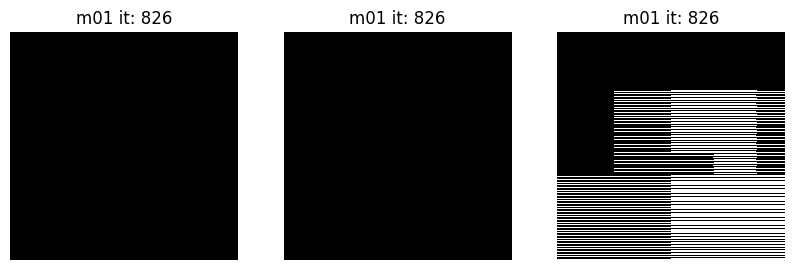

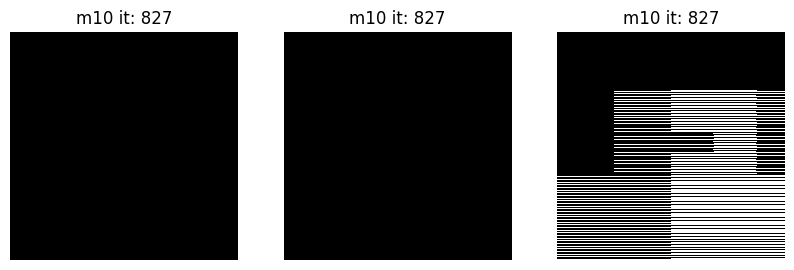

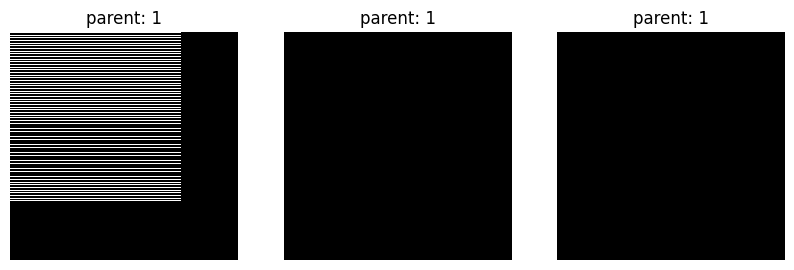

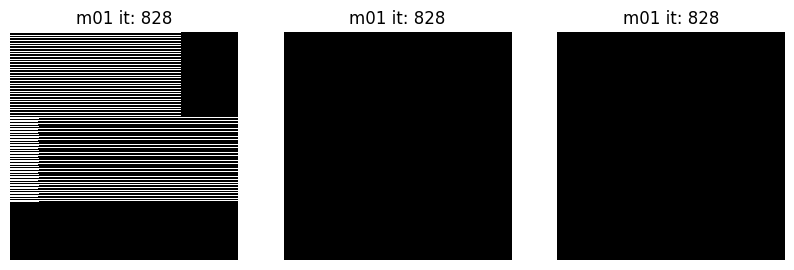

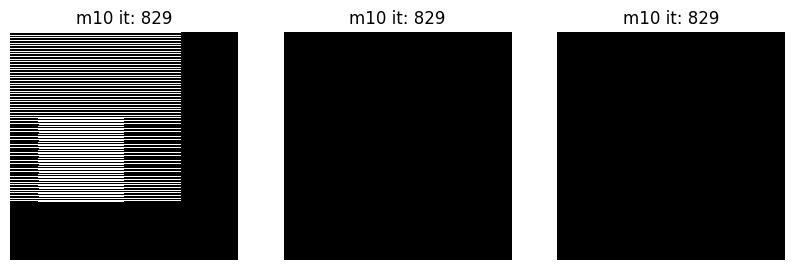

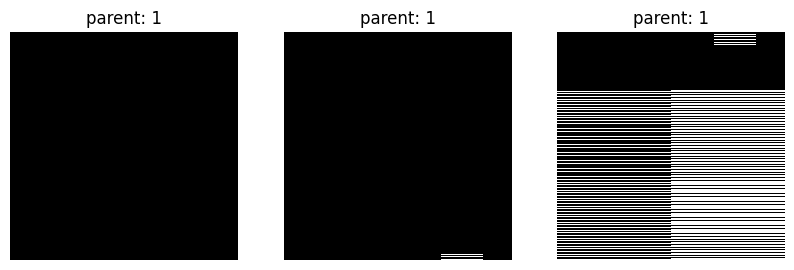

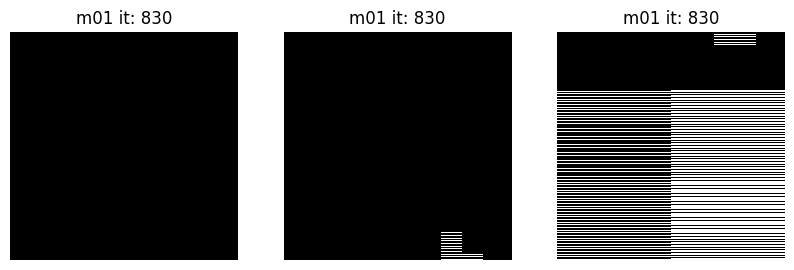

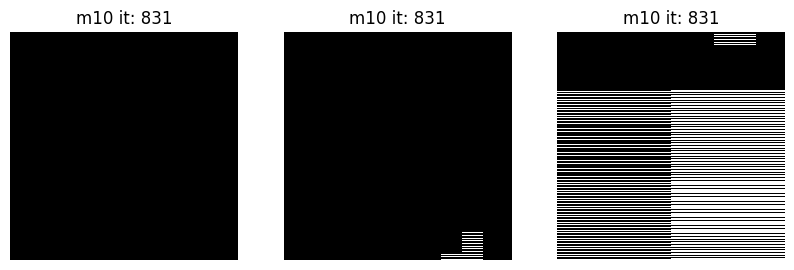

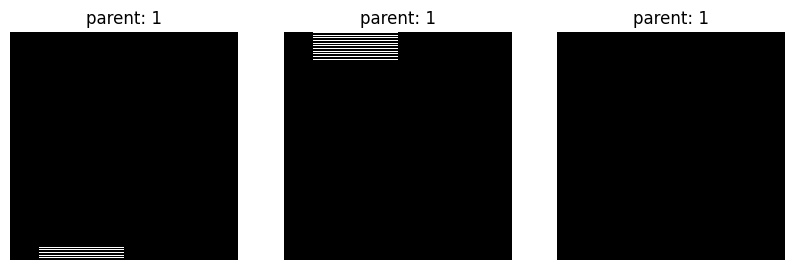

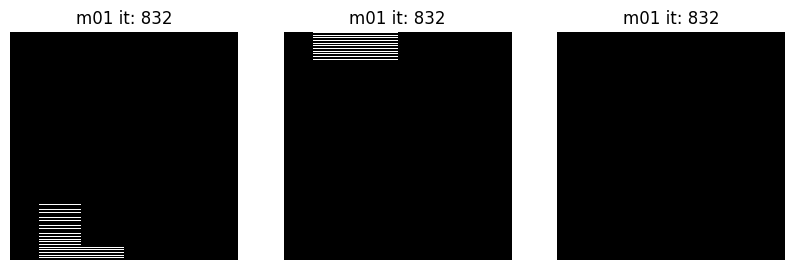

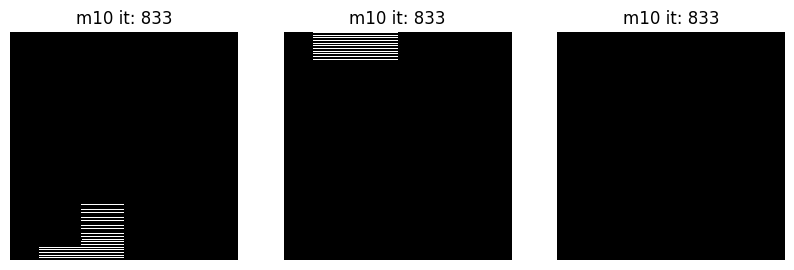

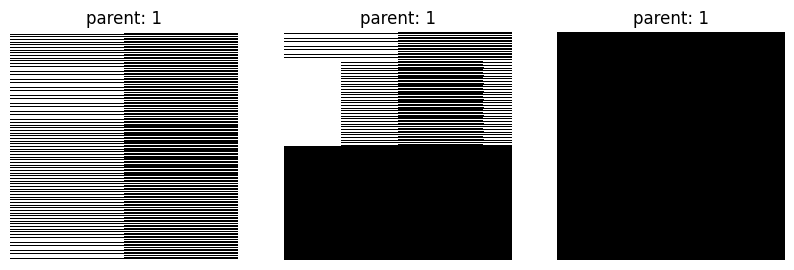

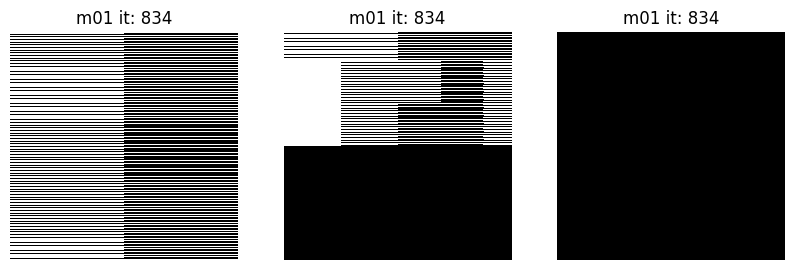

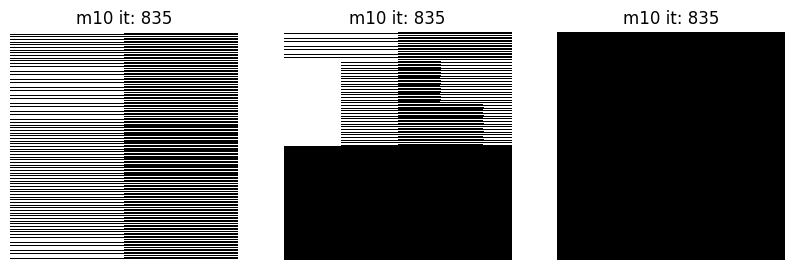

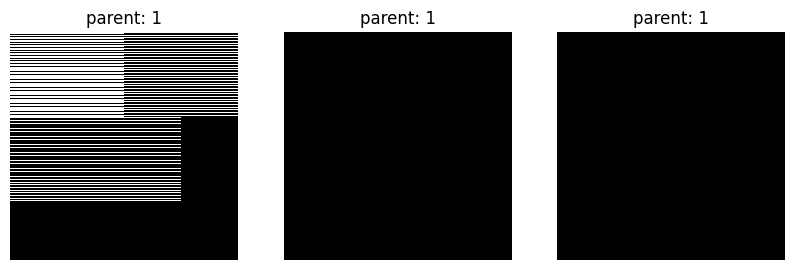

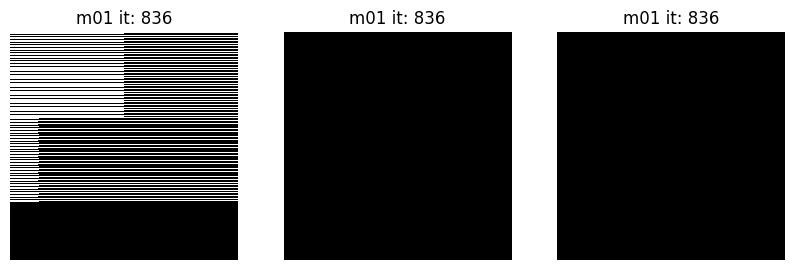

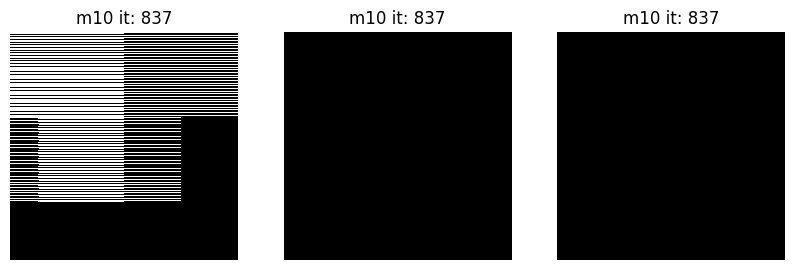

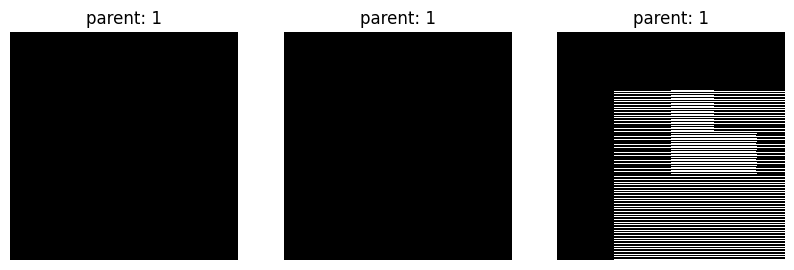

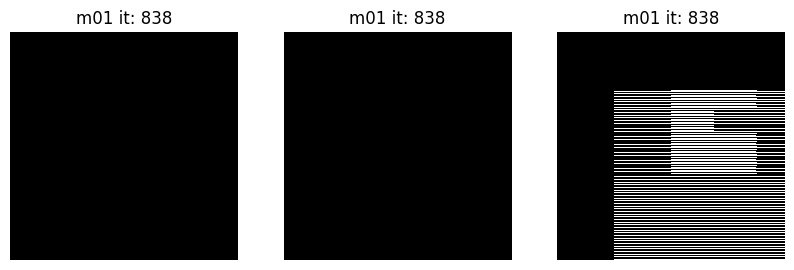

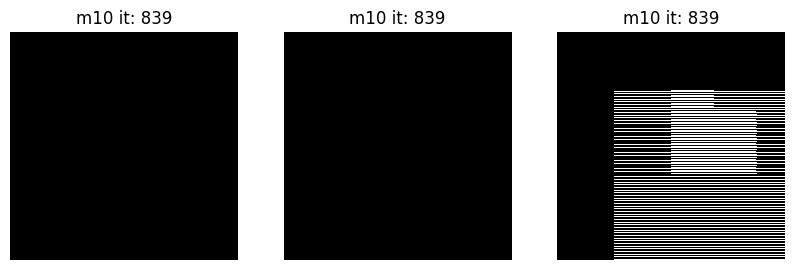

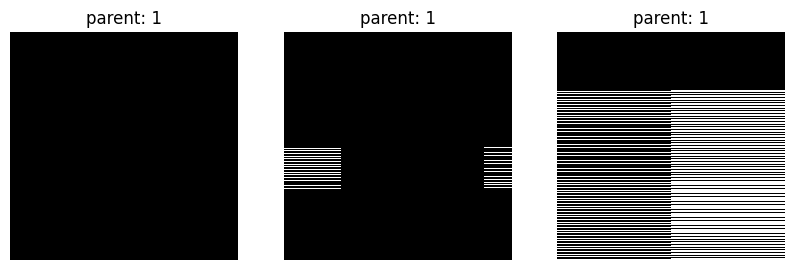

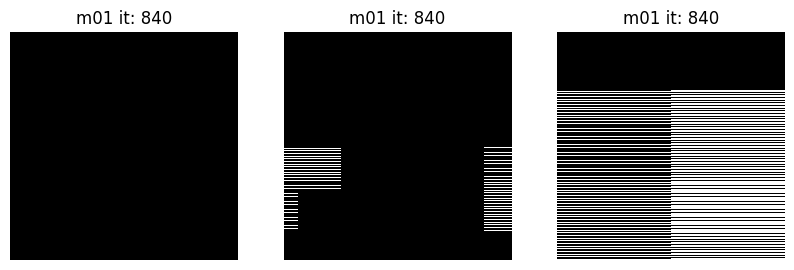

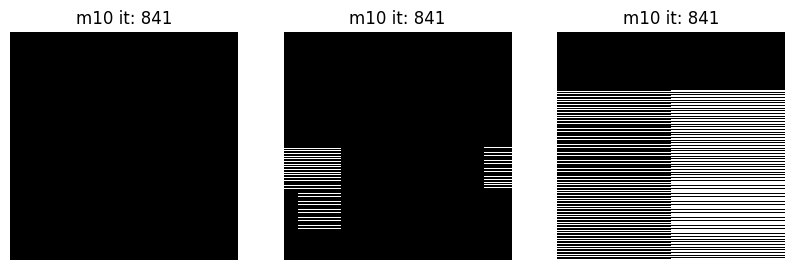

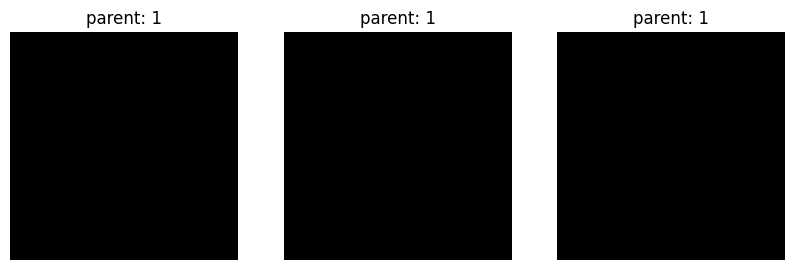

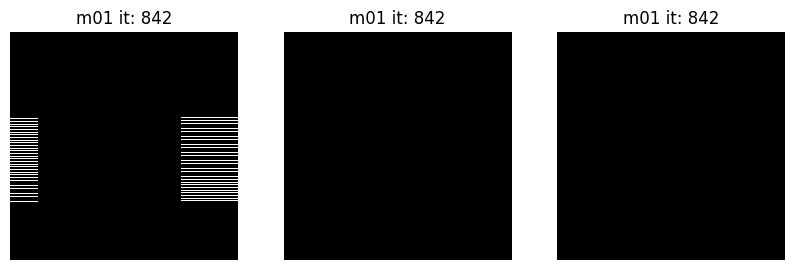

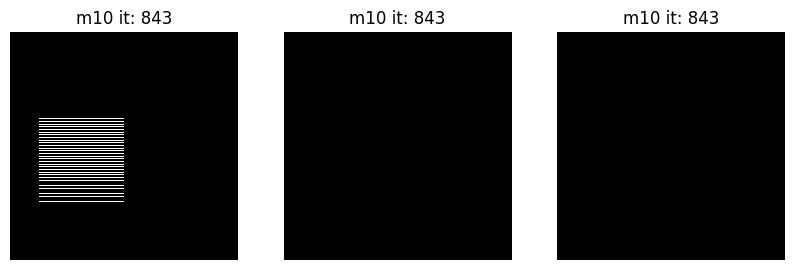

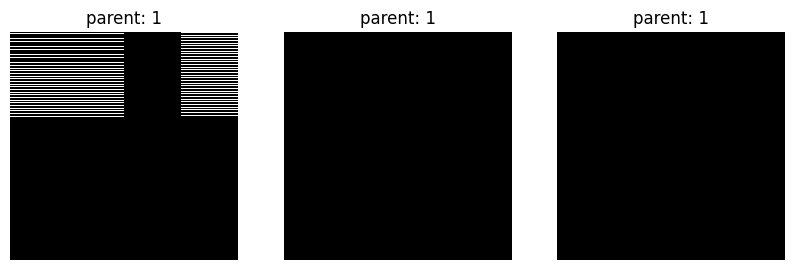

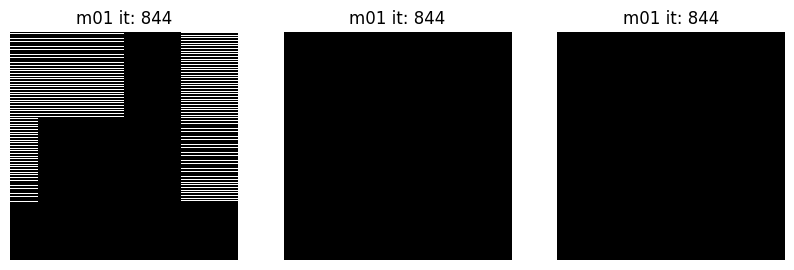

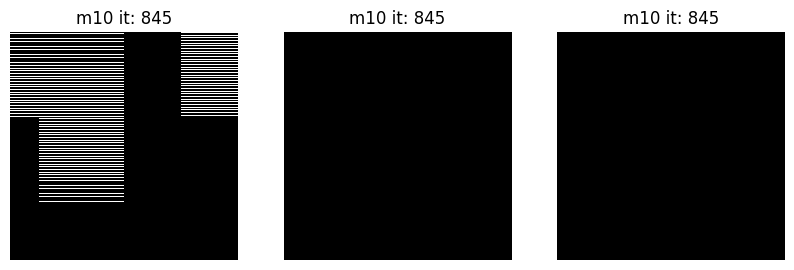

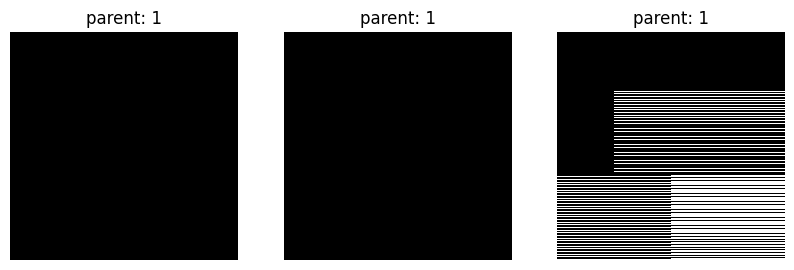

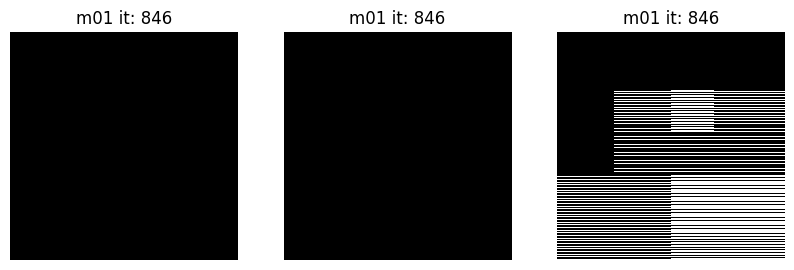

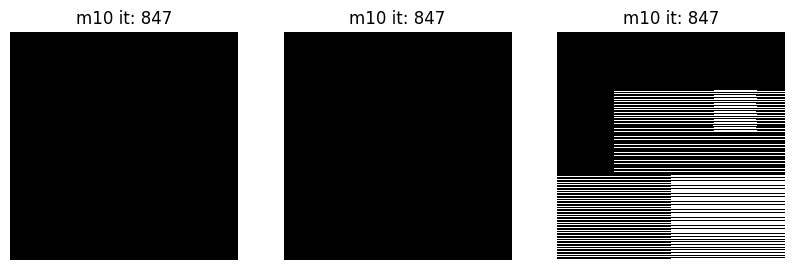

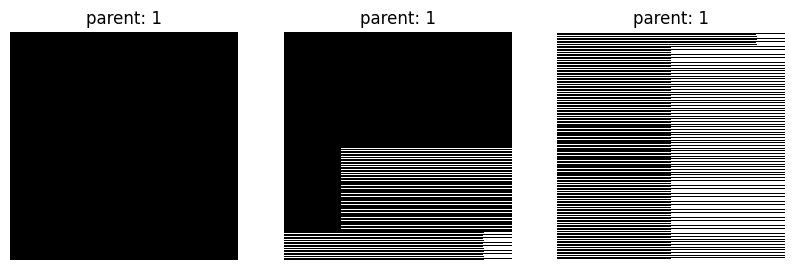

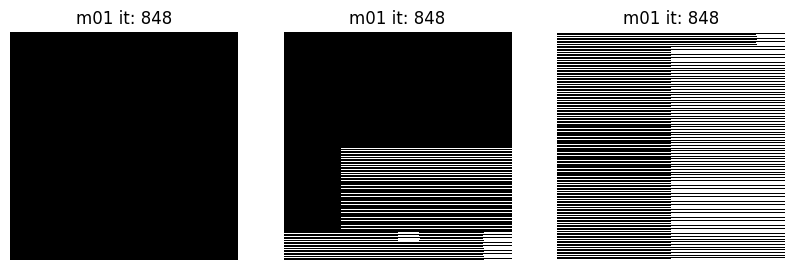

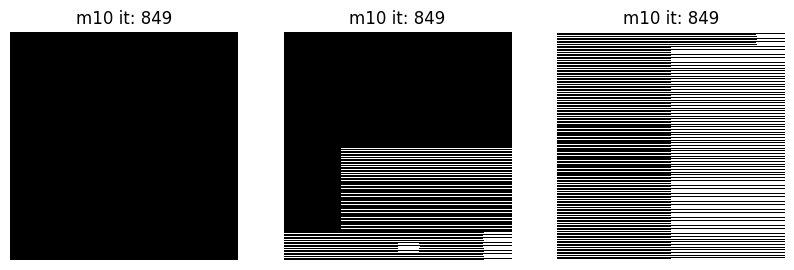

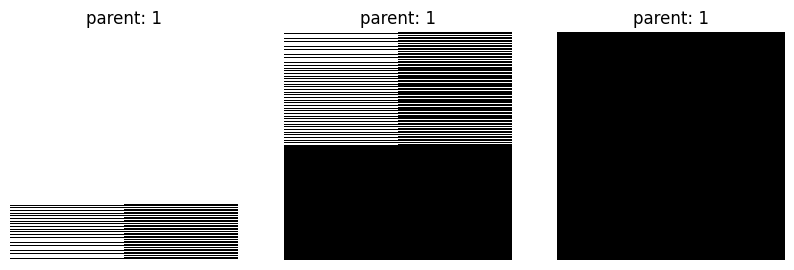

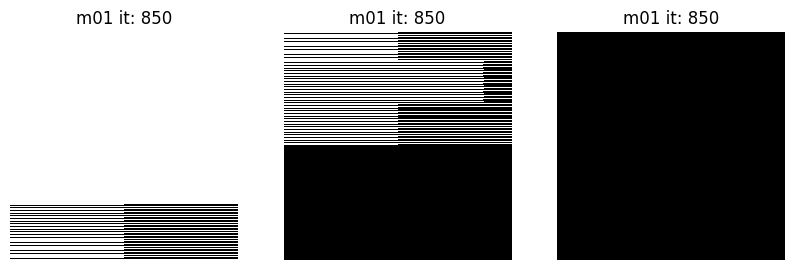

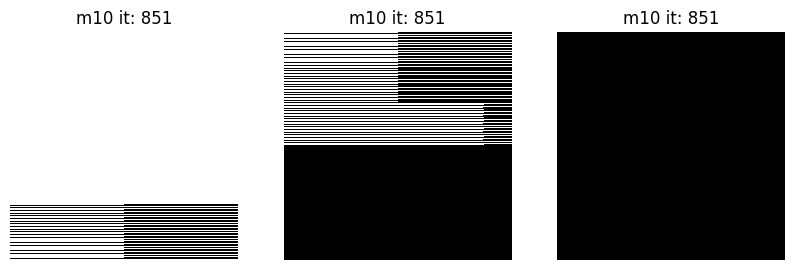

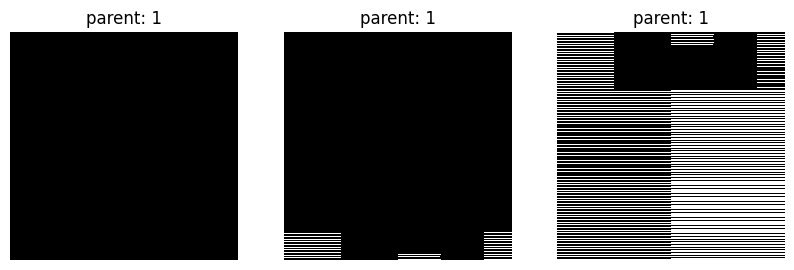

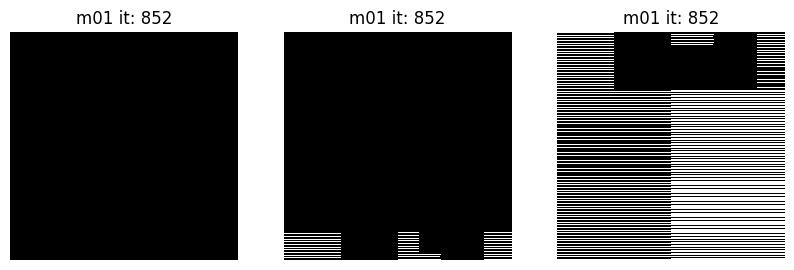

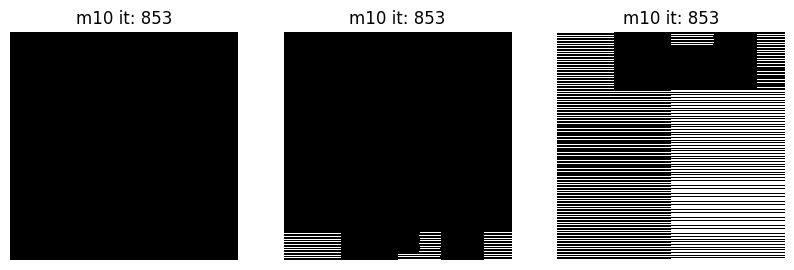

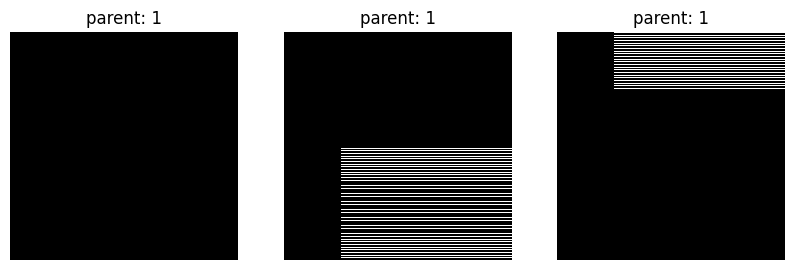

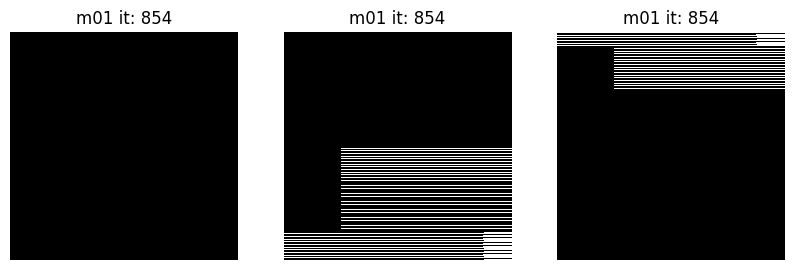

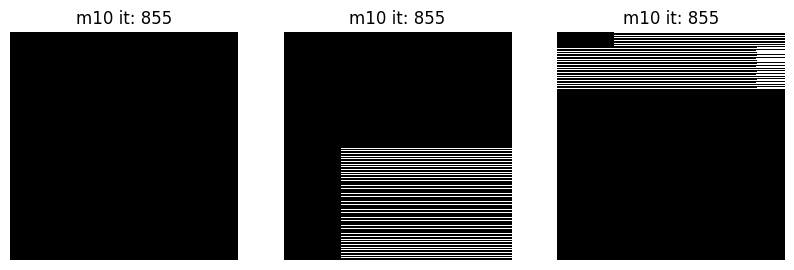

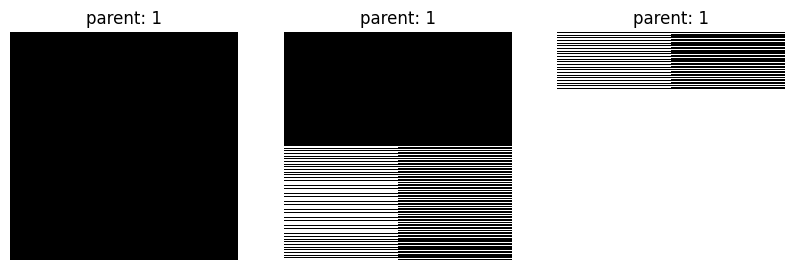

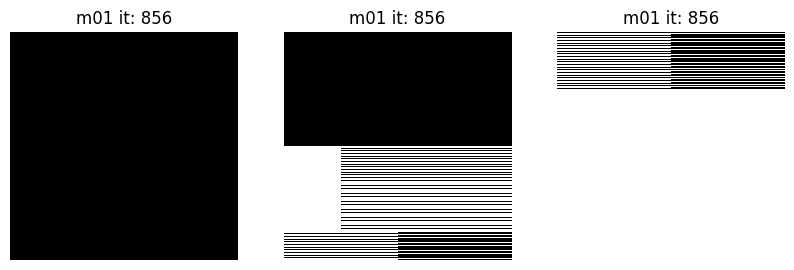

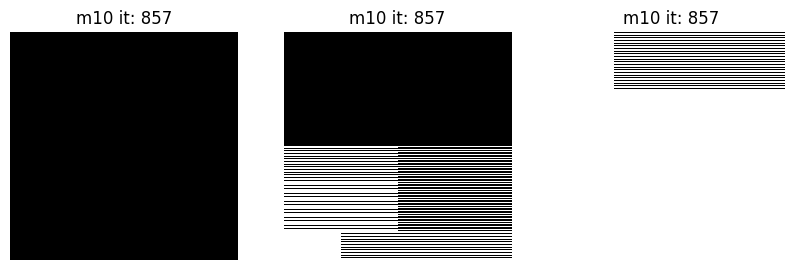

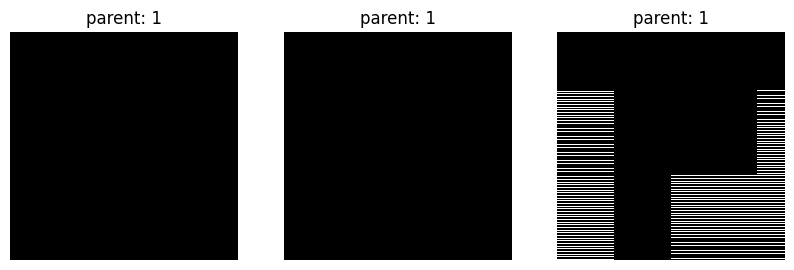

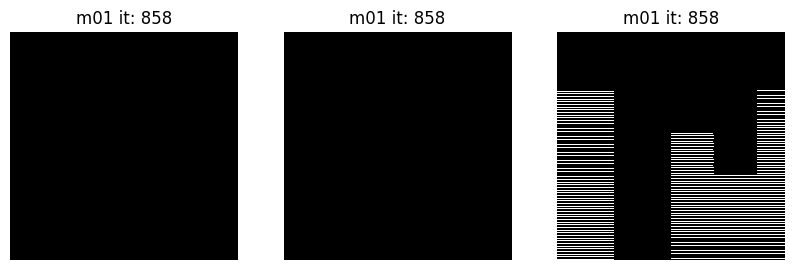

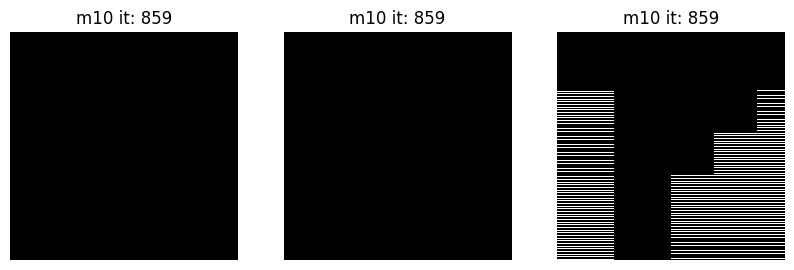

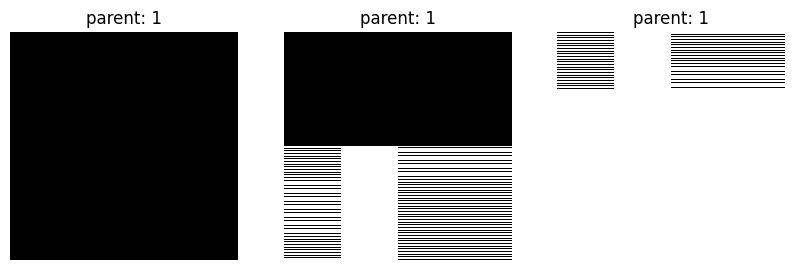

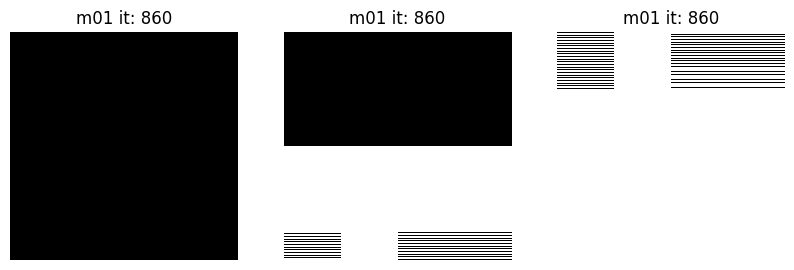

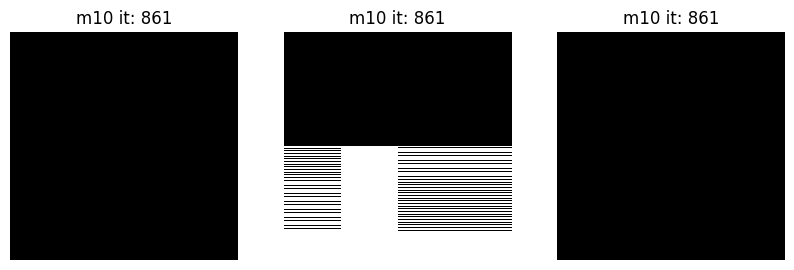

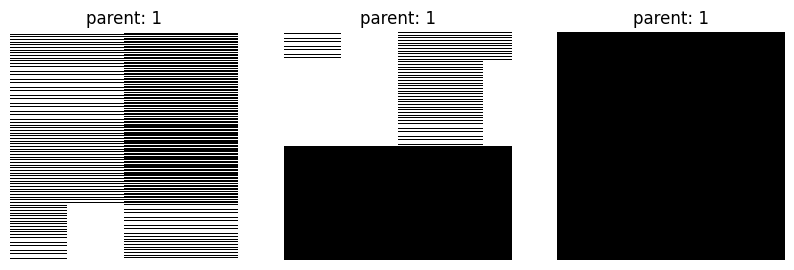

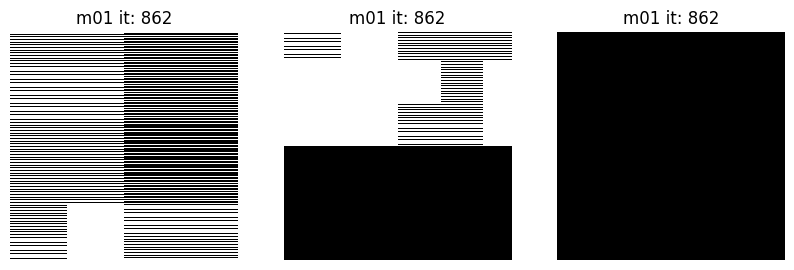

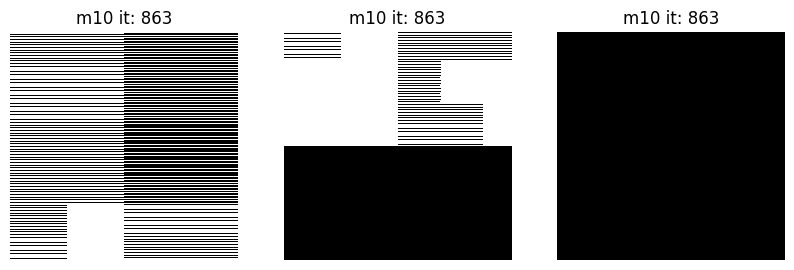

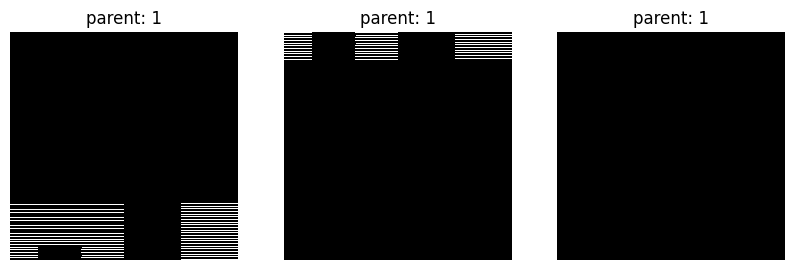

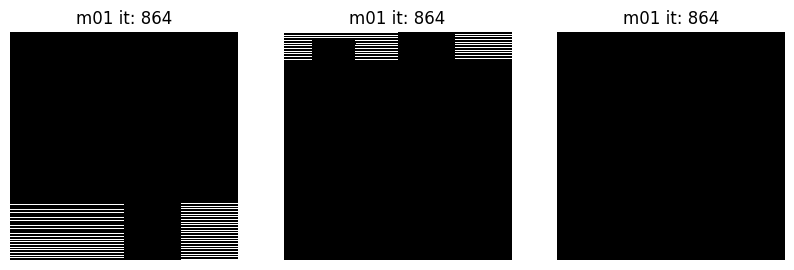

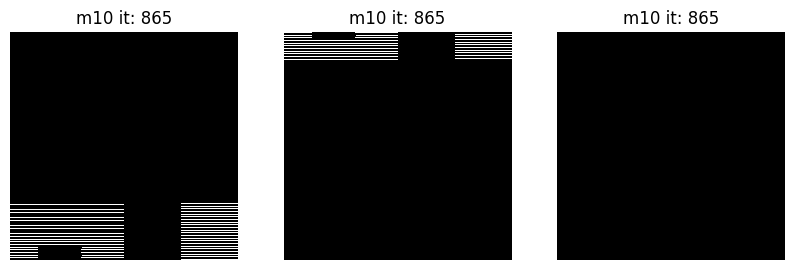

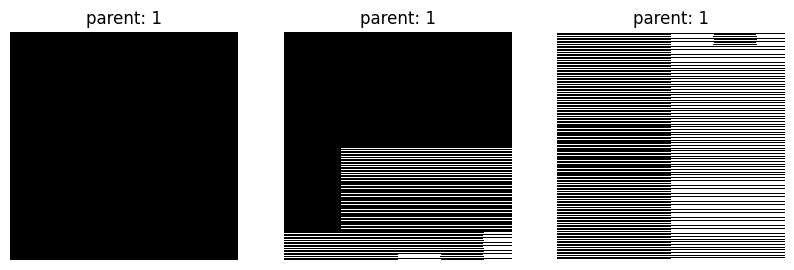

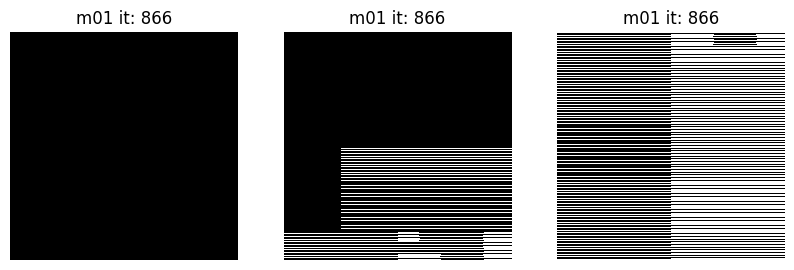

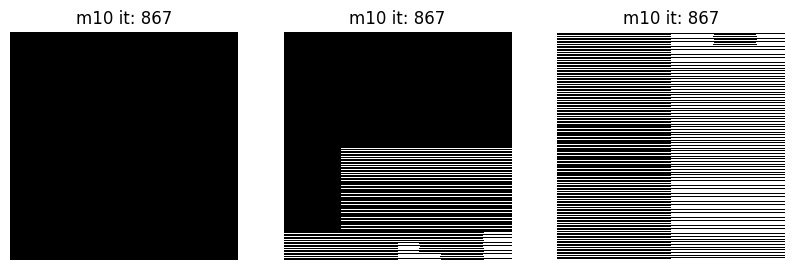

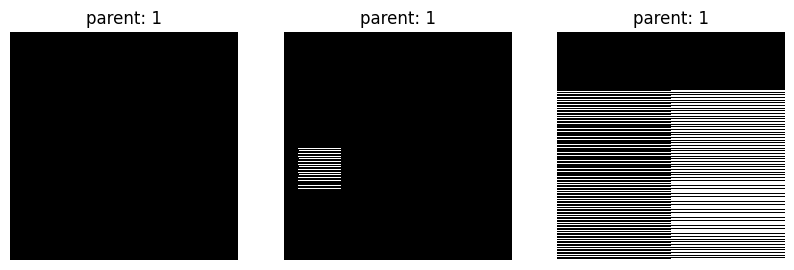

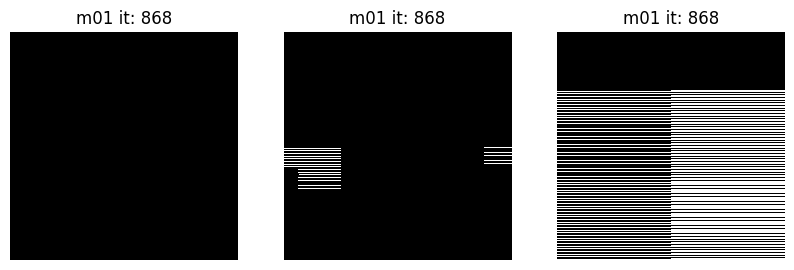

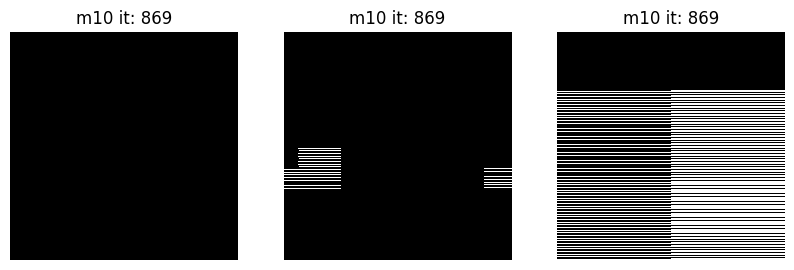

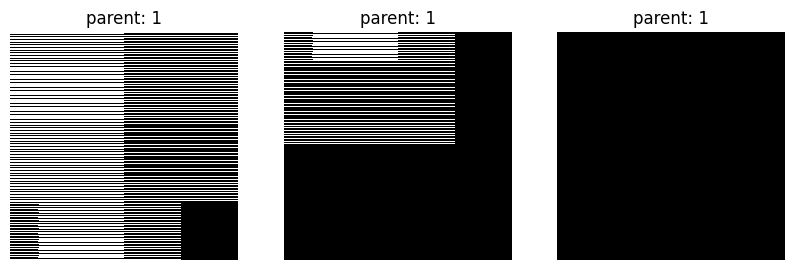

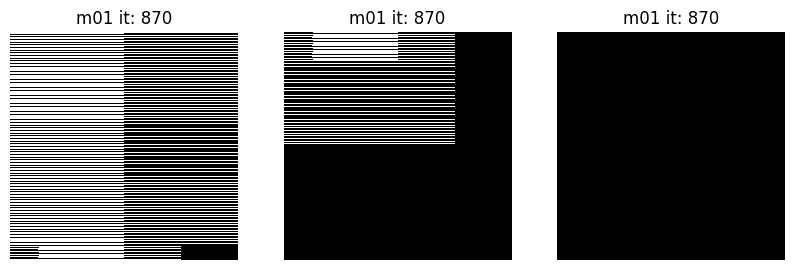

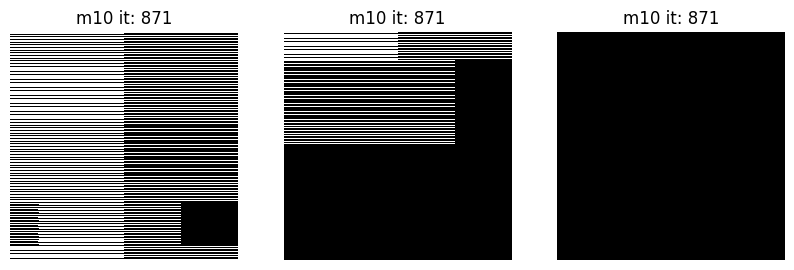

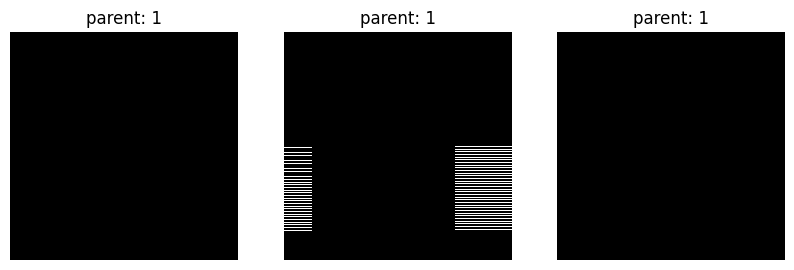

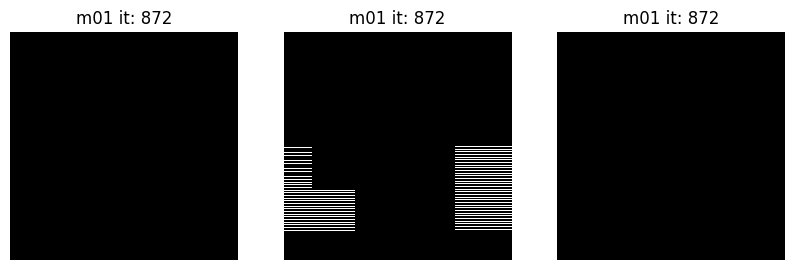

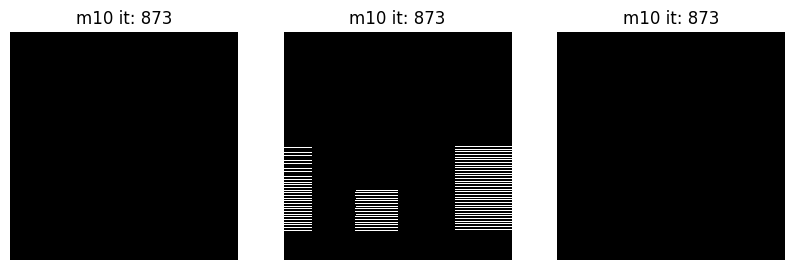

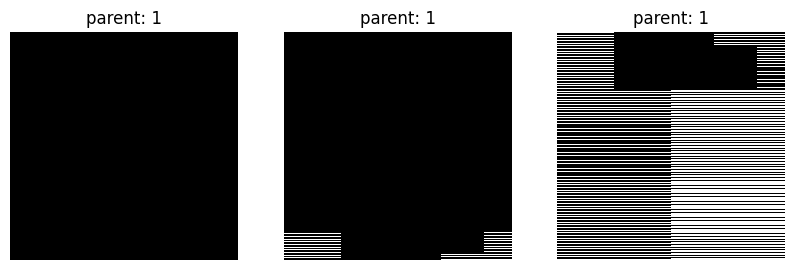

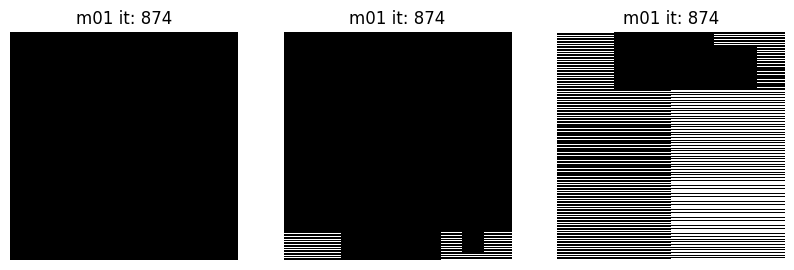

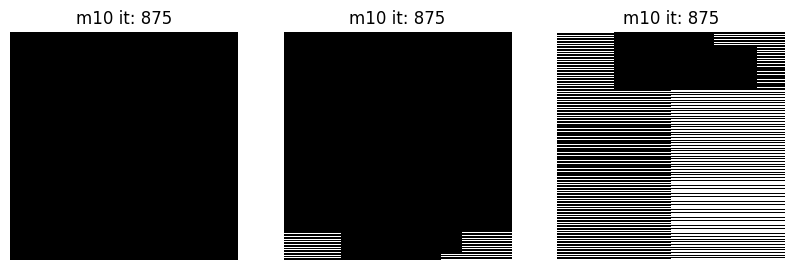

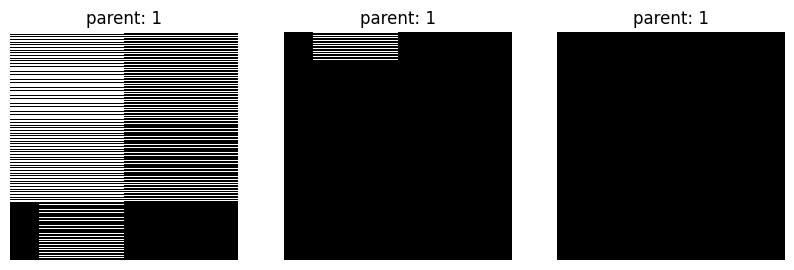

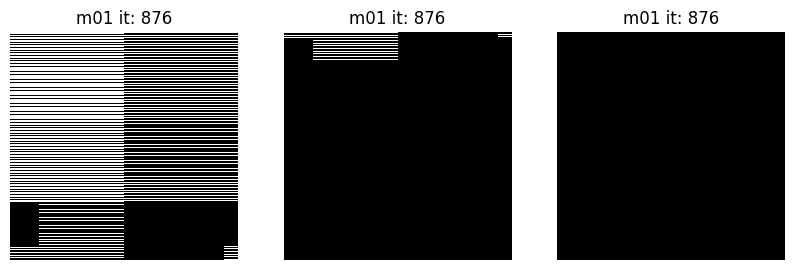

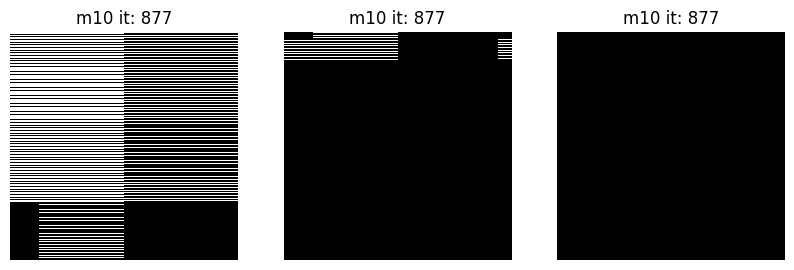

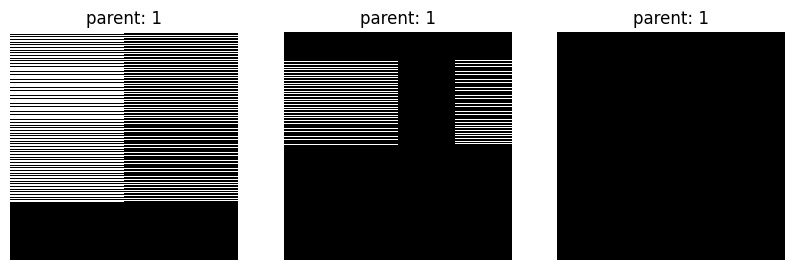

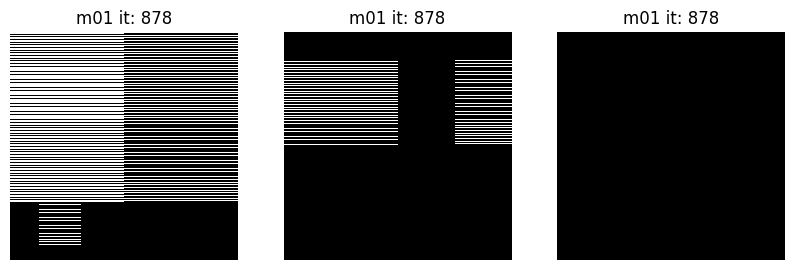

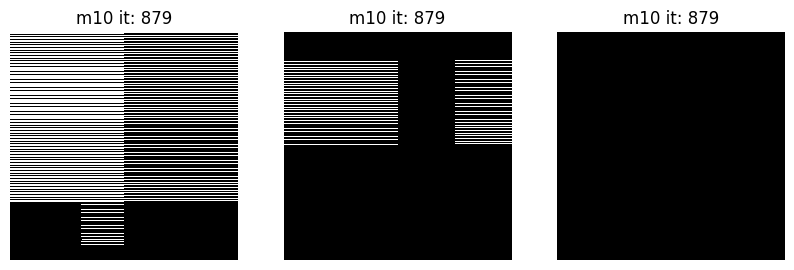

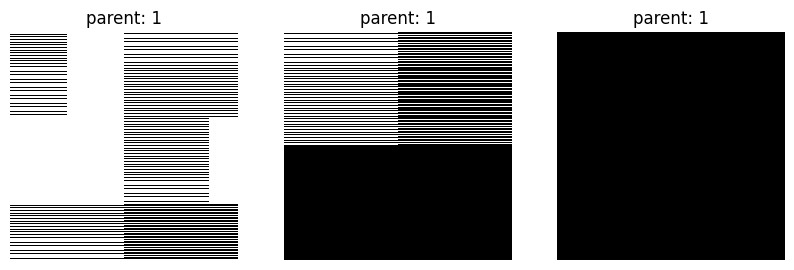

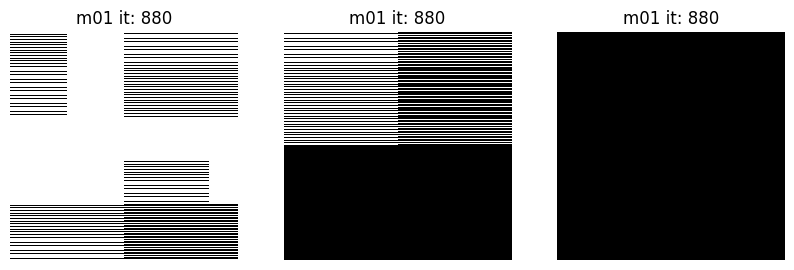

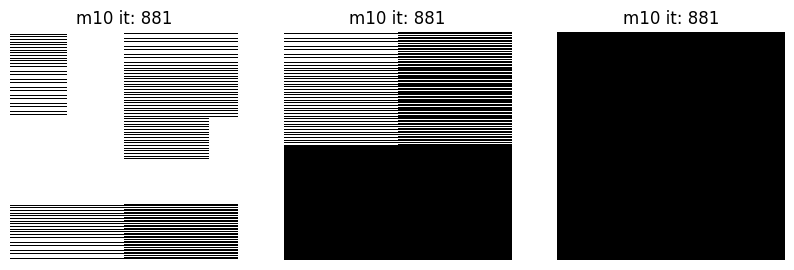

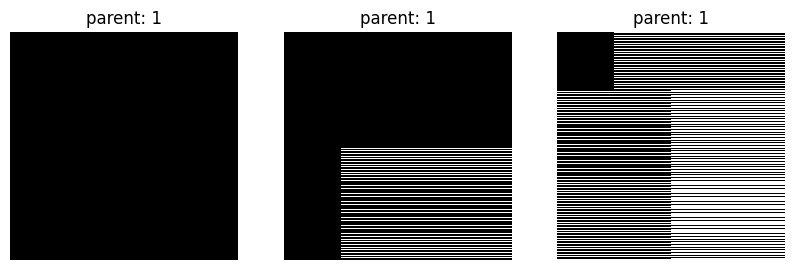

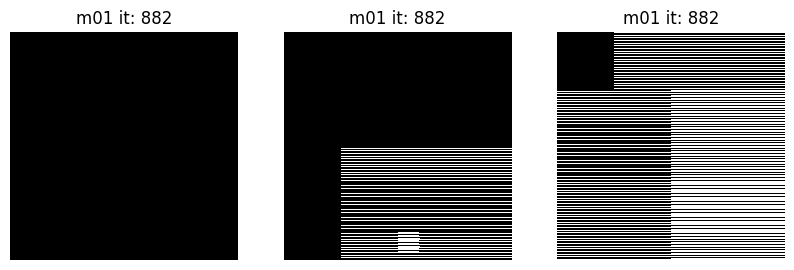

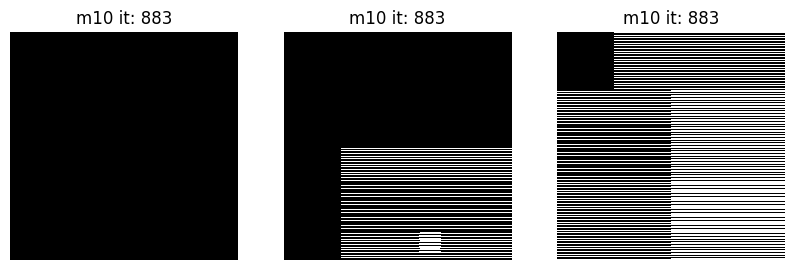

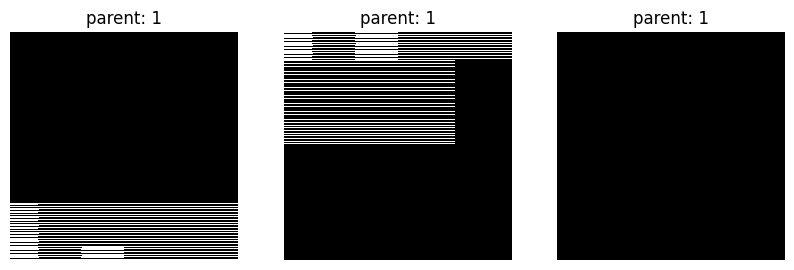

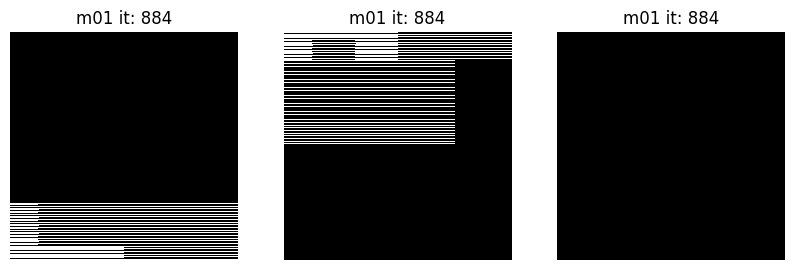

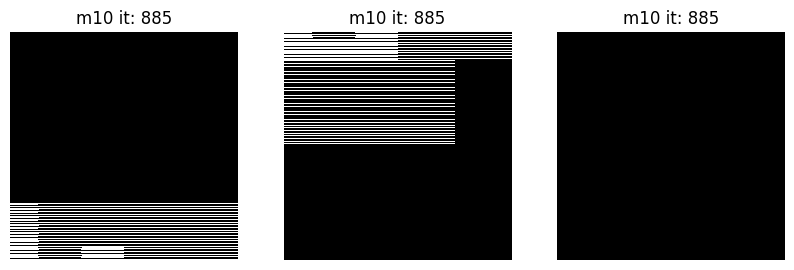

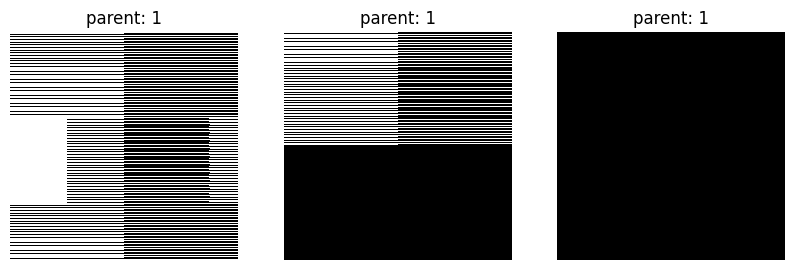

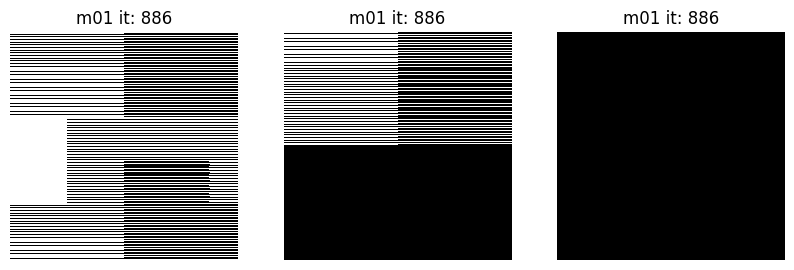

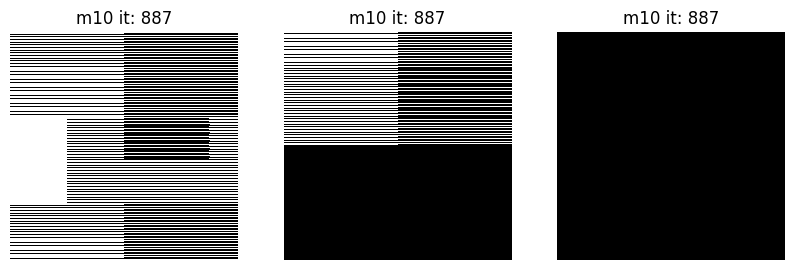

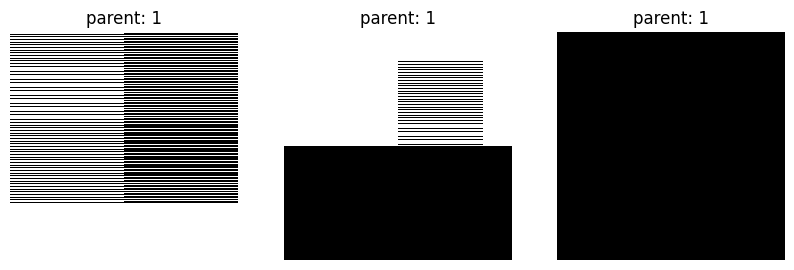

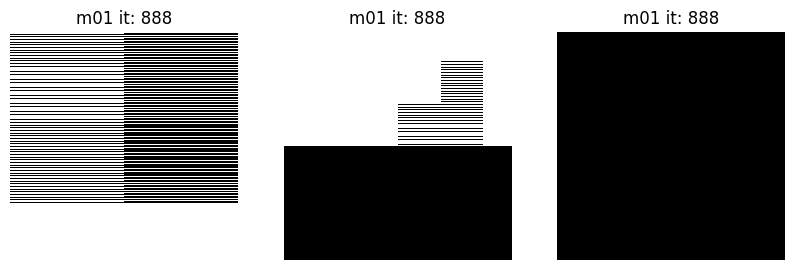

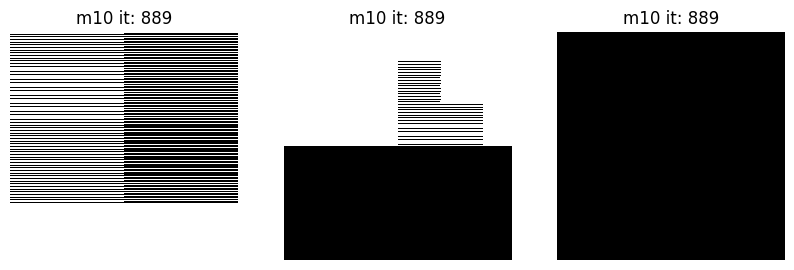

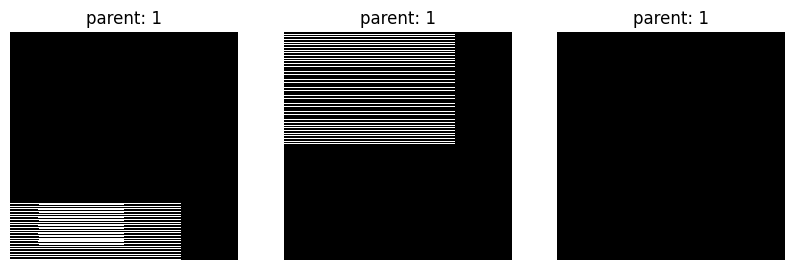

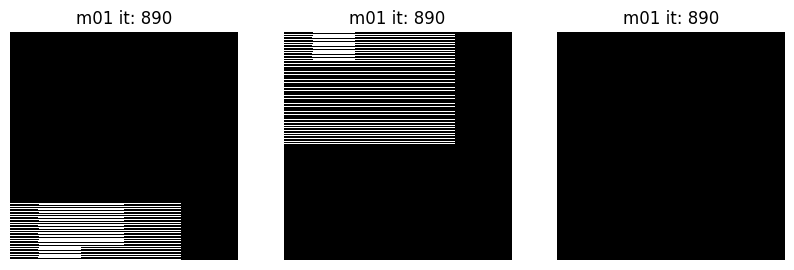

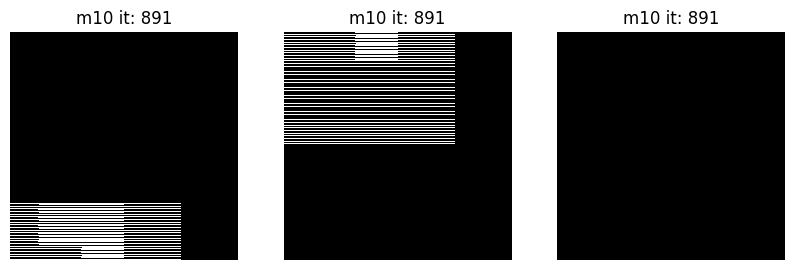

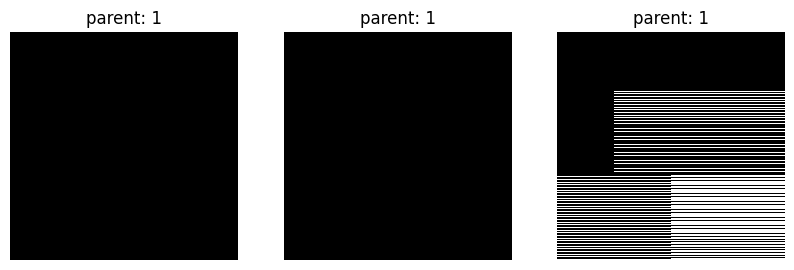

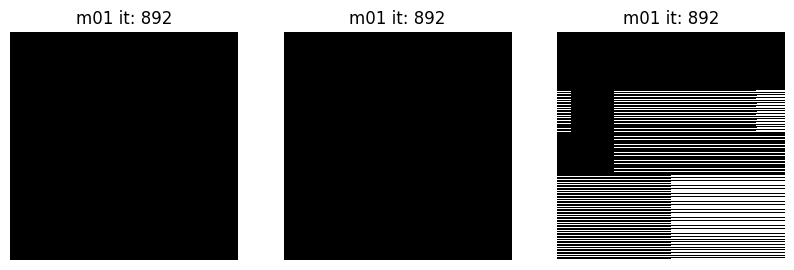

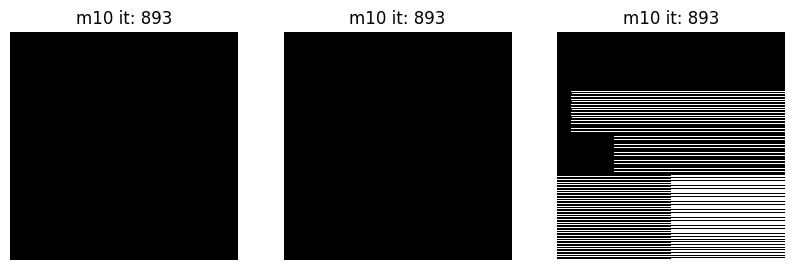

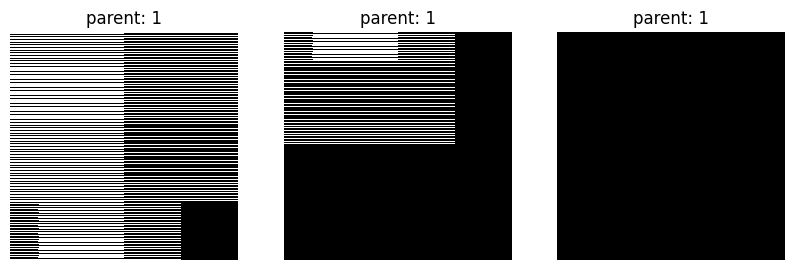

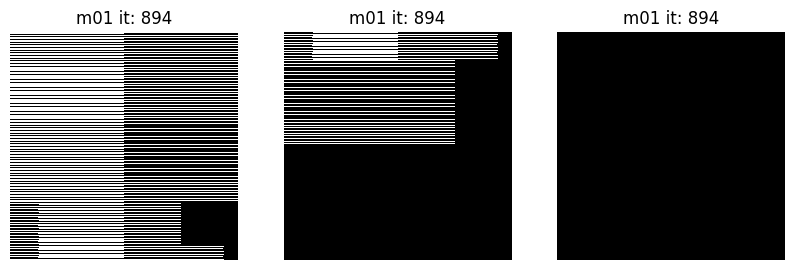

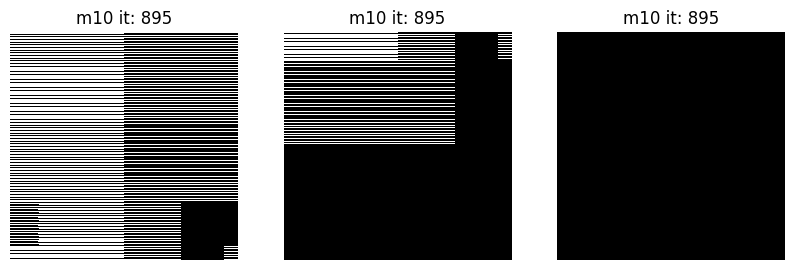

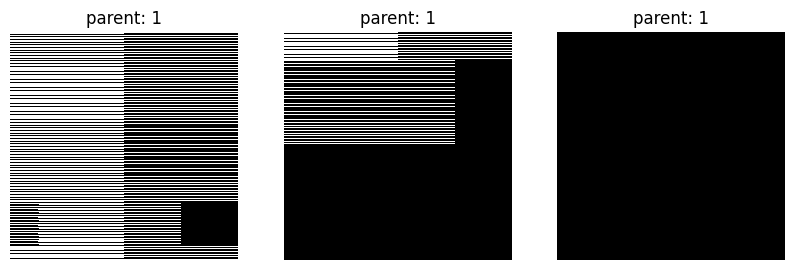

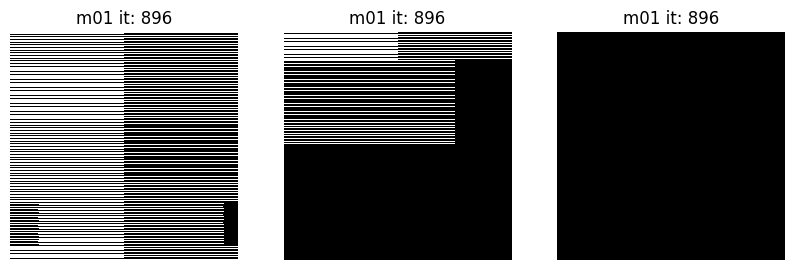

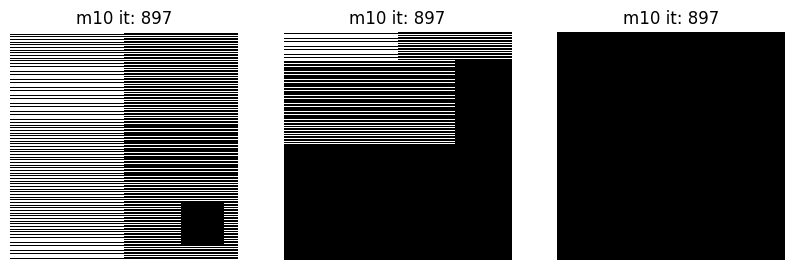

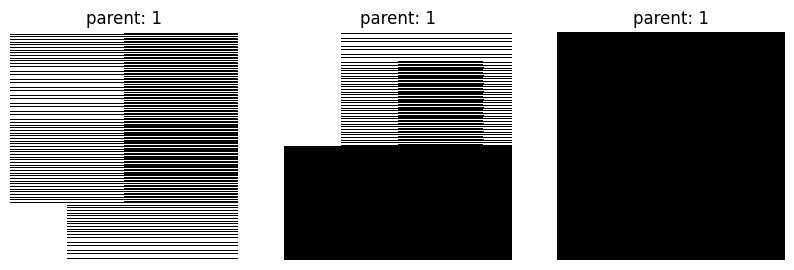

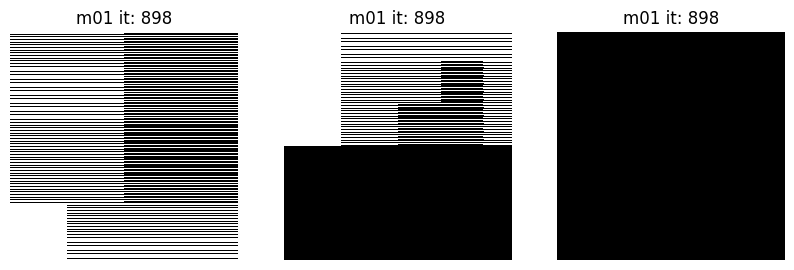

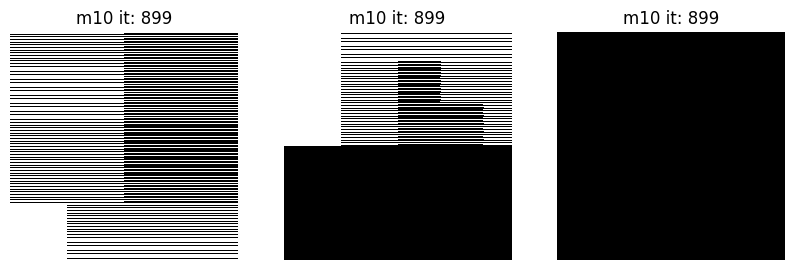

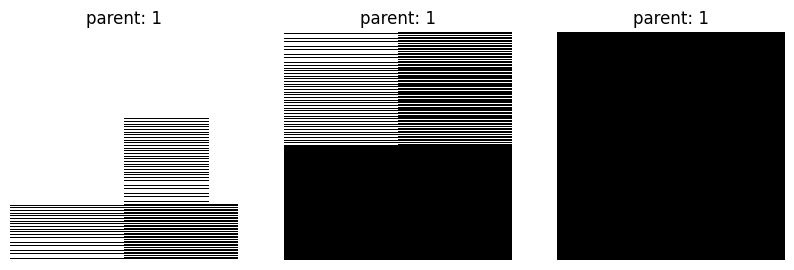

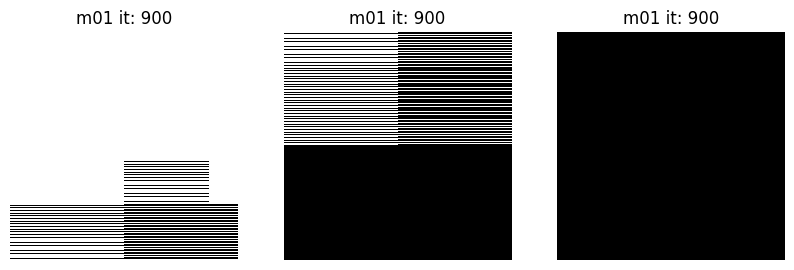

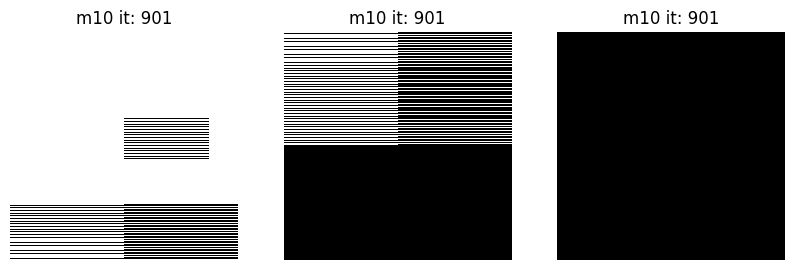

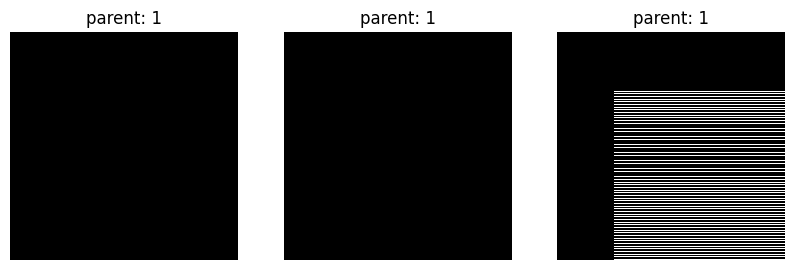

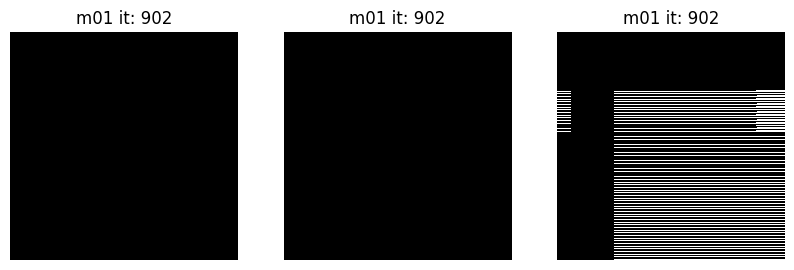

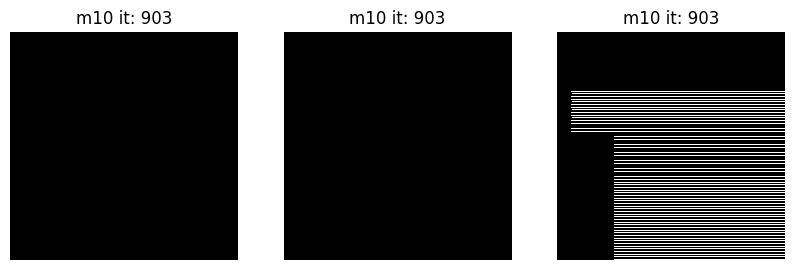

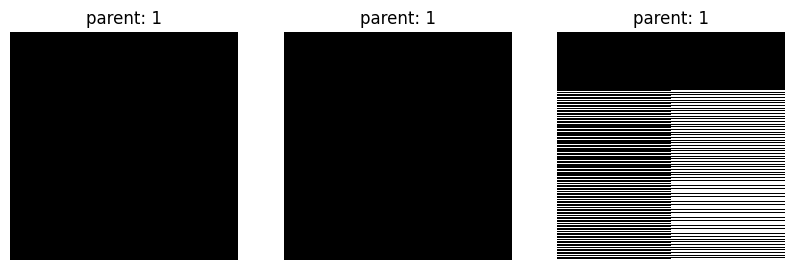

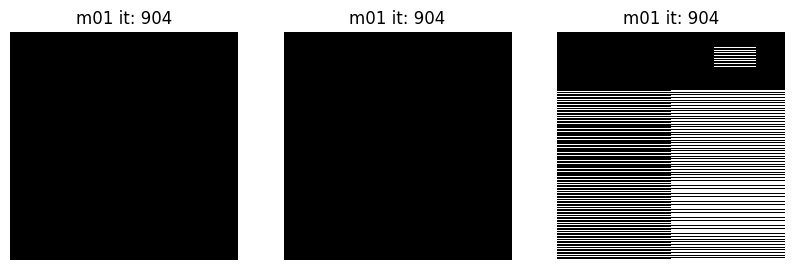

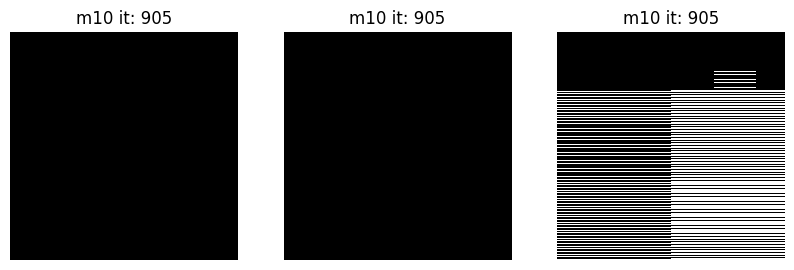

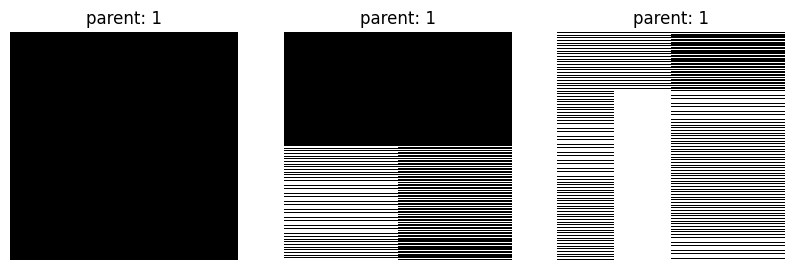

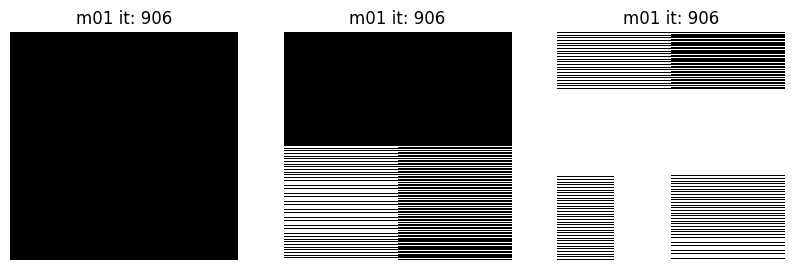

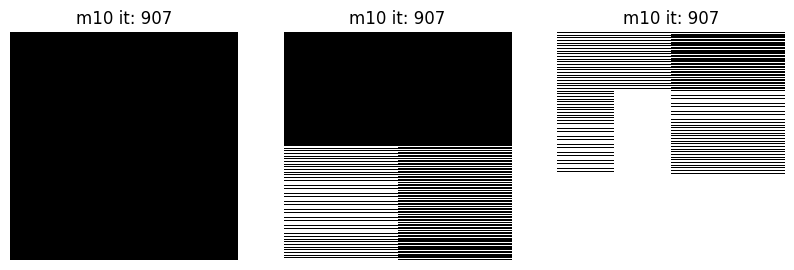

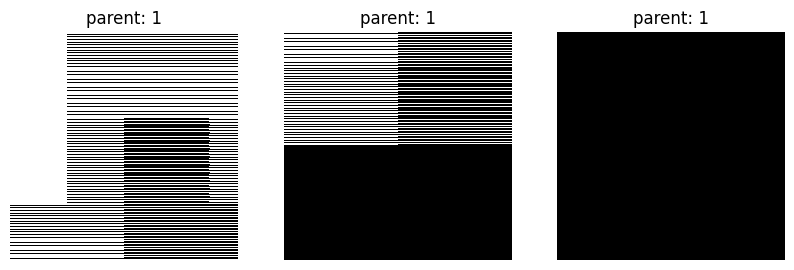

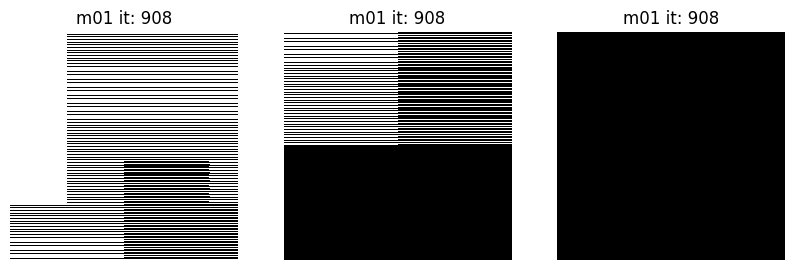

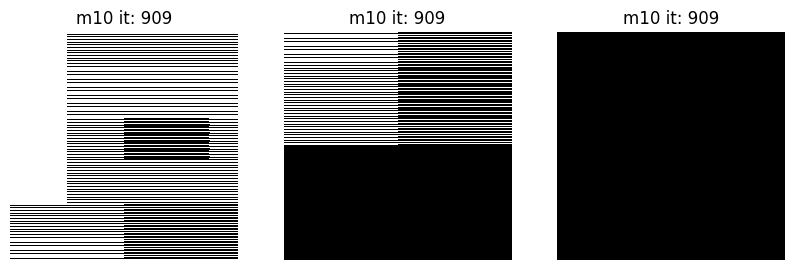

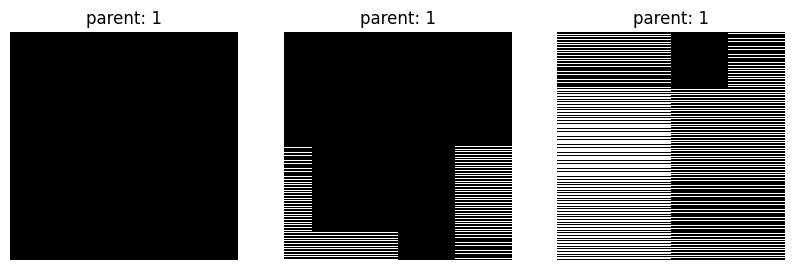

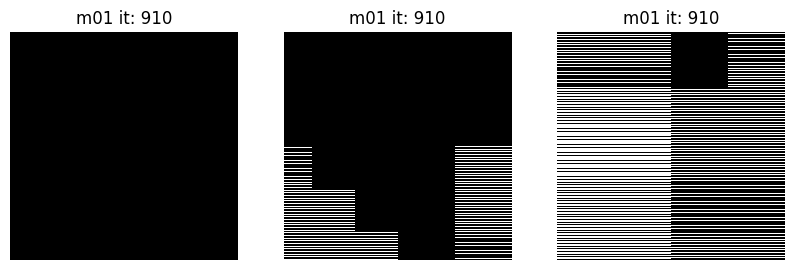

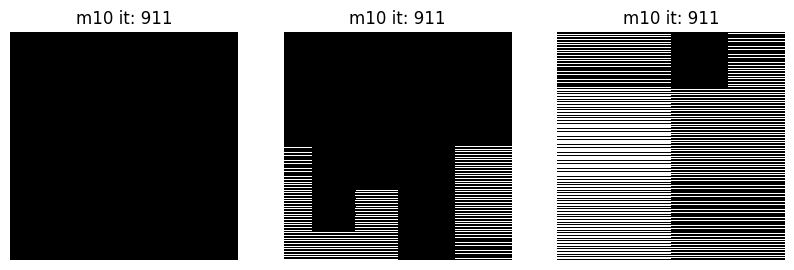

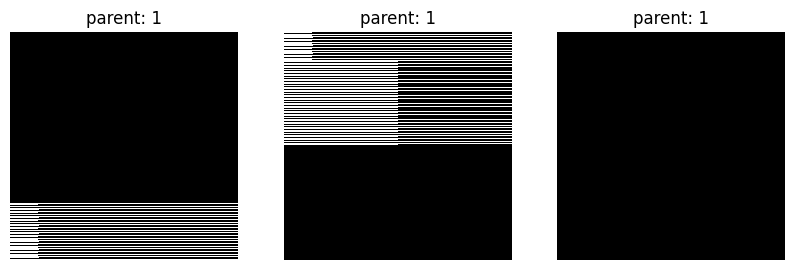

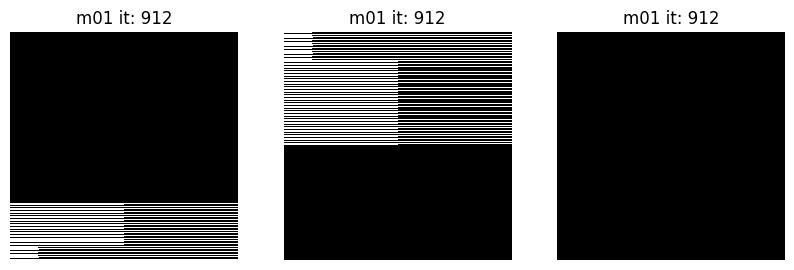

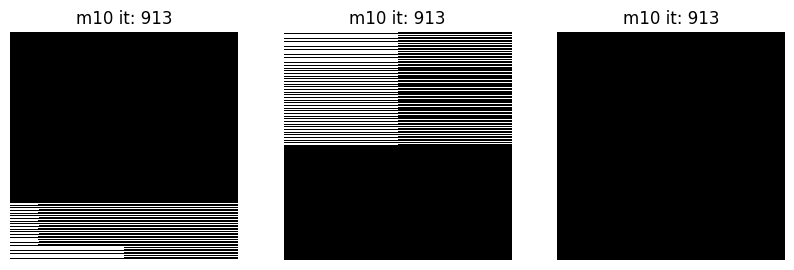

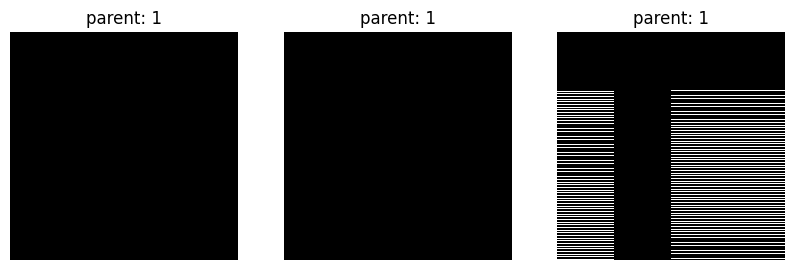

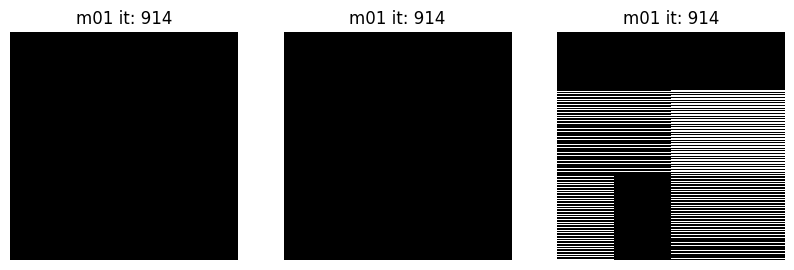

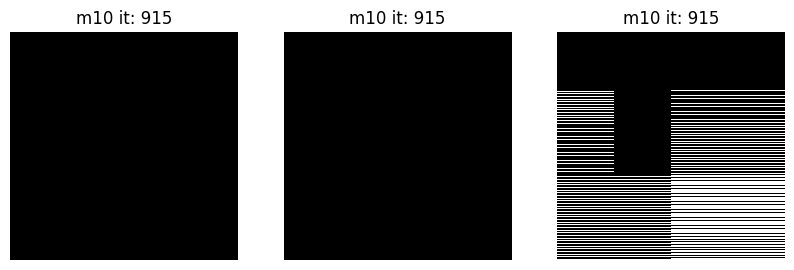

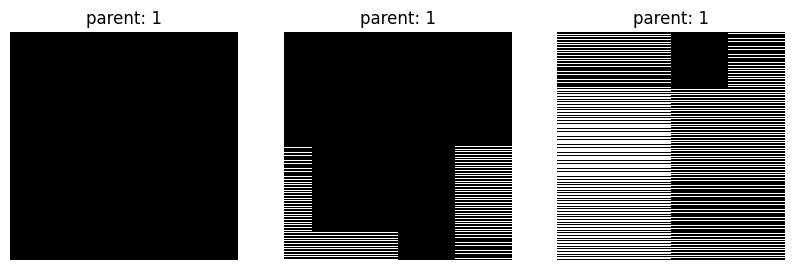

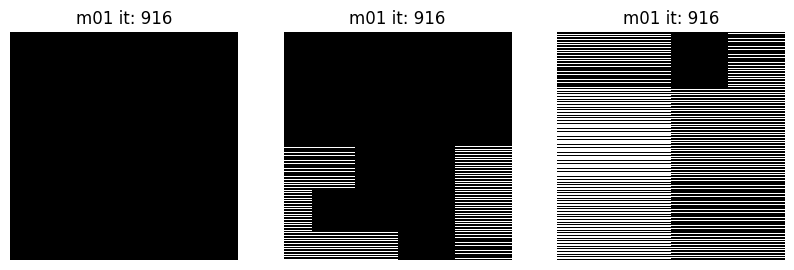

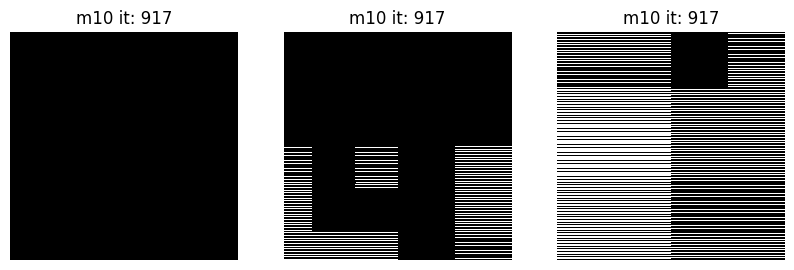

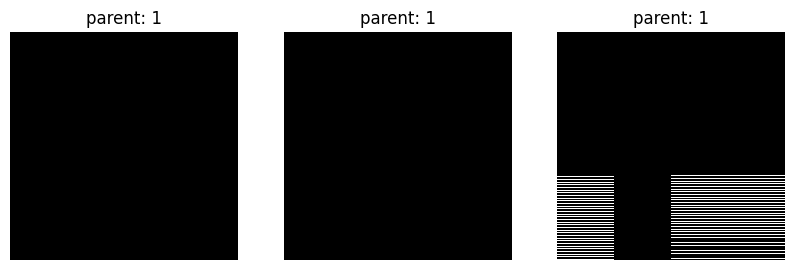

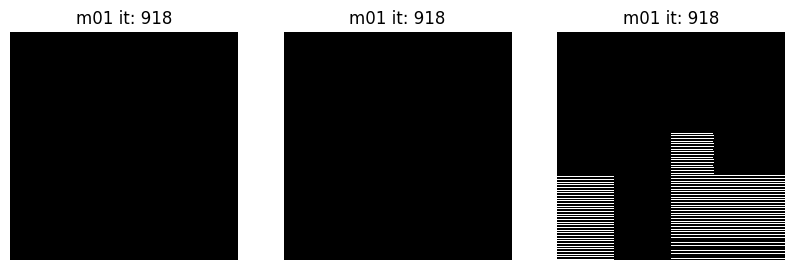

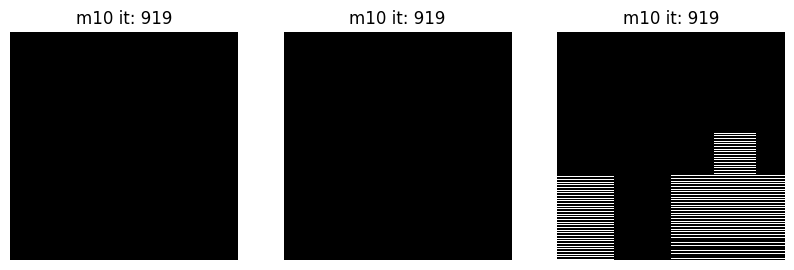

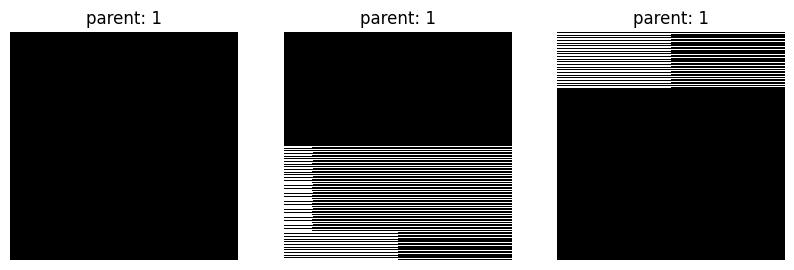

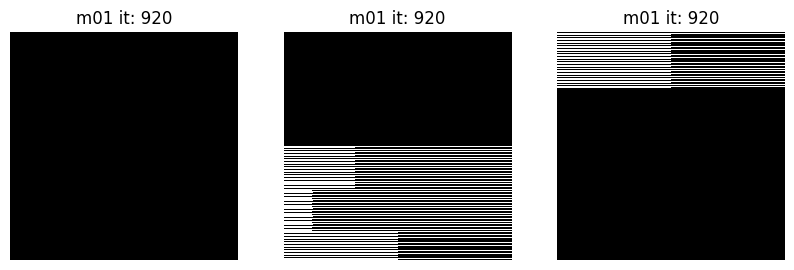

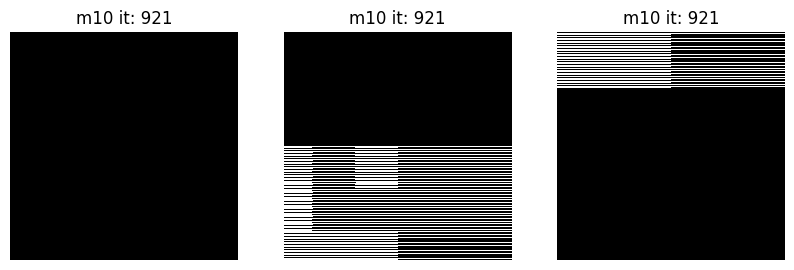

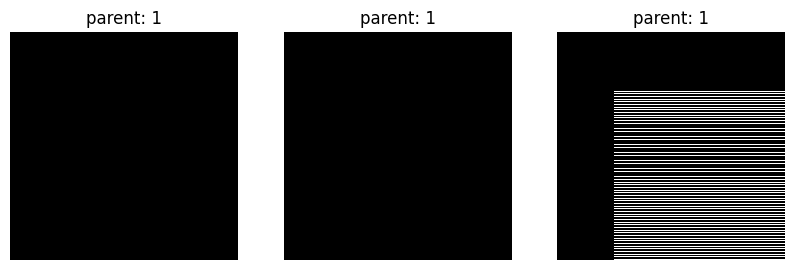

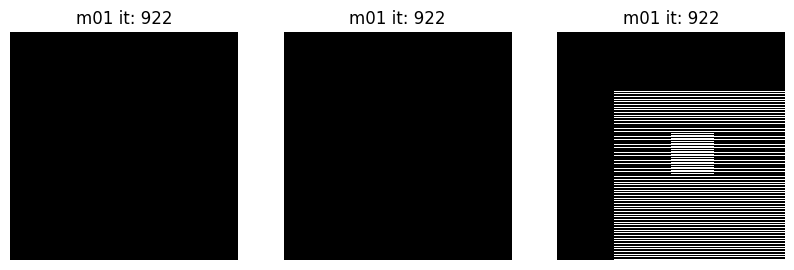

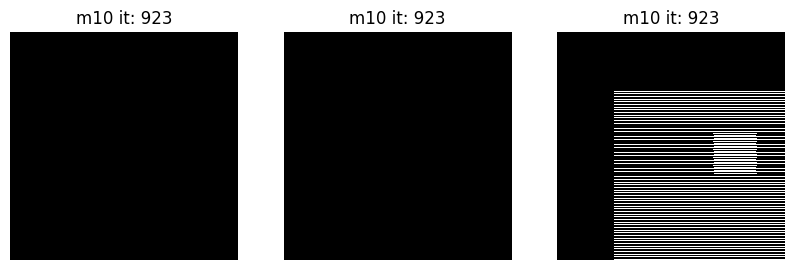

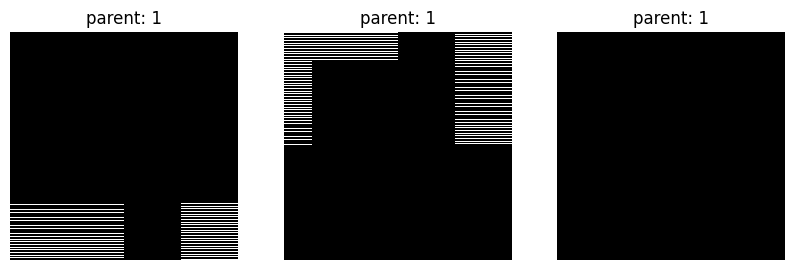

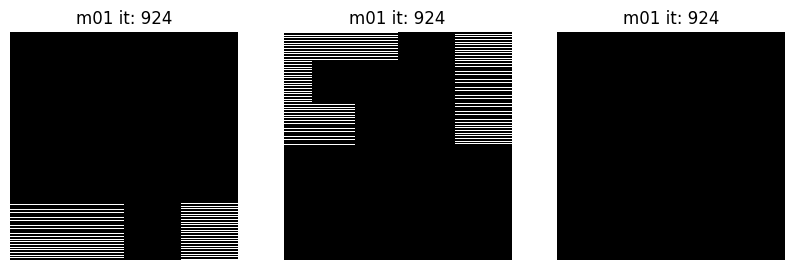

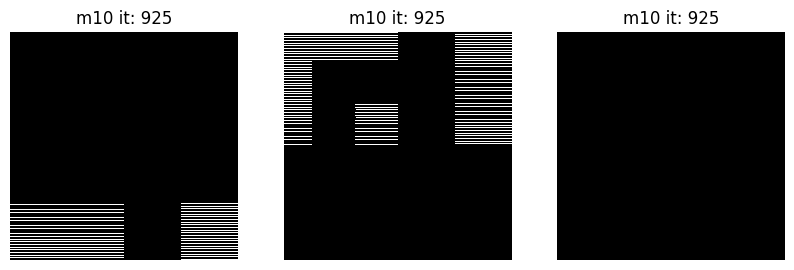

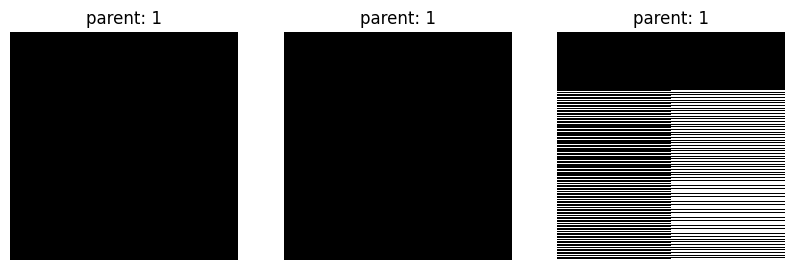

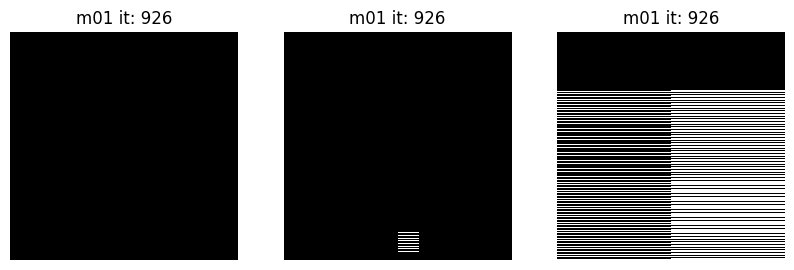

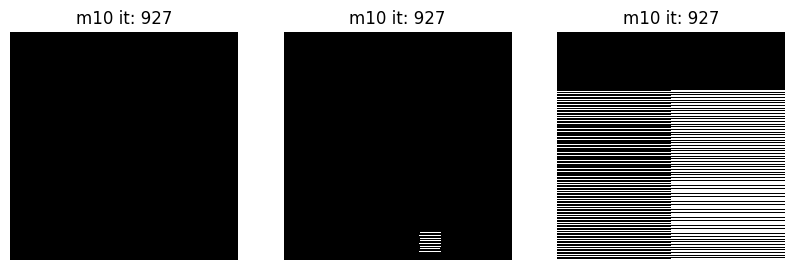

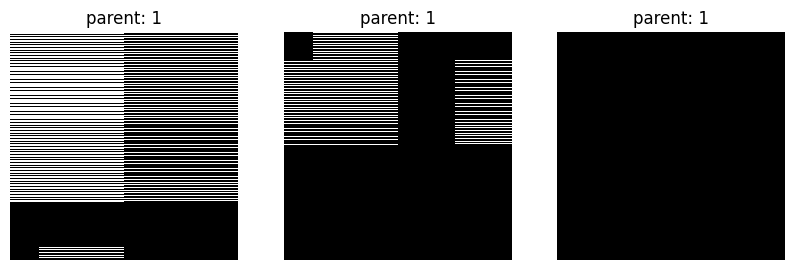

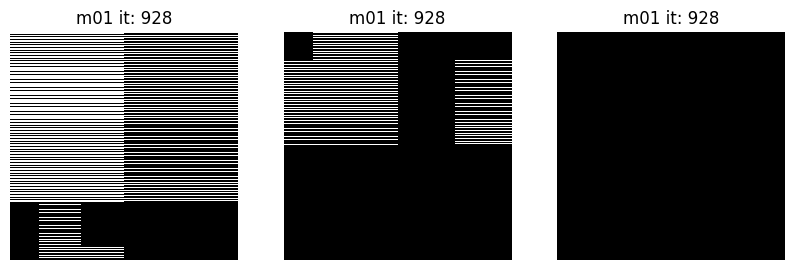

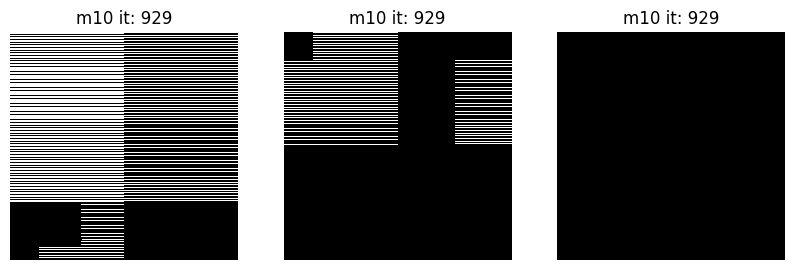

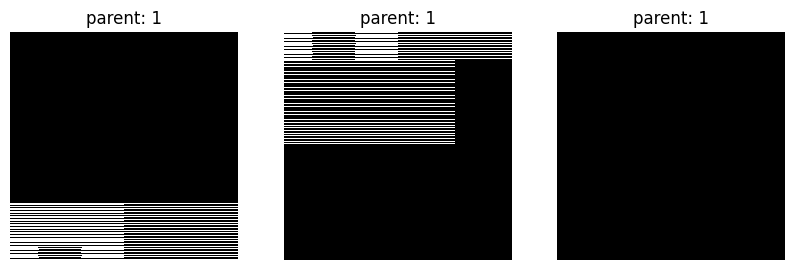

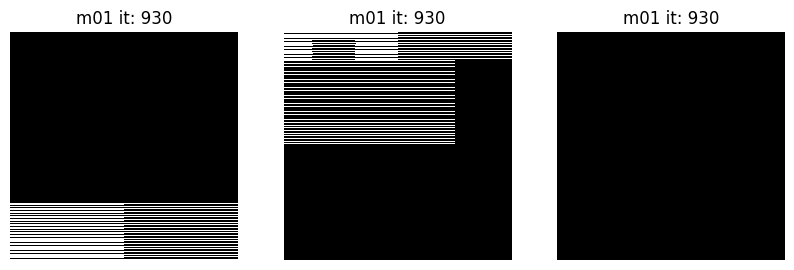

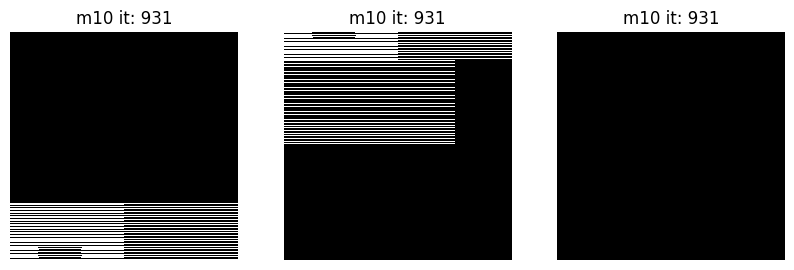

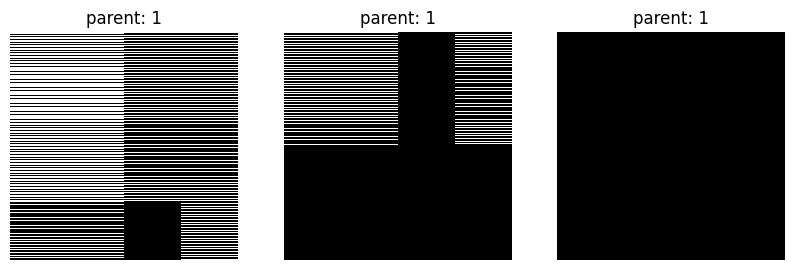

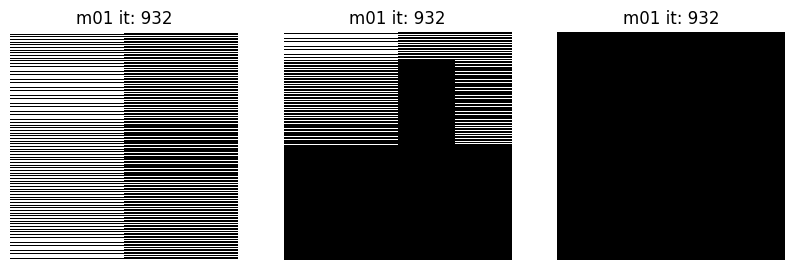

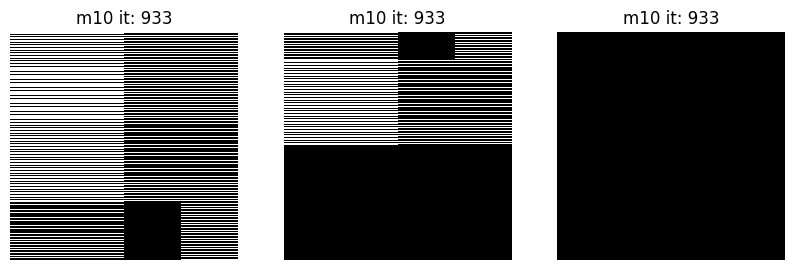

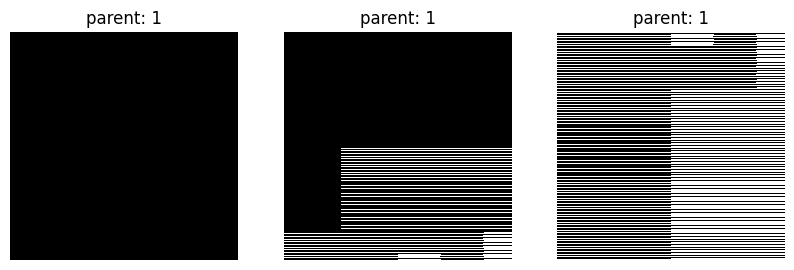

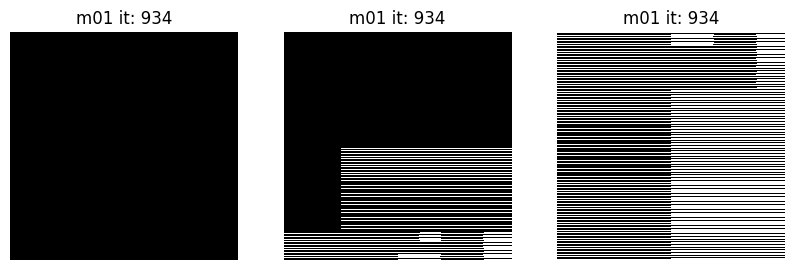

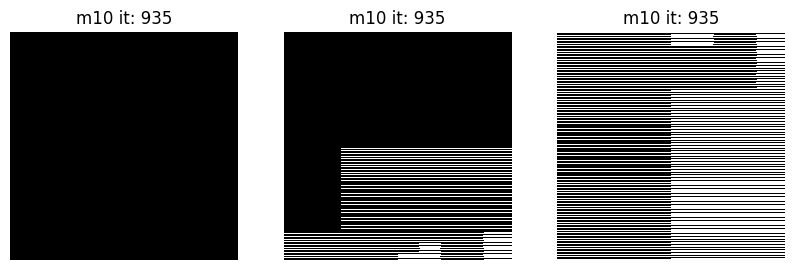

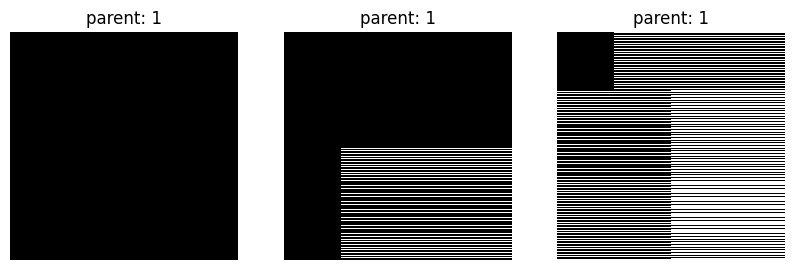

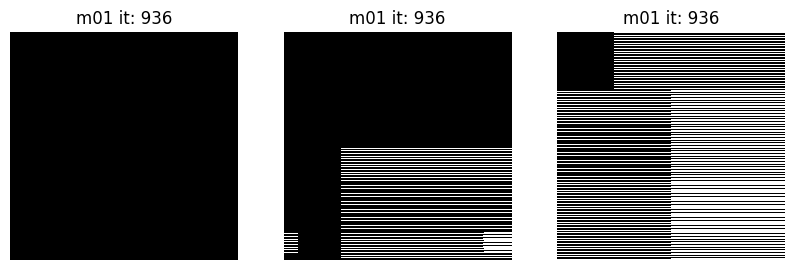

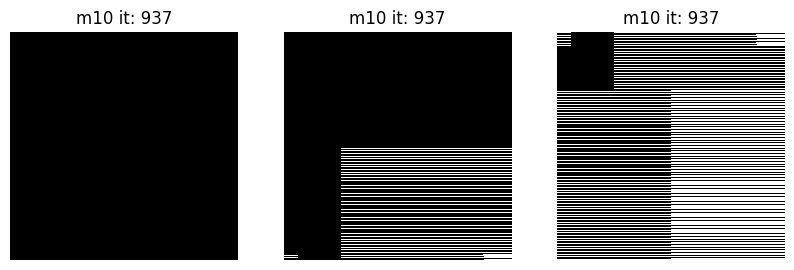

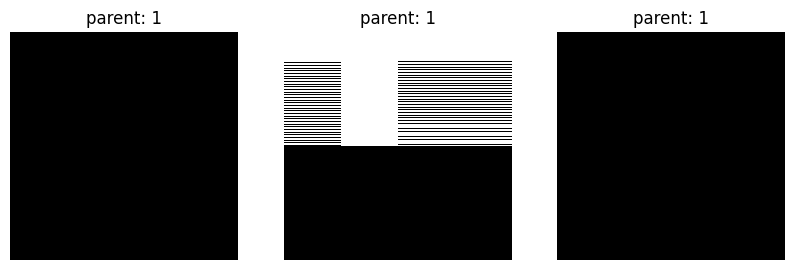

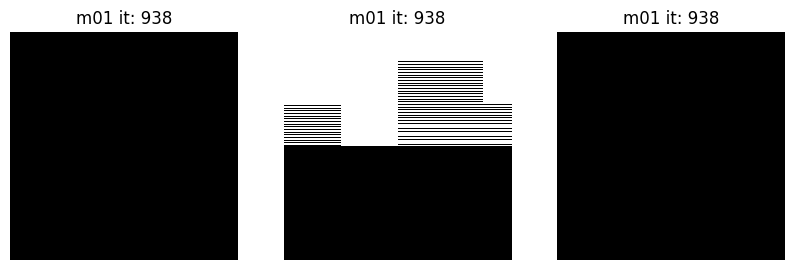

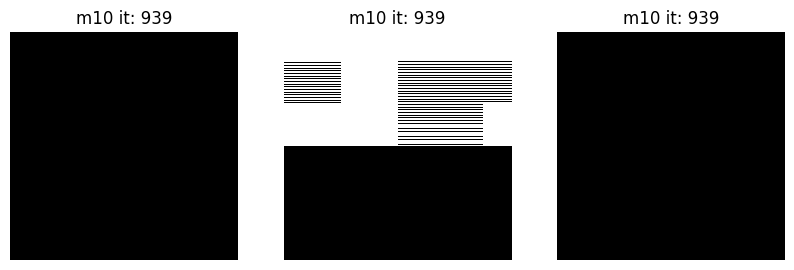

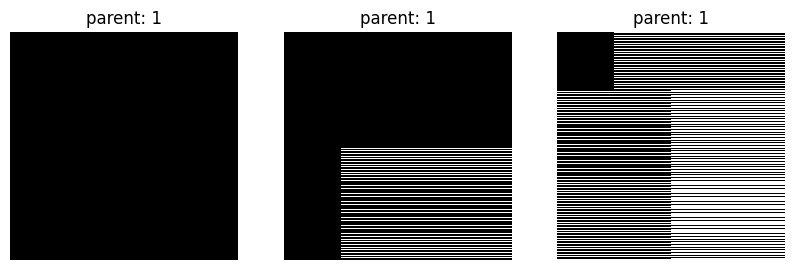

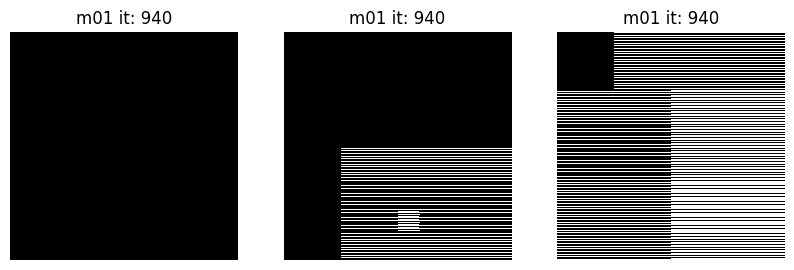

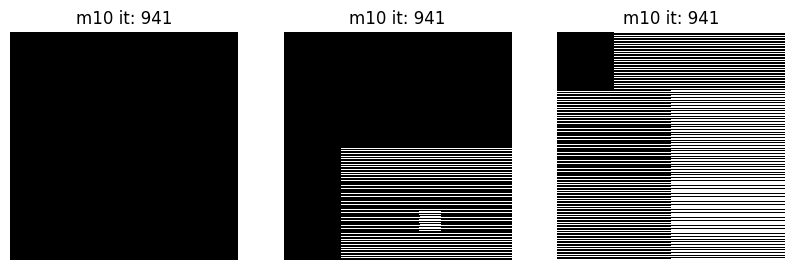

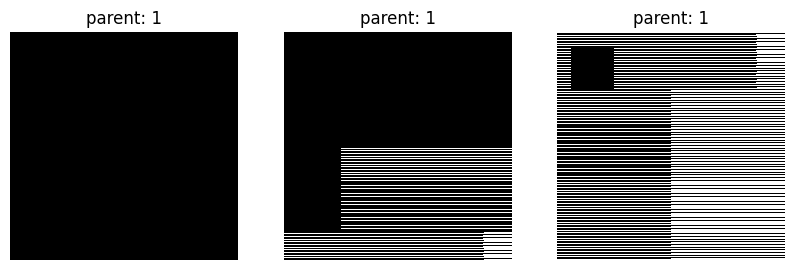

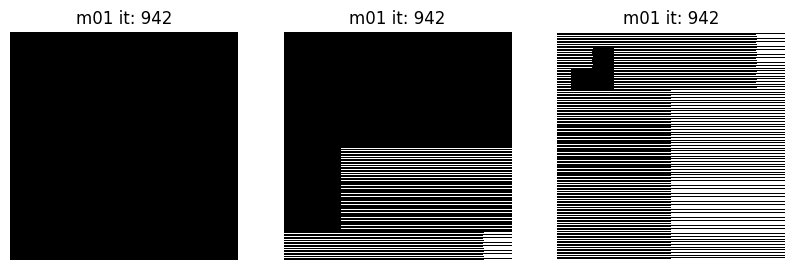

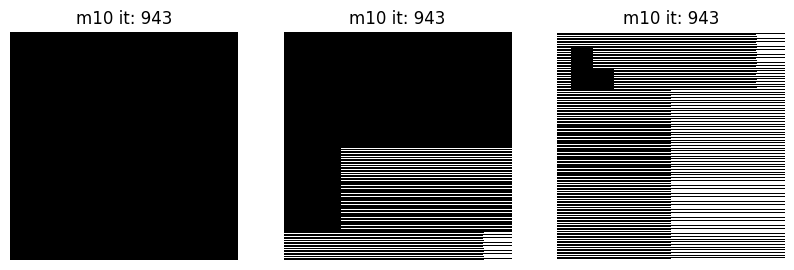

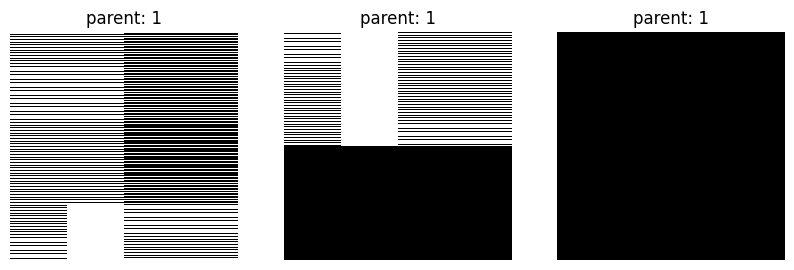

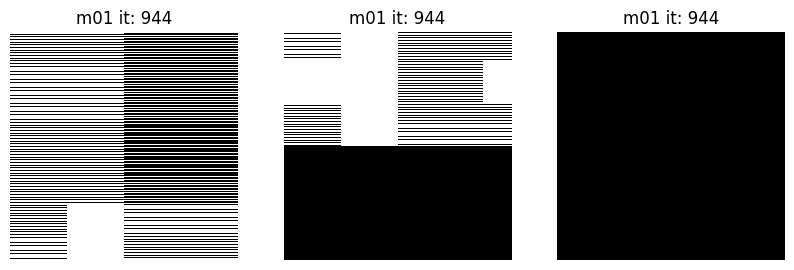

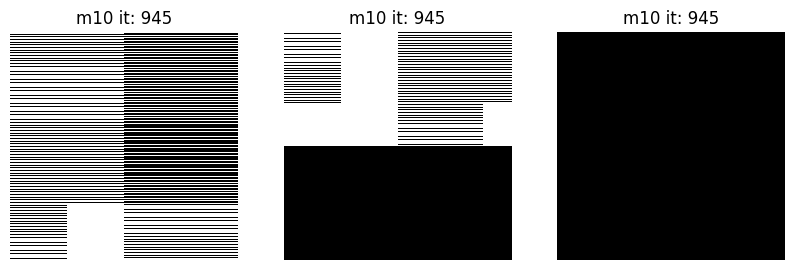

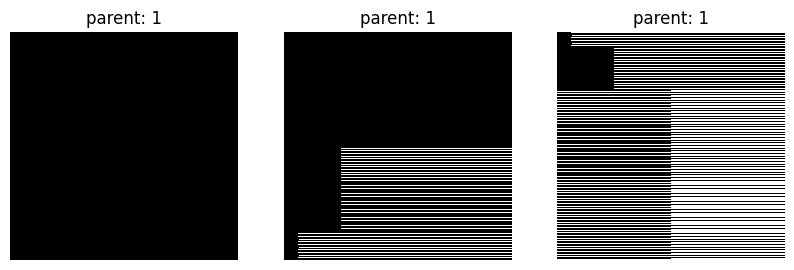

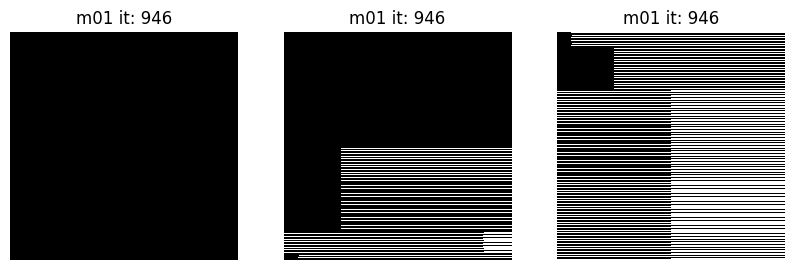

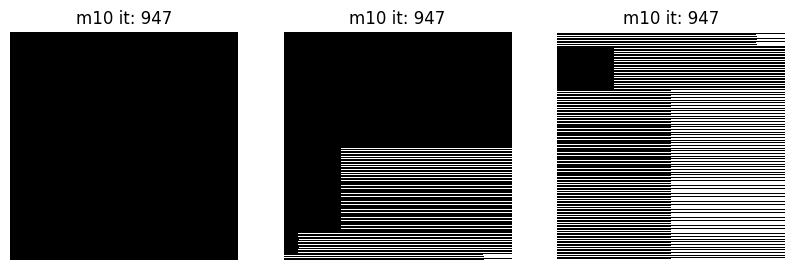

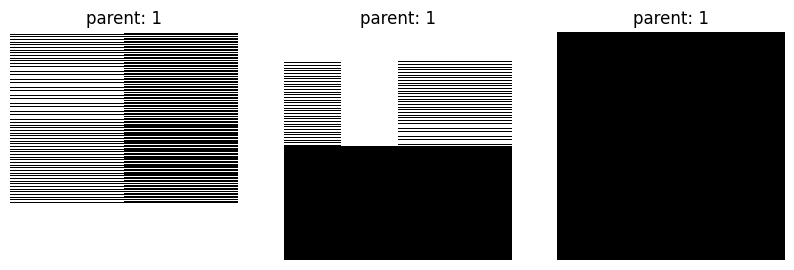

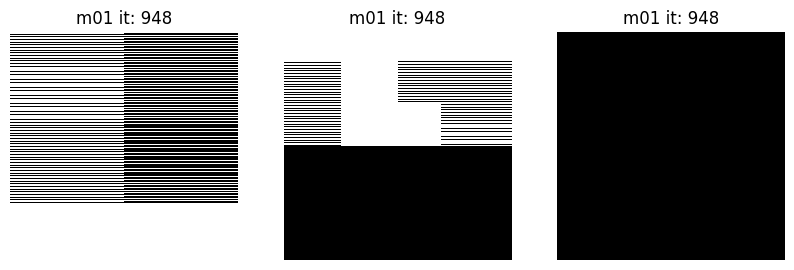

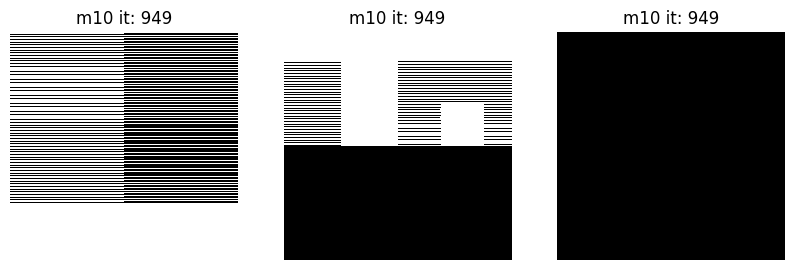

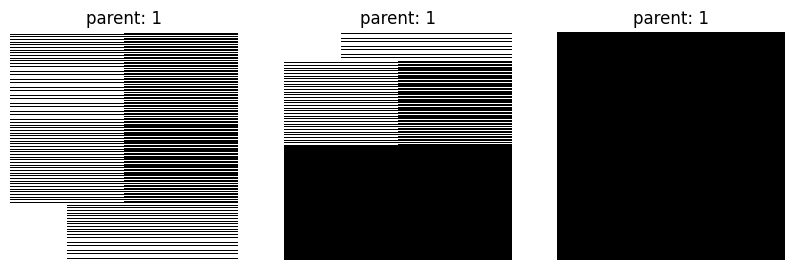

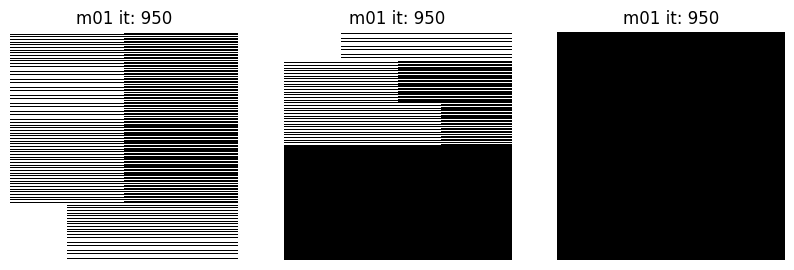

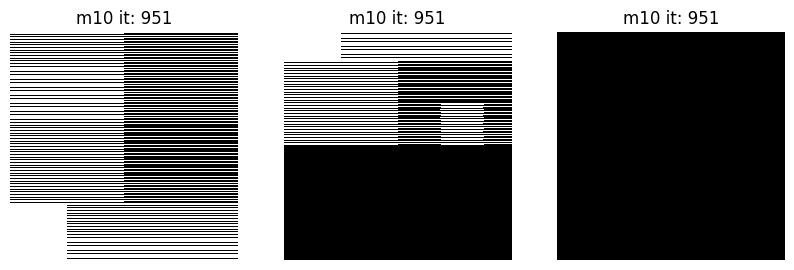

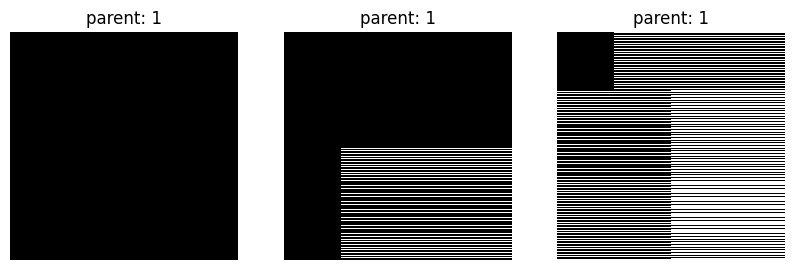

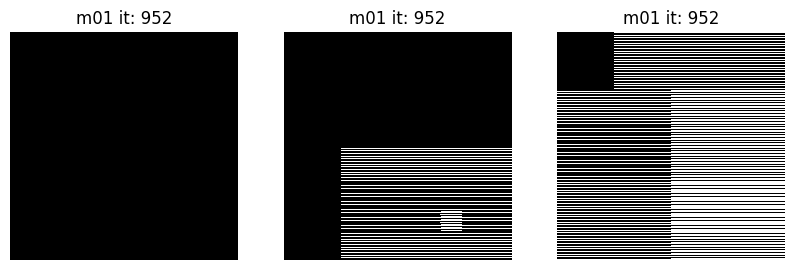

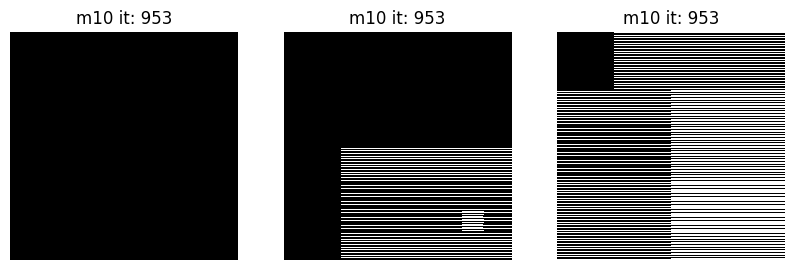

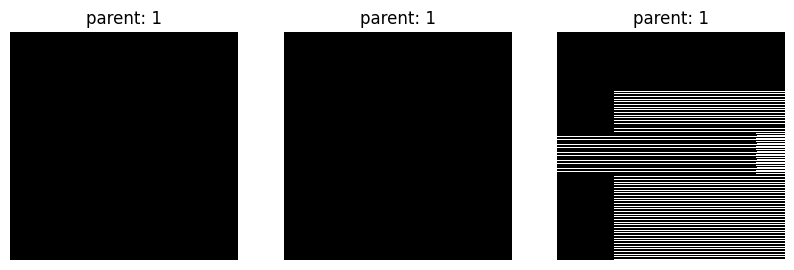

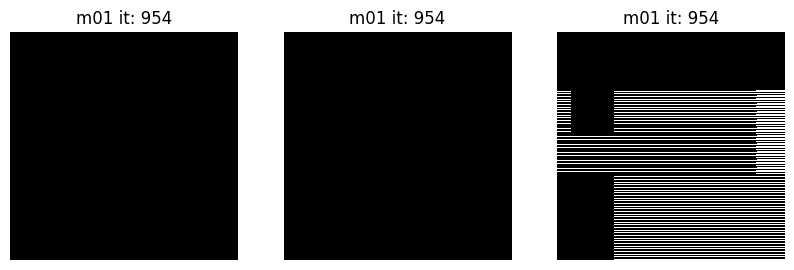

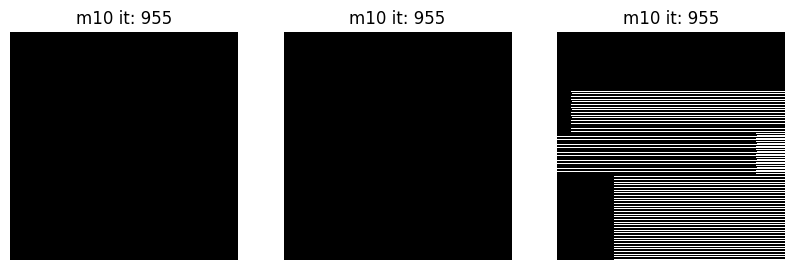

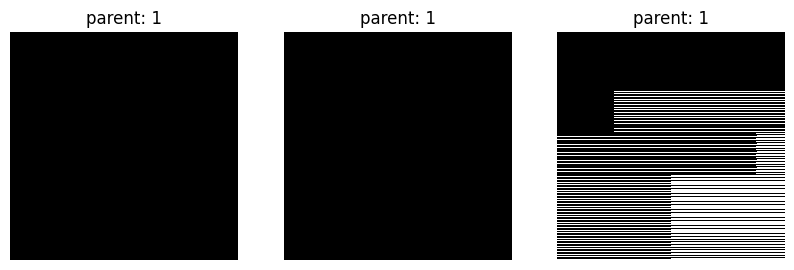

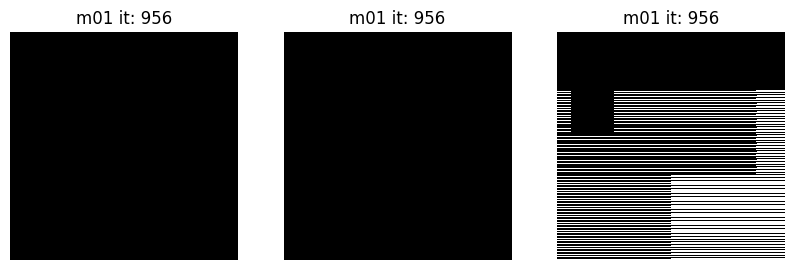

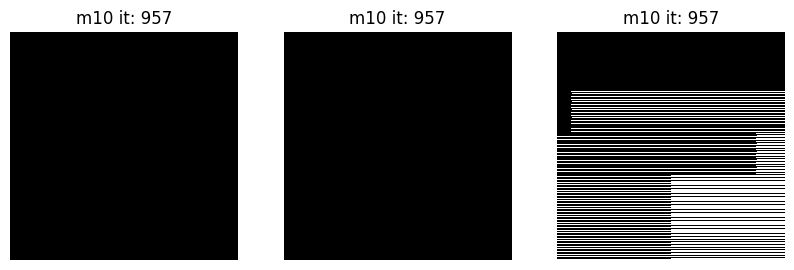

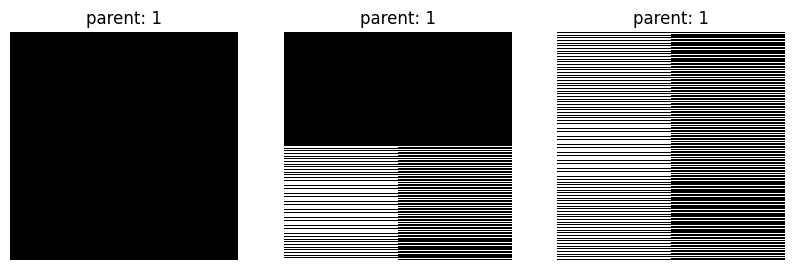

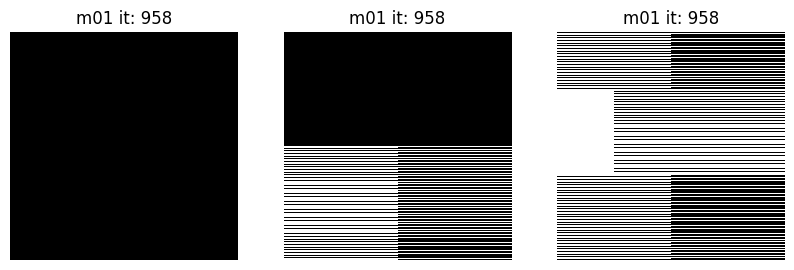

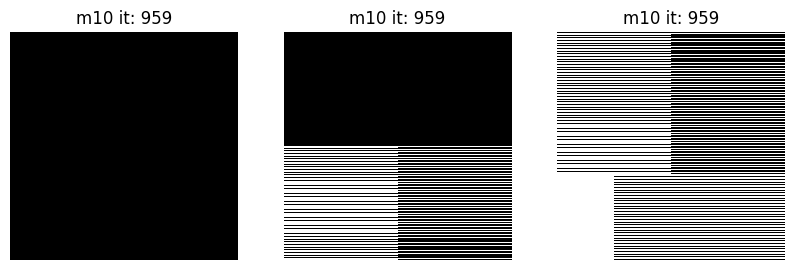

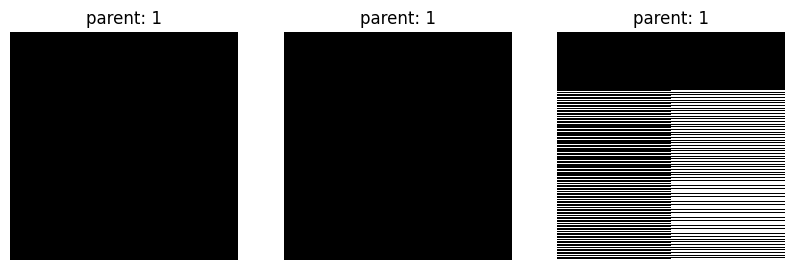

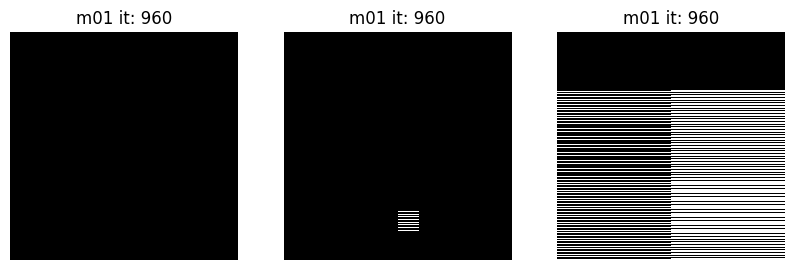

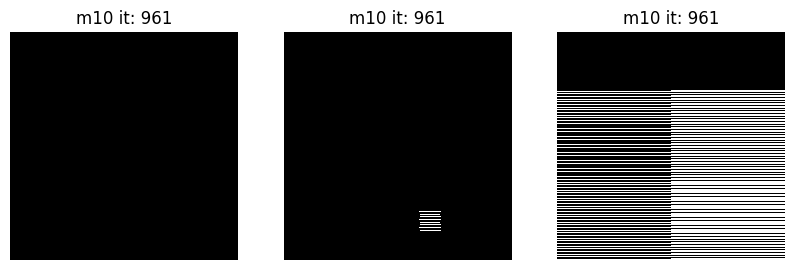

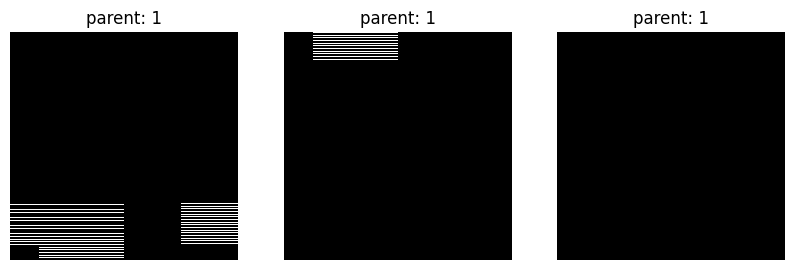

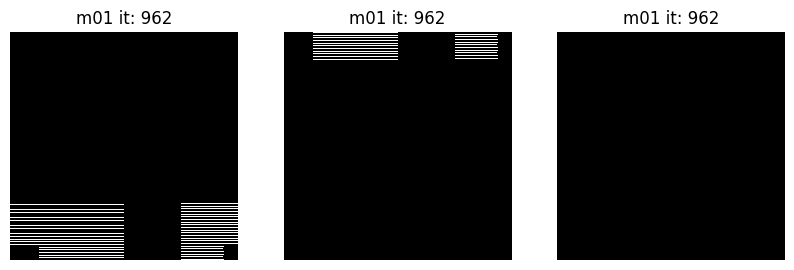

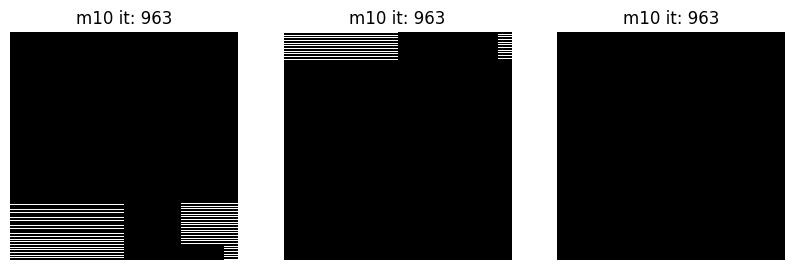

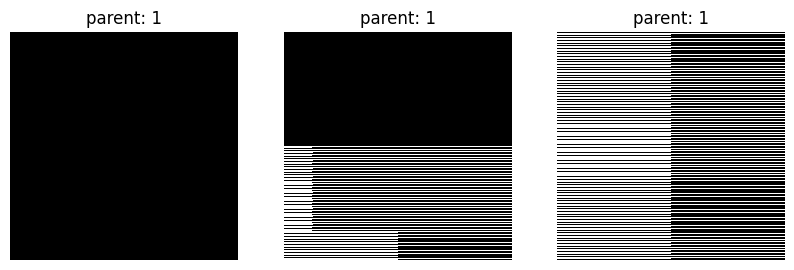

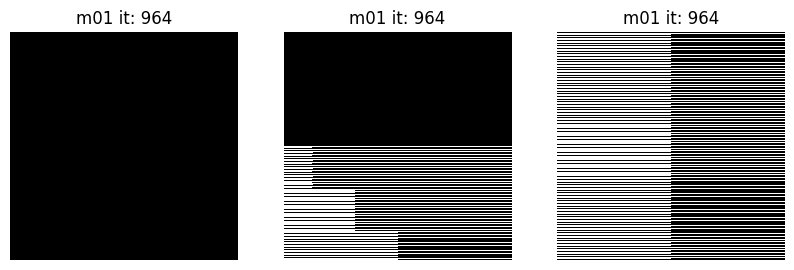

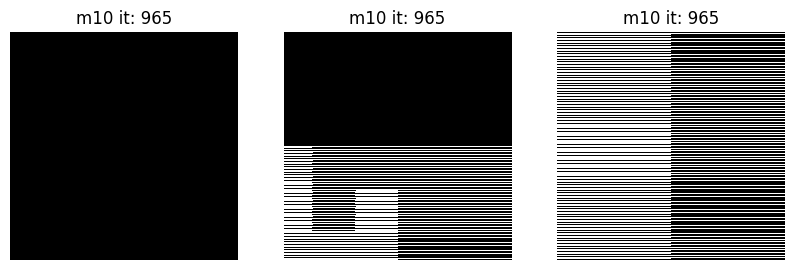

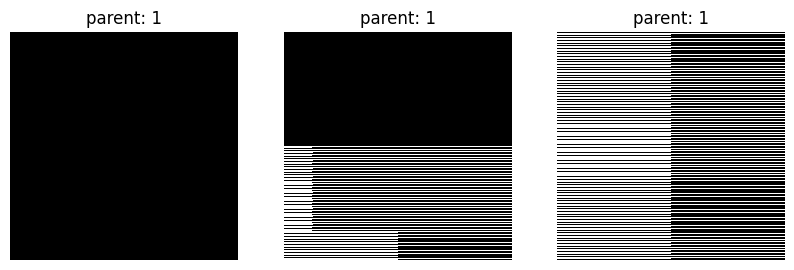

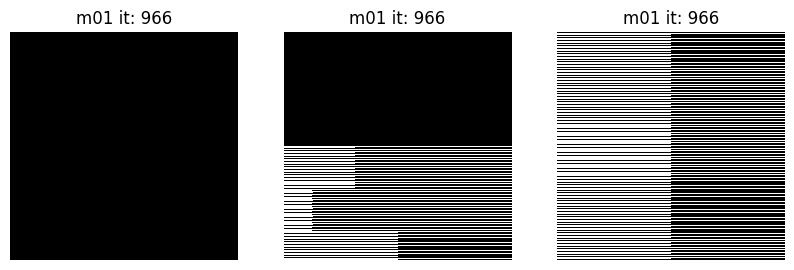

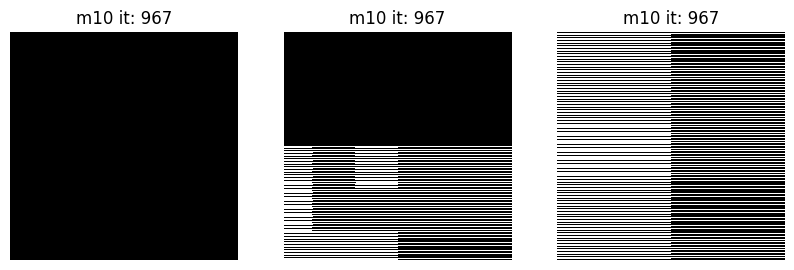

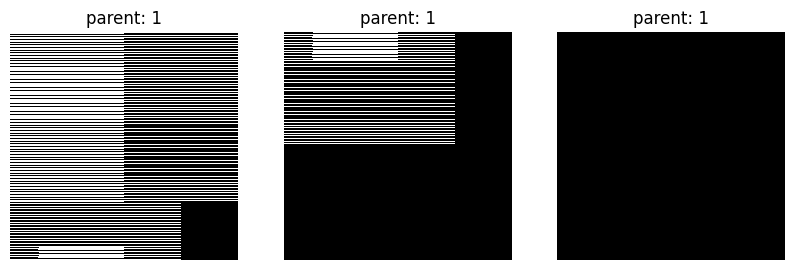

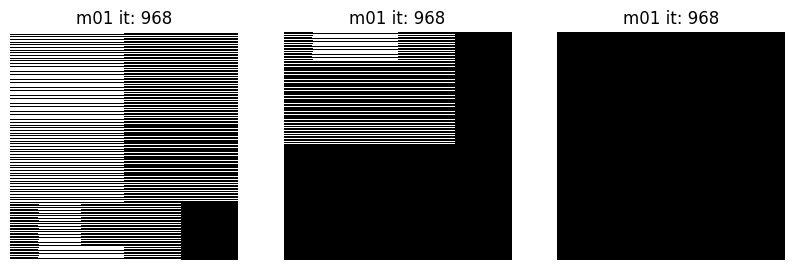

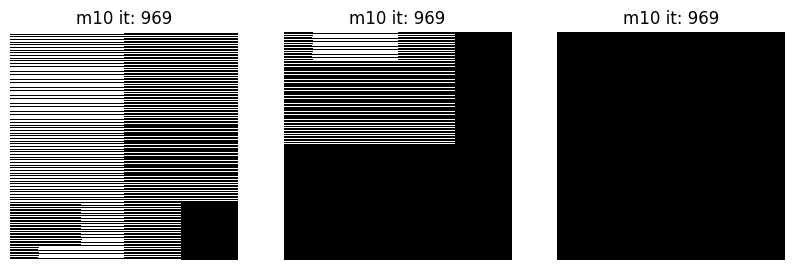

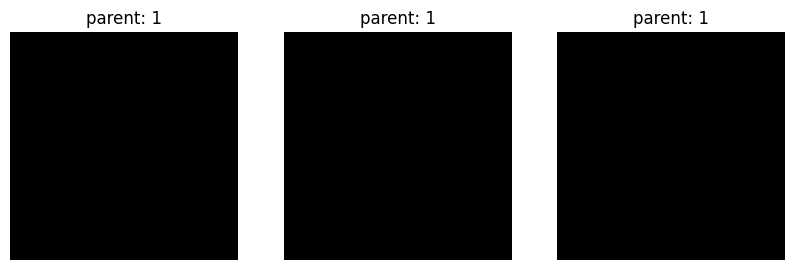

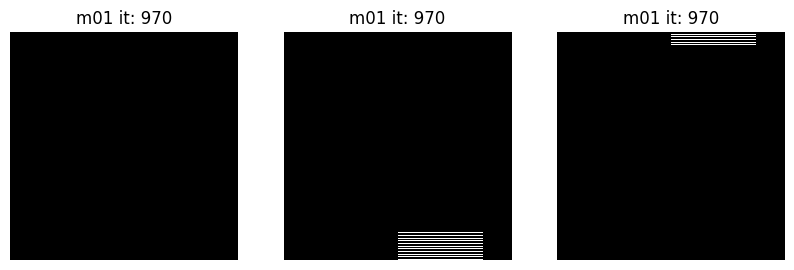

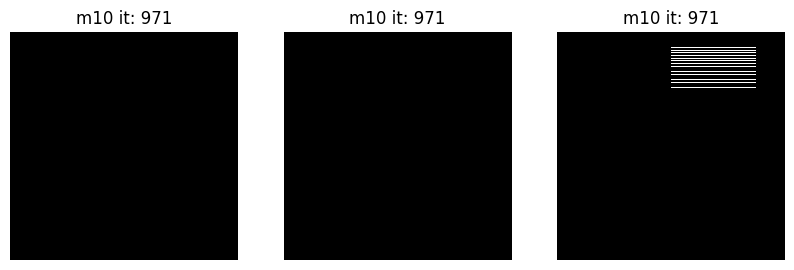

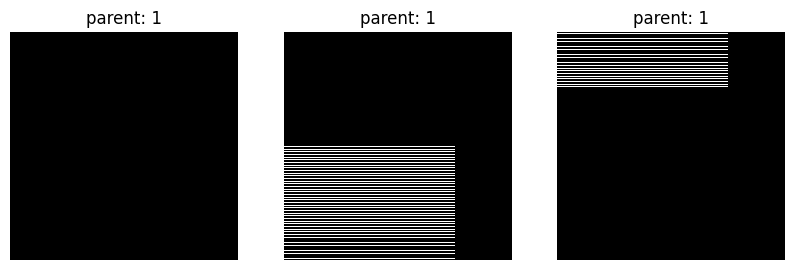

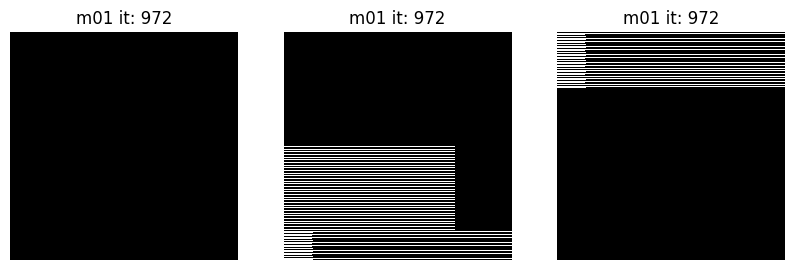

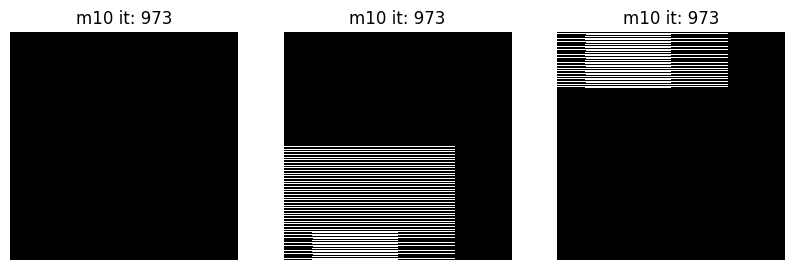

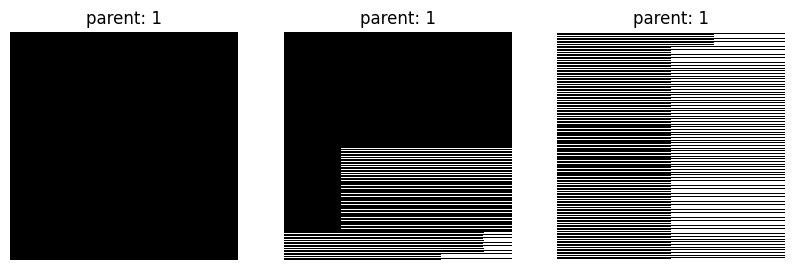

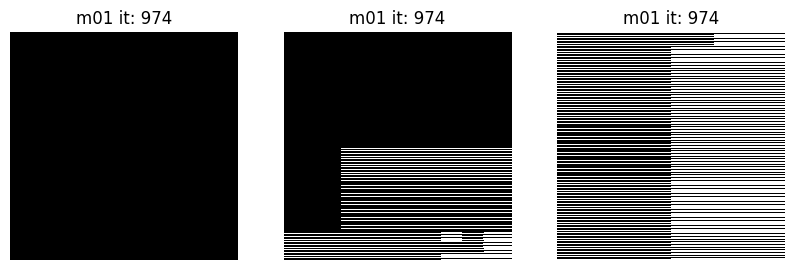

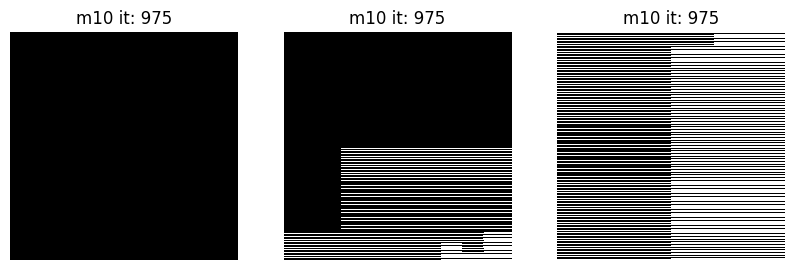

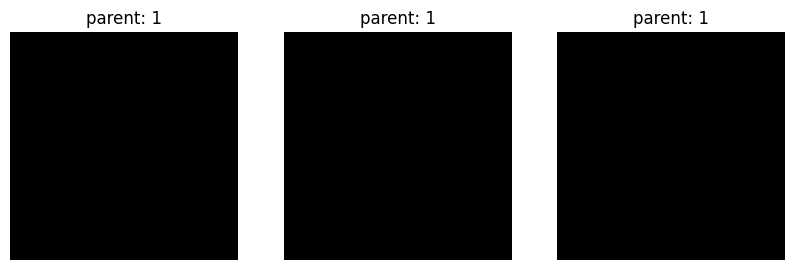

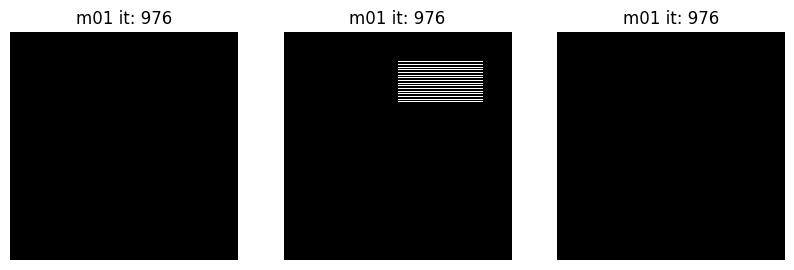

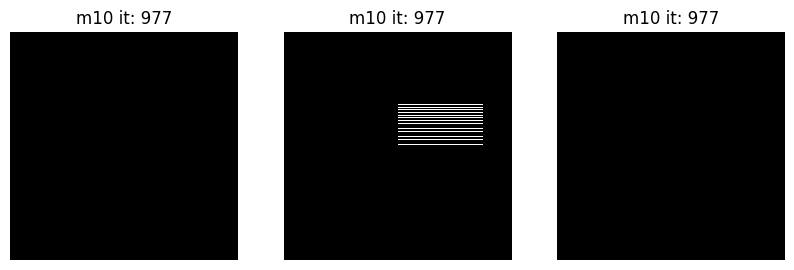

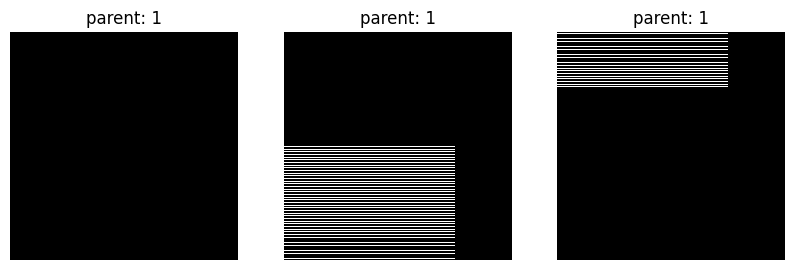

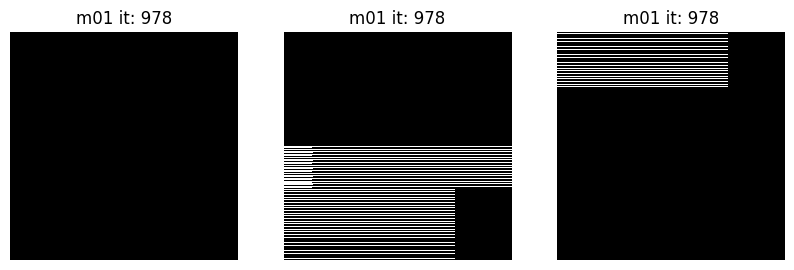

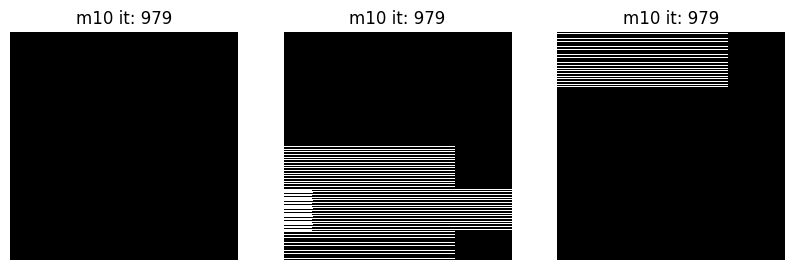

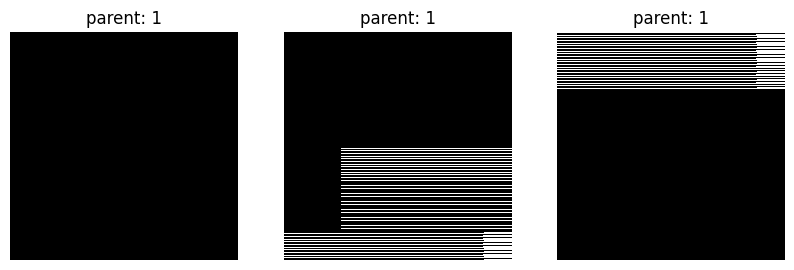

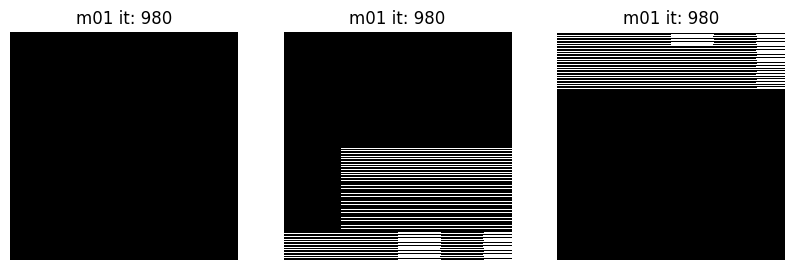

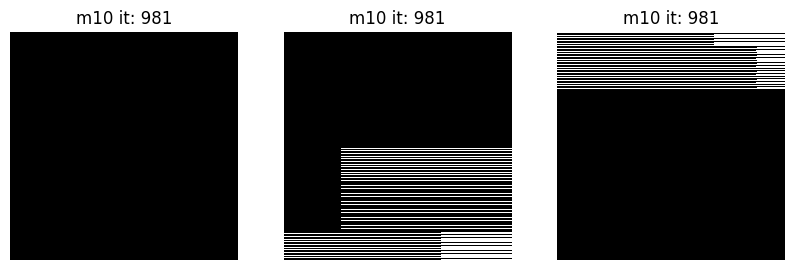

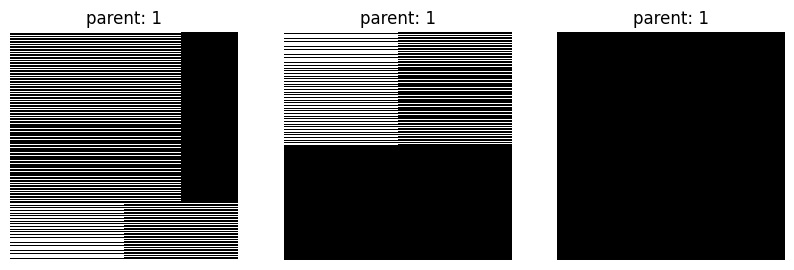

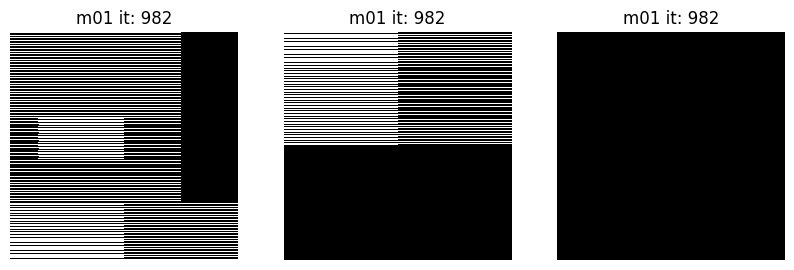

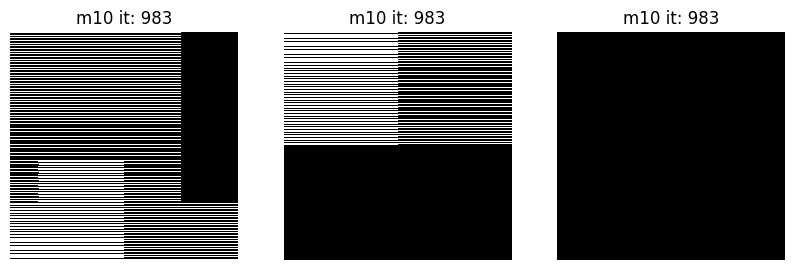

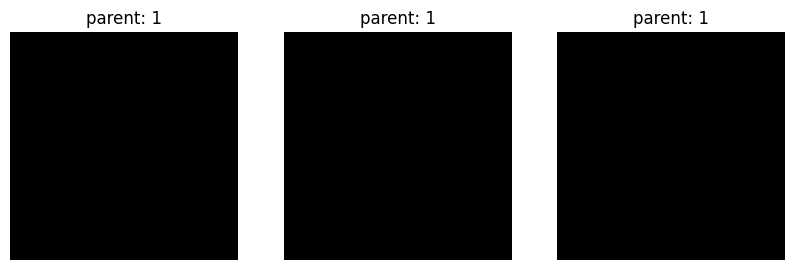

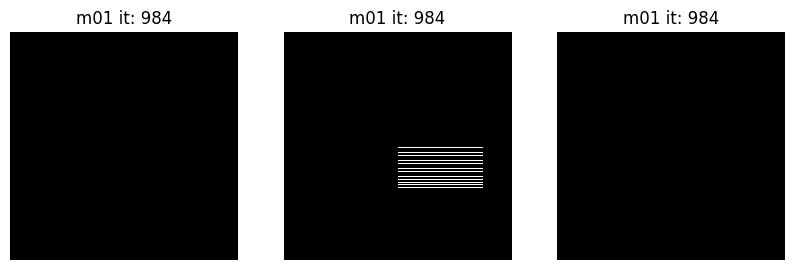

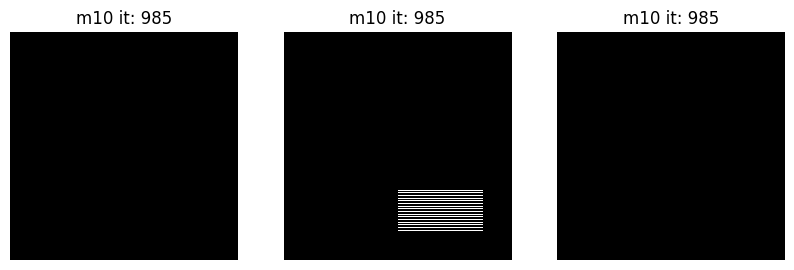

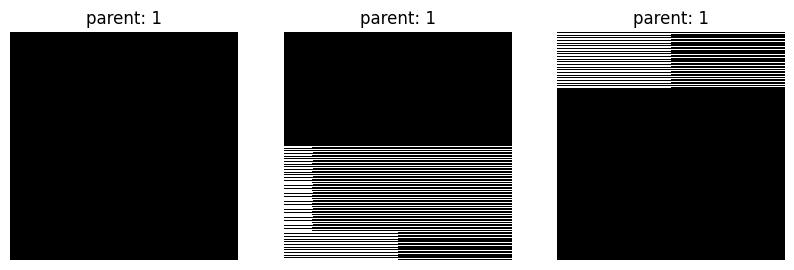

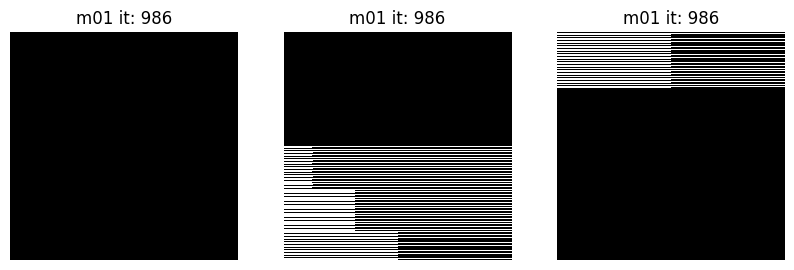

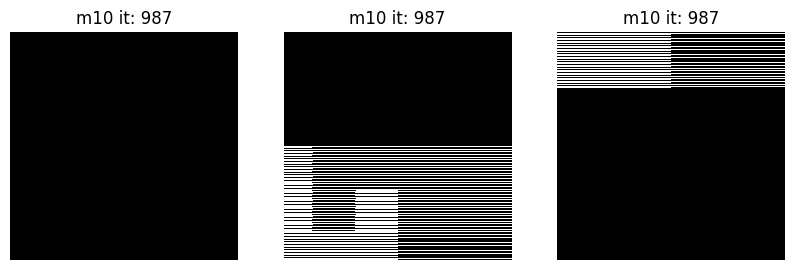

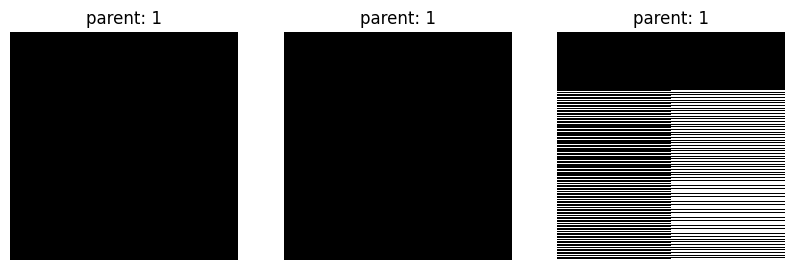

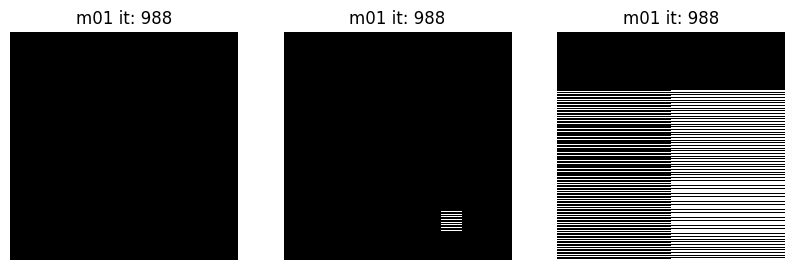

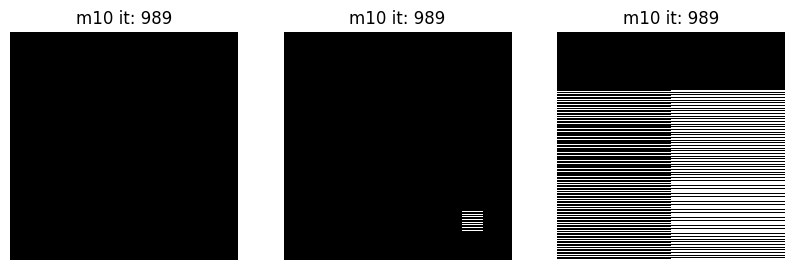

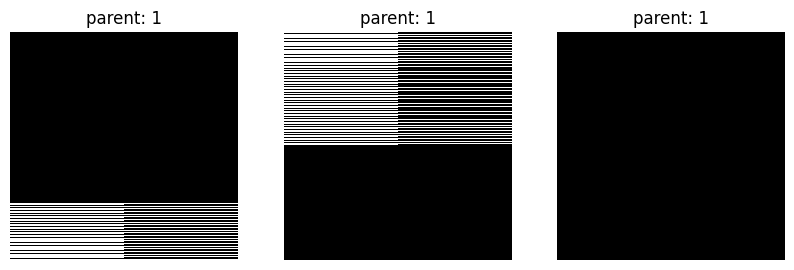

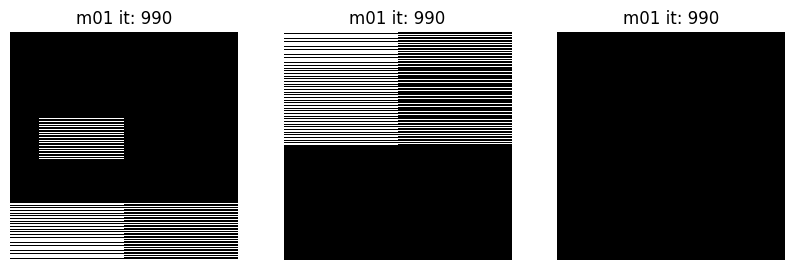

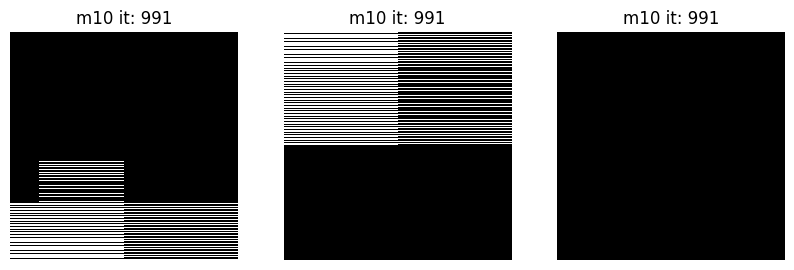

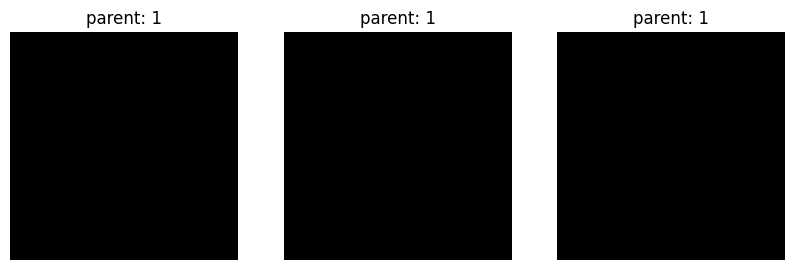

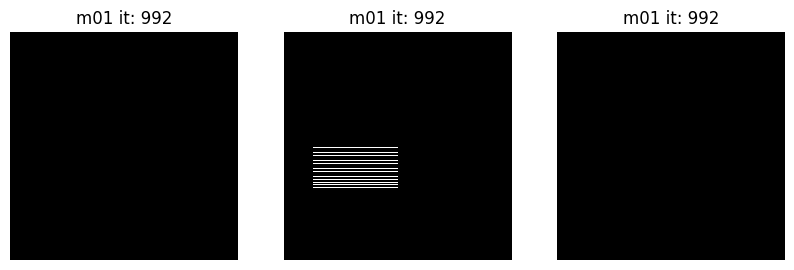

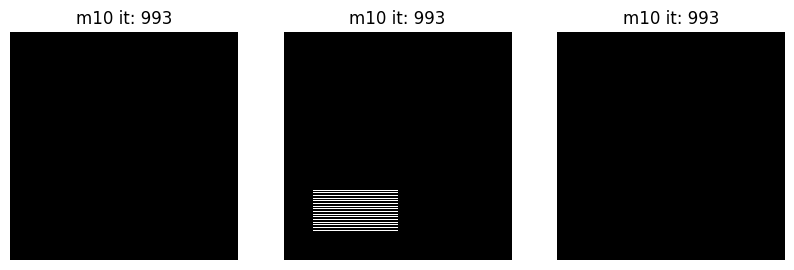

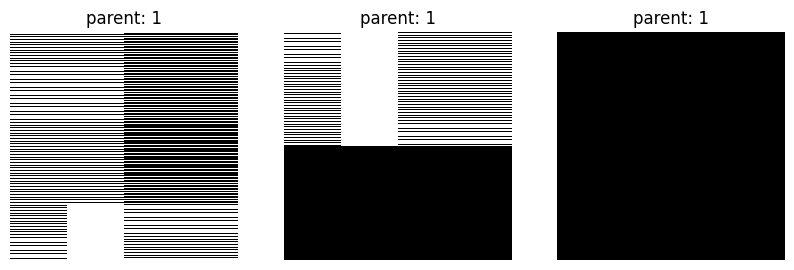

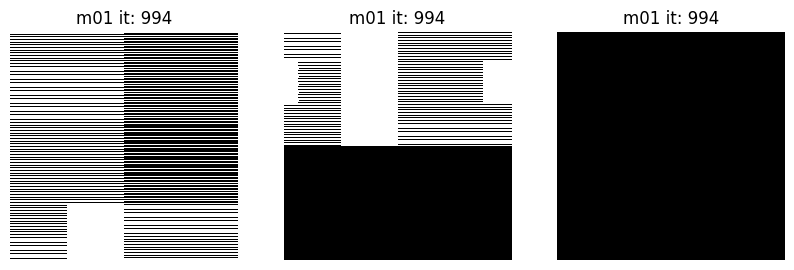

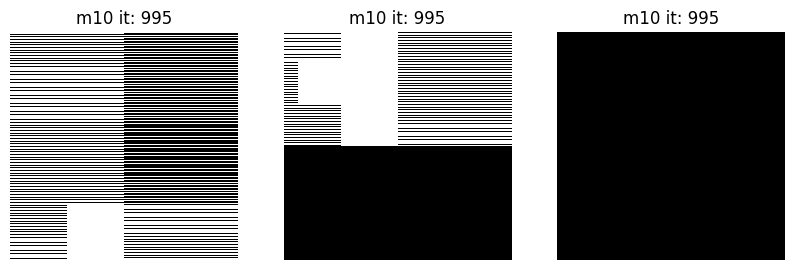

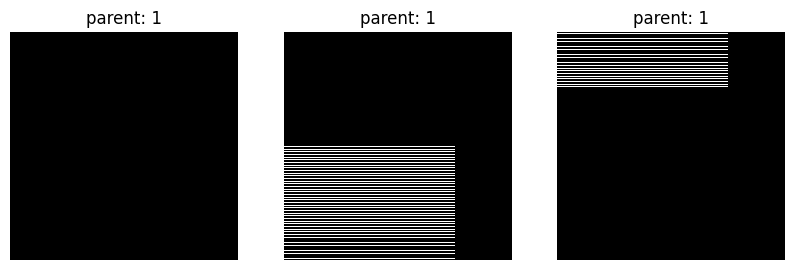

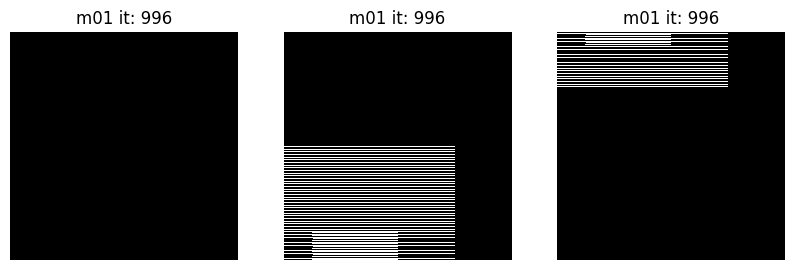

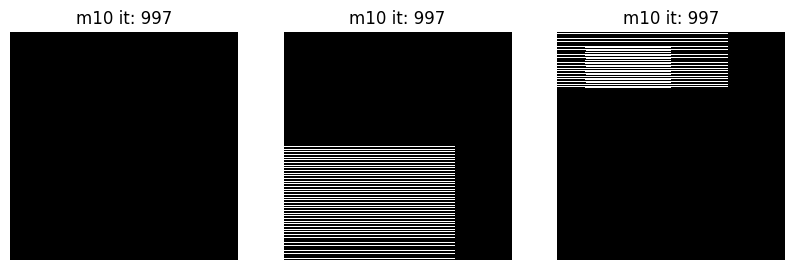

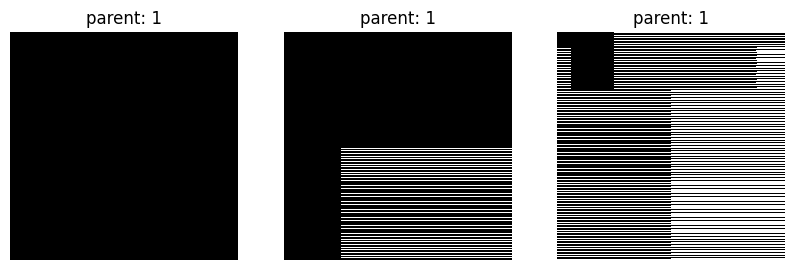

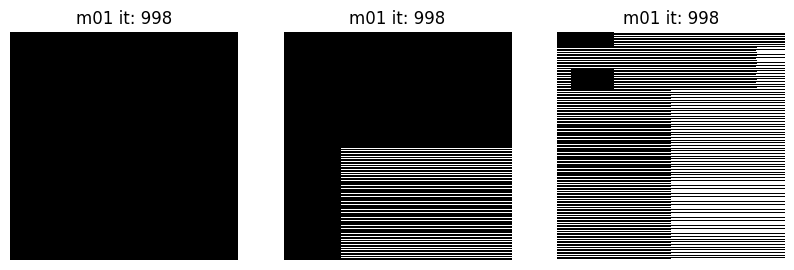

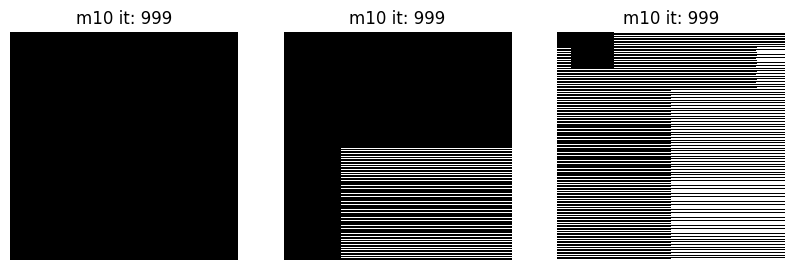

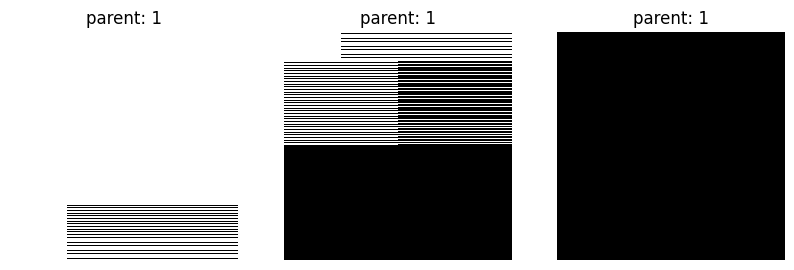

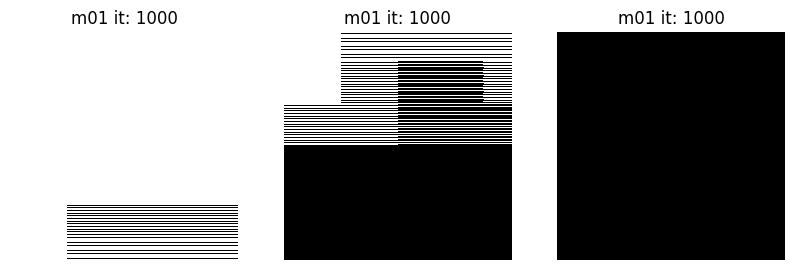

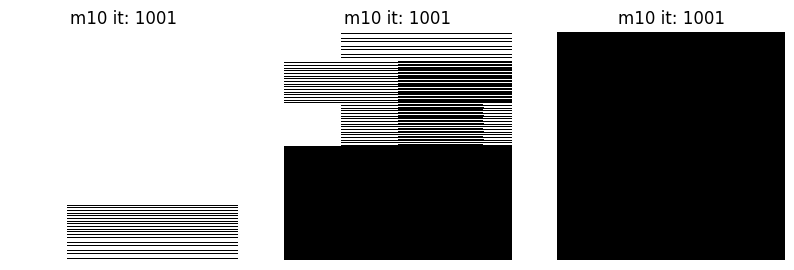

In [11]:
shap_values = {}
for mask in masks:
    shap_values_array= []
    masker = shap.maskers.Image(mask, shape=img_array[0].shape) 
    explainer=_explainer.Explainer(model, masker, output_names=classes, seed = 42)
    for img in img_array:
        shap_values_array.append(explainer(np.expand_dims(img, axis = 0), max_evals = 1001, batch_size = 50, outputs=shap.Explanation.argsort.flip[:1]))
    shap_values[mask] = shap_values_array

blur(64,64)


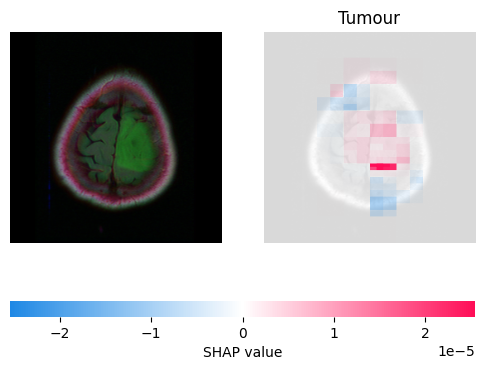

In [13]:
for mask in masks:
    print(mask)
    for shap_value in shap_values[mask]:
        shap.image_plot(shap_value)

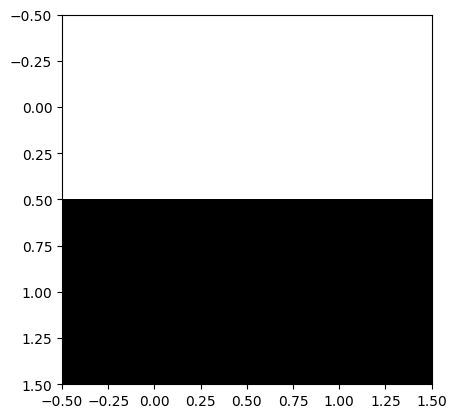

In [9]:
xd = [True,True,False,False]
xd2 = np.array(xd).reshape(2,2)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['black', 'white'])

plt.imshow(xd2, cmap=custom_cmap)